<a href="https://colab.research.google.com/github/woojoo123/Project/blob/main/Lung_lesion_detection/EDA_%2B_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,973 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 124926 files and dire

# EDA

## train.csv 파일 로드

In [ ]:
import pandas as pd

train_df = pd.read_csv('/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/vinbigdata/train.csv')
train_df.head()

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,width,height
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN,2332,2580
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN,2954,3159
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0,2080,2336
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0,2304,2880
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN,2540,3072


In [ ]:
# 클래스별 개수 확인
class_counts = train_df["class_name"].value_counts()
print(class_counts)

class_name
No finding            31818
Aortic enlargement     7162
Cardiomegaly           5427
Pleural thickening     4842
Pulmonary fibrosis     4655
Nodule/Mass            2580
Lung Opacity           2483
Pleural effusion       2476
Other lesion           2203
Infiltration           1247
ILD                    1000
Calcification           960
Consolidation           556
Atelectasis             279
Pneumothorax            226
Name: count, dtype: int64


## 폐와 관련 없는 질환제거

In [ ]:
# 제거할 클래스 리스트
remove_classes = ["Aortic enlargement", "Calcification", "Cardiomegaly"]

# 필터링된 데이터셋 만들기
filtered_train_df = train_df[~train_df["class_name"].isin(remove_classes)].copy()

# 결과 확인
print(filtered_train_df["class_name"].value_counts())
print(f"필터링 후 데이터 개수: {filtered_train_df.shape[0]}")

class_name
No finding            31818
Pleural thickening     4842
Pulmonary fibrosis     4655
Nodule/Mass            2580
Lung Opacity           2483
Pleural effusion       2476
Other lesion           2203
Infiltration           1247
ILD                    1000
Consolidation           556
Atelectasis             279
Pneumothorax            226
Name: count, dtype: int64
필터링 후 데이터 개수: 54365


## 정상/비정상 비율 확인

In [ ]:
# 정상 vs 비정상 데이터 개수 확인
normal_count = filtered_train_df[filtered_train_df["class_name"] == "No finding"].shape[0]
abnormal_count = filtered_train_df[filtered_train_df["class_name"] != "No finding"].shape[0]

print(f"정상 데이터 개수: {normal_count}")
print(f"비정상 데이터 개수: {abnormal_count}")

정상 데이터 개수: 31818
비정상 데이터 개수: 22547


## 클래스별 데이터 개수 시각화

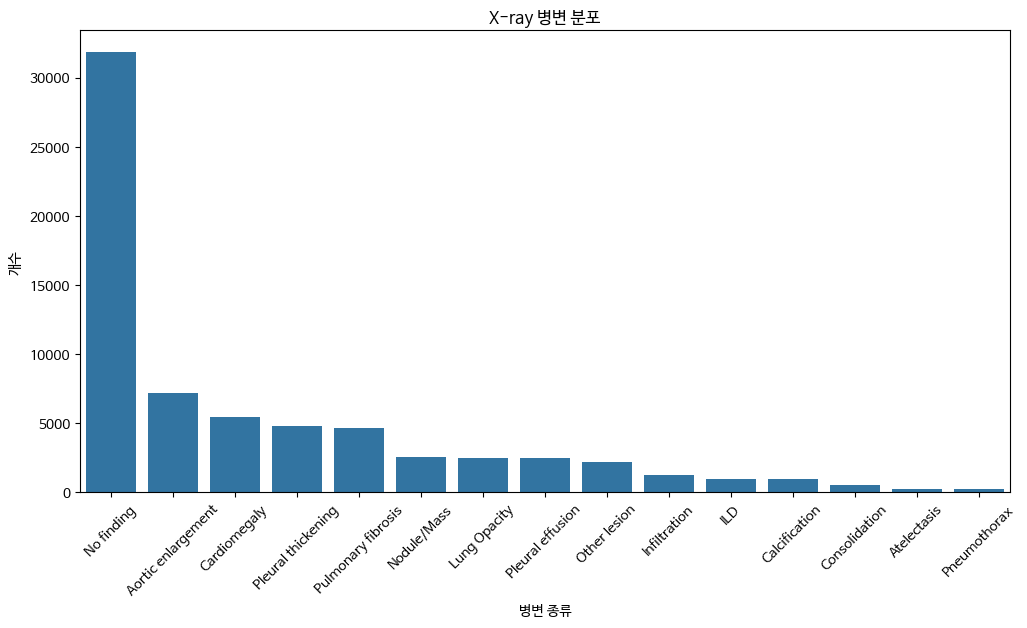

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

# 클래스별 데이터 개수 확인
class_counts = train_df["class_name"].value_counts()

# 시각화
plt.figure(figsize=(12,6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xticks(rotation=45)
plt.xlabel("병변 종류")
plt.ylabel("개수")
plt.title("X-ray 병변 분포")
plt.show()

## 바운딩 박스 시각적으로 확인

In [ ]:
import cv2
import matplotlib.pyplot as plt

# 이미지 파일 선택 (여기서는 첫 번째 비정상 이미지 선택)
sample_image_id = train_df[train_df["class_name"] != "No finding"]["image_id"].iloc[2]
sample_image_path = f"/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/vinbigdata/train/{sample_image_id}.png"

# 이미지 로드
image = cv2.imread(sample_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 바운딩 박스 정보 가져오기
bbox_info = train_df[train_df["image_id"] == sample_image_id]

# 바운딩 박스 그리기
for _, row in bbox_info.iterrows():
    if pd.notna(row["x_min"]):
        x_min, y_min, x_max, y_max = int(row["x_min"]), int(row["y_min"]), int(row["x_max"]), int(row["y_max"])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)

# 시각화
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis("off")
plt.title(f"X-ray with Bounding Boxes ({sample_image_id})")
plt.show()

NameError: name 'train_df' is not defined

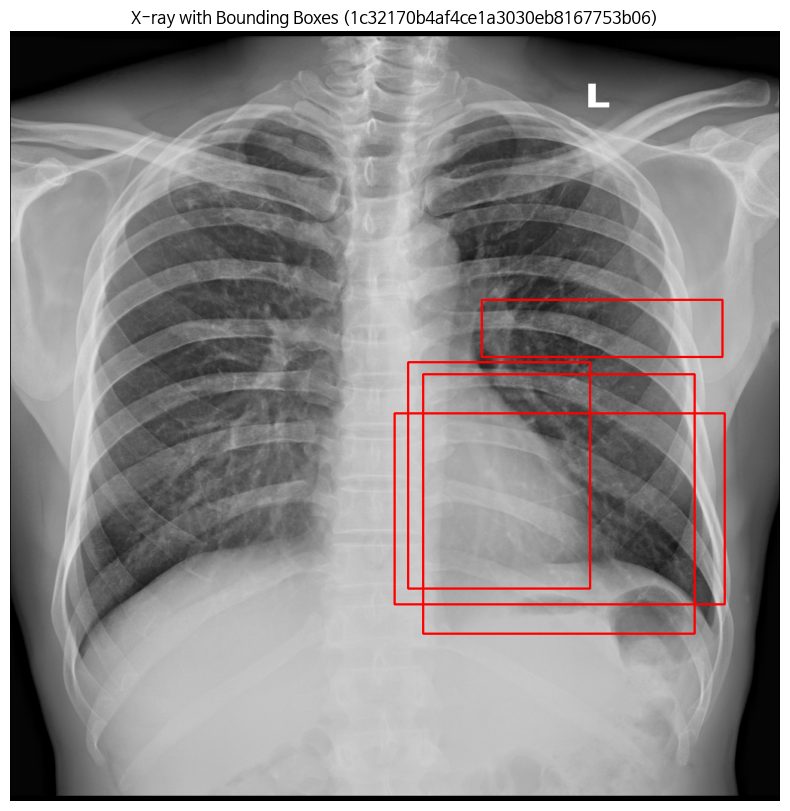

In [ ]:
import cv2
import matplotlib.pyplot as plt

# 이미지 파일 선택 (여기서는 첫 번째 비정상 이미지 선택)
sample_image_id = train_df[train_df["class_name"] != "No finding"]["image_id"].iloc[2]
sample_image_path = f"/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/vinbigdata/train/{sample_image_id}.png"

# 이미지 로드
image = cv2.imread(sample_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 바운딩 박스 정보 가져오기
bbox_info = train_df[train_df["image_id"] == sample_image_id]

# 바운딩 박스 그리기
for _, row in bbox_info.iterrows():
    if pd.notna(row["x_min"]):
        x_min, y_min, x_max, y_max = int(row["x_min"]), int(row["y_min"]), int(row["x_max"]), int(row["y_max"])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)

# 시각화
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis("off")
plt.title(f"X-ray with Bounding Boxes ({sample_image_id})")
plt.show()

# Preprocessing

## 바운딩 박스 좌표 정규화
- 바운딩 박스 좌표를 [0, 1] 범위로 변환해야 YOLO 등의 모델에서 사용 가능!

In [ ]:
import cv2
import os

# 데이터셋 폴더 경로
dataset_path = "/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/vinbigdata/train"

# 임의의 이미지 하나 불러와서 크기 확인
sample_image_path = os.path.join(dataset_path, os.listdir(dataset_path)[3])
image = cv2.imread(sample_image_path)

# 이미지 크기 출력
print(f"샘플 이미지 크기: {image.shape[:2]} (높이, 너비)")

샘플 이미지 크기: (1024, 1024) (높이, 너비)


In [ ]:
# 바운딩 박스 좌표 정규화 함수
def normalize_bbox(row):
    row["x_min"] /= row["width"]
    row["y_min"] /= row["height"]
    row["x_max"] /= row["width"]
    row["y_max"] /= row["height"]
    return row

# 데이터프레임에 정규화 적용
filtered_train_df = filtered_train_df.apply(normalize_bbox, axis=1)

# 변환 결과 확인
print(filtered_train_df.head())

                           image_id          class_name  class_id rad_id  \
0  50a418190bc3fb1ef1633bf9678929b3          No finding        14    R11   
1  21a10246a5ec7af151081d0cd6d65dc9          No finding        14     R7   
4  063319de25ce7edb9b1c6b8881290140          No finding        14    R10   
5  1c32170b4af4ce1a3030eb8167753b06  Pleural thickening        11     R9   
6  0c7a38f293d5f5e4846aa4ca6db4daf1                 ILD         5    R17   

      x_min     y_min     x_max     y_max  width  height  
0       NaN       NaN       NaN       NaN   2332    2580  
1       NaN       NaN       NaN       NaN   2954    3159  
4       NaN       NaN       NaN       NaN   2540    3072  
5  0.246850  0.116211  0.372835  0.140951   2540    3072  
6  0.589497  0.095890  0.957549  0.848924   2285    2555  


In [ ]:
filtered_train_df.to_csv('/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/filtered_train_df.csv')

In [ ]:
# rm -rf "/content/train_augmented"

In [ ]:
import os

# 이미지 폴더 경로
image_folder = "/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/vinbigdata/train"

# 파일 개수 확인
if os.path.exists(image_folder):
    image_files = os.listdir(image_folder)
    print(f"✅ 이미지 폴더 내 파일 개수: {len(image_files)}")
    print("📂 샘플 파일 5개:", image_files[:5])  # 일부 파일 출력
else:
    print(f"❌ 폴더가 존재하지 않음: {image_folder}")

✅ 이미지 폴더 내 파일 개수: 15000
📂 샘플 파일 5개: ['ede3e4041468a91f1a8027aeaa10e540.png', 'eda707d79298458f23f778b0c8229d73.png', 'ed9f5c40c389c115089e5a8f15e162b0.png', 'ee387adc8e34dcbb696539dcbb626a9d.png', 'ee3b2a3399a40af7703ce312d43df635.png']


## filtered 기준으로 이미지 다시 저장

In [ ]:
import os
import shutil
import pandas as pd
from multiprocessing import Pool

# 경로 설정
csv_path = "/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/filtered_train_df.csv"
original_images_path = "/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/vinbigdata/train"

# Colab 로컬 저장소 (/content/)에 먼저 저장 (Google Drive보다 빠름)
temp_filtered_images_path = "/content/filtered_images"
os.makedirs(temp_filtered_images_path, exist_ok=True)

# 최종 Google Drive 저장 경로
filtered_images_path = "/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/filtered_data/filtered_images"
os.makedirs(filtered_images_path, exist_ok=True)

# CSV 로드
filtered_df = pd.read_csv(csv_path)
image_list = filtered_df["image_id"].unique()

# 멀티 프로세싱을 활용한 병렬 복사 (속도 향상)
def copy_image(image_id):
    src_path = os.path.join(original_images_path, f"{image_id}.png")
    dest_path = os.path.join(temp_filtered_images_path, f"{image_id}.png")

    if os.path.exists(src_path):
        shutil.copy(src_path, dest_path)  # copy2 대신 copy 사용 (더 빠름)
        return True
    return False

# 병렬 복사 실행
with Pool(processes=4) as pool:  # CPU 4개 사용 (숫자 조정 가능)
    results = pool.map(copy_image, image_list)

# Colab에서 Google Drive로 한 번에 이동 (속도 향상)
shutil.copytree(temp_filtered_images_path, filtered_images_path, dirs_exist_ok=True)

print(f"✅ 총 {sum(results)}개의 이미지 복사 완료! ")

✅ 총 14018개의 이미지 복사 완료! 


In [ ]:
import os

filtered_images_path = "/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/filtered_data/filtered_images"

if os.path.exists(filtered_images_path):
    image_files = os.listdir(filtered_images_path)
    print(f"✅ `filtered_train_df.csv` 기준으로 저장된 이미지 개수: {len(image_files)}")
    print("📂 샘플 파일 5개:", image_files[:5])
else:
    print(f"❌ 폴더가 존재하지 않음: {filtered_images_path}")

✅ `filtered_train_df.csv` 기준으로 저장된 이미지 개수: 14018
📂 샘플 파일 5개: ['48e258ce61a71b27f93233e021024be8.png', '4cccd244506af875fc9d2a32ad2b4b96.png', '64f9b6387d002d481fb99ac6ad4da695.png', '133ed9054828b0e75987e00217aef89d.png', '17f57814aa95b2294e9fd97cc27c995e.png']


## 총 병변 개수

In [ ]:
pd.read_csv('/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/filtered_data/filtered_train_df.csv')

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,width,height
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN,2332,2580
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN,2954,3159
2,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN,2540,3072
3,1c32170b4af4ce1a3030eb8167753b06,Pleural thickening,11,R9,0.246850,0.116211,0.372835,0.140951,2540,3072
4,0c7a38f293d5f5e4846aa4ca6db4daf1,ILD,5,R17,0.589497,0.095890,0.957549,0.848924,2285,2555
...,...,...,...,...,...,...,...,...,...,...
54360,db169d0be36123bd55b866d6aa73983b,Other lesion,9,R8,0.002604,0.232639,0.118056,0.602778,2304,2880
54361,936fd5cff1c058d39817a08f58b72cae,No finding,14,R1,NaN,NaN,NaN,NaN,2444,3200
54362,ca7e72954550eeb610fe22bf0244b7fa,No finding,14,R1,NaN,NaN,NaN,NaN,1994,2430
54363,aa17d5312a0fb4a2939436abca7f9579,No finding,14,R8,NaN,NaN,NaN,NaN,2048,2500


In [ ]:
pd.read_csv('/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/filtered_train_df.csv')

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,width,height
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN,2332,2580
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN,2954,3159
2,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN,2540,3072
3,1c32170b4af4ce1a3030eb8167753b06,Pleural thickening,11,R9,0.246850,0.116211,0.372835,0.140951,2540,3072
4,0c7a38f293d5f5e4846aa4ca6db4daf1,ILD,5,R17,0.589497,0.095890,0.957549,0.848924,2285,2555
...,...,...,...,...,...,...,...,...,...,...
54360,db169d0be36123bd55b866d6aa73983b,Other lesion,9,R8,0.002604,0.232639,0.118056,0.602778,2304,2880
54361,936fd5cff1c058d39817a08f58b72cae,No finding,14,R1,NaN,NaN,NaN,NaN,2444,3200
54362,ca7e72954550eeb610fe22bf0244b7fa,No finding,14,R1,NaN,NaN,NaN,NaN,1994,2430
54363,aa17d5312a0fb4a2939436abca7f9579,No finding,14,R8,NaN,NaN,NaN,NaN,2048,2500


## 실제 X-ray 이미지 개수

In [ ]:
import pandas as pd

# CSV 파일 로드
csv_path = "/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/filtered_train_df.csv"
train_df = pd.read_csv(csv_path)

# 고유한 X-ray 이미지 개수 확인
unique_images = train_df["image_id"].nunique()

print(f"실제 X-ray 이미지 개수 (고유한 image_id 개수): {unique_images}")

실제 X-ray 이미지 개수 (고유한 image_id 개수): 14018


## X-ray 이미지당 병변 개수 확인하기

In [ ]:
import pandas as pd

# CSV 파일 로드
csv_path = "/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/filtered_train_df.csv"
train_df = pd.read_csv(csv_path)

# 각 X-ray 이미지당 병변 개수 계산
lesion_counts = train_df["image_id"].value_counts()

# 병변 개수 통계 출력
print(f"X-ray 한 장당 평균 병변 개수: {lesion_counts.mean():.2f}")
print(f"X-ray당 병변 개수 분포:\n{lesion_counts.describe()}")

X-ray 한 장당 평균 병변 개수: 3.88
X-ray당 병변 개수 분포:
count    14018.000000
mean         3.878228
std          3.036802
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max         57.000000
Name: count, dtype: float64


## X-ray 개수 기준으로 정상/비정상 데이터 개수 확인

In [ ]:
import pandas as pd

# CSV 파일 로드
csv_path = "/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/filtered_train_df.csv"
train_df = pd.read_csv(csv_path)

# `image_id` 기준으로 정상/비정상 라벨 설정
train_df["label"] = train_df["class_name"].apply(lambda x: "normal" if x == "No finding" else "abnormal")

# 같은 `image_id`가 여러 번 등장하는 걸 방지하기 위해 unique한 X-ray 개수만 확인
unique_images = train_df.groupby("image_id")["label"].first().reset_index()

# 정상 / 비정상 개수 확인
class_counts = unique_images["label"].value_counts()
print(f"정상 X-ray 개수: {class_counts['normal']}")
print(f"비정상 X-ray 개수: {class_counts['abnormal']}")

정상 X-ray 개수: 10606
비정상 X-ray 개수: 3412


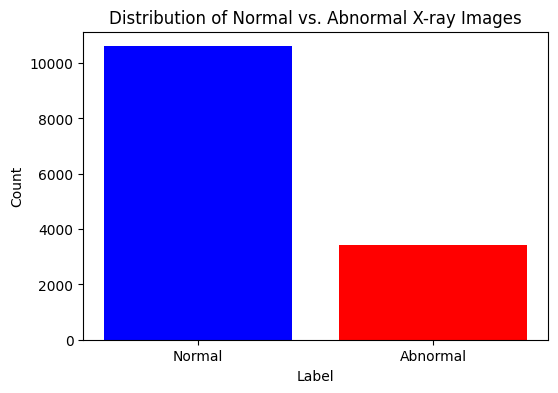

In [ ]:
import matplotlib.pyplot as plt

# 데이터 준비
labels = ["Normal", "Abnormal"]
counts = [10606, 3412]

# 그래프 생성
plt.figure(figsize=(6, 4))
plt.bar(labels, counts, color=["blue", "red"])
plt.ylabel("Count")
plt.xlabel("Label")
plt.title("Distribution of Normal vs. Abnormal X-ray Images")

# 그래프 출력
plt.show()

## 데이터 증강

In [ ]:
import albumentations as A
import cv2
import numpy as np
import os
import pandas as pd
from tqdm import tqdm
import shutil

# 데이터 증강 파이프라인 설정
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.GaussianBlur(p=0.1),
    A.Rotate(limit=10, p=0.3),
])

# 경로 설정
input_dir = "/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/vinbigdata/train"
output_dir = "/content/train_augmented/images"
os.makedirs(output_dir, exist_ok=True)

# CSV 로드 (filtered_train_df.csv 사용)
csv_path = "/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/filtered_train_df.csv"
train_df = pd.read_csv(csv_path)

# `image_id` 기준으로 정상/비정상 라벨 설정
train_df["label"] = train_df["class_name"].apply(lambda x: "normal" if x == "No finding" else "abnormal")

# 같은 `image_id`가 여러 번 등장하는 걸 방지하기 위해 unique한 X-ray 기준으로 필터링
unique_images = train_df.groupby("image_id")["label"].first().reset_index()

# 비정상 X-ray만 필터링
abnormal_df = unique_images[unique_images["label"] == "abnormal"]

# 비정상 X-ray만 증강 수행
augmented_images = []

for _, row in tqdm(abnormal_df.iterrows(), total=len(abnormal_df)):
    image_id = row["image_id"]
    image_path = os.path.join(input_dir, f"{image_id}.png")

    # 이미지 파일 확인
    if not os.path.exists(image_path):
        print(f"❌ 이미지 파일 없음: {image_path}")
        continue

    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print(f"❌ 이미지 로드 실패: {image_path}")
        continue

    # 증강 수행 (각 이미지당 2회 추가 증강)
    for i in range(2):
        augmented = transform(image=image)["image"]
        augmented = np.clip(augmented, 0, 255).astype(np.uint8)  # uint8 변환

        new_image_name = f"{image_id}_aug{i}.png"
        output_path = os.path.join(output_dir, new_image_name)

        # 저장
        cv2.imwrite(output_path, augmented)

        # 증강된 데이터 정보 추가
        new_row = row.copy()
        new_row["image_id"] = new_image_name
        augmented_images.append(new_row)

print("✅ 모든 비정상 X-ray 증강 완료!")

# **Google Drive로 증강된 이미지 이동**
drive_path = "/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/train_augmented/images"
os.makedirs(drive_path, exist_ok=True)  # Google Drive 폴더가 없으면 생성
shutil.copytree(output_dir, drive_path, dirs_exist_ok=True)
print(f"최종 증강된 이미지 Google Drive에 저장 완료: {drive_path}")


# **증강된 데이터 CSV 저장**
csv_output_path = "/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/train_augmented.csv"
augmented_train_df = pd.concat([train_df, pd.DataFrame(augmented_images)], ignore_index=True)
augmented_train_df.to_csv(csv_output_path, index=False)

print(f"✅ 데이터 증강 완료! 새로운 CSV 저장됨: {csv_output_path}")

100%|██████████| 3412/3412 [15:20<00:00,  3.71it/s]


✅ 모든 비정상 X-ray 증강 완료!
최종 증강된 이미지 Google Drive에 저장 완료: /content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/train_augmented/images
✅ 데이터 증강 완료! 새로운 CSV 저장됨: /content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/train_augmented.csv


In [ ]:
# CSV 파일 로드
csv_path = "/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/train_augmented/train_augmented.csv"
train_df = pd.read_csv(csv_path)

# 고유한 X-ray 이미지 개수 확인
unique_images = train_df["image_id"].nunique()

print(f"실제 X-ray 이미지 개수 (고유한 image_id 개수): {unique_images}")

실제 X-ray 이미지 개수 (고유한 image_id 개수): 20842


In [ ]:
import os

# Google Drive의 증강된 이미지 폴더 경로
drive_image_folder = "/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/train_augmented/images"

# 폴더 내 파일 개수 확인
if os.path.exists(drive_image_folder):
    drive_image_files = os.listdir(drive_image_folder)
    print(f"✅ Google Drive에 저장된 증강된 이미지 개수: {len(drive_image_files)}")
    print("📂 샘플 파일 5개:", drive_image_files[:5])  # 일부 파일 출력
else:
    print(f"❌ 폴더가 존재하지 않음: {drive_image_folder}")

✅ Google Drive에 저장된 증강된 이미지 개수: 6824
📂 샘플 파일 5개: ['440d5de43270006800efa1caecede2f1_aug0.png', 'dd1ec1034edd4e6b9696ea5cbeca6168_aug1.png', 'c1ca66539955f94f6dbd74fb5ba7208d_aug1.png', 'a87dc1505bcdb64c00c84b096799bdab_aug0.png', 'c24029f31fb9ae265934082ce6b47d33_aug0.png']


## 라벨 추가

In [ ]:
import pandas as pd

# CSV 파일 경로
csv_path = "/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/train_augmented/train_augmented.csv"

# CSV 불러오기
df = pd.read_csv(csv_path)

# 정상(정상=No finding) / 비정상(그 외) 라벨 추가
df["label"] = df["class_name"].apply(lambda x: 0 if x == "No finding" else 1)

# 새로운 CSV 저장 (정상/비정상 라벨 포함)
df.to_csv("/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/train_augmented_label.csv", index=False)

print(f"`train_augmented.csv`에 정상/비정상 라벨 추가 완료!")

`train_augmented.csv`에 정상/비정상 라벨 추가 완료!


In [ ]:
pd.read_csv('/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/train_augmented_label.csv')

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,width,height,label
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14.0,R11,NaN,NaN,NaN,NaN,2332.0,2580.0,0
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14.0,R7,NaN,NaN,NaN,NaN,2954.0,3159.0,0
2,063319de25ce7edb9b1c6b8881290140,No finding,14.0,R10,NaN,NaN,NaN,NaN,2540.0,3072.0,0
3,1c32170b4af4ce1a3030eb8167753b06,Pleural thickening,11.0,R9,0.246850,0.116211,0.372835,0.140951,2540.0,3072.0,1
4,0c7a38f293d5f5e4846aa4ca6db4daf1,ILD,5.0,R17,0.589497,0.095890,0.957549,0.848924,2285.0,2555.0,1
...,...,...,...,...,...,...,...,...,...,...,...
61184,ff924bcbd38f123aec723aa7040d7e43_aug1.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
61185,ffceb71a80efba3b83c88e11f4b9694b_aug0.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
61186,ffceb71a80efba3b83c88e11f4b9694b_aug1.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
61187,ffe6f9fe648a7ec29a50feb92d6c15a4_aug0.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


정상/비정상 데이터 분포:
label
0    10606
1    10236
Name: count, dtype: int64


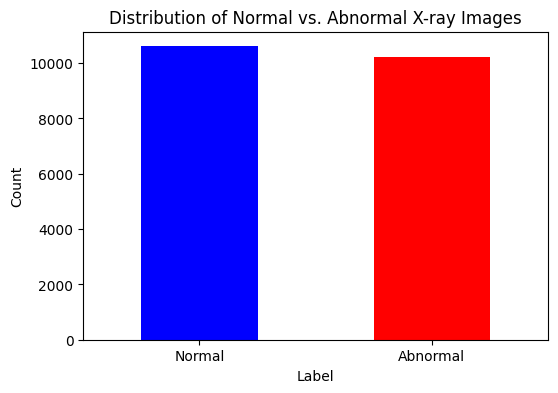

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 로드
csv_path = "/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/train_augmented_label.csv"
df = pd.read_csv(csv_path)

# 중복된 image_id 제거 후 정상(0)과 비정상(1) 개수 계산
label_counts = df.drop_duplicates(subset=["image_id"])["label"].value_counts()

# 결과 출력
print("정상/비정상 데이터 분포:")
print(label_counts)

# 시각화
plt.figure(figsize=(6, 4))
label_counts.plot(kind="bar", color=["blue", "red"])
plt.xticks(ticks=[0, 1], labels=["Normal", "Abnormal"], rotation=0)
plt.ylabel("Count")
plt.xlabel("Label")
plt.title("Distribution of Normal vs. Abnormal X-ray Images")
plt.show()

## 데이터 증강 (좌표 포함)

In [ ]:
import albumentations as A
import cv2
import numpy as np
import os
import pandas as pd
from tqdm import tqdm
import shutil

# 데이터 증강 파이프라인 설정 (Bounding Box 변형 포함)
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.GaussianBlur(p=0.1),
    A.Rotate(limit=10, p=0.3),
], bbox_params=A.BboxParams(format="pascal_voc", label_fields=["class_name"]))  # 바운딩 박스 변형 활성화

# 경로 설정
input_dir = "/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/vinbigdata/train"
output_dir = "/content/train_augmented/images"
os.makedirs(output_dir, exist_ok=True)

# CSV 로드 (filtered_train_df.csv 사용)
csv_path = "/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/filtered_data/filtered_train_df.csv"
train_df = pd.read_csv(csv_path)

# 정상/비정상 라벨 설정
train_df["label"] = train_df["class_name"].apply(lambda x: "normal" if x == "No finding" else "abnormal")

#  비정상 X-ray 데이터 필터링
unique_images = train_df.groupby("image_id")["label"].first().reset_index()
abnormal_df = unique_images[unique_images["label"] == "abnormal"]

# 바운딩 박스 포함한 데이터 증강 수행
augmented_images = []

for _, row in tqdm(abnormal_df.iterrows(), total=len(abnormal_df)):
    image_id = row["image_id"]
    image_path = os.path.join(input_dir, f"{image_id}.png")

    # 이미지 파일 확인
    if not os.path.exists(image_path):
        print(f"❌ 이미지 파일 없음: {image_path}")
        continue

    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print(f"❌ 이미지 로드 실패: {image_path}")
        continue

    # 원본 바운딩 박스 가져오기
    bbox_rows = train_df[train_df["image_id"] == image_id]  # 원본 데이터에서 해당 이미지의 모든 바운딩 박스 가져오기
    bboxes = []
    class_names = []

    for _, bbox_row in bbox_rows.iterrows():
        if pd.notna(bbox_row["x_min"]):
            bboxes.append([bbox_row["x_min"], bbox_row["y_min"], bbox_row["x_max"], bbox_row["y_max"]])
            class_names.append(bbox_row["class_name"])

    # 증강 수행 (각 이미지당 2회 추가 증강)
    for i in range(2):
        augmented = transform(image=image, bboxes=bboxes, class_name=class_names)

        aug_image = np.clip(augmented["image"], 0, 255).astype(np.uint8)
        new_image_name = f"{image_id}_aug{i}.png"
        output_path = os.path.join(output_dir, new_image_name)

        # 이미지 저장
        cv2.imwrite(output_path, aug_image)

        # 증강된 데이터 정보 추가 (여러 개의 바운딩 박스를 개별적으로 저장)
        for bbox, class_name in zip(augmented["bboxes"], class_names):
            new_row = row.copy()
            new_row["image_id"] = new_image_name
            new_row["x_min"], new_row["y_min"], new_row["x_max"], new_row["y_max"] = bbox
            new_row["class_name"] = class_name
            augmented_images.append(new_row)

print("모든 비정상 X-ray 증강 완료!")

# 7. Google Drive로 증강된 이미지 이동
drive_path = "/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/re_train_augmented/images"
os.makedirs(drive_path, exist_ok=True)
shutil.copytree(output_dir, drive_path, dirs_exist_ok=True)
print(f"최종 증강된 이미지 Google Drive에 저장 완료: {drive_path}")

# 8. 증강된 데이터 CSV 저장 (YOLO 학습용)
csv_output_path = "/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/re_train_augmented/re_train_augmented.csv"
augmented_train_df = pd.concat([train_df, pd.DataFrame(augmented_images)], ignore_index=True)
augmented_train_df.to_csv(csv_output_path, index=False)

print(f"데이터 증강 완료! 새로운 CSV 저장됨: {csv_output_path}")

100%|██████████| 3412/3412 [23:47<00:00,  2.39it/s]


모든 비정상 X-ray 증강 완료!
최종 증강된 이미지 Google Drive에 저장 완료: /content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/re_train_augmented/images
데이터 증강 완료! 새로운 CSV 저장됨: /content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/re_train_augmented/re_train_augmented.csv


In [ ]:
pd.read_csv('/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/filtered_data/filtered_train_df.csv')

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,width,height
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN,2332,2580
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN,2954,3159
2,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN,2540,3072
3,1c32170b4af4ce1a3030eb8167753b06,Pleural thickening,11,R9,0.246850,0.116211,0.372835,0.140951,2540,3072
4,0c7a38f293d5f5e4846aa4ca6db4daf1,ILD,5,R17,0.589497,0.095890,0.957549,0.848924,2285,2555
...,...,...,...,...,...,...,...,...,...,...
54360,db169d0be36123bd55b866d6aa73983b,Other lesion,9,R8,0.002604,0.232639,0.118056,0.602778,2304,2880
54361,936fd5cff1c058d39817a08f58b72cae,No finding,14,R1,NaN,NaN,NaN,NaN,2444,3200
54362,ca7e72954550eeb610fe22bf0244b7fa,No finding,14,R1,NaN,NaN,NaN,NaN,1994,2430
54363,aa17d5312a0fb4a2939436abca7f9579,No finding,14,R8,NaN,NaN,NaN,NaN,2048,2500


In [ ]:
pd.read_csv('/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/train_augmented_label.csv')

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,width,height,label
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14.0,R11,NaN,NaN,NaN,NaN,2332.0,2580.0,0
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14.0,R7,NaN,NaN,NaN,NaN,2954.0,3159.0,0
2,063319de25ce7edb9b1c6b8881290140,No finding,14.0,R10,NaN,NaN,NaN,NaN,2540.0,3072.0,0
3,1c32170b4af4ce1a3030eb8167753b06,Pleural thickening,11.0,R9,0.246850,0.116211,0.372835,0.140951,2540.0,3072.0,1
4,0c7a38f293d5f5e4846aa4ca6db4daf1,ILD,5.0,R17,0.589497,0.095890,0.957549,0.848924,2285.0,2555.0,1
...,...,...,...,...,...,...,...,...,...,...,...
61184,ff924bcbd38f123aec723aa7040d7e43_aug1.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
61185,ffceb71a80efba3b83c88e11f4b9694b_aug0.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
61186,ffceb71a80efba3b83c88e11f4b9694b_aug1.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
61187,ffe6f9fe648a7ec29a50feb92d6c15a4_aug0.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
pd.read_csv('/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/re_train_augmented/re_train_augmented.csv')

<ipython-input-5-0405dabcea80>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv('/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/re_train_augmented/re_train_augmented.csv')


,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,width,height,label
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14.0,R11,NaN,NaN,NaN,NaN,2332.0,2580.0,normal
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14.0,R7,NaN,NaN,NaN,NaN,2954.0,3159.0,normal
2,063319de25ce7edb9b1c6b8881290140,No finding,14.0,R10,NaN,NaN,NaN,NaN,2540.0,3072.0,normal
3,1c32170b4af4ce1a3030eb8167753b06,Pleural thickening,11.0,R9,0.246850,0.116211,0.372835,0.140951,2540.0,3072.0,abnormal
4,0c7a38f293d5f5e4846aa4ca6db4daf1,ILD,5.0,R17,0.589497,0.095890,0.957549,0.848924,2285.0,2555.0,abnormal
...,...,...,...,...,...,...,...,...,...,...,...
85925,ff924bcbd38f123aec723aa7040d7e43_aug1.png,Pulmonary fibrosis,NaN,NaN,0.677083,0.199777,0.903986,0.434896,NaN,NaN,abnormal
85926,ff924bcbd38f123aec723aa7040d7e43_aug1.png,Lung Opacity,NaN,NaN,0.221920,0.177827,0.432065,0.275670,NaN,NaN,abnormal
85927,ffceb71a80efba3b83c88e11f4b9694b_aug1.png,Pulmonary fibrosis,NaN,NaN,0.788525,0.491468,0.895211,0.527730,NaN,NaN,abnormal
85928,ffceb71a80efba3b83c88e11f4b9694b_aug1.png,Pulmonary fibrosis,NaN,NaN,0.677572,0.491468,0.908013,0.546075,NaN,NaN,abnormal


In [ ]:
import pandas as pd

# 정확한 파일 경로 입력 (로컬 또는 Google Drive 마운트 경로)
csv_path1 = "/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/train_augmented_label.csv"
csv_path2 = "/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/re_train_augmented/re_train_augmented.csv"

# 파일 존재 여부 확인 후 로드
if os.path.exists(csv_path1) and os.path.exists(csv_path2):
    df1 = pd.read_csv(csv_path1)
    df2 = pd.read_csv(csv_path2)

    # 중복되지 않은 고유한 `image_id` 개수 확인
    unique_images_1 = df1["image_id"].nunique()
    unique_images_2 = df2["image_id"].nunique()

    print(f"📊 첫 번째 CSV (train_augmented.csv) - 고유한 image_id 개수: {unique_images_1}")
    print(f"📊 두 번째 CSV (re_train_augmented.csv) - 고유한 image_id 개수: {unique_images_2}")
else:
    print("❌ CSV 파일이 존재하지 않습니다. 파일 경로를 확인해주세요.")

📊 첫 번째 CSV (train_augmented.csv) - 고유한 image_id 개수: 20842
📊 두 번째 CSV (re_train_augmented.csv) - 고유한 image_id 개수: 18790


<ipython-input-17-37079c7c539a>:10: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(csv_path2)


<ipython-input-18-fbb95e1c2777>:8: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


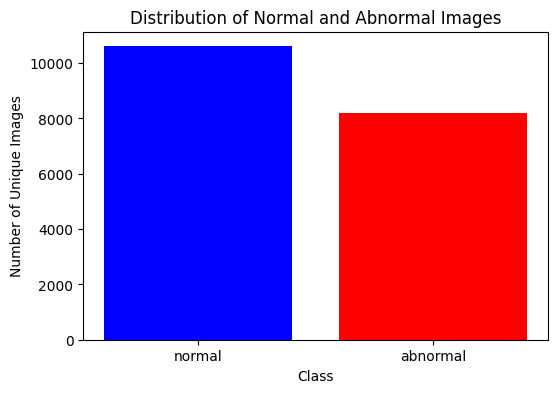

✅ 정상(Normal) 이미지 개수: 10606
✅ 비정상(Abnormal) 이미지 개수: 8184


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로
csv_path = "/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/re_train_augmented/re_train_augmented.csv"

# CSV 파일 로드
df = pd.read_csv(csv_path)

# 중복 제거 후 고유한 image_id 기준으로 정상/비정상 데이터 분포 확인
unique_df = df.drop_duplicates(subset=["image_id"])

# 'label' 컬럼 값 확인 (정상: "normal", 비정상: "abnormal")
if "label" not in unique_df.columns:
    print("❌ 'label' 컬럼이 존재하지 않습니다. CSV 파일을 확인하세요.")
else:
    # 정상/비정상 데이터 개수 계산
    label_counts = unique_df["label"].value_counts()

    # 시각화
    plt.figure(figsize=(6, 4))
    plt.bar(label_counts.index, label_counts.values, color=["blue", "red"])
    plt.xlabel("Class")
    plt.ylabel("Number of Unique Images")
    plt.title("Distribution of Normal and Abnormal Images")
    plt.show()

    # 개수 출력
    print(f"✅ 정상(Normal) 이미지 개수: {label_counts.get('normal', 0)}")
    print(f"✅ 비정상(Abnormal) 이미지 개수: {label_counts.get('abnormal', 0)}")

In [ ]:
import os

# 이미지가 저장된 디렉토리 경로
image_dir = "/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/re_train_augmented/images"

# 이미지 파일 개수 확인
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]  # 이미지 확장자 필터링
print(f"📂 이미지 개수: {len(image_files)} 개")

📂 이미지 개수: 6824 개


## 라벨 추가

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/re_train_augmented/re_train_augmented.csv')

# 'label' 열 변환 (normal → 0, abnormal → 1)
df['label'] = df['label'].map({'normal': '0', 'abnormal': '1'})

# 변경된 데이터 확인
print(df.head())

# 변환된 데이터를 저장 (선택 사항)
df.to_csv("/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/re_train_augmented/labeled_re_train_augmented.csv", index=False)  # 또는 df.to_excel("modified_data.xlsx", index=False)

<ipython-input-23-a5c8432ddeb9>:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/re_train_augmented/re_train_augmented.csv')


                           image_id          class_name  class_id rad_id  \
0  50a418190bc3fb1ef1633bf9678929b3          No finding      14.0    R11   
1  21a10246a5ec7af151081d0cd6d65dc9          No finding      14.0     R7   
2  063319de25ce7edb9b1c6b8881290140          No finding      14.0    R10   
3  1c32170b4af4ce1a3030eb8167753b06  Pleural thickening      11.0     R9   
4  0c7a38f293d5f5e4846aa4ca6db4daf1                 ILD       5.0    R17   

      x_min     y_min     x_max     y_max   width  height label  
0       NaN       NaN       NaN       NaN  2332.0  2580.0     0  
1       NaN       NaN       NaN       NaN  2954.0  3159.0     0  
2       NaN       NaN       NaN       NaN  2540.0  3072.0     0  
3  0.246850  0.116211  0.372835  0.140951  2540.0  3072.0     1  
4  0.589497  0.095890  0.957549  0.848924  2285.0  2555.0     1  


In [ ]:
pd.read_csv('/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/re_train_augmented/labeled_re_train_augmented.csv')

<ipython-input-26-85c9f6da715f>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv('/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/re_train_augmented/labeled_re_train_augmented.csv')


,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,width,height,label
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14.0,R11,NaN,NaN,NaN,NaN,2332.0,2580.0,0
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14.0,R7,NaN,NaN,NaN,NaN,2954.0,3159.0,0
2,063319de25ce7edb9b1c6b8881290140,No finding,14.0,R10,NaN,NaN,NaN,NaN,2540.0,3072.0,0
3,1c32170b4af4ce1a3030eb8167753b06,Pleural thickening,11.0,R9,0.246850,0.116211,0.372835,0.140951,2540.0,3072.0,1
4,0c7a38f293d5f5e4846aa4ca6db4daf1,ILD,5.0,R17,0.589497,0.095890,0.957549,0.848924,2285.0,2555.0,1
...,...,...,...,...,...,...,...,...,...,...,...
85925,ff924bcbd38f123aec723aa7040d7e43_aug1.png,Pulmonary fibrosis,NaN,NaN,0.677083,0.199777,0.903986,0.434896,NaN,NaN,1
85926,ff924bcbd38f123aec723aa7040d7e43_aug1.png,Lung Opacity,NaN,NaN,0.221920,0.177827,0.432065,0.275670,NaN,NaN,1
85927,ffceb71a80efba3b83c88e11f4b9694b_aug1.png,Pulmonary fibrosis,NaN,NaN,0.788525,0.491468,0.895211,0.527730,NaN,NaN,1
85928,ffceb71a80efba3b83c88e11f4b9694b_aug1.png,Pulmonary fibrosis,NaN,NaN,0.677572,0.491468,0.908013,0.546075,NaN,NaN,1


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/re_train_augmented/re_train_augmented.csv')
unique_df = df.drop_duplicates(subset=["image_id"])

unique_df.value_counts('label')

,count
label,
0,10606
1,8184


## 마지막

In [ ]:
import albumentations as A
import cv2
import numpy as np
import os
import pandas as pd
from tqdm import tqdm
import shutil

# 데이터 증강 파이프라인 설정 (Bounding Box 변형 포함)
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.GaussianBlur(p=0.1),
    A.Rotate(limit=10, p=0.3),
], bbox_params=A.BboxParams(format="pascal_voc", label_fields=["class_name"]))

# 경로 설정
input_dir = "/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/vinbigdata/train"
output_dir = "/content/train_augmented1/images"
os.makedirs(output_dir, exist_ok=True)

# CSV 로드 (filtered_train_df.csv 사용)
csv_path = "/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/filtered_data/filtered_train_df.csv"
train_df = pd.read_csv(csv_path)

# `image_id` 기준으로 정상/비정상 라벨 설정
train_df["label"] = train_df["class_name"].apply(lambda x: "normal" if x == "No finding" else "abnormal")

# 비정상 X-ray만 필터링
unique_images = train_df.groupby("image_id")["label"].first().reset_index()
abnormal_df = unique_images[unique_images["label"] == "abnormal"]

# 바운딩 박스 포함한 데이터 증강 수행
augmented_images = []

for _, row in tqdm(abnormal_df.iterrows(), total=len(abnormal_df)):
    image_id = row["image_id"]
    image_path = os.path.join(input_dir, f"{image_id}.png")

    # 이미지 파일 확인
    if not os.path.exists(image_path):
        print(f"❌ 이미지 파일 없음: {image_path}")
        continue

    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print(f"❌ 이미지 로드 실패: {image_path}")
        continue

    # 원본 바운딩 박스 가져오기
    bbox_rows = train_df[train_df["image_id"] == image_id]
    bboxes = []
    class_names = []

    for _, bbox_row in bbox_rows.iterrows():
        if pd.notna(bbox_row["x_min"]):
            bboxes.append([bbox_row["x_min"], bbox_row["y_min"], bbox_row["x_max"], bbox_row["y_max"]])
            class_names.append(bbox_row["class_name"])

    # 증강 수행 (각 이미지당 3회 추가 증강)
    for i in range(3):
        augmented = transform(image=image, bboxes=bboxes, class_name=class_names)

        aug_image = np.clip(augmented["image"], 0, 255).astype(np.uint8)
        new_image_name = f"{image_id}_aug{i}.png"
        output_path = os.path.join(output_dir, new_image_name)

        # 바운딩 박스가 있는 경우에만 저장
        if len(augmented["bboxes"]) > 0:
            cv2.imwrite(output_path, aug_image)
            for bbox, class_name in zip(augmented["bboxes"], class_names):
                new_row = row.copy()
                new_row["image_id"] = new_image_name
                new_row["x_min"], new_row["y_min"], new_row["x_max"], new_row["y_max"] = bbox
                new_row["class_name"] = class_name
                augmented_images.append(new_row)
        else:
            print(f"⚠ 바운딩 박스 없음: {new_image_name}, 삭제됨.")
            continue  # 바운딩 박스 없는 이미지는 저장하지 않음

print("✅ 모든 비정상 X-ray 증강 완료!")

# 증강된 이미지 이동
drive_path = "/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/last_train_augmented/images"
os.makedirs(drive_path, exist_ok=True)
shutil.copytree(output_dir, drive_path, dirs_exist_ok=True)
print(f"최종 증강된 이미지 Google Drive에 저장 완료: {drive_path}")

# 증강된 데이터 CSV 저장
csv_output_path = "/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/last_train_augmented/last_train_augmented.csv"
augmented_train_df = pd.concat([train_df, pd.DataFrame(augmented_images)], ignore_index=True)
augmented_train_df.to_csv(csv_output_path, index=False)

print(f"✅ 데이터 증강 완료! 새로운 CSV 저장됨: {csv_output_path}")

# 📌 바운딩 박스 없는 증강 이미지 삭제 (이미 저장된 폴더에서 정리)
saved_image_files = set(os.listdir(output_dir))  # 저장된 모든 이미지 목록
valid_image_ids = set(pd.read_csv(csv_output_path)["image_id"].unique())  # CSV에 존재하는 image_id

for image_file in saved_image_files:
    if image_file not in valid_image_ids:
        os.remove(os.path.join(output_dir, image_file))  # CSV에서 제외된 이미지는 삭제

print(f"✅ 바운딩 박스 없는 이미지 삭제 완료! 남은 이미지 파일 개수: {len(valid_image_ids)}")

  0%|          | 1/3412 [00:00<06:12,  9.16it/s]

⚠ 바운딩 박스 없음: 0005e8e3701dfb1dd93d53e2ff537b6e_aug1.png, 삭제됨.


  0%|          | 4/3412 [00:00<10:14,  5.54it/s]

⚠ 바운딩 박스 없음: 000d68e42b71d3eac10ccc077aba07c1_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 00150343289f317a0ad5629d5b7d9ef9_aug1.png, 삭제됨.


  0%|          | 8/3412 [00:01<08:03,  7.03it/s]

⚠ 바운딩 박스 없음: 0061cf6d35e253b6e7f03940592cc35e_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 008b3176a7248a0a189b5731ac8d2e95_aug2.png, 삭제됨.


  0%|          | 12/3412 [00:01<07:02,  8.05it/s]

⚠ 바운딩 박스 없음: 00aca42a24e4ea6066cca2546150c36e_aug2.png, 삭제됨.


  0%|          | 15/3412 [00:02<06:17,  8.99it/s]

⚠ 바운딩 박스 없음: 010018c93ed33ae56ed048ee54867e46_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 010018c93ed33ae56ed048ee54867e46_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 010a3dbb67bc37800a041866844861b1_aug2.png, 삭제됨.


  0%|          | 17/3412 [00:02<05:57,  9.50it/s]

⚠ 바운딩 박스 없음: 0114c5cd093c742334d5a5fa14140421_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 0114c5cd093c742334d5a5fa14140421_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 011ae9520e81f1efe71c9d954ec07d09_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 011ae9520e81f1efe71c9d954ec07d09_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 013893a5fa90241c65c3efcdbdd2cec1_aug1.png, 삭제됨.


  1%|          | 22/3412 [00:02<05:46,  9.78it/s]

⚠ 바운딩 박스 없음: 01546d3e6175ceaabd7d92f0c566579d_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 01570ee44031e4ebab6031501293bf66_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 0162dad8330007f8f0daf43bcf4033f1_aug0.png, 삭제됨.


  1%|          | 24/3412 [00:03<05:39,  9.99it/s]

⚠ 바운딩 박스 없음: 0187da5fd71c7a2917346bf12a67bbe4_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 0187da5fd71c7a2917346bf12a67bbe4_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 018a2fe44c3451281ec338c27ecc9c53_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 018a2fe44c3451281ec338c27ecc9c53_aug2.png, 삭제됨.


  1%|          | 27/3412 [00:03<06:06,  9.23it/s]

⚠ 바운딩 박스 없음: 018ef9c5d5b20c5161a5c48703171c3b_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 018ef9c5d5b20c5161a5c48703171c3b_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 01a3c3d994d85ce5634d2d13c03fd4b0_aug0.png, 삭제됨.


  1%|          | 29/3412 [00:03<05:48,  9.70it/s]

⚠ 바운딩 박스 없음: 01b0510a8d3b0860429536653db5eb21_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 01b0510a8d3b0860429536653db5eb21_aug1.png, 삭제됨.


  1%|          | 31/3412 [00:03<05:33, 10.12it/s]

⚠ 바운딩 박스 없음: 01cbbeab94b4d2bfd5cd8a467fee46a7_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 01d6446afde9fbf4332904bc331e9660_aug1.png, 삭제됨.


  1%|          | 36/3412 [00:04<06:13,  9.04it/s]

⚠ 바운딩 박스 없음: 0211f9fe31142ba1e25fb6a2ea3fea38_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 02222df826791117f315ecb2b58c5b69_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 023a8b8557d1fd59f272c63be6f3d4c0_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 023a8b8557d1fd59f272c63be6f3d4c0_aug2.png, 삭제됨.


  1%|          | 40/3412 [00:04<07:08,  7.86it/s]

⚠ 바운딩 박스 없음: 025534801b62d61f1c1c9e571ea74695_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 02562eb68a9c682f5f644fa7a099733f_aug1.png, 삭제됨.


  1%|▏         | 45/3412 [00:05<07:02,  7.97it/s]

⚠ 바운딩 박스 없음: 02957c14fee52ac6d0617e6d86275a25_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 02957c14fee52ac6d0617e6d86275a25_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 02a4774868d677ef8ecff2168c0161c0_aug2.png, 삭제됨.


  1%|▏         | 47/3412 [00:05<05:57,  9.42it/s]

⚠ 바운딩 박스 없음: 02acf0e7d0932f9c6a06fd4bbe1f5d90_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 02acf0e7d0932f9c6a06fd4bbe1f5d90_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 02cd1d17763c869ff3d4af5e28539456_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 02cd1d17763c869ff3d4af5e28539456_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 02d9d0c89022adc381c23e72add7c389_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 02d9d0c89022adc381c23e72add7c389_aug2.png, 삭제됨.


  1%|▏         | 49/3412 [00:05<05:28, 10.25it/s]

⚠ 바운딩 박스 없음: 02fe3eea41166a1d3eb75307a12c4a63_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 02fe3eea41166a1d3eb75307a12c4a63_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 0339aac16e3dd93ee397315a224147a6_aug0.png, 삭제됨.


  1%|▏         | 51/3412 [00:06<05:38,  9.92it/s]

⚠ 바운딩 박스 없음: 033e1637bed9b9f3dccac9c6c419adc2_aug0.png, 삭제됨.


  2%|▏         | 55/3412 [00:06<07:00,  7.99it/s]

⚠ 바운딩 박스 없음: 035480fbf46e946e21e7dce78637c329_aug2.png, 삭제됨.


  2%|▏         | 58/3412 [00:07<06:21,  8.79it/s]

⚠ 바운딩 박스 없음: 038fc325ff4aa0a21c76d5dd7c740c89_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 039c6997248b3a6ba3c909af35fce0eb_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 039c6997248b3a6ba3c909af35fce0eb_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 03a6078c0c12fb076b50ae017e590e19_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 03cd593a310656563a5aa3886ff30380_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 03cd593a310656563a5aa3886ff30380_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 03e6ecfa6f6fb33dfeac6ca4f9b459c9_aug0.png, 삭제됨.


  2%|▏         | 60/3412 [00:07<06:33,  8.53it/s]

⚠ 바운딩 박스 없음: 03e6ecfa6f6fb33dfeac6ca4f9b459c9_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 03f0bf0a7403c050a7ce574f98fd8ab6_aug1.png, 삭제됨.


  2%|▏         | 64/3412 [00:07<05:41,  9.81it/s]

⚠ 바운딩 박스 없음: 041081d11262c5f150e655f5e5ff0a2c_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 041081d11262c5f150e655f5e5ff0a2c_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 041762ff7fe435f22ea7541e77bfeafa_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 041762ff7fe435f22ea7541e77bfeafa_aug1.png, 삭제됨.


  2%|▏         | 65/3412 [00:07<05:56,  9.39it/s]

⚠ 바운딩 박스 없음: 044c53b3fd48fc029318fbcee70ae0d1_aug1.png, 삭제됨.


  2%|▏         | 69/3412 [00:08<06:44,  8.27it/s]

⚠ 바운딩 박스 없음: 047182a6e86808669f896307dcd550c7_aug1.png, 삭제됨.


  2%|▏         | 72/3412 [00:08<06:24,  8.68it/s]

⚠ 바운딩 박스 없음: 04994993c9e416f32ce24c7e7501d3be_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 04bb8bd7ee6f88a16623fe5c6dd4da91_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 04bb8bd7ee6f88a16623fe5c6dd4da91_aug2.png, 삭제됨.


  2%|▏         | 75/3412 [00:09<07:12,  7.72it/s]

⚠ 바운딩 박스 없음: 04fbba5834f2abd713e66b3d0e6a678e_aug0.png, 삭제됨.


  2%|▏         | 77/3412 [00:09<07:04,  7.86it/s]

⚠ 바운딩 박스 없음: 0501d62912b9a6ff04eae4ffc56affc2_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 051132a778e61a86eb147c7c6f564dfe_aug0.png, 삭제됨.


  2%|▏         | 79/3412 [00:09<07:19,  7.58it/s]

⚠ 바운딩 박스 없음: 051c2436c0acdb5e09d085c7e4a764f3_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 051d112b55e4c9f9dfa53307cc2ffb62_aug0.png, 삭제됨.


  2%|▏         | 81/3412 [00:09<06:57,  7.98it/s]

⚠ 바운딩 박스 없음: 052cf8f6cb59da96df7386adf8d5f6a0_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 053700069ddf3c4f1f6c477a48337836_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 053700069ddf3c4f1f6c477a48337836_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 053cf0f0a75926ebd53f0265bad6aee4_aug0.png, 삭제됨.


  2%|▏         | 82/3412 [00:09<06:58,  7.95it/s]

⚠ 바운딩 박스 없음: 053cf0f0a75926ebd53f0265bad6aee4_aug1.png, 삭제됨.


  2%|▏         | 85/3412 [00:10<09:05,  6.10it/s]

⚠ 바운딩 박스 없음: 05721adb43ab7c061733568b274c006b_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 059412ad34b2c48179f178e3138b5022_aug0.png, 삭제됨.


  3%|▎         | 87/3412 [00:10<08:42,  6.37it/s]

⚠ 바운딩 박스 없음: 059ec0fc0d6840cff6e268e46f85faa0_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 05c0c802db4f100de8e2a9fa4aa62d14_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 05c0c802db4f100de8e2a9fa4aa62d14_aug1.png, 삭제됨.


  3%|▎         | 89/3412 [00:11<08:55,  6.21it/s]

⚠ 바운딩 박스 없음: 05d676834dbed1639cb5eea70c1e307b_aug1.png, 삭제됨.


  3%|▎         | 90/3412 [00:11<09:17,  5.96it/s]

⚠ 바운딩 박스 없음: 05e0b2465053b685ca37849eac3dd62f_aug0.png, 삭제됨.


  3%|▎         | 91/3412 [00:11<11:11,  4.95it/s]

⚠ 바운딩 박스 없음: 05f202ee95a17a4b1e6dbe1916ffe8bf_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 05f202ee95a17a4b1e6dbe1916ffe8bf_aug1.png, 삭제됨.


  3%|▎         | 95/3412 [00:12<10:23,  5.32it/s]

⚠ 바운딩 박스 없음: 061fa33f6ba0028fbbad8caaeac8d145_aug1.png, 삭제됨.


  3%|▎         | 96/3412 [00:12<10:44,  5.15it/s]

⚠ 바운딩 박스 없음: 064023f1ff95962a1eee46b9f05f7309_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 0686521b0b8cf9426f253601b805fb52_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 0686521b0b8cf9426f253601b805fb52_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 0686521b0b8cf9426f253601b805fb52_aug2.png, 삭제됨.


  3%|▎         | 98/3412 [00:12<08:06,  6.81it/s]

⚠ 바운딩 박스 없음: 0690821a2e255ce175bfa7f36e308f63_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 0697473448bb5e83ac926fe92271e7d8_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 0697473448bb5e83ac926fe92271e7d8_aug2.png, 삭제됨.


  3%|▎         | 101/3412 [00:13<07:17,  7.56it/s]

⚠ 바운딩 박스 없음: 06b04918044786c36584a86273d72747_aug2.png, 삭제됨.


  3%|▎         | 103/3412 [00:13<07:05,  7.78it/s]

⚠ 바운딩 박스 없음: 06dfb2b996464c7b0e4c5177d433edbe_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 06e523e21ac668629092e85928b176a3_aug1.png, 삭제됨.


  3%|▎         | 105/3412 [00:13<07:06,  7.75it/s]

⚠ 바운딩 박스 없음: 06f3c1a8441d61da08aac07558ab5f05_aug0.png, 삭제됨.


  3%|▎         | 106/3412 [00:13<07:21,  7.49it/s]

⚠ 바운딩 박스 없음: 0710fe2b90ee68e54b84e795abb018df_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 0710fe2b90ee68e54b84e795abb018df_aug2.png, 삭제됨.


  3%|▎         | 110/3412 [00:14<06:51,  8.03it/s]

⚠ 바운딩 박스 없음: 071ff9c782ead87dfa9b1c025c25e769_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 074db6a4ab3aebd54fa0f628eb0e9b0e_aug1.png, 삭제됨.


  3%|▎         | 111/3412 [00:14<06:42,  8.21it/s]

⚠ 바운딩 박스 없음: 0760a14308badcbd370c6866c9db3a0a_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 077c76dffde69c0b90c28d78ef2ac31e_aug1.png, 삭제됨.


  3%|▎         | 117/3412 [00:15<06:48,  8.07it/s]

⚠ 바운딩 박스 없음: 07d004fabfd7246f9ed4283dd5237deb_aug1.png, 삭제됨.


  3%|▎         | 119/3412 [00:15<06:31,  8.41it/s]

⚠ 바운딩 박스 없음: 081d1700020b6bf0099f1e4d8aeec0f3_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 083a89dfc9a74a3f809035f886634ee2_aug1.png, 삭제됨.


  4%|▎         | 121/3412 [00:15<06:25,  8.54it/s]

⚠ 바운딩 박스 없음: 0844f274f2a388e70231d3133754ac35_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 0853ab3a3dbadae1e6f28b933ddff809_aug0.png, 삭제됨.


  4%|▎         | 124/3412 [00:15<07:18,  7.50it/s]

⚠ 바운딩 박스 없음: 08ce56202e44175674fc5f5517e74db4_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 08e3d3783927a15d35137c756c1a7e0b_aug2.png, 삭제됨.


  4%|▎         | 127/3412 [00:16<06:18,  8.68it/s]

⚠ 바운딩 박스 없음: 090b30ca55ab2a592cd3b24c9407a2bf_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 090b30ca55ab2a592cd3b24c9407a2bf_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 09175449df9374e0f6afe517f7b6249f_aug2.png, 삭제됨.


  4%|▍         | 131/3412 [00:16<06:21,  8.59it/s]

⚠ 바운딩 박스 없음: 095c13d937c0dd9f547035344ba6c6c4_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 096688dacee6b1a1a5660ad15024a6f9_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 097c63f9c6d46cfe5bd4937f277fbdbd_aug2.png, 삭제됨.


  4%|▍         | 135/3412 [00:17<05:29,  9.94it/s]

⚠ 바운딩 박스 없음: 09b9674023305cb9a0acb367600efffa_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 09b9674023305cb9a0acb367600efffa_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 09c9887c189f99704b452f193a40eaf7_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 09d6b99ffec66ae485de851924187bfe_aug0.png, 삭제됨.


  4%|▍         | 138/3412 [00:17<05:31,  9.87it/s]

⚠ 바운딩 박스 없음: 09df460412ce705d0f634436f518f46d_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 09f0b00bd079304f72c079d369925aee_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 09f0b00bd079304f72c079d369925aee_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 09f9a62fceffacc4d062a7fe24a626b8_aug0.png, 삭제됨.


  4%|▍         | 140/3412 [00:17<06:29,  8.39it/s]

⚠ 바운딩 박스 없음: 0a072917005494298d153c01bbd8f689_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 0a0ac65c40a9ac441651e4bfbde03c4e_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 0a0ac65c40a9ac441651e4bfbde03c4e_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 0a0ac65c40a9ac441651e4bfbde03c4e_aug2.png, 삭제됨.


  4%|▍         | 143/3412 [00:18<07:38,  7.13it/s]

⚠ 바운딩 박스 없음: 0a16dc6491142ff8c7c36f3b3f4ebd02_aug0.png, 삭제됨.


  4%|▍         | 146/3412 [00:18<08:23,  6.49it/s]

⚠ 바운딩 박스 없음: 0a4fbc9ade84a7abd1680eb8ba031a9d_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 0a61578e3d77b1cebc86d13a41efa31b_aug2.png, 삭제됨.


  4%|▍         | 148/3412 [00:18<07:19,  7.43it/s]

⚠ 바운딩 박스 없음: 0a9909b1cd924cd593151ba2d3d3dd55_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 0aad4ac2ea24742e3f9de3d29fae6d95_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 0aad4ac2ea24742e3f9de3d29fae6d95_aug2.png, 삭제됨.


  4%|▍         | 153/3412 [00:19<06:57,  7.80it/s]

⚠ 바운딩 박스 없음: 0b0e106a53f9dc3b28a9b15f94510b7a_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 0b0e106a53f9dc3b28a9b15f94510b7a_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 0b1b897b1e1e170f1b5fd7aeff553afa_aug0.png, 삭제됨.


  5%|▍         | 156/3412 [00:19<06:14,  8.69it/s]

⚠ 바운딩 박스 없음: 0b5213c456c26b48ca011b9865c4e6ce_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 0b6006be69ea1764f9bf80e5091b1e8e_aug0.png, 삭제됨.


  5%|▍         | 158/3412 [00:20<06:16,  8.65it/s]

⚠ 바운딩 박스 없음: 0b62bc6644be72ce4dfa5ea77a77f311_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 0b98b21145a9425bf3eeea4b0de425e7_aug0.png, 삭제됨.


  5%|▍         | 161/3412 [00:20<05:26,  9.95it/s]

⚠ 바운딩 박스 없음: 0be2bdac4e84982ad1b24830d2cce470_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 0be2bdac4e84982ad1b24830d2cce470_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 0be45114544283beb4f6d371f946e889_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 0be45114544283beb4f6d371f946e889_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 0bed7f179df709d35aef763544ebfebf_aug1.png, 삭제됨.


  5%|▍         | 163/3412 [00:20<05:33,  9.73it/s]

⚠ 바운딩 박스 없음: 0bee0cde729de2d82b39527c37f11934_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 0bee0cde729de2d82b39527c37f11934_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 0bef06d948ac1fe20ade505ba9960885_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 0c2079e62ddfb06a8a5300cefaa3a970_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 0c2079e62ddfb06a8a5300cefaa3a970_aug1.png, 삭제됨.


  5%|▍         | 165/3412 [00:20<05:19, 10.15it/s]

⚠ 바운딩 박스 없음: 0c31081e8ada2990bcbef0f12ea60b07_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 0c577dc6594dab44ebbd6964de673eaa_aug1.png, 삭제됨.


  5%|▍         | 168/3412 [00:21<08:15,  6.55it/s]

⚠ 바운딩 박스 없음: 0c5ff01c7bfb4362fcd98f36e555b08c_aug0.png, 삭제됨.


  5%|▌         | 173/3412 [00:22<07:47,  6.92it/s]

⚠ 바운딩 박스 없음: 0c7a38f293d5f5e4846aa4ca6db4daf1_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 0c8447ce02d73c505a90a9c7af8c83ce_aug2.png, 삭제됨.


  5%|▌         | 178/3412 [00:22<07:15,  7.43it/s]

⚠ 바운딩 박스 없음: 0cf83a19a8281e4a281dece9854008ac_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 0cf83a19a8281e4a281dece9854008ac_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 0cfae3f740f87ca3b96dec765d06fad0_aug1.png, 삭제됨.


  5%|▌         | 179/3412 [00:23<09:45,  5.52it/s]

⚠ 바운딩 박스 없음: 0d03df2e9ed557d0c9edcec777056c1f_aug1.png, 삭제됨.


  5%|▌         | 182/3412 [00:23<08:51,  6.08it/s]

⚠ 바운딩 박스 없음: 0d266f5353352d86d3c092da96dc67f5_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 0d266f5353352d86d3c092da96dc67f5_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 0d30dc1e0070e7a934f39452e3ad3b83_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 0d30dc1e0070e7a934f39452e3ad3b83_aug2.png, 삭제됨.


  5%|▌         | 184/3412 [00:23<08:10,  6.58it/s]

⚠ 바운딩 박스 없음: 0d3b1464574b7db3d664dc0aa0b66549_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 0d3b1464574b7db3d664dc0aa0b66549_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 0d5597f8b17330d498fc5e13893e3081_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 0d5597f8b17330d498fc5e13893e3081_aug2.png, 삭제됨.


  5%|▌         | 187/3412 [00:24<08:29,  6.33it/s]

⚠ 바운딩 박스 없음: 0d94045f9e16f077bc6bbdea9f6c561b_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 0d94045f9e16f077bc6bbdea9f6c561b_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 0dbdb924a9140849abd4ff650c5356da_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 0dbdb924a9140849abd4ff650c5356da_aug1.png, 삭제됨.


  6%|▌         | 189/3412 [00:24<09:08,  5.88it/s]

⚠ 바운딩 박스 없음: 0df187b5072103a0919c1a34be03e7ed_aug0.png, 삭제됨.


  6%|▌         | 191/3412 [00:25<09:19,  5.76it/s]

⚠ 바운딩 박스 없음: 0e093fa90e5be5666cd396d722cc84ac_aug2.png, 삭제됨.


  6%|▌         | 192/3412 [00:25<08:54,  6.03it/s]

⚠ 바운딩 박스 없음: 0e6af94d17007c94d858b3bb7adb7dac_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 0e6af94d17007c94d858b3bb7adb7dac_aug1.png, 삭제됨.


  6%|▌         | 194/3412 [00:25<08:32,  6.27it/s]

⚠ 바운딩 박스 없음: 0e87195ff59d4294d61b8bffddb3c03c_aug1.png, 삭제됨.


  6%|▌         | 199/3412 [00:26<09:24,  5.69it/s]

⚠ 바운딩 박스 없음: 0eac4cf8618d5e582c336217d0291f25_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 0eac4cf8618d5e582c336217d0291f25_aug2.png, 삭제됨.


  6%|▌         | 202/3412 [00:27<07:28,  7.16it/s]

⚠ 바운딩 박스 없음: 0f186e3eba8d9ebd51feed957204ddbf_aug2.png, 삭제됨.


  6%|▌         | 205/3412 [00:27<06:16,  8.53it/s]

⚠ 바운딩 박스 없음: 0f4fd2b86df83111f83444ee90edbea1_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 0f81902a673f0d826b55ea9dc9da297b_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 0fafbbfb67745f8c29351f9f7263b82f_aug2.png, 삭제됨.


  6%|▌         | 208/3412 [00:27<05:48,  9.19it/s]

⚠ 바운딩 박스 없음: 0fca086ebe001f784d428aa9973ba691_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 0fd981034f74251d4a5d72891940d585_aug0.png, 삭제됨.


  6%|▌         | 211/3412 [00:27<05:42,  9.34it/s]

⚠ 바운딩 박스 없음: 103fb193578933a2d53ae31ff0fc3319_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 103fb193578933a2d53ae31ff0fc3319_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 104b915269077619e2b3bbf641506327_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 105c3102661ee24684dc180a32dc7119_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 105c3102661ee24684dc180a32dc7119_aug1.png, 삭제됨.


  6%|▋         | 214/3412 [00:28<05:50,  9.11it/s]

⚠ 바운딩 박스 없음: 1060e455b64eea9e29ca4a3e05b47557_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 1066a058b5bae597f2dbb33780c2577d_aug1.png, 삭제됨.


  6%|▋         | 216/3412 [00:28<05:58,  8.91it/s]

⚠ 바운딩 박스 없음: 106a3da41d2e3d9f508c09b28e8abdaf_aug1.png, 삭제됨.


  6%|▋         | 217/3412 [00:28<06:11,  8.60it/s]

⚠ 바운딩 박스 없음: 1071b3b85121012c5061894bf3b8704b_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 10ab7eaa1ef08dea7a899cc893564838_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 10e7dac260f11046164aa94f2d8add9f_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 10e7dac260f11046164aa94f2d8add9f_aug1.png, 삭제됨.


  6%|▋         | 221/3412 [00:29<06:07,  8.68it/s]

⚠ 바운딩 박스 없음: 10f28558b1667b3d30d9e4c44f7a5bc6_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 110cd42557499b2bcfe84732b281172c_aug1.png, 삭제됨.


  7%|▋         | 225/3412 [00:29<05:26,  9.75it/s]

⚠ 바운딩 박스 없음: 112cf0367dd8b6aa14b4e384439d9eb7_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 112cf0367dd8b6aa14b4e384439d9eb7_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 113274a4ca3c2e72b7ff1bd3ce5006b6_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 1133414000e82176ab7852aeacc762eb_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 1133414000e82176ab7852aeacc762eb_aug2.png, 삭제됨.


  7%|▋         | 227/3412 [00:29<05:06, 10.39it/s]

⚠ 바운딩 박스 없음: 1138649f25528f0ab76c93ac60279ca3_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 1148a27d6ea1ec7669de022fe2480890_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 1148a27d6ea1ec7669de022fe2480890_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 116c19c289e285a60ab20cf72090c9fa_aug0.png, 삭제됨.


  7%|▋         | 231/3412 [00:29<04:33, 11.62it/s]

⚠ 바운딩 박스 없음: 11750f2005f2f50d592c5c5cc145fdfe_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 117c218c2534e3d40a6ca0b3d724eb24_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 117c218c2534e3d40a6ca0b3d724eb24_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 117c218c2534e3d40a6ca0b3d724eb24_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 119bc2dba30b0ba7995e189504126ed1_aug2.png, 삭제됨.


  7%|▋         | 237/3412 [00:30<06:31,  8.12it/s]

⚠ 바운딩 박스 없음: 1245f853816564c0ee3f1b9e93521ff0_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 124ec853c372fcf7f4428b26b32be62f_aug1.png, 삭제됨.


  7%|▋         | 239/3412 [00:31<06:46,  7.81it/s]

⚠ 바운딩 박스 없음: 1259ee6feb64a552e3521ddcb395888c_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 126ae7336c7776a82bf3c15c0c6751c0_aug2.png, 삭제됨.


  7%|▋         | 242/3412 [00:31<06:43,  7.85it/s]

⚠ 바운딩 박스 없음: 1280dc55c1ff852024be232c2942e3fd_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 1283d5ba97663aef3b97ee4f1884e9f9_aug0.png, 삭제됨.


  7%|▋         | 245/3412 [00:31<06:33,  8.05it/s]

⚠ 바운딩 박스 없음: 128f55a981d4192a2990946431a7469b_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 128f55a981d4192a2990946431a7469b_aug2.png, 삭제됨.


  7%|▋         | 247/3412 [00:31<05:44,  9.17it/s]

⚠ 바운딩 박스 없음: 129a1e7753432edd052a2cdbfbaee00e_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 129a1e7753432edd052a2cdbfbaee00e_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 12bd4c85000b33c532fb9d57b5f2a08e_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 12bd4c85000b33c532fb9d57b5f2a08e_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 12ccbda1f9c224e5d5496cd7fe3d26d7_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 12ccbda1f9c224e5d5496cd7fe3d26d7_aug2.png, 삭제됨.


  7%|▋         | 249/3412 [00:32<05:14, 10.05it/s]

⚠ 바운딩 박스 없음: 12d8de45e35e8b8c896109bfb46f8a82_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 12d8de45e35e8b8c896109bfb46f8a82_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 12e0e910766f2d1b1ccda7c32051643f_aug1.png, 삭제됨.


  7%|▋         | 252/3412 [00:32<05:31,  9.53it/s]

⚠ 바운딩 박스 없음: 12ede510c82b53705e33fa758ff03131_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 12ede510c82b53705e33fa758ff03131_aug2.png, 삭제됨.


  7%|▋         | 254/3412 [00:32<06:34,  8.01it/s]

⚠ 바운딩 박스 없음: 13088cbf40717bace59ef0961554c08f_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 133ed9054828b0e75987e00217aef89d_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 133ed9054828b0e75987e00217aef89d_aug1.png, 삭제됨.


  8%|▊         | 258/3412 [00:33<07:08,  7.36it/s]

⚠ 바운딩 박스 없음: 1374c483d258203eadf6c6a525899d51_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 13776ecb39222a7aaace2d9721abebbe_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 13776ecb39222a7aaace2d9721abebbe_aug2.png, 삭제됨.


  8%|▊         | 261/3412 [00:33<06:16,  8.37it/s]

⚠ 바운딩 박스 없음: 13ceff5f3d113919c224c8b42d3c2411_aug2.png, 삭제됨.


  8%|▊         | 266/3412 [00:34<07:11,  7.29it/s]

⚠ 바운딩 박스 없음: 145691883baff4df3e4863ca6354c44e_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 145bbf5912e81c52ceac691693dfc716_aug0.png, 삭제됨.


  8%|▊         | 269/3412 [00:34<06:42,  7.81it/s]

⚠ 바운딩 박스 없음: 146584f4913fd351785bf9159fd17617_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 14742737297b34ac440a0338877663ac_aug1.png, 삭제됨.


  8%|▊         | 273/3412 [00:35<06:43,  7.78it/s]

⚠ 바운딩 박스 없음: 14f8770d112738119f0f31ee75e8fc41_aug0.png, 삭제됨.


  8%|▊         | 275/3412 [00:35<06:41,  7.82it/s]

⚠ 바운딩 박스 없음: 150cfe73d6dd162e02e1bc799a9d71e0_aug1.png, 삭제됨.


  8%|▊         | 277/3412 [00:35<06:34,  7.94it/s]

⚠ 바운딩 박스 없음: 151893dad65d5077f5a377fc9d0e6881_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 151a8ce59aa6e414ee8a9c9d711cee61_aug1.png, 삭제됨.


  8%|▊         | 278/3412 [00:35<06:13,  8.40it/s]

⚠ 바운딩 박스 없음: 151aade5871241a6deb39da83b9d2c47_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 156620bd19b7dee86079be71d26bd87e_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 156620bd19b7dee86079be71d26bd87e_aug2.png, 삭제됨.


  8%|▊         | 281/3412 [00:36<06:16,  8.32it/s]

⚠ 바운딩 박스 없음: 15a12089e9c773cb200ee8959740e1b3_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 15acee7728e6530dfa2bd01521c7148d_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 15acee7728e6530dfa2bd01521c7148d_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 15acee7728e6530dfa2bd01521c7148d_aug2.png, 삭제됨.


  8%|▊         | 285/3412 [00:36<07:20,  7.09it/s]

⚠ 바운딩 박스 없음: 15c3fc505c414c69ba757cb3be3ed213_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 15c3fc505c414c69ba757cb3be3ed213_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 15edc6ae9aebe34220472aa7fcf34b08_aug1.png, 삭제됨.


  8%|▊         | 286/3412 [00:37<08:08,  6.40it/s]

⚠ 바운딩 박스 없음: 15f023463d88b8f8bc852a9a7b72e6e3_aug0.png, 삭제됨.


  8%|▊         | 288/3412 [00:37<07:47,  6.68it/s]

⚠ 바운딩 박스 없음: 16041095041e6b5afb13e8da17bf45b4_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 1606093b9d036cda7e30316ada6ea2cf_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 1606093b9d036cda7e30316ada6ea2cf_aug1.png, 삭제됨.


  9%|▊         | 291/3412 [00:37<07:23,  7.04it/s]

⚠ 바운딩 박스 없음: 163898fbc57f00f58ad27e72031a541f_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 163898fbc57f00f58ad27e72031a541f_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 16565752b931dfbec4b042b26786401a_aug1.png, 삭제됨.


  9%|▊         | 292/3412 [00:38<08:26,  6.16it/s]

⚠ 바운딩 박스 없음: 1659dcad9ea4f12c3c91b5702e800669_aug1.png, 삭제됨.


  9%|▊         | 296/3412 [00:39<14:55,  3.48it/s]

⚠ 바운딩 박스 없음: 16b02dc3b4e8deb6c1cc686c9ef911dd_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 16b02dc3b4e8deb6c1cc686c9ef911dd_aug2.png, 삭제됨.


  9%|▊         | 298/3412 [00:39<15:06,  3.44it/s]

⚠ 바운딩 박스 없음: 16edfb76036ad3b10d9479e16ad7e92a_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 1700104c53dad4e23980cc44dfec1b64_aug0.png, 삭제됨.


  9%|▉         | 301/3412 [00:40<12:25,  4.18it/s]

⚠ 바운딩 박스 없음: 170709246c0ac68fa305fb3acc2cfb77_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 1722c7262a821be25de56e351d641993_aug2.png, 삭제됨.


  9%|▉         | 303/3412 [00:40<10:10,  5.09it/s]

⚠ 바운딩 박스 없음: 1725b46578ff86f1a8d21b10d4d4699a_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 1730d2ebd1cc96e9e5656cdf916ac7f8_aug1.png, 삭제됨.


  9%|▉         | 305/3412 [00:41<11:07,  4.65it/s]

⚠ 바운딩 박스 없음: 1756a285d1bc917bbe55024b0727a836_aug1.png, 삭제됨.


  9%|▉         | 306/3412 [00:42<18:00,  2.87it/s]

⚠ 바운딩 박스 없음: 175e3663cc06a6d4ee39f8f9fa7f9183_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 17791317b59d89c03ce7a15826e1b876_aug1.png, 삭제됨.


  9%|▉         | 312/3412 [00:43<09:11,  5.62it/s]

⚠ 바운딩 박스 없음: 17a43dc27cccda142f5d54d378f4aed7_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 17a43dc27cccda142f5d54d378f4aed7_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 17a43dc27cccda142f5d54d378f4aed7_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 17b6cfad0ea2ecd3b9511743a608bcb7_aug2.png, 삭제됨.


  9%|▉         | 315/3412 [00:43<08:01,  6.44it/s]

⚠ 바운딩 박스 없음: 1812172c7ad3771c05d1238bb3066217_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 1812172c7ad3771c05d1238bb3066217_aug2.png, 삭제됨.


  9%|▉         | 318/3412 [00:44<06:54,  7.47it/s]

⚠ 바운딩 박스 없음: 183015e171f5159d7e60d43578632a3f_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 183015e171f5159d7e60d43578632a3f_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 1831b088f3a62617cb5cacc3d852cd3c_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 1831b088f3a62617cb5cacc3d852cd3c_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 18384bcf54af7c121723805cbd00f44d_aug0.png, 삭제됨.


  9%|▉         | 320/3412 [00:44<06:10,  8.35it/s]

⚠ 바운딩 박스 없음: 18384bcf54af7c121723805cbd00f44d_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 18533a53425600e4da1e36085cbad104_aug1.png, 삭제됨.


  9%|▉         | 323/3412 [00:44<05:28,  9.39it/s]

⚠ 바운딩 박스 없음: 18a3dd5dcbabc9484be39f9f2f6c0756_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 18a3dd5dcbabc9484be39f9f2f6c0756_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 18a5c8860abc63dbef3627d3e5efd951_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 18a5c8860abc63dbef3627d3e5efd951_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 18a61a07e6f5f13ebfee57fa36cd8b6f_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 18a61a07e6f5f13ebfee57fa36cd8b6f_aug2.png, 삭제됨.


 10%|▉         | 325/3412 [00:44<05:32,  9.27it/s]

⚠ 바운딩 박스 없음: 18b362567e282e3ada32ee486ea6bad1_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 18ee9ef3baea468de2087e0edd85e919_aug0.png, 삭제됨.


 10%|▉         | 327/3412 [00:45<06:10,  8.33it/s]

⚠ 바운딩 박스 없음: 1932e3ca2084c4ef9ee98c747cd21f16_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 19417bae94986e8c122ae6efd92e3997_aug2.png, 삭제됨.


 10%|▉         | 330/3412 [00:45<05:54,  8.70it/s]

⚠ 바운딩 박스 없음: 1981a0c4cdbb5d4eeb9c2572813a453f_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 1981a0c4cdbb5d4eeb9c2572813a453f_aug2.png, 삭제됨.


 10%|▉         | 332/3412 [00:45<05:59,  8.58it/s]

⚠ 바운딩 박스 없음: 19850eb0ba7a72faf4b329254ab42828_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 19b90a86dccdc11c785cc955ee22db2f_aug0.png, 삭제됨.


 10%|▉         | 334/3412 [00:45<06:19,  8.12it/s]

⚠ 바운딩 박스 없음: 19da7247b897983617e17c69636620ad_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 19da7247b897983617e17c69636620ad_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 1a39c8cd556ab64679d04d440466a2f5_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 1a414a1cb6b545c2ee4de4abede481c7_aug0.png, 삭제됨.


 10%|▉         | 337/3412 [00:46<06:30,  7.88it/s]

⚠ 바운딩 박스 없음: 1a4a1dfe32d84179b5ab03e56532bcde_aug1.png, 삭제됨.


 10%|▉         | 339/3412 [00:46<06:05,  8.40it/s]

⚠ 바운딩 박스 없음: 1a4f3604083f0bb00c748cd1c19236c2_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 1a6380efb810f2c8fbae25143ab93773_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 1a85266eec98f756269a91a56d5fb1a8_aug0.png, 삭제됨.


 10%|█         | 342/3412 [00:59<1:45:29,  2.06s/it]

⚠ 바운딩 박스 없음: 1aaa4b217affae30113bd3a7a384a4c7_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 1aaab6baefab214419016ad2f3175120_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 1aaab6baefab214419016ad2f3175120_aug2.png, 삭제됨.


 10%|█         | 344/3412 [01:00<1:01:27,  1.20s/it]

⚠ 바운딩 박스 없음: 1acd93cf651789703cd37ab249f58580_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 1acd93cf651789703cd37ab249f58580_aug1.png, 삭제됨.


 10%|█         | 346/3412 [01:01<36:07,  1.41it/s]

⚠ 바운딩 박스 없음: 1ad9acab15f15722dada12e90242178c_aug2.png, 삭제됨.


 10%|█         | 347/3412 [01:01<29:25,  1.74it/s]

⚠ 바운딩 박스 없음: 1aef7fa409ee0cb4579032577e02e9cb_aug1.png, 삭제됨.


 10%|█         | 355/3412 [01:02<09:30,  5.36it/s]

⚠ 바운딩 박스 없음: 1b6b4e0d7f5f7d7ad2bf8b70783244be_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 1b6b4e0d7f5f7d7ad2bf8b70783244be_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 1b6fbfb87455d2145db222bc4c3e9875_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 1b6fbfb87455d2145db222bc4c3e9875_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 1b6fbfb87455d2145db222bc4c3e9875_aug2.png, 삭제됨.


 11%|█         | 360/3412 [01:03<07:09,  7.11it/s]

⚠ 바운딩 박스 없음: 1bbd7232924e951e7fa87ffa0f62ec3d_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 1bc4c3008d6a7144722daa35a7ff2b00_aug2.png, 삭제됨.


 11%|█         | 362/3412 [01:03<06:09,  8.24it/s]

⚠ 바운딩 박스 없음: 1be94a4e06067c5ecd66488cad60a087_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 1be94a4e06067c5ecd66488cad60a087_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 1bf31ecce06f5cab7b82b36daea676b6_aug0.png, 삭제됨.


 11%|█         | 365/3412 [01:04<06:32,  7.77it/s]

⚠ 바운딩 박스 없음: 1c1ef26e3b3323f74041f6dd2371cd24_aug1.png, 삭제됨.


 11%|█         | 366/3412 [01:04<07:34,  6.71it/s]

⚠ 바운딩 박스 없음: 1c32170b4af4ce1a3030eb8167753b06_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 1c32170b4af4ce1a3030eb8167753b06_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 1c32170b4af4ce1a3030eb8167753b06_aug2.png, 삭제됨.


 11%|█         | 369/3412 [01:04<06:42,  7.56it/s]

⚠ 바운딩 박스 없음: 1c4d23bf90d9e32947d50b5e01ce4d78_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 1c4d37f9cbacdce0f114ed4c3fd94dd5_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 1c572f5c1b3f2d9dfb23b48f25a7ace0_aug2.png, 삭제됨.


 11%|█         | 373/3412 [01:05<06:34,  7.70it/s]

⚠ 바운딩 박스 없음: 1cb2f31d6914dbb6550d2ed5538fc184_aug1.png, 삭제됨.


 11%|█         | 375/3412 [01:05<05:29,  9.20it/s]

⚠ 바운딩 박스 없음: 1d0b8741c4689494aed1c1859eb891dc_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 1d0b8741c4689494aed1c1859eb891dc_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 1d1b26e179d9394bc1d9971ec50d1aaf_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 1d1b26e179d9394bc1d9971ec50d1aaf_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 1d21c69075630b741fe0629e696fa167_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 1d21c69075630b741fe0629e696fa167_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 1d21c69075630b741fe0629e696fa167_aug2.png, 삭제됨.


 11%|█         | 378/3412 [01:05<05:48,  8.69it/s]

⚠ 바운딩 박스 없음: 1d2cef0157f477b7b635a86a85b6f9e4_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 1d36704fc4f9a8f997128b92551bbc4d_aug1.png, 삭제됨.


 11%|█         | 382/3412 [01:06<05:43,  8.81it/s]

⚠ 바운딩 박스 없음: 1d37efa5bcce26d6cc9a224f99db3f0e_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 1d37efa5bcce26d6cc9a224f99db3f0e_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 1d730f10402fbb1de01aa617b80a8242_aug2.png, 삭제됨.


 11%|█▏        | 384/3412 [01:06<06:21,  7.94it/s]

⚠ 바운딩 박스 없음: 1d7ba4000ddf7f707822b2aab9ed4b36_aug2.png, 삭제됨.


 11%|█▏        | 386/3412 [01:06<05:56,  8.50it/s]

⚠ 바운딩 박스 없음: 1d8f4d5daf11f2b01695b71a862aa813_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 1dafb16f8c69e188cf2152200e0cb2ef_aug0.png, 삭제됨.


 11%|█▏        | 388/3412 [01:06<05:55,  8.50it/s]

⚠ 바운딩 박스 없음: 1dc3bbcc437933158a734f7e28547bb5_aug2.png, 삭제됨.


 11%|█▏        | 391/3412 [01:07<05:55,  8.50it/s]

⚠ 바운딩 박스 없음: 1e1dcf1ea1d974a5fea81b7616a11723_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 1e380cbe7d0d59de0527d31486a24fa2_aug0.png, 삭제됨.


 12%|█▏        | 394/3412 [01:07<05:51,  8.59it/s]

⚠ 바운딩 박스 없음: 1e685beca49d62411bb69bc4ddf7ad11_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 1e717af900c3f539f967ad27b1ce905f_aug0.png, 삭제됨.


 12%|█▏        | 396/3412 [01:07<06:40,  7.54it/s]

⚠ 바운딩 박스 없음: 1e8892e58834c2a38f8d0b574327ed81_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 1e8892e58834c2a38f8d0b574327ed81_aug1.png, 삭제됨.


 12%|█▏        | 399/3412 [01:08<07:39,  6.56it/s]

⚠ 바운딩 박스 없음: 1e96e84ac07738cd2f019b1c1d1aac5c_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 1ec44d3bc379cf915de2c69bcb325cc2_aug0.png, 삭제됨.


 12%|█▏        | 401/3412 [01:08<07:55,  6.33it/s]

⚠ 바운딩 박스 없음: 1ec5b9d1af1a295a5e0d1da32d4ed835_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 1ed4cf45940bbfbcdc31cf4289c1c1e4_aug2.png, 삭제됨.


 12%|█▏        | 403/3412 [01:09<07:31,  6.66it/s]

⚠ 바운딩 박스 없음: 1ed597069acd8f4b77174148664e84d8_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 1ee72c7f5de164530f9efa3c2d04bffc_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 1ee72c7f5de164530f9efa3c2d04bffc_aug1.png, 삭제됨.


 12%|█▏        | 404/3412 [01:09<07:11,  6.96it/s]

⚠ 바운딩 박스 없음: 1ee956f957e7b9ec0787e07fe2b76135_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 1ee956f957e7b9ec0787e07fe2b76135_aug2.png, 삭제됨.


 12%|█▏        | 409/3412 [01:10<08:09,  6.13it/s]

⚠ 바운딩 박스 없음: 1f80202df9f9ee45002ea22f2f29d31f_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 1f897eadcbbca4e2104e7a2d7fd3e0f9_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 1f897eadcbbca4e2104e7a2d7fd3e0f9_aug2.png, 삭제됨.


 12%|█▏        | 411/3412 [01:10<08:13,  6.08it/s]

⚠ 바운딩 박스 없음: 1fc71d17e68259b0ae13b884ccce7309_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 1fce42f55a0de66eb161fc831cd33cc3_aug2.png, 삭제됨.


 12%|█▏        | 414/3412 [01:10<07:37,  6.55it/s]

⚠ 바운딩 박스 없음: 1fec989e95cea875cef982129f8e9097_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 20394e709ffb7128e582a7b0901dca2d_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 206f64789c8237b16ef4da5a38d74cdc_aug0.png, 삭제됨.


 12%|█▏        | 416/3412 [01:11<07:26,  6.72it/s]

⚠ 바운딩 박스 없음: 2072e55e4f38ef869fc492b5e282057b_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 2072e55e4f38ef869fc492b5e282057b_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 208cddf534a1bc9c35f5faa6a6c51f94_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 208cddf534a1bc9c35f5faa6a6c51f94_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 208cddf534a1bc9c35f5faa6a6c51f94_aug2.png, 삭제됨.


 12%|█▏        | 421/3412 [01:11<06:28,  7.69it/s]

⚠ 바운딩 박스 없음: 20e88cb9beaf2949c3fdd01827404235_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 21042debbedcf41f16302df107a594a2_aug1.png, 삭제됨.


 12%|█▏        | 424/3412 [01:12<05:58,  8.33it/s]

⚠ 바운딩 박스 없음: 2121782e288bb5fccf342938ce4faee2_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 215ebc513445e8e809addf6029df970c_aug0.png, 삭제됨.


 13%|█▎        | 427/3412 [01:12<06:00,  8.29it/s]

⚠ 바운딩 박스 없음: 21bdb7a46e19c697209064855102859e_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 21cc15968368582b548bdc50f24d1ce5_aug0.png, 삭제됨.


 13%|█▎        | 430/3412 [01:12<05:59,  8.30it/s]

⚠ 바운딩 박스 없음: 21d0e0bb639ebec0b2a2ce0c5c805344_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 21d0e0bb639ebec0b2a2ce0c5c805344_aug1.png, 삭제됨.


 13%|█▎        | 432/3412 [01:13<05:35,  8.87it/s]

⚠ 바운딩 박스 없음: 21f596b4f75fd3d0ff54f55ad760272b_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 21f596b4f75fd3d0ff54f55ad760272b_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 2201904fdc9c81df726cb626bf58edeb_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 221c92d2718f1f49ee483ab4afbc7238_aug0.png, 삭제됨.


 13%|█▎        | 434/3412 [01:13<05:32,  8.95it/s]

⚠ 바운딩 박스 없음: 221c92d2718f1f49ee483ab4afbc7238_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 2229148faa205e881cf0d932755c9e40_aug0.png, 삭제됨.


 13%|█▎        | 436/3412 [01:13<05:27,  9.08it/s]

⚠ 바운딩 박스 없음: 222b7757f55bee221e7aba69fc9928d0_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 222beb3cd839eacd08d35c2785e48265_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 222cd825ec14127cfb030b84780c30d5_aug1.png, 삭제됨.


 13%|█▎        | 439/3412 [01:13<05:54,  8.38it/s]

⚠ 바운딩 박스 없음: 224ad5cca3b13b0a820052fe0491699a_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 2254df0c59c659c6eec67a73327bc857_aug0.png, 삭제됨.


 13%|█▎        | 441/3412 [01:14<05:40,  8.73it/s]

⚠ 바운딩 박스 없음: 22576c31ecae86e2e6d580b4bebb5d77_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 226452107c14a6218e9c4d582025110b_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 226452107c14a6218e9c4d582025110b_aug1.png, 삭제됨.


 13%|█▎        | 442/3412 [01:14<07:04,  6.99it/s]

⚠ 바운딩 박스 없음: 22672ab82c290c20b86863291e25ef6c_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 22807ea675967a02baf8f510543a4a95_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 22807ea675967a02baf8f510543a4a95_aug2.png, 삭제됨.


 13%|█▎        | 446/3412 [01:14<05:47,  8.55it/s]

⚠ 바운딩 박스 없음: 228d41a874a5536d83b62b9161da1d61_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 22b8e616a61bbc4caaed0cf23b7159df_aug2.png, 삭제됨.


 13%|█▎        | 448/3412 [01:15<05:45,  8.57it/s]

⚠ 바운딩 박스 없음: 22c9f6b6888cce9bad89c72a2f87e56f_aug0.png, 삭제됨.


 13%|█▎        | 450/3412 [01:15<05:45,  8.58it/s]

⚠ 바운딩 박스 없음: 22d12a2c3610060793453d39c4330429_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 230ffa646a0bec6bce8b027cd4c66832_aug2.png, 삭제됨.


 13%|█▎        | 452/3412 [01:15<06:14,  7.91it/s]

⚠ 바운딩 박스 없음: 231eceaec9e603e7cdb2021bd2ccbe02_aug0.png, 삭제됨.


 13%|█▎        | 455/3412 [01:16<06:38,  7.42it/s]

⚠ 바운딩 박스 없음: 236c84dba2293e1afd669eee1b6511c6_aug2.png, 삭제됨.


 13%|█▎        | 457/3412 [01:16<06:03,  8.13it/s]

⚠ 바운딩 박스 없음: 23976276263082c45eec8db02176a30b_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 23b8b9881d7effc2a5aa2b7372f01d7f_aug0.png, 삭제됨.


 13%|█▎        | 460/3412 [01:16<06:25,  7.65it/s]

⚠ 바운딩 박스 없음: 23ca1279bcbf10d8dc39e769e145a516_aug0.png, 삭제됨.


 14%|█▎        | 462/3412 [01:16<06:20,  7.76it/s]

⚠ 바운딩 박스 없음: 23d1c67775a1f20404642b6086b74cc8_aug1.png, 삭제됨.


 14%|█▎        | 467/3412 [01:17<06:24,  7.66it/s]

⚠ 바운딩 박스 없음: 2400efb8ccb698992e54ec03286d35ef_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 24051b6c68ac93e887c70b671d9197cb_aug0.png, 삭제됨.


 14%|█▍        | 470/3412 [01:17<05:36,  8.74it/s]

⚠ 바운딩 박스 없음: 2461bde97f5dad74ca07c6a5e6ce56c1_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 2461bde97f5dad74ca07c6a5e6ce56c1_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 2461bde97f5dad74ca07c6a5e6ce56c1_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 2461ca359068b06237e93aae140a25f3_aug2.png, 삭제됨.


 14%|█▍        | 472/3412 [01:18<05:12,  9.42it/s]

⚠ 바운딩 박스 없음: 2469a8efd790f12eb9304f5c013a966e_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 247af0fcdbe53ade2def3f79e4eb9345_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 24aae4c9a587c5f0440e6d305bebd26e_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 24aae4c9a587c5f0440e6d305bebd26e_aug1.png, 삭제됨.


 14%|█▍        | 474/3412 [01:18<04:59,  9.82it/s]

⚠ 바운딩 박스 없음: 24b3b89454ece6db0ba1a5cb83f3421a_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 24b3c4ccc0e19044935c8f40ab37fc18_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 24b3c4ccc0e19044935c8f40ab37fc18_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 24b77560428d23bcaf7c06a536fbb287_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 24b77560428d23bcaf7c06a536fbb287_aug1.png, 삭제됨.


 14%|█▍        | 478/3412 [01:18<05:18,  9.22it/s]

⚠ 바운딩 박스 없음: 24c408efe011f2d27322e93440221aa1_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 24c408efe011f2d27322e93440221aa1_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 24dd3c2b634ac8b951b5aa1b24a536c8_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 24dd3c2b634ac8b951b5aa1b24a536c8_aug1.png, 삭제됨.


 14%|█▍        | 482/3412 [01:19<06:07,  7.97it/s]

⚠ 바운딩 박스 없음: 2534b21e1fcdf7748a07109999952840_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 253760c0117371987f0cbc8b20e684de_aug0.png, 삭제됨.


 14%|█▍        | 485/3412 [01:19<05:24,  9.03it/s]

⚠ 바운딩 박스 없음: 2546f825d7846960568c710eab2cbbd3_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 2546f825d7846960568c710eab2cbbd3_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 25673b843469af61ad711cdd1d920a8b_aug2.png, 삭제됨.


 14%|█▍        | 488/3412 [01:19<06:13,  7.84it/s]

⚠ 바운딩 박스 없음: 25897fa85891d5fcf7c65d520628cf20_aug0.png, 삭제됨.


 14%|█▍        | 491/3412 [01:20<06:28,  7.53it/s]

⚠ 바운딩 박스 없음: 2592036272857648c597c9045a6588d1_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 2596fb668f0ec31ac6622ea546e600cf_aug0.png, 삭제됨.


 15%|█▍        | 495/3412 [01:21<07:22,  6.59it/s]

⚠ 바운딩 박스 없음: 25b123c53b8d9f39e9e29e4ee34c9906_aug0.png, 삭제됨.


 15%|█▍        | 497/3412 [01:21<06:08,  7.92it/s]

⚠ 바운딩 박스 없음: 25e4fa50ffa395dd163a97ca6bef8fe0_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 25e99dd3d0a8e45529b0c04f28a31313_aug0.png, 삭제됨.


 15%|█▍        | 500/3412 [01:21<07:32,  6.43it/s]

⚠ 바운딩 박스 없음: 26585204e3c296a3b105bd5bd1c537ee_aug0.png, 삭제됨.


 15%|█▍        | 502/3412 [01:22<07:25,  6.53it/s]

⚠ 바운딩 박스 없음: 267d32594c86cba886ed0733e946c1df_aug2.png, 삭제됨.


 15%|█▍        | 504/3412 [01:22<08:06,  5.98it/s]

⚠ 바운딩 박스 없음: 268521c3c47990c84e7175a31d8c509c_aug0.png, 삭제됨.


 15%|█▍        | 507/3412 [01:23<07:54,  6.12it/s]

⚠ 바운딩 박스 없음: 269fe47164da086b729babc8225ea116_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 26a2c28022c4eb76848703d3bd669562_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 26be9cde1a3d1a38f19c6753cc9ed40d_aug0.png, 삭제됨.


 15%|█▍        | 509/3412 [01:23<07:57,  6.08it/s]

⚠ 바운딩 박스 없음: 26be9cde1a3d1a38f19c6753cc9ed40d_aug2.png, 삭제됨.


 15%|█▍        | 511/3412 [01:23<07:47,  6.21it/s]

⚠ 바운딩 박스 없음: 26d1d5a0ef2e692c6340e74859ffdc53_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 26d9a51c0e889911fadbfd7219c6540a_aug0.png, 삭제됨.


 15%|█▌        | 515/3412 [01:24<08:14,  5.86it/s]

⚠ 바운딩 박스 없음: 27179c32f1a5d2b20d5a289372823554_aug0.png, 삭제됨.


 15%|█▌        | 518/3412 [01:24<07:41,  6.28it/s]

⚠ 바운딩 박스 없음: 273a53879b3ba9afa3d6d1e3aea0a453_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 276eab8db40adc114124d1383afeba5c_aug2.png, 삭제됨.


 15%|█▌        | 519/3412 [01:25<08:14,  5.85it/s]

⚠ 바운딩 박스 없음: 27ae5a2982f9ef772cccfbd14332f965_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 27ae5a2982f9ef772cccfbd14332f965_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 27ae5a2982f9ef772cccfbd14332f965_aug2.png, 삭제됨.


 15%|█▌        | 522/3412 [01:25<09:10,  5.25it/s]

⚠ 바운딩 박스 없음: 27c2bfe6ab94022f4137c7e421af973c_aug0.png, 삭제됨.


 15%|█▌        | 524/3412 [01:25<07:28,  6.44it/s]

⚠ 바운딩 박스 없음: 27e113d3d158dbdd548b534c26164e55_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 27e113d3d158dbdd548b534c26164e55_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 27e6678a92ac10ed461ddc9f04bd3fcf_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 27e6678a92ac10ed461ddc9f04bd3fcf_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 27e6678a92ac10ed461ddc9f04bd3fcf_aug2.png, 삭제됨.


 15%|█▌        | 527/3412 [01:26<05:59,  8.03it/s]

⚠ 바운딩 박스 없음: 27ea40d58f6894394fc2990d739a8c0e_aug2.png, 삭제됨.


 16%|█▌        | 531/3412 [01:26<05:31,  8.68it/s]

⚠ 바운딩 박스 없음: 28439c0a4f24e1319b22dd12b8a56a14_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 285c4b227a6c923d674fa58fdfdd2eca_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 2860567dbd5d3f2597072e0b0e45ccd6_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 2860567dbd5d3f2597072e0b0e45ccd6_aug1.png, 삭제됨.


 16%|█▌        | 533/3412 [01:26<05:14,  9.15it/s]

⚠ 바운딩 박스 없음: 2866813d0d8eeae54af11160adb68731_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 28711a5bb20257be65943b9374dfb3c3_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 28896771fc2f06e7fe9444b125644731_aug0.png, 삭제됨.


 16%|█▌        | 536/3412 [01:27<05:03,  9.47it/s]

⚠ 바운딩 박스 없음: 28936b1a86428a44f356135a896b8627_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 2895afe060760a377fea0d6c8fcbf9d1_aug0.png, 삭제됨.


 16%|█▌        | 539/3412 [01:27<06:00,  7.96it/s]

⚠ 바운딩 박스 없음: 28ff3d4ede34ff71de27c9091b25fc44_aug0.png, 삭제됨.


 16%|█▌        | 542/3412 [01:28<06:41,  7.14it/s]

⚠ 바운딩 박스 없음: 299057220a9508923d271ac70bff843b_aug0.png, 삭제됨.


 16%|█▌        | 544/3412 [01:28<06:08,  7.79it/s]

⚠ 바운딩 박스 없음: 2998cdc708e79055543eb95842261f57_aug2.png, 삭제됨.


 16%|█▌        | 547/3412 [01:28<05:48,  8.23it/s]

⚠ 바운딩 박스 없음: 2a180035c17769657f1d89651ff4babd_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 2a180035c17769657f1d89651ff4babd_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 2a3308874776a5824f84b6ec3fee10b1_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 2a3308874776a5824f84b6ec3fee10b1_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 2a3308874776a5824f84b6ec3fee10b1_aug2.png, 삭제됨.


 16%|█▌        | 549/3412 [01:28<04:51,  9.80it/s]

⚠ 바운딩 박스 없음: 2a335bf71ad32a097557e379b6113ce9_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 2a3def0aa2b27bea4235348e5d4cf345_aug0.png, 삭제됨.


 16%|█▌        | 553/3412 [01:29<05:35,  8.52it/s]

⚠ 바운딩 박스 없음: 2a5abc6af72d3329b7155f17154132f9_aug2.png, 삭제됨.


 16%|█▋        | 555/3412 [01:29<04:59,  9.55it/s]

⚠ 바운딩 박스 없음: 2a7a75a118e112a3b655617f77a3009a_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 2a7a75a118e112a3b655617f77a3009a_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 2a848e44e179f5e9b7d708835cfa5109_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 2a96255deafcf2f24bf9f266e1c12633_aug0.png, 삭제됨.


 16%|█▋        | 556/3412 [01:29<05:09,  9.24it/s]

⚠ 바운딩 박스 없음: 2aae4700188dd1842bb1851d714d7f38_aug0.png, 삭제됨.


 16%|█▋        | 560/3412 [01:30<06:07,  7.75it/s]

⚠ 바운딩 박스 없음: 2ad18a594cbaf3c6d6145a7775829554_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 2aeb88a0d7394443e815a4b3e15399d4_aug0.png, 삭제됨.


 16%|█▋        | 562/3412 [01:30<05:17,  8.98it/s]

⚠ 바운딩 박스 없음: 2b0d2503cdaa8d34ad9a82cf4fdb546e_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 2b0d2503cdaa8d34ad9a82cf4fdb546e_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 2b0d2503cdaa8d34ad9a82cf4fdb546e_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 2b24fc9d451749e2edfc5ff60be60192_aug0.png, 삭제됨.


 17%|█▋        | 564/3412 [01:30<05:49,  8.16it/s]

⚠ 바운딩 박스 없음: 2b24fc9d451749e2edfc5ff60be60192_aug2.png, 삭제됨.


 17%|█▋        | 566/3412 [01:30<05:38,  8.41it/s]

⚠ 바운딩 박스 없음: 2b658b536fb15c22f623c3d6672b64d0_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 2b658b536fb15c22f623c3d6672b64d0_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 2b6ec0aa221b1f430e8f5cb1696844dd_aug1.png, 삭제됨.


 17%|█▋        | 568/3412 [01:31<05:18,  8.92it/s]

⚠ 바운딩 박스 없음: 2b8a0c8760862e0bd6dbac062d421396_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 2b8a0c8760862e0bd6dbac062d421396_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 2ba459709d0d25824e0baf9f6d4f94e6_aug1.png, 삭제됨.


 17%|█▋        | 570/3412 [01:31<05:04,  9.33it/s]

⚠ 바운딩 박스 없음: 2ba459709d0d25824e0baf9f6d4f94e6_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 2ba839f1e3d3c2d8760c11ccb7e3f01c_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 2bac12b65fe143e0d0a4b56b320782e8_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 2bac12b65fe143e0d0a4b56b320782e8_aug2.png, 삭제됨.


 17%|█▋        | 573/3412 [01:31<05:12,  9.07it/s]

⚠ 바운딩 박스 없음: 2bcbeee6ac875c40fd3adc070a35f46b_aug1.png, 삭제됨.


 17%|█▋        | 574/3412 [01:31<05:15,  8.99it/s]

⚠ 바운딩 박스 없음: 2c3979232fe659fb46d4ca12263e75d0_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 2c42c054b21c3a7ff91f13e3b43e5418_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 2c475d89c90a50567ba0cf5ddd62f68a_aug0.png, 삭제됨.


 17%|█▋        | 578/3412 [01:32<04:55,  9.58it/s]

⚠ 바운딩 박스 없음: 2c5d9c4fdfc633cb9a6af8ead0c45f19_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 2c5d9c4fdfc633cb9a6af8ead0c45f19_aug2.png, 삭제됨.


 17%|█▋        | 580/3412 [01:32<05:23,  8.75it/s]

⚠ 바운딩 박스 없음: 2c892bb46e4187bddce8fe179d7225dc_aug0.png, 삭제됨.


 17%|█▋        | 583/3412 [01:32<05:12,  9.06it/s]

⚠ 바운딩 박스 없음: 2cb21c7b25708742a6eed6ba4a59e6eb_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 2cb442312ff65f3255923b38dc6dc2fa_aug0.png, 삭제됨.


 17%|█▋        | 590/3412 [01:33<06:10,  7.62it/s]

⚠ 바운딩 박스 없음: 2d377f5b2bd10b8ead268046859d939a_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 2d4076277667dd84c623c7877ceeefff_aug0.png, 삭제됨.


 17%|█▋        | 592/3412 [01:33<05:45,  8.15it/s]

⚠ 바운딩 박스 없음: 2d4a3f928bbd1cf6cec20fc617af2fa3_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 2d64ca640df9686f4d2f6152b6ca74ab_aug1.png, 삭제됨.


 17%|█▋        | 593/3412 [01:34<05:39,  8.31it/s]

⚠ 바운딩 박스 없음: 2d6c36cb32352b891ef90fb11f3215f7_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 2d817e7d481f611ed33a74e5cba97550_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 2d817e7d481f611ed33a74e5cba97550_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 2d817e7d481f611ed33a74e5cba97550_aug2.png, 삭제됨.


 17%|█▋        | 596/3412 [01:34<05:06,  9.19it/s]

⚠ 바운딩 박스 없음: 2d914572fd6d5cd4b158067b5a1eda1e_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 2da795e38db0e7086e2479f7aaf1e631_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 2da795e38db0e7086e2479f7aaf1e631_aug1.png, 삭제됨.


 18%|█▊        | 598/3412 [01:34<04:38, 10.11it/s]

⚠ 바운딩 박스 없음: 2dae0b56a64f3708706e63711d970243_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 2dae0b56a64f3708706e63711d970243_aug1.png, 삭제됨.


 18%|█▊        | 602/3412 [01:35<05:55,  7.91it/s]

⚠ 바운딩 박스 없음: 2e1571fc9e41f68fcc84b6094d664416_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 2e1571fc9e41f68fcc84b6094d664416_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 2e285b95faad220e17e6cbfbe514733e_aug1.png, 삭제됨.


 18%|█▊        | 604/3412 [01:35<06:26,  7.26it/s]

⚠ 바운딩 박스 없음: 2e31b4459572dee5881ec70c7b46dcab_aug0.png, 삭제됨.


 18%|█▊        | 608/3412 [01:35<06:16,  7.45it/s]

⚠ 바운딩 박스 없음: 2e62a91d3bdb8e212af2518125eb9dbc_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 2e6afc683a445f6e88ab4a101618f718_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 2e6afc683a445f6e88ab4a101618f718_aug1.png, 삭제됨.


 18%|█▊        | 611/3412 [01:36<07:12,  6.48it/s]

⚠ 바운딩 박스 없음: 2e846b1cde620c95fbb326a4bae3d9df_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 2e9cb16d1950ad82347cade9cacedc8b_aug0.png, 삭제됨.


 18%|█▊        | 614/3412 [01:37<07:53,  5.91it/s]

⚠ 바운딩 박스 없음: 2f04c078e7bb7c23addf7464f7c4e925_aug2.png, 삭제됨.


 18%|█▊        | 615/3412 [01:37<07:37,  6.11it/s]

⚠ 바운딩 박스 없음: 2f3264d3c0a52bb2e280855bcfd35733_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 2f35a721ceb1f89cbbd33ade57b32f4e_aug0.png, 삭제됨.


 18%|█▊        | 618/3412 [01:37<09:07,  5.10it/s]

⚠ 바운딩 박스 없음: 2f3f84ed97b4ae346a990e843d929f9d_aug1.png, 삭제됨.


 18%|█▊        | 620/3412 [01:38<08:15,  5.64it/s]

⚠ 바운딩 박스 없음: 2f4573aa154b6ee5f4ba4dc90626f5ec_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 2f479f67c2228f246b889508f794b785_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 2f4adab67a67f3ee8322175840092fe5_aug0.png, 삭제됨.


 18%|█▊        | 622/3412 [01:38<08:07,  5.72it/s]

⚠ 바운딩 박스 없음: 2f4bc0f22545fa58a89bfa13cc083191_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 2f5a3aa315379bb01b8b4c9a1ece8e2e_aug1.png, 삭제됨.


 18%|█▊        | 626/3412 [01:39<07:51,  5.91it/s]

⚠ 바운딩 박스 없음: 2fa7906cc0d122c8ef0a654409b5e1d2_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 2fd3d0e3b5de5535994ac58f2bd175da_aug1.png, 삭제됨.


 18%|█▊        | 629/3412 [01:39<06:42,  6.92it/s]

⚠ 바운딩 박스 없음: 2fd65c3d2a4c8d35293784167c7a2348_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 2fdd72337c9a875cf679564355b4bef2_aug2.png, 삭제됨.


 18%|█▊        | 631/3412 [01:39<06:25,  7.21it/s]

⚠ 바운딩 박스 없음: 30174f91133f986dd4f8f95d2b2d92b2_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 3024b7dc8e38999c16ab20ed51c7aa2e_aug2.png, 삭제됨.


 19%|█▊        | 632/3412 [01:40<06:33,  7.07it/s]

⚠ 바운딩 박스 없음: 30303a4b9ba969bea4e676cbd4a2496c_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 3033cf4aadc4811b5e714fb3fe295a4e_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 3033cf4aadc4811b5e714fb3fe295a4e_aug2.png, 삭제됨.


 19%|█▊        | 635/3412 [01:40<06:21,  7.29it/s]

⚠ 바운딩 박스 없음: 303e0a9c848a6f2697622543d6de3364_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 3052424d097d8b94d387a20248639d47_aug0.png, 삭제됨.


 19%|█▊        | 637/3412 [01:40<06:36,  6.99it/s]

⚠ 바운딩 박스 없음: 305c85dddfdddac905f288a8106ca371_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 305e4add9c72c91e9984305bf4e85aee_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 306ed332a8e21425894424f73c17b11f_aug0.png, 삭제됨.


 19%|█▊        | 639/3412 [01:40<05:54,  7.83it/s]

⚠ 바운딩 박스 없음: 306ed332a8e21425894424f73c17b11f_aug2.png, 삭제됨.


 19%|█▉        | 642/3412 [01:41<04:59,  9.25it/s]

⚠ 바운딩 박스 없음: 309ca3d3a6991e2a001d75f734d88099_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 30a08276cab4bd3ba231b2307341b987_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 30a08276cab4bd3ba231b2307341b987_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 30c105116d347c2f1107e206362dd949_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 30c105116d347c2f1107e206362dd949_aug2.png, 삭제됨.


 19%|█▉        | 644/3412 [01:41<05:11,  8.88it/s]

⚠ 바운딩 박스 없음: 30cf440566432d0f579a2a10bb3f3bf3_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 30d01b42c2a0495ceea5873455e4c4e4_aug1.png, 삭제됨.


 19%|█▉        | 645/3412 [01:41<05:19,  8.66it/s]

⚠ 바운딩 박스 없음: 30d24189cf005a9baf02929afd518832_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 30d70dcb9b7a5d7e9028326954feaa35_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 30d70dcb9b7a5d7e9028326954feaa35_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 3105bf6d00f6c2164ea9285b20692df5_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 3105bf6d00f6c2164ea9285b20692df5_aug1.png, 삭제됨.


 19%|█▉        | 649/3412 [01:42<05:17,  8.71it/s]

⚠ 바운딩 박스 없음: 310a5c5df24cacd7bfc923cf0ce2f310_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 3115c1b6368f91b45f691edbd63f1a78_aug0.png, 삭제됨.


 19%|█▉        | 651/3412 [01:42<05:23,  8.53it/s]

⚠ 바운딩 박스 없음: 3116e8acc9b97d7a581ea891ae9bed80_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 3116e8acc9b97d7a581ea891ae9bed80_aug1.png, 삭제됨.


 19%|█▉        | 654/3412 [01:42<04:52,  9.43it/s]

⚠ 바운딩 박스 없음: 3126f384167edfe4650413888feb60f1_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 3143c4090b404863d57a355e61585d0b_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 3143c4090b404863d57a355e61585d0b_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 3143c4090b404863d57a355e61585d0b_aug2.png, 삭제됨.


 19%|█▉        | 656/3412 [01:42<04:44,  9.69it/s]

⚠ 바운딩 박스 없음: 3145bee8f1346fa89938289eedd7b05c_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 314b28b21a620ea16d0de1103157b37d_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 314b28b21a620ea16d0de1103157b37d_aug2.png, 삭제됨.


 19%|█▉        | 659/3412 [01:43<04:58,  9.23it/s]

⚠ 바운딩 박스 없음: 3156b5feb62ed8cfdafef21f1f82a6c1_aug2.png, 삭제됨.


 19%|█▉        | 661/3412 [01:43<04:50,  9.46it/s]

⚠ 바운딩 박스 없음: 3167f8c1907895bbfcd0effb6b25ce5a_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 316b07c8233162f6c57b23d94b823ea8_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 316b07c8233162f6c57b23d94b823ea8_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 316ce67a6c95d104d5864cf2f30786bc_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 316ce67a6c95d104d5864cf2f30786bc_aug2.png, 삭제됨.


 20%|█▉        | 666/3412 [01:43<05:26,  8.41it/s]

⚠ 바운딩 박스 없음: 319781be30659abddca9230f0bca5311_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 319781be30659abddca9230f0bca5311_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 31a2b39d2a73f406dbef13c7cd023eb0_aug1.png, 삭제됨.


 20%|█▉        | 669/3412 [01:44<05:13,  8.75it/s]

⚠ 바운딩 박스 없음: 31b94fc39e55c2494665e6a7ffde03b1_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 31b94fc39e55c2494665e6a7ffde03b1_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 31b94fc39e55c2494665e6a7ffde03b1_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 31bdfdc7f6e09f2df77cefac8e857518_aug2.png, 삭제됨.


 20%|█▉        | 672/3412 [01:44<05:22,  8.49it/s]

⚠ 바운딩 박스 없음: 320636f4d907fe2a72073b7b5fe33f86_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 320ec834b1f64d745ebb19de0cfc184d_aug1.png, 삭제됨.


 20%|█▉        | 674/3412 [01:44<05:13,  8.74it/s]

⚠ 바운딩 박스 없음: 321c111713c3ee5385db0effb54ff568_aug2.png, 삭제됨.


 20%|█▉        | 675/3412 [01:44<05:05,  8.95it/s]

⚠ 바운딩 박스 없음: 323029b8a64431ac83ea6c71804f42c9_aug2.png, 삭제됨.


 20%|█▉        | 679/3412 [01:45<05:43,  7.96it/s]

⚠ 바운딩 박스 없음: 325fece9273ff0bf0ea08a42fe24626d_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 326f5799de625f4fddd67b9c7827bfe5_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 3283c0e38a77249f38ca0c949862726a_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 3283c0e38a77249f38ca0c949862726a_aug1.png, 삭제됨.


 20%|█▉        | 681/3412 [01:45<05:26,  8.36it/s]

⚠ 바운딩 박스 없음: 328a03f1cf631960207c6f6f3026bdb1_aug1.png, 삭제됨.


 20%|██        | 684/3412 [01:46<06:14,  7.29it/s]

⚠ 바운딩 박스 없음: 32c05ef69ce090ebbdaa6741c21afc01_aug2.png, 삭제됨.


 20%|██        | 686/3412 [01:46<06:03,  7.50it/s]

⚠ 바운딩 박스 없음: 330423a5c20c1fab3ba43d966bd6e2e5_aug1.png, 삭제됨.


 20%|██        | 688/3412 [01:46<06:06,  7.43it/s]

⚠ 바운딩 박스 없음: 3312ab0661750f9899b4589eae97731a_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 333a3070db2ef61c7b621e92d370d5c0_aug2.png, 삭제됨.


 20%|██        | 689/3412 [01:46<06:01,  7.54it/s]

⚠ 바운딩 박스 없음: 3349c0d8861ff59db82c4e6f1d10705a_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 3349c0d8861ff59db82c4e6f1d10705a_aug2.png, 삭제됨.


 20%|██        | 692/3412 [01:47<05:56,  7.64it/s]

⚠ 바운딩 박스 없음: 339bd65420300e35fa74ef9a042cb778_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 33bcd2002f1d92524e489a70b48aaf38_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 33bcd2002f1d92524e489a70b48aaf38_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 33c856f133a5a726ffc26fe36d451518_aug0.png, 삭제됨.


 20%|██        | 696/3412 [01:47<04:56,  9.16it/s]

⚠ 바운딩 박스 없음: 33cf3f2f72ca3c8480456091f6ccedfb_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 33d11e9c98ade6b3937407364fd07103_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 33d11e9c98ade6b3937407364fd07103_aug1.png, 삭제됨.


 21%|██        | 700/3412 [01:48<05:09,  8.77it/s]

⚠ 바운딩 박스 없음: 3441c644b35ade894f7a773095219d4f_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 34557d39d42d74a3355d509f340cfc8a_aug0.png, 삭제됨.


 21%|██        | 702/3412 [01:48<05:13,  8.65it/s]

⚠ 바운딩 박스 없음: 3469b1b71a43ca0b62f45805f80231b2_aug2.png, 삭제됨.


 21%|██        | 705/3412 [01:48<05:19,  8.48it/s]

⚠ 바운딩 박스 없음: 34b63ee871b59cc84249bc3c3ec8a4bf_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 34b63ee871b59cc84249bc3c3ec8a4bf_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 34b63ee871b59cc84249bc3c3ec8a4bf_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 34bc3d49ab74c913ee2517f5e0f4e09e_aug1.png, 삭제됨.


 21%|██        | 709/3412 [01:49<05:15,  8.57it/s]

⚠ 바운딩 박스 없음: 34c80ab45be6a7d01ee5ee230967f3e1_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 34c83a38559d01f09ab25ee8ffc79511_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 34e22877dc637c756273febcdd660178_aug2.png, 삭제됨.


 21%|██        | 711/3412 [01:49<04:48,  9.36it/s]

⚠ 바운딩 박스 없음: 34fa4687fe0cb1a46f70f407ef9c134b_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 3527884ce43d577c1cc449fc0f17f646_aug0.png, 삭제됨.


 21%|██        | 713/3412 [01:49<05:09,  8.73it/s]

⚠ 바운딩 박스 없음: 352ab0683046ce107942e9e477007b72_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 352ab0683046ce107942e9e477007b72_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 3531c673ad643e73b007a9e9a0a2aadf_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 3531c673ad643e73b007a9e9a0a2aadf_aug1.png, 삭제됨.


 21%|██        | 714/3412 [01:49<06:30,  6.91it/s]

⚠ 바운딩 박스 없음: 353564207b9d09b26db607c43d99ce18_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 35388720c654dc329d698234c3205892_aug1.png, 삭제됨.


 21%|██        | 719/3412 [01:50<07:57,  5.63it/s]

⚠ 바운딩 박스 없음: 355d1c27824a343cde65516686c0a425_aug2.png, 삭제됨.


 21%|██        | 721/3412 [01:51<07:44,  5.79it/s]

⚠ 바운딩 박스 없음: 357b22f02be38869ae859f0add02b898_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 357f8f4587f096c180f701f450fffcfa_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 357f8f4587f096c180f701f450fffcfa_aug2.png, 삭제됨.


 21%|██        | 723/3412 [01:51<07:36,  5.90it/s]

⚠ 바운딩 박스 없음: 3583d368951a896ea95b498bb4efaec4_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 3583d368951a896ea95b498bb4efaec4_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 35d86694979dba2c3cade3f87924385a_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 35de6aea3a75c405b780f3c1d2db38e0_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 35de6aea3a75c405b780f3c1d2db38e0_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 35de6aea3a75c405b780f3c1d2db38e0_aug2.png, 삭제됨.


 21%|██▏       | 727/3412 [01:52<06:52,  6.51it/s]

⚠ 바운딩 박스 없음: 3633b8a8cffa248a55bab4084f4ff5e9_aug0.png, 삭제됨.


 21%|██▏       | 730/3412 [01:52<07:14,  6.17it/s]

⚠ 바운딩 박스 없음: 363dc405e14ed95659d88707f54730de_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 364a18cd8e445fdcb63e3692393e6854_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 364a18cd8e445fdcb63e3692393e6854_aug1.png, 삭제됨.


 21%|██▏       | 731/3412 [01:52<06:56,  6.43it/s]

⚠ 바운딩 박스 없음: 368befaff55745e30b3f200b298b2fd6_aug1.png, 삭제됨.


 22%|██▏       | 734/3412 [01:53<07:47,  5.73it/s]

⚠ 바운딩 박스 없음: 36cf5300d146ed2c232acd54b45f317e_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 36d12290ed702e358cabe1d85657dafb_aug0.png, 삭제됨.


 22%|██▏       | 737/3412 [01:53<05:54,  7.54it/s]

⚠ 바운딩 박스 없음: 36e495b7888099453ba79ff57a2c4334_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 36e495b7888099453ba79ff57a2c4334_aug1.png, 삭제됨.


 22%|██▏       | 739/3412 [01:53<04:48,  9.27it/s]

⚠ 바운딩 박스 없음: 36fb4eaf5da9525924d1b4ff5bdbd52f_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 36fb4eaf5da9525924d1b4ff5bdbd52f_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 36fb9803c515de8b2b44028af25662ec_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 36fb9803c515de8b2b44028af25662ec_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 36fb9803c515de8b2b44028af25662ec_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 37029ba2468f77989cae221948b772ae_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 37029ba2468f77989cae221948b772ae_aug1.png, 삭제됨.


 22%|██▏       | 743/3412 [01:54<04:29,  9.90it/s]

⚠ 바운딩 박스 없음: 37111bde86ae8d81aa66f2f46f89c03b_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 37111bde86ae8d81aa66f2f46f89c03b_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 371b40dcd28695d56f820de513906913_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 371d6f540ac601affe81e547b05c551a_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 371d6f540ac601affe81e547b05c551a_aug2.png, 삭제됨.


 22%|██▏       | 747/3412 [01:54<04:40,  9.51it/s]

⚠ 바운딩 박스 없음: 37233691ba64ed88b4e05882d7e41d61_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 37233691ba64ed88b4e05882d7e41d61_aug1.png, 삭제됨.


 22%|██▏       | 749/3412 [01:54<05:02,  8.80it/s]

⚠ 바운딩 박스 없음: 373c57c281c8b4476ee2603757fde26a_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 3759c5c3b6dd31e4f79dad538500928c_aug2.png, 삭제됨.


 22%|██▏       | 751/3412 [01:55<05:05,  8.70it/s]

⚠ 바운딩 박스 없음: 379aef556ea6744aa51174e342fabcef_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 379aef556ea6744aa51174e342fabcef_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 379da637859b61609c15e1f4ed2a5e7f_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 379da637859b61609c15e1f4ed2a5e7f_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 37a64f131e20057e6649e0cf60a3efce_aug0.png, 삭제됨.


 22%|██▏       | 755/3412 [01:55<04:13, 10.49it/s]

⚠ 바운딩 박스 없음: 37a64f131e20057e6649e0cf60a3efce_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 37c55613c78c7775df0514fb0c804f4a_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 37c55613c78c7775df0514fb0c804f4a_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 37c55613c78c7775df0514fb0c804f4a_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 37d00f2fdb0521a0f3fd6c7ec458ff61_aug1.png, 삭제됨.


 22%|██▏       | 759/3412 [01:56<05:06,  8.66it/s]

⚠ 바운딩 박스 없음: 382fde0b4f36b498850d79b00cf5593d_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 3853062c38f4f0888baef9b1ec0a2331_aug2.png, 삭제됨.


 22%|██▏       | 762/3412 [01:56<04:52,  9.07it/s]

⚠ 바운딩 박스 없음: 3875a7e4eb1bdb443470a1abbe93cb58_aug1.png, 삭제됨.


 22%|██▏       | 765/3412 [01:56<05:34,  7.90it/s]

⚠ 바운딩 박스 없음: 38ab2d3283b496d60dc137e94d16b7c6_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 38d59aef0ecbc73f365767bc09692283_aug0.png, 삭제됨.


 23%|██▎       | 769/3412 [01:57<04:47,  9.20it/s]

⚠ 바운딩 박스 없음: 38e4156d00946746696b72f9bfa791de_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 38e4156d00946746696b72f9bfa791de_aug1.png, 삭제됨.


 23%|██▎       | 771/3412 [01:57<04:46,  9.23it/s]

⚠ 바운딩 박스 없음: 38e987ce7d99adc13adeebb0ca3e3182_aug1.png, 삭제됨.


 23%|██▎       | 774/3412 [01:57<05:36,  7.84it/s]

⚠ 바운딩 박스 없음: 3911f0e97683eb279550e59ad3213da0_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 3929f29e01d98f3666da7114c4e554ed_aug0.png, 삭제됨.


 23%|██▎       | 777/3412 [01:58<06:00,  7.30it/s]

⚠ 바운딩 박스 없음: 393909c0d12d67fd08703d36970014e8_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 394138b182cad5c9af7cac9bd1649a24_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 394138b182cad5c9af7cac9bd1649a24_aug2.png, 삭제됨.


 23%|██▎       | 782/3412 [01:58<05:03,  8.67it/s]

⚠ 바운딩 박스 없음: 39a043040baac31c12db628415939f3e_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 39a043040baac31c12db628415939f3e_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 39c0cec7df2082421f852bc79cb333a1_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 39e1084eccfc3b7961eb19ea7ecaa8b7_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 39e1084eccfc3b7961eb19ea7ecaa8b7_aug2.png, 삭제됨.


 23%|██▎       | 785/3412 [01:59<04:55,  8.89it/s]

⚠ 바운딩 박스 없음: 39eaf0dbdf50b88ac6b3f02b918ac86a_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 39eaf0dbdf50b88ac6b3f02b918ac86a_aug1.png, 삭제됨.


 23%|██▎       | 786/3412 [01:59<06:30,  6.73it/s]

⚠ 바운딩 박스 없음: 3a302fbbbf3364aa1a7731b59e6b98ec_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 3a377dcc1d8747ccd388578f46c0d405_aug2.png, 삭제됨.


 23%|██▎       | 790/3412 [01:59<05:39,  7.72it/s]

⚠ 바운딩 박스 없음: 3a59363995006fd88ee83584b1e3f6e7_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 3a6264c66e1ccad3f67960d50a152708_aug0.png, 삭제됨.


 23%|██▎       | 792/3412 [02:00<05:21,  8.14it/s]

⚠ 바운딩 박스 없음: 3a813bd68c097cb009e6ef9d5f884489_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 3a813d584b7e746b4baeb1e9a2002cfa_aug1.png, 삭제됨.


 23%|██▎       | 794/3412 [02:00<05:23,  8.10it/s]

⚠ 바운딩 박스 없음: 3abc9bc2967d1891119ae82511e479b3_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 3aefb8dc3f0615131c0dc1477b4e3133_aug0.png, 삭제됨.


 23%|██▎       | 799/3412 [02:00<04:42,  9.26it/s]

⚠ 바운딩 박스 없음: 3b37f8d28d0153cedc41acb8020a0a6f_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 3b37f8d28d0153cedc41acb8020a0a6f_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 3b464abb85ca7ca83a105e6057afab52_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 3b464abb85ca7ca83a105e6057afab52_aug1.png, 삭제됨.


 24%|██▎       | 804/3412 [02:01<04:47,  9.06it/s]

⚠ 바운딩 박스 없음: 3b7b733541b21f511d7d5be899070488_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 3b84fad11366b42cf32c96c2d0fa84d4_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 3b887c0550e9722c9b86b7c22ad09e11_aug1.png, 삭제됨.


 24%|██▎       | 807/3412 [02:01<05:23,  8.04it/s]

⚠ 바운딩 박스 없음: 3b8e32e6bb1f8849af9fde0925b2761a_aug0.png, 삭제됨.


 24%|██▎       | 808/3412 [02:02<05:07,  8.46it/s]

⚠ 바운딩 박스 없음: 3bc2e1cb9a227c162900a57fb5acd0cf_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 3bf462b3f48c0a1c35912a77a84f318d_aug2.png, 삭제됨.


 24%|██▍       | 814/3412 [02:02<05:27,  7.94it/s]

⚠ 바운딩 박스 없음: 3c314b1dd87505c653cd66939582a0aa_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 3c3977477c6ca3ea8a3d18ba0e4afed4_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 3c3977477c6ca3ea8a3d18ba0e4afed4_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 3c4863368b0bf5c811a52e24fa2cd2d8_aug0.png, 삭제됨.


 24%|██▍       | 816/3412 [02:03<05:19,  8.13it/s]

⚠ 바운딩 박스 없음: 3c4b09bd2eab548d9f86223ccb905deb_aug0.png, 삭제됨.


 24%|██▍       | 817/3412 [02:03<06:38,  6.51it/s]

⚠ 바운딩 박스 없음: 3c5e999bcc6ac19f375f201c27546de1_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 3c5e999bcc6ac19f375f201c27546de1_aug2.png, 삭제됨.


 24%|██▍       | 820/3412 [02:03<06:38,  6.50it/s]

⚠ 바운딩 박스 없음: 3c72da81a8c464b9a804b757363291c7_aug1.png, 삭제됨.


 24%|██▍       | 822/3412 [02:04<06:50,  6.30it/s]

⚠ 바운딩 박스 없음: 3ca77fab496427204152c5bd079ea9ce_aug0.png, 삭제됨.


 24%|██▍       | 824/3412 [02:04<07:08,  6.04it/s]

⚠ 바운딩 박스 없음: 3cac0eba7aff674db58e5e7d5cebe985_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 3cd8187f824b95bd1d21945cbce7a15a_aug2.png, 삭제됨.


 24%|██▍       | 827/3412 [02:04<06:47,  6.34it/s]

⚠ 바운딩 박스 없음: 3cdce1131cdbbbc959330bb08be55a3d_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 3cdce1131cdbbbc959330bb08be55a3d_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 3ce8e5fe27fc9db53129cdbdd8de89de_aug2.png, 삭제됨.


 24%|██▍       | 829/3412 [02:05<06:41,  6.43it/s]

⚠ 바운딩 박스 없음: 3cf29ab62dd4b9866c7e055c59098d3e_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 3cf65c76b376cba244af23e119d705b9_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 3cf65c76b376cba244af23e119d705b9_aug2.png, 삭제됨.


 24%|██▍       | 831/3412 [02:05<07:11,  5.99it/s]

⚠ 바운딩 박스 없음: 3d51d381e84870cd453748be166fb7ce_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 3d51d381e84870cd453748be166fb7ce_aug1.png, 삭제됨.


 24%|██▍       | 833/3412 [02:05<07:11,  5.98it/s]

⚠ 바운딩 박스 없음: 3d592a653c8fefc7c85a43cf64c3c0f0_aug2.png, 삭제됨.


 24%|██▍       | 834/3412 [02:06<06:51,  6.27it/s]

⚠ 바운딩 박스 없음: 3daa0e551477dbb5c10280fd744c4087_aug0.png, 삭제됨.


 24%|██▍       | 835/3412 [02:06<07:27,  5.76it/s]

⚠ 바운딩 박스 없음: 3dae58e1cf69a2284f2a44ded5c7405a_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 3db920cfa1955efefa82e2f46d2c7519_aug1.png, 삭제됨.


 25%|██▍       | 841/3412 [02:07<06:48,  6.29it/s]

⚠ 바운딩 박스 없음: 3df005a70ab162381374fd43655aa145_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 3dfb420f4634c36fde566f04e6d69651_aug0.png, 삭제됨.


 25%|██▍       | 843/3412 [02:07<06:14,  6.85it/s]

⚠ 바운딩 박스 없음: 3e5c0424caa46a69a36024deb828d5de_aug2.png, 삭제됨.


 25%|██▍       | 845/3412 [02:07<05:34,  7.68it/s]

⚠ 바운딩 박스 없음: 3ea334ae927f1feeaf80e59b5d937c31_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 3eaab50f6e8eb3229e752d546e41979b_aug0.png, 삭제됨.


 25%|██▍       | 847/3412 [02:08<05:04,  8.43it/s]

⚠ 바운딩 박스 없음: 3eb4d8c855c884225e771d77c18e6215_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 3ee425093210d7bb252a277e4788f18f_aug2.png, 삭제됨.


 25%|██▍       | 851/3412 [02:08<04:22,  9.75it/s]

⚠ 바운딩 박스 없음: 3ee674202cc0887b7b43db270ca54555_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 3ee8d416f1b67797ce0495b4393b2aaf_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 3ee8d416f1b67797ce0495b4393b2aaf_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 3f0621a867476fca9f51e5eaec666aca_aug0.png, 삭제됨.


 25%|██▌       | 853/3412 [02:08<04:41,  9.09it/s]

⚠ 바운딩 박스 없음: 3f0efef8e4a56b73d2b82e83e50c0b90_aug2.png, 삭제됨.


 25%|██▌       | 855/3412 [02:08<04:53,  8.71it/s]

⚠ 바운딩 박스 없음: 3f3acd7f9f383c01b4392b8dd8bb8f10_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 3f444025d87aeacdc84c8cc7d0bf50f6_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 3f59f95dab9548ad6cbbd7eec034bd57_aug1.png, 삭제됨.


 25%|██▌       | 857/3412 [02:09<04:32,  9.38it/s]

⚠ 바운딩 박스 없음: 3f59f95dab9548ad6cbbd7eec034bd57_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 3f7f3d2e14e41602ac1f5909ce5e4be0_aug2.png, 삭제됨.


 25%|██▌       | 860/3412 [02:09<04:34,  9.30it/s]

⚠ 바운딩 박스 없음: 3fd5a48543be08bc92fbcaa0971cf50e_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 3fd9727ab2ea76dac5770130661a738d_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 3ff22a602b26d804863daaf6b7230d47_aug0.png, 삭제됨.


 25%|██▌       | 863/3412 [02:09<04:34,  9.28it/s]

⚠ 바운딩 박스 없음: 3ffaeb3a9eb495e0a59bd62b09bdf319_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 4004f114ab2ecb224ac7484957b79ea4_aug0.png, 삭제됨.


 25%|██▌       | 866/3412 [02:10<05:26,  7.80it/s]

⚠ 바운딩 박스 없음: 4016b176eaf40d514b0559a0aeb48f21_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 4016b176eaf40d514b0559a0aeb48f21_aug2.png, 삭제됨.


 25%|██▌       | 867/3412 [02:10<05:10,  8.19it/s]

⚠ 바운딩 박스 없음: 402499b5db5c7e4d68f3024f6a43d819_aug2.png, 삭제됨.


 26%|██▌       | 872/3412 [02:11<05:36,  7.55it/s]

⚠ 바운딩 박스 없음: 4085e7c5e44d4bc75213131a8a6aee47_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 40b51daeb48afacaaa3efca42bcaaf9c_aug1.png, 삭제됨.


 26%|██▌       | 874/3412 [02:11<05:07,  8.25it/s]

⚠ 바운딩 박스 없음: 4113bf958daeb1b468c147801007dfc3_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 4117133a86ed741c387d404a8ffe5581_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 4117133a86ed741c387d404a8ffe5581_aug1.png, 삭제됨.


 26%|██▌       | 877/3412 [02:11<05:24,  7.82it/s]

⚠ 바운딩 박스 없음: 411720e11033999fe479d1c1a66819e9_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 4127fa1e8bcb9931cc8b49367eecef78_aug2.png, 삭제됨.


 26%|██▌       | 878/3412 [02:11<05:45,  7.34it/s]

⚠ 바운딩 박스 없음: 412c4d81ec9510492343169ea6fc6a68_aug0.png, 삭제됨.


 26%|██▌       | 881/3412 [02:12<05:09,  8.19it/s]

⚠ 바운딩 박스 없음: 4134e5340d245866991f98a73310358f_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 4134e5340d245866991f98a73310358f_aug1.png, 삭제됨.


 26%|██▌       | 883/3412 [02:12<05:02,  8.35it/s]

⚠ 바운딩 박스 없음: 414615baf78e32f3405cbcf5b742895d_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 414ae85a6ec97db19ed913bde0062b11_aug2.png, 삭제됨.


 26%|██▌       | 885/3412 [02:12<05:08,  8.20it/s]

⚠ 바운딩 박스 없음: 415f0f58066bad3d69bd5fac2c80574b_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 4170940c52599e7c3bb9b4088bb3d884_aug1.png, 삭제됨.


 26%|██▌       | 887/3412 [02:12<05:01,  8.39it/s]

⚠ 바운딩 박스 없음: 417de085be6029490ca2690608d65e57_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 41981decf2f67490e917ab06a55a677c_aug2.png, 삭제됨.


 26%|██▌       | 890/3412 [02:13<04:21,  9.65it/s]

⚠ 바운딩 박스 없음: 41a3987fef185ed06ea962df3493f57a_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 41a85f4b0d6836e24334e29b3d952e76_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 41bce02542a90273d79a8cc6d214170d_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 41bce02542a90273d79a8cc6d214170d_aug2.png, 삭제됨.


 26%|██▌       | 892/3412 [02:13<04:22,  9.59it/s]

⚠ 바운딩 박스 없음: 41c40fd3bd0719e48290cd6f3485ca77_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 41cee81dbe9886a56b6c3ee56fb23448_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 41cee81dbe9886a56b6c3ee56fb23448_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 41d514ff20e011d114c57e8a5058fe61_aug1.png, 삭제됨.


 26%|██▌       | 894/3412 [02:13<04:11, 10.03it/s]

⚠ 바운딩 박스 없음: 41d514ff20e011d114c57e8a5058fe61_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 41d642577ada2969ece3637f6c800139_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 41ebb4e4b4434bb495434e6a4026c9d7_aug0.png, 삭제됨.


 26%|██▋       | 898/3412 [02:14<04:21,  9.62it/s]

⚠ 바운딩 박스 없음: 421a769663792125e8d7d05459a01efb_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 4230309aa0f542050321fe2be02554d7_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 4230309aa0f542050321fe2be02554d7_aug1.png, 삭제됨.


 26%|██▋       | 901/3412 [02:14<04:35,  9.13it/s]

⚠ 바운딩 박스 없음: 4268985caaa0bb4145dd056d5aa84b27_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 4268985caaa0bb4145dd056d5aa84b27_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 427693347c93b01e186e65ddabcc01b0_aug0.png, 삭제됨.


 27%|██▋       | 907/3412 [02:15<04:29,  9.31it/s]

⚠ 바운딩 박스 없음: 42aa1ebd4dbf93efaeb7442f6484ed00_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 42aa1ebd4dbf93efaeb7442f6484ed00_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 42c049fd05428f7d606e9da4a95a8c3b_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 42c049fd05428f7d606e9da4a95a8c3b_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 42c049fd05428f7d606e9da4a95a8c3b_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 42e45c17b9e92a9108ef6f2f47804d8a_aug2.png, 삭제됨.


 27%|██▋       | 908/3412 [02:15<04:27,  9.36it/s]

⚠ 바운딩 박스 없음: 42fba4329860d5995fea57553104907a_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 42fba4329860d5995fea57553104907a_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 4308b795084095f21117491e3b07f2a7_aug0.png, 삭제됨.


 27%|██▋       | 910/3412 [02:15<05:25,  7.69it/s]

⚠ 바운딩 박스 없음: 430e3d75b2b3924e82d5fcf9bec84e8b_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 4334f287e7a843348a24c4dfa9718d6f_aug1.png, 삭제됨.


 27%|██▋       | 914/3412 [02:15<04:51,  8.58it/s]

⚠ 바운딩 박스 없음: 4361c97e29d8614a2b2a539beaf8aef0_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 43947f72e5d1a4998606a193af8b7a69_aug0.png, 삭제됨.


 27%|██▋       | 916/3412 [02:16<04:57,  8.40it/s]

⚠ 바운딩 박스 없음: 43947f72e5d1a4998606a193af8b7a69_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 43a9edf6cea5fec0b63f8a6d9e2a50d7_aug0.png, 삭제됨.


 27%|██▋       | 918/3412 [02:16<04:28,  9.28it/s]

⚠ 바운딩 박스 없음: 43b12f96beff0400ddc04da244e69983_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 43b12f96beff0400ddc04da244e69983_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 43c1e275bc208f31cc3b1a6c8fda1ea7_aug0.png, 삭제됨.


 27%|██▋       | 919/3412 [02:16<06:44,  6.17it/s]

⚠ 바운딩 박스 없음: 43cbc92d48a9318036e947277c3981fd_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 43d3137e74ebd344636228e786cb91b0_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 43d3137e74ebd344636228e786cb91b0_aug2.png, 삭제됨.


 27%|██▋       | 923/3412 [02:17<05:12,  7.97it/s]

⚠ 바운딩 박스 없음: 43e11813c6d7bcef779a1a287edc02c4_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 43e11813c6d7bcef779a1a287edc02c4_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 440d5de43270006800efa1caecede2f1_aug0.png, 삭제됨.


 27%|██▋       | 925/3412 [02:17<04:54,  8.45it/s]

⚠ 바운딩 박스 없음: 440d5de43270006800efa1caecede2f1_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 440d5de43270006800efa1caecede2f1_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 44227b3ea199ef4a06524f5c843e2608_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 44227b3ea199ef4a06524f5c843e2608_aug2.png, 삭제됨.


 27%|██▋       | 927/3412 [02:17<06:07,  6.76it/s]

⚠ 바운딩 박스 없음: 4492c069f7ada2a19b95a740e9af64e4_aug2.png, 삭제됨.


 27%|██▋       | 930/3412 [02:18<06:46,  6.11it/s]

⚠ 바운딩 박스 없음: 44e0f233a3ade73cab164079b182bf41_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 44e0f233a3ade73cab164079b182bf41_aug2.png, 삭제됨.


 27%|██▋       | 932/3412 [02:18<07:06,  5.81it/s]

⚠ 바운딩 박스 없음: 4524f9b0da0eb546173210ef937b583c_aug1.png, 삭제됨.


 27%|██▋       | 933/3412 [02:18<07:31,  5.49it/s]

⚠ 바운딩 박스 없음: 4529b87e145b07c60ef3c4e3c914dc78_aug2.png, 삭제됨.


 27%|██▋       | 936/3412 [02:19<06:56,  5.94it/s]

⚠ 바운딩 박스 없음: 454d4b20bb55eb38f90fd51706531b9e_aug1.png, 삭제됨.


 27%|██▋       | 938/3412 [02:19<06:33,  6.28it/s]

⚠ 바운딩 박스 없음: 457e53f750c2f152033022e7918cc296_aug1.png, 삭제됨.


 28%|██▊       | 940/3412 [02:19<05:52,  7.01it/s]

⚠ 바운딩 박스 없음: 458c16f2648bd04054649d10a11b9fdf_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 458dac26200d54d8be49a43e001dc7da_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 458dac26200d54d8be49a43e001dc7da_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 458dac26200d54d8be49a43e001dc7da_aug2.png, 삭제됨.


 28%|██▊       | 942/3412 [02:20<06:15,  6.58it/s]

⚠ 바운딩 박스 없음: 45d77bbb17ed1131a96b6fa31327a9de_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 45d77bbb17ed1131a96b6fa31327a9de_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 45f8fd11d471cfb910172d26f8157ee5_aug2.png, 삭제됨.


 28%|██▊       | 945/3412 [02:20<06:17,  6.53it/s]

⚠ 바운딩 박스 없음: 45fe7f662e03438dcf15144ae9d74ce5_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 46355182cba3399f341d1cd6474f45ac_aug1.png, 삭제됨.


 28%|██▊       | 946/3412 [02:20<06:55,  5.93it/s]

⚠ 바운딩 박스 없음: 4652edceea12613caef68322a7fddec0_aug1.png, 삭제됨.


 28%|██▊       | 949/3412 [02:21<05:39,  7.25it/s]

⚠ 바운딩 박스 없음: 46e487b18e0988c53bf9056bd3689a6d_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 46e487b18e0988c53bf9056bd3689a6d_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 46f3ff375571079569284a232627d27c_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 46f3ff375571079569284a232627d27c_aug2.png, 삭제됨.


 28%|██▊       | 950/3412 [02:21<05:22,  7.63it/s]

⚠ 바운딩 박스 없음: 47062412df3d5cbfe56f5753cfc45035_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 47110277377a779131d0e08d4389a503_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 47110277377a779131d0e08d4389a503_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 47188d0c91088558e62b52f1c9f06b0d_aug0.png, 삭제됨.


 28%|██▊       | 954/3412 [02:21<04:56,  8.29it/s]

⚠ 바운딩 박스 없음: 4726c4907566b5876c5c1fc7c5e876f1_aug0.png, 삭제됨.


 28%|██▊       | 956/3412 [02:22<04:23,  9.31it/s]

⚠ 바운딩 박스 없음: 47322c3b3510df3e395773eca7e06dc8_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 47413ec6c79b4795ea7849cea26ece84_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 47413ec6c79b4795ea7849cea26ece84_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 474f5063494b22e24a8a4855b080a640_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 474f5063494b22e24a8a4855b080a640_aug2.png, 삭제됨.


 28%|██▊       | 958/3412 [02:22<04:24,  9.29it/s]

⚠ 바운딩 박스 없음: 47a50643e0ffee2204984ca1ac6bccf0_aug0.png, 삭제됨.


 28%|██▊       | 962/3412 [02:22<06:05,  6.70it/s]

⚠ 바운딩 박스 없음: 47d5d77dd3faf937362a6a8c44c3df6d_aug2.png, 삭제됨.


 28%|██▊       | 964/3412 [02:23<05:09,  7.92it/s]

⚠ 바운딩 박스 없음: 484ac8b02e7fdf5807e95774da5f625f_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 484ac8b02e7fdf5807e95774da5f625f_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 485c87f489b33281e4a49e4ac0ceded3_aug0.png, 삭제됨.


 28%|██▊       | 966/3412 [02:23<05:12,  7.82it/s]

⚠ 바운딩 박스 없음: 4869a847a5271f2eeffe65ff1db8a9b1_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 48774729b8921e024731f773e541d248_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 4899401111bd09c261554c3b55009e08_aug0.png, 삭제됨.


 28%|██▊       | 970/3412 [02:24<06:25,  6.33it/s]

⚠ 바운딩 박스 없음: 48e62136c5671259ad62877dfb5339d6_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 48e62136c5671259ad62877dfb5339d6_aug2.png, 삭제됨.


 29%|██▊       | 974/3412 [02:24<05:04,  8.00it/s]

⚠ 바운딩 박스 없음: 49067626b247a6e8b9bd7e5b1d776c38_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 49124d28f1789656d1da791c8f60b17a_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 492c436c00725c4c909ec6fbc9223b92_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 492c436c00725c4c909ec6fbc9223b92_aug1.png, 삭제됨.


 29%|██▊       | 977/3412 [02:24<04:45,  8.53it/s]

⚠ 바운딩 박스 없음: 495111db9d791a4667f35da65361aec5_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 495111db9d791a4667f35da65361aec5_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 4972b3b12340e6f5b302c45ac60a1f75_aug0.png, 삭제됨.


 29%|██▊       | 979/3412 [02:25<04:24,  9.20it/s]

⚠ 바운딩 박스 없음: 4972b3b12340e6f5b302c45ac60a1f75_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 497a208d6060186f0bf3d7ebcf57fc02_aug0.png, 삭제됨.


 29%|██▉       | 981/3412 [02:25<04:50,  8.36it/s]

⚠ 바운딩 박스 없음: 498ac0c4815a890629cf509446a47238_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 498ac0c4815a890629cf509446a47238_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 499bf22f9d6aba3f7da0609d935c9e1d_aug0.png, 삭제됨.


 29%|██▉       | 988/3412 [02:26<04:34,  8.84it/s]

⚠ 바운딩 박스 없음: 4a24da485b9550c8df8b19caff945cdc_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 4a24da485b9550c8df8b19caff945cdc_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 4a2dec8f7163be64ef67f0d09056c921_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 4a2dec8f7163be64ef67f0d09056c921_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 4a46cdf01cee2a200f00daedf11576a9_aug1.png, 삭제됨.


 29%|██▉       | 991/3412 [02:26<04:14,  9.51it/s]

⚠ 바운딩 박스 없음: 4a5732c7b9983cc84c987f27de556a9a_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 4a5732c7b9983cc84c987f27de556a9a_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 4ac56d1d9d015150191e49197b8ed15e_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 4adeb5e5837fa7187535346c27d1afa6_aug0.png, 삭제됨.


 29%|██▉       | 995/3412 [02:27<04:42,  8.54it/s]

⚠ 바운딩 박스 없음: 4b001bab36d94f73c1ead3ab74690dbc_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 4b33db392748079f75a5250a15840b74_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 4b33db392748079f75a5250a15840b74_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 4b4502be77b11e64bf31e62dc098da41_aug0.png, 삭제됨.


 29%|██▉       | 996/3412 [02:27<04:41,  8.58it/s]

⚠ 바운딩 박스 없음: 4b56bc6d22b192f075f13231419dfcc8_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 4b6420b930df7a0b2b4d64fb1be5a796_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 4b6420b930df7a0b2b4d64fb1be5a796_aug2.png, 삭제됨.


 29%|██▉       | 999/3412 [02:27<04:31,  8.87it/s]

⚠ 바운딩 박스 없음: 4b6ca2a1a046bd045ea254e6550c8b5c_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 4b8c24a1eaeabd898c28a92d25cc3632_aug0.png, 삭제됨.


 29%|██▉       | 1001/3412 [02:27<04:33,  8.80it/s]

⚠ 바운딩 박스 없음: 4b91d54f3170a9c8a757e6acd6c25588_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 4b91d54f3170a9c8a757e6acd6c25588_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 4b9ee23b2f17c3621158a9bef81cf86b_aug0.png, 삭제됨.


 29%|██▉       | 1005/3412 [02:28<04:18,  9.32it/s]

⚠ 바운딩 박스 없음: 4bbfa8505b7fbc0685c14d1003763f9e_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 4bbfa8505b7fbc0685c14d1003763f9e_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 4bd2c3d9e7b1e62d3b55d858b5dca1a0_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 4bd2c3d9e7b1e62d3b55d858b5dca1a0_aug2.png, 삭제됨.


 30%|██▉       | 1007/3412 [02:28<04:33,  8.80it/s]

⚠ 바운딩 박스 없음: 4bd71829299b65b9ba7a01ce24387427_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 4bd71829299b65b9ba7a01ce24387427_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 4bdaa2947c7003aff2cd158ae9e186dc_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 4bdb9e0eb858b60bb9cf97656c5d6130_aug0.png, 삭제됨.


 30%|██▉       | 1011/3412 [02:29<05:10,  7.73it/s]

⚠ 바운딩 박스 없음: 4c02da7cd2dc7415b226103114e5aaf0_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 4c136dc24756a39edd30f610a01029df_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 4c343392ba20dd751dab3f9178bf01af_aug0.png, 삭제됨.


 30%|██▉       | 1014/3412 [02:29<04:48,  8.32it/s]

⚠ 바운딩 박스 없음: 4c4a83fb016a133dcc7a868e7eb229e7_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 4c4a83fb016a133dcc7a868e7eb229e7_aug2.png, 삭제됨.


 30%|██▉       | 1016/3412 [02:29<04:39,  8.57it/s]

⚠ 바운딩 박스 없음: 4c5bf28c7cdb9d7c5ac93c78bbd7bdef_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 4c68b98043a1d2f7215d0db1a761bab3_aug2.png, 삭제됨.


 30%|██▉       | 1020/3412 [02:30<04:52,  8.19it/s]

⚠ 바운딩 박스 없음: 4ccc63ecf9efef91deef0f5849e3ad34_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 4ccc63ecf9efef91deef0f5849e3ad34_aug2.png, 삭제됨.


 30%|██▉       | 1022/3412 [02:30<04:30,  8.84it/s]

⚠ 바운딩 박스 없음: 4cf1b1d76ab89d36c71bb2c1cbd4335b_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 4cf1b1d76ab89d36c71bb2c1cbd4335b_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 4d314293037f079e4916231d262212d3_aug2.png, 삭제됨.


 30%|███       | 1026/3412 [02:30<04:28,  8.89it/s]

⚠ 바운딩 박스 없음: 4d911f55a3576833aa411f5718c8021e_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 4d911f55a3576833aa411f5718c8021e_aug2.png, 삭제됨.


 30%|███       | 1029/3412 [02:31<05:34,  7.12it/s]

⚠ 바운딩 박스 없음: 4dba0415612e40d5f6351068afec5188_aug0.png, 삭제됨.


 30%|███       | 1033/3412 [02:31<05:50,  6.78it/s]

⚠ 바운딩 박스 없음: 4de285a2425fae1e19bb809500afb721_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 4e0856fe29f4d2eecc45dcac43c39c1e_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 4e0856fe29f4d2eecc45dcac43c39c1e_aug2.png, 삭제됨.


 30%|███       | 1034/3412 [02:32<05:40,  6.99it/s]

⚠ 바운딩 박스 없음: 4e1c7c8139ca923967f318edb0fec0e6_aug0.png, 삭제됨.


 30%|███       | 1036/3412 [02:32<06:37,  5.98it/s]

⚠ 바운딩 박스 없음: 4e3a3b03cf00a9060ac139f57843a241_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 4e67e6bf89bc680a13cdf9f72cf99423_aug0.png, 삭제됨.


 30%|███       | 1039/3412 [02:33<07:00,  5.65it/s]

⚠ 바운딩 박스 없음: 4e7a534c72ee26ef1610dd6e5c94d246_aug1.png, 삭제됨.


 31%|███       | 1043/3412 [02:33<07:37,  5.17it/s]

⚠ 바운딩 박스 없음: 4ec0857964d6c66165927a14b9b7f26f_aug2.png, 삭제됨.


 31%|███       | 1046/3412 [02:34<07:34,  5.20it/s]

⚠ 바운딩 박스 없음: 4ef589fee1b30a47d9955e4613cf901c_aug0.png, 삭제됨.


 31%|███       | 1049/3412 [02:34<06:33,  6.00it/s]

⚠ 바운딩 박스 없음: 4f1aea7b3a7d3d3af2a5367565bc4f37_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 4f3f489a6b0257782ee57deaba29b0d8_aug2.png, 삭제됨.


 31%|███       | 1052/3412 [02:35<05:53,  6.68it/s]

⚠ 바운딩 박스 없음: 4f55eff35e0c162fcde67c36b159e6c2_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 4f55eff35e0c162fcde67c36b159e6c2_aug2.png, 삭제됨.


 31%|███       | 1055/3412 [02:35<05:32,  7.09it/s]

⚠ 바운딩 박스 없음: 4fea09c4066a754deae204145651ba66_aug2.png, 삭제됨.


 31%|███       | 1059/3412 [02:36<05:22,  7.30it/s]

⚠ 바운딩 박스 없음: 5076848df8fa698b517a34f6a8246d43_aug1.png, 삭제됨.


 31%|███       | 1061/3412 [02:36<05:36,  6.99it/s]

⚠ 바운딩 박스 없음: 508c4c30d17b6c425cecaaa7121c578a_aug0.png, 삭제됨.


 31%|███       | 1064/3412 [02:36<05:09,  7.59it/s]

⚠ 바운딩 박스 없음: 50b13defc76ed84a3b775856bfda2dfb_aug2.png, 삭제됨.


 31%|███       | 1066/3412 [02:37<04:59,  7.83it/s]

⚠ 바운딩 박스 없음: 510de55463812cc7e80f16d523892408_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 511b2a7296990326bdc26ed3ca30a329_aug0.png, 삭제됨.


 31%|███▏      | 1069/3412 [02:37<04:32,  8.58it/s]

⚠ 바운딩 박스 없음: 511e8b50c9a7ecee4e1a8621f262e9ad_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 51252d90beb12e47b0684e8673080ee0_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 513203e29fe43941076e37a945e58c36_aug1.png, 삭제됨.


 31%|███▏      | 1072/3412 [02:37<04:31,  8.62it/s]

⚠ 바운딩 박스 없음: 51422a086cffde581d437b25a71f2b20_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 5156d69e540648eb952371ec5c80bc81_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 5161ae032f0552603b6de965b2bb3e09_aug0.png, 삭제됨.


 32%|███▏      | 1076/3412 [02:38<04:23,  8.88it/s]

⚠ 바운딩 박스 없음: 5170326726acc5b2f50c4426417f3b23_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 5170326726acc5b2f50c4426417f3b23_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 517f3939a9628db4475c2c0ae39b2d1b_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 517f3939a9628db4475c2c0ae39b2d1b_aug2.png, 삭제됨.


 32%|███▏      | 1079/3412 [02:38<04:25,  8.78it/s]

⚠ 바운딩 박스 없음: 51a8d7259a0a6deac20b7c4979a7e847_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 51a8d7259a0a6deac20b7c4979a7e847_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 51b168d29879c8972aa29d9f31f4b00c_aug2.png, 삭제됨.


 32%|███▏      | 1081/3412 [02:38<04:53,  7.94it/s]

⚠ 바운딩 박스 없음: 51b32791c77b71fca56fc28f10ce770c_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 51cce256c4d5b81a6b65a24cfe7b3ba2_aug1.png, 삭제됨.


 32%|███▏      | 1083/3412 [02:39<04:40,  8.31it/s]

⚠ 바운딩 박스 없음: 51df5eca07ab2ddb3be2eeee9a52c605_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 51df5eca07ab2ddb3be2eeee9a52c605_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 51eb9c41906d5d46d35740f53d37ab49_aug1.png, 삭제됨.


 32%|███▏      | 1088/3412 [02:40<05:45,  6.73it/s]

⚠ 바운딩 박스 없음: 5268b1ff61505e50ac05fd430cc45276_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 5268b1ff61505e50ac05fd430cc45276_aug1.png, 삭제됨.


 32%|███▏      | 1091/3412 [02:40<04:30,  8.57it/s]

⚠ 바운딩 박스 없음: 52951d7de2485aba8ed62629eee4d254_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 52951d7de2485aba8ed62629eee4d254_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 52979eadb9adb0c1dc9a64fa0d3c4d26_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 52979eadb9adb0c1dc9a64fa0d3c4d26_aug2.png, 삭제됨.


 32%|███▏      | 1093/3412 [02:40<04:27,  8.66it/s]

⚠ 바운딩 박스 없음: 529d855ec524ddf484434d90da0e3f4a_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 529d855ec524ddf484434d90da0e3f4a_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 52a4ee5944586edccdb0e1f25b7a9ef8_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 52a4ee5944586edccdb0e1f25b7a9ef8_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 52ad48bb3bd43f207c56972dbc29ce4e_aug0.png, 삭제됨.


 32%|███▏      | 1095/3412 [02:40<04:08,  9.32it/s]

⚠ 바운딩 박스 없음: 52ad48bb3bd43f207c56972dbc29ce4e_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 52c85584532b1c23d447ab91ac1787ef_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 52d44d46feb0f3aa85e55476860b3ba7_aug1.png, 삭제됨.


 32%|███▏      | 1098/3412 [02:41<04:34,  8.42it/s]

⚠ 바운딩 박스 없음: 52e2c09b396b3591287d7040a9df8177_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 53023065af5f5dbdc581ae1d01c707ba_aug0.png, 삭제됨.


 32%|███▏      | 1101/3412 [02:41<04:40,  8.24it/s]

⚠ 바운딩 박스 없음: 5308d2b6f06e98bd8e7c16ed6124aff1_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 5318f62ea80235a9cc82ad475d79ee96_aug0.png, 삭제됨.


 32%|███▏      | 1103/3412 [02:41<04:26,  8.66it/s]

⚠ 바운딩 박스 없음: 5325bdc682cf5b460a489405dc2369f0_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 53385a96b1681676153e5e8900eaac66_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 534b124253b5513add03cd3c64d9b5cc_aug0.png, 삭제됨.


 32%|███▏      | 1105/3412 [02:42<04:42,  8.17it/s]

⚠ 바운딩 박스 없음: 53b1a490cd7e3a30e94014bdfd314d14_aug0.png, 삭제됨.


 32%|███▏      | 1108/3412 [02:42<04:37,  8.30it/s]

⚠ 바운딩 박스 없음: 53be245b32ccb6e9cfd1bee68969fcd5_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 53ccff63f08af78b59278f65fa89ab77_aug0.png, 삭제됨.


 33%|███▎      | 1110/3412 [02:42<04:31,  8.49it/s]

⚠ 바운딩 박스 없음: 53d0c95f346e365f81fb95c5c6a6d027_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 53d0c95f346e365f81fb95c5c6a6d027_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 53d4fbf11ca8be107a343df37ca9eddc_aug0.png, 삭제됨.


 33%|███▎      | 1114/3412 [02:43<05:58,  6.42it/s]

⚠ 바운딩 박스 없음: 53f8a8327590a490890d3d2acfb08dea_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 54122627c6aeed581fde506562a73b2e_aug2.png, 삭제됨.


 33%|███▎      | 1117/3412 [02:43<05:06,  7.49it/s]

⚠ 바운딩 박스 없음: 54402d9750c85f0e06e3d9464f6c2363_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 54402d9750c85f0e06e3d9464f6c2363_aug2.png, 삭제됨.


 33%|███▎      | 1122/3412 [02:44<04:12,  9.05it/s]

⚠ 바운딩 박스 없음: 545c9dbeb94829f48598298810c03c22_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 547c05d144ba6fc07c0c4bb052a3baad_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 547c05d144ba6fc07c0c4bb052a3baad_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 547c05d144ba6fc07c0c4bb052a3baad_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 548bf1d835906c257ca4557ca44b3e81_aug2.png, 삭제됨.


 33%|███▎      | 1123/3412 [02:44<04:21,  8.76it/s]

⚠ 바운딩 박스 없음: 54d9b89fd235a6141bc3512482e988a9_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 54d9b89fd235a6141bc3512482e988a9_aug2.png, 삭제됨.


 33%|███▎      | 1126/3412 [02:44<04:50,  7.87it/s]

⚠ 바운딩 박스 없음: 54f9194379210945be0ed72fac357456_aug0.png, 삭제됨.


 33%|███▎      | 1128/3412 [02:45<05:23,  7.05it/s]

⚠ 바운딩 박스 없음: 551456e08a1327bdba41297c8ebb8c6f_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 5562ea946b0ed8574dd20d05a001d6c4_aug0.png, 삭제됨.


 33%|███▎      | 1130/3412 [02:45<05:36,  6.78it/s]

⚠ 바운딩 박스 없음: 5562ea946b0ed8574dd20d05a001d6c4_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 5578d9ba48381064e92e7c9198e1f1b4_aug2.png, 삭제됨.


 33%|███▎      | 1132/3412 [02:45<04:57,  7.66it/s]

⚠ 바운딩 박스 없음: 55a6f35d1fc71adbb833ae726a42e46e_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 55bb2808e74d4d4bfda40275268603a4_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 55bb2808e74d4d4bfda40275268603a4_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 55bb2808e74d4d4bfda40275268603a4_aug2.png, 삭제됨.


 33%|███▎      | 1133/3412 [02:45<05:58,  6.36it/s]

⚠ 바운딩 박스 없음: 55e39b1282cde6796b82c6b5019a1fb8_aug1.png, 삭제됨.


 33%|███▎      | 1136/3412 [02:46<05:45,  6.59it/s]

⚠ 바운딩 박스 없음: 55fb526d34d6a1397c64f537883fefec_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 560284e43ee691bdc27fa34135d9a743_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 560284e43ee691bdc27fa34135d9a743_aug1.png, 삭제됨.


 33%|███▎      | 1137/3412 [02:46<05:16,  7.19it/s]

⚠ 바운딩 박스 없음: 56148601578eca84683ee253d6f8833b_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 56148601578eca84683ee253d6f8833b_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 566150c4fe08a31a5a17d9d9f6c5f21f_aug1.png, 삭제됨.


 33%|███▎      | 1141/3412 [02:47<07:00,  5.40it/s]

⚠ 바운딩 박스 없음: 569f16cfa1a0c9536565c78b092d098b_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 56c3bbef093e2a2601cf4373aac9ff92_aug1.png, 삭제됨.


 34%|███▎      | 1145/3412 [02:48<07:10,  5.27it/s]

⚠ 바운딩 박스 없음: 56e12dd250d23cb2199f1f90eb5a337f_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 56e12dd250d23cb2199f1f90eb5a337f_aug1.png, 삭제됨.


 34%|███▎      | 1146/3412 [02:48<06:49,  5.54it/s]

⚠ 바운딩 박스 없음: 56fc900d3d2f8bfec66a7b5577cf2b59_aug1.png, 삭제됨.


 34%|███▍      | 1152/3412 [02:49<04:57,  7.60it/s]

⚠ 바운딩 박스 없음: 571ffeb5344b749ef4e99c75b8449a86_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 573b1453639e5e3e842956bbc7048547_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 573b1453639e5e3e842956bbc7048547_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 573b1453639e5e3e842956bbc7048547_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 573ff866dcd6b3a8805c5b87c4df8ff8_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 573ff866dcd6b3a8805c5b87c4df8ff8_aug1.png, 삭제됨.


 34%|███▍      | 1156/3412 [02:49<04:15,  8.82it/s]

⚠ 바운딩 박스 없음: 57850a5fb4ff1a1e8597a8bdea74759a_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 5789e4266faeb45b6a483cff6b83c5d1_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 578ccc9ae139b55ba1aad1a0b657b8d5_aug2.png, 삭제됨.


 34%|███▍      | 1159/3412 [02:49<04:20,  8.66it/s]

⚠ 바운딩 박스 없음: 579ceeec7e5374a80d88551c81db441a_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 579ceeec7e5374a80d88551c81db441a_aug2.png, 삭제됨.


 34%|███▍      | 1161/3412 [02:50<04:20,  8.64it/s]

⚠ 바운딩 박스 없음: 57a11dff1b33a1e011eb9ccd9a2f24cc_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 57d537d956b0881fda614facacdd4408_aug2.png, 삭제됨.


 34%|███▍      | 1164/3412 [02:50<04:16,  8.78it/s]

⚠ 바운딩 박스 없음: 57e37e82484254e6826397247ac940d1_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 57e37e82484254e6826397247ac940d1_aug1.png, 삭제됨.


 34%|███▍      | 1168/3412 [02:51<05:06,  7.33it/s]

⚠ 바운딩 박스 없음: 58ab031cf2346b3a7b8fb32fb9ccd1c1_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 58ab031cf2346b3a7b8fb32fb9ccd1c1_aug1.png, 삭제됨.


 34%|███▍      | 1171/3412 [02:51<05:37,  6.64it/s]

⚠ 바운딩 박스 없음: 58e1820f96aa84a141c9e217c46dfe71_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 58f0f69ce610c51dbecd42b9e83677c5_aug0.png, 삭제됨.


 34%|███▍      | 1175/3412 [02:52<04:37,  8.06it/s]

⚠ 바운딩 박스 없음: 5938d1edca572c6168c83190a35b4504_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 5938d1edca572c6168c83190a35b4504_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 59463dec11bd9627f875e0372d9ce1e2_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 59463dec11bd9627f875e0372d9ce1e2_aug2.png, 삭제됨.


 35%|███▍      | 1179/3412 [02:52<04:25,  8.42it/s]

⚠ 바운딩 박스 없음: 59615049fbc2df4b0aaeb3aca6648421_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 59615049fbc2df4b0aaeb3aca6648421_aug1.png, 삭제됨.


 35%|███▍      | 1183/3412 [02:53<04:31,  8.20it/s]

⚠ 바운딩 박스 없음: 5999f46a39109c9af7dc63e3b580a1ba_aug0.png, 삭제됨.


 35%|███▍      | 1184/3412 [02:53<04:26,  8.37it/s]

⚠ 바운딩 박스 없음: 59b1dc77610f1c18cf6524b476128321_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 59b1dc77610f1c18cf6524b476128321_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 59d215990b0e15b66e129d47f1b34943_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 59d215990b0e15b66e129d47f1b34943_aug2.png, 삭제됨.


 35%|███▍      | 1188/3412 [02:53<04:22,  8.47it/s]

⚠ 바운딩 박스 없음: 5a0fbc7c40ea94bef4c8342d47c05b26_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 5a41618b987898b085e2411532f7b9f7_aug2.png, 삭제됨.


 35%|███▍      | 1190/3412 [02:53<04:10,  8.88it/s]

⚠ 바운딩 박스 없음: 5a43f10c267152bdbf23851b50c1c52d_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 5a43f10c267152bdbf23851b50c1c52d_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 5a43f10c267152bdbf23851b50c1c52d_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 5a58e4e711cccb78407ae86820d643d0_aug2.png, 삭제됨.


 35%|███▌      | 1196/3412 [02:54<05:01,  7.35it/s]

⚠ 바운딩 박스 없음: 5ab46f617dc0db05f4eee6def96c5d6e_aug2.png, 삭제됨.


 35%|███▌      | 1198/3412 [02:54<04:13,  8.72it/s]

⚠ 바운딩 박스 없음: 5b117af61738a1b97e73039969841851_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 5b117af61738a1b97e73039969841851_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 5b1670d49882cd6d4718a5bb8616b34f_aug2.png, 삭제됨.


 35%|███▌      | 1200/3412 [02:55<04:13,  8.72it/s]

⚠ 바운딩 박스 없음: 5b1ca661c257f3ab27cb8d43b7770fab_aug1.png, 삭제됨.


 35%|███▌      | 1203/3412 [02:55<04:51,  7.57it/s]

⚠ 바운딩 박스 없음: 5b2e28bd44d10e3e10605d0d95ffba22_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 5b34fd56bddef0fba0a3d88286604cbe_aug0.png, 삭제됨.


 35%|███▌      | 1206/3412 [02:55<03:55,  9.38it/s]

⚠ 바운딩 박스 없음: 5b76b8bc5004e1b673e03e1a5b335034_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 5ba3c5d4c87aeca558d9f2d452854085_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 5ba3c5d4c87aeca558d9f2d452854085_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 5ba3c5d4c87aeca558d9f2d452854085_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 5bac140ce817cf691563067d70952e95_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 5bac140ce817cf691563067d70952e95_aug2.png, 삭제됨.


 35%|███▌      | 1208/3412 [02:56<03:38, 10.09it/s]

⚠ 바운딩 박스 없음: 5bb68aea19f6eb00d28d0e6386afecfc_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 5bb68aea19f6eb00d28d0e6386afecfc_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 5bbac8d8d5d451761634493ddc1b7f38_aug0.png, 삭제됨.


 36%|███▌      | 1212/3412 [02:56<03:48,  9.61it/s]

⚠ 바운딩 박스 없음: 5bec9b12b354f2d865db06ae323259b8_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 5bec9b12b354f2d865db06ae323259b8_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 5bf3368744630f459a499ccdccc9cdf1_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 5c0e5d5565e95746f3760193c38a48bf_aug1.png, 삭제됨.


 36%|███▌      | 1215/3412 [02:56<03:58,  9.22it/s]

⚠ 바운딩 박스 없음: 5c10838d84f0c6a1bf21c375100a1e7d_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 5c10838d84f0c6a1bf21c375100a1e7d_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 5c236bd87dff8c15d259c70b842620aa_aug0.png, 삭제됨.


 36%|███▌      | 1218/3412 [02:57<04:11,  8.72it/s]

⚠ 바운딩 박스 없음: 5ca166e3c183eed19a435a0db42d9939_aug0.png, 삭제됨.


 36%|███▌      | 1221/3412 [02:57<03:50,  9.49it/s]

⚠ 바운딩 박스 없음: 5ccbe9cf1b033cccdd76fd99cc6ccd01_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 5ccbe9cf1b033cccdd76fd99cc6ccd01_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 5cefd144909538b07270bd3283d567cc_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 5cefd144909538b07270bd3283d567cc_aug2.png, 삭제됨.


 36%|███▌      | 1225/3412 [02:58<04:16,  8.53it/s]

⚠ 바운딩 박스 없음: 5d3d38eae35191d06fd2a0261fa74934_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 5d5a37ba110538a40cbc037126af47d3_aug0.png, 삭제됨.


 36%|███▌      | 1227/3412 [02:58<04:39,  7.81it/s]

⚠ 바운딩 박스 없음: 5d5a37ba110538a40cbc037126af47d3_aug2.png, 삭제됨.


 36%|███▌      | 1230/3412 [02:58<04:42,  7.72it/s]

⚠ 바운딩 박스 없음: 5d8aad3fbe2a422089ebf41678bda3ce_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 5d8c27abe7add51ed3ede20c7d091f16_aug1.png, 삭제됨.


 36%|███▌      | 1232/3412 [02:59<06:01,  6.03it/s]

⚠ 바운딩 박스 없음: 5d915a93afa7a4d47aeb206eefba2465_aug0.png, 삭제됨.


 36%|███▌      | 1234/3412 [02:59<06:29,  5.59it/s]

⚠ 바운딩 박스 없음: 5de91fab780d937e6cba46c4e807bb12_aug0.png, 삭제됨.


 36%|███▋      | 1237/3412 [02:59<05:33,  6.53it/s]

⚠ 바운딩 박스 없음: 5e02cde47ed2fd338141e3dcff3139b9_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 5e06a5e29082d7c841672d9d5ee5173d_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 5e06a5e29082d7c841672d9d5ee5173d_aug2.png, 삭제됨.


 36%|███▋      | 1238/3412 [03:00<05:24,  6.69it/s]

⚠ 바운딩 박스 없음: 5e679b95d1ce29e2bb0938b6b305a265_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 5e679b95d1ce29e2bb0938b6b305a265_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 5e7edf8a5f636b67a2a854b284360cfa_aug1.png, 삭제됨.


 36%|███▋      | 1240/3412 [03:00<05:17,  6.85it/s]

⚠ 바운딩 박스 없음: 5e7edf8a5f636b67a2a854b284360cfa_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 5eaf3a8e7bc9dd931af72662081f009b_aug1.png, 삭제됨.


 36%|███▋      | 1242/3412 [03:00<05:24,  6.68it/s]

⚠ 바운딩 박스 없음: 5ee7d7e6df4cda91b44134754044751c_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 5ee7d7e6df4cda91b44134754044751c_aug2.png, 삭제됨.


 36%|███▋      | 1245/3412 [03:01<04:55,  7.34it/s]

⚠ 바운딩 박스 없음: 5f39b234c96c89da0f9db28c873b75b1_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 5f39b234c96c89da0f9db28c873b75b1_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 5f4eff3b76151906fe87be784d191a1f_aug1.png, 삭제됨.


 37%|███▋      | 1250/3412 [03:02<05:57,  6.04it/s]

⚠ 바운딩 박스 없음: 5fb44599ac9e8866dc107e366467cafc_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 5fb44599ac9e8866dc107e366467cafc_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 5fd4c67e23e05c603525dae871ee1077_aug0.png, 삭제됨.


 37%|███▋      | 1254/3412 [03:02<05:38,  6.37it/s]

⚠ 바운딩 박스 없음: 5ff1fca7e25f078c81b1e22a057dcd69_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 60398630bcbf4f2fa6f5730fd9a9f4dc_aug0.png, 삭제됨.


 37%|███▋      | 1258/3412 [03:03<04:06,  8.75it/s]

⚠ 바운딩 박스 없음: 604340ab6423f81a91ac72182163e9a4_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 604340ab6423f81a91ac72182163e9a4_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 6056fe4eed40998cc745482220bd33a6_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 606147f7461d5d7642f887d6b1b9d16b_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 606147f7461d5d7642f887d6b1b9d16b_aug2.png, 삭제됨.


 37%|███▋      | 1259/3412 [03:03<04:06,  8.75it/s]

⚠ 바운딩 박스 없음: 606765fe716741ebafc722890c81aaf8_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 6072a9325dcf5318517a0696040a9dcc_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 6081e75c58a050442a9ff3a5a2a51ffc_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 6081e75c58a050442a9ff3a5a2a51ffc_aug1.png, 삭제됨.


 37%|███▋      | 1264/3412 [03:03<03:42,  9.65it/s]

⚠ 바운딩 박스 없음: 609aa57eca1fce9afb86a341b7b560fc_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 609eb619fc23177db779067b5cc816a7_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 609eb619fc23177db779067b5cc816a7_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 60ba71ee189d4892f99bdbe3fa08f98a_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 60ba71ee189d4892f99bdbe3fa08f98a_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 60d769f30bc9d356998abeeba51fa6ff_aug0.png, 삭제됨.


 37%|███▋      | 1268/3412 [03:04<04:04,  8.76it/s]

⚠ 바운딩 박스 없음: 60fe9e6fc41b0e1f8be7b7b6b13db5cc_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 610d69d7787f995a196a5d8ea8ed1be5_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 610d69d7787f995a196a5d8ea8ed1be5_aug2.png, 삭제됨.


 37%|███▋      | 1271/3412 [03:04<04:09,  8.58it/s]

⚠ 바운딩 박스 없음: 611310e3e1ec37e73e74f1a756b3bb69_aug2.png, 삭제됨.


 37%|███▋      | 1273/3412 [03:04<04:06,  8.68it/s]

⚠ 바운딩 박스 없음: 6137da0107d18f2bc35b6814c0f00ac8_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 613fd7f3a8b48248d4027c90a414ff9a_aug2.png, 삭제됨.


 37%|███▋      | 1276/3412 [03:05<04:12,  8.47it/s]

⚠ 바운딩 박스 없음: 616f7784ae537b00b14617a57b53de73_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 61d584d7b486245f3e861371fcf7da9b_aug0.png, 삭제됨.


 37%|███▋      | 1278/3412 [03:05<03:54,  9.10it/s]

⚠ 바운딩 박스 없음: 61d9e4505c1f8391ce055d3ce793a899_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 61eda4cf19454682248154196d27cf07_aug1.png, 삭제됨.


 38%|███▊      | 1280/3412 [03:05<04:01,  8.85it/s]

⚠ 바운딩 박스 없음: 6206fcafbe92f484f03def2b5074a8a8_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 6206fcafbe92f484f03def2b5074a8a8_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 62071e073320c21515baab6e5c55ddf8_aug1.png, 삭제됨.


 38%|███▊      | 1281/3412 [03:05<03:58,  8.92it/s]

⚠ 바운딩 박스 없음: 623a14228a9ea0c33a9012c02ef70487_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 623a14228a9ea0c33a9012c02ef70487_aug1.png, 삭제됨.


 38%|███▊      | 1284/3412 [03:06<03:56,  9.00it/s]

⚠ 바운딩 박스 없음: 6253c422540c84bc747b4426ed507452_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 6253c422540c84bc747b4426ed507452_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 6257b0277b6dc697985febc707d83011_aug0.png, 삭제됨.


 38%|███▊      | 1287/3412 [03:06<03:58,  8.90it/s]

⚠ 바운딩 박스 없음: 62863bee894cbb15f96074e8da760b40_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 628ab07625d7ac80f9c909b4380e75b3_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 628ba9788c00a8fa5fd77992fa9f63ed_aug0.png, 삭제됨.


 38%|███▊      | 1290/3412 [03:06<04:01,  8.78it/s]

⚠ 바운딩 박스 없음: 62b135c34d01b4af10c39d65939d9d43_aug2.png, 삭제됨.


 38%|███▊      | 1293/3412 [03:07<04:14,  8.32it/s]

⚠ 바운딩 박스 없음: 6312578be73812b1634727a012980bc6_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 6312578be73812b1634727a012980bc6_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 6314692e3a4f5fc017e052dbd1cd683e_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 63236a382e8f97864ea5af5d1c7a5d5a_aug0.png, 삭제됨.


 38%|███▊      | 1295/3412 [03:07<03:52,  9.12it/s]

⚠ 바운딩 박스 없음: 633440744a1f7413483909dc0af84de1_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 633440744a1f7413483909dc0af84de1_aug2.png, 삭제됨.


 38%|███▊      | 1298/3412 [03:07<04:47,  7.35it/s]

⚠ 바운딩 박스 없음: 6371c2201020a3f7e4c5a56f8f7a4fea_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 6371c2201020a3f7e4c5a56f8f7a4fea_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 6398a304dcec08b7e3f31d0bdd6358a5_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 6398a304dcec08b7e3f31d0bdd6358a5_aug1.png, 삭제됨.


 38%|███▊      | 1301/3412 [03:08<04:07,  8.53it/s]

⚠ 바운딩 박스 없음: 639a44bdf6f3cfe5d05f96683604e758_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 639a44bdf6f3cfe5d05f96683604e758_aug2.png, 삭제됨.


 38%|███▊      | 1303/3412 [03:08<04:22,  8.04it/s]

⚠ 바운딩 박스 없음: 63af905bd663fe539c2b6c3190dd222d_aug2.png, 삭제됨.


 38%|███▊      | 1305/3412 [03:08<04:35,  7.66it/s]

⚠ 바운딩 박스 없음: 63f24af3bd9f735911958c1190306af1_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 642617909307cc0ba39930495ed65a41_aug0.png, 삭제됨.


 38%|███▊      | 1307/3412 [03:08<04:06,  8.56it/s]

⚠ 바운딩 박스 없음: 6452a9e9489dadc789cb44af7d3dadab_aug1.png, 삭제됨.


 38%|███▊      | 1310/3412 [03:09<04:11,  8.35it/s]

⚠ 바운딩 박스 없음: 64a46917dfbd81f3747a1635f47f622d_aug0.png, 삭제됨.


 38%|███▊      | 1312/3412 [03:09<04:31,  7.73it/s]

⚠ 바운딩 박스 없음: 64b17a1d9119aa0a4df55d164eae856b_aug2.png, 삭제됨.


 39%|███▊      | 1314/3412 [03:09<04:19,  8.07it/s]

⚠ 바운딩 박스 없음: 64f4fa78d723ad71e2422bc74bcd38f4_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 64fd03319a30c50cfa302fc5457baf3f_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 6503bb06d6f9dc44244a562742a16c97_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 6503bb06d6f9dc44244a562742a16c97_aug1.png, 삭제됨.


 39%|███▊      | 1317/3412 [03:10<03:42,  9.41it/s]

⚠ 바운딩 박스 없음: 6544852e523b70450c51b767f71eb275_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 6544852e523b70450c51b767f71eb275_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 654957991bdf2ede340cc5335285be5f_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 65591c33ed8729b0ed1eebf4f59e418b_aug0.png, 삭제됨.


 39%|███▊      | 1320/3412 [03:10<03:59,  8.74it/s]

⚠ 바운딩 박스 없음: 65624a2cdd11858b1ebadc900859214d_aug1.png, 삭제됨.


 39%|███▊      | 1321/3412 [03:10<04:19,  8.06it/s]

⚠ 바운딩 박스 없음: 659e8fa4b3d038c98fbfc0ab4cfcd411_aug0.png, 삭제됨.


 39%|███▉      | 1327/3412 [03:11<03:27, 10.06it/s]

⚠ 바운딩 박스 없음: 65dfd8ef3a4201185c6fd6e9135cb20d_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 65f02d75dda093dfaf39ffaec74c5f56_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 65f02d75dda093dfaf39ffaec74c5f56_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 65f02d75dda093dfaf39ffaec74c5f56_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 660d934ad8ecf6701af7eb703e1cb4c8_aug1.png, 삭제됨.


 39%|███▉      | 1328/3412 [03:11<03:57,  8.79it/s]

⚠ 바운딩 박스 없음: 662fe30af3399b56c1579e95b0c6c87e_aug1.png, 삭제됨.


 39%|███▉      | 1330/3412 [03:11<04:23,  7.91it/s]

⚠ 바운딩 박스 없음: 66332eb5425bcdc6854aae970cc656b9_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 665ba9b5664d7055c1d0ac1a44ea1ea9_aug0.png, 삭제됨.


 39%|███▉      | 1333/3412 [03:11<03:50,  9.02it/s]

⚠ 바운딩 박스 없음: 6669f6481deca63ed9c421d5ac012c76_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 6669f6481deca63ed9c421d5ac012c76_aug2.png, 삭제됨.


 39%|███▉      | 1336/3412 [03:12<03:53,  8.88it/s]

⚠ 바운딩 박스 없음: 66856d8ef0cf387346c195d4e4adcf1a_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 6692df8a8c5f641eff181a2f589bfe80_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 66a1a5d0239bd22d299a1e1333ed5d0b_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 66a1a5d0239bd22d299a1e1333ed5d0b_aug1.png, 삭제됨.


 39%|███▉      | 1339/3412 [03:12<03:51,  8.97it/s]

⚠ 바운딩 박스 없음: 66a42146929520fe337cad37816f4384_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 66a42146929520fe337cad37816f4384_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 66bbea98f2c63f90d2c6e0d6792cca54_aug1.png, 삭제됨.


 39%|███▉      | 1341/3412 [03:12<04:37,  7.46it/s]

⚠ 바운딩 박스 없음: 66c03db83615b5c925b5bbdcd4a3c326_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 66c570971c7df4782e3dfb9e74f0dd1e_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 66cc79784846f7ec74c4ced47c244b24_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 66cc79784846f7ec74c4ced47c244b24_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 66cc79784846f7ec74c4ced47c244b24_aug2.png, 삭제됨.


 39%|███▉      | 1344/3412 [03:13<04:42,  7.31it/s]

⚠ 바운딩 박스 없음: 66d28ab317b915eb7a400ad4a005ebc0_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 66d28ab317b915eb7a400ad4a005ebc0_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 66e2d822ac451ea21fcfa3182c56a651_aug1.png, 삭제됨.


 39%|███▉      | 1346/3412 [03:13<04:51,  7.08it/s]

⚠ 바운딩 박스 없음: 66e47c15c146fd0f6fb29adf167532ee_aug2.png, 삭제됨.


 40%|███▉      | 1350/3412 [03:14<06:32,  5.26it/s]

⚠ 바운딩 박스 없음: 6747991aa8970e35ec44fe90b309d627_aug0.png, 삭제됨.


 40%|███▉      | 1353/3412 [03:15<05:52,  5.85it/s]

⚠ 바운딩 박스 없음: 675d4dfbc02d948b3be479815f560c2e_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 675ffaef18559ad337d8abb65ee44624_aug1.png, 삭제됨.


 40%|███▉      | 1355/3412 [03:15<05:32,  6.19it/s]

⚠ 바운딩 박스 없음: 67923e1fdac310042f5feb9f788839bf_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 67923e1fdac310042f5feb9f788839bf_aug2.png, 삭제됨.


 40%|███▉      | 1357/3412 [03:15<05:39,  6.05it/s]

⚠ 바운딩 박스 없음: 67c83db34f74fb6203fc52f789ec3a31_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 67c83db34f74fb6203fc52f789ec3a31_aug2.png, 삭제됨.


 40%|███▉      | 1359/3412 [03:15<05:40,  6.03it/s]

⚠ 바운딩 박스 없음: 67cfebc952a1751733ad336895f0d73c_aug2.png, 삭제됨.


 40%|███▉      | 1361/3412 [03:16<05:54,  5.79it/s]

⚠ 바운딩 박스 없음: 67d78accb5656a6e435a912ca941c27e_aug2.png, 삭제됨.


 40%|███▉      | 1363/3412 [03:16<05:01,  6.80it/s]

⚠ 바운딩 박스 없음: 6818b9a73dbaf129b63a2848ac1e576f_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 6818b9a73dbaf129b63a2848ac1e576f_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 68194ba7f002feafff03a21625a07305_aug0.png, 삭제됨.


 40%|████      | 1365/3412 [03:16<05:03,  6.75it/s]

⚠ 바운딩 박스 없음: 68291bf070ea8be26049e41d95b1bd25_aug0.png, 삭제됨.


 40%|████      | 1367/3412 [03:17<05:41,  5.99it/s]

⚠ 바운딩 박스 없음: 6833c509c10b569d6167db70b83ee5d5_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 68389e585575ff6e536f3fbff8101474_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 68389e585575ff6e536f3fbff8101474_aug2.png, 삭제됨.


 40%|████      | 1370/3412 [03:17<04:44,  7.18it/s]

⚠ 바운딩 박스 없음: 683ec9af11ca7fe33686ddce989d3768_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 68ab5b60e34d374002405dfe7f14b7ff_aug2.png, 삭제됨.


 40%|████      | 1372/3412 [03:17<04:05,  8.32it/s]

⚠ 바운딩 박스 없음: 68bf44155e1e9cd26c7ac566d5a02289_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 68d2d4cacb8e7d2b125fe18516356777_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 68d2d4cacb8e7d2b125fe18516356777_aug1.png, 삭제됨.


 40%|████      | 1376/3412 [03:18<04:51,  6.98it/s]

⚠ 바운딩 박스 없음: 68fcd04c343c408db5acce03b38c2e1e_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 68fcd04c343c408db5acce03b38c2e1e_aug1.png, 삭제됨.


 40%|████      | 1377/3412 [03:18<04:38,  7.32it/s]

⚠ 바운딩 박스 없음: 690a74b4ebf969fbadc5ad0a1187968d_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 693008c77b426c4afc45e990f5f07287_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 693008c77b426c4afc45e990f5f07287_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 696214f9b38c455d2b867484da3570d8_aug0.png, 삭제됨.


 40%|████      | 1381/3412 [03:19<04:01,  8.41it/s]

⚠ 바운딩 박스 없음: 697c98dcc1457ad774db7b42a4e1e8b4_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 697c98dcc1457ad774db7b42a4e1e8b4_aug2.png, 삭제됨.


 41%|████      | 1383/3412 [03:19<04:22,  7.72it/s]

⚠ 바운딩 박스 없음: 69a3e19744062d97e679adf184b667c2_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 69afc1cd6a3209dfc08651a43e7628fd_aug1.png, 삭제됨.


 41%|████      | 1388/3412 [03:19<04:04,  8.28it/s]

⚠ 바운딩 박스 없음: 69e956035a447c4d4f4d28e13ed92dc4_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 6a0cf3914af765ef60fb7682f4c53cf8_aug2.png, 삭제됨.


 41%|████      | 1389/3412 [03:20<04:27,  7.55it/s]

⚠ 바운딩 박스 없음: 6a0da094696816e8ccc92c81602173d1_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 6a2119f5509f4f9b7811ff4e7d786a62_aug0.png, 삭제됨.


 41%|████      | 1392/3412 [03:20<03:29,  9.63it/s]

⚠ 바운딩 박스 없음: 6a226af290752e9d60405e5a5a18e90f_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 6a245106cf0448251656a6a0bd6aebd5_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 6a245106cf0448251656a6a0bd6aebd5_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 6a245106cf0448251656a6a0bd6aebd5_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 6a29cfd596229d4ac24ad8cbaa103c11_aug1.png, 삭제됨.


 41%|████      | 1396/3412 [03:20<03:29,  9.63it/s]

⚠ 바운딩 박스 없음: 6a4f9965e83bfad45d66d4afa5d28cc5_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 6a4f9965e83bfad45d66d4afa5d28cc5_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 6a53a62b736fb59c4e2c35f99778656f_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 6a53a62b736fb59c4e2c35f99778656f_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 6a5a92798a840e7b12533ada2e2816cb_aug0.png, 삭제됨.


 41%|████      | 1398/3412 [03:21<03:36,  9.29it/s]

⚠ 바운딩 박스 없음: 6a69a393d7beccc1043d5ee8cf0517d4_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 6a6d716b650b15a1babbcd82ca95d76e_aug1.png, 삭제됨.


 41%|████      | 1401/3412 [03:21<03:39,  9.17it/s]

⚠ 바운딩 박스 없음: 6a731afa074fdf826107fa38023459a5_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 6a770deeb23778c30bbf5dc7d00f75c4_aug0.png, 삭제됨.


 41%|████      | 1404/3412 [03:21<03:25,  9.77it/s]

⚠ 바운딩 박스 없음: 6a956ce4e56235dd8de081a965a36c2a_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 6a956ce4e56235dd8de081a965a36c2a_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 6ab69f995bbbc0522d8819fec2cf1d3b_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 6ab95c0f04cb1c61e635ba82b76df6b9_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 6ab95c0f04cb1c61e635ba82b76df6b9_aug2.png, 삭제됨.


 41%|████      | 1405/3412 [03:21<03:32,  9.46it/s]

⚠ 바운딩 박스 없음: 6acc13406eda521dedfca734ddbe3e25_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 6ada6149fec45a9046dbfe15e3459ec8_aug1.png, 삭제됨.


 41%|████▏     | 1410/3412 [03:22<04:19,  7.71it/s]

⚠ 바운딩 박스 없음: 6b49f9a611fb606933242b3409569497_aug0.png, 삭제됨.


 41%|████▏     | 1413/3412 [03:22<04:28,  7.45it/s]

⚠ 바운딩 박스 없음: 6b86fa23bbe9974e31308a8e4543b1b6_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 6b86fa23bbe9974e31308a8e4543b1b6_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 6b86fa23bbe9974e31308a8e4543b1b6_aug2.png, 삭제됨.


 41%|████▏     | 1415/3412 [03:23<03:55,  8.49it/s]

⚠ 바운딩 박스 없음: 6bb053f269fb54485e70eb65424578f3_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 6bb053f269fb54485e70eb65424578f3_aug2.png, 삭제됨.


 42%|████▏     | 1419/3412 [03:23<04:12,  7.90it/s]

⚠ 바운딩 박스 없음: 6c08a98e48ba72aee1b7b62e1f28e6da_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 6c08a98e48ba72aee1b7b62e1f28e6da_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 6c35a010256b29d6db4956f5bffff4a2_aug2.png, 삭제됨.


 42%|████▏     | 1422/3412 [03:23<03:33,  9.32it/s]

⚠ 바운딩 박스 없음: 6c45f970e82a55ffca6f7259d82197e7_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 6c4b3875e507999d883e7bda6428fa30_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 6c4b3875e507999d883e7bda6428fa30_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 6c4b78e706f33af6d0561c990df490b0_aug2.png, 삭제됨.


 42%|████▏     | 1425/3412 [03:24<04:00,  8.28it/s]

⚠ 바운딩 박스 없음: 6c62972a4eeaf465e0461d4d74394366_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 6c63a1225abbaf4be97d520df64d9125_aug0.png, 삭제됨.


 42%|████▏     | 1430/3412 [03:24<03:50,  8.60it/s]

⚠ 바운딩 박스 없음: 6c79f2551808438721052023e043ab4d_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 6cacb05336c1725300d12e762cca0fc8_aug0.png, 삭제됨.


 42%|████▏     | 1432/3412 [03:25<03:54,  8.43it/s]

⚠ 바운딩 박스 없음: 6cb76e80cd8312a6cb453b11d5ea44f8_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 6cb76e80cd8312a6cb453b11d5ea44f8_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 6cb76e80cd8312a6cb453b11d5ea44f8_aug2.png, 삭제됨.


 42%|████▏     | 1433/3412 [03:25<04:01,  8.18it/s]

⚠ 바운딩 박스 없음: 6ce61a39f1e1bff629566de047ab8775_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 6cf0ea4eb8810156bfb48f5a7dbeffd3_aug0.png, 삭제됨.


 42%|████▏     | 1437/3412 [03:25<04:12,  7.82it/s]

⚠ 바운딩 박스 없음: 6d2ea40c6bdeaf8c3c7be4ae9125834e_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 6d55788f759da917cf8b89f300764dee_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 6d55788f759da917cf8b89f300764dee_aug2.png, 삭제됨.


 42%|████▏     | 1440/3412 [03:26<05:06,  6.43it/s]

⚠ 바운딩 박스 없음: 6d6746496137a10dbfbb4019c47174c0_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 6db6e5b15b7497f9179ec06fb3723d5c_aug1.png, 삭제됨.


 42%|████▏     | 1442/3412 [03:26<04:50,  6.79it/s]

⚠ 바운딩 박스 없음: 6db88a54762f5e34ce31d2f43deb812d_aug1.png, 삭제됨.


 42%|████▏     | 1447/3412 [03:27<05:09,  6.34it/s]

⚠ 바운딩 박스 없음: 6dd1a29dcafeb9545da50d85324bb781_aug1.png, 삭제됨.


 42%|████▏     | 1448/3412 [03:27<04:41,  6.97it/s]

⚠ 바운딩 박스 없음: 6e11ca52ad7ea9add47da7eded8efe03_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 6e11ca52ad7ea9add47da7eded8efe03_aug1.png, 삭제됨.


 42%|████▏     | 1450/3412 [03:28<05:01,  6.51it/s]

⚠ 바운딩 박스 없음: 6e224b4caf02b51618bda425011636f2_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 6e224b4caf02b51618bda425011636f2_aug2.png, 삭제됨.


 43%|████▎     | 1452/3412 [03:28<05:10,  6.32it/s]

⚠ 바운딩 박스 없음: 6e2c5ac0b017ee374840d5ad3aba3629_aug2.png, 삭제됨.


 43%|████▎     | 1453/3412 [03:28<05:58,  5.46it/s]

⚠ 바운딩 박스 없음: 6e4391555899c8474c4d32f42b2ba21b_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 6e469682b53c4c558e23632c4c7e4fe5_aug0.png, 삭제됨.


 43%|████▎     | 1455/3412 [03:28<05:48,  5.61it/s]

⚠ 바운딩 박스 없음: 6e47a3c35eecd25bf915998f192b32d1_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 6e47a3c35eecd25bf915998f192b32d1_aug1.png, 삭제됨.


 43%|████▎     | 1458/3412 [03:29<05:49,  5.59it/s]

⚠ 바운딩 박스 없음: 6ebee97d53199fb6126b8eeb2acc7f44_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 6ebee97d53199fb6126b8eeb2acc7f44_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 6ed469a35361b49e04971347281bc312_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 6ed469a35361b49e04971347281bc312_aug1.png, 삭제됨.


 43%|████▎     | 1459/3412 [03:29<05:07,  6.35it/s]

⚠ 바운딩 박스 없음: 6ed469a35361b49e04971347281bc312_aug2.png, 삭제됨.


 43%|████▎     | 1462/3412 [03:30<05:56,  5.47it/s]

⚠ 바운딩 박스 없음: 6f5f1420c9f88f1ec8b886e3700410f5_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 6f81359c392e30ddea9260b22d732e69_aug0.png, 삭제됨.


 43%|████▎     | 1465/3412 [03:30<04:23,  7.38it/s]

⚠ 바운딩 박스 없음: 6f8d6f377c0d4ffcf13554466668be5a_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 6f8d6f377c0d4ffcf13554466668be5a_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 6f8e0af5fff2c4c45f6eb841a4221235_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 6f9c69586ff53e488b23e7bb6b0556c5_aug0.png, 삭제됨.


 43%|████▎     | 1469/3412 [03:31<03:48,  8.50it/s]

⚠ 바운딩 박스 없음: 6fa721dbeeea8b191be3336226a2d3e8_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 6fa7dad34b96816f31cc091a0507bbdd_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 6fb55d54b54b05b50913b456d1b5d0cc_aug1.png, 삭제됨.


 43%|████▎     | 1476/3412 [03:31<03:34,  9.03it/s]

⚠ 바운딩 박스 없음: 7021edd61c6640c497c774e6ef61e491_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 7021edd61c6640c497c774e6ef61e491_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 703637c0369923222e87e31bb7477b4f_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 703637c0369923222e87e31bb7477b4f_aug2.png, 삭제됨.


 43%|████▎     | 1479/3412 [03:32<03:40,  8.77it/s]

⚠ 바운딩 박스 없음: 703e3e8b33821c0b0553c5d534a5419f_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 703e3e8b33821c0b0553c5d534a5419f_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 7043451da60cb89537435829965759c3_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 7043451da60cb89537435829965759c3_aug1.png, 삭제됨.


 43%|████▎     | 1481/3412 [03:32<03:30,  9.19it/s]

⚠ 바운딩 박스 없음: 70485d0ffe6e2b1d90b6127c5c023f18_aug1.png, 삭제됨.


 44%|████▎     | 1488/3412 [03:33<04:17,  7.47it/s]

⚠ 바운딩 박스 없음: 70e621d1855d992b74df22c66021b25d_aug2.png, 삭제됨.


 44%|████▎     | 1490/3412 [03:33<03:59,  8.02it/s]

⚠ 바운딩 박스 없음: 713f94c56bcf0a3622522744fb0d24d7_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 714e4c788c40892e9a5500e4fde9c753_aug1.png, 삭제됨.


 44%|████▎     | 1491/3412 [03:34<03:53,  8.23it/s]

⚠ 바운딩 박스 없음: 71511f823c4664475131c1519d9bd0a8_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 715278d742ca1d668e20ffab02e7fe36_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 715278d742ca1d668e20ffab02e7fe36_aug2.png, 삭제됨.


 44%|████▍     | 1495/3412 [03:34<03:18,  9.65it/s]

⚠ 바운딩 박스 없음: 717b848dae42dc6c33d6d3a5754e690b_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 719182f814fc1a742e0fbc1a751f6af7_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 719182f814fc1a742e0fbc1a751f6af7_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 719ef3ece6314f7962ffe89cfd4cdb7f_aug2.png, 삭제됨.


 44%|████▍     | 1497/3412 [03:34<03:30,  9.11it/s]

⚠ 바운딩 박스 없음: 71a5a3f60976a7b46875a26dfd7a669e_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 71a5a3f60976a7b46875a26dfd7a669e_aug2.png, 삭제됨.


 44%|████▍     | 1499/3412 [03:34<03:21,  9.47it/s]

⚠ 바운딩 박스 없음: 71dadd60877ab8a22b3d5075c40415c0_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 71dadd60877ab8a22b3d5075c40415c0_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 7216517a6e4daf3bd95b7b065dac16dd_aug0.png, 삭제됨.


 44%|████▍     | 1501/3412 [03:35<03:26,  9.26it/s]

⚠ 바운딩 박스 없음: 72264a7633d9eaa863732d9d18658516_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 7237fe007c5cab239011e89137eee3a7_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 7237fe007c5cab239011e89137eee3a7_aug2.png, 삭제됨.


 44%|████▍     | 1505/3412 [03:35<03:34,  8.88it/s]

⚠ 바운딩 박스 없음: 723f93a3f0e3905c498839d23b961631_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 7245fcab6a98659146972d983aa01c6d_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 7253800842122c9e6e95878b46008f54_aug0.png, 삭제됨.


 44%|████▍     | 1507/3412 [03:35<03:16,  9.70it/s]

⚠ 바운딩 박스 없음: 7253800842122c9e6e95878b46008f54_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 7253800842122c9e6e95878b46008f54_aug2.png, 삭제됨.


 44%|████▍     | 1508/3412 [03:35<03:30,  9.04it/s]

⚠ 바운딩 박스 없음: 72a60e1680fed635062ad42bc5df893d_aug1.png, 삭제됨.


 44%|████▍     | 1511/3412 [03:36<03:56,  8.05it/s]

⚠ 바운딩 박스 없음: 72db011d874a7d2151f75b4f0ae679b2_aug0.png, 삭제됨.


 44%|████▍     | 1514/3412 [03:36<03:24,  9.30it/s]

⚠ 바운딩 박스 없음: 730b58517ca8b274e1b66e87c723c003_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 730b58517ca8b274e1b66e87c723c003_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 7310cb76b0642a868c3eb66ce74e7d70_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 7310cb76b0642a868c3eb66ce74e7d70_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 7324c001e2512d3ea9197b0151c6c1b0_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 7324c001e2512d3ea9197b0151c6c1b0_aug1.png, 삭제됨.


 44%|████▍     | 1518/3412 [03:36<03:20,  9.46it/s]

⚠ 바운딩 박스 없음: 7339f20488fdc162a8b06c2d8c887277_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 7339f20488fdc162a8b06c2d8c887277_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 7339f20488fdc162a8b06c2d8c887277_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 734bbd50e6a2265ae0092510852c9c24_aug0.png, 삭제됨.


 45%|████▍     | 1522/3412 [03:37<04:18,  7.32it/s]

⚠ 바운딩 박스 없음: 736548ed94e659b342a15a4b32e71a1f_aug2.png, 삭제됨.


 45%|████▍     | 1524/3412 [03:37<03:45,  8.38it/s]

⚠ 바운딩 박스 없음: 73a09e14492d3c6c579a48507303431b_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 73bc384e1f0ca88f3bcb2b5c6a8584f1_aug0.png, 삭제됨.


 45%|████▍     | 1526/3412 [03:37<03:34,  8.78it/s]

⚠ 바운딩 박스 없음: 73ca5ade271925fe03782a52a85f75b2_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 73e54ffef4d7e3de197b530d4f1ae026_aug0.png, 삭제됨.


 45%|████▍     | 1529/3412 [03:38<03:37,  8.66it/s]

⚠ 바운딩 박스 없음: 74292e695d6b5868b89acf26363ee93e_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 74292e695d6b5868b89acf26363ee93e_aug1.png, 삭제됨.


 45%|████▍     | 1532/3412 [03:38<03:07, 10.02it/s]

⚠ 바운딩 박스 없음: 7444ecc98d1984f4e864b265857bda11_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 747eec98df4c54df053df178cc8c2395_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 7486840374f87cde690928d1b33aa97c_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 7486840374f87cde690928d1b33aa97c_aug1.png, 삭제됨.


 45%|████▍     | 1534/3412 [03:38<03:12,  9.77it/s]

⚠ 바운딩 박스 없음: 74a6dc1a51dffd964baef5089fc4d1b6_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 7520d54e60d31f2310d1eb5c77a7507a_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 7520d54e60d31f2310d1eb5c77a7507a_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 7541cb14619967aa42444e6327bb2f59_aug2.png, 삭제됨.


 45%|████▌     | 1538/3412 [03:39<02:55, 10.65it/s]

⚠ 바운딩 박스 없음: 75692666e09ea0a3cbfcc4b36241c7c0_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 756afb66aecaf0675273016e8991d8d4_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 756afb66aecaf0675273016e8991d8d4_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 756afb66aecaf0675273016e8991d8d4_aug2.png, 삭제됨.


 45%|████▌     | 1542/3412 [03:39<03:14,  9.61it/s]

⚠ 바운딩 박스 없음: 75dc0e82de7e756942ad4dcdb45c1c8d_aug0.png, 삭제됨.


 45%|████▌     | 1545/3412 [03:40<03:46,  8.24it/s]

⚠ 바운딩 박스 없음: 75ecc008a5e1a7f034c309b4f3f1e64e_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 75ed9329d92e12a8d1eb26cdaa0c5094_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 761156f763bd414dfd2037ae413d5fe8_aug0.png, 삭제됨.


 45%|████▌     | 1546/3412 [03:40<04:03,  7.65it/s]

⚠ 바운딩 박스 없음: 76150430edf4bc123a894d8dfb55b864_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 76150430edf4bc123a894d8dfb55b864_aug2.png, 삭제됨.


 45%|████▌     | 1550/3412 [03:40<04:21,  7.13it/s]

⚠ 바운딩 박스 없음: 764eeaca1e91f7410e68f3daf40de6ab_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 764eeaca1e91f7410e68f3daf40de6ab_aug2.png, 삭제됨.


 45%|████▌     | 1552/3412 [03:41<04:38,  6.68it/s]

⚠ 바운딩 박스 없음: 7653a1c4431f1929ae8c73588e39b8d5_aug0.png, 삭제됨.


 46%|████▌     | 1555/3412 [03:41<04:37,  6.68it/s]

⚠ 바운딩 박스 없음: 7661ae717d26893100f399e76e02c438_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 7664d4a022c8ca9a94c0bb8adb48209c_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 7664d4a022c8ca9a94c0bb8adb48209c_aug1.png, 삭제됨.


 46%|████▌     | 1557/3412 [03:42<05:25,  5.70it/s]

⚠ 바운딩 박스 없음: 768db39e794f0d37d296c418e50d8126_aug1.png, 삭제됨.


 46%|████▌     | 1560/3412 [03:42<04:54,  6.29it/s]

⚠ 바운딩 박스 없음: 7691599752bbacd065fc71d3b54e67d0_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 76a8a1a491e23dc44e0c33654f10c632_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 76a8a1a491e23dc44e0c33654f10c632_aug2.png, 삭제됨.


 46%|████▌     | 1561/3412 [03:42<04:38,  6.65it/s]

⚠ 바운딩 박스 없음: 76ba59bd6f06fc0fa1ef003da3052c00_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 76ba59bd6f06fc0fa1ef003da3052c00_aug1.png, 삭제됨.


 46%|████▌     | 1565/3412 [03:43<06:20,  4.85it/s]

⚠ 바운딩 박스 없음: 7705b3f3b2a3a2de67e579119f53466e_aug0.png, 삭제됨.


 46%|████▌     | 1568/3412 [03:43<05:20,  5.76it/s]

⚠ 바운딩 박스 없음: 771e151f13e719b549b4e3d74c4777fe_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 7729fbb58b8006fe2b8305f9b2b33883_aug1.png, 삭제됨.


 46%|████▌     | 1569/3412 [03:44<05:41,  5.40it/s]

⚠ 바운딩 박스 없음: 776d1803d568d646b2e8d8b0648cde5a_aug0.png, 삭제됨.


 46%|████▌     | 1573/3412 [03:44<04:09,  7.37it/s]

⚠ 바운딩 박스 없음: 77b13969911c7f66060294c6cd76f58a_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 77d62e6304de7f244ac509794c99b483_aug1.png, 삭제됨.


 46%|████▌     | 1575/3412 [03:44<04:08,  7.39it/s]

⚠ 바운딩 박스 없음: 77d6928016b9ddbb311fe1653289790e_aug1.png, 삭제됨.


 46%|████▌     | 1577/3412 [03:45<03:20,  9.13it/s]

⚠ 바운딩 박스 없음: 78076acd1cd80e71ff62d4fb58f047bc_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 78076acd1cd80e71ff62d4fb58f047bc_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 7841614f51ed3dfd1c3177a52493c56b_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 7841614f51ed3dfd1c3177a52493c56b_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 784a4ee98cfc37a7c1ae9721bc8603ed_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 784a4ee98cfc37a7c1ae9721bc8603ed_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 784a4ee98cfc37a7c1ae9721bc8603ed_aug2.png, 삭제됨.


 46%|████▋     | 1581/3412 [03:45<03:02, 10.06it/s]

⚠ 바운딩 박스 없음: 78b96ab5b7fc1d75d73b3c9c747d5c96_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 78b96ab5b7fc1d75d73b3c9c747d5c96_aug2.png, 삭제됨.


 46%|████▋     | 1583/3412 [03:45<03:20,  9.12it/s]

⚠ 바운딩 박스 없음: 78e8eee238eeb6f386be08ece092167c_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 78faf91d607511da380a6cc4f0a335d1_aug0.png, 삭제됨.


 47%|████▋     | 1587/3412 [03:46<03:22,  9.00it/s]

⚠ 바운딩 박스 없음: 7959604f5c1f6b274a0da891bc47aad8_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 7962a93b582c5bc277d892f31dfc5dae_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 7962a93b582c5bc277d892f31dfc5dae_aug1.png, 삭제됨.


 47%|████▋     | 1591/3412 [03:46<03:21,  9.03it/s]

⚠ 바운딩 박스 없음: 79bd8310bd57dfd23d33bfe5b3cc81d3_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 79bd8310bd57dfd23d33bfe5b3cc81d3_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 79c5d4d7f3b2e7a5a183bfbe664c699d_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 79ff39552d8204ba42c5041e7650effc_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 79ff39552d8204ba42c5041e7650effc_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 79ff39552d8204ba42c5041e7650effc_aug2.png, 삭제됨.


 47%|████▋     | 1595/3412 [03:47<02:55, 10.36it/s]

⚠ 바운딩 박스 없음: 7a0d573c9f9582d04423325d3ca146e7_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 7a1d72be9ef473df66d225c53e61f77e_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 7a3323fefdd4f7613e1ae2d4812c7b75_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 7a3323fefdd4f7613e1ae2d4812c7b75_aug2.png, 삭제됨.


 47%|████▋     | 1597/3412 [03:47<03:14,  9.32it/s]

⚠ 바운딩 박스 없음: 7a4bbf44262ba36208dbb20153f4569d_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 7a5ed0a74ecc27101ba9cb64066cf452_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 7a5ed0a74ecc27101ba9cb64066cf452_aug2.png, 삭제됨.


 47%|████▋     | 1600/3412 [03:47<03:18,  9.12it/s]

⚠ 바운딩 박스 없음: 7a7b30a642d5f305ccf5f7a6f2e901e8_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 7a99127d0a0c6a00aad2115a6ff9e653_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 7a9bbc3d02750c716fa773dcae80363b_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 7a9bbc3d02750c716fa773dcae80363b_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 7a9bbc3d02750c716fa773dcae80363b_aug2.png, 삭제됨.


 47%|████▋     | 1602/3412 [03:47<02:59, 10.09it/s]

⚠ 바운딩 박스 없음: 7acb16c6d6f5cfc41a958e0b41e25106_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 7aeae4110d509875a693b23aa17bd9ac_aug0.png, 삭제됨.


 47%|████▋     | 1607/3412 [03:48<03:21,  8.96it/s]

⚠ 바운딩 박스 없음: 7af293bb03a398b6c01473dafb739d1e_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 7af293bb03a398b6c01473dafb739d1e_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 7aff3521c214e535c920bdbd0b1a8a45_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 7aff3521c214e535c920bdbd0b1a8a45_aug1.png, 삭제됨.


 47%|████▋     | 1614/3412 [03:49<03:28,  8.61it/s]

⚠ 바운딩 박스 없음: 7b6f5c06586ee0f71a4b0b815062a5a5_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 7b759182d86f6a44b377ffcfce8a3b53_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 7b759182d86f6a44b377ffcfce8a3b53_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 7b87ff45f630da27a103b7e587bc6fd1_aug0.png, 삭제됨.


 47%|████▋     | 1618/3412 [03:49<03:50,  7.80it/s]

⚠ 바운딩 박스 없음: 7bd856b30b7129c81c6803c7f1fe23b3_aug2.png, 삭제됨.


 47%|████▋     | 1620/3412 [03:50<03:39,  8.16it/s]

⚠ 바운딩 박스 없음: 7c1add6833d5f0102b0d3619a1682a64_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 7c2e1c2b8ddcfaeae966c23615f01546_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 7c2e1c2b8ddcfaeae966c23615f01546_aug2.png, 삭제됨.


 48%|████▊     | 1622/3412 [03:50<03:14,  9.20it/s]

⚠ 바운딩 박스 없음: 7c522cd5b56c3fb87c066171a88cf481_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 7c53cf2eb4f08dbc905b85f144f96b45_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 7c5f3e2c0518bba6ca3464c385d4787c_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 7c5f3e2c0518bba6ca3464c385d4787c_aug1.png, 삭제됨.


 48%|████▊     | 1626/3412 [03:50<03:12,  9.27it/s]

⚠ 바운딩 박스 없음: 7c6bf9b40c9b53c6b49b00c0fa1e61e5_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 7c6bf9b40c9b53c6b49b00c0fa1e61e5_aug1.png, 삭제됨.


 48%|████▊     | 1629/3412 [03:51<03:31,  8.42it/s]

⚠ 바운딩 박스 없음: 7cc9b48563e197c84ec4ee8d30d5b3ce_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 7cf206f4cfa9f72eb70cd9d5d9200185_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 7d084c9a42f2afea0089aa08932a6516_aug1.png, 삭제됨.


 48%|████▊     | 1631/3412 [03:51<03:37,  8.19it/s]

⚠ 바운딩 박스 없음: 7d084c9a42f2afea0089aa08932a6516_aug2.png, 삭제됨.


 48%|████▊     | 1633/3412 [03:51<03:44,  7.94it/s]

⚠ 바운딩 박스 없음: 7d0e636b3ef2ccbb0c67b3243a1478ce_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 7d0e636b3ef2ccbb0c67b3243a1478ce_aug2.png, 삭제됨.


 48%|████▊     | 1636/3412 [03:51<03:48,  7.76it/s]

⚠ 바운딩 박스 없음: 7d3f19498c5e7a48a14376c3e170c68b_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 7d48ee923365d79f033147cd5f4aafc1_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 7d574e58da23077fc5c4579da786124b_aug0.png, 삭제됨.


 48%|████▊     | 1638/3412 [03:52<03:15,  9.09it/s]

⚠ 바운딩 박스 없음: 7d574e58da23077fc5c4579da786124b_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 7d5c70800f518f6584e25b2a88238a22_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 7d5de314c3280fe6e89ec1e101c1539e_aug2.png, 삭제됨.


 48%|████▊     | 1640/3412 [03:52<03:03,  9.66it/s]

⚠ 바운딩 박스 없음: 7d610aae49bf4f979e16c2d8859f5f87_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 7d610aae49bf4f979e16c2d8859f5f87_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 7d6b2982de91c0a900396745c79f3c39_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 7d6b2982de91c0a900396745c79f3c39_aug2.png, 삭제됨.


 48%|████▊     | 1644/3412 [03:52<02:44, 10.73it/s]

⚠ 바운딩 박스 없음: 7d746268923b15615c93334eff3a6baf_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 7da8cf1d4261791fbb0bae6f6bdb33ec_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 7daa7e5ce05f09404b845efb87f3ea20_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 7daa7e5ce05f09404b845efb87f3ea20_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 7daa7e5ce05f09404b845efb87f3ea20_aug2.png, 삭제됨.


 48%|████▊     | 1647/3412 [03:53<03:12,  9.19it/s]

⚠ 바운딩 박스 없음: 7dbccd763c4ffbfd0d6b841fb5e4337a_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 7de4d79d0ed23bf080f899d09a652946_aug2.png, 삭제됨.


 48%|████▊     | 1650/3412 [03:53<03:20,  8.78it/s]

⚠ 바운딩 박스 없음: 7e16bd1b032a6695e408353dfa8499f9_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 7e27268a3207b3c92b29380778076742_aug1.png, 삭제됨.


 48%|████▊     | 1653/3412 [03:53<02:46, 10.58it/s]

⚠ 바운딩 박스 없음: 7e2b67509fa24f95e4237ed93ac683e2_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 7e2b67509fa24f95e4237ed93ac683e2_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 7e3f75426ef14f71c12bc517925d75e9_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 7e3f75426ef14f71c12bc517925d75e9_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 7e3f75426ef14f71c12bc517925d75e9_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 7e534f2dc65f7cef4f864325433017dd_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 7e534f2dc65f7cef4f864325433017dd_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 7e534f2dc65f7cef4f864325433017dd_aug2.png, 삭제됨.


 49%|████▊     | 1657/3412 [03:54<02:58,  9.84it/s]

⚠ 바운딩 박스 없음: 7e705e1d7561ee00863609c72d39aded_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 7e86aee54688699519f47582c4d44bf3_aug2.png, 삭제됨.


 49%|████▊     | 1659/3412 [03:54<04:21,  6.70it/s]

⚠ 바운딩 박스 없음: 7ea14022f825d9bd869b05c7f10831db_aug1.png, 삭제됨.


 49%|████▊     | 1661/3412 [03:54<04:20,  6.72it/s]

⚠ 바운딩 박스 없음: 7eb40f6abadc14f9b9f195c674cc2fd7_aug0.png, 삭제됨.


 49%|████▉     | 1664/3412 [03:55<04:35,  6.35it/s]

⚠ 바운딩 박스 없음: 7ed01df33497667609ef5a2585b5e36d_aug0.png, 삭제됨.


 49%|████▉     | 1667/3412 [03:55<05:15,  5.54it/s]

⚠ 바운딩 박스 없음: 7ee89ae8abd9f4ebe6447e05a1b4f744_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 7f5eab5de5307d4ae8e2a0fa99c0b41a_aug0.png, 삭제됨.


 49%|████▉     | 1672/3412 [03:56<04:34,  6.33it/s]

⚠ 바운딩 박스 없음: 7f96d122bf50434dcfd3dd9b16d2c05f_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 7f9a96e7377ba04fc585b805f93d5996_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 7f9a96e7377ba04fc585b805f93d5996_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 7fa31ce0f6768ace9e8b25d1240feda0_aug0.png, 삭제됨.


 49%|████▉     | 1674/3412 [03:57<05:06,  5.68it/s]

⚠ 바운딩 박스 없음: 7fbdcc98dcb6e88187cf7461af6d2d61_aug0.png, 삭제됨.


 49%|████▉     | 1675/3412 [03:57<04:36,  6.29it/s]

⚠ 바운딩 박스 없음: 7fd3b9dfa5050c1f879046960e0cf0d7_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 7fd3b9dfa5050c1f879046960e0cf0d7_aug1.png, 삭제됨.


 49%|████▉     | 1677/3412 [03:57<05:28,  5.29it/s]

⚠ 바운딩 박스 없음: 7ff5bb38db13ea89a27681c6dcf59b55_aug1.png, 삭제됨.


 49%|████▉     | 1680/3412 [03:58<04:46,  6.04it/s]

⚠ 바운딩 박스 없음: 8004676ecf95af8cee446cbcd139a938_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 8004676ecf95af8cee446cbcd139a938_aug2.png, 삭제됨.


 49%|████▉     | 1682/3412 [03:58<04:16,  6.75it/s]

⚠ 바운딩 박스 없음: 803e047ce22c14175d0631e947ed1599_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 803e047ce22c14175d0631e947ed1599_aug2.png, 삭제됨.


 49%|████▉     | 1687/3412 [03:59<03:47,  7.59it/s]

⚠ 바운딩 박스 없음: 80615519a6e4a619f88f76994b4a05ad_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 8072c8f70ffb83e6a82b01aafb25263d_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 8072c8f70ffb83e6a82b01aafb25263d_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 807797c8ef120370d45796ed35260d81_aug0.png, 삭제됨.


 49%|████▉     | 1688/3412 [03:59<03:42,  7.73it/s]

⚠ 바운딩 박스 없음: 8098d1ce056318c03a3c70ccf3707945_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 80b4a951ab0029dbcc40fd4480fc6162_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 80b4a951ab0029dbcc40fd4480fc6162_aug1.png, 삭제됨.


 50%|████▉     | 1691/3412 [03:59<03:41,  7.78it/s]

⚠ 바운딩 박스 없음: 80bc61a643d289b3c2afc3a1ad297e48_aug1.png, 삭제됨.


 50%|████▉     | 1693/3412 [04:00<04:24,  6.50it/s]

⚠ 바운딩 박스 없음: 80f2bd216bbb01b56cf50c9a85f79233_aug0.png, 삭제됨.


 50%|████▉     | 1700/3412 [04:01<04:00,  7.13it/s]

⚠ 바운딩 박스 없음: 81314db8b8a964015628efa277e1d7db_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 81314db8b8a964015628efa277e1d7db_aug2.png, 삭제됨.


 50%|████▉     | 1702/3412 [04:01<03:17,  8.66it/s]

⚠ 바운딩 박스 없음: 813e13e8b9385cbcffc45356265f6a10_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 816008f1b6e1fd740b3b52bb9e258377_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 816008f1b6e1fd740b3b52bb9e258377_aug1.png, 삭제됨.


 50%|████▉     | 1704/3412 [04:01<03:05,  9.20it/s]

⚠ 바운딩 박스 없음: 8169688849f800eed6dded6f1c10a352_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 8169688849f800eed6dded6f1c10a352_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 81b2b950caf9b6c1f2ba9162f3fd259b_aug0.png, 삭제됨.


 50%|█████     | 1706/3412 [04:01<03:06,  9.17it/s]

⚠ 바운딩 박스 없음: 81b8689df47e19fee5d5a2b104a3f8b1_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 81e1bdd75db3ed8260cd2a8a206107a4_aug0.png, 삭제됨.


 50%|█████     | 1709/3412 [04:02<03:20,  8.49it/s]

⚠ 바운딩 박스 없음: 82240a46a3961830c1f340424fa7ce65_aug2.png, 삭제됨.


 50%|█████     | 1710/3412 [04:02<03:40,  7.73it/s]

⚠ 바운딩 박스 없음: 8242bf2fdc119f6272d0fa3e5b4e583a_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 824920c963d82a8c0a2a593177ad5b93_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 82603b0dce20d3f1495c3d02caf391cd_aug0.png, 삭제됨.


 50%|█████     | 1713/3412 [04:02<03:48,  7.44it/s]

⚠ 바운딩 박스 없음: 82603b0dce20d3f1495c3d02caf391cd_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 82624b37dc4d0169f3fe6fd87dcb5208_aug0.png, 삭제됨.


 50%|█████     | 1714/3412 [04:02<03:48,  7.43it/s]

⚠ 바운딩 박스 없음: 826ef40d8bd63f54f66cc620ad52c8e9_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 828468076a2fa7c97169cfb83a117593_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 828468076a2fa7c97169cfb83a117593_aug2.png, 삭제됨.


 50%|█████     | 1716/3412 [04:02<03:29,  8.11it/s]

⚠ 바운딩 박스 없음: 82877be2465c084b0b9bc186fc7f158f_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 828c239be4afbb409fc1c190360a73c9_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 828c239be4afbb409fc1c190360a73c9_aug2.png, 삭제됨.


 50%|█████     | 1722/3412 [04:03<03:36,  7.80it/s]

⚠ 바운딩 박스 없음: 830d05f396b604388e2d7b68d79a6bbf_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 830d05f396b604388e2d7b68d79a6bbf_aug2.png, 삭제됨.


 51%|█████     | 1724/3412 [04:03<03:34,  7.88it/s]

⚠ 바운딩 박스 없음: 834088205c0b6066ebacac10dc6375d5_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 834f395ef75cdefe26c9d2cb3cf809b4_aug1.png, 삭제됨.


 51%|█████     | 1726/3412 [04:04<03:18,  8.49it/s]

⚠ 바운딩 박스 없음: 835413c68fe1d065629f748ed4e67205_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 835413c68fe1d065629f748ed4e67205_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 835b1552b7be3350d697503504211aa4_aug2.png, 삭제됨.


 51%|█████     | 1729/3412 [04:04<02:57,  9.49it/s]

⚠ 바운딩 박스 없음: 838ef4aafc8f2392dabdfbee3a6721e0_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 838ef4aafc8f2392dabdfbee3a6721e0_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 83bf2acb96d1e39c553401a9c994eff1_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 83bf2acb96d1e39c553401a9c994eff1_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 83d663ac0f523bd9dd0b6234704767fd_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 83d663ac0f523bd9dd0b6234704767fd_aug2.png, 삭제됨.


 51%|█████     | 1733/3412 [04:04<03:17,  8.51it/s]

⚠ 바운딩 박스 없음: 83ead8dbc31cd2bbe0ddc8a93c071520_aug2.png, 삭제됨.


 51%|█████     | 1735/3412 [04:05<03:15,  8.56it/s]

⚠ 바운딩 박스 없음: 84293339bfff0b76aadb731526ac3dd2_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 84293339bfff0b76aadb731526ac3dd2_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 845d1edaada5683f85efcb17937404be_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 845d1edaada5683f85efcb17937404be_aug2.png, 삭제됨.


 51%|█████     | 1739/3412 [04:05<02:56,  9.49it/s]

⚠ 바운딩 박스 없음: 84a27b87601b81cd39889ced2d489f70_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 84a27b87601b81cd39889ced2d489f70_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 84b3b3b5c73b0798b732b4f34f84ca05_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 84b3b3b5c73b0798b732b4f34f84ca05_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 84baca7ccea00d8087be7b834603a5db_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 84baca7ccea00d8087be7b834603a5db_aug2.png, 삭제됨.


 51%|█████     | 1742/3412 [04:05<02:57,  9.40it/s]

⚠ 바운딩 박스 없음: 84c87b7beb63b5b3ac76ed9da17c7033_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 84c887e039ef9c6f05eac4a7920a3bab_aug0.png, 삭제됨.


 51%|█████     | 1746/3412 [04:06<03:05,  8.99it/s]

⚠ 바운딩 박스 없음: 84eb3e8b282f648bbc43c356f058f24e_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 84fe5801e7bcf024bb26b7c9285e43bc_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 84fe5801e7bcf024bb26b7c9285e43bc_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 850efce317c8306a07d00f274e8cd8eb_aug0.png, 삭제됨.


 51%|█████▏    | 1749/3412 [04:06<03:18,  8.39it/s]

⚠ 바운딩 박스 없음: 8559bb12926cbc66f8a6b40a7fd1207d_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 8566d9205d59b74e1828d61c6739e15d_aug0.png, 삭제됨.


 51%|█████▏    | 1751/3412 [04:07<03:23,  8.14it/s]

⚠ 바운딩 박스 없음: 8573fa95ec3defbe2dec45d85a5093a1_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 857b9d89572e03adb17d0630b33709ea_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 857b9d89572e03adb17d0630b33709ea_aug2.png, 삭제됨.


 51%|█████▏    | 1754/3412 [04:07<03:26,  8.03it/s]

⚠ 바운딩 박스 없음: 85ce3df7831fce5801ab5b798aa79c10_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 85ce3df7831fce5801ab5b798aa79c10_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 85cfc59f138f490784170dbaeb0112a7_aug1.png, 삭제됨.


 51%|█████▏    | 1756/3412 [04:07<03:36,  7.63it/s]

⚠ 바운딩 박스 없음: 85e4008def6c48bf43bcf70a5d1e2273_aug2.png, 삭제됨.


 52%|█████▏    | 1758/3412 [04:07<03:35,  7.68it/s]

⚠ 바운딩 박스 없음: 861788e0e73283c8872552da6e6a4b7f_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 8622dd9ca5c02271e81ebc135a602520_aug1.png, 삭제됨.


 52%|█████▏    | 1759/3412 [04:08<03:39,  7.52it/s]

⚠ 바운딩 박스 없음: 862a7784c0c283c84f570d01bc151667_aug1.png, 삭제됨.


 52%|█████▏    | 1761/3412 [04:08<04:49,  5.70it/s]

⚠ 바운딩 박스 없음: 8649d84b0796e9deccdd4f6bd8d4e998_aug1.png, 삭제됨.


 52%|█████▏    | 1764/3412 [04:09<05:53,  4.66it/s]

⚠ 바운딩 박스 없음: 865ea295fcf3442224a58a60a9190b41_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 86c1b099be1f08120cdc722e88738dc0_aug1.png, 삭제됨.


 52%|█████▏    | 1766/3412 [04:09<04:39,  5.88it/s]

⚠ 바운딩 박스 없음: 86d9b86fe05cf159ca827fad05736c4d_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 86d9b86fe05cf159ca827fad05736c4d_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 86dbe6128679f9c5752c1c82d040caa2_aug1.png, 삭제됨.


 52%|█████▏    | 1768/3412 [04:09<03:54,  7.01it/s]

⚠ 바운딩 박스 없음: 86ea362edec93fb69697ad8e6920d0d7_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 86ea362edec93fb69697ad8e6920d0d7_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 87072b31f1655d67bafa2705d96b876b_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 87072b31f1655d67bafa2705d96b876b_aug2.png, 삭제됨.


 52%|█████▏    | 1769/3412 [04:09<04:05,  6.70it/s]

⚠ 바운딩 박스 없음: 8708b2d996ae54a106918d7b115ecfea_aug1.png, 삭제됨.


 52%|█████▏    | 1772/3412 [04:10<04:25,  6.17it/s]

⚠ 바운딩 박스 없음: 872fcda56bcda425012eef3cbf6ebf95_aug2.png, 삭제됨.


 52%|█████▏    | 1774/3412 [04:10<04:13,  6.46it/s]

⚠ 바운딩 박스 없음: 87545bddfd34ccf9d27c19a482f5a409_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 8762595001d994ee7c1734a165301a09_aug2.png, 삭제됨.


 52%|█████▏    | 1775/3412 [04:10<04:36,  5.93it/s]

⚠ 바운딩 박스 없음: 87686c267f1534a0b3107cbf62b15222_aug0.png, 삭제됨.


 52%|█████▏    | 1777/3412 [04:11<04:55,  5.54it/s]

⚠ 바운딩 박스 없음: 877a53d035ddd0a518cb4c08f7f0d962_aug0.png, 삭제됨.


 52%|█████▏    | 1782/3412 [04:12<04:05,  6.64it/s]

⚠ 바운딩 박스 없음: 87a516c6446958f3f56cf3e4ab8a0c5f_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 87a516c6446958f3f56cf3e4ab8a0c5f_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 87a724e9ba23be348dbaf24878afa014_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 87a8df2f22475c7200ebe891d0f25b88_aug0.png, 삭제됨.


 52%|█████▏    | 1785/3412 [04:12<03:10,  8.53it/s]

⚠ 바운딩 박스 없음: 87c4e738629ba2dfbb78ea55247908f8_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 87d6a8f38b07e64a2d2bd2e1594a44bf_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 87d6a8f38b07e64a2d2bd2e1594a44bf_aug2.png, 삭제됨.


 52%|█████▏    | 1788/3412 [04:12<03:24,  7.93it/s]

⚠ 바운딩 박스 없음: 8820320f9f26502110190b10d5321949_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 8820320f9f26502110190b10d5321949_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 8829ec5d02b48e5f5349b0cde4ddb30b_aug1.png, 삭제됨.


 52%|█████▏    | 1790/3412 [04:13<03:28,  7.80it/s]

⚠ 바운딩 박스 없음: 8845010681f45c2c6f2271ac8bebdfbc_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 886159a41e7589ba0d0713980591e27d_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 886159a41e7589ba0d0713980591e27d_aug2.png, 삭제됨.


 53%|█████▎    | 1793/3412 [04:13<03:32,  7.62it/s]

⚠ 바운딩 박스 없음: 888880bfaaf252cc1f400ff43ee21451_aug1.png, 삭제됨.


 53%|█████▎    | 1795/3412 [04:13<03:40,  7.32it/s]

⚠ 바운딩 박스 없음: 88932681cc425d08e5583baeafb9dd12_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 88974ca0acec2690c1e0377c4523662e_aug2.png, 삭제됨.


 53%|█████▎    | 1798/3412 [04:14<03:07,  8.60it/s]

⚠ 바운딩 박스 없음: 88bf02cc510da5050a869c290d8f8565_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 88bf02cc510da5050a869c290d8f8565_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 88e33acc19c4296385bb217cf333d8ce_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 88fec30ba54121b6e7f1081d2d608704_aug2.png, 삭제됨.


 53%|█████▎    | 1802/3412 [04:14<03:43,  7.19it/s]

⚠ 바운딩 박스 없음: 8933f5b721da3ab96e2a6b7efa61fc24_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 897a9061820965f894abf66586bef0a5_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 898aa25e4ce627843fa8ea0607a0cfc8_aug0.png, 삭제됨.


 53%|█████▎    | 1805/3412 [04:15<03:03,  8.74it/s]

⚠ 바운딩 박스 없음: 8991d0302a45f1bb372795cea3f18a75_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 8991d0302a45f1bb372795cea3f18a75_aug1.png, 삭제됨.


 53%|█████▎    | 1808/3412 [04:15<03:35,  7.44it/s]

⚠ 바운딩 박스 없음: 89e6ab133f587191383608ee04cea79a_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 8a1194107e6ab9101402512dba498e8e_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 8a1194107e6ab9101402512dba498e8e_aug2.png, 삭제됨.


 53%|█████▎    | 1810/3412 [04:15<03:26,  7.76it/s]

⚠ 바운딩 박스 없음: 8a454755517a41861d07dd898e6572a5_aug0.png, 삭제됨.


 53%|█████▎    | 1811/3412 [04:15<03:16,  8.14it/s]

⚠ 바운딩 박스 없음: 8a482be3ab941b8b011bd9badcb6c094_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 8a67f8e2673ceb7004824904b6e72055_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 8a67f8e2673ceb7004824904b6e72055_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 8a7ca215a9c86fb9a1352de720c182f3_aug0.png, 삭제됨.


 53%|█████▎    | 1814/3412 [04:16<03:10,  8.37it/s]

⚠ 바운딩 박스 없음: 8a81e64b8258068648760ba016d0d3a6_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 8a9f6de8179f600733be50c16c7b929e_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 8a9f6de8179f600733be50c16c7b929e_aug2.png, 삭제됨.


 53%|█████▎    | 1817/3412 [04:16<03:08,  8.48it/s]

⚠ 바운딩 박스 없음: 8ab165974684980021cfd4d69d0874a5_aug0.png, 삭제됨.


 53%|█████▎    | 1819/3412 [04:16<03:46,  7.04it/s]

⚠ 바운딩 박스 없음: 8ac12a69ad57ca73535e04b6cfba5edb_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 8ac52862c96cc0f4a21cb3f5314b2505_aug1.png, 삭제됨.


 53%|█████▎    | 1823/3412 [04:17<03:03,  8.66it/s]

⚠ 바운딩 박스 없음: 8acbe4fb1e5a886042029febc6700af2_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 8acbe4fb1e5a886042029febc6700af2_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 8ada567dbd73c16928ce0f7477275803_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 8ada567dbd73c16928ce0f7477275803_aug2.png, 삭제됨.


 53%|█████▎    | 1825/3412 [04:17<03:32,  7.48it/s]

⚠ 바운딩 박스 없음: 8aecb4535fbfdee0217ef2f37b735c29_aug0.png, 삭제됨.


 54%|█████▎    | 1829/3412 [04:18<02:59,  8.84it/s]

⚠ 바운딩 박스 없음: 8b09d4ec88d8372bded8547543dbbf24_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 8b1beee6ae2a00d5a98483e50c7ac0f2_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 8b32bb8de86a0f89db7241a3de5eb5c2_aug0.png, 삭제됨.


 54%|█████▎    | 1833/3412 [04:18<02:44,  9.57it/s]

⚠ 바운딩 박스 없음: 8b704237f088b80ad737f48ff49d8cd9_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 8b704237f088b80ad737f48ff49d8cd9_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 8b8046a319a835e4dacf1fb2449d880b_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 8bb45148873379b118cca29a71c28f4e_aug0.png, 삭제됨.


 54%|█████▍    | 1839/3412 [04:19<03:15,  8.05it/s]

⚠ 바운딩 박스 없음: 8c000de5f90b8dd6ed6f77923874c20e_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 8c000de5f90b8dd6ed6f77923874c20e_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 8c09865ee3cb674cc41dee8bca45fe5a_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 8c09865ee3cb674cc41dee8bca45fe5a_aug1.png, 삭제됨.


 54%|█████▍    | 1842/3412 [04:19<03:01,  8.63it/s]

⚠ 바운딩 박스 없음: 8c564256945c5e76731f827d472683ff_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 8c564256945c5e76731f827d472683ff_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 8cacb3b69e1fcc845537d1e4a7c1c5ab_aug0.png, 삭제됨.


 54%|█████▍    | 1844/3412 [04:19<03:07,  8.36it/s]

⚠ 바운딩 박스 없음: 8cc5ee4cf5c697d98d7c85951aa4f8d7_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 8cd75497ddd543845e5a151e9a3b7561_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 8cd75497ddd543845e5a151e9a3b7561_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 8cd75497ddd543845e5a151e9a3b7561_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 8d002d924e667aded2857442587afe81_aug1.png, 삭제됨.


 54%|█████▍    | 1847/3412 [04:20<02:40,  9.76it/s]

⚠ 바운딩 박스 없음: 8d09bc6c72b4f8ad8346be6c55f9f136_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 8d1c24466cec1a18b96989ced1f5422d_aug1.png, 삭제됨.


 54%|█████▍    | 1849/3412 [04:20<02:33, 10.16it/s]

⚠ 바운딩 박스 없음: 8d435f703d51586aa164b24e5ec3b9b0_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 8d6a0dcadf3c7322e146e729f4ac4ebf_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 8d6a0dcadf3c7322e146e729f4ac4ebf_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 8d71580638dabfe93678f1a7bab30bfe_aug0.png, 삭제됨.


 54%|█████▍    | 1852/3412 [04:20<02:51,  9.10it/s]

⚠ 바운딩 박스 없음: 8d74ba04415b33be3134b55c868016f8_aug0.png, 삭제됨.


 54%|█████▍    | 1856/3412 [04:21<02:40,  9.72it/s]

⚠ 바운딩 박스 없음: 8db0ec16659e5c003a6b07debf49e554_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 8db8173d076bab7a3fcc6656a0b3c15a_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 8db8173d076bab7a3fcc6656a0b3c15a_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 8dcb48f8f81f5d883b1c85b7106a2378_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 8dcb48f8f81f5d883b1c85b7106a2378_aug2.png, 삭제됨.


 54%|█████▍    | 1858/3412 [04:21<02:59,  8.64it/s]

⚠ 바운딩 박스 없음: 8dd6662d207b63fbfd51d2ccda2910cc_aug2.png, 삭제됨.


 55%|█████▍    | 1860/3412 [04:21<03:17,  7.85it/s]

⚠ 바운딩 박스 없음: 8de556d9cd8d026b8eba03870cc6acba_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 8dfdb16f2373ca92d484bb8ae376d7dc_aug2.png, 삭제됨.


 55%|█████▍    | 1861/3412 [04:21<03:13,  8.00it/s]

⚠ 바운딩 박스 없음: 8e063eadea9a6aeb684c893c8598be3e_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 8e1a18777633a830c6e5897e4dddb6f7_aug0.png, 삭제됨.


 55%|█████▍    | 1864/3412 [04:22<03:54,  6.61it/s]

⚠ 바운딩 박스 없음: 8e3cbb3460e37bd5418cb4bc23c07af8_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 8e49cc23db589bc0acd59a8841128560_aug0.png, 삭제됨.


 55%|█████▍    | 1865/3412 [04:22<03:45,  6.87it/s]

⚠ 바운딩 박스 없음: 8e506a2c5a4a64624770f56bd56fe684_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 8e506a2c5a4a64624770f56bd56fe684_aug2.png, 삭제됨.


 55%|█████▍    | 1867/3412 [04:22<03:54,  6.58it/s]

⚠ 바운딩 박스 없음: 8e682cb1be531ca41c0e04e45c227797_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 8e682cb1be531ca41c0e04e45c227797_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 8e8108b7709b8f9f60eabe001816dbd4_aug0.png, 삭제됨.


 55%|█████▍    | 1868/3412 [04:23<04:07,  6.24it/s]

⚠ 바운딩 박스 없음: 8e8108b7709b8f9f60eabe001816dbd4_aug2.png, 삭제됨.


 55%|█████▍    | 1870/3412 [04:23<04:31,  5.67it/s]

⚠ 바운딩 박스 없음: 8e8d8e5b84f477e17297df90008ab053_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 8e8f6687544bfcd254e60e5e28b260d6_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 8e8f6687544bfcd254e60e5e28b260d6_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 8e8f6687544bfcd254e60e5e28b260d6_aug2.png, 삭제됨.


 55%|█████▍    | 1873/3412 [04:23<03:57,  6.49it/s]

⚠ 바운딩 박스 없음: 8eb38ce22b1b5323c2dad3a92c79e1bd_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 8eb496d5dd817b996672eab35e7de8f4_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 8eb496d5dd817b996672eab35e7de8f4_aug1.png, 삭제됨.


 55%|█████▍    | 1875/3412 [04:24<04:09,  6.17it/s]

⚠ 바운딩 박스 없음: 8ef3fb1b703ffcb77d3709d45adf8695_aug0.png, 삭제됨.


 55%|█████▍    | 1876/3412 [04:24<04:15,  6.00it/s]

⚠ 바운딩 박스 없음: 8ef74927dbf4b7819d546c7e1f2e002e_aug1.png, 삭제됨.


 55%|█████▌    | 1879/3412 [04:24<04:11,  6.09it/s]

⚠ 바운딩 박스 없음: 8f175ebdd1fb0e26809311ca829077b8_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 8f186efb51af999168f501bda156eda5_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 8f186efb51af999168f501bda156eda5_aug1.png, 삭제됨.


 55%|█████▌    | 1880/3412 [04:25<04:23,  5.80it/s]

⚠ 바운딩 박스 없음: 8f2dd210a995d677029f2c3d285ff80e_aug1.png, 삭제됨.


 55%|█████▌    | 1882/3412 [04:25<04:36,  5.54it/s]

⚠ 바운딩 박스 없음: 8f4c737a0dbc8fc4be1e1def59ef4fa9_aug0.png, 삭제됨.


 55%|█████▌    | 1885/3412 [04:25<04:23,  5.80it/s]

⚠ 바운딩 박스 없음: 8f6709f15f4f222cf7af5bb49f73aa18_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 8f98e3e6e86e573a6bd32403086b3707_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 8f98e3e6e86e573a6bd32403086b3707_aug1.png, 삭제됨.


 55%|█████▌    | 1887/3412 [04:26<03:46,  6.72it/s]

⚠ 바운딩 박스 없음: 8fb5356727d6147b99fea57e012b0b64_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 8fcbf4c0ba3178b938cc3c80df975fe3_aug0.png, 삭제됨.


 55%|█████▌    | 1888/3412 [04:26<03:45,  6.75it/s]

⚠ 바운딩 박스 없음: 8fdf29fa92d82675c73489bcbb4dda0a_aug0.png, 삭제됨.


 55%|█████▌    | 1892/3412 [04:26<03:11,  7.93it/s]

⚠ 바운딩 박스 없음: 90014bdac9592e29646c4c358275fdfc_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 900fa6baa0c15f5c96eaed57294ec6d4_aug1.png, 삭제됨.


 56%|█████▌    | 1896/3412 [04:27<03:16,  7.72it/s]

⚠ 바운딩 박스 없음: 902d77e0d68673b7f8d12a3ab1483b95_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 9043e39c8e52843751e7cc9edc2c02e6_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 9043e39c8e52843751e7cc9edc2c02e6_aug1.png, 삭제됨.


 56%|█████▌    | 1900/3412 [04:27<02:53,  8.73it/s]

⚠ 바운딩 박스 없음: 906a43ceed5a95c81a94cc7c6ea41027_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 906a43ceed5a95c81a94cc7c6ea41027_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 9071e5009f5db86b4c0dd0f6280b2c7a_aug1.png, 삭제됨.


 56%|█████▌    | 1901/3412 [04:27<02:53,  8.69it/s]

⚠ 바운딩 박스 없음: 9074b5859c254e4cc0d1ae9781cfcdf1_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 90823fdce55e57a5c6de680ccf9ffc38_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 90823fdce55e57a5c6de680ccf9ffc38_aug2.png, 삭제됨.


 56%|█████▌    | 1906/3412 [04:28<02:47,  8.98it/s]

⚠ 바운딩 박스 없음: 908e8d4196bf6a2c6a4bc91d62f1e8eb_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 908e8d4196bf6a2c6a4bc91d62f1e8eb_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 90a27c3ac3327ddb800b2ae9bcc27ac6_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 90a27c3ac3327ddb800b2ae9bcc27ac6_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 90d8e7b88a0d29d30f98e069b0e2cceb_aug0.png, 삭제됨.


 56%|█████▌    | 1910/3412 [04:28<02:22, 10.57it/s]

⚠ 바운딩 박스 없음: 90f4166c777d2ecf85440797c6ee774c_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 910c99ddbefd826f8e28f0969d0d162f_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 910c99ddbefd826f8e28f0969d0d162f_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 9120a0510a95b14a2554cb6cd5319f00_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 9120a0510a95b14a2554cb6cd5319f00_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 9120a0510a95b14a2554cb6cd5319f00_aug2.png, 삭제됨.


 56%|█████▌    | 1912/3412 [04:29<02:32,  9.81it/s]

⚠ 바운딩 박스 없음: 9134e1c89231ce785443c0e4eac783a7_aug1.png, 삭제됨.


 56%|█████▌    | 1915/3412 [04:29<02:45,  9.06it/s]

⚠ 바운딩 박스 없음: 917974e9208badd0cf8ed8f757276a1f_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 917974e9208badd0cf8ed8f757276a1f_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 918eae18d789f73c80e8431e03472648_aug0.png, 삭제됨.


 56%|█████▌    | 1917/3412 [04:29<02:51,  8.69it/s]

⚠ 바운딩 박스 없음: 918eae18d789f73c80e8431e03472648_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 91a12fbbe1ad5eb62cdf97edeb122280_aug1.png, 삭제됨.


 56%|█████▋    | 1920/3412 [04:30<03:21,  7.42it/s]

⚠ 바운딩 박스 없음: 91c5f8decf441bfaf7c89e7c3dd06fd9_aug2.png, 삭제됨.


 56%|█████▋    | 1923/3412 [04:30<03:01,  8.20it/s]

⚠ 바운딩 박스 없음: 91e4d6c6f6b7527f7963c2ed2f947a4a_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 91e4d6c6f6b7527f7963c2ed2f947a4a_aug2.png, 삭제됨.


 56%|█████▋    | 1927/3412 [04:31<03:30,  7.07it/s]

⚠ 바운딩 박스 없음: 92113f2b921dcc352679d94851f4051f_aug1.png, 삭제됨.


 57%|█████▋    | 1930/3412 [04:31<03:24,  7.23it/s]

⚠ 바운딩 박스 없음: 924eb4734344e5808df5d15855d68178_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 924eb4734344e5808df5d15855d68178_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 9255e7154b30dcddd72f1f5ae6e46470_aug1.png, 삭제됨.


 57%|█████▋    | 1935/3412 [04:32<03:01,  8.16it/s]

⚠ 바운딩 박스 없음: 92658ab8e0bb9aa59becf54ecb0e6063_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 9278f10a8ff708a2cb687a2f0366ad74_aug0.png, 삭제됨.


 57%|█████▋    | 1938/3412 [04:32<02:40,  9.20it/s]

⚠ 바운딩 박스 없음: 928886f988f5f5791937a0ee73ff0b25_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 9291d31a52303b92e8df393034a0a367_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 9291d31a52303b92e8df393034a0a367_aug2.png, 삭제됨.


 57%|█████▋    | 1941/3412 [04:32<03:01,  8.12it/s]

⚠ 바운딩 박스 없음: 929cadd9346edbd600e909ce306ebfb6_aug1.png, 삭제됨.


 57%|█████▋    | 1942/3412 [04:32<02:55,  8.36it/s]

⚠ 바운딩 박스 없음: 92c4bde91acc54147a32701d24422734_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 92c4bde91acc54147a32701d24422734_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 92c8ef82a9059eade4fd85c649f3b1fe_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 92c8ef82a9059eade4fd85c649f3b1fe_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 92e484e2051dfa000b770a6ea1e0686b_aug0.png, 삭제됨.


 57%|█████▋    | 1948/3412 [04:33<03:01,  8.07it/s]

⚠ 바운딩 박스 없음: 92e9e7ccc49692f0c6fa6917d7289f6f_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 92e9e7ccc49692f0c6fa6917d7289f6f_aug2.png, 삭제됨.


 57%|█████▋    | 1952/3412 [04:34<03:07,  7.81it/s]

⚠ 바운딩 박스 없음: 9306d40fe3b77bd159c6ab92c0a306c8_aug0.png, 삭제됨.


 57%|█████▋    | 1954/3412 [04:34<02:53,  8.41it/s]

⚠ 바운딩 박스 없음: 9316b2ca577b760f2611b9d99bff7053_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 931786165c810445eff5e832421a93c4_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 9340b8c8362e2734af5bf9edecf6efac_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 9340b8c8362e2734af5bf9edecf6efac_aug1.png, 삭제됨.


 57%|█████▋    | 1959/3412 [04:34<02:40,  9.08it/s]

⚠ 바운딩 박스 없음: 9378e938afe891b372d0d7a1924c7aa5_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 9385f1142a0999cae18ceb73dc804bc7_aug1.png, 삭제됨.


 57%|█████▋    | 1961/3412 [04:35<02:58,  8.15it/s]

⚠ 바운딩 박스 없음: 9390e4ee9fcf6bdba3b1f03d40bfd4d1_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 9394d988f22d6f03b220ce1b1af919ca_aug0.png, 삭제됨.


 58%|█████▊    | 1964/3412 [04:35<02:38,  9.13it/s]

⚠ 바운딩 박스 없음: 93abddc3fe8d832eac4e48ef666437cd_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 93b19937892c90a3d062674c7c554765_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 93cb971f3c5504f1362de4367f9199d1_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 93cb971f3c5504f1362de4367f9199d1_aug2.png, 삭제됨.


 58%|█████▊    | 1970/3412 [04:36<03:32,  6.78it/s]

⚠ 바운딩 박스 없음: 942df4c44fdc6ffe0111740028a25581_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 943587a46ada0ee193c60a106ac61934_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 943587a46ada0ee193c60a106ac61934_aug1.png, 삭제됨.


 58%|█████▊    | 1971/3412 [04:36<03:29,  6.89it/s]

⚠ 바운딩 박스 없음: 9455d586debaa57d4e592d7a1292c977_aug0.png, 삭제됨.


 58%|█████▊    | 1974/3412 [04:37<03:47,  6.32it/s]

⚠ 바운딩 박스 없음: 947c9697bb1023635f14e326d13c55bc_aug1.png, 삭제됨.


 58%|█████▊    | 1976/3412 [04:37<04:03,  5.90it/s]

⚠ 바운딩 박스 없음: 952b065c0aac9ab20a9bcc051987a00f_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 952b45e292277cdeec3873a510360fec_aug0.png, 삭제됨.


 58%|█████▊    | 1980/3412 [04:38<03:49,  6.23it/s]

⚠ 바운딩 박스 없음: 959612f16d4ab164853d66bde4ec1297_aug0.png, 삭제됨.


 58%|█████▊    | 1983/3412 [04:38<04:47,  4.96it/s]

⚠ 바운딩 박스 없음: 95b32ce2a10f57629eb63830376237ca_aug0.png, 삭제됨.


 58%|█████▊    | 1988/3412 [04:39<04:04,  5.83it/s]

⚠ 바운딩 박스 없음: 95d26610969ba722c1b4def95637e23f_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 95d26610969ba722c1b4def95637e23f_aug1.png, 삭제됨.


 58%|█████▊    | 1991/3412 [04:40<03:29,  6.79it/s]

⚠ 바운딩 박스 없음: 96151d76b7654e7ee86045acfe659521_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 963e75d60b45a08a1de456d383759167_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 9644622ee77d5894827ca63b323e704b_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 9644622ee77d5894827ca63b323e704b_aug1.png, 삭제됨.


 58%|█████▊    | 1993/3412 [04:40<03:02,  7.77it/s]

⚠ 바운딩 박스 없음: 96486c2488f9b4755798099db0d54a18_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 965d2c73cfa52a84d2f432118434037e_aug0.png, 삭제됨.


 59%|█████▊    | 1997/3412 [04:40<02:46,  8.52it/s]

⚠ 바운딩 박스 없음: 966ae608783951f73244e01c1e5694d4_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 96734f3235d72a018aaef6b78391df7a_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 96734f3235d72a018aaef6b78391df7a_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 967f2ad4d9bd6d377127624161468188_aug1.png, 삭제됨.


 59%|█████▊    | 1999/3412 [04:41<02:47,  8.43it/s]

⚠ 바운딩 박스 없음: 968172a174cec0c1f043932fd8a4576b_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 969d1591fb0b4bf7041938b6fbcfbdc8_aug2.png, 삭제됨.


 59%|█████▊    | 2001/3412 [04:41<02:49,  8.34it/s]

⚠ 바운딩 박스 없음: 96e6dbf6148db615d730bdc0d5d76785_aug0.png, 삭제됨.


 59%|█████▊    | 2004/3412 [04:41<03:20,  7.02it/s]

⚠ 바운딩 박스 없음: 96fb81c205dcedda4f036353e4f18cdb_aug1.png, 삭제됨.


 59%|█████▉    | 2006/3412 [04:42<02:59,  7.85it/s]

⚠ 바운딩 박스 없음: 9710d919aaab2bdac30900f140de109b_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 9710d919aaab2bdac30900f140de109b_aug1.png, 삭제됨.


 59%|█████▉    | 2008/3412 [04:42<02:37,  8.93it/s]

⚠ 바운딩 박스 없음: 972b79ab9ba7e34488c4459e43241ab4_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 972b79ab9ba7e34488c4459e43241ab4_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 972f8298395b49ef09c8faf6a04e22b0_aug1.png, 삭제됨.


 59%|█████▉    | 2009/3412 [04:42<02:35,  9.02it/s]

⚠ 바운딩 박스 없음: 97a05a3ade68254d5163547aab61f3f4_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 97bd8561208807d003ff804d69348974_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 97bdb0096786b6ac9b5f0901cf144084_aug0.png, 삭제됨.


 59%|█████▉    | 2013/3412 [04:42<02:38,  8.83it/s]

⚠ 바운딩 박스 없음: 97bf1159c3d5a11144527bd31d2ee628_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 97bf1159c3d5a11144527bd31d2ee628_aug1.png, 삭제됨.


 59%|█████▉    | 2016/3412 [04:43<02:36,  8.91it/s]

⚠ 바운딩 박스 없음: 97f48290716a3cad241bf74f3ce47143_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 97f48290716a3cad241bf74f3ce47143_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 980030eec2892fd979adc481d9675550_aug0.png, 삭제됨.


 59%|█████▉    | 2021/3412 [04:43<02:40,  8.67it/s]

⚠ 바운딩 박스 없음: 9823c13f2412bfef40728c2f08972b03_aug0.png, 삭제됨.


 59%|█████▉    | 2024/3412 [04:44<02:23,  9.67it/s]

⚠ 바운딩 박스 없음: 9850d20ee4d2bf722154a90ae07ddff8_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 9850d20ee4d2bf722154a90ae07ddff8_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 9852b93d2e984a4c427f7d14be534717_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 98553a08561599e00ebcbc603e206557_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 98553a08561599e00ebcbc603e206557_aug2.png, 삭제됨.


 59%|█████▉    | 2027/3412 [04:44<02:46,  8.30it/s]

⚠ 바운딩 박스 없음: 985be77c13eb905ee8e19a45e46ab785_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 98617a2bbd11c4afa7be664889cdd6de_aug1.png, 삭제됨.


 59%|█████▉    | 2030/3412 [04:44<02:41,  8.54it/s]

⚠ 바운딩 박스 없음: 98930c53682b85b91e22c7a59cfc36fa_aug0.png, 삭제됨.


 60%|█████▉    | 2033/3412 [04:45<02:38,  8.68it/s]

⚠ 바운딩 박스 없음: 98dca7e62a4f2d47455b9a275fa75a08_aug0.png, 삭제됨.


 60%|█████▉    | 2036/3412 [04:45<02:31,  9.07it/s]

⚠ 바운딩 박스 없음: 98ffafc82ac9d3aec1d4d3957d0d9322_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 98ffafc82ac9d3aec1d4d3957d0d9322_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 993adb8e17f2726e4c9bb5cb414d9de5_aug1.png, 삭제됨.


 60%|█████▉    | 2040/3412 [04:46<02:44,  8.32it/s]

⚠ 바운딩 박스 없음: 997230116fa99fe2335a4524899ea08d_aug0.png, 삭제됨.


 60%|█████▉    | 2042/3412 [04:46<02:53,  7.90it/s]

⚠ 바운딩 박스 없음: 997fca43b97287e53c551c3d4753edcb_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 999612f847684578b1fdcf2d9d4d4994_aug0.png, 삭제됨.


 60%|█████▉    | 2044/3412 [04:46<02:36,  8.76it/s]

⚠ 바운딩 박스 없음: 99b6a685b8c3992e218834b8777e0ce1_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 99b6a685b8c3992e218834b8777e0ce1_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 99c5019992434f96249d79326a472b05_aug1.png, 삭제됨.


 60%|█████▉    | 2046/3412 [04:46<02:28,  9.23it/s]

⚠ 바운딩 박스 없음: 99f45d9953ae4d119bdac3987dffb676_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 9a080db6a1a2ceca36947cebd0367514_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 9a080db6a1a2ceca36947cebd0367514_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 9a103f2f70e89e234d5aca1a4535329b_aug1.png, 삭제됨.


 60%|██████    | 2050/3412 [04:47<02:24,  9.41it/s]

⚠ 바운딩 박스 없음: 9a10974aa0dabf26fb1b8a7d85cafedc_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 9a1781dd524b50ec31f94c184bbb6b4c_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 9a1781dd524b50ec31f94c184bbb6b4c_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 9a321e5a866cee9e943cf5f3684de512_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 9a321e5a866cee9e943cf5f3684de512_aug2.png, 삭제됨.


 60%|██████    | 2052/3412 [04:47<02:32,  8.91it/s]

⚠ 바운딩 박스 없음: 9a3d018df521eaab6b4eec203a19970b_aug2.png, 삭제됨.


 60%|██████    | 2055/3412 [04:47<02:34,  8.78it/s]

⚠ 바운딩 박스 없음: 9a51be5f7bf1078ac8972a14de31c515_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 9a6377016b455cd0f2b6e64bf1af6cc7_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 9a8dbd52534ed67ccc9144ba1b43d185_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 9a8dbd52534ed67ccc9144ba1b43d185_aug1.png, 삭제됨.


 60%|██████    | 2060/3412 [04:48<02:17,  9.80it/s]

⚠ 바운딩 박스 없음: 9b12521fa480b7872a66995a796f03e5_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 9b12521fa480b7872a66995a796f03e5_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 9b1d076abcb937c2e19f7c2e10dbcbc0_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 9b1d076abcb937c2e19f7c2e10dbcbc0_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 9b1e8c3a5bce9d3c3f9e7c6394289c67_aug0.png, 삭제됨.


 60%|██████    | 2062/3412 [04:48<02:06, 10.69it/s]

⚠ 바운딩 박스 없음: 9b389242ffe5059b705ee8f5aac00bd5_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 9b389242ffe5059b705ee8f5aac00bd5_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 9b962decc3b730467e74a8fbfaa0d953_aug0.png, 삭제됨.


 60%|██████    | 2064/3412 [04:48<02:09, 10.45it/s]

⚠ 바운딩 박스 없음: 9b962decc3b730467e74a8fbfaa0d953_aug2.png, 삭제됨.


 61%|██████    | 2067/3412 [04:49<02:31,  8.86it/s]

⚠ 바운딩 박스 없음: 9b9f47628be6a48ddb41aec8ba39b454_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 9b9f47628be6a48ddb41aec8ba39b454_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 9bb8bb42168a8ce95a57d818bc23b112_aug2.png, 삭제됨.


 61%|██████    | 2069/3412 [04:49<02:24,  9.30it/s]

⚠ 바운딩 박스 없음: 9c12e58f5fd540a5b5457f9014e83479_aug0.png, 삭제됨.


 61%|██████    | 2072/3412 [04:49<02:20,  9.56it/s]

⚠ 바운딩 박스 없음: 9c3e095779134703dfd7b263d71b44f4_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 9c41221ce46d36fc44d140e21c3f3da7_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 9c41221ce46d36fc44d140e21c3f3da7_aug2.png, 삭제됨.


 61%|██████    | 2074/3412 [04:49<02:35,  8.62it/s]

⚠ 바운딩 박스 없음: 9c83d9f88170cd38f7bca54fe27dc48a_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 9c89004f6827ca42cc151098ce8bd986_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 9c89004f6827ca42cc151098ce8bd986_aug1.png, 삭제됨.


 61%|██████    | 2077/3412 [04:50<02:47,  7.97it/s]

⚠ 바운딩 박스 없음: 9c9d6d92f17ef2b3145ad8743e11b194_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 9c9d6d92f17ef2b3145ad8743e11b194_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 9c9f556eea533f066368e0f4a452bee7_aug1.png, 삭제됨.


 61%|██████    | 2079/3412 [04:50<03:03,  7.27it/s]

⚠ 바운딩 박스 없음: 9ca2725b69db57ebc2df26a7da70affb_aug2.png, 삭제됨.


 61%|██████    | 2080/3412 [04:50<03:06,  7.16it/s]

⚠ 바운딩 박스 없음: 9caac1a690115767b3d4f97702f571d2_aug0.png, 삭제됨.


 61%|██████    | 2082/3412 [04:50<03:27,  6.42it/s]

⚠ 바운딩 박스 없음: 9ce4169ac820450d4a18f4d9d33d40f1_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 9d2c6d2e55ac8c64f264087ccc48187a_aug2.png, 삭제됨.


 61%|██████    | 2084/3412 [04:51<04:17,  5.16it/s]

⚠ 바운딩 박스 없음: 9d4654c4c7def98196c0f8f14277ec7c_aug0.png, 삭제됨.


 61%|██████    | 2086/3412 [04:51<03:58,  5.57it/s]

⚠ 바운딩 박스 없음: 9d66132dc1a3e262df38c3ad25626a00_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 9d740f84910f8b7f0bfb870f8f4ad8b1_aug2.png, 삭제됨.


 61%|██████    | 2089/3412 [04:52<03:34,  6.18it/s]

⚠ 바운딩 박스 없음: 9d9caa9e06ec349f19f871e3fe2f343a_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 9d9caa9e06ec349f19f871e3fe2f343a_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 9d9caa9e06ec349f19f871e3fe2f343a_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 9da65d59721d58bd125a4fc94b6ffec6_aug1.png, 삭제됨.


 61%|██████▏   | 2091/3412 [04:52<03:31,  6.23it/s]

⚠ 바운딩 박스 없음: 9dc2037ca1424465db0c4fe2972767f0_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 9def44a5c7f43c29e24752e03add7809_aug0.png, 삭제됨.


 61%|██████▏   | 2094/3412 [04:53<04:06,  5.34it/s]

⚠ 바운딩 박스 없음: 9df823bdb8130ffcea2bee7544a0db94_aug2.png, 삭제됨.


 61%|██████▏   | 2096/3412 [04:53<03:59,  5.50it/s]

⚠ 바운딩 박스 없음: 9e104788d948797f70790dce9067c277_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 9e394247ba5019ad6430530f0133bb68_aug1.png, 삭제됨.


 62%|██████▏   | 2099/3412 [04:54<03:25,  6.38it/s]

⚠ 바운딩 박스 없음: 9e4888894ce1958ed9367866eaa9cb79_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 9e63db3c1b443ca561e426b798096b8f_aug1.png, 삭제됨.


 62%|██████▏   | 2100/3412 [04:54<03:07,  6.98it/s]

⚠ 바운딩 박스 없음: 9e6b3b14058606fadddc95950f8b8e3b_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 9e886934e6ac2d1b15603e91690b97ca_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 9e886934e6ac2d1b15603e91690b97ca_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 9e90a23fb8d5ce13eb766d538afcafea_aug1.png, 삭제됨.


 62%|██████▏   | 2105/3412 [04:54<02:11,  9.97it/s]

⚠ 바운딩 박스 없음: 9e952e4a222f3b3e022f0e0815ce9b02_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 9e9cc9d084546cb6d7f7ddba63411a81_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 9e9cc9d084546cb6d7f7ddba63411a81_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 9e9cc9d084546cb6d7f7ddba63411a81_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 9ea6802588a0cf35c44631bf01f9bd7f_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 9ea6802588a0cf35c44631bf01f9bd7f_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 9ea6802588a0cf35c44631bf01f9bd7f_aug2.png, 삭제됨.


 62%|██████▏   | 2107/3412 [04:54<02:14,  9.71it/s]

⚠ 바운딩 박스 없음: 9eb64584567f0c8e31e0dfcedd137aea_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 9eb64584567f0c8e31e0dfcedd137aea_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 9eba0d101f410f9cdfae46cb094ae2a6_aug0.png, 삭제됨.


 62%|██████▏   | 2109/3412 [04:55<02:23,  9.10it/s]

⚠ 바운딩 박스 없음: 9ef084b09e407e4f8f00932602d1a88d_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: 9ef2c06481a9e65d71e6743d04217462_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 9ef2c06481a9e65d71e6743d04217462_aug2.png, 삭제됨.


 62%|██████▏   | 2113/3412 [04:55<02:34,  8.43it/s]

⚠ 바운딩 박스 없음: 9f2360f56f61751a254678ec0adbc77d_aug0.png, 삭제됨.


 62%|██████▏   | 2116/3412 [04:55<02:31,  8.56it/s]

⚠ 바운딩 박스 없음: 9f3cd35d1e478da2bac4bf5afd1153c0_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: 9f79612cb768f8fa50a6cb22e4e38a2a_aug2.png, 삭제됨.


 62%|██████▏   | 2117/3412 [04:56<02:29,  8.66it/s]

⚠ 바운딩 박스 없음: 9f7a76f14e777ed53606a7d6d3ef3890_aug1.png, 삭제됨.


 62%|██████▏   | 2120/3412 [04:56<02:47,  7.70it/s]

⚠ 바운딩 박스 없음: 9fa07ce40365c2c37f75ba3a5486b8c6_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: 9fd7f8bc66d606ffee290028c4d5d1f3_aug0.png, 삭제됨.


 62%|██████▏   | 2123/3412 [04:56<02:38,  8.12it/s]

⚠ 바운딩 박스 없음: a040343977edb13d15604e5e3c125e59_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: a07064273b3f1112655970e8326f25df_aug2.png, 삭제됨.


 62%|██████▏   | 2125/3412 [04:57<02:26,  8.81it/s]

⚠ 바운딩 박스 없음: a0a6050fdda9f59eff1ca6a197883fcb_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: a0a6050fdda9f59eff1ca6a197883fcb_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: a0e08352d5127c4654a6f563899fd901_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: a0ed62efc8bf9e5053d18e250390b96d_aug0.png, 삭제됨.


 62%|██████▏   | 2126/3412 [04:57<02:31,  8.48it/s]

⚠ 바운딩 박스 없음: a0ed62efc8bf9e5053d18e250390b96d_aug2.png, 삭제됨.


 62%|██████▏   | 2128/3412 [04:57<03:17,  6.50it/s]

⚠ 바운딩 박스 없음: a0f8199197edd3488950b47b3db6646b_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: a1099e200fda2e6dc8c80d691fc6e70d_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: a1099e200fda2e6dc8c80d691fc6e70d_aug2.png, 삭제됨.


 62%|██████▏   | 2132/3412 [04:58<03:00,  7.08it/s]

⚠ 바운딩 박스 없음: a1375f9466915186308ef31e0766db3f_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: a1375f9466915186308ef31e0766db3f_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: a137951bfa9be68fec6cb6ef0a679d20_aug1.png, 삭제됨.


 63%|██████▎   | 2135/3412 [04:58<02:37,  8.12it/s]

⚠ 바운딩 박스 없음: a153495b8f21f9c8a56d3489c513d721_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: a1720873fde30e8b3dab6b5157e58e70_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: a1720873fde30e8b3dab6b5157e58e70_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: a18a90445d328302a6dc46ca43917e4a_aug2.png, 삭제됨.


 63%|██████▎   | 2138/3412 [04:58<02:26,  8.67it/s]

⚠ 바운딩 박스 없음: a1c5f6de8dea1889fbe3542682a5a4c4_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: a1df46be5ace1fcd65a304d44f83a1a6_aug2.png, 삭제됨.


 63%|██████▎   | 2141/3412 [04:59<02:31,  8.39it/s]

⚠ 바운딩 박스 없음: a1e8167621dbbff8f8bf5714e43fd188_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: a2480b9f63cc65e052dc0b9ad19c866e_aug0.png, 삭제됨.


 63%|██████▎   | 2145/3412 [04:59<02:36,  8.09it/s]

⚠ 바운딩 박스 없음: a2511b7d5a4657b9b161d7c3e69587ae_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: a2511b7d5a4657b9b161d7c3e69587ae_aug2.png, 삭제됨.


 63%|██████▎   | 2148/3412 [04:59<02:36,  8.08it/s]

⚠ 바운딩 박스 없음: a2c6dd0cabc2fc70fbb1cf2dac50d11c_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: a2c6dd0cabc2fc70fbb1cf2dac50d11c_aug1.png, 삭제됨.


 63%|██████▎   | 2153/3412 [05:00<02:38,  7.93it/s]

⚠ 바운딩 박스 없음: a2ef60f418b8518fc372b7c333f8a5c3_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: a3106645d9ff642b102c1fae08356865_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: a3138b15692cfedc5a35d1bf5314616e_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: a3138b15692cfedc5a35d1bf5314616e_aug1.png, 삭제됨.


 63%|██████▎   | 2157/3412 [05:01<02:22,  8.83it/s]

⚠ 바운딩 박스 없음: a31fef91832012791b0a749471e37159_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: a31fef91832012791b0a749471e37159_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: a330d6606525415c5e462b9e13ca8452_aug1.png, 삭제됨.


 63%|██████▎   | 2158/3412 [05:01<02:27,  8.52it/s]

⚠ 바운딩 박스 없음: a33cd2473556d2cdfd77ba3d2fa78349_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: a340f6b48cac7f561fd07809cb4bed96_aug1.png, 삭제됨.


 63%|██████▎   | 2162/3412 [05:01<02:45,  7.54it/s]

⚠ 바운딩 박스 없음: a398135fec0dd0d8239d5b6d8d24454b_aug2.png, 삭제됨.


 63%|██████▎   | 2164/3412 [05:02<02:31,  8.24it/s]

⚠ 바운딩 박스 없음: a3ddfa552c6cd137bf46a5db89f5a2ce_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: a3ddfa552c6cd137bf46a5db89f5a2ce_aug2.png, 삭제됨.


 64%|██████▎   | 2167/3412 [05:02<02:30,  8.27it/s]

⚠ 바운딩 박스 없음: a40a4c976a48e21acd6a2cd3d71cac4f_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: a40a4c976a48e21acd6a2cd3d71cac4f_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: a43f966e46d3da7816d35145890ad03d_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: a45407e8b1daab75a1217b65de60c29d_aug0.png, 삭제됨.


 64%|██████▎   | 2171/3412 [05:02<02:45,  7.48it/s]

⚠ 바운딩 박스 없음: a47a8dbe0f480f7ce3abfb0b9d880afa_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: a47a8dbe0f480f7ce3abfb0b9d880afa_aug1.png, 삭제됨.


 64%|██████▎   | 2174/3412 [05:03<02:30,  8.23it/s]

⚠ 바운딩 박스 없음: a4bf2029dfdd687dd7b4567b159a4121_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: a4ce4aaed43f660e1055d6f30e4da63f_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: a4ce4aaed43f660e1055d6f30e4da63f_aug1.png, 삭제됨.


 64%|██████▍   | 2178/3412 [05:03<02:37,  7.81it/s]

⚠ 바운딩 박스 없음: a534ccaabf172ce675cfa296a26656de_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: a534ccaabf172ce675cfa296a26656de_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: a537060564b5e08c80f46362deb565e8_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: a54dadab8f6cc14103878d99092d2b7a_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: a54dadab8f6cc14103878d99092d2b7a_aug2.png, 삭제됨.


 64%|██████▍   | 2181/3412 [05:04<02:59,  6.85it/s]

⚠ 바운딩 박스 없음: a5a2a3b02ccb9c3145d553d269e4b0b8_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: a5a68ae68617df1b6362ed51973e1338_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: a5a68ae68617df1b6362ed51973e1338_aug1.png, 삭제됨.


 64%|██████▍   | 2184/3412 [05:04<03:20,  6.11it/s]

⚠ 바운딩 박스 없음: a5b4a4f3010769a3601c845983ee0826_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: a5b4a4f3010769a3601c845983ee0826_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: a5b4a4f3010769a3601c845983ee0826_aug2.png, 삭제됨.


 64%|██████▍   | 2187/3412 [05:05<03:07,  6.55it/s]

⚠ 바운딩 박스 없음: a5beb1c44c49e97f1f46e5071c5c38e8_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: a5beb1c44c49e97f1f46e5071c5c38e8_aug1.png, 삭제됨.


 64%|██████▍   | 2189/3412 [05:05<03:15,  6.24it/s]

⚠ 바운딩 박스 없음: a5c5bca04df42e9949aa48cee3ad67c7_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: a5c7b10a238b041fc8d10afd9cc12569_aug0.png, 삭제됨.


 64%|██████▍   | 2190/3412 [05:05<03:06,  6.55it/s]

⚠ 바운딩 박스 없음: a5dd0a76a5253cbd34b9365c78e44110_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: a5dd0a76a5253cbd34b9365c78e44110_aug1.png, 삭제됨.


 64%|██████▍   | 2195/3412 [05:06<03:18,  6.14it/s]

⚠ 바운딩 박스 없음: a61be8051f02ec494ed40696e988f6d1_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: a61be8051f02ec494ed40696e988f6d1_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: a62197f08a9d755712d126c4c8c93541_aug1.png, 삭제됨.


 64%|██████▍   | 2197/3412 [05:06<03:12,  6.31it/s]

⚠ 바운딩 박스 없음: a629d0f2bd9dfde3991ef4aec75e1c8e_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: a629d0f2bd9dfde3991ef4aec75e1c8e_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: a63b427ef8132749b8f71c66983d3231_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: a63b427ef8132749b8f71c66983d3231_aug1.png, 삭제됨.


 64%|██████▍   | 2200/3412 [05:07<03:27,  5.84it/s]

⚠ 바운딩 박스 없음: a6541e2d7a4e09d6c1bdee83632bf781_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: a66524d3706dae7e6bb8f669cbea99d6_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: a66524d3706dae7e6bb8f669cbea99d6_aug1.png, 삭제됨.


 65%|██████▍   | 2201/3412 [05:07<03:37,  5.56it/s]

⚠ 바운딩 박스 없음: a673c55470f775d286249e189896c376_aug1.png, 삭제됨.


 65%|██████▍   | 2204/3412 [05:08<03:14,  6.21it/s]

⚠ 바운딩 박스 없음: a68ee14d5193f59a98c5ff0e150c8174_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: a68ee14d5193f59a98c5ff0e150c8174_aug2.png, 삭제됨.


 65%|██████▍   | 2206/3412 [05:08<02:37,  7.64it/s]

⚠ 바운딩 박스 없음: a69592721a2c215f1c77481e0eaf8751_aug2.png, 삭제됨.


 65%|██████▍   | 2208/3412 [05:08<02:27,  8.19it/s]

⚠ 바운딩 박스 없음: a6a3e8472da94404496b18198004f698_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: a6b6e002c7d2d78f98fe443c1f9af2b4_aug1.png, 삭제됨.


 65%|██████▍   | 2211/3412 [05:09<02:39,  7.51it/s]

⚠ 바운딩 박스 없음: a6be2e43de24f6b2d0b1f908f181cbe5_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: a6be2e43de24f6b2d0b1f908f181cbe5_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: a6ee1589384c418846cc3375e8f0bc45_aug2.png, 삭제됨.


 65%|██████▍   | 2212/3412 [05:09<02:31,  7.90it/s]

⚠ 바운딩 박스 없음: a6f3b580b96c7912c0c0cbc15da4c9ab_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: a722712967b38150cee4f85dad4230ed_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: a722712967b38150cee4f85dad4230ed_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: a75ffc1c7b9a233ab869e52d79cefefb_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: a75ffc1c7b9a233ab869e52d79cefefb_aug1.png, 삭제됨.


 65%|██████▌   | 2218/3412 [05:10<03:01,  6.57it/s]

⚠ 바운딩 박스 없음: a782b1a571da89222c8085b9fb6b1df5_aug0.png, 삭제됨.


 65%|██████▌   | 2220/3412 [05:10<02:39,  7.46it/s]

⚠ 바운딩 박스 없음: a78e6dc6978392015fa78795c0aea8a7_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: a79d59f6ca2b10cf2d51ed7ecbbb8bef_aug2.png, 삭제됨.


 65%|██████▌   | 2224/3412 [05:10<02:01,  9.75it/s]

⚠ 바운딩 박스 없음: a7d58a3553702199d37dd2e1279ddadf_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: a7dae5a9e0ee3afd267ae9a5ebca1c11_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: a7e65af70639bcbe5abc17ed529ab765_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: a7e65af70639bcbe5abc17ed529ab765_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: a7e65af70639bcbe5abc17ed529ab765_aug2.png, 삭제됨.


 65%|██████▌   | 2226/3412 [05:11<02:07,  9.31it/s]

⚠ 바운딩 박스 없음: a7eaf74178c4aca851e331b2c8503ff1_aug2.png, 삭제됨.


 65%|██████▌   | 2229/3412 [05:11<02:09,  9.14it/s]

⚠ 바운딩 박스 없음: a8234567b95c404365745b9fb0f4859e_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: a8234567b95c404365745b9fb0f4859e_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: a838e79ba2e9716bc790a76f7ae1c94e_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: a838e79ba2e9716bc790a76f7ae1c94e_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: a838e79ba2e9716bc790a76f7ae1c94e_aug2.png, 삭제됨.


 65%|██████▌   | 2234/3412 [05:11<02:02,  9.61it/s]

⚠ 바운딩 박스 없음: a8712873fe9accd992e9b306cf2d1f25_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: a8712873fe9accd992e9b306cf2d1f25_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: a8750c349b5dac834473304bad0f2877_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: a8750c349b5dac834473304bad0f2877_aug2.png, 삭제됨.


 66%|██████▌   | 2237/3412 [05:12<02:13,  8.80it/s]

⚠ 바운딩 박스 없음: a8ae76a6902d594f90596f039ffca026_aug1.png, 삭제됨.


 66%|██████▌   | 2240/3412 [05:12<02:14,  8.68it/s]

⚠ 바운딩 박스 없음: a8f1ef14b75d62f292591997909c258c_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: a9029c62f52fcd875b4e40d85b0d3b2a_aug2.png, 삭제됨.


 66%|██████▌   | 2242/3412 [05:12<02:19,  8.38it/s]

⚠ 바운딩 박스 없음: a9141690efddf683c82a9d90af347ab1_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: a914589fe6b948522475f7bf7e7b1136_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: a946684583c7bf346b18e1d69d17e9cf_aug0.png, 삭제됨.


 66%|██████▌   | 2244/3412 [05:13<02:42,  7.21it/s]

⚠ 바운딩 박스 없음: a94ecf839c2405342ebcb57648444e2a_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: a95d641ac8ee1a9f186cd0b8c0dca7ef_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: a95d641ac8ee1a9f186cd0b8c0dca7ef_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: a95d641ac8ee1a9f186cd0b8c0dca7ef_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: a961a6c1687700c95124510bbffef266_aug1.png, 삭제됨.


 66%|██████▌   | 2248/3412 [05:13<02:16,  8.54it/s]

⚠ 바운딩 박스 없음: a99265d8c1d5b7759b7be824d3828ae5_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: a99265d8c1d5b7759b7be824d3828ae5_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: a995b7251057480098c9c9d34b615b2a_aug2.png, 삭제됨.


 66%|██████▌   | 2250/3412 [05:13<02:10,  8.89it/s]

⚠ 바운딩 박스 없음: a99a720cab88405baaf789e85ce20c45_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: a99a720cab88405baaf789e85ce20c45_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: a9ace70f0331bf293ca1fb56f40af36e_aug0.png, 삭제됨.


 66%|██████▌   | 2252/3412 [05:14<02:20,  8.25it/s]

⚠ 바운딩 박스 없음: a9b3444f50e7ab612641a6fe1e4f8cb9_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: a9b3444f50e7ab612641a6fe1e4f8cb9_aug2.png, 삭제됨.


 66%|██████▌   | 2254/3412 [05:14<02:02,  9.47it/s]

⚠ 바운딩 박스 없음: a9d588e278a7f8a681c1160a32e1673a_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: a9d588e278a7f8a681c1160a32e1673a_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: a9ed4b5aaf129325369ebae1cfd5e321_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: a9ed4b5aaf129325369ebae1cfd5e321_aug1.png, 삭제됨.


 66%|██████▌   | 2257/3412 [05:14<02:12,  8.74it/s]

⚠ 바운딩 박스 없음: aa0a24df022cd97cc1dff4f7ea2131cc_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: aa12ea6652b3b8bea37df74e4e127e8f_aug0.png, 삭제됨.


 66%|██████▌   | 2259/3412 [05:14<02:14,  8.59it/s]

⚠ 바운딩 박스 없음: aa1ebd488f7f3cab0aa784073b0a9d70_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: aa3535cb70d8142fdbdac165de546a8c_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: aa3535cb70d8142fdbdac165de546a8c_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: aa4370e72e37cb955a24369f7fc9f35f_aug1.png, 삭제됨.


 66%|██████▋   | 2265/3412 [05:15<02:12,  8.64it/s]

⚠ 바운딩 박스 없음: aa974c2b6ea5fcf05bab269a9c9d4437_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: aa974c2b6ea5fcf05bab269a9c9d4437_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: aab340b68fb6481774913dd75523e15e_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: aabbf5ce0173007aaba2e6df836b10ea_aug0.png, 삭제됨.


 66%|██████▋   | 2267/3412 [05:15<02:27,  7.77it/s]

⚠ 바운딩 박스 없음: aabbf5ce0173007aaba2e6df836b10ea_aug2.png, 삭제됨.


 66%|██████▋   | 2268/3412 [05:16<02:38,  7.22it/s]

⚠ 바운딩 박스 없음: aac7be2bd0b4a2eeea474ffeac78ad13_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: aacb56677ce974f054fdb59c5c39af10_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: aad2e740715e926cee0a56a56efa26db_aug0.png, 삭제됨.


 67%|██████▋   | 2273/3412 [05:16<02:11,  8.63it/s]

⚠ 바운딩 박스 없음: aaef6f8db63b90e24660b8d788103ff6_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: aaef6f8db63b90e24660b8d788103ff6_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: ab11a974837f5313912804939bfae79e_aug0.png, 삭제됨.


 67%|██████▋   | 2274/3412 [05:16<02:17,  8.26it/s]

⚠ 바운딩 박스 없음: ab11a974837f5313912804939bfae79e_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: ab2f860cddd3f85410d8cbc3280dbdd6_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: ab2f860cddd3f85410d8cbc3280dbdd6_aug1.png, 삭제됨.


 67%|██████▋   | 2278/3412 [05:17<02:10,  8.69it/s]

⚠ 바운딩 박스 없음: ab39f5256d8cd84c1704757c4ae2b49c_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: ab4146d29b600f971b22f88b9852ae0a_aug2.png, 삭제됨.


 67%|██████▋   | 2280/3412 [05:17<02:10,  8.67it/s]

⚠ 바운딩 박스 없음: ab51ed37f90ea78c93f1e92aa8a9d749_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: ab5a33b1a98f405f60d41b563e741164_aug0.png, 삭제됨.


 67%|██████▋   | 2282/3412 [05:17<02:35,  7.26it/s]

⚠ 바운딩 박스 없음: ab730707fed0edaf38a9b788b226b9f2_aug0.png, 삭제됨.


 67%|██████▋   | 2286/3412 [05:18<02:47,  6.72it/s]

⚠ 바운딩 박스 없음: aba445ebea68177bc4f3a519ee27daff_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: aba445ebea68177bc4f3a519ee27daff_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: aba91dac22aa6142a169a002c81fb49e_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: aba91dac22aa6142a169a002c81fb49e_aug1.png, 삭제됨.


 67%|██████▋   | 2288/3412 [05:18<02:44,  6.83it/s]

⚠ 바운딩 박스 없음: abad0d103508405be6dceb70b2b3d5ec_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: abad0d103508405be6dceb70b2b3d5ec_aug2.png, 삭제됨.


 67%|██████▋   | 2292/3412 [05:19<04:30,  4.14it/s]

⚠ 바운딩 박스 없음: ac0f6a69e78c3adae6905693914ba80f_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: ac0f6a69e78c3adae6905693914ba80f_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: ac1d94eefdeeb76ee96e56b8856f7209_aug0.png, 삭제됨.


 67%|██████▋   | 2294/3412 [05:20<03:42,  5.03it/s]

⚠ 바운딩 박스 없음: ac1d94eefdeeb76ee96e56b8856f7209_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: ac2a615b3861212f9a2ada6acd077fd9_aug1.png, 삭제됨.


 67%|██████▋   | 2297/3412 [05:20<03:04,  6.05it/s]

⚠ 바운딩 박스 없음: ac74ec4ce879ddfe2cb00be038821457_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: ac77155e8aea752d32fb1448c99a533b_aug0.png, 삭제됨.


 67%|██████▋   | 2299/3412 [05:20<02:49,  6.55it/s]

⚠ 바운딩 박스 없음: ac84f263701e0d8668a47ac3e59e4e48_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: acb556c64a4b230f77a02103b34afe7a_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: acb556c64a4b230f77a02103b34afe7a_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: acb556c64a4b230f77a02103b34afe7a_aug2.png, 삭제됨.


 67%|██████▋   | 2301/3412 [05:21<02:34,  7.19it/s]

⚠ 바운딩 박스 없음: acc6529ff7e03c2a225fd1ddb5319db8_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: acc6529ff7e03c2a225fd1ddb5319db8_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: acc6529ff7e03c2a225fd1ddb5319db8_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: acc7065e73590820d1fa944488092d59_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: acc7065e73590820d1fa944488092d59_aug1.png, 삭제됨.


 67%|██████▋   | 2302/3412 [05:21<02:55,  6.31it/s]

⚠ 바운딩 박스 없음: acd377b981077dfd46028b37d3efb502_aug2.png, 삭제됨.


 67%|██████▋   | 2303/3412 [05:21<03:18,  5.59it/s]

⚠ 바운딩 박스 없음: acf77cd6d5785f7f95c041f350c9d017_aug0.png, 삭제됨.


 68%|██████▊   | 2306/3412 [05:22<03:18,  5.56it/s]

⚠ 바운딩 박스 없음: ad0fa9668da66d13e4d8cdbd7d9b215c_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: ad21e3f856bd69daf2ee8b6699bd32cf_aug1.png, 삭제됨.


 68%|██████▊   | 2308/3412 [05:22<02:50,  6.47it/s]

⚠ 바운딩 박스 없음: ad2a12be7e44277e041c435e8b526632_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: ad52065fa03e78f1a4d5046e8434ec1f_aug0.png, 삭제됨.


 68%|██████▊   | 2311/3412 [05:22<02:25,  7.57it/s]

⚠ 바운딩 박스 없음: ad65ef4667adaa5e3bc774ad80158540_aug1.png, 삭제됨.


 68%|██████▊   | 2315/3412 [05:23<02:17,  7.95it/s]

⚠ 바운딩 박스 없음: ad86f42123384e2441cce36347aa7d1a_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: ada5ba2e729f9b4518de5a6bc31e1eca_aug0.png, 삭제됨.


 68%|██████▊   | 2318/3412 [05:23<02:00,  9.05it/s]

⚠ 바운딩 박스 없음: add6e79a3c93a11bdd9a74886b480840_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: adec73c9152d88ac38c830602cd8b1ad_aug2.png, 삭제됨.


 68%|██████▊   | 2324/3412 [05:24<02:14,  8.09it/s]

⚠ 바운딩 박스 없음: ae5cec1517ab3e82c5374e4c6219a17d_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: ae7e40fec9afc78a66a48232532faa07_aug2.png, 삭제됨.


 68%|██████▊   | 2326/3412 [05:24<02:12,  8.23it/s]

⚠ 바운딩 박스 없음: ae995f3866b1bd3f06dc4d713407a0be_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: ae9d5b3baccd0f0f32f178b85aa868ff_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: ae9d5b3baccd0f0f32f178b85aa868ff_aug2.png, 삭제됨.


 68%|██████▊   | 2330/3412 [05:25<02:07,  8.47it/s]

⚠ 바운딩 박스 없음: aef156a41ae971bfabc47f28d1c81dc9_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: aefca6fbdab82ce59b2c7cceed75d062_aug1.png, 삭제됨.


 68%|██████▊   | 2332/3412 [05:25<02:11,  8.22it/s]

⚠ 바운딩 박스 없음: af201da8a5f8354c4c3291995d5cbafd_aug0.png, 삭제됨.


 68%|██████▊   | 2334/3412 [05:25<02:20,  7.67it/s]

⚠ 바운딩 박스 없음: af4f5a12b32b5d76951f3994cd7e9ad6_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: af545c8cabc4dec52e5dbc7698876869_aug0.png, 삭제됨.


 68%|██████▊   | 2335/3412 [05:25<02:30,  7.16it/s]

⚠ 바운딩 박스 없음: af793b61efb4ac8fba4bc62475506e23_aug0.png, 삭제됨.


 69%|██████▊   | 2339/3412 [05:26<01:55,  9.31it/s]

⚠ 바운딩 박스 없음: af9a9224cf1f0dd1bacdb95a1b8ea36b_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: af9a9224cf1f0dd1bacdb95a1b8ea36b_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: af9e637ceefdd477dd305fe750ff75b5_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: afa4de6570c31504ba4b77978377ccc9_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: afa4de6570c31504ba4b77978377ccc9_aug2.png, 삭제됨.


 69%|██████▊   | 2341/3412 [05:26<02:10,  8.22it/s]

⚠ 바운딩 박스 없음: afb41a2217d37b54f0427fc1c69336be_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: afb6230703512afc370f236e8fe98806_aug0.png, 삭제됨.


 69%|██████▊   | 2343/3412 [05:26<01:58,  9.03it/s]

⚠ 바운딩 박스 없음: afb8601b20f73b8ca44fbb72ceb39a1a_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: afb8601b20f73b8ca44fbb72ceb39a1a_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: afb8a317a1c70191a4169cf5dd4e1da6_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: afcbed04ed7232fb28279ef81f7c4bc1_aug0.png, 삭제됨.


 69%|██████▉   | 2346/3412 [05:27<02:03,  8.65it/s]

⚠ 바운딩 박스 없음: afe9c9c0bcc2c72f4fab87d9bc63cc8e_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: aff45c4a432e02d85ff83fc3de55cbb9_aug0.png, 삭제됨.


 69%|██████▉   | 2350/3412 [05:27<02:10,  8.12it/s]

⚠ 바운딩 박스 없음: b022e92b9271babbc6a7a734fd7b77cc_aug1.png, 삭제됨.


 69%|██████▉   | 2351/3412 [05:27<02:16,  7.79it/s]

⚠ 바운딩 박스 없음: b065d3b4da92b8015b47224341661fd8_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: b06c6e447980a2561175026ad10ae04d_aug1.png, 삭제됨.


 69%|██████▉   | 2354/3412 [05:28<02:18,  7.64it/s]

⚠ 바운딩 박스 없음: b08d54426c6af35ea469ecb63d047fbc_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: b0a52e18d443efb28d082f0ae8e7b893_aug0.png, 삭제됨.


 69%|██████▉   | 2357/3412 [05:28<02:07,  8.25it/s]

⚠ 바운딩 박스 없음: b0c179bc7f39eeb0add4d6e00e51732c_aug0.png, 삭제됨.


 69%|██████▉   | 2359/3412 [05:28<02:04,  8.46it/s]

⚠ 바운딩 박스 없음: b0cc2c92c421a86197cf135253e57e51_aug0.png, 삭제됨.


 69%|██████▉   | 2361/3412 [05:28<02:00,  8.73it/s]

⚠ 바운딩 박스 없음: b0df2d378c04b59dbd0f7c20352c35e8_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: b0df2d378c04b59dbd0f7c20352c35e8_aug2.png, 삭제됨.


 69%|██████▉   | 2363/3412 [05:29<01:59,  8.76it/s]

⚠ 바운딩 박스 없음: b0f6a0c19f3b18beda2c9197d1c4440b_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: b0f6a0c19f3b18beda2c9197d1c4440b_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: b0f70ba8840ab9c8f39f37768c97e78d_aug1.png, 삭제됨.


 69%|██████▉   | 2365/3412 [05:29<02:01,  8.60it/s]

⚠ 바운딩 박스 없음: b0ffdd76d9b722fc8720913b34d36d03_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: b1061d4cdf14dd101734a129b89a85de_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: b1061d4cdf14dd101734a129b89a85de_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: b10952e32b77bd8acf557d7856856156_aug0.png, 삭제됨.


 69%|██████▉   | 2368/3412 [05:29<01:48,  9.62it/s]

⚠ 바운딩 박스 없음: b10952e32b77bd8acf557d7856856156_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: b117813585c3d832d90eabc3cce04721_aug1.png, 삭제됨.


 69%|██████▉   | 2371/3412 [05:29<01:50,  9.44it/s]

⚠ 바운딩 박스 없음: b1317b9c87824f682908a6c503f8d39d_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: b154780d4c3de6dfedeb1efcb2411575_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: b154780d4c3de6dfedeb1efcb2411575_aug2.png, 삭제됨.


 70%|██████▉   | 2375/3412 [05:30<01:56,  8.88it/s]

⚠ 바운딩 박스 없음: b18121dc37e2914d7a630c3ac781c9d7_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: b18121dc37e2914d7a630c3ac781c9d7_aug2.png, 삭제됨.


 70%|██████▉   | 2376/3412 [05:30<02:53,  5.96it/s]

⚠ 바운딩 박스 없음: b19ed7f40285fbd541be0bacde17fae3_aug0.png, 삭제됨.


 70%|██████▉   | 2383/3412 [05:31<02:03,  8.33it/s]

⚠ 바운딩 박스 없음: b1e63a68c95bda1c50667decd3989ca0_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: b1e63a68c95bda1c50667decd3989ca0_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: b22bd21cfb3258bad7d934f036c34b5b_aug0.png, 삭제됨.


 70%|██████▉   | 2386/3412 [05:32<02:04,  8.21it/s]

⚠ 바운딩 박스 없음: b23ee0544bba6ed7301111820f8de415_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: b2506496d79b479a6b1427288235190c_aug1.png, 삭제됨.


 70%|██████▉   | 2388/3412 [05:32<02:40,  6.39it/s]

⚠ 바운딩 박스 없음: b28339816a52309160153d0e27833cef_aug1.png, 삭제됨.


 70%|███████   | 2390/3412 [05:32<02:39,  6.40it/s]

⚠ 바운딩 박스 없음: b293d02e9eb0ddf6f13ae424f3aec2b1_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: b29679d2251dd63917530a6eb83e0493_aug2.png, 삭제됨.


 70%|███████   | 2394/3412 [05:33<03:05,  5.48it/s]

⚠ 바운딩 박스 없음: b311e9ad56a71aadfcd8be7009111352_aug0.png, 삭제됨.


 70%|███████   | 2396/3412 [05:33<03:05,  5.47it/s]

⚠ 바운딩 박스 없음: b325d5dcf507c8cce2c5de3e9afb2847_aug2.png, 삭제됨.


 70%|███████   | 2398/3412 [05:34<02:58,  5.69it/s]

⚠ 바운딩 박스 없음: b355bd7207c70cdc8b499739edaaa8ab_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: b3588a07ee672507c31f69109089b805_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: b3588a07ee672507c31f69109089b805_aug1.png, 삭제됨.


 70%|███████   | 2401/3412 [05:34<02:45,  6.12it/s]

⚠ 바운딩 박스 없음: b37cd57257591d19366e5a6f23ceb8f6_aug1.png, 삭제됨.


 70%|███████   | 2403/3412 [05:34<02:53,  5.82it/s]

⚠ 바운딩 박스 없음: b3c7d38fa039c4550491cf77cb52bea8_aug1.png, 삭제됨.


 71%|███████   | 2406/3412 [05:35<03:08,  5.33it/s]

⚠ 바운딩 박스 없음: b3d1eabc4bb5b66d92f3fae7ddb67b29_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: b3f160c75b16300c0f4a89ce8814d1bc_aug2.png, 삭제됨.


 71%|███████   | 2408/3412 [05:35<03:03,  5.48it/s]

⚠ 바운딩 박스 없음: b4105a81821522d6bfe3d18d9b757eb4_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: b4105a81821522d6bfe3d18d9b757eb4_aug2.png, 삭제됨.


 71%|███████   | 2411/3412 [05:36<02:47,  5.98it/s]

⚠ 바운딩 박스 없음: b4148f125cfe78550775272f6b8c965a_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: b4148f125cfe78550775272f6b8c965a_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: b42962e103033ae66afb049d00cb477c_aug2.png, 삭제됨.


 71%|███████   | 2412/3412 [05:36<02:37,  6.34it/s]

⚠ 바운딩 박스 없음: b42e930c16c0166dbeae813b47bb8b07_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: b455c6067fa5e154a2c48ac187029022_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: b455c6067fa5e154a2c48ac187029022_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: b455c6067fa5e154a2c48ac187029022_aug2.png, 삭제됨.


 71%|███████   | 2415/3412 [05:36<02:09,  7.71it/s]

⚠ 바운딩 박스 없음: b4872c4ae2b5733b5d0c025949d077da_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: b4872c4ae2b5733b5d0c025949d077da_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: b489964b59d3f6f9070e45a02e469d8b_aug2.png, 삭제됨.


 71%|███████   | 2417/3412 [05:37<02:21,  7.06it/s]

⚠ 바운딩 박스 없음: b48d6f9b38b698b6ac534ec7ded5c4e8_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: b4a7269d3fcbed43638a44892088ac4a_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: b4a7269d3fcbed43638a44892088ac4a_aug1.png, 삭제됨.


 71%|███████   | 2420/3412 [05:37<01:56,  8.48it/s]

⚠ 바운딩 박스 없음: b4b6e377eedea6b7a33ce8958d79fe71_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: b4b6e377eedea6b7a33ce8958d79fe71_aug2.png, 삭제됨.


 71%|███████   | 2421/3412 [05:37<01:55,  8.59it/s]

⚠ 바운딩 박스 없음: b4ed7fedb5fd04e7a72bf8bc2f8aa91c_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: b4faf90679534ac80ab9113365203dc0_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: b4faf90679534ac80ab9113365203dc0_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: b4fc5e0bb44a19fcb308e73639746915_aug1.png, 삭제됨.


 71%|███████   | 2425/3412 [05:37<01:38, 10.03it/s]

⚠ 바운딩 박스 없음: b527a2b66bb1c7a3c31fd9b1fe665712_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: b527a2b66bb1c7a3c31fd9b1fe665712_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: b53d1dd80e99ca6bcef9d592f65d3321_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: b53d1dd80e99ca6bcef9d592f65d3321_aug2.png, 삭제됨.


 71%|███████   | 2428/3412 [05:38<01:51,  8.80it/s]

⚠ 바운딩 박스 없음: b55a0fc49ba34ddf21e50dde0f11edca_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: b55a0fc49ba34ddf21e50dde0f11edca_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: b5632581be1d7da89d9d01a9983c4afa_aug2.png, 삭제됨.


 71%|███████   | 2430/3412 [05:38<01:54,  8.56it/s]

⚠ 바운딩 박스 없음: b57e21ea64ba9736e0711bdbbe53c221_aug2.png, 삭제됨.


 71%|███████▏  | 2433/3412 [05:39<02:00,  8.14it/s]

⚠ 바운딩 박스 없음: b5bd1410c0347b22fba82f6bb6a3a45c_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: b5bd1410c0347b22fba82f6bb6a3a45c_aug2.png, 삭제됨.


 71%|███████▏  | 2435/3412 [05:39<01:53,  8.58it/s]

⚠ 바운딩 박스 없음: b5c56a5624857bd608eeadd16a7f566b_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: b5c56a5624857bd608eeadd16a7f566b_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: b5eb86bdfcbce8d8536e608124d0f9ed_aug2.png, 삭제됨.


 71%|███████▏  | 2437/3412 [05:39<01:46,  9.14it/s]

⚠ 바운딩 박스 없음: b5fa2fc3b3e2a3bbf93884481fb08b74_aug2.png, 삭제됨.


 71%|███████▏  | 2439/3412 [05:39<01:56,  8.32it/s]

⚠ 바운딩 박스 없음: b66bd49e532dc5b3d043aff504c5f165_aug2.png, 삭제됨.


 72%|███████▏  | 2445/3412 [05:40<02:00,  8.01it/s]

⚠ 바운딩 박스 없음: b6d81cd3e996c836eeeadcc896afdfe4_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: b6d81cd3e996c836eeeadcc896afdfe4_aug2.png, 삭제됨.


 72%|███████▏  | 2447/3412 [05:40<01:58,  8.13it/s]

⚠ 바운딩 박스 없음: b6e87644b798ae36a29fc57cccf14f8e_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: b6e87644b798ae36a29fc57cccf14f8e_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: b6ec5b8679737f741fb225e79a849ac9_aug0.png, 삭제됨.


 72%|███████▏  | 2449/3412 [05:40<01:56,  8.29it/s]

⚠ 바운딩 박스 없음: b6f07c3256419d2afece328ae2f7ebc5_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: b71274108d1bfb8bf7a96b8f512da72b_aug0.png, 삭제됨.


 72%|███████▏  | 2450/3412 [05:41<01:57,  8.18it/s]

⚠ 바운딩 박스 없음: b720e511bfdfb393b77a26c29fc8cd91_aug0.png, 삭제됨.


 72%|███████▏  | 2455/3412 [05:41<01:56,  8.22it/s]

⚠ 바운딩 박스 없음: b75b0115ce7e890c8d3cc739cfc8c089_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: b75bba1e9dfb84fe1bd84c88c638c339_aug1.png, 삭제됨.


 72%|███████▏  | 2458/3412 [05:42<02:09,  7.37it/s]

⚠ 바운딩 박스 없음: b76de23d23b7418566348c413efa1a3f_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: b770403a1d0ab861f1944f8b896afcae_aug0.png, 삭제됨.


 72%|███████▏  | 2461/3412 [05:42<02:03,  7.68it/s]

⚠ 바운딩 박스 없음: b775ef55984de7ff2b12941010f9d968_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: b78367d7be3c92afe88f13efcb6dcaf5_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: b7837ea29dd8bd1386f09cc1474320f0_aug0.png, 삭제됨.


 72%|███████▏  | 2463/3412 [05:42<01:58,  7.98it/s]

⚠ 바운딩 박스 없음: b7837ea29dd8bd1386f09cc1474320f0_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: b79e4a0140ad6e02038d6de55ab1a3fb_aug1.png, 삭제됨.


 72%|███████▏  | 2465/3412 [05:43<02:21,  6.71it/s]

⚠ 바운딩 박스 없음: b7cb4aab02fe2cdcf2de5b7a93f49d73_aug2.png, 삭제됨.


 72%|███████▏  | 2467/3412 [05:43<02:16,  6.94it/s]

⚠ 바운딩 박스 없음: b7d87f19a1daba2fa97a0eae0a033a9c_aug0.png, 삭제됨.


 72%|███████▏  | 2470/3412 [05:43<02:06,  7.44it/s]

⚠ 바운딩 박스 없음: b80be20a79e5a7539bd00f4907b444b2_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: b80be20a79e5a7539bd00f4907b444b2_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: b8202fc93f201492ab7880cb6b4c9165_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: b8202fc93f201492ab7880cb6b4c9165_aug2.png, 삭제됨.


 72%|███████▏  | 2472/3412 [05:43<01:46,  8.84it/s]

⚠ 바운딩 박스 없음: b821bbaa6723f749a915b00b94a69977_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: b821bbaa6723f749a915b00b94a69977_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: b821bbaa6723f749a915b00b94a69977_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: b872e348b0ba7c7259853c8312f9daa4_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: b872e348b0ba7c7259853c8312f9daa4_aug2.png, 삭제됨.


 73%|███████▎  | 2474/3412 [05:44<01:47,  8.72it/s]

⚠ 바운딩 박스 없음: b87b691b9ceeaf0c9539b2844be6e1e1_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: b89103ceb6d47e45889eb9a21d04542c_aug1.png, 삭제됨.


 73%|███████▎  | 2477/3412 [05:44<01:58,  7.88it/s]

⚠ 바운딩 박스 없음: b8d0602c3d243b1f833bc0e5885a0b0c_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: b8e264216ade48723aff628067080b04_aug0.png, 삭제됨.


 73%|███████▎  | 2479/3412 [05:44<01:57,  7.91it/s]

⚠ 바운딩 박스 없음: b8e5248b4e87c2775642f2b5c7bdbade_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: b9174fe081e3839ed1f7c8169d85739e_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: b9174fe081e3839ed1f7c8169d85739e_aug2.png, 삭제됨.


 73%|███████▎  | 2483/3412 [05:45<01:55,  8.04it/s]

⚠ 바운딩 박스 없음: b9374768fadad510f514c5b81b048881_aug2.png, 삭제됨.


 73%|███████▎  | 2485/3412 [05:45<01:52,  8.22it/s]

⚠ 바운딩 박스 없음: b99a097e12daedcc1d269899c813db0c_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: b9a2c726f8a39ea3cc841fa6d3100cc6_aug1.png, 삭제됨.


 73%|███████▎  | 2487/3412 [05:45<01:53,  8.14it/s]

⚠ 바운딩 박스 없음: b9b2a7a46b88db57379c59db58cc2228_aug2.png, 삭제됨.


 73%|███████▎  | 2491/3412 [05:46<02:24,  6.39it/s]

⚠ 바운딩 박스 없음: ba0d29d84db98416a0858ad30c4d41a7_aug2.png, 삭제됨.


 73%|███████▎  | 2493/3412 [05:46<02:19,  6.57it/s]

⚠ 바운딩 박스 없음: ba142c273c1f6e0fcccfeec5751351b2_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: ba142c273c1f6e0fcccfeec5751351b2_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: ba142c273c1f6e0fcccfeec5751351b2_aug2.png, 삭제됨.


 73%|███████▎  | 2495/3412 [05:47<02:27,  6.20it/s]

⚠ 바운딩 박스 없음: ba4344465d9f3d34328ee5ee2e96dc61_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: ba46dcb445340df33566b52d7192ab6e_aug0.png, 삭제됨.


 73%|███████▎  | 2497/3412 [05:47<02:20,  6.52it/s]

⚠ 바운딩 박스 없음: ba4a00ea7764b5ee772792a50531e9e7_aug1.png, 삭제됨.


 73%|███████▎  | 2501/3412 [05:48<03:04,  4.94it/s]

⚠ 바운딩 박스 없음: ba665972d68d2cb8b55839ad6592961c_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: ba665972d68d2cb8b55839ad6592961c_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: ba68c12f2141bba79d9c29322c2c295a_aug0.png, 삭제됨.


 73%|███████▎  | 2502/3412 [05:48<02:53,  5.26it/s]

⚠ 바운딩 박스 없음: ba8c1cd9bceb450054920b79af773650_aug0.png, 삭제됨.


 73%|███████▎  | 2505/3412 [05:49<02:54,  5.21it/s]

⚠ 바운딩 박스 없음: bace601f50d2f324022ae6a9ad608123_aug2.png, 삭제됨.


 73%|███████▎  | 2506/3412 [05:49<02:38,  5.70it/s]

⚠ 바운딩 박스 없음: bad57ce327ed96a0ae3e01c930f297cc_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: bad57ce327ed96a0ae3e01c930f297cc_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: bb39350ab564d44de74b77ad863a8ae6_aug0.png, 삭제됨.


 74%|███████▎  | 2509/3412 [05:49<02:28,  6.08it/s]

⚠ 바운딩 박스 없음: bb3d26414a85af5edf485b330607860d_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: bb6c5c14ec3550cf81d67c8298ea5f41_aug0.png, 삭제됨.


 74%|███████▎  | 2510/3412 [05:49<02:16,  6.59it/s]

⚠ 바운딩 박스 없음: bb7d4479b3065e5912e328c065733504_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: bb7d4479b3065e5912e328c065733504_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: bb8f70bb23d06edce7b87df6f529d0b4_aug0.png, 삭제됨.


 74%|███████▎  | 2513/3412 [05:50<02:10,  6.88it/s]

⚠ 바운딩 박스 없음: bb93a8a5285c48a0797bc5216e99f861_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: bb9f4f20dd8f4e5c5ab518d7f1818b1f_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: bb9f4f20dd8f4e5c5ab518d7f1818b1f_aug1.png, 삭제됨.


 74%|███████▎  | 2516/3412 [05:50<02:01,  7.40it/s]

⚠ 바운딩 박스 없음: bbac60d6c7695f5eeccb56cb56336f6d_aug2.png, 삭제됨.


 74%|███████▍  | 2518/3412 [05:50<01:54,  7.78it/s]

⚠ 바운딩 박스 없음: bbcafeecae64804e1e0780b49bafd5bd_aug0.png, 삭제됨.


 74%|███████▍  | 2520/3412 [05:51<02:00,  7.40it/s]

⚠ 바운딩 박스 없음: bc2be005526db7ab9d5ec6741ddee945_aug1.png, 삭제됨.


 74%|███████▍  | 2522/3412 [05:51<01:51,  7.96it/s]

⚠ 바운딩 박스 없음: bc7483c563cf172e46390a235cdc63b9_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: bc765f1145a3390f6b231f0d05193458_aug0.png, 삭제됨.


 74%|███████▍  | 2526/3412 [05:51<01:45,  8.41it/s]

⚠ 바운딩 박스 없음: bc87ef332a3c532a7e86893cae30e127_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: bcd6064c48c99c6557d0876ec2e47883_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: bcd6064c48c99c6557d0876ec2e47883_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: bcd6064c48c99c6557d0876ec2e47883_aug2.png, 삭제됨.


 74%|███████▍  | 2529/3412 [05:52<01:33,  9.41it/s]

⚠ 바운딩 박스 없음: bcdf0364c02fc489f7a8a7b94e913c5e_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: bcfe72dc85490721c3c39870e6eea3f6_aug1.png, 삭제됨.


 74%|███████▍  | 2532/3412 [05:52<01:34,  9.36it/s]

⚠ 바운딩 박스 없음: bd23539b8fb116791fe16b9854601c1a_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: bd23539b8fb116791fe16b9854601c1a_aug1.png, 삭제됨.


 74%|███████▍  | 2534/3412 [05:52<01:32,  9.50it/s]

⚠ 바운딩 박스 없음: bd2783f6ab7795e45ccdbd4bb96250f3_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: bd2783f6ab7795e45ccdbd4bb96250f3_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: bd3257de200124da83881b37840d3987_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: bd3257de200124da83881b37840d3987_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: bd3257de200124da83881b37840d3987_aug2.png, 삭제됨.


 74%|███████▍  | 2536/3412 [05:52<01:25, 10.26it/s]

⚠ 바운딩 박스 없음: bd3f8d06c2eab0bfe5428dfe3f9a1499_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: bd3fa1499eba12696a695b952f9218a3_aug1.png, 삭제됨.


 74%|███████▍  | 2539/3412 [05:53<01:38,  8.91it/s]

⚠ 바운딩 박스 없음: bd3fe876153eeddad8bab49b129ea081_aug1.png, 삭제됨.


 74%|███████▍  | 2541/3412 [05:53<01:40,  8.64it/s]

⚠ 바운딩 박스 없음: bd6eb525438d6da1ced0ed1810857772_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: bd6eb525438d6da1ced0ed1810857772_aug2.png, 삭제됨.


 75%|███████▍  | 2543/3412 [05:53<01:41,  8.53it/s]

⚠ 바운딩 박스 없음: bd9a6c424edb2e622c1f4b6a59a58e91_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: bda862be2d20d538b558300c97b8255c_aug0.png, 삭제됨.


 75%|███████▍  | 2546/3412 [05:54<01:42,  8.45it/s]

⚠ 바운딩 박스 없음: bdaace04fa79a60e8542a3b573288076_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: bdd0bebed953f69413213d387c9717e7_aug1.png, 삭제됨.


 75%|███████▍  | 2548/3412 [05:54<01:55,  7.45it/s]

⚠ 바운딩 박스 없음: bdd8423e5deae0ae5dc7e0547887fafc_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: bdda2e2d06f7d1bdc6e410a5dad455d7_aug2.png, 삭제됨.


 75%|███████▍  | 2551/3412 [05:54<01:57,  7.30it/s]

⚠ 바운딩 박스 없음: bdde108a7d024a734cdbed2952f64fe1_aug0.png, 삭제됨.


 75%|███████▍  | 2553/3412 [05:55<01:52,  7.61it/s]

⚠ 바운딩 박스 없음: bde4bfa149bc13cee2de7c2e942979e7_aug0.png, 삭제됨.


 75%|███████▍  | 2556/3412 [05:55<02:04,  6.88it/s]

⚠ 바운딩 박스 없음: bde911be299cef4ecbdf6c63af33cdf6_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: bde911be299cef4ecbdf6c63af33cdf6_aug2.png, 삭제됨.


 75%|███████▍  | 2558/3412 [05:55<01:54,  7.49it/s]

⚠ 바운딩 박스 없음: be1bb194dfb986bf7554b491852b8901_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: be3bbacb9b3c148eae9549bce68bf0db_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: be53fe5a49231f1c1be020b0bdd8561f_aug2.png, 삭제됨.


 75%|███████▌  | 2563/3412 [05:56<01:31,  9.29it/s]

⚠ 바운딩 박스 없음: be85b7d55e0ef589729ef4dd6ffc38fb_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: be85b7d55e0ef589729ef4dd6ffc38fb_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: be92ec2aee088c56d3ba79598461cb9a_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: be92ec2aee088c56d3ba79598461cb9a_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: be95363066a0f6e2d9644cc14b39d3e1_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: be95363066a0f6e2d9644cc14b39d3e1_aug1.png, 삭제됨.


 75%|███████▌  | 2565/3412 [05:56<01:29,  9.46it/s]

⚠ 바운딩 박스 없음: be965185f4128002ad591b91c41e0211_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: bea7018176b6d5d871fe0cb1c87a64a6_aug2.png, 삭제됨.


 75%|███████▌  | 2569/3412 [05:57<01:38,  8.56it/s]

⚠ 바운딩 박스 없음: bedecebc0349e52e9afe5cc8f2e067a0_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: bedecebc0349e52e9afe5cc8f2e067a0_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: bee427b74f77002c1a4faa71e65d5744_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: bf0ac90b81bd62e7444fbe3142506e3d_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: bf0ac90b81bd62e7444fbe3142506e3d_aug1.png, 삭제됨.


 75%|███████▌  | 2573/3412 [05:57<01:43,  8.07it/s]

⚠ 바운딩 박스 없음: bf2d10fe88254cf97b08fab2e7c80232_aug1.png, 삭제됨.


 75%|███████▌  | 2574/3412 [05:57<01:42,  8.14it/s]

⚠ 바운딩 박스 없음: bf429fed8c01a5d6014d86f2aa3385fa_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: bf59a73e51a04d9e381630527339ad43_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: bf59a73e51a04d9e381630527339ad43_aug2.png, 삭제됨.


 76%|███████▌  | 2579/3412 [05:58<01:42,  8.13it/s]

⚠ 바운딩 박스 없음: bfdd2b7d930f17b450e1d1e7ec7a57bb_aug1.png, 삭제됨.


 76%|███████▌  | 2582/3412 [05:58<01:37,  8.53it/s]

⚠ 바운딩 박스 없음: c00a2b726b1d7854efc73ef3611c7591_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: c00a2b726b1d7854efc73ef3611c7591_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: c00a2b726b1d7854efc73ef3611c7591_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: c02bd11de5cf471fa502f5bebe133904_aug2.png, 삭제됨.


 76%|███████▌  | 2585/3412 [05:59<01:41,  8.13it/s]

⚠ 바운딩 박스 없음: c04ee933a8fed37ebbeb697b03356a56_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: c04ee933a8fed37ebbeb697b03356a56_aug1.png, 삭제됨.


 76%|███████▌  | 2588/3412 [05:59<01:41,  8.12it/s]

⚠ 바운딩 박스 없음: c12df5422711be0ed7b17a657c68fc8d_aug0.png, 삭제됨.


 76%|███████▌  | 2591/3412 [05:59<01:39,  8.27it/s]

⚠ 바운딩 박스 없음: c184ac40eb6c1713f28f34582f768c5d_aug1.png, 삭제됨.


 76%|███████▌  | 2594/3412 [06:00<01:45,  7.76it/s]

⚠ 바운딩 박스 없음: c1ca66539955f94f6dbd74fb5ba7208d_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: c1ef70e18d73c3fe0b0d741b1b0b59fb_aug2.png, 삭제됨.


 76%|███████▌  | 2597/3412 [06:00<01:59,  6.84it/s]

⚠ 바운딩 박스 없음: c20ca4cd7589fa3a77578769bf82ea1b_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: c20ca4cd7589fa3a77578769bf82ea1b_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: c21c6e6969dcd46d9441110183ade633_aug0.png, 삭제됨.


 76%|███████▌  | 2598/3412 [06:00<01:58,  6.85it/s]

⚠ 바운딩 박스 없음: c24029f31fb9ae265934082ce6b47d33_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: c24029f31fb9ae265934082ce6b47d33_aug1.png, 삭제됨.


 76%|███████▌  | 2601/3412 [06:01<02:05,  6.44it/s]

⚠ 바운딩 박스 없음: c26185210303f6c638a4ac60e635df21_aug0.png, 삭제됨.


 76%|███████▋  | 2602/3412 [06:01<02:14,  6.01it/s]

⚠ 바운딩 박스 없음: c26bb71d19d1f57200b4bf9b8bb596d9_aug1.png, 삭제됨.


 76%|███████▋  | 2610/3412 [06:03<02:17,  5.82it/s]

⚠ 바운딩 박스 없음: c2fafca7a6e8316c8bc0a3dc400b8aba_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: c32573547f924b6b663798730d915724_aug1.png, 삭제됨.


 77%|███████▋  | 2612/3412 [06:03<02:01,  6.60it/s]

⚠ 바운딩 박스 없음: c32ec722d0608e89e8d6eaeab36191b1_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: c337c0c48cb14bcfac1ba739a785c2cb_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: c337c0c48cb14bcfac1ba739a785c2cb_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: c337c0c48cb14bcfac1ba739a785c2cb_aug2.png, 삭제됨.


 77%|███████▋  | 2614/3412 [06:03<02:01,  6.54it/s]

⚠ 바운딩 박스 없음: c341b3f8a0353bab2ec49147b97ce9d0_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: c34e6aa7a5db3386850b830dd3c45a98_aug2.png, 삭제됨.


 77%|███████▋  | 2616/3412 [06:03<01:57,  6.75it/s]

⚠ 바운딩 박스 없음: c351e3875444070992012c35126bf41f_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: c36e768eae71d51ac540131145d4c101_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: c36e768eae71d51ac540131145d4c101_aug1.png, 삭제됨.


 77%|███████▋  | 2617/3412 [06:04<02:03,  6.44it/s]

⚠ 바운딩 박스 없음: c37c1b0387090f95fa7f6b38542f1d19_aug1.png, 삭제됨.


 77%|███████▋  | 2620/3412 [06:04<01:59,  6.63it/s]

⚠ 바운딩 박스 없음: c394eadea89e5795c8037280492d116d_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: c3a7cdd9fb36706cfd3a4fdb86b65061_aug1.png, 삭제됨.


 77%|███████▋  | 2624/3412 [06:05<01:40,  7.84it/s]

⚠ 바운딩 박스 없음: c3adefe651baf211a73e391f3068e916_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: c3d222900b4131b148a9943db0e1bcc6_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: c3d222900b4131b148a9943db0e1bcc6_aug2.png, 삭제됨.


 77%|███████▋  | 2628/3412 [06:05<02:14,  5.82it/s]

⚠ 바운딩 박스 없음: c4179d7d6f19e1b4b27460c03810f651_aug1.png, 삭제됨.


 77%|███████▋  | 2630/3412 [06:06<02:10,  6.01it/s]

⚠ 바운딩 박스 없음: c42997b00e59f4523788aa9fbe1f7526_aug0.png, 삭제됨.


 77%|███████▋  | 2633/3412 [06:06<01:40,  7.74it/s]

⚠ 바운딩 박스 없음: c439d7071a6929d38db1b86e577806c3_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: c439d7071a6929d38db1b86e577806c3_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: c440f25216153cfc2bcf4af70c3d59c4_aug0.png, 삭제됨.


 77%|███████▋  | 2634/3412 [06:06<01:34,  8.24it/s]

⚠ 바운딩 박스 없음: c465dd63a0c768fac5d985c9d14c4aa8_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: c47bf1efb40dc9e8eb8975abcb539ab8_aug1.png, 삭제됨.


 77%|███████▋  | 2636/3412 [06:07<01:39,  7.79it/s]

⚠ 바운딩 박스 없음: c4c1ef63bd568c89beb4ae3ab9eeb1bb_aug0.png, 삭제됨.


 77%|███████▋  | 2639/3412 [06:07<01:36,  7.99it/s]

⚠ 바운딩 박스 없음: c4d68aad9fdec87b76853d26744026bb_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: c4f7b110380be6bee542f5c26c78f36d_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: c4f7b110380be6bee542f5c26c78f36d_aug1.png, 삭제됨.


 77%|███████▋  | 2644/3412 [06:08<01:40,  7.62it/s]

⚠ 바운딩 박스 없음: c5326a0f289b91e4fe88b86d5b00a7bd_aug2.png, 삭제됨.


 78%|███████▊  | 2647/3412 [06:08<01:37,  7.86it/s]

⚠ 바운딩 박스 없음: c599c619d44a05ed87854caa6977fd18_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: c5a45ede0cbd270bf54e8a5e7fd27813_aug2.png, 삭제됨.


 78%|███████▊  | 2649/3412 [06:08<01:38,  7.72it/s]

⚠ 바운딩 박스 없음: c5aa9d492605510ce5fc2403df57cd6a_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: c5ad7caaee32f3d5647a993ab299b1c1_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: c5beeca4042003ebfeac1f3a786dbe6a_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: c5beeca4042003ebfeac1f3a786dbe6a_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: c5beeca4042003ebfeac1f3a786dbe6a_aug2.png, 삭제됨.


 78%|███████▊  | 2651/3412 [06:08<01:21,  9.32it/s]

⚠ 바운딩 박스 없음: c5dfd21f7ffbb5183cb8a2b7874de381_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: c5f612ff593f8d5568d3b5d5594d96d4_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: c5f612ff593f8d5568d3b5d5594d96d4_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: c60b87f681462b74b5cc58bc78f5b99e_aug0.png, 삭제됨.


 78%|███████▊  | 2655/3412 [06:09<01:14, 10.15it/s]

⚠ 바운딩 박스 없음: c619a784636c085eb798f98a5ba1102d_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: c629819adb86c5d0cfd7d454a64d508a_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: c629819adb86c5d0cfd7d454a64d508a_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: c65efe41cef6390d70796a2947dbcc91_aug1.png, 삭제됨.


 78%|███████▊  | 2657/3412 [06:09<01:19,  9.50it/s]

⚠ 바운딩 박스 없음: c65efe41cef6390d70796a2947dbcc91_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: c6821f9488fa1827726c54dbf5c862b8_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: c683b3808de205ecfd3d3e09f4de44a2_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: c683b3808de205ecfd3d3e09f4de44a2_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: c699f16ba0b86f474390da9515bcad7a_aug0.png, 삭제됨.


 78%|███████▊  | 2661/3412 [06:10<01:25,  8.78it/s]

⚠ 바운딩 박스 없음: c69c8b15929c66d8756acc34fe456713_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: c69c8b15929c66d8756acc34fe456713_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: c69c8b15929c66d8756acc34fe456713_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: c6ad29cb15e0476259fdf56305b286d4_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: c6ad29cb15e0476259fdf56305b286d4_aug2.png, 삭제됨.


 78%|███████▊  | 2664/3412 [06:10<01:47,  6.97it/s]

⚠ 바운딩 박스 없음: c6e432dd2d937af0c6c404f59e82524b_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: c6f36808b0208f5011ecb1ea21aef1b3_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: c6f36808b0208f5011ecb1ea21aef1b3_aug2.png, 삭제됨.


 78%|███████▊  | 2667/3412 [06:11<01:52,  6.64it/s]

⚠ 바운딩 박스 없음: c71ce6345cf70b23ab481a2d66e9c288_aug1.png, 삭제됨.


 78%|███████▊  | 2670/3412 [06:11<01:32,  8.01it/s]

⚠ 바운딩 박스 없음: c74b6a0a59b10d81e57158890803fae4_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: c74b6a0a59b10d81e57158890803fae4_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: c74b6a0a59b10d81e57158890803fae4_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: c7544daad44cfaa27e274b88dce60c46_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: c75d652b2cd934bb797a9a02c6aec8ee_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: c75d652b2cd934bb797a9a02c6aec8ee_aug1.png, 삭제됨.


 78%|███████▊  | 2673/3412 [06:11<01:23,  8.88it/s]

⚠ 바운딩 박스 없음: c75f825862144dbdff940d9c4ecccde8_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: c772fcde08c1e9cb49ab6c11b8fe6e42_aug0.png, 삭제됨.


 78%|███████▊  | 2676/3412 [06:11<01:22,  8.90it/s]

⚠ 바운딩 박스 없음: c7afdce95181c731e79f72d4ad6d4447_aug2.png, 삭제됨.


 78%|███████▊  | 2678/3412 [06:12<01:16,  9.63it/s]

⚠ 바운딩 박스 없음: c7d940c13f1be3feeb46adb7e8206de9_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: c7d940c13f1be3feeb46adb7e8206de9_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: c7dfac0ca6b7382d2d51a92ebdf6169e_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: c7e5ddae40ae657e6dd89aba0e113a66_aug1.png, 삭제됨.


 79%|███████▊  | 2680/3412 [06:12<01:13,  9.97it/s]

⚠ 바운딩 박스 없음: c7ea6667211c1999c15af0e228a6e040_aug0.png, 삭제됨.


 79%|███████▊  | 2683/3412 [06:12<01:13,  9.89it/s]

⚠ 바운딩 박스 없음: c818320ffaaa28c866549769e23a3b1d_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: c8205cbdfff77ee90770156c3075a38f_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: c82a4c022beafccbd3bb2d1e8a50a0ee_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: c82a4c022beafccbd3bb2d1e8a50a0ee_aug1.png, 삭제됨.


 79%|███████▊  | 2685/3412 [06:12<01:12,  9.99it/s]

⚠ 바운딩 박스 없음: c854dff7593a38e6e7a83330ff32ac86_aug0.png, 삭제됨.


 79%|███████▉  | 2688/3412 [06:13<01:30,  8.02it/s]

⚠ 바운딩 박스 없음: c8634131ee43469be8f4f75ab4595b10_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: c87a39abf714b710d0539e246739d783_aug0.png, 삭제됨.


 79%|███████▉  | 2690/3412 [06:13<01:19,  9.03it/s]

⚠ 바운딩 박스 없음: c87a39abf714b710d0539e246739d783_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: c88c3cfbb6ed6198f4e13b5e4dda7f5b_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: c8a24a5d72c93b72685287c27e0d4623_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: c8a24a5d72c93b72685287c27e0d4623_aug2.png, 삭제됨.


 79%|███████▉  | 2695/3412 [06:14<01:23,  8.61it/s]

⚠ 바운딩 박스 없음: c8cef7f9bbed9e8303371f940dcfc495_aug0.png, 삭제됨.


 79%|███████▉  | 2697/3412 [06:14<01:26,  8.28it/s]

⚠ 바운딩 박스 없음: c9178abde9d3400103cf7f925bc38782_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: c918bc36b064c7fb97f95503181a4d60_aug0.png, 삭제됨.


 79%|███████▉  | 2699/3412 [06:14<01:54,  6.25it/s]

⚠ 바운딩 박스 없음: c92a0bd2d3c781a82946934351821e9a_aug0.png, 삭제됨.


 79%|███████▉  | 2702/3412 [06:15<01:58,  6.00it/s]

⚠ 바운딩 박스 없음: c93d43336ef6d28348794b5ced1886a4_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: c978cdb3275ab78fe11929e145dedab2_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: c978cdb3275ab78fe11929e145dedab2_aug2.png, 삭제됨.


 79%|███████▉  | 2703/3412 [06:15<01:56,  6.09it/s]

⚠ 바운딩 박스 없음: c989d46402b855ed7f825b7e6e4c17b2_aug0.png, 삭제됨.


 79%|███████▉  | 2708/3412 [06:16<01:54,  6.14it/s]

⚠ 바운딩 박스 없음: ca06e2f4999e77fe76003a86b64a0710_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: ca1f29978ccbee874f58148f4148e278_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: ca1f29978ccbee874f58148f4148e278_aug1.png, 삭제됨.


 79%|███████▉  | 2710/3412 [06:16<02:06,  5.55it/s]

⚠ 바운딩 박스 없음: ca2367e34e80cf17deb67602a24e4920_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: ca23e139746a14d9de312dc7271d84e4_aug0.png, 삭제됨.


 80%|███████▉  | 2713/3412 [06:17<01:51,  6.29it/s]

⚠ 바운딩 박스 없음: ca300a7c90492a6f03220a3f9efe7c4e_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: ca45eff411274d3a20007bfbc5b68bc1_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: ca45eff411274d3a20007bfbc5b68bc1_aug2.png, 삭제됨.


 80%|███████▉  | 2715/3412 [06:17<01:36,  7.19it/s]

⚠ 바운딩 박스 없음: ca51a918dfb1408e97204c7dbf8a6f39_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: ca51a918dfb1408e97204c7dbf8a6f39_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: ca51a918dfb1408e97204c7dbf8a6f39_aug2.png, 삭제됨.


 80%|███████▉  | 2717/3412 [06:17<01:51,  6.24it/s]

⚠ 바운딩 박스 없음: ca72b54e1dc0ba04d64631ccd30acb9d_aug2.png, 삭제됨.


 80%|███████▉  | 2720/3412 [06:18<01:54,  6.05it/s]

⚠ 바운딩 박스 없음: caf1b7af2b0caf57a7ae5d23b5dd2aba_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: caf1b7af2b0caf57a7ae5d23b5dd2aba_aug1.png, 삭제됨.


 80%|███████▉  | 2723/3412 [06:18<01:28,  7.83it/s]

⚠ 바운딩 박스 없음: cb206cb073c2685558a0ef6dece16fa7_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: cb206cb073c2685558a0ef6dece16fa7_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: cb8fd53c4498aa62dd48c184beb050bd_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: cb8fd53c4498aa62dd48c184beb050bd_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: cb9658d61c84a99ba31665f40cb0788d_aug1.png, 삭제됨.


 80%|███████▉  | 2727/3412 [06:19<01:17,  8.79it/s]

⚠ 바운딩 박스 없음: cbae689446b034eb2204751c65e08af2_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: cbae689446b034eb2204751c65e08af2_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: cbae689446b034eb2204751c65e08af2_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: cbfe3d59be5549fee6a56e73fc8b2803_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: cbfe3d59be5549fee6a56e73fc8b2803_aug1.png, 삭제됨.


 80%|████████  | 2731/3412 [06:19<01:16,  8.95it/s]

⚠ 바운딩 박스 없음: cc625b64cd45864eb85bdf4446e813a4_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: cc6fc3c91c3d9061b11b65f8257a2ad0_aug2.png, 삭제됨.


 80%|████████  | 2733/3412 [06:19<01:27,  7.78it/s]

⚠ 바운딩 박스 없음: cc9a84f1f3942ceb845c5f174e5b70cd_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: cca122e46a24a6ccfeba9ade9f7b933c_aug2.png, 삭제됨.


 80%|████████  | 2736/3412 [06:20<01:23,  8.11it/s]

⚠ 바운딩 박스 없음: ccce794d56a43641c1bb3d6b0253e794_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: cce1682c4fbfc0f04fb84136651a3813_aug2.png, 삭제됨.


 80%|████████  | 2738/3412 [06:20<01:19,  8.48it/s]

⚠ 바운딩 박스 없음: ccff375f4139cef65b98385224cfc810_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: cd2ca6c232cc1c107ad1249579b457be_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: cd33be932bca447f6bf5b83b03018806_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: cd33be932bca447f6bf5b83b03018806_aug1.png, 삭제됨.


 80%|████████  | 2741/3412 [06:20<01:17,  8.62it/s]

⚠ 바운딩 박스 없음: cd42d4220f19d14291f1cf7c2a194f07_aug0.png, 삭제됨.


 80%|████████  | 2743/3412 [06:21<01:20,  8.33it/s]

⚠ 바운딩 박스 없음: cd61bab9751a2dc321165c975901bb23_aug0.png, 삭제됨.


 81%|████████  | 2747/3412 [06:21<01:09,  9.52it/s]

⚠ 바운딩 박스 없음: cdbd07a6e9e17958d4cafd4278872806_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: cdbd07a6e9e17958d4cafd4278872806_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: cdbd07a6e9e17958d4cafd4278872806_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: cdc9449b58f831981f7df30de936077d_aug1.png, 삭제됨.


 81%|████████  | 2749/3412 [06:21<01:16,  8.72it/s]

⚠ 바운딩 박스 없음: cde07682ce7758568b5a3701eee9f46a_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: cde438e260e3b75a814cd3519a2c28b5_aug0.png, 삭제됨.


 81%|████████  | 2752/3412 [06:22<01:13,  8.95it/s]

⚠ 바운딩 박스 없음: cdeda235172891a9886537799cd57d76_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: cdeda235172891a9886537799cd57d76_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: cdfac35a0800774db5fe8a6354df64ef_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: ce05e2dfd28685a861263561a123fb05_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: ce05e2dfd28685a861263561a123fb05_aug1.png, 삭제됨.


 81%|████████  | 2755/3412 [06:22<01:09,  9.50it/s]

⚠ 바운딩 박스 없음: ce124e4ecf1e643ca350bbc75e7f8658_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: ce1809b48b0ba6519f6f7b3a01155173_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: ce229a03f797a78f5c482af89d78c988_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: ce229a03f797a78f5c482af89d78c988_aug1.png, 삭제됨.


 81%|████████  | 2757/3412 [06:22<01:00, 10.87it/s]

⚠ 바운딩 박스 없음: ce2445abc396911bace06d962bf9b6e6_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: ce2445abc396911bace06d962bf9b6e6_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: ce2445abc396911bace06d962bf9b6e6_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: ce2c5376b597eb067395da4c7f9960aa_aug0.png, 삭제됨.


 81%|████████  | 2760/3412 [06:22<01:15,  8.64it/s]

⚠ 바운딩 박스 없음: ce2c97cafc1a2ef349e996e91abd554a_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: ce371ba7a1fb344e711357b2a55c8754_aug2.png, 삭제됨.


 81%|████████  | 2761/3412 [06:23<01:21,  8.03it/s]

⚠ 바운딩 박스 없음: ce51a9ef3a4afc873a483972c2264c2f_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: ce5e76544b8c1d0ec34783b0f1bc471d_aug0.png, 삭제됨.


 81%|████████  | 2765/3412 [06:23<01:18,  8.24it/s]

⚠ 바운딩 박스 없음: ceb5e06ea1a66fedab43e8bdb51890eb_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: cefc63f9ff49d9da82c49144f05a13cd_aug2.png, 삭제됨.


 81%|████████  | 2767/3412 [06:23<01:19,  8.08it/s]

⚠ 바운딩 박스 없음: cefc99738c5307f12d9104f31ff2c1c4_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: cf32a2bc41deeb7436a36bcc4ff324fb_aug2.png, 삭제됨.


 81%|████████  | 2769/3412 [06:24<01:34,  6.78it/s]

⚠ 바운딩 박스 없음: cf3f071a229e2d4433abcb38c4b35cac_aug2.png, 삭제됨.


 81%|████████  | 2772/3412 [06:24<01:12,  8.82it/s]

⚠ 바운딩 박스 없음: cf4d4dc28551c17c0d33d0326d4a201b_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: cf5594b365507845c417b03b93107877_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: cf5594b365507845c417b03b93107877_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: cf7b4c06372d21a1d7dc81dcd6757dfe_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: cf7b4c06372d21a1d7dc81dcd6757dfe_aug1.png, 삭제됨.


 81%|████████▏ | 2773/3412 [06:24<01:11,  8.94it/s]

⚠ 바운딩 박스 없음: cf95785b8e8bf924e9cf0b51faef41aa_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: cf95785b8e8bf924e9cf0b51faef41aa_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: cf959acfa91add68f9f4b35aca1abbce_aug2.png, 삭제됨.


 81%|████████▏ | 2776/3412 [06:24<01:10,  8.96it/s]

⚠ 바운딩 박스 없음: cfbac484f94686cd93d564487d9e5a8a_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: cfcd11e1470297208eb39c9e82d6618a_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: cfcd11e1470297208eb39c9e82d6618a_aug2.png, 삭제됨.


 82%|████████▏ | 2782/3412 [06:25<01:18,  8.02it/s]

⚠ 바운딩 박스 없음: d0043062cebce85f2487407bc033d405_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: d0043062cebce85f2487407bc033d405_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: d00773ee4a01cc570b35d2f86a22d961_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: d015e02257639b55b196e26820e10081_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: d015e02257639b55b196e26820e10081_aug1.png, 삭제됨.


 82%|████████▏ | 2785/3412 [06:26<01:21,  7.68it/s]

⚠ 바운딩 박스 없음: d0252f72f9db197d04d2f59c8f77f908_aug2.png, 삭제됨.


 82%|████████▏ | 2787/3412 [06:26<01:07,  9.25it/s]

⚠ 바운딩 박스 없음: d04f6328a4f309158aabe9818ab3e2eb_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: d04f6328a4f309158aabe9818ab3e2eb_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: d055c6563b7d1059b2488cd239aa328e_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: d055c6563b7d1059b2488cd239aa328e_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: d055c6563b7d1059b2488cd239aa328e_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: d058b141769a9791bb2547c44f08c79e_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: d058b141769a9791bb2547c44f08c79e_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: d0698d11e0b9d2f343888948f5fccb83_aug0.png, 삭제됨.


 82%|████████▏ | 2791/3412 [06:26<01:08,  9.09it/s]

⚠ 바운딩 박스 없음: d06c3bda18d5dc7ff656faf4358615a4_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: d06c3bda18d5dc7ff656faf4358615a4_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: d07557904cbe57fc1bdebac1e8aeefa1_aug1.png, 삭제됨.


 82%|████████▏ | 2793/3412 [06:26<01:05,  9.52it/s]

⚠ 바운딩 박스 없음: d087fb5597b73624c84203ca9633a2c1_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: d087fb5597b73624c84203ca9633a2c1_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: d09d12dab1ee691049e51dfd69722a09_aug1.png, 삭제됨.


 82%|████████▏ | 2796/3412 [06:27<01:17,  7.91it/s]

⚠ 바운딩 박스 없음: d0ea942db524a895c4bc433e03c3cd3a_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: d106ec9b305178f3da060efe3191499a_aug1.png, 삭제됨.


 82%|████████▏ | 2797/3412 [06:29<05:59,  1.71it/s]

⚠ 바운딩 박스 없음: d10befbaf9fa291ed319f7118515a20c_aug0.png, 삭제됨.


 82%|████████▏ | 2799/3412 [06:31<07:43,  1.32it/s]

⚠ 바운딩 박스 없음: d11b2ce53ce195af06de80a5076f8126_aug2.png, 삭제됨.


 82%|████████▏ | 2802/3412 [06:33<08:39,  1.17it/s]

⚠ 바운딩 박스 없음: d1605d4007fbbdbec96acce4a834d10b_aug2.png, 삭제됨.


 82%|████████▏ | 2808/3412 [06:36<04:03,  2.48it/s]

⚠ 바운딩 박스 없음: d18baf80b9c942af3688e9ddeb3dd18b_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: d1ae8f8c681cf7e9ad6fc1f8ab02dc3a_aug0.png, 삭제됨.


 82%|████████▏ | 2812/3412 [06:36<02:10,  4.60it/s]

⚠ 바운딩 박스 없음: d1bcef094e9b8c86c70192220b8e1648_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: d1bcef094e9b8c86c70192220b8e1648_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: d1dbddfd0d130d400e81deeef783007a_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: d1dbddfd0d130d400e81deeef783007a_aug2.png, 삭제됨.


 82%|████████▏ | 2813/3412 [06:37<01:58,  5.05it/s]

⚠ 바운딩 박스 없음: d1ded9f78544969878049b01149d0dd2_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: d1dfd6ac02ac34ebaf9788ec9b2de1f3_aug0.png, 삭제됨.


 83%|████████▎ | 2815/3412 [06:37<01:52,  5.29it/s]

⚠ 바운딩 박스 없음: d1e95f585e1094cb8ddf94c1d97a4d1a_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: d1eb013c56b49d88034915dbee6c5f68_aug0.png, 삭제됨.


 83%|████████▎ | 2817/3412 [06:37<01:39,  6.00it/s]

⚠ 바운딩 박스 없음: d20563eda118661e39a855fa825539fe_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: d211355c013edb6306146222ebb2082f_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: d211355c013edb6306146222ebb2082f_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: d211355c013edb6306146222ebb2082f_aug2.png, 삭제됨.


 83%|████████▎ | 2823/3412 [06:38<01:12,  8.12it/s]

⚠ 바운딩 박스 없음: d280f2ad03ad22e2fdcdcd0d26869e47_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: d28436f3bcb1f8a129b35a812d5c8cfb_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: d28436f3bcb1f8a129b35a812d5c8cfb_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: d2ba8e95f185391a08f009c8e2a9ca12_aug0.png, 삭제됨.


 83%|████████▎ | 2825/3412 [06:38<01:12,  8.10it/s]

⚠ 바운딩 박스 없음: d2bc15eab8150cfcbcd9364c20c7297d_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: d2de60c06501603f1d4842fa71808636_aug2.png, 삭제됨.


 83%|████████▎ | 2828/3412 [06:39<01:11,  8.17it/s]

⚠ 바운딩 박스 없음: d2ee971a8b41f013def83648617b43cc_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: d3013a1bf9748593f9a413cf4f067d7f_aug1.png, 삭제됨.


 83%|████████▎ | 2829/3412 [06:39<01:19,  7.33it/s]

⚠ 바운딩 박스 없음: d312cdd620b130479bfea6128e47b2c4_aug0.png, 삭제됨.


 83%|████████▎ | 2832/3412 [06:39<01:04,  8.99it/s]

⚠ 바운딩 박스 없음: d3780a0c70b4737cd12874433023c40a_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: d3780a0c70b4737cd12874433023c40a_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: d3823d24855b6ef03c188e962948b4b9_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: d3823d24855b6ef03c188e962948b4b9_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: d3823d24855b6ef03c188e962948b4b9_aug2.png, 삭제됨.


 83%|████████▎ | 2833/3412 [06:39<01:18,  7.34it/s]

⚠ 바운딩 박스 없음: d3dfd38de2eecc6492fa8101d8245b76_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: d3dfd38de2eecc6492fa8101d8245b76_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: d3dfd38de2eecc6492fa8101d8245b76_aug2.png, 삭제됨.


 83%|████████▎ | 2837/3412 [06:40<01:15,  7.60it/s]

⚠ 바운딩 박스 없음: d433568de3111a8536c18e27eff73a47_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: d433568de3111a8536c18e27eff73a47_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: d43c6680c56521ab6aafd6babf8bd7c6_aug1.png, 삭제됨.


 83%|████████▎ | 2839/3412 [06:40<01:02,  9.24it/s]

⚠ 바운딩 박스 없음: d44deb5774617d3e89893bae3994489f_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: d44deb5774617d3e89893bae3994489f_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: d44deb5774617d3e89893bae3994489f_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: d45374a1b323c34b8418b36b819783e3_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: d45374a1b323c34b8418b36b819783e3_aug2.png, 삭제됨.


 83%|████████▎ | 2841/3412 [06:40<01:06,  8.65it/s]

⚠ 바운딩 박스 없음: d46fcfc88827c952da48421ecdac7e30_aug0.png, 삭제됨.


 83%|████████▎ | 2844/3412 [06:41<01:13,  7.74it/s]

⚠ 바운딩 박스 없음: d47efdd2527ed1646f31bec6dcbbcdc1_aug2.png, 삭제됨.


 83%|████████▎ | 2846/3412 [06:41<01:16,  7.37it/s]

⚠ 바운딩 박스 없음: d4b3527d37d04d52eef04650b7c45c1d_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: d4bcbefefd480d4362d7d373a23e8729_aug1.png, 삭제됨.


 83%|████████▎ | 2848/3412 [06:41<01:14,  7.53it/s]

⚠ 바운딩 박스 없음: d4e8665286a7fd59bcd408868c247a5d_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: d5203efda6708309bae1c60534f16192_aug1.png, 삭제됨.


 84%|████████▎ | 2853/3412 [06:42<01:06,  8.36it/s]

⚠ 바운딩 박스 없음: d56ea789585115ee47580ed320a8532e_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: d56fd281ce49dd0ed4dfcf1d72ca78d0_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: d56fd281ce49dd0ed4dfcf1d72ca78d0_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: d571f85ab9434bcb8bc11bd175453c96_aug0.png, 삭제됨.


 84%|████████▎ | 2857/3412 [06:42<01:09,  8.03it/s]

⚠ 바운딩 박스 없음: d59d5dcc1601a29509f91dab5f8550bc_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: d5adeb5f9d36c06c466a45acfb35d4d8_aug0.png, 삭제됨.


 84%|████████▍ | 2862/3412 [06:43<01:04,  8.48it/s]

⚠ 바운딩 박스 없음: d5eaa2c2ae8e05956394f24470224843_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: d5eaa2c2ae8e05956394f24470224843_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: d5f6e4ac57771303fe96ac40b177a28d_aug0.png, 삭제됨.


 84%|████████▍ | 2864/3412 [06:43<01:04,  8.49it/s]

⚠ 바운딩 박스 없음: d5fd5c2233862d3d73a5e4f7b57be280_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: d5fd5c2233862d3d73a5e4f7b57be280_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: d60002856387ce505f27d4a6dd8d2bec_aug0.png, 삭제됨.


 84%|████████▍ | 2865/3412 [06:43<01:09,  7.82it/s]

⚠ 바운딩 박스 없음: d60854afebf749f87a8c95a07cb30d48_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: d60fdd6237c71b741d10c85895723d16_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: d60fdd6237c71b741d10c85895723d16_aug2.png, 삭제됨.


 84%|████████▍ | 2869/3412 [06:44<00:54,  9.99it/s]

⚠ 바운딩 박스 없음: d617b24dad98aa3b1f2d645828095355_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: d617b24dad98aa3b1f2d645828095355_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: d617b24dad98aa3b1f2d645828095355_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: d625684a437d0b9f622fec5329c6d7af_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: d625684a437d0b9f622fec5329c6d7af_aug1.png, 삭제됨.


 84%|████████▍ | 2871/3412 [06:44<01:06,  8.16it/s]

⚠ 바운딩 박스 없음: d647ae4618fc943d965b25c3aab3fb4c_aug2.png, 삭제됨.


 84%|████████▍ | 2874/3412 [06:44<01:05,  8.18it/s]

⚠ 바운딩 박스 없음: d65e8ebeaf0add8c9491ba9d8b35931e_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: d6b38dc0d4cb99ead6ff30cc999f17ca_aug1.png, 삭제됨.


 84%|████████▍ | 2876/3412 [06:45<01:06,  8.01it/s]

⚠ 바운딩 박스 없음: d6d2896d8c4e3cf8b74fc981e7218678_aug0.png, 삭제됨.


 84%|████████▍ | 2879/3412 [06:45<01:05,  8.20it/s]

⚠ 바운딩 박스 없음: d7049d549349da79c6fce9744a52e470_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: d7049d549349da79c6fce9744a52e470_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: d70837c881f01f8c51afe9616879de50_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: d70837c881f01f8c51afe9616879de50_aug2.png, 삭제됨.


 84%|████████▍ | 2882/3412 [06:45<00:52, 10.05it/s]

⚠ 바운딩 박스 없음: d70e8f6924ff1e80d6b008965df94e08_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: d7112ac1c4800858be0b871cb50c3c18_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: d7112ac1c4800858be0b871cb50c3c18_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: d7163e05dad88864eb0111956c16eb66_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: d7163e05dad88864eb0111956c16eb66_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: d7163e05dad88864eb0111956c16eb66_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: d7210d8d2f377ab74e46acfb4a158e79_aug0.png, 삭제됨.


 85%|████████▍ | 2886/3412 [06:46<01:05,  8.04it/s]

⚠ 바운딩 박스 없음: d74aa13b3bc96f254461e842232dbfce_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: d75471409759c988b3380b9a675fd12c_aug1.png, 삭제됨.


 85%|████████▍ | 2889/3412 [06:46<01:04,  8.13it/s]

⚠ 바운딩 박스 없음: d77ef79ee4580a65dcb1e0e26b91d017_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: d786442ae2ad8b9bec49fece2659d564_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: d79068eb77a5aa51eb57904fbfce1720_aug0.png, 삭제됨.


 85%|████████▍ | 2895/3412 [06:47<01:07,  7.64it/s]

⚠ 바운딩 박스 없음: d7bbb290f6691900ee45ea1ed1d5787f_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: d7bbb290f6691900ee45ea1ed1d5787f_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: d7c148eb16f56462447f7f9c78ce390d_aug0.png, 삭제됨.


 85%|████████▍ | 2897/3412 [06:47<01:05,  7.84it/s]

⚠ 바운딩 박스 없음: d7c8b14cc4c55e569c6bb92637b27595_aug2.png, 삭제됨.


 85%|████████▍ | 2899/3412 [06:48<01:03,  8.09it/s]

⚠ 바운딩 박스 없음: d7d4917de30bc1fe416ca55703dfae65_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: d7eafe6a9ffafc052512cac5aa378efb_aug0.png, 삭제됨.


 85%|████████▌ | 2902/3412 [06:48<00:59,  8.63it/s]

⚠ 바운딩 박스 없음: d7eda97fb8a4ab94a7c0dfd1d3d1c17e_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: d8220f2e082dae72b6db9b8a86637695_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: d8275cd2eabf34a7f7bf22bdd838bc70_aug0.png, 삭제됨.


 85%|████████▌ | 2904/3412 [06:48<01:28,  5.76it/s]

⚠ 바운딩 박스 없음: d846ef7992c9efb128ba7e3c25fa6a64_aug1.png, 삭제됨.


 85%|████████▌ | 2905/3412 [06:49<01:29,  5.65it/s]

⚠ 바운딩 박스 없음: d86ef0cf8f2fe8de11926a45bbce5379_aug2.png, 삭제됨.


 85%|████████▌ | 2907/3412 [06:49<01:33,  5.43it/s]

⚠ 바운딩 박스 없음: d8b297c773294eb23707c0a7f693c5fc_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: d8b297c773294eb23707c0a7f693c5fc_aug2.png, 삭제됨.


 85%|████████▌ | 2909/3412 [06:49<01:29,  5.63it/s]

⚠ 바운딩 박스 없음: d8bed8c7cbb164f7e8dcc5708ef41f7b_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: d8bed8c7cbb164f7e8dcc5708ef41f7b_aug2.png, 삭제됨.


 85%|████████▌ | 2911/3412 [06:50<01:29,  5.58it/s]

⚠ 바운딩 박스 없음: d8d73dcf93b13ff0bd2f11639abd0003_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: d8dbee83116aef5c27b78b8b6aa53170_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: d8ecc4a091d838d9a615f100a907d5ec_aug0.png, 삭제됨.


 85%|████████▌ | 2913/3412 [06:50<01:12,  6.84it/s]

⚠ 바운딩 박스 없음: d8ecc4a091d838d9a615f100a907d5ec_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: d8ecc4a091d838d9a615f100a907d5ec_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: d905cbadc9456dc3ad054496c5fa9289_aug0.png, 삭제됨.


 85%|████████▌ | 2915/3412 [06:50<01:12,  6.85it/s]

⚠ 바운딩 박스 없음: d91079b185012d745fb4c1aa0e04d3b9_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: d914b535b048cf5f93363556b0c2b16e_aug2.png, 삭제됨.


 85%|████████▌ | 2916/3412 [06:50<01:14,  6.69it/s]

⚠ 바운딩 박스 없음: d91b584f369006155e911a1dce5261da_aug1.png, 삭제됨.


 86%|████████▌ | 2920/3412 [06:51<01:35,  5.15it/s]

⚠ 바운딩 박스 없음: d94b4e689299d6eb3cc8f5ac772d759b_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: d94b4e689299d6eb3cc8f5ac772d759b_aug1.png, 삭제됨.


 86%|████████▌ | 2921/3412 [06:51<01:35,  5.16it/s]

⚠ 바운딩 박스 없음: d99ee7158fccfc6add49cd6b8389fb55_aug1.png, 삭제됨.


 86%|████████▌ | 2923/3412 [06:52<01:23,  5.85it/s]

⚠ 바운딩 박스 없음: d9a6b1f6a4175eaee343eef3c1134928_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: d9ca6a56d878b6c9f46571e35afb725d_aug2.png, 삭제됨.


 86%|████████▌ | 2924/3412 [06:52<01:19,  6.14it/s]

⚠ 바운딩 박스 없음: d9d272d8282ba9ce1ce1065f45cd0456_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: d9d272d8282ba9ce1ce1065f45cd0456_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: d9f6c5f7623550374aff527ad8ba6ccd_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: d9f6c5f7623550374aff527ad8ba6ccd_aug1.png, 삭제됨.


 86%|████████▌ | 2928/3412 [06:52<01:06,  7.24it/s]

⚠ 바운딩 박스 없음: da1f25221a05f7b1852b8191f89aca1f_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: da1f25221a05f7b1852b8191f89aca1f_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: da1f25221a05f7b1852b8191f89aca1f_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: da43f621e092ce20c96b5f4efcc2ea43_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: da4cfaa6343960e89066e60b678bbbd7_aug0.png, 삭제됨.


 86%|████████▌ | 2932/3412 [06:53<00:49,  9.71it/s]

⚠ 바운딩 박스 없음: da648f4e3bf110e8c31b0fd1859c19c2_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: da668869900c862ce12bd06fde5feb8d_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: da668869900c862ce12bd06fde5feb8d_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: da668869900c862ce12bd06fde5feb8d_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: da80aff78196208d9395ced4a9f0d485_aug1.png, 삭제됨.


 86%|████████▌ | 2935/3412 [06:53<00:50,  9.44it/s]

⚠ 바운딩 박스 없음: da922b5ee573e770260d4f6c849a17a5_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: da922b5ee573e770260d4f6c849a17a5_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: da922b5ee573e770260d4f6c849a17a5_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: da95c308ecf6b869be4930aa124c0d7e_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: da9778a74d1eb6016acd497948eae1d1_aug1.png, 삭제됨.


 86%|████████▌ | 2938/3412 [06:54<00:56,  8.35it/s]

⚠ 바운딩 박스 없음: daa2bf07bac956d6742ac7fda965cf99_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: dab8bef96e96c74e44e44b513760086b_aug0.png, 삭제됨.


 86%|████████▌ | 2940/3412 [06:54<01:01,  7.66it/s]

⚠ 바운딩 박스 없음: dad083d8150288db33157fde49ab35f9_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: dafe6d3ffe818409176b801fc4798881_aug0.png, 삭제됨.


 86%|████████▌ | 2942/3412 [06:54<01:03,  7.45it/s]

⚠ 바운딩 박스 없음: db0409f17482d968dc350ae12a91d913_aug0.png, 삭제됨.


 86%|████████▋ | 2944/3412 [06:54<00:57,  8.17it/s]

⚠ 바운딩 박스 없음: db14c5746cc1525384f3865b4a20c7b2_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: db169d0be36123bd55b866d6aa73983b_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: db169d0be36123bd55b866d6aa73983b_aug1.png, 삭제됨.


 86%|████████▋ | 2946/3412 [06:55<00:53,  8.79it/s]

⚠ 바운딩 박스 없음: db30e6a7a66927f57bf3cbfd440e377a_aug2.png, 삭제됨.


 86%|████████▋ | 2950/3412 [06:55<00:56,  8.15it/s]

⚠ 바운딩 박스 없음: db462203729870bda6162307e7d2f319_aug0.png, 삭제됨.


 87%|████████▋ | 2953/3412 [06:55<00:57,  8.00it/s]

⚠ 바운딩 박스 없음: db65300cb20b50abb1e3b30f908ef3e0_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: db65300cb20b50abb1e3b30f908ef3e0_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: db724caf57a7adc90648a092e9fa2395_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: db724caf57a7adc90648a092e9fa2395_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: db8cef631031c241d7eea067c09fde94_aug0.png, 삭제됨.


 87%|████████▋ | 2957/3412 [06:56<00:55,  8.14it/s]

⚠ 바운딩 박스 없음: dbca1fb4fbbfbd6032a9764f3e922ad3_aug1.png, 삭제됨.


 87%|████████▋ | 2959/3412 [06:56<00:55,  8.09it/s]

⚠ 바운딩 박스 없음: dc16611b33711249ce1605b2d7148bc0_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: dc16611b33711249ce1605b2d7148bc0_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: dc31ce81fcf53c987f2c8ddcb8c162d4_aug1.png, 삭제됨.


 87%|████████▋ | 2961/3412 [06:57<01:01,  7.28it/s]

⚠ 바운딩 박스 없음: dc4d73c10876b27e063b584d49eea496_aug0.png, 삭제됨.


 87%|████████▋ | 2963/3412 [06:57<00:59,  7.57it/s]

⚠ 바운딩 박스 없음: dc7d6c6fa1fdde25e0aa64a1f6fd594a_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: dc8aa159b1b1bfe781235fb843de2e78_aug0.png, 삭제됨.


 87%|████████▋ | 2964/3412 [06:57<00:59,  7.50it/s]

⚠ 바운딩 박스 없음: dcb081bb5e1dac41000e96fc37c8c322_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: dcbe7cd300844e5e702e7dd68a54794c_aug2.png, 삭제됨.


 87%|████████▋ | 2969/3412 [06:58<00:54,  8.10it/s]

⚠ 바운딩 박스 없음: dd1ec1034edd4e6b9696ea5cbeca6168_aug1.png, 삭제됨.


 87%|████████▋ | 2971/3412 [06:58<00:51,  8.61it/s]

⚠ 바운딩 박스 없음: dd736e1b1729796f6212e55b7fef44b7_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: dd83b3e293e8801c9fb167c53f96e2b6_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: dd83b3e293e8801c9fb167c53f96e2b6_aug2.png, 삭제됨.


 87%|████████▋ | 2974/3412 [06:58<00:44,  9.88it/s]

⚠ 바운딩 박스 없음: ddb599239817420d3cc38fd0eb881c8a_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: ddb599239817420d3cc38fd0eb881c8a_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: ddc38d560476be1d8fc06f8867c0277b_aug2.png, 삭제됨.


 87%|████████▋ | 2979/3412 [06:59<00:54,  7.88it/s]

⚠ 바운딩 박스 없음: ddf1ec27c68bb40da0bebdff2dd95175_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: ddf85fd2c17b59964206fd00d8a71917_aug1.png, 삭제됨.


 87%|████████▋ | 2981/3412 [06:59<00:53,  8.11it/s]

⚠ 바운딩 박스 없음: ddfe291fa3e2d21ce8681a2e9e4b300a_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: ddff143851d1399b550480a41b4c6fe2_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: ddff143851d1399b550480a41b4c6fe2_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: de15c0fca6c7441dd089122ad074a7f3_aug0.png, 삭제됨.


 87%|████████▋ | 2985/3412 [06:59<00:45,  9.31it/s]

⚠ 바운딩 박스 없음: de45e56d725f9c1e2d3dec69587b2682_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: de4917c51024b4f810868d211e4f4d40_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: de4917c51024b4f810868d211e4f4d40_aug1.png, 삭제됨.


 88%|████████▊ | 2989/3412 [07:00<00:45,  9.33it/s]

⚠ 바운딩 박스 없음: de7c0acddd7ed5fb90f5f5e12458235b_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: de7de41f2a0c21dc5fa8c1b3e05f469d_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: de7de41f2a0c21dc5fa8c1b3e05f469d_aug2.png, 삭제됨.


 88%|████████▊ | 2990/3412 [07:00<00:46,  9.08it/s]

⚠ 바운딩 박스 없음: debcc0c8e3b22dd08b85037c91da1df7_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: ded121c1fb2afcda23e7eb5aefa7daa0_aug1.png, 삭제됨.


 88%|████████▊ | 2993/3412 [07:00<00:50,  8.32it/s]

⚠ 바운딩 박스 없음: def03f80d3b78a52a6f9af13565343ff_aug2.png, 삭제됨.


 88%|████████▊ | 2996/3412 [07:01<00:54,  7.65it/s]

⚠ 바운딩 박스 없음: df2e21b90ce0510ed66e161136cf60ad_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: dfb2b9c6d978d65bf5b78728f744c830_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: dfb2b9c6d978d65bf5b78728f744c830_aug2.png, 삭제됨.


 88%|████████▊ | 2998/3412 [07:01<00:42,  9.63it/s]

⚠ 바운딩 박스 없음: dfb9686c9e1146bd8ff746390ad0ab0e_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: dfb9686c9e1146bd8ff746390ad0ab0e_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: dfb9686c9e1146bd8ff746390ad0ab0e_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: dfc7293d19f545e0de7e67dfb7772653_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: dfc7293d19f545e0de7e67dfb7772653_aug2.png, 삭제됨.


 88%|████████▊ | 3001/3412 [07:01<00:46,  8.75it/s]

⚠ 바운딩 박스 없음: dfd523a5991fc852654bf1235c6282c6_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: dff6766d2464bfe77de7f6f19edbf51a_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: e034d4e19f562e61b29533f222ec9600_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: e034d4e19f562e61b29533f222ec9600_aug2.png, 삭제됨.


 88%|████████▊ | 3004/3412 [07:02<00:53,  7.65it/s]

⚠ 바운딩 박스 없음: e04fc8c293aab8b63db7576e123a7d84_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: e07b71d8648f36747632a87acc3f2e21_aug0.png, 삭제됨.


 88%|████████▊ | 3006/3412 [07:02<00:53,  7.60it/s]

⚠ 바운딩 박스 없음: e0a078144e3167316fa44673aa5e3aab_aug0.png, 삭제됨.


 88%|████████▊ | 3008/3412 [07:03<01:13,  5.53it/s]

⚠ 바운딩 박스 없음: e0ad8549835ae5a3208c03ce618e79a0_aug1.png, 삭제됨.


 88%|████████▊ | 3009/3412 [07:03<01:14,  5.40it/s]

⚠ 바운딩 박스 없음: e0c85d5a6ff74851b3b1ebdfceca5f48_aug1.png, 삭제됨.


 88%|████████▊ | 3012/3412 [07:03<01:10,  5.69it/s]

⚠ 바운딩 박스 없음: e102c995058060f394b532a81bc21011_aug1.png, 삭제됨.


 88%|████████▊ | 3014/3412 [07:04<01:05,  6.08it/s]

⚠ 바운딩 박스 없음: e18a100e84aefa9da53dc8cc2fd4f22c_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: e1a4dd4c30b1757eafb095021def4d63_aug1.png, 삭제됨.


 88%|████████▊ | 3016/3412 [07:04<00:55,  7.19it/s]

⚠ 바운딩 박스 없음: e1ba0e65d55cff798f5253a5bc108fd7_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: e1c76d9a72b804e14b4f93f3e23f1fa8_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: e1c76d9a72b804e14b4f93f3e23f1fa8_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: e1c7cdc2d2faec46612191158a77a38a_aug0.png, 삭제됨.


 88%|████████▊ | 3018/3412 [07:04<00:50,  7.80it/s]

⚠ 바운딩 박스 없음: e1c7cdc2d2faec46612191158a77a38a_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: e1d60fa0e8a70ed91147dd06a6561e29_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: e1d60fa0e8a70ed91147dd06a6561e29_aug2.png, 삭제됨.


 89%|████████▊ | 3020/3412 [07:04<01:05,  6.01it/s]

⚠ 바운딩 박스 없음: e1e596163010acb347ac7fa1a48d8d9c_aug1.png, 삭제됨.


 89%|████████▊ | 3022/3412 [07:05<01:07,  5.82it/s]

⚠ 바운딩 박스 없음: e231c613316a725fb7f844b9390fa024_aug1.png, 삭제됨.


 89%|████████▊ | 3025/3412 [07:05<00:59,  6.47it/s]

⚠ 바운딩 박스 없음: e23431ed927b6459935d0d5457ca8604_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: e23431ed927b6459935d0d5457ca8604_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: e23431ed927b6459935d0d5457ca8604_aug2.png, 삭제됨.


 89%|████████▉ | 3029/3412 [07:06<01:00,  6.37it/s]

⚠ 바운딩 박스 없음: e25910b3bb83c9fbe7601dfaa4032e55_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: e25d75e8e6b0327356d1566d324ecfcb_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: e25d75e8e6b0327356d1566d324ecfcb_aug2.png, 삭제됨.


 89%|████████▉ | 3031/3412 [07:06<00:57,  6.62it/s]

⚠ 바운딩 박스 없음: e2729583d1f9bbee7c2f1a9f3e483936_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: e282be557a81566f8ccc78271c7f2ff2_aug0.png, 삭제됨.


 89%|████████▉ | 3032/3412 [07:06<00:53,  7.05it/s]

⚠ 바운딩 박스 없음: e295e1f2ce1695b80db68a73c6042d99_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: e29eceb0a991c17d07de2fe27a8ddf44_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: e29eceb0a991c17d07de2fe27a8ddf44_aug2.png, 삭제됨.


 89%|████████▉ | 3037/3412 [07:07<00:44,  8.35it/s]

⚠ 바운딩 박스 없음: e2ddc073ae97138d841b53076baf0b33_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: e2ddc073ae97138d841b53076baf0b33_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: e2de831b92a2dc7237d2b1885ee4bb9c_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: e2de831b92a2dc7237d2b1885ee4bb9c_aug2.png, 삭제됨.


 89%|████████▉ | 3040/3412 [07:07<00:49,  7.54it/s]

⚠ 바운딩 박스 없음: e2f74cb96fb90ec20839f4ff497c007f_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: e307273033fdd5b7e870836a890d1b56_aug0.png, 삭제됨.


 89%|████████▉ | 3041/3412 [07:08<00:55,  6.74it/s]

⚠ 바운딩 박스 없음: e312a8c1788a0b47d0ce8c1321a912f9_aug2.png, 삭제됨.


 89%|████████▉ | 3043/3412 [07:08<00:57,  6.40it/s]

⚠ 바운딩 박스 없음: e31be972e181987a8600a8700c1ebe88_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: e33ce975b5a636df54a8a1f592410b0c_aug1.png, 삭제됨.


 89%|████████▉ | 3045/3412 [07:08<00:49,  7.44it/s]

⚠ 바운딩 박스 없음: e34c8c01586e531b57fe7e67f9d846e9_aug2.png, 삭제됨.


 89%|████████▉ | 3048/3412 [07:09<01:07,  5.41it/s]

⚠ 바운딩 박스 없음: e3a37326d6d7c5c35e6f84cfbb8187ca_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: e3a37326d6d7c5c35e6f84cfbb8187ca_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: e3b834778550579c140f46805b019e78_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: e3b9fe4e47c5650cf87c2e556fb7a1f4_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: e3b9fe4e47c5650cf87c2e556fb7a1f4_aug2.png, 삭제됨.


 90%|████████▉ | 3054/3412 [07:10<00:48,  7.33it/s]

⚠ 바운딩 박스 없음: e3e8b186331c3acb1b9f82b1f2cbe56d_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: e443471026e11f9cdf418dca3f35017f_aug2.png, 삭제됨.


 90%|████████▉ | 3057/3412 [07:10<00:48,  7.36it/s]

⚠ 바운딩 박스 없음: e4a528876744e3a37158645935028c57_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: e4a73f3555433a101aa6f6a0ca5006ff_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: e4b3710c1d18a0fe70a8eb0bfc5de2cc_aug0.png, 삭제됨.


 90%|████████▉ | 3060/3412 [07:11<00:47,  7.40it/s]

⚠ 바운딩 박스 없음: e4b4d6910f4be64483f87b1325ce7fe3_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: e4be367babe3680af9278fa53a5f6224_aug0.png, 삭제됨.


 90%|████████▉ | 3062/3412 [07:11<00:47,  7.42it/s]

⚠ 바운딩 박스 없음: e4e6a45ca9bfadf6a01e7e451539441a_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: e4e6a45ca9bfadf6a01e7e451539441a_aug2.png, 삭제됨.


 90%|████████▉ | 3064/3412 [07:11<00:50,  6.91it/s]

⚠ 바운딩 박스 없음: e50abd173f7b744b87b84cd7a2d17a79_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: e521b0e2fca887f754c05d26a9783103_aug1.png, 삭제됨.


 90%|████████▉ | 3067/3412 [07:12<00:41,  8.22it/s]

⚠ 바운딩 박스 없음: e521dced7f05cc201fd9e6e30f145dae_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: e521dced7f05cc201fd9e6e30f145dae_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: e553a378133c655abbda6a0b64b3077e_aug0.png, 삭제됨.


 90%|████████▉ | 3069/3412 [07:12<00:47,  7.20it/s]

⚠ 바운딩 박스 없음: e559048794d171b368b3570107840037_aug0.png, 삭제됨.


 90%|█████████ | 3072/3412 [07:12<00:45,  7.45it/s]

⚠ 바운딩 박스 없음: e583b6c45b5622f1e714f57521a22a30_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: e5a6825407439b31e234e69989ccd542_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: e5c83f02dfe7265bb10020c2fc7b487a_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: e5c83f02dfe7265bb10020c2fc7b487a_aug2.png, 삭제됨.


 90%|█████████ | 3074/3412 [07:13<00:41,  8.07it/s]

⚠ 바운딩 박스 없음: e5cdc84592cc075cd953fc65fc57f573_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: e5d63ef8a922c6775c51ce9b511235b9_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: e5d63ef8a922c6775c51ce9b511235b9_aug2.png, 삭제됨.


 90%|█████████ | 3077/3412 [07:13<00:40,  8.17it/s]

⚠ 바운딩 박스 없음: e60ce67640c934d4fb3bcac5b334983d_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: e62c07fde352cc658af3f989fe0b546f_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: e62c2f1897582761b9a5dbc7dbb1a930_aug0.png, 삭제됨.


 90%|█████████ | 3080/3412 [07:13<00:37,  8.84it/s]

⚠ 바운딩 박스 없음: e6399a4d1b7a12a9a4c2fcbdc91ea41d_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: e645d9985d6afaacf2722b9c82b2c9c5_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: e64adf704d7234993a79be4637514d0b_aug2.png, 삭제됨.


 90%|█████████ | 3082/3412 [07:13<00:36,  8.95it/s]

⚠ 바운딩 박스 없음: e652b2cebae0a6c74e292b3112d29e6e_aug1.png, 삭제됨.


 90%|█████████ | 3084/3412 [07:14<00:49,  6.64it/s]

⚠ 바운딩 박스 없음: e674608b3b3609bdf9a5c8017ddcacba_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: e67e4cab40626c54b8fc20ce6e9e4273_aug1.png, 삭제됨.


 90%|█████████ | 3086/3412 [07:14<00:51,  6.35it/s]

⚠ 바운딩 박스 없음: e67e91b27935a01b738eaa01ede863fd_aug2.png, 삭제됨.


 91%|█████████ | 3088/3412 [07:14<00:42,  7.56it/s]

⚠ 바운딩 박스 없음: e6883a6ffa058ed027ac1626175b5aff_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: e6883a6ffa058ed027ac1626175b5aff_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: e694841193437bcb89ad2c1acbf95f79_aug1.png, 삭제됨.


 91%|█████████ | 3091/3412 [07:15<00:41,  7.82it/s]

⚠ 바운딩 박스 없음: e6a9b0eb532d8aab0ce29b787d81614b_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: e6a9b0eb532d8aab0ce29b787d81614b_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: e6b4c5c08d6767a47e348b79bf9ab2d2_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: e6df9b3fba3fb8745fe06fe9fb84ecfe_aug0.png, 삭제됨.


 91%|█████████ | 3093/3412 [07:15<00:46,  6.87it/s]

⚠ 바운딩 박스 없음: e6e1f33532a2f3f93d17d2be963cd122_aug0.png, 삭제됨.


 91%|█████████ | 3097/3412 [07:16<00:43,  7.29it/s]

⚠ 바운딩 박스 없음: e722a8f83ef80b62f5b6d73828e1f760_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: e7375b4dfc336c7b166b688f72d86b34_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: e7375b4dfc336c7b166b688f72d86b34_aug2.png, 삭제됨.


 91%|█████████ | 3100/3412 [07:16<00:40,  7.77it/s]

⚠ 바운딩 박스 없음: e75fdf059e59a1560645965b64f51cd2_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: e75fdf059e59a1560645965b64f51cd2_aug2.png, 삭제됨.


 91%|█████████ | 3103/3412 [07:17<00:50,  6.14it/s]

⚠ 바운딩 박스 없음: e7a58f5647d24fc877f9cb3d051792e2_aug2.png, 삭제됨.


 91%|█████████ | 3104/3412 [07:17<00:48,  6.33it/s]

⚠ 바운딩 박스 없음: e7ae00eef602436f48a44b36dc79b383_aug0.png, 삭제됨.


 91%|█████████ | 3106/3412 [07:17<00:48,  6.32it/s]

⚠ 바운딩 박스 없음: e7af557ff6a1782400710d2c8ddb2568_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: e7c0727f49a3d279143ed21b382ac1c4_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: e7c0727f49a3d279143ed21b382ac1c4_aug2.png, 삭제됨.


 91%|█████████ | 3107/3412 [07:17<00:53,  5.65it/s]

⚠ 바운딩 박스 없음: e7dad9b7047a87bb31b871d98c648d13_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: e7e8948818352b4d800dfac9a8999300_aug1.png, 삭제됨.


 91%|█████████ | 3109/3412 [07:18<00:45,  6.64it/s]

⚠ 바운딩 박스 없음: e7ee695015acda8604f34f0da3849efb_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: e7ee695015acda8604f34f0da3849efb_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: e7ee695015acda8604f34f0da3849efb_aug2.png, 삭제됨.


 91%|█████████ | 3112/3412 [07:18<00:50,  5.92it/s]

⚠ 바운딩 박스 없음: e88010a078a87a4c1cc42cf761e2c72a_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: e88addf3e1354820d8b1a4b42083188c_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: e88addf3e1354820d8b1a4b42083188c_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: e88addf3e1354820d8b1a4b42083188c_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: e895c0a84cf6c38ffee0cfd5be9849fd_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: e895c0a84cf6c38ffee0cfd5be9849fd_aug1.png, 삭제됨.


 91%|█████████▏| 3115/3412 [07:18<00:42,  7.06it/s]

⚠ 바운딩 박스 없음: e8acde7bd3c521671dae97d0a75cdde0_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: e8d9fffe6ef4c59d01e8e64cf5c7466c_aug1.png, 삭제됨.


 91%|█████████▏| 3117/3412 [07:19<00:47,  6.22it/s]

⚠ 바운딩 박스 없음: e8e6ff19c3be05a4ccfb20abc4202d52_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: e9269d70abec8d90f4790c6afaa4a924_aug0.png, 삭제됨.


 91%|█████████▏| 3119/3412 [07:19<00:58,  4.98it/s]

⚠ 바운딩 박스 없음: e9581123b6819b2cd1bcf6ed35481520_aug1.png, 삭제됨.


 91%|█████████▏| 3120/3412 [07:20<01:02,  4.64it/s]

⚠ 바운딩 박스 없음: e96d18f0d425aaedc12782dc33aec7a4_aug1.png, 삭제됨.


 91%|█████████▏| 3121/3412 [07:20<01:08,  4.28it/s]

⚠ 바운딩 박스 없음: e988f84d11f5903f930dd67fa55ce628_aug1.png, 삭제됨.


 92%|█████████▏| 3122/3412 [07:20<00:58,  4.94it/s]

⚠ 바운딩 박스 없음: e991a1b8b7d4d863205850ceb863343a_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: e991a1b8b7d4d863205850ceb863343a_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: e9954e6e3b2d0c5bf990a519c0ba5abe_aug0.png, 삭제됨.


 92%|█████████▏| 3126/3412 [07:21<00:42,  6.80it/s]

⚠ 바운딩 박스 없음: e9af0316eb1e082f0b2fac36ecf9a6c6_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: e9c0a723726efbed9a1d43d4db015ff3_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: e9c0a723726efbed9a1d43d4db015ff3_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: e9c0a723726efbed9a1d43d4db015ff3_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: e9dffce64ee5dd73e861bd8c407c65cb_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: e9dffce64ee5dd73e861bd8c407c65cb_aug1.png, 삭제됨.


 92%|█████████▏| 3128/3412 [07:21<00:36,  7.77it/s]

⚠ 바운딩 박스 없음: e9e1a8854e0bec89e37445f9cbf7bb95_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: ea00fab3726550241cd51c2750892d36_aug1.png, 삭제됨.


 92%|█████████▏| 3131/3412 [07:21<00:34,  8.12it/s]

⚠ 바운딩 박스 없음: ea14c8ae2edae2b343920df92bfce974_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: ea14c8ae2edae2b343920df92bfce974_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: ea18aab66eff5e0e540553178f9cad4d_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: ea18aab66eff5e0e540553178f9cad4d_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: ea4fd210b0300b23ee63f0b8352390be_aug0.png, 삭제됨.


 92%|█████████▏| 3134/3412 [07:21<00:31,  8.84it/s]

⚠ 바운딩 박스 없음: ea97fdc2b0bf64e712a784849efbab79_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: ea97fdc2b0bf64e712a784849efbab79_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: ea99ac7087780248ca58449abd57f377_aug2.png, 삭제됨.


 92%|█████████▏| 3138/3412 [07:22<00:31,  8.78it/s]

⚠ 바운딩 박스 없음: eaa6f57c9cb05f5c4586a5249019001a_aug2.png, 삭제됨.


 92%|█████████▏| 3141/3412 [07:22<00:32,  8.23it/s]

⚠ 바운딩 박스 없음: eabf04158953bb71ac4e934f4e28d160_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: eabf04158953bb71ac4e934f4e28d160_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: eacc53e9f724bd51a38d76306e6db8d2_aug0.png, 삭제됨.


 92%|█████████▏| 3145/3412 [07:23<00:32,  8.26it/s]

⚠ 바운딩 박스 없음: eb319a3149253e25a32a6f2926cf67b2_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: eb319a3149253e25a32a6f2926cf67b2_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: eb504655d27862892ea7c99c352d5aad_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: eb504655d27862892ea7c99c352d5aad_aug1.png, 삭제됨.


 92%|█████████▏| 3148/3412 [07:23<00:27,  9.73it/s]

⚠ 바운딩 박스 없음: eb6c714df22142229464c6b83e47d7d6_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: eb6c714df22142229464c6b83e47d7d6_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: eb72e2bb09327ca57b150dab46677e1f_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: eb72e2bb09327ca57b150dab46677e1f_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: eb76c1606548e4410a5fa74b70ebe5c9_aug1.png, 삭제됨.


 92%|█████████▏| 3152/3412 [07:24<00:28,  9.00it/s]

⚠ 바운딩 박스 없음: eb9e22a9dbb15c3a9b957945351e651d_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: ebb0f756621fb2c6dcfa2b82d4fc8ed8_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: ebe4ab991ab3c0551a697e34f5e83b36_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: ebe4ab991ab3c0551a697e34f5e83b36_aug1.png, 삭제됨.


 92%|█████████▏| 3156/3412 [07:24<00:26,  9.84it/s]

⚠ 바운딩 박스 없음: ebfa9ce8a25b09fee878068fd7cd9212_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: ebfa9ce8a25b09fee878068fd7cd9212_aug1.png, 삭제됨.


 93%|█████████▎| 3157/3412 [07:24<00:29,  8.73it/s]

⚠ 바운딩 박스 없음: ec513a0af055499f1b188cc6a9175ee1_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: ec6ec12533b8495bb7344d8895dd4f05_aug1.png, 삭제됨.


 93%|█████████▎| 3160/3412 [07:25<00:28,  8.79it/s]

⚠ 바운딩 박스 없음: ec7572df0f93d21860c5dc1147d1393b_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: ec7572df0f93d21860c5dc1147d1393b_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: ec9927d1322b9c33ad265903e06ee108_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: ec9927d1322b9c33ad265903e06ee108_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: ec9927d1322b9c33ad265903e06ee108_aug2.png, 삭제됨.


 93%|█████████▎| 3162/3412 [07:25<00:31,  7.95it/s]

⚠ 바운딩 박스 없음: ecadf9a1eca2152b13f18d3a0b8bfba4_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: ecae6af88e3b859c906e9b149a422b3f_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: ecb9c0dda8a3ec89624e780ac054d2e0_aug1.png, 삭제됨.


 93%|█████████▎| 3168/3412 [07:26<00:30,  7.99it/s]

⚠ 바운딩 박스 없음: ecd1275cbffcd530452e2b20dd070b4e_aug2.png, 삭제됨.


 93%|█████████▎| 3172/3412 [07:26<00:42,  5.67it/s]

⚠ 바운딩 박스 없음: ed12402a2b76cda47517d5073b35eb9a_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: ed12402a2b76cda47517d5073b35eb9a_aug2.png, 삭제됨.


 93%|█████████▎| 3176/3412 [07:27<00:32,  7.16it/s]

⚠ 바운딩 박스 없음: ed68ca5f01252d51a5f07c8fc9835898_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: ed68ca5f01252d51a5f07c8fc9835898_aug1.png, 삭제됨.


 93%|█████████▎| 3178/3412 [07:27<00:30,  7.67it/s]

⚠ 바운딩 박스 없음: ed6f20cff422347c954f41eac82fac8b_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: ed6f20cff422347c954f41eac82fac8b_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: ed9f5c40c389c115089e5a8f15e162b0_aug2.png, 삭제됨.


 93%|█████████▎| 3180/3412 [07:27<00:30,  7.60it/s]

⚠ 바운딩 박스 없음: edb4d2772dc7746b93dc0d7e181a25ef_aug2.png, 삭제됨.


 93%|█████████▎| 3182/3412 [07:28<00:29,  7.89it/s]

⚠ 바운딩 박스 없음: edbb3284303d5df669dc8bd73ea38358_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: edc6ab1b2233143d011edf7706c32b6c_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: edc6ab1b2233143d011edf7706c32b6c_aug2.png, 삭제됨.


 93%|█████████▎| 3186/3412 [07:28<00:32,  6.85it/s]

⚠ 바운딩 박스 없음: edeef2dceeafd6d5ebe67880f2f9162c_aug2.png, 삭제됨.


 93%|█████████▎| 3187/3412 [07:28<00:31,  7.13it/s]

⚠ 바운딩 박스 없음: ee253aab2bfa090c01a596a449159233_aug0.png, 삭제됨.


 93%|█████████▎| 3188/3412 [07:28<00:33,  6.62it/s]

⚠ 바운딩 박스 없음: ee387adc8e34dcbb696539dcbb626a9d_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: ee3b2a3399a40af7703ce312d43df635_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: ee3b2a3399a40af7703ce312d43df635_aug1.png, 삭제됨.


 93%|█████████▎| 3190/3412 [07:29<00:31,  7.07it/s]

⚠ 바운딩 박스 없음: ee47fd39217a0d25550cb6b9badd3ee2_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: ee53128143074612b8b482d5450aaef2_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: ee53128143074612b8b482d5450aaef2_aug2.png, 삭제됨.


 94%|█████████▎| 3196/3412 [07:29<00:28,  7.70it/s]

⚠ 바운딩 박스 없음: ee9e445e316c60e028de2486e3f459df_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: ee9e445e316c60e028de2486e3f459df_aug1.png, 삭제됨.


 94%|█████████▍| 3199/3412 [07:30<00:29,  7.33it/s]

⚠ 바운딩 박스 없음: eeee9953810eee9388b3a0c5a4ad4ef6_aug1.png, 삭제됨.


 94%|█████████▍| 3202/3412 [07:30<00:26,  7.78it/s]

⚠ 바운딩 박스 없음: ef063a93b1392dc44be6a968b8e32838_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: ef0b10e9d207fa0ff2f4e2f59a590970_aug1.png, 삭제됨.


 94%|█████████▍| 3206/3412 [07:31<00:31,  6.55it/s]

⚠ 바운딩 박스 없음: ef50301bda56ee37e33b99fde2be8c7f_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: ef58076f0eec194a3f303b469ac081de_aug0.png, 삭제됨.


 94%|█████████▍| 3207/3412 [07:31<00:30,  6.73it/s]

⚠ 바운딩 박스 없음: ef63342a9d28339d09338c16573066c6_aug1.png, 삭제됨.


 94%|█████████▍| 3210/3412 [07:32<00:32,  6.30it/s]

⚠ 바운딩 박스 없음: ef85cda3a115da5e7399342ac986d489_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: ef8c3f4f4d6b6d278abdbc8077051629_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: ef8c3f4f4d6b6d278abdbc8077051629_aug1.png, 삭제됨.


 94%|█████████▍| 3212/3412 [07:32<00:36,  5.49it/s]

⚠ 바운딩 박스 없음: efb4c40bcdca8c2e5100a9febf5fbd4b_aug1.png, 삭제됨.


 94%|█████████▍| 3214/3412 [07:32<00:37,  5.27it/s]

⚠ 바운딩 박스 없음: efc7bc78ce88e95191fdab525f974c24_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: efd841b9897ceb215d30cff8e1fb85b4_aug0.png, 삭제됨.


 94%|█████████▍| 3216/3412 [07:33<00:29,  6.59it/s]

⚠ 바운딩 박스 없음: efd841b9897ceb215d30cff8e1fb85b4_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: f0267345c2bb297314f8c9db2b33ffb2_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: f0267345c2bb297314f8c9db2b33ffb2_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: f034b173fe81cebbf8ba0b793c3d3eb1_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: f034b173fe81cebbf8ba0b793c3d3eb1_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: f034b173fe81cebbf8ba0b793c3d3eb1_aug2.png, 삭제됨.


 94%|█████████▍| 3218/3412 [07:33<00:27,  7.09it/s]

⚠ 바운딩 박스 없음: f06d2ac151719fe4d2cf5546a9dbb734_aug0.png, 삭제됨.


 94%|█████████▍| 3222/3412 [07:34<00:32,  5.79it/s]

⚠ 바운딩 박스 없음: f0dea85c5527d47a3b7f4227813f0b95_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: f10143e3eb341eac01909c339a5cf01f_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: f10143e3eb341eac01909c339a5cf01f_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: f10143e3eb341eac01909c339a5cf01f_aug2.png, 삭제됨.


 95%|█████████▍| 3227/3412 [07:34<00:26,  7.09it/s]

⚠ 바운딩 박스 없음: f1ba5da6f133d329f7ab9bb241fc0b7b_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: f1ba5da6f133d329f7ab9bb241fc0b7b_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: f1ba5da6f133d329f7ab9bb241fc0b7b_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: f1c4779f16c3ebad57ecb73dcf2a2c1d_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: f1c4779f16c3ebad57ecb73dcf2a2c1d_aug2.png, 삭제됨.


 95%|█████████▍| 3229/3412 [07:35<00:28,  6.33it/s]

⚠ 바운딩 박스 없음: f1d1e5089e66fc256f08e621b5dcc9bf_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: f1da5e509f8a55be3ac43a1b0034ca77_aug2.png, 삭제됨.


 95%|█████████▍| 3231/3412 [07:35<00:24,  7.32it/s]

⚠ 바운딩 박스 없음: f1e4056384e1926c3ae33882e0dc00cb_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: f1e4056384e1926c3ae33882e0dc00cb_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: f1ed2d380bf23214b0522e753035545c_aug1.png, 삭제됨.


 95%|█████████▍| 3234/3412 [07:35<00:25,  6.92it/s]

⚠ 바운딩 박스 없음: f244d8f6b541d370470f56b8f6ebcb3b_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: f2495f8fc8e1640e7ca9383966aa9f5f_aug1.png, 삭제됨.


 95%|█████████▍| 3237/3412 [07:36<00:21,  8.31it/s]

⚠ 바운딩 박스 없음: f25a910b0e75a30296bb0350b2a648bd_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: f25a910b0e75a30296bb0350b2a648bd_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: f289d19e4b47b6f38bc2dca65d2d40bd_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: f289d19e4b47b6f38bc2dca65d2d40bd_aug2.png, 삭제됨.


 95%|█████████▍| 3239/3412 [07:36<00:25,  6.85it/s]

⚠ 바운딩 박스 없음: f2c0995bf613672b13eb82ee09b1547b_aug0.png, 삭제됨.


 95%|█████████▌| 3242/3412 [07:37<00:23,  7.39it/s]

⚠ 바운딩 박스 없음: f2f1cf0ebcbc9348fba2dcd55f6e8c91_aug1.png, 삭제됨.


 95%|█████████▌| 3245/3412 [07:37<00:24,  6.95it/s]

⚠ 바운딩 박스 없음: f32fbc404c68b727c5bf14bca3ec7b5e_aug0.png, 삭제됨.


 95%|█████████▌| 3248/3412 [07:37<00:22,  7.16it/s]

⚠ 바운딩 박스 없음: f33741a2c2ffaa247cea27ba87e6f4d9_aug2.png, 삭제됨.


 95%|█████████▌| 3249/3412 [07:38<00:21,  7.56it/s]

⚠ 바운딩 박스 없음: f347a8de5e60079db066c440949b8395_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: f347a8de5e60079db066c440949b8395_aug1.png, 삭제됨.


 95%|█████████▌| 3251/3412 [07:38<00:22,  7.25it/s]

⚠ 바운딩 박스 없음: f351e56a857e49f1e5c12b0fbd43db98_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: f3741f47791eca3ad54e01f9c36188a1_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: f3741f47791eca3ad54e01f9c36188a1_aug1.png, 삭제됨.


 95%|█████████▌| 3253/3412 [07:38<00:20,  7.77it/s]

⚠ 바운딩 박스 없음: f38455688ba4360b502d7c512295953e_aug0.png, 삭제됨.


 95%|█████████▌| 3255/3412 [07:38<00:21,  7.20it/s]

⚠ 바운딩 박스 없음: f3ae85dcad0b8befecc06e496f3c4263_aug2.png, 삭제됨.


 95%|█████████▌| 3257/3412 [07:39<00:19,  7.88it/s]

⚠ 바운딩 박스 없음: f3bdfeef73cd67f5583466d3df2829df_aug0.png, 삭제됨.


 95%|█████████▌| 3258/3412 [07:39<00:19,  7.77it/s]

⚠ 바운딩 박스 없음: f3dc45b4e1efdaf51bc35ab371110877_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: f3e804892343e3b12e2542939d9101a6_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: f3e804892343e3b12e2542939d9101a6_aug2.png, 삭제됨.


 96%|█████████▌| 3260/3412 [07:39<00:17,  8.53it/s]

⚠ 바운딩 박스 없음: f3fc4e540d940916de69e6a7e928cead_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: f3fc4e540d940916de69e6a7e928cead_aug2.png, 삭제됨.


 96%|█████████▌| 3262/3412 [07:39<00:20,  7.43it/s]

⚠ 바운딩 박스 없음: f40c08b38fce6f2b77c6019d34521357_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: f41ccbeeaa2f48cbb13110e15c20a538_aug1.png, 삭제됨.


 96%|█████████▌| 3264/3412 [07:39<00:17,  8.30it/s]

⚠ 바운딩 박스 없음: f42000d2ffb02c74c696fba7678c51a6_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: f4283460f9f2e254b8b048ce635f1276_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: f491935369d316678118cd07d5646de6_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: f491935369d316678118cd07d5646de6_aug1.png, 삭제됨.


 96%|█████████▌| 3271/3412 [07:40<00:16,  8.67it/s]

⚠ 바운딩 박스 없음: f4d7d5de6fbfafb222c389fb23251e80_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: f4d7d5de6fbfafb222c389fb23251e80_aug1.png, 삭제됨.


 96%|█████████▌| 3272/3412 [07:40<00:16,  8.48it/s]

⚠ 바운딩 박스 없음: f4de2c4362a04f072fa06a8440bc7473_aug1.png, 삭제됨.


 96%|█████████▌| 3274/3412 [07:41<00:19,  6.92it/s]

⚠ 바운딩 박스 없음: f51434ef988e30a05f8b0986814d9485_aug2.png, 삭제됨.


 96%|█████████▌| 3276/3412 [07:41<00:15,  8.72it/s]

⚠ 바운딩 박스 없음: f52c1bf308db55a73521eb1a048b1c92_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: f52c1bf308db55a73521eb1a048b1c92_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: f53abed5f97de8473a4a09bd9742282c_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: f53abed5f97de8473a4a09bd9742282c_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: f53abed5f97de8473a4a09bd9742282c_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: f53c45bd444bfa9796ac5ce5489136c7_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: f53c45bd444bfa9796ac5ce5489136c7_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: f53c45bd444bfa9796ac5ce5489136c7_aug2.png, 삭제됨.


 96%|█████████▌| 3279/3412 [07:41<00:14,  9.25it/s]

⚠ 바운딩 박스 없음: f5647785cac236ffe0ec3287f9f6aa84_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: f5647785cac236ffe0ec3287f9f6aa84_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: f57a452f52edaaaf43d41c78f1f73181_aug0.png, 삭제됨.


 96%|█████████▌| 3281/3412 [07:41<00:13,  9.47it/s]

⚠ 바운딩 박스 없음: f5824499552ae516c70308416344eb91_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: f5824499552ae516c70308416344eb91_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: f5824499552ae516c70308416344eb91_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: f58508942604632676c1df2639e18010_aug2.png, 삭제됨.


 96%|█████████▌| 3283/3412 [07:42<00:15,  8.32it/s]

⚠ 바운딩 박스 없음: f58ecf974a05d2f5ece85aa9393cf9d6_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: f591f6e017545ab779d1e88735340128_aug0.png, 삭제됨.


 96%|█████████▌| 3284/3412 [07:42<00:16,  7.63it/s]

⚠ 바운딩 박스 없음: f59ccb89d776a68b79292bef810333ac_aug0.png, 삭제됨.


 96%|█████████▋| 3288/3412 [07:42<00:15,  7.78it/s]

⚠ 바운딩 박스 없음: f5e6b0ff23298eff87b65789ee32959e_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: f5eb3e7e9ee9c4d08377de30251a94e2_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: f5f8866773cc80861a7f5c30502d0fbb_aug0.png, 삭제됨.


 96%|█████████▋| 3290/3412 [07:43<00:17,  7.06it/s]

⚠ 바운딩 박스 없음: f60cef429e2b47fd330fbfcfd3ec3a31_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: f61ac5d1e80c2332240594868a6da019_aug0.png, 삭제됨.


 97%|█████████▋| 3294/3412 [07:43<00:16,  7.02it/s]

⚠ 바운딩 박스 없음: f62a549cbf9dedb3a5990a691bd7c27a_aug2.png, 삭제됨.


 97%|█████████▋| 3297/3412 [07:44<00:14,  7.95it/s]

⚠ 바운딩 박스 없음: f6689a5d04b19e0750f5128f629b5d39_aug0.png, 삭제됨.


 97%|█████████▋| 3300/3412 [07:44<00:14,  7.82it/s]

⚠ 바운딩 박스 없음: f6e59f1f95016d13f75bad536b8e2af5_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: f6fc6f200924da874ae95664661e67aa_aug2.png, 삭제됨.


 97%|█████████▋| 3303/3412 [07:44<00:12,  8.64it/s]

⚠ 바운딩 박스 없음: f70157a4a06e9ba3da6fae2fc48fb4e9_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: f70157a4a06e9ba3da6fae2fc48fb4e9_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: f730c80ec55bf2f6b80001ec0686f245_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: f736d35657c19d752b94cb194d9ed59a_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: f736d35657c19d752b94cb194d9ed59a_aug1.png, 삭제됨.


 97%|█████████▋| 3305/3412 [07:45<00:12,  8.59it/s]

⚠ 바운딩 박스 없음: f769eea17a2e7678f481f386c3c6261c_aug0.png, 삭제됨.


 97%|█████████▋| 3307/3412 [07:45<00:14,  7.13it/s]

⚠ 바운딩 박스 없음: f77548b76082f9b45c05764493005039_aug2.png, 삭제됨.


 97%|█████████▋| 3310/3412 [07:45<00:13,  7.57it/s]

⚠ 바운딩 박스 없음: f78a44efd6e19fe5e6f71247a4d97126_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: f78a44efd6e19fe5e6f71247a4d97126_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: f791a58edd0f0080354090193069373d_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: f791a58edd0f0080354090193069373d_aug2.png, 삭제됨.


 97%|█████████▋| 3312/3412 [07:46<00:12,  7.90it/s]

⚠ 바운딩 박스 없음: f7987e0db0dcf873c778b099ebd9bf1a_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: f7987e0db0dcf873c778b099ebd9bf1a_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: f7987e0db0dcf873c778b099ebd9bf1a_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: f7a56f47ad3ca3e1a06fd41bba7a3b03_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: f7a56f47ad3ca3e1a06fd41bba7a3b03_aug2.png, 삭제됨.


 97%|█████████▋| 3316/3412 [07:47<00:18,  5.31it/s]

⚠ 바운딩 박스 없음: f7dd175ca0962155ec39311b997a5288_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: f7dd175ca0962155ec39311b997a5288_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: f7f461c0aaa21762f7e9e7e1e7b24dc9_aug0.png, 삭제됨.


 97%|█████████▋| 3320/3412 [07:47<00:15,  5.97it/s]

⚠ 바운딩 박스 없음: f8418a411444f8ea00f9b3affe70a758_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: f853be3a4ec02063d6e9c0279c8cb559_aug0.png, 삭제됨.


 97%|█████████▋| 3321/3412 [07:47<00:15,  5.93it/s]

⚠ 바운딩 박스 없음: f89143595274fa6016f6eec550442af9_aug0.png, 삭제됨.


 97%|█████████▋| 3323/3412 [07:48<00:12,  6.95it/s]

⚠ 바운딩 박스 없음: f89667b79d3858d6064f49b5fb203800_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: f89667b79d3858d6064f49b5fb203800_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: f8c4ffc718ece871a52ab5f63b04b41c_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: f8dbc59e1e501220fa867a6d68d93641_aug0.png, 삭제됨.


 97%|█████████▋| 3325/3412 [07:48<00:12,  6.76it/s]

⚠ 바운딩 박스 없음: f8e34b28f4fa0c030e1d55b1190990f1_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: f8e34b28f4fa0c030e1d55b1190990f1_aug1.png, 삭제됨.


 97%|█████████▋| 3326/3412 [07:48<00:14,  5.93it/s]

⚠ 바운딩 박스 없음: f9004576db9e423ddce7bc64608e2aed_aug2.png, 삭제됨.


 98%|█████████▊| 3329/3412 [07:49<00:15,  5.32it/s]

⚠ 바운딩 박스 없음: f908ceca3f24d487d583b5530b127013_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: f9192d70b8ae33af5fa02c6764e7457c_aug0.png, 삭제됨.


 98%|█████████▊| 3331/3412 [07:49<00:13,  6.20it/s]

⚠ 바운딩 박스 없음: f94fc1f4e263bf33a9b1e9c4027a474f_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: f95dd68c2ff46436c6819c3788ac01d3_aug1.png, 삭제됨.


 98%|█████████▊| 3333/3412 [07:49<00:09,  7.96it/s]

⚠ 바운딩 박스 없음: f97b35befd831df48967fda3cef13c12_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: f97b35befd831df48967fda3cef13c12_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: f99c888cfe3ec332780b60b44134f681_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: f99c888cfe3ec332780b60b44134f681_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: f9a0f4bd4bb3553af6e939362bbba5d6_aug0.png, 삭제됨.


 98%|█████████▊| 3335/3412 [07:50<00:10,  7.21it/s]

⚠ 바운딩 박스 없음: f9a0f4bd4bb3553af6e939362bbba5d6_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: f9b6143fdadf3e46bc016548719a4371_aug0.png, 삭제됨.


 98%|█████████▊| 3337/3412 [07:50<00:10,  6.89it/s]

⚠ 바운딩 박스 없음: f9ba2d912ef79893510ff58bafa70558_aug2.png, 삭제됨.


 98%|█████████▊| 3339/3412 [07:50<00:09,  7.53it/s]

⚠ 바운딩 박스 없음: f9e2672a5b9363b4df480c9b8b773379_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: f9e722d2706d42998afff41568223a01_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: f9f7feefb4bac748ff7ad313e4a78906_aug0.png, 삭제됨.


 98%|█████████▊| 3340/3412 [07:50<00:09,  7.77it/s]

⚠ 바운딩 박스 없음: f9f7feefb4bac748ff7ad313e4a78906_aug2.png, 삭제됨.


 98%|█████████▊| 3344/3412 [07:51<00:10,  6.46it/s]

⚠ 바운딩 박스 없음: fa3b6b158acb587e7cfac000b3737a39_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: fa4c38b3c5e53e1e84bd0923f2d8e480_aug0.png, 삭제됨.


 98%|█████████▊| 3346/3412 [07:51<00:08,  7.35it/s]

⚠ 바운딩 박스 없음: fa5f06ba5deade163b028b37cfe68901_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: fa5f06ba5deade163b028b37cfe68901_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: fa6cfad334f4061af968f0896319bdf4_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: fa7b469e21cf7a4e7afe9f17cf721259_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: fa7b469e21cf7a4e7afe9f17cf721259_aug1.png, 삭제됨.


 98%|█████████▊| 3351/3412 [07:52<00:08,  7.22it/s]

⚠ 바운딩 박스 없음: fa93ce20869f64a1d44d6b8b3d962061_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: fad39dc356aaa2da58470c6daaba8112_aug0.png, 삭제됨.


 98%|█████████▊| 3354/3412 [07:52<00:07,  8.06it/s]

⚠ 바운딩 박스 없음: faf2eeb7b3818ff5941115c3f9b6070e_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: fb159c22e0b94e4f00fab42d40efb584_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: fb16b22a22ab5aa31e8de22118a8183c_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: fb16b22a22ab5aa31e8de22118a8183c_aug1.png, 삭제됨.


 98%|█████████▊| 3357/3412 [07:53<00:06,  8.63it/s]

⚠ 바운딩 박스 없음: fb2b28e4c2d24f22d4f67804eef69ecf_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: fb2b28e4c2d24f22d4f67804eef69ecf_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: fb31baa6cb3084cb283c11ee81c32f22_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: fb31baa6cb3084cb283c11ee81c32f22_aug1.png, 삭제됨.


 98%|█████████▊| 3359/3412 [07:53<00:06,  8.50it/s]

⚠ 바운딩 박스 없음: fb4db65bf21dfd88e154ab703136c69b_aug1.png, 삭제됨.


 99%|█████████▊| 3361/3412 [07:53<00:06,  7.63it/s]

⚠ 바운딩 박스 없음: fb65f00dc9ea6fe17670ad9564e41db5_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: fb8e11c6b2886b2d41b379e0598669b9_aug0.png, 삭제됨.


 99%|█████████▊| 3364/3412 [07:54<00:07,  6.13it/s]

⚠ 바운딩 박스 없음: fb986f9e81efde615e0364b35efdb377_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: fb986f9e81efde615e0364b35efdb377_aug1.png, 삭제됨.


 99%|█████████▊| 3366/3412 [07:54<00:06,  7.06it/s]

⚠ 바운딩 박스 없음: fba40b4a066903eaccbf80e168617e69_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: fbbc76c4db97f2f7caa7926655f13d32_aug1.png, 삭제됨.


 99%|█████████▊| 3369/3412 [07:54<00:05,  8.13it/s]

⚠ 바운딩 박스 없음: fbe11df20d8794421a72b14fdc3aa593_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: fbe11df20d8794421a72b14fdc3aa593_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: fbfa7706ae60ef2f3f18211269a8d2ac_aug2.png, 삭제됨.


 99%|█████████▉| 3372/3412 [07:55<00:05,  7.36it/s]

⚠ 바운딩 박스 없음: fc24ad13f52fb8b4135f5a18a982a1cf_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: fc34c8cc6321cfc97ec35783a5daa937_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: fc40fa29a65f935b15a3763a83d11a15_aug0.png, 삭제됨.


 99%|█████████▉| 3374/3412 [07:55<00:05,  7.01it/s]

⚠ 바운딩 박스 없음: fc50039c45fdb6c9224bfff5ba4e64b3_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: fc7a5aa2e71f3a9cd2ee1a871303239e_aug0.png, 삭제됨.


 99%|█████████▉| 3377/3412 [07:55<00:04,  7.51it/s]

⚠ 바운딩 박스 없음: fc7daec18e1ea6a01e908775052d3e7b_aug1.png, 삭제됨.


 99%|█████████▉| 3378/3412 [07:55<00:04,  7.92it/s]

⚠ 바운딩 박스 없음: fc979a294242406c565414d75dd68f9f_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: fc979a294242406c565414d75dd68f9f_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: fd079817727211a09fd6b0415463f23d_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: fd079817727211a09fd6b0415463f23d_aug2.png, 삭제됨.


 99%|█████████▉| 3382/3412 [07:56<00:03,  9.15it/s]

⚠ 바운딩 박스 없음: fd1bd078f5f30ad02ed984c94077bbdb_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: fd23b01b59784498154c9ee6b60dab4a_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: fd277568d5778bed67a80aabd4c2e297_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: fd277568d5778bed67a80aabd4c2e297_aug2.png, 삭제됨.


 99%|█████████▉| 3385/3412 [07:56<00:03,  8.11it/s]

⚠ 바운딩 박스 없음: fd709b976ae14089b17bea48208573d8_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: fd810298e165ef0b9a88bb25fda7a34b_aug2.png, 삭제됨.


 99%|█████████▉| 3386/3412 [07:56<00:03,  8.43it/s]

⚠ 바운딩 박스 없음: fd984c0e930169a20e6a2d02e1dab204_aug0.png, 삭제됨.


 99%|█████████▉| 3389/3412 [07:57<00:02,  7.93it/s]

⚠ 바운딩 박스 없음: fdbf6600541e76b3b009a11cae0f91c3_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: fdbf6600541e76b3b009a11cae0f91c3_aug2.png, 삭제됨.


 99%|█████████▉| 3392/3412 [07:57<00:02,  7.90it/s]

⚠ 바운딩 박스 없음: fdd323a08a8d9890c938351d465108b6_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: fdd323a08a8d9890c938351d465108b6_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: fdd529400be877bedaf4f2df9176cedf_aug2.png, 삭제됨.


 99%|█████████▉| 3394/3412 [07:57<00:02,  7.84it/s]

⚠ 바운딩 박스 없음: fe620114981e611e4e92f017dafc254f_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: fe712042bd989a581a931a300fee1203_aug1.png, 삭제됨.


100%|█████████▉| 3397/3412 [07:58<00:01,  8.16it/s]

⚠ 바운딩 박스 없음: fe90142bc4523ef5e2413ba94415e037_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: fe9ae553a2fa76cba207ebd4b9b0cddb_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: fe9ae553a2fa76cba207ebd4b9b0cddb_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: fe9e2c89c75a48f88d5d7274ff939b31_aug0.png, 삭제됨.


100%|█████████▉| 3400/3412 [07:58<00:01,  8.45it/s]

⚠ 바운딩 박스 없음: feb24760f15f661154ccc371571ceb4b_aug0.png, 삭제됨.


100%|█████████▉| 3402/3412 [07:58<00:01,  9.40it/s]

⚠ 바운딩 박스 없음: fee46e386a84e134836e01d0b9a38154_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: fee46e386a84e134836e01d0b9a38154_aug1.png, 삭제됨.
⚠ 바운딩 박스 없음: fee46e386a84e134836e01d0b9a38154_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: fee7f5490aee6eb6626adb30d2509868_aug2.png, 삭제됨.
⚠ 바운딩 박스 없음: fef3e36fbec340a6ef785936fb8859c6_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: fef3e36fbec340a6ef785936fb8859c6_aug2.png, 삭제됨.


100%|█████████▉| 3405/3412 [07:59<00:00,  9.35it/s]

⚠ 바운딩 박스 없음: ff0191df898268978f2c29231450fd66_aug2.png, 삭제됨.


100%|█████████▉| 3409/3412 [07:59<00:00,  6.57it/s]

⚠ 바운딩 박스 없음: ff60d1425ffd67d12aa61e3eb3b45040_aug0.png, 삭제됨.
⚠ 바운딩 박스 없음: ff60d1425ffd67d12aa61e3eb3b45040_aug2.png, 삭제됨.


100%|██████████| 3412/3412 [08:00<00:00,  7.10it/s]


✅ 모든 비정상 X-ray 증강 완료!
최종 증강된 이미지 Google Drive에 저장 완료: /content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/last_train_augmented/images
✅ 데이터 증강 완료! 새로운 CSV 저장됨: /content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/last_train_augmented/last_train_augmented.csv
✅ 바운딩 박스 없는 이미지 삭제 완료! 남은 이미지 파일 개수: 21170


<ipython-input-35-b03408f63db3>:99: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  valid_image_ids = set(pd.read_csv(csv_output_path)["image_id"].unique())  # CSV에 존재하는 image_id


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/last_train_augmented/last_train_augmented.csv')
unique_df = df.drop_duplicates(subset=["image_id"])

unique_df.value_counts('label')

<ipython-input-36-be3fb711678f>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/last_train_augmented/last_train_augmented.csv')


,count
label,
normal,10606
abnormal,10564


In [ ]:
import os

# 이미지가 저장된 디렉토리 경로
image_dir = "/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/filtered_data/filtered_images"

# 이미지 파일 개수 확인
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]  # 이미지 확장자 필터링
print(f"📂 이미지 개수: {len(image_files)} 개")

📂 이미지 개수: 14018 개


In [ ]:
import os

# 이미지가 저장된 디렉토리 경로
image_dir = "/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/last_train_augmented/images"

# 이미지 파일 개수 확인
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]  # 이미지 확장자 필터링
print(f"📂 이미지 개수: {len(image_files)} 개")

📂 이미지 개수: 7152 개


## 라벨 추가

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/last_train_augmented/last_train_augmented.csv')

# 'label' 열 변환 (normal → 0, abnormal → 1)
df['label'] = df['label'].map({'normal': '0', 'abnormal': '1'})

# 변경된 데이터 확인
print(df.head())

# 변환된 데이터를 저장 (선택 사항)
df.to_csv("/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/re_train_augmented/labeled_last_train_augmented.csv", index=False)  # 또는 df.to_excel("modified_data.xlsx", index=False)

<ipython-input-38-cb646e5c589c>:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/last_train_augmented/last_train_augmented.csv')


                           image_id          class_name  class_id rad_id  \
0  50a418190bc3fb1ef1633bf9678929b3          No finding      14.0    R11   
1  21a10246a5ec7af151081d0cd6d65dc9          No finding      14.0     R7   
2  063319de25ce7edb9b1c6b8881290140          No finding      14.0    R10   
3  1c32170b4af4ce1a3030eb8167753b06  Pleural thickening      11.0     R9   
4  0c7a38f293d5f5e4846aa4ca6db4daf1                 ILD       5.0    R17   

      x_min     y_min     x_max     y_max   width  height label  
0       NaN       NaN       NaN       NaN  2332.0  2580.0     0  
1       NaN       NaN       NaN       NaN  2954.0  3159.0     0  
2       NaN       NaN       NaN       NaN  2540.0  3072.0     0  
3  0.246850  0.116211  0.372835  0.140951  2540.0  3072.0     1  
4  0.589497  0.095890  0.957549  0.848924  2285.0  2555.0     1  


In [ ]:
pd.read_csv('/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/re_train_augmented/labeled_last_train_augmented.csv')

<ipython-input-42-2bce2a06b434>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv('/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/re_train_augmented/labeled_last_train_augmented.csv')


,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,width,height,label
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14.0,R11,NaN,NaN,NaN,NaN,2332.0,2580.0,0
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14.0,R7,NaN,NaN,NaN,NaN,2954.0,3159.0,0
2,063319de25ce7edb9b1c6b8881290140,No finding,14.0,R10,NaN,NaN,NaN,NaN,2540.0,3072.0,0
3,1c32170b4af4ce1a3030eb8167753b06,Pleural thickening,11.0,R9,0.246850,0.116211,0.372835,0.140951,2540.0,3072.0,1
4,0c7a38f293d5f5e4846aa4ca6db4daf1,ILD,5.0,R17,0.589497,0.095890,0.957549,0.848924,2285.0,2555.0,1
...,...,...,...,...,...,...,...,...,...,...,...
101900,ffceb71a80efba3b83c88e11f4b9694b_aug2.png,Pulmonary fibrosis,NaN,NaN,0.788525,0.491468,0.895211,0.527730,NaN,NaN,1
101901,ffceb71a80efba3b83c88e11f4b9694b_aug2.png,Pulmonary fibrosis,NaN,NaN,0.677572,0.491468,0.908013,0.546075,NaN,NaN,1
101902,ffe6f9fe648a7ec29a50feb92d6c15a4_aug0.png,Other lesion,NaN,NaN,0.209683,0.401820,0.220857,0.414771,NaN,NaN,1
101903,ffe6f9fe648a7ec29a50feb92d6c15a4_aug1.png,Other lesion,NaN,NaN,0.209683,0.401820,0.220857,0.414771,NaN,NaN,1


<ipython-input-41-c0f618990699>:8: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


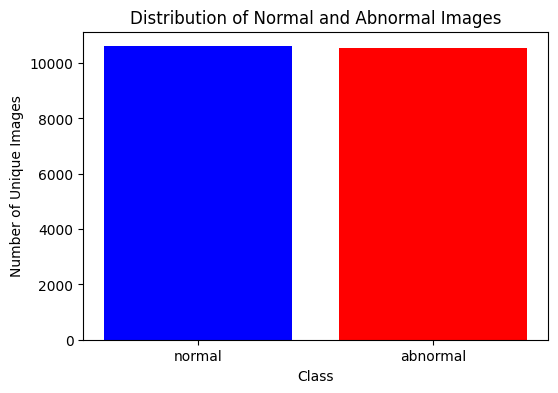

정상(Normal) 이미지 개수: 10606
비정상(Abnormal) 이미지 개수: 10564


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로
csv_path = "/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/last_train_augmented/last_train_augmented.csv"

# CSV 파일 로드
df = pd.read_csv(csv_path)

# 중복 제거 후 고유한 image_id 기준으로 정상/비정상 데이터 분포 확인
unique_df = df.drop_duplicates(subset=["image_id"])

# 'label' 컬럼 값 확인 (정상: "normal", 비정상: "abnormal")
if "label" not in unique_df.columns:
    print("❌ 'label' 컬럼이 존재하지 않습니다. CSV 파일을 확인하세요.")
else:
    # 정상/비정상 데이터 개수 계산
    label_counts = unique_df["label"].value_counts()

    # 시각화
    plt.figure(figsize=(6, 4))
    plt.bar(label_counts.index, label_counts.values, color=["blue", "red"])
    plt.xlabel("Class")
    plt.ylabel("Number of Unique Images")
    plt.title("Distribution of Normal and Abnormal Images")
    plt.show()

    # 개수 출력
    print(f"정상(Normal) 이미지 개수: {label_counts.get('normal', 0)}")
    print(f"비정상(Abnormal) 이미지 개수: {label_counts.get('abnormal', 0)}")

In [ ]:
import os

# 삭제할 폴더 경로 (last_train_augmented/images)
folder_path = "/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/last_train_augmented/images"

# 해당 폴더 내 CSV 파일 찾기
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):  # CSV 파일이면 삭제
        file_path = os.path.join(folder_path, file_name)
        os.remove(file_path)
        print(f"🗑 CSV 파일 삭제됨: {file_path}")

print("✅ CSV 파일 삭제 완료!")

# 최종

## Train / Val / Test 데이터 분할

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# CSV 로드
csv_path = "/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/filtered_data/filtered_train_df.csv"
df = pd.read_csv(csv_path)

# 데이터 분포 확인 (정상 / 비정상 비율 유지)
df["label"] = df["class_name"].apply(lambda x: 0 if x == "No finding" else 1)

# Train(80%) / Test(20%) 분할 (stratify 옵션으로 비율 유지)
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df["label"], random_state=42)

# Train을 다시 Train(90%) / Validation(10%)으로 분할
train_df, val_df = train_test_split(train_df, test_size=0.1, stratify=train_df["label"], random_state=42)

# 파일 저장
train_df.to_csv("/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/train_val_test/train/train.csv", index=False)
val_df.to_csv("/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/train_val_test/val/val.csv", index=False)
test_df.to_csv("/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/train_val_test/test/test.csv", index=False)

print(f"Train: {len(train_df)}, Val: {len(val_df)}, Test: {len(test_df)}")

Train: 39142, Val: 4350, Test: 10873


In [ ]:
import pandas as pd

# CSV 파일 경로 설정
train_csv_path = "/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/train_val_test/train/train.csv"

# CSV 로드
train_df = pd.read_csv(train_csv_path)

# image_id 기준으로 중복 제거 (각 이미지당 한 개의 레이블만 유지)
unique_train_df = train_df.drop_duplicates(subset=["image_id"])

# 정상(0) / 비정상(1) 데이터 개수 확인
label_counts = unique_train_df["label"].value_counts()

# 결과 출력
print("정상(0)과 비정상(1) 데이터 분포:")
print(label_counts)

정상(0)과 비정상(1) 데이터 분포:
label
0    10375
1     3263
Name: count, dtype: int64


## Train만 증강

In [ ]:
import pandas as pd
pd.read_csv("/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/train_val_test/train/train.csv")

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,width,height,label
0,7e86aee54688699519f47582c4d44bf3,Nodule/Mass,8,R10,0.843810,0.552684,0.874663,0.588801,2593,3018,1
1,0cd17ac8af6bb78438a190ec56085b71,No finding,14,R11,NaN,NaN,NaN,NaN,2336,2836,0
2,abc53b4a032de3231d80353c6f49e3a8,No finding,14,R13,NaN,NaN,NaN,NaN,2375,2826,0
3,c2c54eed2dd73e20ef0e5af5a4aa1feb,Pleural thickening,11,R9,0.663014,0.184425,0.724070,0.221593,2555,2825,1
4,17bf6589a34c41b8ae38e4942e70f92d,No finding,14,R1,NaN,NaN,NaN,NaN,2336,2836,0
...,...,...,...,...,...,...,...,...,...,...,...
39137,5562ea946b0ed8574dd20d05a001d6c4,Other lesion,9,R9,0.775089,0.267121,0.792939,0.288867,2521,3081,1
39138,848a8f3f7a4d210c2ee4901b0e07369a,No finding,14,R13,NaN,NaN,NaN,NaN,2375,2430,0
39139,bdeeec185619e393d3cbd8f532f95c15,Pulmonary fibrosis,13,R8,0.703125,0.223264,0.839410,0.441319,2304,2880,1
39140,d89ccf78c040252a66c9942cd95eb5d7,No finding,14,R7,NaN,NaN,NaN,NaN,2336,2836,0


In [ ]:
rm -rf "/content/train_augmented"

In [ ]:
import albumentations as A
import cv2
import numpy as np
import os
import pandas as pd
from tqdm import tqdm
import shutil

# ✅ 데이터 증강 파이프라인 설정
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.GaussianBlur(p=0.1),
    A.Rotate(limit=10, p=0.3),
], bbox_params=A.BboxParams(format="pascal_voc", label_fields=["class_name"], min_area=1, min_visibility=0.2))

# ✅ 경로 설정
train_csv_path = "/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/train_val_test/train/train.csv"
input_dir = "/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/filtered_data/filtered_images"
output_dir = "/content/train_augmented/images"
os.makedirs(output_dir, exist_ok=True)

# ✅ CSV 로드
train_df = pd.read_csv(train_csv_path)

# ✅ 정상(0) / 비정상(1) 데이터 확인
print("🔍 기존 라벨 값:", train_df["label"].unique())

# ✅ 비정상 X-ray 데이터만 필터링
abnormal_df = train_df[train_df["label"] == 1]

# ✅ 증강된 데이터 저장 리스트
augmented_images = []

# ✅ 증강 수행
for _, row in tqdm(abnormal_df.iterrows(), total=len(abnormal_df)):
    image_id = row["image_id"]
    image_path = os.path.join(input_dir, f"{image_id}.png")

    # 이미지 파일 확인
    if not os.path.exists(image_path):
        print(f"❌ 이미지 파일 없음: {image_path}")
        continue

    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"❌ 이미지 로드 실패: {image_path}")
        continue

    height, width = image.shape[:2]  # 이미지 크기 확인

    # ✅ 원본 바운딩 박스 가져오기
    bbox_rows = train_df[train_df["image_id"] == image_id]
    bboxes = []
    class_names = []

    for _, bbox_row in bbox_rows.iterrows():
        if pd.notna(bbox_row["x_min"]):
            # ✅ 정규화된 좌표 → 픽셀 좌표로 변환
            x_min = bbox_row["x_min"] * width
            y_min = bbox_row["y_min"] * height
            x_max = bbox_row["x_max"] * width
            y_max = bbox_row["y_max"] * height

            # ✅ 이미지 경계를 벗어나지 않도록 보정
            x_min = max(0, min(x_min, width))
            y_min = max(0, min(y_min, height))
            x_max = max(0, min(x_max, width))
            y_max = max(0, min(y_max, height))

            if x_max > x_min and y_max > y_min:  # 바운딩 박스 유효성 체크
                bboxes.append([x_min, y_min, x_max, y_max])
                class_names.append(bbox_row["class_name"])

    # ✅ 증강 수행 (각 이미지당 3회 추가 증강)
    for i in range(3):
        augmented = transform(image=image, bboxes=bboxes, class_name=class_names)

        aug_image = np.clip(augmented["image"], 0, 255).astype(np.uint8)
        new_image_name = f"{image_id}_aug_{i}.png"
        output_path = os.path.join(output_dir, new_image_name)

        # ✅ 바운딩 박스 좌표 검증 및 정규화
        valid_bboxes = []
        valid_class_names = []
        for bbox, class_name in zip(augmented["bboxes"], class_names):
            x_min, y_min, x_max, y_max = bbox

            # 다시 정규화 (0~1 사이)
            x_min /= width
            y_min /= height
            x_max /= width
            y_max /= height

            if 0 <= x_min < x_max <= 1 and 0 <= y_min < y_max <= 1:
                valid_bboxes.append([x_min, y_min, x_max, y_max])
                valid_class_names.append(class_name)

        # ✅ 바운딩 박스가 있는 경우에만 저장
        if len(valid_bboxes) > 0:
            cv2.imwrite(output_path, aug_image)
            for bbox, class_name in zip(valid_bboxes, valid_class_names):
                new_row = row.copy()
                new_row["image_id"] = new_image_name
                new_row["x_min"], new_row["y_min"], new_row["x_max"], new_row["y_max"] = bbox
                new_row["class_name"] = class_name
                augmented_images.append(new_row)

print("✅ 모든 비정상 X-ray 증강 완료!")

# ✅ 증강된 CSV 저장
augmented_train_csv_path = "/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/train_val_test/train/augmented_train.csv"
augmented_train_df = pd.concat([train_df, pd.DataFrame(augmented_images)], ignore_index=True)
augmented_train_df.to_csv(augmented_train_csv_path, index=False)

print(f"✅ 데이터 증강 완료! 새로운 Train CSV 저장됨: {augmented_train_csv_path}")

# ✅ 바운딩 박스 없는 증강 이미지 삭제
saved_image_files = set(os.listdir(output_dir))  # 저장된 모든 이미지 목록
valid_image_ids = set(pd.read_csv(augmented_train_csv_path)["image_id"].unique())  # CSV에 존재하는 image_id

for image_file in saved_image_files:
    if image_file not in valid_image_ids:
        os.remove(os.path.join(output_dir, image_file))  # CSV에서 제외된 이미지는 삭제

print(f"✅ 바운딩 박스 없는 이미지 삭제 완료! 남은 이미지 파일 개수: {len(valid_image_ids)}")

🔍 기존 라벨 값: [1 0]


  3%|▎         | 525/16234 [03:31<1:45:38,  2.48it/s]


KeyboardInterrupt: 

In [ ]:
import albumentations as A
import cv2
import numpy as np
import os
import pandas as pd
from tqdm import tqdm
import shutil

# ✅ 데이터 증강 파이프라인 설정
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.GaussianBlur(p=0.1),
    A.Rotate(limit=10, p=0.3),
], bbox_params=A.BboxParams(format="pascal_voc", label_fields=["class_name"], min_area=1, min_visibility=0.2))

# ✅ 경로 설정 (Google Drive → Colab 로컬 복사)
drive_train_csv_path = "/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/train_val_test/train/train.csv"
drive_input_dir = "/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/filtered_data/filtered_images"
drive_output_dir = "/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/train_val_test/train/augmented_images"
drive_augmented_csv_path = "/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/train_val_test/train/augmented_train.csv"

# ✅ Colab 로컬 경로 설정
local_train_csv_path = "/content/train.csv"
local_input_dir = "/content/local_images"
local_output_dir = "/content/train_augmented/images"
os.makedirs(local_output_dir, exist_ok=True)

# ✅ Google Drive → Colab 로컬로 데이터 복사 (속도 개선)
print("📂 Google Drive에서 로컬로 데이터 복사 중...")
!cp "$drive_train_csv_path" "$local_train_csv_path"
!cp -r "$drive_input_dir" "$local_input_dir"

# ✅ CSV 로드
train_df = pd.read_csv(local_train_csv_path)

# ✅ 정상(0) / 비정상(1) 데이터 확인
print("🔍 기존 라벨 값:", train_df["label"].unique())

# ✅ 비정상 X-ray 데이터만 필터링
abnormal_df = train_df[train_df["label"] == 1]

# ✅ 증강된 데이터 저장 리스트
augmented_images = []

# ✅ 증강 수행
for _, row in tqdm(abnormal_df.iterrows(), total=len(abnormal_df)):
    image_id = row["image_id"]
    image_path = os.path.join(local_input_dir, f"{image_id}.png")

    # 이미지 파일 확인
    if not os.path.exists(image_path):
        print(f"❌ 이미지 파일 없음: {image_path}")
        continue

    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"❌ 이미지 로드 실패: {image_path}")
        continue

    height, width = image.shape[:2]  # 이미지 크기 확인

    # ✅ 원본 바운딩 박스 가져오기
    bbox_rows = train_df[train_df["image_id"] == image_id]
    bboxes = []
    class_names = []

    for _, bbox_row in bbox_rows.iterrows():
        if pd.notna(bbox_row["x_min"]):
            # ✅ 정규화된 좌표 → 픽셀 좌표로 변환
            x_min = bbox_row["x_min"] * width
            y_min = bbox_row["y_min"] * height
            x_max = bbox_row["x_max"] * width
            y_max = bbox_row["y_max"] * height

            # ✅ 이미지 경계를 벗어나지 않도록 보정
            x_min = max(0, min(x_min, width))
            y_min = max(0, min(y_min, height))
            x_max = max(0, min(x_max, width))
            y_max = max(0, min(y_max, height))

            if x_max > x_min and y_max > y_min:  # 바운딩 박스 유효성 체크
                bboxes.append([x_min, y_min, x_max, y_max])
                class_names.append(bbox_row["class_name"])

    # ✅ 증강 수행 (각 이미지당 3회 추가 증강)
    for i in range(3):
        augmented = transform(image=image, bboxes=bboxes, class_name=class_names)

        aug_image = np.clip(augmented["image"], 0, 255).astype(np.uint8)
        new_image_name = f"{image_id}_aug_{i}.png"
        output_path = os.path.join(local_output_dir, new_image_name)

        # ✅ 바운딩 박스 좌표 검증 및 정규화
        valid_bboxes = []
        valid_class_names = []
        for bbox, class_name in zip(augmented["bboxes"], class_names):
            x_min, y_min, x_max, y_max = bbox

            # 다시 정규화 (0~1 사이)
            x_min /= width
            y_min /= height
            x_max /= width
            y_max /= height

            if 0 <= x_min < x_max <= 1 and 0 <= y_min < y_max <= 1:
                valid_bboxes.append([x_min, y_min, x_max, y_max])
                valid_class_names.append(class_name)

        # ✅ 바운딩 박스가 있는 경우에만 저장
        if len(valid_bboxes) > 0:
            cv2.imwrite(output_path, aug_image)
            for bbox, class_name in zip(valid_bboxes, valid_class_names):
                new_row = row.copy()
                new_row["image_id"] = new_image_name
                new_row["x_min"], new_row["y_min"], new_row["x_max"], new_row["y_max"] = bbox
                new_row["class_name"] = class_name
                augmented_images.append(new_row)

print("✅ 모든 비정상 X-ray 증강 완료!")

# ✅ 증강된 CSV 저장 (로컬에 먼저 저장)
local_augmented_csv_path = "/content/augmented_train.csv"
augmented_train_df = pd.concat([train_df, pd.DataFrame(augmented_images)], ignore_index=True)
augmented_train_df.to_csv(local_augmented_csv_path, index=False)

print(f"✅ 데이터 증강 완료! 새로운 Train CSV 저장됨: {local_augmented_csv_path}")

# ✅ Google Drive로 최종 데이터 복사 (Colab → Drive)
print("📂 Google Drive로 증강된 데이터 저장 중...")
!cp "$local_augmented_csv_path" "$drive_augmented_csv_path"
!cp -r "$local_output_dir" "$drive_output_dir"

print("✅ 최적화 완료! Google Drive에 저장됨.")

📂 Google Drive에서 로컬로 데이터 복사 중...
^C
🔍 기존 라벨 값: [1 0]


  1%|          | 167/16234 [00:27<07:16, 36.78it/s]

❌ 이미지 로드 실패: /content/local_images/9598f874069cca35ff56d54925d35ccb.png
❌ 이미지 파일 없음: /content/local_images/9b1d076abcb937c2e19f7c2e10dbcbc0.png
❌ 이미지 파일 없음: /content/local_images/5955a4d3f94e8125db08141bd25a6824.png
❌ 이미지 파일 없음: /content/local_images/5fb44599ac9e8866dc107e366467cafc.png
❌ 이미지 파일 없음: /content/local_images/357b22f02be38869ae859f0add02b898.png
❌ 이미지 파일 없음: /content/local_images/da8a1f7ff197b044c9080c8ad34b1df2.png
❌ 이미지 파일 없음: /content/local_images/f7f461c0aaa21762f7e9e7e1e7b24dc9.png
❌ 이미지 파일 없음: /content/local_images/3911f0e97683eb279550e59ad3213da0.png
❌ 이미지 파일 없음: /content/local_images/9e90a23fb8d5ce13eb766d538afcafea.png
❌ 이미지 파일 없음: /content/local_images/55e39b1282cde6796b82c6b5019a1fb8.png
❌ 이미지 파일 없음: /content/local_images/0ea4221d568ab487af7c433a3df6307e.png
❌ 이미지 파일 없음: /content/local_images/368befaff55745e30b3f200b298b2fd6.png
❌ 이미지 파일 없음: /content/local_images/c47bf1efb40dc9e8eb8975abcb539ab8.png
❌ 이미지 파일 없음: /content/local_images/44999de3c6dd3312011578cdbfc71

  1%|▏         | 225/16234 [00:27<02:13, 119.94it/s]

❌ 이미지 파일 없음: /content/local_images/25c278c9f3eac8a0f53780aa5e615e23.png
❌ 이미지 파일 없음: /content/local_images/5895fa847d7ce6fbc0c1ad1ca998b613.png
❌ 이미지 파일 없음: /content/local_images/c201c69926e59f0c1dfeeeb8365ff05a.png
❌ 이미지 파일 없음: /content/local_images/b48d6f9b38b698b6ac534ec7ded5c4e8.png
❌ 이미지 파일 없음: /content/local_images/b08d54426c6af35ea469ecb63d047fbc.png
❌ 이미지 파일 없음: /content/local_images/e1d60fdb0e8b11d6198093e11afb562b.png
❌ 이미지 파일 없음: /content/local_images/7c5f3e2c0518bba6ca3464c385d4787c.png
❌ 이미지 파일 없음: /content/local_images/1d36704fc4f9a8f997128b92551bbc4d.png
❌ 이미지 파일 없음: /content/local_images/1dafb16f8c69e188cf2152200e0cb2ef.png
❌ 이미지 파일 없음: /content/local_images/15b164c54f0bf0baac308b47a45a1468.png
❌ 이미지 파일 없음: /content/local_images/67923e1fdac310042f5feb9f788839bf.png
❌ 이미지 파일 없음: /content/local_images/de4ab903cee751d979e2a7c14f51500f.png
❌ 이미지 파일 없음: /content/local_images/a1058b4368a7e3d945757f218393baf9.png
❌ 이미지 파일 없음: /content/local_images/a3106645d9ff642b102c1fae08356

  2%|▏         | 283/16234 [00:27<01:42, 155.05it/s]

❌ 이미지 파일 없음: /content/local_images/070d087c1badb18ee110e19cbe158a40.png
❌ 이미지 파일 없음: /content/local_images/353564207b9d09b26db607c43d99ce18.png
❌ 이미지 파일 없음: /content/local_images/046ad82db74a4155eaff3586b0d1e068.png
❌ 이미지 파일 없음: /content/local_images/b01037a08ba72220deddf845bfd02466.png
❌ 이미지 파일 없음: /content/local_images/14c5c3e0782fd77750815c5d2b565e72.png
❌ 이미지 파일 없음: /content/local_images/6312578be73812b1634727a012980bc6.png
❌ 이미지 파일 없음: /content/local_images/a5a2a3b02ccb9c3145d553d269e4b0b8.png
❌ 이미지 파일 없음: /content/local_images/764eeaca1e91f7410e68f3daf40de6ab.png
❌ 이미지 파일 없음: /content/local_images/1ed4cf45940bbfbcdc31cf4289c1c1e4.png
❌ 이미지 파일 없음: /content/local_images/cff98ac92877ed0954dad4fefb125d1e.png
❌ 이미지 파일 없음: /content/local_images/51b168d29879c8972aa29d9f31f4b00c.png
❌ 이미지 파일 없음: /content/local_images/34c1f477c3cdd534ef53de3c832f1ac4.png
❌ 이미지 파일 없음: /content/local_images/2ebb05b4c603d590854c621fa4f1fd5c.png
❌ 이미지 파일 없음: /content/local_images/fe90142bc4523ef5e2413ba94415e

  2%|▏         | 299/16234 [00:28<01:50, 143.85it/s]

❌ 이미지 파일 없음: /content/local_images/2f35a721ceb1f89cbbd33ade57b32f4e.png
❌ 이미지 파일 없음: /content/local_images/5a58e4e711cccb78407ae86820d643d0.png
❌ 이미지 파일 없음: /content/local_images/8b32bb8de86a0f89db7241a3de5eb5c2.png
❌ 이미지 파일 없음: /content/local_images/f1c4779f16c3ebad57ecb73dcf2a2c1d.png
❌ 이미지 파일 없음: /content/local_images/2534b21e1fcdf7748a07109999952840.png
❌ 이미지 파일 없음: /content/local_images/6d5acf3f8a973a26844d617fffe72998.png
❌ 이미지 파일 없음: /content/local_images/a5beb1c44c49e97f1f46e5071c5c38e8.png
❌ 이미지 파일 없음: /content/local_images/2592036272857648c597c9045a6588d1.png
❌ 이미지 파일 없음: /content/local_images/98dca7e62a4f2d47455b9a275fa75a08.png
❌ 이미지 파일 없음: /content/local_images/6d55788f759da917cf8b89f300764dee.png
❌ 이미지 파일 없음: /content/local_images/7cc9b48563e197c84ec4ee8d30d5b3ce.png
❌ 이미지 파일 없음: /content/local_images/28ff3d4ede34ff71de27c9091b25fc44.png


  2%|▏         | 326/16234 [00:28<02:41, 98.50it/s] 

❌ 이미지 파일 없음: /content/local_images/5b2e28bd44d10e3e10605d0d95ffba22.png
❌ 이미지 파일 없음: /content/local_images/3cdce1131cdbbbc959330bb08be55a3d.png
❌ 이미지 파일 없음: /content/local_images/cc9a84f1f3942ceb845c5f174e5b70cd.png
❌ 이미지 파일 없음: /content/local_images/c3abe21f7e07452e6760cdc2cab95296.png
❌ 이미지 파일 없음: /content/local_images/316b07c8233162f6c57b23d94b823ea8.png
❌ 이미지 파일 없음: /content/local_images/424c14b6f0a526ca2e8b4e9be9f70e03.png
❌ 이미지 파일 없음: /content/local_images/0b7995c5e532803dc1bd077eaa4d2a01.png
❌ 이미지 파일 없음: /content/local_images/b22bd21cfb3258bad7d934f036c34b5b.png
❌ 이미지 파일 없음: /content/local_images/d7242fc163c07f6d286ed049914d962e.png
❌ 이미지 파일 없음: /content/local_images/cfe3e67ca5f8235d64e51416a26e70cc.png
❌ 이미지 파일 없음: /content/local_images/58e1820f96aa84a141c9e217c46dfe71.png
❌ 이미지 파일 없음: /content/local_images/efc7bc78ce88e95191fdab525f974c24.png
❌ 이미지 파일 없음: /content/local_images/38ab2d3283b496d60dc137e94d16b7c6.png
❌ 이미지 파일 없음: /content/local_images/41981decf2f67490e917ab06a55a6

  2%|▏         | 345/16234 [00:29<04:33, 58.15it/s]

❌ 이미지 파일 없음: /content/local_images/a946684583c7bf346b18e1d69d17e9cf.png
❌ 이미지 파일 없음: /content/local_images/43cbc92d48a9318036e947277c3981fd.png
❌ 이미지 파일 없음: /content/local_images/363dc405e14ed95659d88707f54730de.png
❌ 이미지 파일 없음: /content/local_images/9d9caa9e06ec349f19f871e3fe2f343a.png
❌ 이미지 파일 없음: /content/local_images/d56fd281ce49dd0ed4dfcf1d72ca78d0.png
❌ 이미지 파일 없음: /content/local_images/7df5c81873c74ecc40610a1ad4eb2943.png
❌ 이미지 파일 없음: /content/local_images/43c1e275bc208f31cc3b1a6c8fda1ea7.png
❌ 이미지 파일 없음: /content/local_images/9e03a12bdc2f03b99a92662e992ea810.png
❌ 이미지 파일 없음: /content/local_images/78e8eee238eeb6f386be08ece092167c.png
❌ 이미지 파일 없음: /content/local_images/0b0e106a53f9dc3b28a9b15f94510b7a.png
❌ 이미지 파일 없음: /content/local_images/3bf8346b7d5b0743713624143004772f.png
❌ 이미지 파일 없음: /content/local_images/7db70125d7739e6cd0c442e7b7592d4c.png
❌ 이미지 파일 없음: /content/local_images/71a5a3f60976a7b46875a26dfd7a669e.png
❌ 이미지 파일 없음: /content/local_images/26585204e3c296a3b105bd5bd1c53

  2%|▏         | 374/16234 [00:29<03:34, 73.90it/s]

❌ 이미지 파일 없음: /content/local_images/14a097373f1e4e57878c3929fd2f3b4e.png
❌ 이미지 파일 없음: /content/local_images/2285e92d66a166fa72444a73f4c5fc52.png
❌ 이미지 파일 없음: /content/local_images/bc7483c563cf172e46390a235cdc63b9.png
❌ 이미지 파일 없음: /content/local_images/353564207b9d09b26db607c43d99ce18.png
❌ 이미지 파일 없음: /content/local_images/4b56bc6d22b192f075f13231419dfcc8.png
❌ 이미지 파일 없음: /content/local_images/4fa30afdf5d4bbfcfd9071e2a56e7a4b.png
❌ 이미지 파일 없음: /content/local_images/d2de60c06501603f1d4842fa71808636.png
❌ 이미지 파일 없음: /content/local_images/ca72b54e1dc0ba04d64631ccd30acb9d.png
❌ 이미지 파일 없음: /content/local_images/1730d2ebd1cc96e9e5656cdf916ac7f8.png
❌ 이미지 파일 없음: /content/local_images/3b887c0550e9722c9b86b7c22ad09e11.png
❌ 이미지 파일 없음: /content/local_images/23f267e42a7e9f496aa143fe11f241ff.png
❌ 이미지 파일 없음: /content/local_images/402499b5db5c7e4d68f3024f6a43d819.png
❌ 이미지 파일 없음: /content/local_images/7d0e636b3ef2ccbb0c67b3243a1478ce.png
❌ 이미지 파일 없음: /content/local_images/352ab0683046ce107942e9e477007

  2%|▏         | 383/16234 [00:29<04:54, 53.82it/s]

❌ 이미지 파일 없음: /content/local_images/8a7ca215a9c86fb9a1352de720c182f3.png
❌ 이미지 파일 없음: /content/local_images/86c1b099be1f08120cdc722e88738dc0.png
❌ 이미지 파일 없음: /content/local_images/26fcfa2a147cabce7658e1ea656e1efe.png
❌ 이미지 파일 없음: /content/local_images/27b822c5d3b354f096dfb788fd3fa636.png
❌ 이미지 파일 없음: /content/local_images/1fce42f55a0de66eb161fc831cd33cc3.png


  2%|▏         | 404/16234 [00:29<03:58, 66.50it/s]

❌ 이미지 파일 없음: /content/local_images/499bf22f9d6aba3f7da0609d935c9e1d.png
❌ 이미지 파일 없음: /content/local_images/5562ea946b0ed8574dd20d05a001d6c4.png
❌ 이미지 파일 없음: /content/local_images/bd3fe876153eeddad8bab49b129ea081.png
❌ 이미지 파일 없음: /content/local_images/be85b7d55e0ef589729ef4dd6ffc38fb.png
❌ 이미지 파일 없음: /content/local_images/63af905bd663fe539c2b6c3190dd222d.png
❌ 이미지 파일 없음: /content/local_images/86c1b099be1f08120cdc722e88738dc0.png
❌ 이미지 파일 없음: /content/local_images/0c2079e62ddfb06a8a5300cefaa3a970.png
❌ 이미지 파일 없음: /content/local_images/f591f6e017545ab779d1e88735340128.png
❌ 이미지 파일 없음: /content/local_images/159c46115f7d74337f83074f1b99114d.png
❌ 이미지 파일 없음: /content/local_images/0061cf6d35e253b6e7f03940592cc35e.png
❌ 이미지 파일 없음: /content/local_images/606147f7461d5d7642f887d6b1b9d16b.png
❌ 이미지 파일 없음: /content/local_images/b3d1eabc4bb5b66d92f3fae7ddb67b29.png
❌ 이미지 파일 없음: /content/local_images/d617b24dad98aa3b1f2d645828095355.png
❌ 이미지 파일 없음: /content/local_images/24aae4c9a587c5f0440e6d305bebd

  3%|▎         | 470/16234 [00:30<01:47, 147.24it/s]

❌ 이미지 파일 없음: /content/local_images/ddec878b93cd18918c2b81bca339a5e9.png
❌ 이미지 파일 없음: /content/local_images/7e6c0dc72fa1db4a501f7ac5f6aac040.png
❌ 이미지 파일 없음: /content/local_images/aad2e740715e926cee0a56a56efa26db.png
❌ 이미지 파일 없음: /content/local_images/e5d63ef8a922c6775c51ce9b511235b9.png
❌ 이미지 파일 없음: /content/local_images/df2e21b90ce0510ed66e161136cf60ad.png
❌ 이미지 파일 없음: /content/local_images/cc9a84f1f3942ceb845c5f174e5b70cd.png
❌ 이미지 파일 없음: /content/local_images/d59d5dcc1601a29509f91dab5f8550bc.png
❌ 이미지 파일 없음: /content/local_images/9a6377016b455cd0f2b6e64bf1af6cc7.png
❌ 이미지 파일 없음: /content/local_images/e9e1a8854e0bec89e37445f9cbf7bb95.png
❌ 이미지 파일 없음: /content/local_images/cdbd07a6e9e17958d4cafd4278872806.png
❌ 이미지 파일 없음: /content/local_images/e96d18f0d425aaedc12782dc33aec7a4.png
❌ 이미지 파일 없음: /content/local_images/0ed4c066492aaa2e6f1772b84417e20f.png
❌ 이미지 파일 없음: /content/local_images/e67e91b27935a01b738eaa01ede863fd.png
❌ 이미지 파일 없음: /content/local_images/8573fa95ec3defbe2dec45d85a509

  3%|▎         | 501/16234 [00:30<02:29, 104.99it/s]

❌ 이미지 파일 없음: /content/local_images/7f5eab5de5307d4ae8e2a0fa99c0b41a.png
❌ 이미지 파일 없음: /content/local_images/2ba459709d0d25824e0baf9f6d4f94e6.png
❌ 이미지 파일 없음: /content/local_images/c6c19cc8f966c6353e663a4e299d9a39.png
❌ 이미지 파일 없음: /content/local_images/b76cca59757045fa3cedad238c878354.png
❌ 이미지 파일 없음: /content/local_images/c8634131ee43469be8f4f75ab4595b10.png
❌ 이미지 파일 없음: /content/local_images/d5eaa2c2ae8e05956394f24470224843.png
❌ 이미지 파일 없음: /content/local_images/8ac12a69ad57ca73535e04b6cfba5edb.png
❌ 이미지 파일 없음: /content/local_images/1d21c69075630b741fe0629e696fa167.png
❌ 이미지 파일 없음: /content/local_images/0abd4fc2425edd5c2efb2c149e9319c6.png
❌ 이미지 파일 없음: /content/local_images/c09a2d6a72b0f14763619224335d685e.png
❌ 이미지 파일 없음: /content/local_images/87f7997c901c0026e338e6f6d79b385f.png
❌ 이미지 파일 없음: /content/local_images/2f3f84ed97b4ae346a990e843d929f9d.png
❌ 이미지 파일 없음: /content/local_images/24c408efe011f2d27322e93440221aa1.png
❌ 이미지 파일 없음: /content/local_images/1cb2f31d6914dbb6550d2ed5538fc

  3%|▎         | 513/16234 [00:31<03:23, 77.39it/s] 

❌ 이미지 파일 없음: /content/local_images/980cbaa4ca9127c95c7a24cfa7b08598.png
❌ 이미지 파일 없음: /content/local_images/39095bfc67751891aebabdeeb8b89f5a.png
❌ 이미지 파일 없음: /content/local_images/62071e073320c21515baab6e5c55ddf8.png
❌ 이미지 파일 없음: /content/local_images/a95d641ac8ee1a9f186cd0b8c0dca7ef.png
❌ 이미지 파일 없음: /content/local_images/d3637a1935a905b3c326af31389cb846.png
❌ 이미지 파일 없음: /content/local_images/db8d818bc4047e5c02af17c31bb78009.png
❌ 이미지 파일 없음: /content/local_images/44ca3d27effe04ec7ac6e46ef63099b5.png
❌ 이미지 파일 없음: /content/local_images/db65300cb20b50abb1e3b30f908ef3e0.png
❌ 이미지 파일 없음: /content/local_images/a99a720cab88405baaf789e85ce20c45.png
❌ 이미지 파일 없음: /content/local_images/ec7572df0f93d21860c5dc1147d1393b.png
❌ 이미지 파일 없음: /content/local_images/bbac60d6c7695f5eeccb56cb56336f6d.png
❌ 이미지 파일 없음: /content/local_images/09f0b00bd079304f72c079d369925aee.png
❌ 이미지 파일 없음: /content/local_images/6bfb85750420c5ee853ad5372dcfbd76.png
❌ 이미지 파일 없음: /content/local_images/9b12521fa480b7872a66995a796f0

  3%|▎         | 533/16234 [00:31<03:33, 73.70it/s]

❌ 이미지 파일 없음: /content/local_images/f69a67703fe0e5e5bd9535025fbff414.png
❌ 이미지 파일 없음: /content/local_images/51b32791c77b71fca56fc28f10ce770c.png
❌ 이미지 파일 없음: /content/local_images/33c856f133a5a726ffc26fe36d451518.png
❌ 이미지 파일 없음: /content/local_images/68194ba7f002feafff03a21625a07305.png
❌ 이미지 파일 없음: /content/local_images/708249b5f1cff1ae05f850da5fc2b625.png
❌ 이미지 파일 없음: /content/local_images/8573fa95ec3defbe2dec45d85a5093a1.png
❌ 이미지 파일 없음: /content/local_images/414615baf78e32f3405cbcf5b742895d.png
❌ 이미지 파일 없음: /content/local_images/cd33be932bca447f6bf5b83b03018806.png
❌ 이미지 파일 없음: /content/local_images/5c236bd87dff8c15d259c70b842620aa.png
❌ 이미지 파일 없음: /content/local_images/3156b5feb62ed8cfdafef21f1f82a6c1.png
❌ 이미지 파일 없음: /content/local_images/ee3b2a3399a40af7703ce312d43df635.png
❌ 이미지 파일 없음: /content/local_images/fa109c087e46fe1ea27e48ce6d154d2f.png
❌ 이미지 파일 없음: /content/local_images/e60ce67640c934d4fb3bcac5b334983d.png
❌ 이미지 파일 없음: /content/local_images/ad2a12be7e44277e041c435e8b526

  3%|▎         | 565/16234 [00:31<03:32, 73.72it/s]

❌ 이미지 파일 없음: /content/local_images/3312ab0661750f9899b4589eae97731a.png
❌ 이미지 파일 없음: /content/local_images/3c0343764fd0e6b3edb40b15740a597e.png
❌ 이미지 파일 없음: /content/local_images/82c8e033e6fde13b0bf365370407d342.png
❌ 이미지 파일 없음: /content/local_images/80615519a6e4a619f88f76994b4a05ad.png
❌ 이미지 파일 없음: /content/local_images/a3411581087b63a70a2bdba24e55ff4e.png
❌ 이미지 파일 없음: /content/local_images/d617b24dad98aa3b1f2d645828095355.png
❌ 이미지 파일 없음: /content/local_images/27179c32f1a5d2b20d5a289372823554.png
❌ 이미지 파일 없음: /content/local_images/2ad18a594cbaf3c6d6145a7775829554.png
❌ 이미지 파일 없음: /content/local_images/30303a4b9ba969bea4e676cbd4a2496c.png
❌ 이미지 파일 없음: /content/local_images/e1e596163010acb347ac7fa1a48d8d9c.png
❌ 이미지 파일 없음: /content/local_images/fbbc76c4db97f2f7caa7926655f13d32.png
❌ 이미지 파일 없음: /content/local_images/1b3379be7c72c3ae5404df423ed74388.png
❌ 이미지 파일 없음: /content/local_images/88bf02cc510da5050a869c290d8f8565.png
❌ 이미지 파일 없음: /content/local_images/16bd4511e7391b3e3d7da90b6c265

  4%|▎         | 602/16234 [00:31<02:20, 111.52it/s]

❌ 이미지 파일 없음: /content/local_images/83e7cd905776606181931c7b695db12f.png
❌ 이미지 파일 없음: /content/local_images/55e39b1282cde6796b82c6b5019a1fb8.png
❌ 이미지 파일 없음: /content/local_images/b821bbaa6723f749a915b00b94a69977.png
❌ 이미지 파일 없음: /content/local_images/a6bcb9f5d59588d699c5aa83cd3039c7.png
❌ 이미지 파일 없음: /content/local_images/1812172c7ad3771c05d1238bb3066217.png
❌ 이미지 파일 없음: /content/local_images/5879d22d9f6aec0ba5d682bcc6131e22.png
❌ 이미지 파일 없음: /content/local_images/008b3176a7248a0a189b5731ac8d2e95.png
❌ 이미지 파일 없음: /content/local_images/a45407e8b1daab75a1217b65de60c29d.png
❌ 이미지 파일 없음: /content/local_images/dff6766d2464bfe77de7f6f19edbf51a.png
❌ 이미지 파일 없음: /content/local_images/bd3fe876153eeddad8bab49b129ea081.png
❌ 이미지 파일 없음: /content/local_images/1cb2f31d6914dbb6550d2ed5538fc184.png
❌ 이미지 파일 없음: /content/local_images/055ea315ae13148aae178aed27fa980d.png
❌ 이미지 파일 없음: /content/local_images/37054193bd4e6a2f3ca764088913b0f0.png
❌ 이미지 파일 없음: /content/local_images/5938d1edca572c6168c83190a35b4

  4%|▍         | 635/16234 [00:32<02:10, 119.77it/s]

❌ 이미지 파일 없음: /content/local_images/aefca6fbdab82ce59b2c7cceed75d062.png


  4%|▍         | 648/16234 [00:32<03:01, 86.08it/s] 

❌ 이미지 파일 없음: /content/local_images/877a53d035ddd0a518cb4c08f7f0d962.png
❌ 이미지 파일 없음: /content/local_images/34557d39d42d74a3355d509f340cfc8a.png
❌ 이미지 파일 없음: /content/local_images/023a8b8557d1fd59f272c63be6f3d4c0.png
❌ 이미지 파일 없음: /content/local_images/c797ab3749e39389929f6b188eee412e.png
❌ 이미지 파일 없음: /content/local_images/bd3fe876153eeddad8bab49b129ea081.png
❌ 이미지 파일 없음: /content/local_images/0c577dc6594dab44ebbd6964de673eaa.png
❌ 이미지 파일 없음: /content/local_images/236c84dba2293e1afd669eee1b6511c6.png
❌ 이미지 파일 없음: /content/local_images/033e1637bed9b9f3dccac9c6c419adc2.png
❌ 이미지 파일 없음: /content/local_images/d106ec9b305178f3da060efe3191499a.png
❌ 이미지 파일 없음: /content/local_images/e2aac840e7e6f54e6fe0003c60c51c57.png
❌ 이미지 파일 없음: /content/local_images/3312ab0661750f9899b4589eae97731a.png
❌ 이미지 파일 없음: /content/local_images/4e0856fe29f4d2eecc45dcac43c39c1e.png
❌ 이미지 파일 없음: /content/local_images/6f81359c392e30ddea9260b22d732e69.png
❌ 이미지 파일 없음: /content/local_images/5714aea8b5a2d9b030196646842a6

  4%|▍         | 669/16234 [00:32<03:10, 81.80it/s]

❌ 이미지 파일 없음: /content/local_images/c978cdb3275ab78fe11929e145dedab2.png
❌ 이미지 파일 없음: /content/local_images/ae3382840414ce4de46c3827674b9709.png
❌ 이미지 파일 없음: /content/local_images/2f5a3aa315379bb01b8b4c9a1ece8e2e.png
❌ 이미지 파일 없음: /content/local_images/88e33acc19c4296385bb217cf333d8ce.png
❌ 이미지 파일 없음: /content/local_images/8d6a0dcadf3c7322e146e729f4ac4ebf.png
❌ 이미지 파일 없음: /content/local_images/5766dfc49e91557e8cd4a06a406b8890.png
❌ 이미지 파일 없음: /content/local_images/ddff143851d1399b550480a41b4c6fe2.png
❌ 이미지 파일 없음: /content/local_images/39c0cec7df2082421f852bc79cb333a1.png
❌ 이미지 파일 없음: /content/local_images/2546f825d7846960568c710eab2cbbd3.png
❌ 이미지 파일 없음: /content/local_images/0005e8e3701dfb1dd93d53e2ff537b6e.png
❌ 이미지 파일 없음: /content/local_images/bbc8cca2bda1c6bc5b66715a12830d78.png
❌ 이미지 파일 없음: /content/local_images/d1605d4007fbbdbec96acce4a834d10b.png
❌ 이미지 파일 없음: /content/local_images/7fa31ce0f6768ace9e8b25d1240feda0.png
❌ 이미지 파일 없음: /content/local_images/bd3fe876153eeddad8bab49b129ea

  4%|▍         | 695/16234 [00:33<03:02, 85.37it/s]

❌ 이미지 파일 없음: /content/local_images/de4ab903cee751d979e2a7c14f51500f.png
❌ 이미지 파일 없음: /content/local_images/15c3fc505c414c69ba757cb3be3ed213.png
❌ 이미지 파일 없음: /content/local_images/1e685beca49d62411bb69bc4ddf7ad11.png
❌ 이미지 파일 없음: /content/local_images/45d77bbb17ed1131a96b6fa31327a9de.png
❌ 이미지 파일 없음: /content/local_images/36fb9803c515de8b2b44028af25662ec.png
❌ 이미지 파일 없음: /content/local_images/985be77c13eb905ee8e19a45e46ab785.png
❌ 이미지 파일 없음: /content/local_images/09f9a62fceffacc4d062a7fe24a626b8.png
❌ 이미지 파일 없음: /content/local_images/22807ea675967a02baf8f510543a4a95.png
❌ 이미지 파일 없음: /content/local_images/9fd7f8bc66d606ffee290028c4d5d1f3.png
❌ 이미지 파일 없음: /content/local_images/02617da0a33fe0446a508186417c2646.png
❌ 이미지 파일 없음: /content/local_images/7db70125d7739e6cd0c442e7b7592d4c.png
❌ 이미지 파일 없음: /content/local_images/ab8276dba30d7268b96c07a0fff9bbdb.png
❌ 이미지 파일 없음: /content/local_images/18b362567e282e3ada32ee486ea6bad1.png
❌ 이미지 파일 없음: /content/local_images/f89143595274fa6016f6eec550442

  4%|▍         | 720/16234 [00:33<02:54, 88.96it/s]

❌ 이미지 파일 없음: /content/local_images/bdd8423e5deae0ae5dc7e0547887fafc.png
❌ 이미지 파일 없음: /content/local_images/4eed7a6bb03888eade13343f141dd5c8.png
❌ 이미지 파일 없음: /content/local_images/0c5ff01c7bfb4362fcd98f36e555b08c.png
❌ 이미지 파일 없음: /content/local_images/bdd8423e5deae0ae5dc7e0547887fafc.png
❌ 이미지 파일 없음: /content/local_images/07ac9545dcc585901865f7f958a7857d.png
❌ 이미지 파일 없음: /content/local_images/dad083d8150288db33157fde49ab35f9.png
❌ 이미지 파일 없음: /content/local_images/05721adb43ab7c061733568b274c006b.png
❌ 이미지 파일 없음: /content/local_images/f233f426d24061d9584932e52bfdbd49.png
❌ 이미지 파일 없음: /content/local_images/830d05f396b604388e2d7b68d79a6bbf.png
❌ 이미지 파일 없음: /content/local_images/9d740f84910f8b7f0bfb870f8f4ad8b1.png
❌ 이미지 파일 없음: /content/local_images/4e7fe9cc13468517b324743c8c8b7b40.png
❌ 이미지 파일 없음: /content/local_images/708249b5f1cff1ae05f850da5fc2b625.png
❌ 이미지 파일 없음: /content/local_images/305e4add9c72c91e9984305bf4e85aee.png
❌ 이미지 파일 없음: /content/local_images/f4d7d5de6fbfafb222c389fb23251

  5%|▍         | 775/16234 [00:33<02:24, 107.04it/s]

❌ 이미지 파일 없음: /content/local_images/ef85cda3a115da5e7399342ac986d489.png
❌ 이미지 파일 없음: /content/local_images/f351e56a857e49f1e5c12b0fbd43db98.png
❌ 이미지 파일 없음: /content/local_images/77d6928016b9ddbb311fe1653289790e.png
❌ 이미지 파일 없음: /content/local_images/902ff31bc097877d97df0921ca238aa3.png
❌ 이미지 파일 없음: /content/local_images/0e093fa90e5be5666cd396d722cc84ac.png
❌ 이미지 파일 없음: /content/local_images/afe9c9c0bcc2c72f4fab87d9bc63cc8e.png
❌ 이미지 파일 없음: /content/local_images/27b822c5d3b354f096dfb788fd3fa636.png
❌ 이미지 파일 없음: /content/local_images/e652b2cebae0a6c74e292b3112d29e6e.png
❌ 이미지 파일 없음: /content/local_images/4c4cf43e7c8529c430c1d1295fee1784.png
❌ 이미지 파일 없음: /content/local_images/807797c8ef120370d45796ed35260d81.png
❌ 이미지 파일 없음: /content/local_images/4b8c24a1eaeabd898c28a92d25cc3632.png
❌ 이미지 파일 없음: /content/local_images/e82cedee4afa9651a7bd0d57a23280f2.png
❌ 이미지 파일 없음: /content/local_images/7653a1c4431f1929ae8c73588e39b8d5.png
❌ 이미지 파일 없음: /content/local_images/7841614f51ed3dfd1c3177a52493c

  5%|▌         | 814/16234 [00:34<02:48, 91.39it/s]

❌ 이미지 파일 없음: /content/local_images/acc6529ff7e03c2a225fd1ddb5319db8.png
❌ 이미지 파일 없음: /content/local_images/5a0fbc7c40ea94bef4c8342d47c05b26.png
❌ 이미지 파일 없음: /content/local_images/37054193bd4e6a2f3ca764088913b0f0.png
❌ 이미지 파일 없음: /content/local_images/1e1dcf1ea1d974a5fea81b7616a11723.png
❌ 이미지 파일 없음: /content/local_images/8111591b7fea74653fbd7e935a74cf36.png
❌ 이미지 파일 없음: /content/local_images/616f7784ae537b00b14617a57b53de73.png
❌ 이미지 파일 없음: /content/local_images/d791f10dbcb0ab7c0c34dafd2fdf8b08.png
❌ 이미지 파일 없음: /content/local_images/305e4add9c72c91e9984305bf4e85aee.png
❌ 이미지 파일 없음: /content/local_images/7c6bf9b40c9b53c6b49b00c0fa1e61e5.png
❌ 이미지 파일 없음: /content/local_images/4004f114ab2ecb224ac7484957b79ea4.png
❌ 이미지 파일 없음: /content/local_images/5268b1ff61505e50ac05fd430cc45276.png
❌ 이미지 파일 없음: /content/local_images/d5f6e4ac57771303fe96ac40b177a28d.png
❌ 이미지 파일 없음: /content/local_images/280266b12a3ac75cac7066556997e865.png
❌ 이미지 파일 없음: /content/local_images/b55a0fc49ba34ddf21e50dde0f11e

  5%|▌         | 824/16234 [00:34<03:29, 73.68it/s]

❌ 이미지 파일 없음: /content/local_images/81b8689df47e19fee5d5a2b104a3f8b1.png
❌ 이미지 파일 없음: /content/local_images/25b123c53b8d9f39e9e29e4ee34c9906.png
❌ 이미지 파일 없음: /content/local_images/e9269d70abec8d90f4790c6afaa4a924.png
❌ 이미지 파일 없음: /content/local_images/ec6ec12533b8495bb7344d8895dd4f05.png
❌ 이미지 파일 없음: /content/local_images/ab5a33b1a98f405f60d41b563e741164.png
❌ 이미지 파일 없음: /content/local_images/4db4ecf3e2d32c92cf3f10c7b1643a5b.png
❌ 이미지 파일 없음: /content/local_images/9e90a23fb8d5ce13eb766d538afcafea.png
❌ 이미지 파일 없음: /content/local_images/1296335140a042ff0270825cdae2fa09.png
❌ 이미지 파일 없음: /content/local_images/bde7cb2bd708d3d928b6ad9e32038fe1.png
❌ 이미지 파일 없음: /content/local_images/d8275cd2eabf34a7f7bf22bdd838bc70.png
❌ 이미지 파일 없음: /content/local_images/cd2ca6c232cc1c107ad1249579b457be.png
❌ 이미지 파일 없음: /content/local_images/bde4bfa149bc13cee2de7c2e942979e7.png
❌ 이미지 파일 없음: /content/local_images/1fce42f55a0de66eb161fc831cd33cc3.png
❌ 이미지 파일 없음: /content/local_images/a3edf89d922032beef7cf3484ab9f

  5%|▌         | 844/16234 [00:35<05:23, 47.52it/s]

❌ 이미지 파일 없음: /content/local_images/6a770deeb23778c30bbf5dc7d00f75c4.png
❌ 이미지 파일 없음: /content/local_images/bf742708d94bd9f8620db2f6f4b596f5.png
❌ 이미지 파일 없음: /content/local_images/768480654fabe20d0c1340a17e129808.png
❌ 이미지 파일 없음: /content/local_images/2229148faa205e881cf0d932755c9e40.png
❌ 이미지 파일 없음: /content/local_images/ef85cda3a115da5e7399342ac986d489.png
❌ 이미지 파일 없음: /content/local_images/c09a2d6a72b0f14763619224335d685e.png
❌ 이미지 파일 없음: /content/local_images/02cd1d17763c869ff3d4af5e28539456.png
❌ 이미지 파일 없음: /content/local_images/e96d18f0d425aaedc12782dc33aec7a4.png
❌ 이미지 파일 없음: /content/local_images/65dfd8ef3a4201185c6fd6e9135cb20d.png
❌ 이미지 파일 없음: /content/local_images/528b0f9791c96c9cb1b2e4f510223f8e.png
❌ 이미지 파일 없음: /content/local_images/7324c001e2512d3ea9197b0151c6c1b0.png
❌ 이미지 파일 없음: /content/local_images/a9141690efddf683c82a9d90af347ab1.png
❌ 이미지 파일 없음: /content/local_images/ad74c895feae8a322c54bbce08626812.png


  5%|▌         | 871/16234 [00:35<03:54, 65.44it/s]

❌ 이미지 파일 없음: /content/local_images/d70e8f6924ff1e80d6b008965df94e08.png
❌ 이미지 파일 없음: /content/local_images/2f111f79e145a2062200644c1e77dbd4.png
❌ 이미지 파일 없음: /content/local_images/1a414a1cb6b545c2ee4de4abede481c7.png
❌ 이미지 파일 없음: /content/local_images/a2ca9713ed2b4fb5632aa8647769c1a6.png
❌ 이미지 파일 없음: /content/local_images/e04fc8c293aab8b63db7576e123a7d84.png
❌ 이미지 파일 없음: /content/local_images/1b5f927abb8fd8e0800d2ad31a5620c1.png
❌ 이미지 파일 없음: /content/local_images/717b848dae42dc6c33d6d3a5754e690b.png
❌ 이미지 파일 없음: /content/local_images/e0c8a1f0f9ecb4748b67876c19af37ed.png
❌ 이미지 파일 없음: /content/local_images/aba445ebea68177bc4f3a519ee27daff.png
❌ 이미지 파일 없음: /content/local_images/77d6928016b9ddbb311fe1653289790e.png
❌ 이미지 파일 없음: /content/local_images/379da637859b61609c15e1f4ed2a5e7f.png
❌ 이미지 파일 없음: /content/local_images/659e8fa4b3d038c98fbfc0ab4cfcd411.png
❌ 이미지 파일 없음: /content/local_images/da0364cb98ded8ccbdea0d70fc8fa38c.png
❌ 이미지 파일 없음: /content/local_images/8acbe4fb1e5a886042029febc6700

  5%|▌         | 887/16234 [00:35<04:03, 63.12it/s]

❌ 이미지 파일 없음: /content/local_images/36d12290ed702e358cabe1d85657dafb.png
❌ 이미지 파일 없음: /content/local_images/e76af44f2856bf89d69d00d43536cf8c.png
❌ 이미지 파일 없음: /content/local_images/6ae2757005410f45933298a2bd5d7f50.png
❌ 이미지 파일 없음: /content/local_images/b48d6f9b38b698b6ac534ec7ded5c4e8.png
❌ 이미지 파일 없음: /content/local_images/3583d368951a896ea95b498bb4efaec4.png
❌ 이미지 파일 없음: /content/local_images/45fad4fe08460cf9aec10986ba13c582.png
❌ 이미지 파일 없음: /content/local_images/62fad4135a04319bc5e499828b05ac70.png
❌ 이미지 파일 없음: /content/local_images/beaa1ae511a49bd86ee5c090f91c80d7.png
❌ 이미지 파일 없음: /content/local_images/6a4f9965e83bfad45d66d4afa5d28cc5.png
❌ 이미지 파일 없음: /content/local_images/e4b4d6910f4be64483f87b1325ce7fe3.png
❌ 이미지 파일 없음: /content/local_images/f5647785cac236ffe0ec3287f9f6aa84.png
❌ 이미지 파일 없음: /content/local_images/e0a078144e3167316fa44673aa5e3aab.png
❌ 이미지 파일 없음: /content/local_images/5d8c27abe7add51ed3ede20c7d091f16.png
❌ 이미지 파일 없음: /content/local_images/a1375f9466915186308ef31e0766d

  6%|▌         | 901/16234 [00:35<04:38, 55.11it/s]

❌ 이미지 파일 없음: /content/local_images/ee9e445e316c60e028de2486e3f459df.png
❌ 이미지 파일 없음: /content/local_images/2ceaa4c6e93b4496df1831cccc3e433a.png
❌ 이미지 파일 없음: /content/local_images/fe9e2c89c75a48f88d5d7274ff939b31.png
❌ 이미지 파일 없음: /content/local_images/038fc325ff4aa0a21c76d5dd7c740c89.png
❌ 이미지 파일 없음: /content/local_images/8a81e64b8258068648760ba016d0d3a6.png
❌ 이미지 파일 없음: /content/local_images/2e1571fc9e41f68fcc84b6094d664416.png
❌ 이미지 파일 없음: /content/local_images/ecf9eb0e92ca13ace0ac71331f964371.png
❌ 이미지 파일 없음: /content/local_images/54513c2ba05c261ea2b2a87455634b1c.png
❌ 이미지 파일 없음: /content/local_images/bdaace04fa79a60e8542a3b573288076.png
❌ 이미지 파일 없음: /content/local_images/5cb875c0e27e2af51deea598506dd926.png
❌ 이미지 파일 없음: /content/local_images/9caac1a690115767b3d4f97702f571d2.png
❌ 이미지 파일 없음: /content/local_images/4268985caaa0bb4145dd056d5aa84b27.png
❌ 이미지 파일 없음: /content/local_images/31a2b39d2a73f406dbef13c7cd023eb0.png
❌ 이미지 파일 없음: /content/local_images/3052424d097d8b94d387a20248639

  6%|▌         | 908/16234 [00:36<04:48, 53.07it/s]

❌ 이미지 파일 없음: /content/local_images/9def44a5c7f43c29e24752e03add7809.png
❌ 이미지 파일 없음: /content/local_images/b57e21ea64ba9736e0711bdbbe53c221.png
❌ 이미지 파일 없음: /content/local_images/3df005a70ab162381374fd43655aa145.png
❌ 이미지 파일 없음: /content/local_images/f32fbc404c68b727c5bf14bca3ec7b5e.png
❌ 이미지 파일 없음: /content/local_images/9ea6802588a0cf35c44631bf01f9bd7f.png
❌ 이미지 파일 없음: /content/local_images/23c9516db65572bae3125bcaead302d3.png


  6%|▌         | 920/16234 [00:36<06:56, 36.79it/s]

❌ 이미지 파일 없음: /content/local_images/c6c19cc8f966c6353e663a4e299d9a39.png
❌ 이미지 파일 없음: /content/local_images/258d918ebb5b4e4d13e381f0df399b5a.png
❌ 이미지 파일 없음: /content/local_images/ee9e445e316c60e028de2486e3f459df.png
❌ 이미지 파일 없음: /content/local_images/cdc9449b58f831981f7df30de936077d.png
❌ 이미지 파일 없음: /content/local_images/c5dfd21f7ffbb5183cb8a2b7874de381.png
❌ 이미지 파일 없음: /content/local_images/fc206ae1d3ef8a63e90642dba9f75e4a.png
❌ 이미지 파일 없음: /content/local_images/cefc99738c5307f12d9104f31ff2c1c4.png
❌ 이미지 파일 없음: /content/local_images/1d730f10402fbb1de01aa617b80a8242.png
❌ 이미지 파일 없음: /content/local_images/e62c07fde352cc658af3f989fe0b546f.png
❌ 이미지 파일 없음: /content/local_images/8169688849f800eed6dded6f1c10a352.png
❌ 이미지 파일 없음: /content/local_images/bdde865328435f214633b4858d9a4d20.png
❌ 이미지 파일 없음: /content/local_images/0c2079e62ddfb06a8a5300cefaa3a970.png
❌ 이미지 파일 없음: /content/local_images/92c4bde91acc54147a32701d24422734.png


  6%|▌         | 945/16234 [00:37<04:56, 51.65it/s]

❌ 이미지 파일 없음: /content/local_images/15a12089e9c773cb200ee8959740e1b3.png
❌ 이미지 파일 없음: /content/local_images/43cbc92d48a9318036e947277c3981fd.png
❌ 이미지 파일 없음: /content/local_images/59d215990b0e15b66e129d47f1b34943.png
❌ 이미지 파일 없음: /content/local_images/7cc9b48563e197c84ec4ee8d30d5b3ce.png
❌ 이미지 파일 없음: /content/local_images/04031e57794b9e8861e3c65e935f11d2.png
❌ 이미지 파일 없음: /content/local_images/d3ef9ae515fb3cd3565e2c9875b3e0aa.png
❌ 이미지 파일 없음: /content/local_images/9f2360f56f61751a254678ec0adbc77d.png
❌ 이미지 파일 없음: /content/local_images/e8e6ff19c3be05a4ccfb20abc4202d52.png
❌ 이미지 파일 없음: /content/local_images/7a4bbf44262ba36208dbb20153f4569d.png
❌ 이미지 파일 없음: /content/local_images/1e96e84ac07738cd2f019b1c1d1aac5c.png
❌ 이미지 파일 없음: /content/local_images/eb0c86ba705f5dfebc0d3b4d59d2dcab.png
❌ 이미지 파일 없음: /content/local_images/4268985caaa0bb4145dd056d5aa84b27.png
❌ 이미지 파일 없음: /content/local_images/000d68e42b71d3eac10ccc077aba07c1.png
❌ 이미지 파일 없음: /content/local_images/9369d8c9b16544b4f5c2d953f972a

  6%|▌         | 1003/16234 [00:37<02:02, 123.88it/s]

❌ 이미지 파일 없음: /content/local_images/fa109c087e46fe1ea27e48ce6d154d2f.png
❌ 이미지 파일 없음: /content/local_images/b08d54426c6af35ea469ecb63d047fbc.png
❌ 이미지 파일 없음: /content/local_images/e2aac840e7e6f54e6fe0003c60c51c57.png
❌ 이미지 파일 없음: /content/local_images/edbb3284303d5df669dc8bd73ea38358.png
❌ 이미지 파일 없음: /content/local_images/a68ee14d5193f59a98c5ff0e150c8174.png
❌ 이미지 파일 없음: /content/local_images/0b0e106a53f9dc3b28a9b15f94510b7a.png
❌ 이미지 파일 없음: /content/local_images/734bbd50e6a2265ae0092510852c9c24.png
❌ 이미지 파일 없음: /content/local_images/5fb44599ac9e8866dc107e366467cafc.png
❌ 이미지 파일 없음: /content/local_images/1f68a73472d32146d1cbe3bcd9355337.png
❌ 이미지 파일 없음: /content/local_images/299278f67dc5e40ee4fd003595c6e8d7.png
❌ 이미지 파일 없음: /content/local_images/167a1190bb99a8d01efdd75802745376.png
❌ 이미지 파일 없음: /content/local_images/9074b5859c254e4cc0d1ae9781cfcdf1.png
❌ 이미지 파일 없음: /content/local_images/d28436f3bcb1f8a129b35a812d5c8cfb.png
❌ 이미지 파일 없음: /content/local_images/83d663ac0f523bd9dd0b623470476

  6%|▋         | 1035/16234 [00:38<03:39, 69.11it/s]

❌ 이미지 파일 없음: /content/local_images/afb6230703512afc370f236e8fe98806.png
❌ 이미지 파일 없음: /content/local_images/d9f6c5f7623550374aff527ad8ba6ccd.png
❌ 이미지 파일 없음: /content/local_images/ecf474d5d4f65d7a3e23370a68b8c6a0.png
❌ 이미지 파일 없음: /content/local_images/fd810298e165ef0b9a88bb25fda7a34b.png
❌ 이미지 파일 없음: /content/local_images/857b9d89572e03adb17d0630b33709ea.png
❌ 이미지 파일 없음: /content/local_images/bdde108a7d024a734cdbed2952f64fe1.png
❌ 이미지 파일 없음: /content/local_images/0e8d3736396b615c0798033f37e4a481.png
❌ 이미지 파일 없음: /content/local_images/9ea6802588a0cf35c44631bf01f9bd7f.png
❌ 이미지 파일 없음: /content/local_images/1280dc55c1ff852024be232c2942e3fd.png
❌ 이미지 파일 없음: /content/local_images/cdc9449b58f831981f7df30de936077d.png
❌ 이미지 파일 없음: /content/local_images/a3dcbf04ea4cf926b6efb6ac526d5ff9.png
❌ 이미지 파일 없음: /content/local_images/9255e7154b30dcddd72f1f5ae6e46470.png
❌ 이미지 파일 없음: /content/local_images/5b76b8bc5004e1b673e03e1a5b335034.png
❌ 이미지 파일 없음: /content/local_images/da1f25221a05f7b1852b8191f89ac

  7%|▋         | 1108/16234 [00:38<01:56, 129.96it/s]

❌ 이미지 파일 없음: /content/local_images/f31dd0e07a6342b11cb64cbc8af90835.png
❌ 이미지 파일 없음: /content/local_images/8cb084ad48ad4a21e15bdb8f4567ed8f.png
❌ 이미지 파일 없음: /content/local_images/8cb084ad48ad4a21e15bdb8f4567ed8f.png
❌ 이미지 파일 없음: /content/local_images/b3f160c75b16300c0f4a89ce8814d1bc.png
❌ 이미지 파일 없음: /content/local_images/e4b4d6910f4be64483f87b1325ce7fe3.png
❌ 이미지 파일 없음: /content/local_images/4ec2fcd26cb91d4d33596c69c46e0816.png
❌ 이미지 파일 없음: /content/local_images/53b1a490cd7e3a30e94014bdfd314d14.png
❌ 이미지 파일 없음: /content/local_images/2fd65c3d2a4c8d35293784167c7a2348.png
❌ 이미지 파일 없음: /content/local_images/ab9d58c665c19627affd36ec20815090.png
❌ 이미지 파일 없음: /content/local_images/917974e9208badd0cf8ed8f757276a1f.png
❌ 이미지 파일 없음: /content/local_images/0abd4fc2425edd5c2efb2c149e9319c6.png
❌ 이미지 파일 없음: /content/local_images/8a454755517a41861d07dd898e6572a5.png
❌ 이미지 파일 없음: /content/local_images/3a302fbbbf3364aa1a7731b59e6b98ec.png
❌ 이미지 파일 없음: /content/local_images/1e685beca49d62411bb69bc4ddf7a

  7%|▋         | 1126/16234 [00:38<02:46, 90.98it/s] 

❌ 이미지 파일 없음: /content/local_images/6fbeb3ec1ec16b267f98fc12cbab9b6f.png
❌ 이미지 파일 없음: /content/local_images/9188790e0ad5b3a06595039d9314baad.png
❌ 이미지 파일 없음: /content/local_images/ac1d94eefdeeb76ee96e56b8856f7209.png
❌ 이미지 파일 없음: /content/local_images/30a08276cab4bd3ba231b2307341b987.png
❌ 이미지 파일 없음: /content/local_images/a0a6050fdda9f59eff1ca6a197883fcb.png
❌ 이미지 파일 없음: /content/local_images/e2aac840e7e6f54e6fe0003c60c51c57.png
❌ 이미지 파일 없음: /content/local_images/aff45c4a432e02d85ff83fc3de55cbb9.png
❌ 이미지 파일 없음: /content/local_images/3a302fbbbf3364aa1a7731b59e6b98ec.png
❌ 이미지 파일 없음: /content/local_images/3dae58e1cf69a2284f2a44ded5c7405a.png
❌ 이미지 파일 없음: /content/local_images/1c2edaf3f7c1867f34d76dafe8f53d80.png
❌ 이미지 파일 없음: /content/local_images/a2480b9f63cc65e052dc0b9ad19c866e.png
❌ 이미지 파일 없음: /content/local_images/56dac092c516acffda2ffac85f90e9cc.png
❌ 이미지 파일 없음: /content/local_images/d3823d24855b6ef03c188e962948b4b9.png
❌ 이미지 파일 없음: /content/local_images/b412dfe3a17da1fe404b67ec756b8

  7%|▋         | 1153/16234 [00:39<02:45, 91.31it/s]

❌ 이미지 파일 없음: /content/local_images/e6e1f33532a2f3f93d17d2be963cd122.png
❌ 이미지 파일 없음: /content/local_images/cefc99738c5307f12d9104f31ff2c1c4.png
❌ 이미지 파일 없음: /content/local_images/053cf0f0a75926ebd53f0265bad6aee4.png
❌ 이미지 파일 없음: /content/local_images/1bc4c3008d6a7144722daa35a7ff2b00.png
❌ 이미지 파일 없음: /content/local_images/21086ab046da90a4526e5604670a96ce.png
❌ 이미지 파일 없음: /content/local_images/9d4654c4c7def98196c0f8f14277ec7c.png
❌ 이미지 파일 없음: /content/local_images/dc7d6c6fa1fdde25e0aa64a1f6fd594a.png
❌ 이미지 파일 없음: /content/local_images/07d004fabfd7246f9ed4283dd5237deb.png
❌ 이미지 파일 없음: /content/local_images/4b8c24a1eaeabd898c28a92d25cc3632.png
❌ 이미지 파일 없음: /content/local_images/0a4fbc9ade84a7abd1680eb8ba031a9d.png
❌ 이미지 파일 없음: /content/local_images/7d0e636b3ef2ccbb0c67b3243a1478ce.png
❌ 이미지 파일 없음: /content/local_images/281ea309fd2fd61c9955f9d29c88a092.png
❌ 이미지 파일 없음: /content/local_images/f233f426d24061d9584932e52bfdbd49.png
❌ 이미지 파일 없음: /content/local_images/1c572f5c1b3f2d9dfb23b48f25a7a

  7%|▋         | 1178/16234 [00:39<02:19, 107.72it/s]

❌ 이미지 파일 없음: /content/local_images/1606093b9d036cda7e30316ada6ea2cf.png
❌ 이미지 파일 없음: /content/local_images/fdcbaf21dccc1202812b5233b960de0b.png
❌ 이미지 파일 없음: /content/local_images/a692a1afd469e83448d1148facc77de7.png
❌ 이미지 파일 없음: /content/local_images/f9d48a25ddad7cb044c500cb7266455a.png
❌ 이미지 파일 없음: /content/local_images/27b822c5d3b354f096dfb788fd3fa636.png
❌ 이미지 파일 없음: /content/local_images/610d69d7787f995a196a5d8ea8ed1be5.png
❌ 이미지 파일 없음: /content/local_images/320636f4d907fe2a72073b7b5fe33f86.png


  7%|▋         | 1202/16234 [00:39<02:56, 85.22it/s]

❌ 이미지 파일 없음: /content/local_images/7d0e636b3ef2ccbb0c67b3243a1478ce.png
❌ 이미지 파일 없음: /content/local_images/f680a42a3444d3739c5552face67bf18.png
❌ 이미지 파일 없음: /content/local_images/cbc971fb918adb51914a165519ba121a.png
❌ 이미지 파일 없음: /content/local_images/865a0a1a1781b55fa40887566aa9cd67.png
❌ 이미지 파일 없음: /content/local_images/033e1637bed9b9f3dccac9c6c419adc2.png
❌ 이미지 파일 없음: /content/local_images/ae127045cca13da6dbfee11df1f08c7e.png
❌ 이미지 파일 없음: /content/local_images/68f7ee667e33c638abc21bcd543ad9d5.png
❌ 이미지 파일 없음: /content/local_images/2f4573aa154b6ee5f4ba4dc90626f5ec.png
❌ 이미지 파일 없음: /content/local_images/cf3f071a229e2d4433abcb38c4b35cac.png
❌ 이미지 파일 없음: /content/local_images/7cf206f4cfa9f72eb70cd9d5d9200185.png
❌ 이미지 파일 없음: /content/local_images/226452107c14a6218e9c4d582025110b.png
❌ 이미지 파일 없음: /content/local_images/2ad18a594cbaf3c6d6145a7775829554.png
❌ 이미지 파일 없음: /content/local_images/fa7d454b6cb43448ed5a8da49df6ce05.png
❌ 이미지 파일 없음: /content/local_images/82624b37dc4d0169f3fe6fd87dcb5

  8%|▊         | 1233/16234 [00:39<02:06, 118.73it/s]

❌ 이미지 파일 없음: /content/local_images/f5b2547ee619395f63368aab8996f2fb.png
❌ 이미지 파일 없음: /content/local_images/b4105a81821522d6bfe3d18d9b757eb4.png
❌ 이미지 파일 없음: /content/local_images/83bf2acb96d1e39c553401a9c994eff1.png
❌ 이미지 파일 없음: /content/local_images/6e4915e84e38de5d90efe0ecfd8f2cf6.png
❌ 이미지 파일 없음: /content/local_images/ef9ba80e23c77ad5c619e74bfbdffd8b.png
❌ 이미지 파일 없음: /content/local_images/7307f00233a2858176b4b8c93213d7de.png
❌ 이미지 파일 없음: /content/local_images/d211355c013edb6306146222ebb2082f.png
❌ 이미지 파일 없음: /content/local_images/9943805f08872ab64d994fc84ff1b25d.png
❌ 이미지 파일 없음: /content/local_images/15f023463d88b8f8bc852a9a7b72e6e3.png


  8%|▊         | 1273/16234 [00:40<02:17, 108.56it/s]

❌ 이미지 파일 없음: /content/local_images/03e6ecfa6f6fb33dfeac6ca4f9b459c9.png
❌ 이미지 파일 없음: /content/local_images/6a69a393d7beccc1043d5ee8cf0517d4.png
❌ 이미지 파일 없음: /content/local_images/357b22f02be38869ae859f0add02b898.png
❌ 이미지 파일 없음: /content/local_images/2954986a6bc846398d3cc9bc2297ed84.png
❌ 이미지 파일 없음: /content/local_images/f9004576db9e423ddce7bc64608e2aed.png
❌ 이미지 파일 없음: /content/local_images/803e047ce22c14175d0631e947ed1599.png
❌ 이미지 파일 없음: /content/local_images/acd377b981077dfd46028b37d3efb502.png
❌ 이미지 파일 없음: /content/local_images/fc7a5aa2e71f3a9cd2ee1a871303239e.png
❌ 이미지 파일 없음: /content/local_images/fc979a294242406c565414d75dd68f9f.png
❌ 이미지 파일 없음: /content/local_images/ad52065fa03e78f1a4d5046e8434ec1f.png
❌ 이미지 파일 없음: /content/local_images/6f5f1420c9f88f1ec8b886e3700410f5.png
❌ 이미지 파일 없음: /content/local_images/2d64ca640df9686f4d2f6152b6ca74ab.png
❌ 이미지 파일 없음: /content/local_images/fe9e2c89c75a48f88d5d7274ff939b31.png
❌ 이미지 파일 없음: /content/local_images/d04d4c8e2d4a4338994e37f3eec15

  8%|▊         | 1287/16234 [00:40<02:59, 83.50it/s] 

❌ 이미지 파일 없음: /content/local_images/734bbd50e6a2265ae0092510852c9c24.png
❌ 이미지 파일 없음: /content/local_images/8fdf29fa92d82675c73489bcbb4dda0a.png
❌ 이미지 파일 없음: /content/local_images/963e75d60b45a08a1de456d383759167.png
❌ 이미지 파일 없음: /content/local_images/0906a09b04f8d82c2cad5b820602a403.png
❌ 이미지 파일 없음: /content/local_images/bb7d4479b3065e5912e328c065733504.png
❌ 이미지 파일 없음: /content/local_images/54513c2ba05c261ea2b2a87455634b1c.png
❌ 이미지 파일 없음: /content/local_images/efb4c40bcdca8c2e5100a9febf5fbd4b.png
❌ 이미지 파일 없음: /content/local_images/7f6545a0985a090403178267ff0295a4.png
❌ 이미지 파일 없음: /content/local_images/e231c613316a725fb7f844b9390fa024.png
❌ 이미지 파일 없음: /content/local_images/963e75d60b45a08a1de456d383759167.png
❌ 이미지 파일 없음: /content/local_images/19417bae94986e8c122ae6efd92e3997.png
❌ 이미지 파일 없음: /content/local_images/ac1d94eefdeeb76ee96e56b8856f7209.png


  8%|▊         | 1298/16234 [00:40<03:38, 68.41it/s]

❌ 이미지 파일 없음: /content/local_images/6669f6481deca63ed9c421d5ac012c76.png
❌ 이미지 파일 없음: /content/local_images/9d66132dc1a3e262df38c3ad25626a00.png
❌ 이미지 파일 없음: /content/local_images/62863bee894cbb15f96074e8da760b40.png
❌ 이미지 파일 없음: /content/local_images/ca06e2f4999e77fe76003a86b64a0710.png
❌ 이미지 파일 없음: /content/local_images/6833c509c10b569d6167db70b83ee5d5.png
❌ 이미지 파일 없음: /content/local_images/c87a39abf714b710d0539e246739d783.png
❌ 이미지 파일 없음: /content/local_images/1756a285d1bc917bbe55024b0727a836.png
❌ 이미지 파일 없음: /content/local_images/967f2ad4d9bd6d377127624161468188.png
❌ 이미지 파일 없음: /content/local_images/167a1190bb99a8d01efdd75802745376.png
❌ 이미지 파일 없음: /content/local_images/fa8115db4830d2b29eccf4f133341a7c.png
❌ 이미지 파일 없음: /content/local_images/a9ed4b5aaf129325369ebae1cfd5e321.png
❌ 이미지 파일 없음: /content/local_images/fa109c087e46fe1ea27e48ce6d154d2f.png
❌ 이미지 파일 없음: /content/local_images/63236a382e8f97864ea5af5d1c7a5d5a.png
❌ 이미지 파일 없음: /content/local_images/a5ef63166c0cc0acf772a7f06ef54

  9%|▊         | 1397/16234 [00:41<01:33, 158.55it/s]

❌ 이미지 파일 없음: /content/local_images/c8634131ee43469be8f4f75ab4595b10.png
❌ 이미지 파일 없음: /content/local_images/8fe0e719bc142d9327cb86cc28e82b03.png
❌ 이미지 파일 없음: /content/local_images/010018c93ed33ae56ed048ee54867e46.png
❌ 이미지 파일 없음: /content/local_images/31873abb42a5af56c33d1681971d014b.png
❌ 이미지 파일 없음: /content/local_images/6c6266968277d8d98717a106dfb716c3.png
❌ 이미지 파일 없음: /content/local_images/a94ecf839c2405342ebcb57648444e2a.png
❌ 이미지 파일 없음: /content/local_images/b3cc453518cf826875edcd3d5778ee87.png
❌ 이미지 파일 없음: /content/local_images/18ee9ef3baea468de2087e0edd85e919.png
❌ 이미지 파일 없음: /content/local_images/9da65d59721d58bd125a4fc94b6ffec6.png
❌ 이미지 파일 없음: /content/local_images/ae3382840414ce4de46c3827674b9709.png
❌ 이미지 파일 없음: /content/local_images/12ccbda1f9c224e5d5496cd7fe3d26d7.png
❌ 이미지 파일 없음: /content/local_images/f51434ef988e30a05f8b0986814d9485.png
❌ 이미지 파일 없음: /content/local_images/53be245b32ccb6e9cfd1bee68969fcd5.png
❌ 이미지 파일 없음: /content/local_images/b42e930c16c0166dbeae813b47bb8

  9%|▉         | 1443/16234 [00:41<01:30, 163.22it/s]

❌ 이미지 파일 없음: /content/local_images/05c0c802db4f100de8e2a9fa4aa62d14.png
❌ 이미지 파일 없음: /content/local_images/1dafb16f8c69e188cf2152200e0cb2ef.png
❌ 이미지 파일 없음: /content/local_images/9259faeeda26a934fb32c74b8682e15f.png
❌ 이미지 파일 없음: /content/local_images/fa7b469e21cf7a4e7afe9f17cf721259.png
❌ 이미지 파일 없음: /content/local_images/55fb526d34d6a1397c64f537883fefec.png
❌ 이미지 파일 없음: /content/local_images/a5e985887d6db5408eeac67bcdf771c6.png
❌ 이미지 파일 없음: /content/local_images/0f186e3eba8d9ebd51feed957204ddbf.png
❌ 이미지 파일 없음: /content/local_images/1374c483d258203eadf6c6a525899d51.png
❌ 이미지 파일 없음: /content/local_images/d433568de3111a8536c18e27eff73a47.png
❌ 이미지 파일 없음: /content/local_images/e0ad8549835ae5a3208c03ce618e79a0.png
❌ 이미지 파일 없음: /content/local_images/7c6f191b5d28bc1992e491d906f0d1a5.png
❌ 이미지 파일 없음: /content/local_images/8acbe4fb1e5a886042029febc6700af2.png
❌ 이미지 파일 없음: /content/local_images/f29df9890df1e30033396c8f220a9f14.png
❌ 이미지 파일 없음: /content/local_images/b325d5dcf507c8cce2c5de3e9afb2

  9%|▉         | 1494/16234 [00:41<01:22, 179.25it/s]

❌ 이미지 파일 없음: /content/local_images/d60854afebf749f87a8c95a07cb30d48.png
❌ 이미지 파일 없음: /content/local_images/a6bcb9f5d59588d699c5aa83cd3039c7.png
❌ 이미지 파일 없음: /content/local_images/a8dd1496dde8d6f63316c8ec2a823b38.png
❌ 이미지 파일 없음: /content/local_images/4f3f489a6b0257782ee57deaba29b0d8.png
❌ 이미지 파일 없음: /content/local_images/761156f763bd414dfd2037ae413d5fe8.png
❌ 이미지 파일 없음: /content/local_images/41ebb4e4b4434bb495434e6a4026c9d7.png
❌ 이미지 파일 없음: /content/local_images/fe90142bc4523ef5e2413ba94415e037.png
❌ 이미지 파일 없음: /content/local_images/cf95785b8e8bf924e9cf0b51faef41aa.png
❌ 이미지 파일 없음: /content/local_images/d1dbddfd0d130d400e81deeef783007a.png
❌ 이미지 파일 없음: /content/local_images/2b5284b043c6459e1e1e0a4a328cad79.png
❌ 이미지 파일 없음: /content/local_images/4e0856fe29f4d2eecc45dcac43c39c1e.png
❌ 이미지 파일 없음: /content/local_images/48e1b4c86146132c1e3b514ab99050d9.png
❌ 이미지 파일 없음: /content/local_images/10e8248185760938d4cae1f0462af88a.png
❌ 이미지 파일 없음: /content/local_images/845d1edaada5683f85efcb1793740

 10%|▉         | 1561/16234 [00:41<01:04, 226.40it/s]

❌ 이미지 파일 없음: /content/local_images/30303a4b9ba969bea4e676cbd4a2496c.png
❌ 이미지 파일 없음: /content/local_images/dd2fcc4feaa9544f3691e1db071e7e8b.png
❌ 이미지 파일 없음: /content/local_images/6e5776831430f043f18d70c93239457a.png
❌ 이미지 파일 없음: /content/local_images/508c4c30d17b6c425cecaaa7121c578a.png
❌ 이미지 파일 없음: /content/local_images/d0ea942db524a895c4bc433e03c3cd3a.png
❌ 이미지 파일 없음: /content/local_images/64b17a1d9119aa0a4df55d164eae856b.png
❌ 이미지 파일 없음: /content/local_images/81e1bdd75db3ed8260cd2a8a206107a4.png
❌ 이미지 파일 없음: /content/local_images/6081e75c58a050442a9ff3a5a2a51ffc.png
❌ 이미지 파일 없음: /content/local_images/37a64f131e20057e6649e0cf60a3efce.png
❌ 이미지 파일 없음: /content/local_images/cad7f3b0b26e674d67eb5a735c0a9bbe.png
❌ 이미지 파일 없음: /content/local_images/b4a7269d3fcbed43638a44892088ac4a.png
❌ 이미지 파일 없음: /content/local_images/ac1d94eefdeeb76ee96e56b8856f7209.png
❌ 이미지 파일 없음: /content/local_images/ad2a12be7e44277e041c435e8b526632.png
❌ 이미지 파일 없음: /content/local_images/d94b4e689299d6eb3cc8f5ac772d7

 10%|▉         | 1604/16234 [00:42<01:55, 126.68it/s]

❌ 이미지 파일 없음: /content/local_images/c92a0bd2d3c781a82946934351821e9a.png
❌ 이미지 파일 없음: /content/local_images/fb159c22e0b94e4f00fab42d40efb584.png
❌ 이미지 파일 없음: /content/local_images/37d00f2fdb0521a0f3fd6c7ec458ff61.png
❌ 이미지 파일 없음: /content/local_images/f8418a411444f8ea00f9b3affe70a758.png
❌ 이미지 파일 없음: /content/local_images/c8772752985ad53b7c0214c4c954dd01.png
❌ 이미지 파일 없음: /content/local_images/0d03df2e9ed557d0c9edcec777056c1f.png
❌ 이미지 파일 없음: /content/local_images/89bab84561df6af7b88b6a7d05254725.png
❌ 이미지 파일 없음: /content/local_images/72bce8eed8324b1544f1698f56a2b0ba.png
❌ 이미지 파일 없음: /content/local_images/a1134e92282815efb505a93105083393.png
❌ 이미지 파일 없음: /content/local_images/170709246c0ac68fa305fb3acc2cfb77.png
❌ 이미지 파일 없음: /content/local_images/37111bde86ae8d81aa66f2f46f89c03b.png
❌ 이미지 파일 없음: /content/local_images/545c9dbeb94829f48598298810c03c22.png
❌ 이미지 파일 없음: /content/local_images/50708867ca7d310f7a521c99e8404366.png
❌ 이미지 파일 없음: /content/local_images/43e11813c6d7bcef779a1a287edc0

 10%|█         | 1681/16234 [00:42<01:22, 176.68it/s]

❌ 이미지 파일 없음: /content/local_images/6c62972a4eeaf465e0461d4d74394366.png
❌ 이미지 파일 없음: /content/local_images/4b001bab36d94f73c1ead3ab74690dbc.png
❌ 이미지 파일 없음: /content/local_images/e312a8c1788a0b47d0ce8c1321a912f9.png
❌ 이미지 파일 없음: /content/local_images/79ff39552d8204ba42c5041e7650effc.png
❌ 이미지 파일 없음: /content/local_images/258b0025af766aa2a485e3221da4b46e.png
❌ 이미지 파일 없음: /content/local_images/379da637859b61609c15e1f4ed2a5e7f.png
❌ 이미지 파일 없음: /content/local_images/fe9e2c89c75a48f88d5d7274ff939b31.png
❌ 이미지 파일 없음: /content/local_images/48c44319fb3ad32555821ee0c74e6719.png
❌ 이미지 파일 없음: /content/local_images/c58bc096aa929d9645f0a15a62771893.png
❌ 이미지 파일 없음: /content/local_images/2583527ca7c4a6e278fb4506ba8637ab.png
❌ 이미지 파일 없음: /content/local_images/ea0ab2737896670ca5d52dd4b10285ab.png
❌ 이미지 파일 없음: /content/local_images/b58f3853512c47b9d88eca193031b650.png
❌ 이미지 파일 없음: /content/local_images/af201da8a5f8354c4c3291995d5cbafd.png
❌ 이미지 파일 없음: /content/local_images/a9b3444f50e7ab612641a6fe1e4f8

 10%|█         | 1704/16234 [00:43<01:45, 137.27it/s]

❌ 이미지 파일 없음: /content/local_images/e67e4cab40626c54b8fc20ce6e9e4273.png
❌ 이미지 파일 없음: /content/local_images/3a302fbbbf3364aa1a7731b59e6b98ec.png
❌ 이미지 파일 없음: /content/local_images/d6d95f11e158dafc5fe2955b81192f51.png
❌ 이미지 파일 없음: /content/local_images/cf95785b8e8bf924e9cf0b51faef41aa.png
❌ 이미지 파일 없음: /content/local_images/ba68c12f2141bba79d9c29322c2c295a.png
❌ 이미지 파일 없음: /content/local_images/31873abb42a5af56c33d1681971d014b.png
❌ 이미지 파일 없음: /content/local_images/2229148faa205e881cf0d932755c9e40.png
❌ 이미지 파일 없음: /content/local_images/683ec9af11ca7fe33686ddce989d3768.png
❌ 이미지 파일 없음: /content/local_images/ab5a33b1a98f405f60d41b563e741164.png
❌ 이미지 파일 없음: /content/local_images/08ce56202e44175674fc5f5517e74db4.png
❌ 이미지 파일 없음: /content/local_images/26d9a51c0e889911fadbfd7219c6540a.png
❌ 이미지 파일 없음: /content/local_images/803e047ce22c14175d0631e947ed1599.png
❌ 이미지 파일 없음: /content/local_images/6d55788f759da917cf8b89f300764dee.png
❌ 이미지 파일 없음: /content/local_images/8d435f703d51586aa164b24e5ec3b

 11%|█         | 1739/16234 [00:43<01:48, 133.51it/s]

❌ 이미지 파일 없음: /content/local_images/46ddca654164928e6c422e3e2eb24f9e.png
❌ 이미지 파일 없음: /content/local_images/f680a42a3444d3739c5552face67bf18.png
❌ 이미지 파일 없음: /content/local_images/768db39e794f0d37d296c418e50d8126.png
❌ 이미지 파일 없음: /content/local_images/75de97fbdf15aa3e1927a97ff9479327.png
❌ 이미지 파일 없음: /content/local_images/85cfc59f138f490784170dbaeb0112a7.png
❌ 이미지 파일 없음: /content/local_images/ecf36a90601939ea964925fce1f0cc41.png
❌ 이미지 파일 없음: /content/local_images/ae7e40fec9afc78a66a48232532faa07.png
❌ 이미지 파일 없음: /content/local_images/edc6ab1b2233143d011edf7706c32b6c.png
❌ 이미지 파일 없음: /content/local_images/995533127aa50c3b1a64829055850319.png
❌ 이미지 파일 없음: /content/local_images/4d911f55a3576833aa411f5718c8021e.png
❌ 이미지 로드 실패: /content/local_images/9598f874069cca35ff56d54925d35ccb.png
❌ 이미지 파일 없음: /content/local_images/c699f16ba0b86f474390da9515bcad7a.png
❌ 이미지 파일 없음: /content/local_images/3d51d381e84870cd453748be166fb7ce.png
❌ 이미지 파일 없음: /content/local_images/9f329a8c05ac45949b43e6626efdb

 11%|█         | 1803/16234 [00:43<01:29, 161.15it/s]

❌ 이미지 파일 없음: /content/local_images/68f7ee667e33c638abc21bcd543ad9d5.png
❌ 이미지 파일 없음: /content/local_images/78dba36bdd34da385efcca7bb9ff5fde.png
❌ 이미지 파일 없음: /content/local_images/4f3f5460ae80ab6ec1bf00b33087a828.png
❌ 이미지 파일 없음: /content/local_images/3d6be0fd234f4be9a57ea0ec00d1e6b6.png
❌ 이미지 파일 없음: /content/local_images/cd2ca6c232cc1c107ad1249579b457be.png
❌ 이미지 파일 없음: /content/local_images/e3e8b186331c3acb1b9f82b1f2cbe56d.png
❌ 이미지 파일 없음: /content/local_images/45fad4fe08460cf9aec10986ba13c582.png
❌ 이미지 파일 없음: /content/local_images/fc24ad13f52fb8b4135f5a18a982a1cf.png
❌ 이미지 파일 없음: /content/local_images/b88d596bf6fd4664434f6525ac632f74.png
❌ 이미지 파일 없음: /content/local_images/1259ee6feb64a552e3521ddcb395888c.png
❌ 이미지 파일 없음: /content/local_images/dad083d8150288db33157fde49ab35f9.png
❌ 이미지 파일 없음: /content/local_images/32ed4f132b9f0077a309b0d91fc944e2.png
❌ 이미지 파일 없음: /content/local_images/4cf1b1d76ab89d36c71bb2c1cbd4335b.png
❌ 이미지 파일 없음: /content/local_images/dadf619a987c90a4f2c250ae26ed2

 12%|█▏        | 1875/16234 [00:44<01:11, 199.49it/s]

❌ 이미지 파일 없음: /content/local_images/b1d44013e0b4fab1d38af22901e312c4.png
❌ 이미지 파일 없음: /content/local_images/407530901f066b6b5b5d486495617fc8.png
❌ 이미지 파일 없음: /content/local_images/e7ee695015acda8604f34f0da3849efb.png
❌ 이미지 파일 없음: /content/local_images/ddf85fd2c17b59964206fd00d8a71917.png
❌ 이미지 파일 없음: /content/local_images/b01037a08ba72220deddf845bfd02466.png
❌ 이미지 파일 없음: /content/local_images/ff924bcbd38f123aec723aa7040d7e43.png
❌ 이미지 파일 없음: /content/local_images/dc3d3675ea30a5f3885dcc1b258a6a2e.png
❌ 이미지 파일 없음: /content/local_images/3759c5c3b6dd31e4f79dad538500928c.png
❌ 이미지 파일 없음: /content/local_images/7eda1e28e4cee7d8016276c87b76259f.png
❌ 이미지 파일 없음: /content/local_images/835b1552b7be3350d697503504211aa4.png
❌ 이미지 파일 없음: /content/local_images/a76bd15bd83fe8e44ccdfd058d42d4aa.png
❌ 이미지 파일 없음: /content/local_images/e1e596163010acb347ac7fa1a48d8d9c.png
❌ 이미지 파일 없음: /content/local_images/f0dea85c5527d47a3b7f4227813f0b95.png
❌ 이미지 파일 없음: /content/local_images/5b295b1def2ae7beedc752eb0fd66

 12%|█▏        | 1925/16234 [00:44<01:19, 179.09it/s]

❌ 이미지 파일 없음: /content/local_images/009d4c31ebf87e51c5c8c160a4bd8006.png
❌ 이미지 파일 없음: /content/local_images/28ff3d4ede34ff71de27c9091b25fc44.png
❌ 이미지 파일 없음: /content/local_images/97f48290716a3cad241bf74f3ce47143.png
❌ 이미지 파일 없음: /content/local_images/cc6fc3c91c3d9061b11b65f8257a2ad0.png
❌ 이미지 파일 없음: /content/local_images/64c4cafb533cc198f91e6ddbddee9a0e.png
❌ 이미지 파일 없음: /content/local_images/2f4573aa154b6ee5f4ba4dc90626f5ec.png
❌ 이미지 파일 없음: /content/local_images/0a4fbc9ade84a7abd1680eb8ba031a9d.png
❌ 이미지 파일 없음: /content/local_images/ec9927d1322b9c33ad265903e06ee108.png
❌ 이미지 파일 없음: /content/local_images/8b32bb8de86a0f89db7241a3de5eb5c2.png
❌ 이미지 파일 없음: /content/local_images/c351e3875444070992012c35126bf41f.png
❌ 이미지 파일 없음: /content/local_images/bdd8423e5deae0ae5dc7e0547887fafc.png
❌ 이미지 파일 없음: /content/local_images/5938d1edca572c6168c83190a35b4504.png
❌ 이미지 파일 없음: /content/local_images/59b1dc77610f1c18cf6524b476128321.png
❌ 이미지 파일 없음: /content/local_images/b22bd21cfb3258bad7d934f036c34

 12%|█▏        | 1944/16234 [00:44<02:19, 102.18it/s]

❌ 이미지 파일 없음: /content/local_images/52ad48bb3bd43f207c56972dbc29ce4e.png
❌ 이미지 파일 없음: /content/local_images/48c44319fb3ad32555821ee0c74e6719.png
❌ 이미지 파일 없음: /content/local_images/7021edd61c6640c497c774e6ef61e491.png
❌ 이미지 파일 없음: /content/local_images/8566d9205d59b74e1828d61c6739e15d.png
❌ 이미지 파일 없음: /content/local_images/4b001bab36d94f73c1ead3ab74690dbc.png
❌ 이미지 파일 없음: /content/local_images/78076acd1cd80e71ff62d4fb58f047bc.png
❌ 이미지 파일 없음: /content/local_images/ac1d94eefdeeb76ee96e56b8856f7209.png
❌ 이미지 파일 없음: /content/local_images/1700104c53dad4e23980cc44dfec1b64.png


 12%|█▏        | 1959/16234 [00:45<02:44, 86.66it/s] 

❌ 이미지 파일 없음: /content/local_images/bbcafeecae64804e1e0780b49bafd5bd.png
❌ 이미지 파일 없음: /content/local_images/bdd0bebed953f69413213d387c9717e7.png
❌ 이미지 파일 없음: /content/local_images/d433568de3111a8536c18e27eff73a47.png
❌ 이미지 파일 없음: /content/local_images/da668869900c862ce12bd06fde5feb8d.png
❌ 이미지 파일 없음: /content/local_images/9b389242ffe5059b705ee8f5aac00bd5.png
❌ 이미지 파일 없음: /content/local_images/573b1453639e5e3e842956bbc7048547.png
❌ 이미지 파일 없음: /content/local_images/ee87cffb47722b3161ea80a75fa307a4.png
❌ 이미지 파일 없음: /content/local_images/ca2a64d3c50654de6327f3880bbc17d3.png
❌ 이미지 파일 없음: /content/local_images/7664d4a022c8ca9a94c0bb8adb48209c.png
❌ 이미지 파일 없음: /content/local_images/3d592a653c8fefc7c85a43cf64c3c0f0.png
❌ 이미지 파일 없음: /content/local_images/e4be367babe3680af9278fa53a5f6224.png
❌ 이미지 파일 없음: /content/local_images/c3abe21f7e07452e6760cdc2cab95296.png
❌ 이미지 파일 없음: /content/local_images/e9af0316eb1e082f0b2fac36ecf9a6c6.png
❌ 이미지 파일 없음: /content/local_images/a8dd1496dde8d6f63316c8ec2a823

 12%|█▏        | 1975/16234 [00:45<03:00, 78.81it/s]

❌ 이미지 파일 없음: /content/local_images/a7eaf74178c4aca851e331b2c8503ff1.png
❌ 이미지 파일 없음: /content/local_images/da43f621e092ce20c96b5f4efcc2ea43.png
❌ 이미지 파일 없음: /content/local_images/024f9140bd829c346fc91fcf4009d251.png
❌ 이미지 파일 없음: /content/local_images/127f66766091998a72268caf4ec34bef.png
❌ 이미지 파일 없음: /content/local_images/673f5442a2c3f1b012fcb0efa77527af.png
❌ 이미지 파일 없음: /content/local_images/2b6ec0aa221b1f430e8f5cb1696844dd.png
❌ 이미지 파일 없음: /content/local_images/a1134e92282815efb505a93105083393.png
❌ 이미지 파일 없음: /content/local_images/f06d2ac151719fe4d2cf5546a9dbb734.png
❌ 이미지 파일 없음: /content/local_images/662fe30af3399b56c1579e95b0c6c87e.png
❌ 이미지 파일 없음: /content/local_images/22d12a2c3610060793453d39c4330429.png
❌ 이미지 파일 없음: /content/local_images/bdddb2fbd93102ff052738ae31ff7e75.png
❌ 이미지 파일 없음: /content/local_images/000d68e42b71d3eac10ccc077aba07c1.png
❌ 이미지 파일 없음: /content/local_images/2534b21e1fcdf7748a07109999952840.png
❌ 이미지 파일 없음: /content/local_images/50708867ca7d310f7a521c99e8404

 12%|█▏        | 1991/16234 [00:45<03:15, 72.85it/s]

❌ 이미지 파일 없음: /content/local_images/42e45c17b9e92a9108ef6f2f47804d8a.png
❌ 이미지 파일 없음: /content/local_images/ba0f97b49906ccf1bf205dd7ca108c06.png
❌ 이미지 파일 없음: /content/local_images/f635b5ecbb18bd0b90c881dd055fb089.png


 12%|█▏        | 2015/16234 [00:46<03:34, 66.28it/s]

❌ 이미지 파일 없음: /content/local_images/ad0fa9668da66d13e4d8cdbd7d9b215c.png
❌ 이미지 파일 없음: /content/local_images/7ed7def1a431371634f38e5113c396f2.png
❌ 이미지 파일 없음: /content/local_images/c4d68aad9fdec87b76853d26744026bb.png
❌ 이미지 파일 없음: /content/local_images/f57a452f52edaaaf43d41c78f1f73181.png
❌ 이미지 파일 없음: /content/local_images/e3c5ff1eb0d55039f3bbc3c4875543c3.png
❌ 이미지 파일 없음: /content/local_images/e4a528876744e3a37158645935028c57.png
❌ 이미지 파일 없음: /content/local_images/5e679b95d1ce29e2bb0938b6b305a265.png
❌ 이미지 파일 없음: /content/local_images/b87b691b9ceeaf0c9539b2844be6e1e1.png
❌ 이미지 파일 없음: /content/local_images/8c000de5f90b8dd6ed6f77923874c20e.png
❌ 이미지 파일 없음: /content/local_images/b995057fed5cd441821c8a954697ea57.png
❌ 이미지 파일 없음: /content/local_images/6e47a3c35eecd25bf915998f192b32d1.png
❌ 이미지 파일 없음: /content/local_images/6314692e3a4f5fc017e052dbd1cd683e.png
❌ 이미지 파일 없음: /content/local_images/74292e695d6b5868b89acf26363ee93e.png
❌ 이미지 파일 없음: /content/local_images/fa109c087e46fe1ea27e48ce6d154

 12%|█▏        | 2025/16234 [00:46<04:54, 48.26it/s]

❌ 이미지 파일 없음: /content/local_images/d2ee971a8b41f013def83648617b43cc.png


 13%|█▎        | 2032/16234 [00:46<05:53, 40.21it/s]

❌ 이미지 파일 없음: /content/local_images/3156b5feb62ed8cfdafef21f1f82a6c1.png
❌ 이미지 파일 없음: /content/local_images/85ce3df7831fce5801ab5b798aa79c10.png
❌ 이미지 파일 없음: /content/local_images/b42e930c16c0166dbeae813b47bb8b07.png
❌ 이미지 파일 없음: /content/local_images/63415dfe4d7eb0c122a6818e84195475.png
❌ 이미지 파일 없음: /content/local_images/1700104c53dad4e23980cc44dfec1b64.png


 13%|█▎        | 2037/16234 [00:47<09:59, 23.68it/s]

❌ 이미지 파일 없음: /content/local_images/45f8fd11d471cfb910172d26f8157ee5.png
❌ 이미지 파일 없음: /content/local_images/ab11a974837f5313912804939bfae79e.png
❌ 이미지 파일 없음: /content/local_images/70050ec61a0f61030b7ce001eab0fefa.png
❌ 이미지 파일 없음: /content/local_images/2583527ca7c4a6e278fb4506ba8637ab.png
❌ 이미지 파일 없음: /content/local_images/fc50039c45fdb6c9224bfff5ba4e64b3.png
❌ 이미지 파일 없음: /content/local_images/82d5f09eac7d3abea784450255fddc78.png
❌ 이미지 파일 없음: /content/local_images/3875a7e4eb1bdb443470a1abbe93cb58.png
❌ 이미지 파일 없음: /content/local_images/4b001bab36d94f73c1ead3ab74690dbc.png
❌ 이미지 파일 없음: /content/local_images/a137951bfa9be68fec6cb6ef0a679d20.png
❌ 이미지 파일 없음: /content/local_images/90823fdce55e57a5c6de680ccf9ffc38.png
❌ 이미지 파일 없음: /content/local_images/0b62bc6644be72ce4dfa5ea77a77f311.png
❌ 이미지 파일 없음: /content/local_images/39a043040baac31c12db628415939f3e.png
❌ 이미지 파일 없음: /content/local_images/1dc3bbcc437933158a734f7e28547bb5.png
❌ 이미지 파일 없음: /content/local_images/4268985caaa0bb4145dd056d5aa84

 13%|█▎        | 2052/16234 [00:47<07:45, 30.45it/s]

❌ 이미지 파일 없음: /content/local_images/ace398a669b2e39eb12fdd80d5e526a1.png
❌ 이미지 파일 없음: /content/local_images/92928a912d1736877050c8c00c3dacdb.png
❌ 이미지 파일 없음: /content/local_images/e82cedee4afa9651a7bd0d57a23280f2.png
❌ 이미지 파일 없음: /content/local_images/3929f29e01d98f3666da7114c4e554ed.png
❌ 이미지 파일 없음: /content/local_images/4b001bab36d94f73c1ead3ab74690dbc.png
❌ 이미지 파일 없음: /content/local_images/8ac12a69ad57ca73535e04b6cfba5edb.png
❌ 이미지 파일 없음: /content/local_images/fa8115db4830d2b29eccf4f133341a7c.png
❌ 이미지 파일 없음: /content/local_images/5bb68aea19f6eb00d28d0e6386afecfc.png


 13%|█▎        | 2061/16234 [00:48<08:01, 29.45it/s]

❌ 이미지 파일 없음: /content/local_images/1066a058b5bae597f2dbb33780c2577d.png
❌ 이미지 파일 없음: /content/local_images/9e952e4a222f3b3e022f0e0815ce9b02.png
❌ 이미지 파일 없음: /content/local_images/cf7b4c06372d21a1d7dc81dcd6757dfe.png
❌ 이미지 파일 없음: /content/local_images/d9a6b1f6a4175eaee343eef3c1134928.png
❌ 이미지 파일 없음: /content/local_images/84a27b87601b81cd39889ced2d489f70.png
❌ 이미지 파일 없음: /content/local_images/d1dbddfd0d130d400e81deeef783007a.png
❌ 이미지 파일 없음: /content/local_images/a040343977edb13d15604e5e3c125e59.png


 13%|█▎        | 2069/16234 [00:48<08:23, 28.15it/s]

❌ 이미지 파일 없음: /content/local_images/3156b5feb62ed8cfdafef21f1f82a6c1.png
❌ 이미지 파일 없음: /content/local_images/adec73c9152d88ac38c830602cd8b1ad.png
❌ 이미지 파일 없음: /content/local_images/7520d54e60d31f2310d1eb5c77a7507a.png
❌ 이미지 파일 없음: /content/local_images/f58ecf974a05d2f5ece85aa9393cf9d6.png
❌ 이미지 파일 없음: /content/local_images/7c5f3e2c0518bba6ca3464c385d4787c.png


 13%|█▎        | 2075/16234 [00:48<08:45, 26.94it/s]

❌ 이미지 파일 없음: /content/local_images/66d28ab317b915eb7a400ad4a005ebc0.png
❌ 이미지 파일 없음: /content/local_images/d106ec9b305178f3da060efe3191499a.png
❌ 이미지 파일 없음: /content/local_images/ed696103132aee457b0e11ce0d7b7d27.png
❌ 이미지 파일 없음: /content/local_images/2ceaa4c6e93b4496df1831cccc3e433a.png
❌ 이미지 파일 없음: /content/local_images/fb8f8632ea2bb7e136adee05a286105d.png
❌ 이미지 파일 없음: /content/local_images/dd8944d0fd8028eae388491f0d0ed3e1.png
❌ 이미지 파일 없음: /content/local_images/861788e0e73283c8872552da6e6a4b7f.png
❌ 이미지 파일 없음: /content/local_images/014e3dd712dc90f61da7ce8747d8c4c0.png
❌ 이미지 파일 없음: /content/local_images/2e1571fc9e41f68fcc84b6094d664416.png
❌ 이미지 파일 없음: /content/local_images/fa5f06ba5deade163b028b37cfe68901.png
❌ 이미지 파일 없음: /content/local_images/47062412df3d5cbfe56f5753cfc45035.png
❌ 이미지 파일 없음: /content/local_images/a458bca92aaba1cea1793c8e1cfde5f3.png
❌ 이미지 파일 없음: /content/local_images/62863bee894cbb15f96074e8da760b40.png
❌ 이미지 파일 없음: /content/local_images/4a5732c7b9983cc84c987f27de556

 13%|█▎        | 2094/16234 [00:48<06:04, 38.81it/s]

❌ 이미지 파일 없음: /content/local_images/e583b6c45b5622f1e714f57521a22a30.png
❌ 이미지 파일 없음: /content/local_images/ef85cda3a115da5e7399342ac986d489.png
❌ 이미지 파일 없음: /content/local_images/bc87c2265556912b25d36f2fef105a01.png
❌ 이미지 파일 없음: /content/local_images/6a2119f5509f4f9b7811ff4e7d786a62.png
❌ 이미지 파일 없음: /content/local_images/5714aea8b5a2d9b030196646842a6d47.png
❌ 이미지 파일 없음: /content/local_images/9ea6802588a0cf35c44631bf01f9bd7f.png
❌ 이미지 파일 없음: /content/local_images/c2d843a231c6aa30c9239083bc612f7b.png
❌ 이미지 파일 없음: /content/local_images/46ddca654164928e6c422e3e2eb24f9e.png
❌ 이미지 파일 없음: /content/local_images/997fca43b97287e53c551c3d4753edcb.png
❌ 이미지 파일 없음: /content/local_images/7eda1e28e4cee7d8016276c87b76259f.png
❌ 이미지 파일 없음: /content/local_images/fb986f9e81efde615e0364b35efdb377.png
❌ 이미지 파일 없음: /content/local_images/4fa30afdf5d4bbfcfd9071e2a56e7a4b.png
❌ 이미지 파일 없음: /content/local_images/24b3c4ccc0e19044935c8f40ab37fc18.png
❌ 이미지 파일 없음: /content/local_images/5d5a37ba110538a40cbc037126af4

 14%|█▎        | 2223/16234 [00:49<01:33, 150.48it/s]

❌ 이미지 파일 없음: /content/local_images/0114c5cd093c742334d5a5fa14140421.png
❌ 이미지 파일 없음: /content/local_images/7d0e636b3ef2ccbb0c67b3243a1478ce.png
❌ 이미지 파일 없음: /content/local_images/e18a100e84aefa9da53dc8cc2fd4f22c.png
❌ 이미지 파일 없음: /content/local_images/2d4a3f928bbd1cf6cec20fc617af2fa3.png
❌ 이미지 파일 없음: /content/local_images/5170326726acc5b2f50c4426417f3b23.png
❌ 이미지 파일 없음: /content/local_images/08e3d3783927a15d35137c756c1a7e0b.png


 14%|█▍        | 2238/16234 [00:49<02:17, 102.10it/s]

❌ 이미지 파일 없음: /content/local_images/167a1190bb99a8d01efdd75802745376.png
❌ 이미지 파일 없음: /content/local_images/05d676834dbed1639cb5eea70c1e307b.png
❌ 이미지 파일 없음: /content/local_images/36d12290ed702e358cabe1d85657dafb.png
❌ 이미지 파일 없음: /content/local_images/325fece9273ff0bf0ea08a42fe24626d.png
❌ 이미지 파일 없음: /content/local_images/3bf8346b7d5b0743713624143004772f.png
❌ 이미지 파일 없음: /content/local_images/54e6184c63c75a9695d7effc17969ad0.png
❌ 이미지 파일 없음: /content/local_images/c184ac40eb6c1713f28f34582f768c5d.png
❌ 이미지 파일 없음: /content/local_images/830d05f396b604388e2d7b68d79a6bbf.png


 14%|█▍        | 2250/16234 [00:50<02:40, 87.08it/s] 

❌ 이미지 파일 없음: /content/local_images/861788e0e73283c8872552da6e6a4b7f.png
❌ 이미지 파일 없음: /content/local_images/8933f5b721da3ab96e2a6b7efa61fc24.png
❌ 이미지 파일 없음: /content/local_images/ae127045cca13da6dbfee11df1f08c7e.png
❌ 이미지 파일 없음: /content/local_images/427db646765e399ae43ccd98c50effdc.png
❌ 이미지 파일 없음: /content/local_images/639a44bdf6f3cfe5d05f96683604e758.png
❌ 이미지 파일 없음: /content/local_images/a1134e92282815efb505a93105083393.png
❌ 이미지 파일 없음: /content/local_images/c978cdb3275ab78fe11929e145dedab2.png
❌ 이미지 파일 없음: /content/local_images/611310e3e1ec37e73e74f1a756b3bb69.png
❌ 이미지 파일 없음: /content/local_images/7ffe83778375bb8229b12c2ad4570c0e.png
❌ 이미지 파일 없음: /content/local_images/0b1b897b1e1e170f1b5fd7aeff553afa.png
❌ 이미지 파일 없음: /content/local_images/52a4ee5944586edccdb0e1f25b7a9ef8.png
❌ 이미지 파일 없음: /content/local_images/642617909307cc0ba39930495ed65a41.png
❌ 이미지 파일 없음: /content/local_images/7c53cf2eb4f08dbc905b85f144f96b45.png
❌ 이미지 파일 없음: /content/local_images/ae3382840414ce4de46c3827674b9

 14%|█▍        | 2271/16234 [00:50<03:14, 71.70it/s]

❌ 이미지 파일 없음: /content/local_images/3bf8346b7d5b0743713624143004772f.png
❌ 이미지 파일 없음: /content/local_images/2a364dea24600221fb6208567bda008b.png
❌ 이미지 파일 없음: /content/local_images/e62c07fde352cc658af3f989fe0b546f.png
❌ 이미지 파일 없음: /content/local_images/21cf533a9fe77bdbee21babd427a0d1f.png
❌ 이미지 파일 없음: /content/local_images/9df340dc63bb0f9c185f2d019cd533a8.png
❌ 이미지 파일 없음: /content/local_images/07d82e7e5749cbc21633134f489a7fbf.png
❌ 이미지 파일 없음: /content/local_images/3b887c0550e9722c9b86b7c22ad09e11.png
❌ 이미지 파일 없음: /content/local_images/1ad9acab15f15722dada12e90242178c.png
❌ 이미지 파일 없음: /content/local_images/23f267e42a7e9f496aa143fe11f241ff.png
❌ 이미지 파일 없음: /content/local_images/b0c179bc7f39eeb0add4d6e00e51732c.png
❌ 이미지 파일 없음: /content/local_images/e2ec7fc4c6f718c7da540ee96d64b724.png
❌ 이미지 파일 없음: /content/local_images/53d4fbf11ca8be107a343df37ca9eddc.png
❌ 이미지 파일 없음: /content/local_images/ae3382840414ce4de46c3827674b9709.png
❌ 이미지 파일 없음: /content/local_images/45fe7f662e03438dcf15144ae9d74

 14%|█▍        | 2288/16234 [00:50<03:33, 65.19it/s]

❌ 이미지 파일 없음: /content/local_images/be95363066a0f6e2d9644cc14b39d3e1.png
❌ 이미지 파일 없음: /content/local_images/e4b4d6910f4be64483f87b1325ce7fe3.png
❌ 이미지 파일 없음: /content/local_images/2dae0b56a64f3708706e63711d970243.png
❌ 이미지 파일 없음: /content/local_images/7e9efb8ee0bae7af280f5ea091f8d245.png
❌ 이미지 파일 없음: /content/local_images/41ebb4e4b4434bb495434e6a4026c9d7.png
❌ 이미지 파일 없음: /content/local_images/3ddadcb081c3779b4b569d9ec57f5208.png
❌ 이미지 파일 없음: /content/local_images/081d1700020b6bf0099f1e4d8aeec0f3.png
❌ 이미지 파일 없음: /content/local_images/ddcd8866dd04a1b1e87bbcf3ab9c6760.png
❌ 이미지 파일 없음: /content/local_images/c37c1b0387090f95fa7f6b38542f1d19.png
❌ 이미지 파일 없음: /content/local_images/53d0c95f346e365f81fb95c5c6a6d027.png


 14%|█▍        | 2308/16234 [00:51<03:14, 71.73it/s]

❌ 이미지 파일 없음: /content/local_images/9f9c6cde56f7e1b36c94f6d72fe0a2f3.png
❌ 이미지 파일 없음: /content/local_images/d2e80d6cae14b72a824f1ac625d23472.png
❌ 이미지 파일 없음: /content/local_images/d5203efda6708309bae1c60534f16192.png
❌ 이미지 파일 없음: /content/local_images/3312ab0661750f9899b4589eae97731a.png
❌ 이미지 파일 없음: /content/local_images/d18baf80b9c942af3688e9ddeb3dd18b.png
❌ 이미지 파일 없음: /content/local_images/b7531cbe38186e2d9aeb1b5de83984b3.png
❌ 이미지 파일 없음: /content/local_images/9b1d076abcb937c2e19f7c2e10dbcbc0.png
❌ 이미지 파일 없음: /content/local_images/0c577dc6594dab44ebbd6964de673eaa.png
❌ 이미지 파일 없음: /content/local_images/4010817f919544f7c1c7eef1858ce071.png
❌ 이미지 파일 없음: /content/local_images/86c1b099be1f08120cdc722e88738dc0.png
❌ 이미지 파일 없음: /content/local_images/715278d742ca1d668e20ffab02e7fe36.png
❌ 이미지 파일 없음: /content/local_images/a5ac5264ecd49bbdb58c894c100eacdf.png
❌ 이미지 파일 없음: /content/local_images/902cb4d7b941c2b490c322b01314b352.png
❌ 이미지 파일 없음: /content/local_images/83bf2acb96d1e39c553401a9c994e

 14%|█▍        | 2325/16234 [00:51<03:27, 67.04it/s]

❌ 이미지 파일 없음: /content/local_images/4972b3b12340e6f5b302c45ac60a1f75.png
❌ 이미지 파일 없음: /content/local_images/2cb21c7b25708742a6eed6ba4a59e6eb.png
❌ 이미지 파일 없음: /content/local_images/42e45c17b9e92a9108ef6f2f47804d8a.png
❌ 이미지 파일 없음: /content/local_images/60ba71ee189d4892f99bdbe3fa08f98a.png
❌ 이미지 파일 없음: /content/local_images/d3dfd38de2eecc6492fa8101d8245b76.png
❌ 이미지 파일 없음: /content/local_images/6314692e3a4f5fc017e052dbd1cd683e.png
❌ 이미지 파일 없음: /content/local_images/ecd1275cbffcd530452e2b20dd070b4e.png
❌ 이미지 파일 없음: /content/local_images/07bedc010fd13a8e5903473ebcf39cd1.png
❌ 이미지 파일 없음: /content/local_images/d06c3bda18d5dc7ff656faf4358615a4.png
❌ 이미지 파일 없음: /content/local_images/6c7235e58f45b35fa517bb1a855f7504.png
❌ 이미지 파일 없음: /content/local_images/1812172c7ad3771c05d1238bb3066217.png
❌ 이미지 파일 없음: /content/local_images/9d740f84910f8b7f0bfb870f8f4ad8b1.png
❌ 이미지 파일 없음: /content/local_images/02562eb68a9c682f5f644fa7a099733f.png
❌ 이미지 파일 없음: /content/local_images/402e634d189693e887ccd6e488a4b

 15%|█▍        | 2366/16234 [00:51<02:00, 115.03it/s]

❌ 이미지 파일 없음: /content/local_images/c978cdb3275ab78fe11929e145dedab2.png
❌ 이미지 파일 없음: /content/local_images/354fc9f443af86eebc10e9b06a22481b.png
❌ 이미지 파일 없음: /content/local_images/8f98e3e6e86e573a6bd32403086b3707.png
❌ 이미지 파일 없음: /content/local_images/e04fc8c293aab8b63db7576e123a7d84.png
❌ 이미지 파일 없음: /content/local_images/e82cedee4afa9651a7bd0d57a23280f2.png
❌ 이미지 파일 없음: /content/local_images/37a64f131e20057e6649e0cf60a3efce.png
❌ 이미지 파일 없음: /content/local_images/a2511b7d5a4657b9b161d7c3e69587ae.png
❌ 이미지 파일 없음: /content/local_images/c699f16ba0b86f474390da9515bcad7a.png
❌ 이미지 파일 없음: /content/local_images/2f3bb25eb6ae1a19b982c6ba56f725e2.png
❌ 이미지 파일 없음: /content/local_images/c6c19cc8f966c6353e663a4e299d9a39.png
❌ 이미지 파일 없음: /content/local_images/04bb8bd7ee6f88a16623fe5c6dd4da91.png
❌ 이미지 파일 없음: /content/local_images/bd24133a5c72fdd62ad820445627b718.png
❌ 이미지 파일 없음: /content/local_images/9188790e0ad5b3a06595039d9314baad.png
❌ 이미지 파일 없음: /content/local_images/4db7b12c1770b0aef3a1ea88bb95d

 15%|█▍        | 2378/16234 [00:51<02:45, 83.66it/s] 

❌ 이미지 파일 없음: /content/local_images/39e1084eccfc3b7961eb19ea7ecaa8b7.png
❌ 이미지 파일 없음: /content/local_images/afb8601b20f73b8ca44fbb72ceb39a1a.png
❌ 이미지 파일 없음: /content/local_images/6d5acf3f8a973a26844d617fffe72998.png
❌ 이미지 파일 없음: /content/local_images/3d51d381e84870cd453748be166fb7ce.png
❌ 이미지 파일 없음: /content/local_images/6dd1a29dcafeb9545da50d85324bb781.png
❌ 이미지 파일 없음: /content/local_images/01cbbeab94b4d2bfd5cd8a467fee46a7.png
❌ 이미지 파일 없음: /content/local_images/4010817f919544f7c1c7eef1858ce071.png
❌ 이미지 파일 없음: /content/local_images/3a302fbbbf3364aa1a7731b59e6b98ec.png
❌ 이미지 파일 없음: /content/local_images/b48d6f9b38b698b6ac534ec7ded5c4e8.png
❌ 이미지 파일 없음: /content/local_images/407530901f066b6b5b5d486495617fc8.png
❌ 이미지 파일 없음: /content/local_images/857b9d89572e03adb17d0630b33709ea.png
❌ 이미지 파일 없음: /content/local_images/57d537d956b0881fda614facacdd4408.png
❌ 이미지 파일 없음: /content/local_images/dcc6c3c2c149299292afc9004774505d.png
❌ 이미지 파일 없음: /content/local_images/3f444025d87aeacdc84c8cc7d0bf5

 15%|█▍        | 2409/16234 [00:52<02:48, 81.89it/s]

❌ 이미지 파일 없음: /content/local_images/27e113d3d158dbdd548b534c26164e55.png
❌ 이미지 파일 없음: /content/local_images/ab730707fed0edaf38a9b788b226b9f2.png
❌ 이미지 파일 없음: /content/local_images/8d6a0dcadf3c7322e146e729f4ac4ebf.png
❌ 이미지 파일 없음: /content/local_images/09f0b00bd079304f72c079d369925aee.png
❌ 이미지 파일 없음: /content/local_images/5b295b1def2ae7beedc752eb0fd668aa.png
❌ 이미지 파일 없음: /content/local_images/b01037a08ba72220deddf845bfd02466.png
❌ 이미지 파일 없음: /content/local_images/d47efdd2527ed1646f31bec6dcbbcdc1.png
❌ 이미지 파일 없음: /content/local_images/5161ae032f0552603b6de965b2bb3e09.png
❌ 이미지 파일 없음: /content/local_images/20e88cb9beaf2949c3fdd01827404235.png
❌ 이미지 파일 없음: /content/local_images/30174f91133f986dd4f8f95d2b2d92b2.png
❌ 이미지 파일 없음: /content/local_images/9a1781dd524b50ec31f94c184bbb6b4c.png
❌ 이미지 파일 없음: /content/local_images/145691883baff4df3e4863ca6354c44e.png
❌ 이미지 파일 없음: /content/local_images/046ad82db74a4155eaff3586b0d1e068.png
❌ 이미지 파일 없음: /content/local_images/18b362567e282e3ada32ee486ea6b

 15%|█▌        | 2442/16234 [00:52<02:18, 99.43it/s]

❌ 이미지 파일 없음: /content/local_images/bc7483c563cf172e46390a235cdc63b9.png
❌ 이미지 파일 없음: /content/local_images/53b894bd3ec511ae4bec7b5b47ce260a.png
❌ 이미지 파일 없음: /content/local_images/b18121dc37e2914d7a630c3ac781c9d7.png
❌ 이미지 파일 없음: /content/local_images/b770403a1d0ab861f1944f8b896afcae.png
❌ 이미지 파일 없음: /content/local_images/952b065c0aac9ab20a9bcc051987a00f.png
❌ 이미지 파일 없음: /content/local_images/cad7f3b0b26e674d67eb5a735c0a9bbe.png
❌ 이미지 파일 없음: /content/local_images/c8a24a5d72c93b72685287c27e0d4623.png
❌ 이미지 파일 없음: /content/local_images/9d41ae882fa21638f67228ff85cb05ab.png
❌ 이미지 파일 없음: /content/local_images/4268985caaa0bb4145dd056d5aa84b27.png
❌ 이미지 파일 없음: /content/local_images/a629d0f2bd9dfde3991ef4aec75e1c8e.png
❌ 이미지 파일 없음: /content/local_images/6a29cfd596229d4ac24ad8cbaa103c11.png
❌ 이미지 파일 없음: /content/local_images/897a9061820965f894abf66586bef0a5.png
❌ 이미지 파일 없음: /content/local_images/1c4d23bf90d9e32947d50b5e01ce4d78.png
❌ 이미지 파일 없음: /content/local_images/a47a8dbe0f480f7ce3abfb0b9d880

 15%|█▌        | 2516/16234 [00:52<01:05, 209.47it/s]

❌ 이미지 파일 없음: /content/local_images/9e63db3c1b443ca561e426b798096b8f.png
❌ 이미지 파일 없음: /content/local_images/7bd856b30b7129c81c6803c7f1fe23b3.png
❌ 이미지 파일 없음: /content/local_images/9e63db3c1b443ca561e426b798096b8f.png
❌ 이미지 파일 없음: /content/local_images/ff60d1425ffd67d12aa61e3eb3b45040.png
❌ 이미지 파일 없음: /content/local_images/42aa1ebd4dbf93efaeb7442f6484ed00.png
❌ 이미지 파일 없음: /content/local_images/41bce02542a90273d79a8cc6d214170d.png
❌ 이미지 파일 없음: /content/local_images/0608fb82e9965a0a6f3607f93e304d2a.png
❌ 이미지 파일 없음: /content/local_images/b065d3b4da92b8015b47224341661fd8.png
❌ 이미지 파일 없음: /content/local_images/fa109c087e46fe1ea27e48ce6d154d2f.png
❌ 이미지 파일 없음: /content/local_images/37ec1f4e30acc60a1dd892ab9036274a.png


 16%|█▌        | 2539/16234 [00:53<01:45, 129.35it/s]

❌ 이미지 파일 없음: /content/local_images/8c000de5f90b8dd6ed6f77923874c20e.png
❌ 이미지 파일 없음: /content/local_images/d8ecc4a091d838d9a615f100a907d5ec.png
❌ 이미지 파일 없음: /content/local_images/8acab997bea043eb15c9aa293b095374.png
❌ 이미지 파일 없음: /content/local_images/30174f91133f986dd4f8f95d2b2d92b2.png
❌ 이미지 파일 없음: /content/local_images/6acc13406eda521dedfca734ddbe3e25.png
❌ 이미지 파일 없음: /content/local_images/3d592a653c8fefc7c85a43cf64c3c0f0.png
❌ 이미지 파일 없음: /content/local_images/673f5442a2c3f1b012fcb0efa77527af.png
❌ 이미지 파일 없음: /content/local_images/d7210d8d2f377ab74e46acfb4a158e79.png
❌ 이미지 파일 없음: /content/local_images/d2e80d6cae14b72a824f1ac625d23472.png
❌ 이미지 파일 없음: /content/local_images/d14f7d9469a5cdf6a60feea8f190f38d.png
❌ 이미지 파일 없음: /content/local_images/b8202fc93f201492ab7880cb6b4c9165.png
❌ 이미지 파일 없음: /content/local_images/72db011d874a7d2151f75b4f0ae679b2.png
❌ 이미지 파일 없음: /content/local_images/0e6af94d17007c94d858b3bb7adb7dac.png
❌ 이미지 파일 없음: /content/local_images/27ae5a2982f9ef772cccfbd14332f

 16%|█▌        | 2564/16234 [00:53<01:43, 131.63it/s]

❌ 이미지 파일 없음: /content/local_images/7f96d122bf50434dcfd3dd9b16d2c05f.png
❌ 이미지 파일 없음: /content/local_images/4d314293037f079e4916231d262212d3.png
❌ 이미지 파일 없음: /content/local_images/734bbd50e6a2265ae0092510852c9c24.png
❌ 이미지 파일 없음: /content/local_images/430e3d75b2b3924e82d5fcf9bec84e8b.png
❌ 이미지 파일 없음: /content/local_images/bdde108a7d024a734cdbed2952f64fe1.png
❌ 이미지 파일 없음: /content/local_images/2860567dbd5d3f2597072e0b0e45ccd6.png
❌ 이미지 파일 없음: /content/local_images/e583b6c45b5622f1e714f57521a22a30.png


 16%|█▌        | 2595/16234 [00:53<02:11, 103.49it/s]

❌ 이미지 파일 없음: /content/local_images/c50bb66530634bfac9d5487a607e8211.png
❌ 이미지 파일 없음: /content/local_images/14fbd0bf63f33188f29e54275fb7cafb.png
❌ 이미지 파일 없음: /content/local_images/e8e6ff19c3be05a4ccfb20abc4202d52.png
❌ 이미지 파일 없음: /content/local_images/dadf619a987c90a4f2c250ae26ed2041.png
❌ 이미지 파일 없음: /content/local_images/50625148e666a338a8588bd1b1e0b7f3.png
❌ 이미지 파일 없음: /content/local_images/ab11a974837f5313912804939bfae79e.png
❌ 이미지 파일 없음: /content/local_images/041762ff7fe435f22ea7541e77bfeafa.png
❌ 이미지 파일 없음: /content/local_images/87a516c6446958f3f56cf3e4ab8a0c5f.png
❌ 이미지 파일 없음: /content/local_images/0c31081e8ada2990bcbef0f12ea60b07.png
❌ 이미지 파일 없음: /content/local_images/b37cd57257591d19366e5a6f23ceb8f6.png
❌ 이미지 파일 없음: /content/local_images/9f9c6cde56f7e1b36c94f6d72fe0a2f3.png
❌ 이미지 파일 없음: /content/local_images/e3d67e87b9ad31a5795719d97990f3a3.png
❌ 이미지 파일 없음: /content/local_images/865ea295fcf3442224a58a60a9190b41.png
❌ 이미지 파일 없음: /content/local_images/42e45c17b9e92a9108ef6f2f47804

 16%|█▋        | 2652/16234 [00:53<01:20, 169.12it/s]

❌ 이미지 파일 없음: /content/local_images/ee47fd39217a0d25550cb6b9badd3ee2.png
❌ 이미지 파일 없음: /content/local_images/b0cc2c92c421a86197cf135253e57e51.png
❌ 이미지 파일 없음: /content/local_images/6833c509c10b569d6167db70b83ee5d5.png
❌ 이미지 파일 없음: /content/local_images/d791f10dbcb0ab7c0c34dafd2fdf8b08.png
❌ 이미지 파일 없음: /content/local_images/4db4ecf3e2d32c92cf3f10c7b1643a5b.png
❌ 이미지 파일 없음: /content/local_images/f9ba2d912ef79893510ff58bafa70558.png


 16%|█▋        | 2673/16234 [00:54<02:08, 105.83it/s]

❌ 이미지 파일 없음: /content/local_images/9f7a76f14e777ed53606a7d6d3ef3890.png
❌ 이미지 파일 없음: /content/local_images/d70837c881f01f8c51afe9616879de50.png
❌ 이미지 파일 없음: /content/local_images/ddec878b93cd18918c2b81bca339a5e9.png
❌ 이미지 파일 없음: /content/local_images/330423a5c20c1fab3ba43d966bd6e2e5.png
❌ 이미지 파일 없음: /content/local_images/41bce02542a90273d79a8cc6d214170d.png
❌ 이미지 파일 없음: /content/local_images/cc6fc3c91c3d9061b11b65f8257a2ad0.png
❌ 이미지 파일 없음: /content/local_images/256b0ad89e73b03f15635e647c2bdb02.png
❌ 이미지 파일 없음: /content/local_images/2d914572fd6d5cd4b158067b5a1eda1e.png
❌ 이미지 파일 없음: /content/local_images/62b2efa946bc993544fe42785b40fcdb.png
❌ 이미지 파일 없음: /content/local_images/53e93d9f8cf885a55e00079256595a86.png
❌ 이미지 파일 없음: /content/local_images/9850d20ee4d2bf722154a90ae07ddff8.png
❌ 이미지 파일 없음: /content/local_images/f89143595274fa6016f6eec550442af9.png
❌ 이미지 파일 없음: /content/local_images/963e75d60b45a08a1de456d383759167.png


 17%|█▋        | 2704/16234 [00:54<02:03, 109.39it/s]

❌ 이미지 파일 없음: /content/local_images/352ab0683046ce107942e9e477007b72.png
❌ 이미지 파일 없음: /content/local_images/ba8cf1b843900f3e754f6e172f62efc4.png
❌ 이미지 파일 없음: /content/local_images/8794eea4b84bc93cdf786327e3e606f6.png
❌ 이미지 파일 없음: /content/local_images/9089facaf103cdb37adce579bd64f064.png
❌ 이미지 파일 없음: /content/local_images/23c9516db65572bae3125bcaead302d3.png
❌ 이미지 파일 없음: /content/local_images/ac0f6a69e78c3adae6905693914ba80f.png
❌ 이미지 파일 없음: /content/local_images/8be157ed11fc1bb06d77637ae7da43bc.png
❌ 이미지 파일 없음: /content/local_images/a6bcb9f5d59588d699c5aa83cd3039c7.png
❌ 이미지 파일 없음: /content/local_images/fa109c087e46fe1ea27e48ce6d154d2f.png
❌ 이미지 파일 없음: /content/local_images/719ef3ece6314f7962ffe89cfd4cdb7f.png
❌ 이미지 파일 없음: /content/local_images/33d11e9c98ade6b3937407364fd07103.png
❌ 이미지 파일 없음: /content/local_images/9943805f08872ab64d994fc84ff1b25d.png
❌ 이미지 파일 없음: /content/local_images/d28436f3bcb1f8a129b35a812d5c8cfb.png
❌ 이미지 파일 없음: /content/local_images/f1e4056384e1926c3ae33882e0dc0

 17%|█▋        | 2745/16234 [00:55<01:48, 123.97it/s]

❌ 이미지 파일 없음: /content/local_images/27179c32f1a5d2b20d5a289372823554.png
❌ 이미지 파일 없음: /content/local_images/af9a9224cf1f0dd1bacdb95a1b8ea36b.png
❌ 이미지 파일 없음: /content/local_images/1a85266eec98f756269a91a56d5fb1a8.png
❌ 이미지 파일 없음: /content/local_images/f1d1e5089e66fc256f08e621b5dcc9bf.png
❌ 이미지 파일 없음: /content/local_images/a68ee14d5193f59a98c5ff0e150c8174.png
❌ 이미지 파일 없음: /content/local_images/bd3f8d06c2eab0bfe5428dfe3f9a1499.png
❌ 이미지 파일 없음: /content/local_images/6371c2201020a3f7e4c5a56f8f7a4fea.png
❌ 이미지 파일 없음: /content/local_images/30d01b42c2a0495ceea5873455e4c4e4.png
❌ 이미지 파일 없음: /content/local_images/5164a68ca025b37b2ee9525b66c01071.png
❌ 이미지 파일 없음: /content/local_images/c854dff7593a38e6e7a83330ff32ac86.png
❌ 이미지 파일 없음: /content/local_images/2d9dbcfad0e6a4bfeae0c6fe1f780d98.png
❌ 이미지 파일 없음: /content/local_images/a2d8804d3d08a2afb75dd9e6fbb53010.png
❌ 이미지 파일 없음: /content/local_images/b3f160c75b16300c0f4a89ce8814d1bc.png
❌ 이미지 파일 없음: /content/local_images/198302ef60405a8889da8fedd5a98

 17%|█▋        | 2774/16234 [00:55<01:54, 117.70it/s]

❌ 이미지 파일 없음: /content/local_images/b0a52e18d443efb28d082f0ae8e7b893.png
❌ 이미지 파일 없음: /content/local_images/b87b691b9ceeaf0c9539b2844be6e1e1.png
❌ 이미지 파일 없음: /content/local_images/15c3fc505c414c69ba757cb3be3ed213.png
❌ 이미지 파일 없음: /content/local_images/b0df2d378c04b59dbd0f7c20352c35e8.png
❌ 이미지 파일 없음: /content/local_images/c5ad7caaee32f3d5647a993ab299b1c1.png
❌ 이미지 파일 없음: /content/local_images/273a53879b3ba9afa3d6d1e3aea0a453.png
❌ 이미지 파일 없음: /content/local_images/a2ca9713ed2b4fb5632aa8647769c1a6.png
❌ 이미지 파일 없음: /content/local_images/cb0165cbc17f5d8d0fc4deab637aa2ae.png
❌ 이미지 파일 없음: /content/local_images/134cd4124bd1d75563cb47732742e331.png
❌ 이미지 파일 없음: /content/local_images/fb2b28e4c2d24f22d4f67804eef69ecf.png
❌ 이미지 파일 없음: /content/local_images/4fa30afdf5d4bbfcfd9071e2a56e7a4b.png
❌ 이미지 파일 없음: /content/local_images/59b1dc77610f1c18cf6524b476128321.png
❌ 이미지 파일 없음: /content/local_images/53ccff63f08af78b59278f65fa89ab77.png
❌ 이미지 파일 없음: /content/local_images/8c22b37c81902d8c42fec5b9363f7

 17%|█▋        | 2798/16234 [00:55<02:47, 80.10it/s]

❌ 이미지 파일 없음: /content/local_images/ce2c97cafc1a2ef349e996e91abd554a.png
❌ 이미지 파일 없음: /content/local_images/8900e436ef9c73811c793b32127de1b8.png
❌ 이미지 파일 없음: /content/local_images/dc7d6c6fa1fdde25e0aa64a1f6fd594a.png
❌ 이미지 파일 없음: /content/local_images/a43f966e46d3da7816d35145890ad03d.png
❌ 이미지 파일 없음: /content/local_images/0e6af94d17007c94d858b3bb7adb7dac.png
❌ 이미지 파일 없음: /content/local_images/5d552285af8132602f23a7951eec8efe.png
❌ 이미지 파일 없음: /content/local_images/326f5799de625f4fddd67b9c7827bfe5.png
❌ 이미지 파일 없음: /content/local_images/8d6a0dcadf3c7322e146e729f4ac4ebf.png
❌ 이미지 파일 없음: /content/local_images/1d21c69075630b741fe0629e696fa167.png
❌ 이미지 파일 없음: /content/local_images/2b658b536fb15c22f623c3d6672b64d0.png
❌ 이미지 파일 없음: /content/local_images/8b704237f088b80ad737f48ff49d8cd9.png


 17%|█▋        | 2817/16234 [00:56<03:06, 71.83it/s]

❌ 이미지 파일 없음: /content/local_images/d59d5dcc1601a29509f91dab5f8550bc.png
❌ 이미지 파일 없음: /content/local_images/2b5284b043c6459e1e1e0a4a328cad79.png
❌ 이미지 파일 없음: /content/local_images/8649d84b0796e9deccdd4f6bd8d4e998.png
❌ 이미지 파일 없음: /content/local_images/ed9f5c40c389c115089e5a8f15e162b0.png
❌ 이미지 파일 없음: /content/local_images/23c9516db65572bae3125bcaead302d3.png
❌ 이미지 파일 없음: /content/local_images/b8202fc93f201492ab7880cb6b4c9165.png
❌ 이미지 파일 없음: /content/local_images/24b3b89454ece6db0ba1a5cb83f3421a.png
❌ 이미지 파일 없음: /content/local_images/3c3977477c6ca3ea8a3d18ba0e4afed4.png
❌ 이미지 파일 없음: /content/local_images/ed696103132aee457b0e11ce0d7b7d27.png
❌ 이미지 파일 없음: /content/local_images/8fe0e719bc142d9327cb86cc28e82b03.png
❌ 이미지 파일 없음: /content/local_images/ace398a669b2e39eb12fdd80d5e526a1.png
❌ 이미지 파일 없음: /content/local_images/23b8b9881d7effc2a5aa2b7372f01d7f.png
❌ 이미지 파일 없음: /content/local_images/7959604f5c1f6b274a0da891bc47aad8.png
❌ 이미지 파일 없음: /content/local_images/7fd93d9774bd704ebd2f9933d6f98

 18%|█▊        | 2861/16234 [00:56<01:47, 124.32it/s]

❌ 이미지 파일 없음: /content/local_images/9943805f08872ab64d994fc84ff1b25d.png
❌ 이미지 파일 없음: /content/local_images/fdcbaf21dccc1202812b5233b960de0b.png
❌ 이미지 파일 없음: /content/local_images/573b1453639e5e3e842956bbc7048547.png
❌ 이미지 파일 없음: /content/local_images/b8d0602c3d243b1f833bc0e5885a0b0c.png
❌ 이미지 파일 없음: /content/local_images/09d6b99ffec66ae485de851924187bfe.png
❌ 이미지 파일 없음: /content/local_images/f90442f2620175fa21b6afeda865df11.png
❌ 이미지 파일 없음: /content/local_images/9385f1142a0999cae18ceb73dc804bc7.png
❌ 이미지 파일 없음: /content/local_images/f68b31e44bfe5252ca65f6bc22152e61.png
❌ 이미지 파일 없음: /content/local_images/da0364cb98ded8ccbdea0d70fc8fa38c.png
❌ 이미지 파일 없음: /content/local_images/80b4a951ab0029dbcc40fd4480fc6162.png
❌ 이미지 파일 없음: /content/local_images/952b065c0aac9ab20a9bcc051987a00f.png
❌ 이미지 파일 없음: /content/local_images/dadf619a987c90a4f2c250ae26ed2041.png
❌ 이미지 파일 없음: /content/local_images/f2c0995bf613672b13eb82ee09b1547b.png
❌ 이미지 파일 없음: /content/local_images/053700069ddf3c4f1f6c477a48337

 18%|█▊        | 2922/16234 [00:56<01:21, 162.77it/s]

❌ 이미지 파일 없음: /content/local_images/ff4cd09578f32d803e5996a4a2ec29b2.png
❌ 이미지 파일 없음: /content/local_images/eacc53e9f724bd51a38d76306e6db8d2.png
❌ 이미지 파일 없음: /content/local_images/98f00bae3d65ebcebd046c12e5b27f7c.png
❌ 이미지 파일 없음: /content/local_images/a68ee14d5193f59a98c5ff0e150c8174.png
❌ 이미지 파일 없음: /content/local_images/f5eb3e7e9ee9c4d08377de30251a94e2.png
❌ 이미지 파일 없음: /content/local_images/6d6746496137a10dbfbb4019c47174c0.png
❌ 이미지 파일 없음: /content/local_images/8ab165974684980021cfd4d69d0874a5.png
❌ 이미지 파일 없음: /content/local_images/d3637a1935a905b3c326af31389cb846.png
❌ 이미지 파일 없음: /content/local_images/2583527ca7c4a6e278fb4506ba8637ab.png
❌ 이미지 파일 없음: /content/local_images/01b0510a8d3b0860429536653db5eb21.png
❌ 이미지 파일 없음: /content/local_images/e1c7cdc2d2faec46612191158a77a38a.png
❌ 이미지 파일 없음: /content/local_images/7a99127d0a0c6a00aad2115a6ff9e653.png
❌ 이미지 파일 없음: /content/local_images/bbcafeecae64804e1e0780b49bafd5bd.png
❌ 이미지 파일 없음: /content/local_images/b5c56a5624857bd608eeadd16a7f5

 18%|█▊        | 2963/16234 [00:56<01:33, 142.08it/s]

❌ 이미지 파일 없음: /content/local_images/7705b3f3b2a3a2de67e579119f53466e.png
❌ 이미지 파일 없음: /content/local_images/258d918ebb5b4e4d13e381f0df399b5a.png
❌ 이미지 파일 없음: /content/local_images/4ea43f30fdd925340ad598bb10028c97.png
❌ 이미지 파일 없음: /content/local_images/c42997b00e59f4523788aa9fbe1f7526.png
❌ 이미지 파일 없음: /content/local_images/c00a2b726b1d7854efc73ef3611c7591.png
❌ 이미지 파일 없음: /content/local_images/ff924bcbd38f123aec723aa7040d7e43.png
❌ 이미지 파일 없음: /content/local_images/42fba4329860d5995fea57553104907a.png
❌ 이미지 파일 없음: /content/local_images/6a69a393d7beccc1043d5ee8cf0517d4.png
❌ 이미지 파일 없음: /content/local_images/62071e073320c21515baab6e5c55ddf8.png
❌ 이미지 파일 없음: /content/local_images/499bf22f9d6aba3f7da0609d935c9e1d.png
❌ 이미지 파일 없음: /content/local_images/02562eb68a9c682f5f644fa7a099733f.png
❌ 이미지 파일 없음: /content/local_images/afb41a2217d37b54f0427fc1c69336be.png
❌ 이미지 파일 없음: /content/local_images/3759c5c3b6dd31e4f79dad538500928c.png
❌ 이미지 파일 없음: /content/local_images/fc24ad13f52fb8b4135f5a18a982a

 18%|█▊        | 2996/16234 [00:57<01:40, 131.96it/s]

❌ 이미지 파일 없음: /content/local_images/f791a58edd0f0080354090193069373d.png
❌ 이미지 파일 없음: /content/local_images/30303a4b9ba969bea4e676cbd4a2496c.png
❌ 이미지 파일 없음: /content/local_images/cd33be932bca447f6bf5b83b03018806.png
❌ 이미지 파일 없음: /content/local_images/15a12089e9c773cb200ee8959740e1b3.png
❌ 이미지 파일 없음: /content/local_images/f51434ef988e30a05f8b0986814d9485.png
❌ 이미지 파일 없음: /content/local_images/e2de831b92a2dc7237d2b1885ee4bb9c.png
❌ 이미지 파일 없음: /content/local_images/db0409f17482d968dc350ae12a91d913.png
❌ 이미지 파일 없음: /content/local_images/6d5acf3f8a973a26844d617fffe72998.png
❌ 이미지 파일 없음: /content/local_images/edbb3284303d5df669dc8bd73ea38358.png
❌ 이미지 파일 없음: /content/local_images/af793b61efb4ac8fba4bc62475506e23.png
❌ 이미지 파일 없음: /content/local_images/e62c07fde352cc658af3f989fe0b546f.png
❌ 이미지 파일 없음: /content/local_images/d4a67043b09bca469a46c16b763c0391.png
❌ 이미지 파일 없음: /content/local_images/4e768f77541065c7e5465fc8e049e2d0.png
❌ 이미지 파일 없음: /content/local_images/8a454755517a41861d07dd898e657

 19%|█▊        | 3023/16234 [00:57<01:56, 113.28it/s]

❌ 이미지 파일 없음: /content/local_images/cc6fc3c91c3d9061b11b65f8257a2ad0.png
❌ 이미지 파일 없음: /content/local_images/ca2a64d3c50654de6327f3880bbc17d3.png
❌ 이미지 파일 없음: /content/local_images/2b5284b043c6459e1e1e0a4a328cad79.png
❌ 이미지 파일 없음: /content/local_images/4652edceea12613caef68322a7fddec0.png
❌ 이미지 파일 없음: /content/local_images/23b8b9881d7effc2a5aa2b7372f01d7f.png
❌ 이미지 파일 없음: /content/local_images/897a9061820965f894abf66586bef0a5.png
❌ 이미지 파일 없음: /content/local_images/16b02dc3b4e8deb6c1cc686c9ef911dd.png
❌ 이미지 파일 없음: /content/local_images/3c4863368b0bf5c811a52e24fa2cd2d8.png
❌ 이미지 파일 없음: /content/local_images/cd61bab9751a2dc321165c975901bb23.png
❌ 이미지 파일 없음: /content/local_images/c5f612ff593f8d5568d3b5d5594d96d4.png
❌ 이미지 파일 없음: /content/local_images/d2bc15eab8150cfcbcd9364c20c7297d.png
❌ 이미지 파일 없음: /content/local_images/9df340dc63bb0f9c185f2d019cd533a8.png
❌ 이미지 파일 없음: /content/local_images/11b3a0fe7f25bbe7643c60bcb14c35f5.png
❌ 이미지 파일 없음: /content/local_images/65bf4d6bc6fcf6a912ef3ec74bf9e

 19%|█▉        | 3051/16234 [00:57<01:34, 139.40it/s]

❌ 이미지 파일 없음: /content/local_images/81314db8b8a964015628efa277e1d7db.png
❌ 이미지 파일 없음: /content/local_images/3479c81736f275a848b74d952ebfab29.png
❌ 이미지 파일 없음: /content/local_images/db0409f17482d968dc350ae12a91d913.png


 19%|█▉        | 3078/16234 [00:58<02:23, 91.93it/s]

❌ 이미지 파일 없음: /content/local_images/b5c56a5624857bd608eeadd16a7f566b.png
❌ 이미지 파일 없음: /content/local_images/fa9cd1a78a6d2d8d6e918a8c4125faf4.png
❌ 이미지 파일 없음: /content/local_images/aad2e740715e926cee0a56a56efa26db.png
❌ 이미지 파일 없음: /content/local_images/53e2a10eb9969b0e336a51d11dda17f9.png
❌ 이미지 파일 없음: /content/local_images/734bbd50e6a2265ae0092510852c9c24.png
❌ 이미지 파일 없음: /content/local_images/aa7fd75c84c03f4eec5b9e0468043d68.png
❌ 이미지 파일 없음: /content/local_images/76f84c8d0216ec44b47059fa80049995.png
❌ 이미지 파일 없음: /content/local_images/2254df0c59c659c6eec67a73327bc857.png
❌ 이미지 파일 없음: /content/local_images/3ca77fab496427204152c5bd079ea9ce.png
❌ 이미지 파일 없음: /content/local_images/68ab5b60e34d374002405dfe7f14b7ff.png
❌ 이미지 파일 없음: /content/local_images/69cb46ac057f1c04cb0a582fcf2f8b96.png
❌ 이미지 파일 없음: /content/local_images/c6c19cc8f966c6353e663a4e299d9a39.png
❌ 이미지 파일 없음: /content/local_images/68d2d4cacb8e7d2b125fe18516356777.png
❌ 이미지 파일 없음: /content/local_images/7acffd33cfddf67f7a7a9cb705096

 19%|█▉        | 3119/16234 [00:58<01:48, 120.77it/s]

❌ 이미지 파일 없음: /content/local_images/d2bc15eab8150cfcbcd9364c20c7297d.png
❌ 이미지 파일 없음: /content/local_images/5f6d317d6ef78eb1f66b9cf0f0bd8555.png
❌ 이미지 파일 없음: /content/local_images/aae2387bb66db167eed5051e14ca784c.png
❌ 이미지 파일 없음: /content/local_images/271f9008a6ac0c2fbed2ee6d40ff8750.png
❌ 이미지 파일 없음: /content/local_images/d7242fc163c07f6d286ed049914d962e.png
❌ 이미지 파일 없음: /content/local_images/c00a2b726b1d7854efc73ef3611c7591.png
❌ 이미지 파일 없음: /content/local_images/ae5cec1517ab3e82c5374e4c6219a17d.png
❌ 이미지 파일 없음: /content/local_images/fa7d454b6cb43448ed5a8da49df6ce05.png
❌ 이미지 파일 없음: /content/local_images/39fba09b48f252efaa54f0d093a8294d.png
❌ 이미지 파일 없음: /content/local_images/3cdce1131cdbbbc959330bb08be55a3d.png
❌ 이미지 파일 없음: /content/local_images/4d8a51ab3ebdb9b9f91c373b56b5d7f3.png
❌ 이미지 파일 없음: /content/local_images/25fca74811355266a2c7a0bc442db4e3.png
❌ 이미지 파일 없음: /content/local_images/36a0490889068162384a000b02d37ad4.png
❌ 이미지 파일 없음: /content/local_images/48c44319fb3ad32555821ee0c74e6

 19%|█▉        | 3164/16234 [00:58<01:34, 137.97it/s]

❌ 이미지 파일 없음: /content/local_images/d914b535b048cf5f93363556b0c2b16e.png
❌ 이미지 파일 없음: /content/local_images/511e8b50c9a7ecee4e1a8621f262e9ad.png
❌ 이미지 파일 없음: /content/local_images/3c58145fc5651bd028aaee3d5f3d6c40.png
❌ 이미지 파일 없음: /content/local_images/2534b21e1fcdf7748a07109999952840.png
❌ 이미지 파일 없음: /content/local_images/7ec4a135c83baf0142cb9d7cfc597937.png
❌ 이미지 파일 없음: /content/local_images/357b22f02be38869ae859f0add02b898.png
❌ 이미지 파일 없음: /content/local_images/4ec0857964d6c66165927a14b9b7f26f.png
❌ 이미지 파일 없음: /content/local_images/b493be668f28b801ecaa2278069825eb.png
❌ 이미지 파일 없음: /content/local_images/d087fb5597b73624c84203ca9633a2c1.png
❌ 이미지 파일 없음: /content/local_images/1e380cbe7d0d59de0527d31486a24fa2.png
❌ 이미지 파일 없음: /content/local_images/d59d5dcc1601a29509f91dab5f8550bc.png
❌ 이미지 파일 없음: /content/local_images/9b091aa027eeb034fc8fe803692028a0.png
❌ 이미지 파일 없음: /content/local_images/44ff83f86f81c54ed2540ccddcc68263.png
❌ 이미지 파일 없음: /content/local_images/7b87ff45f630da27a103b7e587bc6

 20%|█▉        | 3195/16234 [00:59<02:28, 87.91it/s]

❌ 이미지 파일 없음: /content/local_images/84a27b87601b81cd39889ced2d489f70.png
❌ 이미지 파일 없음: /content/local_images/163898fbc57f00f58ad27e72031a541f.png
❌ 이미지 파일 없음: /content/local_images/543c0591a8706112a0e71620509a398f.png
❌ 이미지 파일 없음: /content/local_images/aa89a83d50a147e44d6dc72893f01fef.png
❌ 이미지 파일 없음: /content/local_images/1cb2f31d6914dbb6550d2ed5538fc184.png
❌ 이미지 파일 없음: /content/local_images/00f2f97f74e086e1f82acc285ee4a5c5.png
❌ 이미지 파일 없음: /content/local_images/852ec6a0bcb9608ffee9b3fda0867f91.png
❌ 이미지 파일 없음: /content/local_images/2201904fdc9c81df726cb626bf58edeb.png
❌ 이미지 파일 없음: /content/local_images/25a73bf0f701b9275c74fc23aa30e681.png
❌ 이미지 파일 없음: /content/local_images/5170326726acc5b2f50c4426417f3b23.png
❌ 이미지 파일 없음: /content/local_images/b7531cbe38186e2d9aeb1b5de83984b3.png
❌ 이미지 파일 없음: /content/local_images/aad2e740715e926cee0a56a56efa26db.png
❌ 이미지 파일 없음: /content/local_images/d7aea6f37597df566725da73655edcc2.png
❌ 이미지 파일 없음: /content/local_images/7729fbb58b8006fe2b8305f9b2b33

 20%|█▉        | 3227/16234 [00:59<02:13, 97.41it/s]

❌ 이미지 파일 없음: /content/local_images/2f3264d3c0a52bb2e280855bcfd35733.png
❌ 이미지 파일 없음: /content/local_images/f791a58edd0f0080354090193069373d.png
❌ 이미지 파일 없음: /content/local_images/0d03df2e9ed557d0c9edcec777056c1f.png
❌ 이미지 파일 없음: /content/local_images/b995057fed5cd441821c8a954697ea57.png
❌ 이미지 파일 없음: /content/local_images/be85b7d55e0ef589729ef4dd6ffc38fb.png
❌ 이미지 파일 없음: /content/local_images/43a9edf6cea5fec0b63f8a6d9e2a50d7.png
❌ 이미지 파일 없음: /content/local_images/da9778a74d1eb6016acd497948eae1d1.png
❌ 이미지 파일 없음: /content/local_images/6b8bb3a6cc110df0f2e182c1db0b4b21.png
❌ 이미지 파일 없음: /content/local_images/0a16dc6491142ff8c7c36f3b3f4ebd02.png
❌ 이미지 파일 없음: /content/local_images/a0ed62efc8bf9e5053d18e250390b96d.png
❌ 이미지 파일 없음: /content/local_images/54513c2ba05c261ea2b2a87455634b1c.png
❌ 이미지 파일 없음: /content/local_images/1ec5b9d1af1a295a5e0d1da32d4ed835.png
❌ 이미지 파일 없음: /content/local_images/761156f763bd414dfd2037ae413d5fe8.png
❌ 이미지 파일 없음: /content/local_images/5dfb216441a8b99cf5e617ba76cf1

 20%|█▉        | 3238/16234 [00:59<02:58, 72.82it/s]

❌ 이미지 파일 없음: /content/local_images/2e285b95faad220e17e6cbfbe514733e.png
❌ 이미지 파일 없음: /content/local_images/f33741a2c2ffaa247cea27ba87e6f4d9.png
❌ 이미지 파일 없음: /content/local_images/d3b82f17d58da80f02e2b0812606cee2.png
❌ 이미지 파일 없음: /content/local_images/8ef3fb1b703ffcb77d3709d45adf8695.png
❌ 이미지 파일 없음: /content/local_images/784a4ee98cfc37a7c1ae9721bc8603ed.png
❌ 이미지 파일 없음: /content/local_images/e4e6a45ca9bfadf6a01e7e451539441a.png
❌ 이미지 파일 없음: /content/local_images/1caa3fd2d741bbb50cc3fdcc32b6f0cd.png
❌ 이미지 파일 없음: /content/local_images/de15c0fca6c7441dd089122ad074a7f3.png
❌ 이미지 파일 없음: /content/local_images/e5d63ef8a922c6775c51ce9b511235b9.png
❌ 이미지 파일 없음: /content/local_images/d43c6680c56521ab6aafd6babf8bd7c6.png
❌ 이미지 파일 없음: /content/local_images/fb2b28e4c2d24f22d4f67804eef69ecf.png
❌ 이미지 파일 없음: /content/local_images/19850eb0ba7a72faf4b329254ab42828.png
❌ 이미지 파일 없음: /content/local_images/37054193bd4e6a2f3ca764088913b0f0.png
❌ 이미지 파일 없음: /content/local_images/b4105a81821522d6bfe3d18d9b757

 20%|██        | 3277/16234 [01:00<02:14, 96.30it/s]

❌ 이미지 파일 없음: /content/local_images/258b0025af766aa2a485e3221da4b46e.png
❌ 이미지 파일 없음: /content/local_images/cffa67149b86b1359623d25f061a2063.png
❌ 이미지 파일 없음: /content/local_images/b7cb4aab02fe2cdcf2de5b7a93f49d73.png
❌ 이미지 파일 없음: /content/local_images/51eb9c41906d5d46d35740f53d37ab49.png
❌ 이미지 파일 없음: /content/local_images/7a4bbf44262ba36208dbb20153f4569d.png
❌ 이미지 파일 없음: /content/local_images/f58ecf974a05d2f5ece85aa9393cf9d6.png
❌ 이미지 파일 없음: /content/local_images/7962a93b582c5bc277d892f31dfc5dae.png
❌ 이미지 파일 없음: /content/local_images/2e285b95faad220e17e6cbfbe514733e.png
❌ 이미지 파일 없음: /content/local_images/b0df2d378c04b59dbd0f7c20352c35e8.png
❌ 이미지 파일 없음: /content/local_images/a0ed62efc8bf9e5053d18e250390b96d.png
❌ 이미지 파일 없음: /content/local_images/c6e432dd2d937af0c6c404f59e82524b.png
❌ 이미지 파일 없음: /content/local_images/1138649f25528f0ab76c93ac60279ca3.png
❌ 이미지 파일 없음: /content/local_images/dfc7293d19f545e0de7e67dfb7772653.png
❌ 이미지 파일 없음: /content/local_images/9eb64584567f0c8e31e0dfcedd137

 20%|██        | 3318/16234 [01:00<01:54, 112.41it/s]

❌ 이미지 파일 없음: /content/local_images/4524f9b0da0eb546173210ef937b583c.png
❌ 이미지 파일 없음: /content/local_images/7d0e636b3ef2ccbb0c67b3243a1478ce.png
❌ 이미지 파일 없음: /content/local_images/034cf2b503a9a7efe404f000fb988534.png
❌ 이미지 파일 없음: /content/local_images/a68ee14d5193f59a98c5ff0e150c8174.png
❌ 이미지 파일 없음: /content/local_images/d59d5dcc1601a29509f91dab5f8550bc.png
❌ 이미지 파일 없음: /content/local_images/4c7d33b4c5bf485af4df30bb8500a002.png
❌ 이미지 파일 없음: /content/local_images/edbb3284303d5df669dc8bd73ea38358.png
❌ 이미지 파일 없음: /content/local_images/d86ef0cf8f2fe8de11926a45bbce5379.png
❌ 이미지 파일 없음: /content/local_images/80234017eb6caeada9e14d421eb0b8f8.png
❌ 이미지 파일 없음: /content/local_images/845d1edaada5683f85efcb17937404be.png
❌ 이미지 파일 없음: /content/local_images/b995057fed5cd441821c8a954697ea57.png
❌ 이미지 파일 없음: /content/local_images/76f366130d836a1ae9d12749d0150eb1.png
❌ 이미지 파일 없음: /content/local_images/010018c93ed33ae56ed048ee54867e46.png
❌ 이미지 파일 없음: /content/local_images/5bec9b12b354f2d865db06ae32325

 21%|██        | 3358/16234 [01:00<01:31, 140.17it/s]

❌ 이미지 파일 없음: /content/local_images/16b02dc3b4e8deb6c1cc686c9ef911dd.png
❌ 이미지 파일 없음: /content/local_images/4899401111bd09c261554c3b55009e08.png
❌ 이미지 파일 없음: /content/local_images/ff60d1425ffd67d12aa61e3eb3b45040.png
❌ 이미지 파일 없음: /content/local_images/05d45c0a96b2c363f8b9a34a1f181c58.png
❌ 이미지 파일 없음: /content/local_images/4524f9b0da0eb546173210ef937b583c.png
❌ 이미지 파일 없음: /content/local_images/9bb8bb42168a8ce95a57d818bc23b112.png
❌ 이미지 파일 없음: /content/local_images/98617a2bbd11c4afa7be664889cdd6de.png
❌ 이미지 파일 없음: /content/local_images/58c96358e94c768b0eeb723bf985d575.png
❌ 이미지 파일 없음: /content/local_images/865a0a1a1781b55fa40887566aa9cd67.png
❌ 이미지 파일 없음: /content/local_images/e9581123b6819b2cd1bcf6ed35481520.png
❌ 이미지 파일 없음: /content/local_images/4ea43f30fdd925340ad598bb10028c97.png
❌ 이미지 파일 없음: /content/local_images/4170940c52599e7c3bb9b4088bb3d884.png
❌ 이미지 파일 없음: /content/local_images/633440744a1f7413483909dc0af84de1.png
❌ 이미지 파일 없음: /content/local_images/f90442f2620175fa21b6afeda865d

 21%|██        | 3373/16234 [01:01<02:44, 78.34it/s] 

❌ 이미지 파일 없음: /content/local_images/c24029f31fb9ae265934082ce6b47d33.png
❌ 이미지 파일 없음: /content/local_images/af793b61efb4ac8fba4bc62475506e23.png
❌ 이미지 파일 없음: /content/local_images/269fe47164da086b729babc8225ea116.png
❌ 이미지 파일 없음: /content/local_images/be965185f4128002ad591b91c41e0211.png
❌ 이미지 파일 없음: /content/local_images/c75d652b2cd934bb797a9a02c6aec8ee.png
❌ 이미지 파일 없음: /content/local_images/2e31b4459572dee5881ec70c7b46dcab.png
❌ 이미지 파일 없음: /content/local_images/6371c2201020a3f7e4c5a56f8f7a4fea.png
❌ 이미지 파일 없음: /content/local_images/5a0fbc7c40ea94bef4c8342d47c05b26.png
❌ 이미지 파일 없음: /content/local_images/e0a078144e3167316fa44673aa5e3aab.png
❌ 이미지 파일 없음: /content/local_images/93cb971f3c5504f1362de4367f9199d1.png
❌ 이미지 파일 없음: /content/local_images/5de91fab780d937e6cba46c4e807bb12.png


 21%|██        | 3384/16234 [01:01<03:17, 65.11it/s]

❌ 이미지 파일 없음: /content/local_images/ee253aab2bfa090c01a596a449159233.png
❌ 이미지 파일 없음: /content/local_images/79c5d4d7f3b2e7a5a183bfbe664c699d.png
❌ 이미지 파일 없음: /content/local_images/d0ea942db524a895c4bc433e03c3cd3a.png
❌ 이미지 파일 없음: /content/local_images/95b9b32e68bfb95100cc300664f9aae5.png
❌ 이미지 파일 없음: /content/local_images/736548ed94e659b342a15a4b32e71a1f.png
❌ 이미지 파일 없음: /content/local_images/e895c0a84cf6c38ffee0cfd5be9849fd.png
❌ 이미지 파일 없음: /content/local_images/b6e87644b798ae36a29fc57cccf14f8e.png
❌ 이미지 파일 없음: /content/local_images/6452a9e9489dadc789cb44af7d3dadab.png
❌ 이미지 파일 없음: /content/local_images/1374c483d258203eadf6c6a525899d51.png
❌ 이미지 파일 없음: /content/local_images/b412dfe3a17da1fe404b67ec756b8a67.png
❌ 이미지 파일 없음: /content/local_images/5164a68ca025b37b2ee9525b66c01071.png
❌ 이미지 파일 없음: /content/local_images/5879d22d9f6aec0ba5d682bcc6131e22.png
❌ 이미지 파일 없음: /content/local_images/f13e10ca4f8d95667e05156f2f51d095.png
❌ 이미지 파일 없음: /content/local_images/49d5b90070caab91081e5e3b26b1a

 21%|██        | 3401/16234 [01:01<03:04, 69.38it/s]

❌ 이미지 파일 없음: /content/local_images/07bedc010fd13a8e5903473ebcf39cd1.png
❌ 이미지 파일 없음: /content/local_images/db169d0be36123bd55b866d6aa73983b.png
❌ 이미지 파일 없음: /content/local_images/3dae58e1cf69a2284f2a44ded5c7405a.png
❌ 이미지 파일 없음: /content/local_images/929cadd9346edbd600e909ce306ebfb6.png
❌ 이미지 파일 없음: /content/local_images/d926d49104e258332d45e8afb02dd575.png
❌ 이미지 파일 없음: /content/local_images/18a5c8860abc63dbef3627d3e5efd951.png


 21%|██        | 3410/16234 [01:02<03:45, 56.90it/s]

❌ 이미지 파일 없음: /content/local_images/ccce794d56a43641c1bb3d6b0253e794.png
❌ 이미지 파일 없음: /content/local_images/061fa33f6ba0028fbbad8caaeac8d145.png
❌ 이미지 파일 없음: /content/local_images/696214f9b38c455d2b867484da3570d8.png
❌ 이미지 파일 없음: /content/local_images/a99a720cab88405baaf789e85ce20c45.png
❌ 이미지 파일 없음: /content/local_images/231a4b73de5ac7e0218f736b6b6ff1f2.png
❌ 이미지 파일 없음: /content/local_images/4869a847a5271f2eeffe65ff1db8a9b1.png
❌ 이미지 파일 없음: /content/local_images/e6a08696962a275ee2dd46d9ae1c6150.png
❌ 이미지 파일 없음: /content/local_images/d1713f5cf5838c1592e5f712b5d4928e.png
❌ 이미지 파일 없음: /content/local_images/e86cde1dbe7a082d03b9c38b400e4c67.png
❌ 이미지 파일 없음: /content/local_images/ee387adc8e34dcbb696539dcbb626a9d.png
❌ 이미지 파일 없음: /content/local_images/305c85dddfdddac905f288a8106ca371.png
❌ 이미지 파일 없음: /content/local_images/cc9a84f1f3942ceb845c5f174e5b70cd.png
❌ 이미지 파일 없음: /content/local_images/0b0e106a53f9dc3b28a9b15f94510b7a.png
❌ 이미지 파일 없음: /content/local_images/f7987e0db0dcf873c778b099ebd9b

 21%|██        | 3447/16234 [01:02<03:19, 63.98it/s]

❌ 이미지 파일 없음: /content/local_images/967f2ad4d9bd6d377127624161468188.png
❌ 이미지 파일 없음: /content/local_images/a2ca9713ed2b4fb5632aa8647769c1a6.png
❌ 이미지 파일 없음: /content/local_images/ecf474d5d4f65d7a3e23370a68b8c6a0.png
❌ 이미지 파일 없음: /content/local_images/d754c0b8f318f683355ec2b11954abb4.png
❌ 이미지 파일 없음: /content/local_images/37a64f131e20057e6649e0cf60a3efce.png
❌ 이미지 파일 없음: /content/local_images/76f84c8d0216ec44b47059fa80049995.png
❌ 이미지 파일 없음: /content/local_images/54fa20d07ac42e467ab67a87cf8563a3.png
❌ 이미지 파일 없음: /content/local_images/ef0b10e9d207fa0ff2f4e2f59a590970.png
❌ 이미지 파일 없음: /content/local_images/80caa435b6ab5edaff4a0a758ffaec6e.png
❌ 이미지 파일 없음: /content/local_images/d647ae4618fc943d965b25c3aab3fb4c.png
❌ 이미지 파일 없음: /content/local_images/c407f9bc14eb1d87dbb961aa226a43b6.png
❌ 이미지 파일 없음: /content/local_images/dc8aa159b1b1bfe781235fb843de2e78.png
❌ 이미지 파일 없음: /content/local_images/5b2e28bd44d10e3e10605d0d95ffba22.png
❌ 이미지 파일 없음: /content/local_images/db169d0be36123bd55b866d6aa739

 21%|██▏       | 3489/16234 [01:02<02:13, 95.42it/s]

❌ 이미지 파일 없음: /content/local_images/6fbeb3ec1ec16b267f98fc12cbab9b6f.png
❌ 이미지 파일 없음: /content/local_images/4ba445edf32750faf59f06cb09f1ed93.png
❌ 이미지 파일 없음: /content/local_images/0d0a7a1b8c1495d66ac9c427a36d9f6f.png
❌ 이미지 파일 없음: /content/local_images/dc8aa159b1b1bfe781235fb843de2e78.png
❌ 이미지 파일 없음: /content/local_images/95b32ce2a10f57629eb63830376237ca.png
❌ 이미지 파일 없음: /content/local_images/f09f740821c6160878d713149db4adf6.png
❌ 이미지 파일 없음: /content/local_images/033dae57cec0aca171d47090f299bed2.png


 22%|██▏       | 3500/16234 [01:03<03:48, 55.68it/s]

❌ 이미지 파일 없음: /content/local_images/6974b05fb97620ec153a9eb3200db4eb.png
❌ 이미지 파일 없음: /content/local_images/997fca43b97287e53c551c3d4753edcb.png
❌ 이미지 파일 없음: /content/local_images/6d3451478ca527968706d5075d5bf0ce.png
❌ 이미지 파일 없음: /content/local_images/57036d99900dabe66e5294251e3f56de.png
❌ 이미지 파일 없음: /content/local_images/e82cedee4afa9651a7bd0d57a23280f2.png
❌ 이미지 파일 없음: /content/local_images/0bed7f179df709d35aef763544ebfebf.png
❌ 이미지 파일 없음: /content/local_images/392910e2001c7d9710d1e11f1bf4bd73.png
❌ 이미지 파일 없음: /content/local_images/b5585b9fe48edd5d89069a8d6ca07543.png
❌ 이미지 파일 없음: /content/local_images/a137951bfa9be68fec6cb6ef0a679d20.png
❌ 이미지 파일 없음: /content/local_images/da1f25221a05f7b1852b8191f89aca1f.png
❌ 이미지 파일 없음: /content/local_images/7d0cc84e9002c1eb219559540c014e7a.png
❌ 이미지 파일 없음: /content/local_images/c5ad7caaee32f3d5647a993ab299b1c1.png
❌ 이미지 파일 없음: /content/local_images/efb4c40bcdca8c2e5100a9febf5fbd4b.png
❌ 이미지 파일 없음: /content/local_images/f7cca0874f0a8fdfdcb8952ec15c2

 22%|██▏       | 3547/16234 [01:03<02:32, 83.21it/s]

❌ 이미지 파일 없음: /content/local_images/d54f205e3f01d2ead98f02fc1bd4c164.png
❌ 이미지 파일 없음: /content/local_images/41d514ff20e011d114c57e8a5058fe61.png
❌ 이미지 파일 없음: /content/local_images/22672ab82c290c20b86863291e25ef6c.png
❌ 이미지 파일 없음: /content/local_images/1691ab3a82040297355b59a34c1e3fa9.png


 22%|██▏       | 3558/16234 [01:03<02:55, 72.39it/s]

❌ 이미지 파일 없음: /content/local_images/2e1571fc9e41f68fcc84b6094d664416.png
❌ 이미지 파일 없음: /content/local_images/c394eadea89e5795c8037280492d116d.png
❌ 이미지 파일 없음: /content/local_images/682008cffca1751980b4010f4e82520d.png
❌ 이미지 파일 없음: /content/local_images/6a0da094696816e8ccc92c81602173d1.png
❌ 이미지 파일 없음: /content/local_images/b770403a1d0ab861f1944f8b896afcae.png
❌ 이미지 파일 없음: /content/local_images/3cac0eba7aff674db58e5e7d5cebe985.png
❌ 이미지 파일 없음: /content/local_images/0e093fa90e5be5666cd396d722cc84ac.png
❌ 이미지 파일 없음: /content/local_images/d3637a1935a905b3c326af31389cb846.png
❌ 이미지 파일 없음: /content/local_images/857b9d89572e03adb17d0630b33709ea.png
❌ 이미지 파일 없음: /content/local_images/2c42c054b21c3a7ff91f13e3b43e5418.png
❌ 이미지 파일 없음: /content/local_images/010a3dbb67bc37800a041866844861b1.png
❌ 이미지 파일 없음: /content/local_images/2d9dbcfad0e6a4bfeae0c6fe1f780d98.png
❌ 이미지 파일 없음: /content/local_images/cb9cfff99f0aa6a0e618e2310a68f186.png
❌ 이미지 파일 없음: /content/local_images/bdd0bebed953f69413213d387c971

 22%|██▏       | 3589/16234 [01:04<02:25, 87.08it/s]

❌ 이미지 파일 없음: /content/local_images/6833c509c10b569d6167db70b83ee5d5.png
❌ 이미지 파일 없음: /content/local_images/47188d0c91088558e62b52f1c9f06b0d.png
❌ 이미지 파일 없음: /content/local_images/379aef556ea6744aa51174e342fabcef.png
❌ 이미지 파일 없음: /content/local_images/53e2a10eb9969b0e336a51d11dda17f9.png
❌ 이미지 파일 없음: /content/local_images/624fadcfe3f204dd43ce49bdce00c0f4.png
❌ 이미지 파일 없음: /content/local_images/d46fcfc88827c952da48421ecdac7e30.png
❌ 이미지 파일 없음: /content/local_images/8dcb48f8f81f5d883b1c85b7106a2378.png
❌ 이미지 파일 없음: /content/local_images/343e1bdfaa62eb9f0148e3cd32aab124.png
❌ 이미지 파일 없음: /content/local_images/2ad18a594cbaf3c6d6145a7775829554.png
❌ 이미지 파일 없음: /content/local_images/95b32ce2a10f57629eb63830376237ca.png
❌ 이미지 파일 없음: /content/local_images/8933f5b721da3ab96e2a6b7efa61fc24.png
❌ 이미지 파일 없음: /content/local_images/9df340dc63bb0f9c185f2d019cd533a8.png
❌ 이미지 파일 없음: /content/local_images/333a3070db2ef61c7b621e92d370d5c0.png
❌ 이미지 파일 없음: /content/local_images/e7dad9b7047a87bb31b871d98c648

 22%|██▏       | 3608/16234 [01:04<02:36, 80.47it/s]

❌ 이미지 파일 없음: /content/local_images/9a3d018df521eaab6b4eec203a19970b.png
❌ 이미지 파일 없음: /content/local_images/c5a45ede0cbd270bf54e8a5e7fd27813.png
❌ 이미지 파일 없음: /content/local_images/a76703a9a5a6459ca0c4ba8407403bc0.png
❌ 이미지 파일 없음: /content/local_images/1e380cbe7d0d59de0527d31486a24fa2.png
❌ 이미지 파일 없음: /content/local_images/6c6266968277d8d98717a106dfb716c3.png


 22%|██▏       | 3617/16234 [01:04<03:33, 59.05it/s]

❌ 이미지 파일 없음: /content/local_images/f29df9890df1e30033396c8f220a9f14.png
❌ 이미지 파일 없음: /content/local_images/7ffe83778375bb8229b12c2ad4570c0e.png
❌ 이미지 파일 없음: /content/local_images/eacc53e9f724bd51a38d76306e6db8d2.png
❌ 이미지 파일 없음: /content/local_images/f2f1cf0ebcbc9348fba2dcd55f6e8c91.png


 22%|██▏       | 3624/16234 [01:05<04:08, 50.66it/s]

❌ 이미지 파일 없음: /content/local_images/84eb3e8b282f648bbc43c356f058f24e.png
❌ 이미지 파일 없음: /content/local_images/9d4654c4c7def98196c0f8f14277ec7c.png
❌ 이미지 파일 없음: /content/local_images/12d8de45e35e8b8c896109bfb46f8a82.png
❌ 이미지 파일 없음: /content/local_images/7be2d2fc4e5821cbf3f5fb7d7d3a3c8e.png
❌ 이미지 파일 없음: /content/local_images/fb8e11c6b2886b2d41b379e0598669b9.png
❌ 이미지 파일 없음: /content/local_images/3759c5c3b6dd31e4f79dad538500928c.png
❌ 이미지 파일 없음: /content/local_images/c5326a0f289b91e4fe88b86d5b00a7bd.png
❌ 이미지 파일 없음: /content/local_images/44227b3ea199ef4a06524f5c843e2608.png
❌ 이미지 파일 없음: /content/local_images/7e9efb8ee0bae7af280f5ea091f8d245.png
❌ 이미지 파일 없음: /content/local_images/b22bd21cfb3258bad7d934f036c34b5b.png
❌ 이미지 파일 없음: /content/local_images/dfd523a5991fc852654bf1235c6282c6.png


 22%|██▏       | 3632/16234 [01:05<04:30, 46.53it/s]

❌ 이미지 파일 없음: /content/local_images/222beb3cd839eacd08d35c2785e48265.png
❌ 이미지 파일 없음: /content/local_images/8bbf80bd095c75b2207ef57a277a661d.png
❌ 이미지 파일 없음: /content/local_images/2f5a3aa315379bb01b8b4c9a1ece8e2e.png
❌ 이미지 파일 없음: /content/local_images/2ebb05b4c603d590854c621fa4f1fd5c.png


 23%|██▎       | 3656/16234 [01:05<03:47, 55.22it/s]

❌ 이미지 파일 없음: /content/local_images/c93d43336ef6d28348794b5ced1886a4.png
❌ 이미지 파일 없음: /content/local_images/57d537d956b0881fda614facacdd4408.png
❌ 이미지 파일 없음: /content/local_images/76a8a1a491e23dc44e0c33654f10c632.png
❌ 이미지 파일 없음: /content/local_images/dab8bef96e96c74e44e44b513760086b.png
❌ 이미지 파일 없음: /content/local_images/04bb8bd7ee6f88a16623fe5c6dd4da91.png
❌ 이미지 파일 없음: /content/local_images/285c4b227a6c923d674fa58fdfdd2eca.png
❌ 이미지 파일 없음: /content/local_images/4bdaa2947c7003aff2cd158ae9e186dc.png
❌ 이미지 파일 없음: /content/local_images/492c436c00725c4c909ec6fbc9223b92.png
❌ 이미지 파일 없음: /content/local_images/024f9140bd829c346fc91fcf4009d251.png
❌ 이미지 파일 없음: /content/local_images/059ec0fc0d6840cff6e268e46f85faa0.png
❌ 이미지 파일 없음: /content/local_images/53b1a490cd7e3a30e94014bdfd314d14.png
❌ 이미지 파일 없음: /content/local_images/05e0b2465053b685ca37849eac3dd62f.png
❌ 이미지 파일 없음: /content/local_images/f7cca0874f0a8fdfdcb8952ec15c2e24.png
❌ 이미지 파일 없음: /content/local_images/2d063af5457785f5c76ae1e6c06c0

 23%|██▎       | 3695/16234 [01:06<02:15, 92.75it/s]

❌ 이미지 파일 없음: /content/local_images/2c892bb46e4187bddce8fe179d7225dc.png
❌ 이미지 파일 없음: /content/local_images/6aee48100cc84e8ce9fa362fbac6113b.png
❌ 이미지 파일 없음: /content/local_images/306ed332a8e21425894424f73c17b11f.png
❌ 이미지 파일 없음: /content/local_images/414ae85a6ec97db19ed913bde0062b11.png
❌ 이미지 파일 없음: /content/local_images/551456e08a1327bdba41297c8ebb8c6f.png
❌ 이미지 파일 없음: /content/local_images/d8b75d2a0acb6e0fa20ef05300b7e006.png
❌ 이미지 파일 없음: /content/local_images/ed6f20cff422347c954f41eac82fac8b.png
❌ 이미지 파일 없음: /content/local_images/8d09bc6c72b4f8ad8346be6c55f9f136.png
❌ 이미지 파일 없음: /content/local_images/b0f70ba8840ab9c8f39f37768c97e78d.png
❌ 이미지 파일 없음: /content/local_images/614b0af08224c7163278ff78abc8bad7.png
❌ 이미지 파일 없음: /content/local_images/64f4fa78d723ad71e2422bc74bcd38f4.png
❌ 이미지 파일 없음: /content/local_images/a24f6e745dea4cfb8c3a31aa084650f7.png
❌ 이미지 파일 없음: /content/local_images/258b0025af766aa2a485e3221da4b46e.png
❌ 이미지 파일 없음: /content/local_images/21b9ef8dedf84d02366305c87a632

 23%|██▎       | 3741/16234 [01:06<01:47, 115.98it/s]

❌ 이미지 파일 없음: /content/local_images/aaf7eca124ab4fd9fc5b7d842a0dfca7.png
❌ 이미지 파일 없음: /content/local_images/6a29cfd596229d4ac24ad8cbaa103c11.png
❌ 이미지 파일 없음: /content/local_images/55e39b1282cde6796b82c6b5019a1fb8.png
❌ 이미지 파일 없음: /content/local_images/8a454755517a41861d07dd898e6572a5.png
❌ 이미지 파일 없음: /content/local_images/0005e8e3701dfb1dd93d53e2ff537b6e.png
❌ 이미지 파일 없음: /content/local_images/e2729583d1f9bbee7c2f1a9f3e483936.png
❌ 이미지 파일 없음: /content/local_images/4987937425ec6478ba2f1c7549cb5369.png
❌ 이미지 파일 없음: /content/local_images/06f3c1a8441d61da08aac07558ab5f05.png
❌ 이미지 파일 없음: /content/local_images/e7a58f5647d24fc877f9cb3d051792e2.png
❌ 이미지 파일 없음: /content/local_images/f730c80ec55bf2f6b80001ec0686f245.png
❌ 이미지 파일 없음: /content/local_images/c24029f31fb9ae265934082ce6b47d33.png
❌ 이미지 파일 없음: /content/local_images/f7b3fa818839a04913e45fa796203462.png
❌ 이미지 파일 없음: /content/local_images/da8a1f7ff197b044c9080c8ad34b1df2.png
❌ 이미지 파일 없음: /content/local_images/aabbf5ce0173007aaba2e6df836b1

 23%|██▎       | 3755/16234 [01:06<02:31, 82.49it/s] 

❌ 이미지 파일 없음: /content/local_images/f5e6b0ff23298eff87b65789ee32959e.png
❌ 이미지 파일 없음: /content/local_images/da1f25221a05f7b1852b8191f89aca1f.png
❌ 이미지 파일 없음: /content/local_images/2ad18a594cbaf3c6d6145a7775829554.png
❌ 이미지 파일 없음: /content/local_images/784a4ee98cfc37a7c1ae9721bc8603ed.png
❌ 이미지 파일 없음: /content/local_images/8ab165974684980021cfd4d69d0874a5.png
❌ 이미지 파일 없음: /content/local_images/80caa435b6ab5edaff4a0a758ffaec6e.png
❌ 이미지 파일 없음: /content/local_images/a76bd15bd83fe8e44ccdfd058d42d4aa.png
❌ 이미지 파일 없음: /content/local_images/0853ab3a3dbadae1e6f28b933ddff809.png
❌ 이미지 파일 없음: /content/local_images/f7987e0db0dcf873c778b099ebd9bf1a.png
❌ 이미지 파일 없음: /content/local_images/6c35a010256b29d6db4956f5bffff4a2.png
❌ 이미지 파일 없음: /content/local_images/5d8c27abe7add51ed3ede20c7d091f16.png
❌ 이미지 파일 없음: /content/local_images/b995057fed5cd441821c8a954697ea57.png
❌ 이미지 파일 없음: /content/local_images/c7afdce95181c731e79f72d4ad6d4447.png


 23%|██▎       | 3766/16234 [01:07<03:31, 58.85it/s]

❌ 이미지 파일 없음: /content/local_images/85cfc59f138f490784170dbaeb0112a7.png
❌ 이미지 파일 없음: /content/local_images/ac74ec4ce879ddfe2cb00be038821457.png
❌ 이미지 파일 없음: /content/local_images/7d24c1ef5bcdd03fc1b01c8e6086c9d1.png
❌ 이미지 파일 없음: /content/local_images/2d4a3f928bbd1cf6cec20fc617af2fa3.png
❌ 이미지 파일 없음: /content/local_images/d8ecc4a091d838d9a615f100a907d5ec.png
❌ 이미지 파일 없음: /content/local_images/3eaab50f6e8eb3229e752d546e41979b.png
❌ 이미지 파일 없음: /content/local_images/57036d99900dabe66e5294251e3f56de.png
❌ 이미지 파일 없음: /content/local_images/eb319a3149253e25a32a6f2926cf67b2.png
❌ 이미지 파일 없음: /content/local_images/e3d5edcf6b873d7738cd50ccaf6182ef.png
❌ 이미지 파일 없음: /content/local_images/4c4cf43e7c8529c430c1d1295fee1784.png
❌ 이미지 파일 없음: /content/local_images/20e88cb9beaf2949c3fdd01827404235.png
❌ 이미지 파일 없음: /content/local_images/22672ab82c290c20b86863291e25ef6c.png
❌ 이미지 파일 없음: /content/local_images/b7531cbe38186e2d9aeb1b5de83984b3.png
❌ 이미지 파일 없음: /content/local_images/80566fdc49f6da7e1a3e5f69bda6d

 23%|██▎       | 3786/16234 [01:07<03:15, 63.80it/s]

❌ 이미지 파일 없음: /content/local_images/d1ded9f78544969878049b01149d0dd2.png
❌ 이미지 파일 없음: /content/local_images/5ff1fca7e25f078c81b1e22a057dcd69.png
❌ 이미지 파일 없음: /content/local_images/eca27ff9495044fbcd347ee51a8f1187.png
❌ 이미지 파일 없음: /content/local_images/cffa67149b86b1359623d25f061a2063.png
❌ 이미지 파일 없음: /content/local_images/f3ae85dcad0b8befecc06e496f3c4263.png
❌ 이미지 파일 없음: /content/local_images/357b22f02be38869ae859f0add02b898.png
❌ 이미지 파일 없음: /content/local_images/51422a086cffde581d437b25a71f2b20.png
❌ 이미지 파일 없음: /content/local_images/281ea309fd2fd61c9955f9d29c88a092.png
❌ 이미지 파일 없음: /content/local_images/4127fa1e8bcb9931cc8b49367eecef78.png
❌ 이미지 파일 없음: /content/local_images/4a46cdf01cee2a200f00daedf11576a9.png
❌ 이미지 파일 없음: /content/local_images/a5e985887d6db5408eeac67bcdf771c6.png
❌ 이미지 파일 없음: /content/local_images/1d7f85337975dded50e1414cef194deb.png
❌ 이미지 파일 없음: /content/local_images/1812172c7ad3771c05d1238bb3066217.png
❌ 이미지 파일 없음: /content/local_images/972f8298395b49ef09c8faf6a04e2

 24%|██▎       | 3820/16234 [01:07<02:21, 88.01it/s]

❌ 이미지 파일 없음: /content/local_images/76339ec8c17dbcdd117914581cee59f5.png
❌ 이미지 파일 없음: /content/local_images/58e1820f96aa84a141c9e217c46dfe71.png
❌ 이미지 파일 없음: /content/local_images/9df340dc63bb0f9c185f2d019cd533a8.png
❌ 이미지 파일 없음: /content/local_images/d7049d549349da79c6fce9744a52e470.png
❌ 이미지 파일 없음: /content/local_images/d74aa13b3bc96f254461e842232dbfce.png
❌ 이미지 파일 없음: /content/local_images/de20b8c80c04bd2dbe0782fb21738588.png
❌ 이미지 파일 없음: /content/local_images/35e38672875ff60d5a131d91b4db5a6d.png
❌ 이미지 파일 없음: /content/local_images/6a4b3bf66d8876480d5ea698d3f9304a.png
❌ 이미지 파일 없음: /content/local_images/6e4391555899c8474c4d32f42b2ba21b.png
❌ 이미지 파일 없음: /content/local_images/499bf22f9d6aba3f7da0609d935c9e1d.png
❌ 이미지 파일 없음: /content/local_images/c996a67b615c29ae24418c918bd44c69.png
❌ 이미지 파일 없음: /content/local_images/d106ec9b305178f3da060efe3191499a.png
❌ 이미지 파일 없음: /content/local_images/8db0ec16659e5c003a6b07debf49e554.png
❌ 이미지 파일 없음: /content/local_images/2e62a91d3bdb8e212af2518125eb9

 24%|██▎       | 3847/16234 [01:07<02:22, 87.17it/s]

❌ 이미지 파일 없음: /content/local_images/5b34fd56bddef0fba0a3d88286604cbe.png
❌ 이미지 파일 없음: /content/local_images/d1dbddfd0d130d400e81deeef783007a.png
❌ 이미지 파일 없음: /content/local_images/c413baf55bfb894ee5af02d991b452ce.png
❌ 이미지 파일 없음: /content/local_images/fee46e386a84e134836e01d0b9a38154.png
❌ 이미지 파일 없음: /content/local_images/316b07c8233162f6c57b23d94b823ea8.png
❌ 이미지 파일 없음: /content/local_images/b3d1eabc4bb5b66d92f3fae7ddb67b29.png
❌ 이미지 파일 없음: /content/local_images/bace601f50d2f324022ae6a9ad608123.png
❌ 이미지 파일 없음: /content/local_images/f97b35befd831df48967fda3cef13c12.png
❌ 이미지 파일 없음: /content/local_images/ab51ed37f90ea78c93f1e92aa8a9d749.png
❌ 이미지 파일 없음: /content/local_images/8c09865ee3cb674cc41dee8bca45fe5a.png
❌ 이미지 파일 없음: /content/local_images/81e1bdd75db3ed8260cd2a8a206107a4.png


 24%|██▍       | 3857/16234 [01:08<02:40, 77.28it/s]

❌ 이미지 파일 없음: /content/local_images/0a16dc6491142ff8c7c36f3b3f4ebd02.png
❌ 이미지 파일 없음: /content/local_images/fb929e0efd696fe0f54902da5e7ec57a.png
❌ 이미지 파일 없음: /content/local_images/8559bb12926cbc66f8a6b40a7fd1207d.png
❌ 이미지 파일 없음: /content/local_images/0a9909b1cd924cd593151ba2d3d3dd55.png
❌ 이미지 파일 없음: /content/local_images/b3cc453518cf826875edcd3d5778ee87.png
❌ 이미지 파일 없음: /content/local_images/8af84125f707b873c506f65de72e02e4.png
❌ 이미지 파일 없음: /content/local_images/454d4b20bb55eb38f90fd51706531b9e.png
❌ 이미지 파일 없음: /content/local_images/41bce02542a90273d79a8cc6d214170d.png
❌ 이미지 파일 없음: /content/local_images/acf77cd6d5785f7f95c041f350c9d017.png
❌ 이미지 파일 없음: /content/local_images/000d68e42b71d3eac10ccc077aba07c1.png


 24%|██▍       | 3874/16234 [01:08<03:19, 61.88it/s]

❌ 이미지 파일 없음: /content/local_images/b4105a81821522d6bfe3d18d9b757eb4.png
❌ 이미지 파일 없음: /content/local_images/ba4a00ea7764b5ee772792a50531e9e7.png
❌ 이미지 파일 없음: /content/local_images/ff0191df898268978f2c29231450fd66.png
❌ 이미지 파일 없음: /content/local_images/a3ddfa552c6cd137bf46a5db89f5a2ce.png
❌ 이미지 파일 없음: /content/local_images/6452a9e9489dadc789cb44af7d3dadab.png
❌ 이미지 파일 없음: /content/local_images/430e3d75b2b3924e82d5fcf9bec84e8b.png
❌ 이미지 파일 없음: /content/local_images/3a302fbbbf3364aa1a7731b59e6b98ec.png
❌ 이미지 파일 없음: /content/local_images/009d837e29ba400e03856cf8d6a5b545.png
❌ 이미지 파일 없음: /content/local_images/66a42146929520fe337cad37816f4384.png
❌ 이미지 파일 없음: /content/local_images/1951e0eba7c68aa1fbd6d723f19ee7c4.png
❌ 이미지 파일 없음: /content/local_images/a8db71e482a4dc2e83a1f5eecd9568cc.png
❌ 이미지 파일 없음: /content/local_images/128f55a981d4192a2990946431a7469b.png
❌ 이미지 파일 없음: /content/local_images/0a072917005494298d153c01bbd8f689.png
❌ 이미지 파일 없음: /content/local_images/c4135c9dce53b084dd7423af76626

 24%|██▍       | 3925/16234 [01:08<01:48, 113.73it/s]

❌ 이미지 파일 없음: /content/local_images/46355182cba3399f341d1cd6474f45ac.png
❌ 이미지 파일 없음: /content/local_images/4068af795c7cb80fec0883dab82f4fbf.png
❌ 이미지 파일 없음: /content/local_images/d8275cd2eabf34a7f7bf22bdd838bc70.png
❌ 이미지 파일 없음: /content/local_images/9163f352663788a365db4685d32099b6.png
❌ 이미지 파일 없음: /content/local_images/a8dd1496dde8d6f63316c8ec2a823b38.png
❌ 이미지 파일 없음: /content/local_images/fa5f06ba5deade163b028b37cfe68901.png
❌ 이미지 파일 없음: /content/local_images/41bce02542a90273d79a8cc6d214170d.png
❌ 이미지 파일 없음: /content/local_images/1ba0b6688726a0efd3641d086a4dee35.png
❌ 이미지 파일 없음: /content/local_images/39fba09b48f252efaa54f0d093a8294d.png
❌ 이미지 파일 없음: /content/local_images/a4b41309551add1836dd1f0e96e7c594.png
❌ 이미지 파일 없음: /content/local_images/62863bee894cbb15f96074e8da760b40.png
❌ 이미지 파일 없음: /content/local_images/d91079b185012d745fb4c1aa0e04d3b9.png
❌ 이미지 파일 없음: /content/local_images/6312578be73812b1634727a012980bc6.png
❌ 이미지 파일 없음: /content/local_images/3b8e32e6bb1f8849af9fde0925b27

 24%|██▍       | 3937/16234 [01:09<02:36, 78.64it/s] 

❌ 이미지 파일 없음: /content/local_images/010018c93ed33ae56ed048ee54867e46.png
❌ 이미지 파일 없음: /content/local_images/4f3f5460ae80ab6ec1bf00b33087a828.png
❌ 이미지 파일 없음: /content/local_images/09f9a62fceffacc4d062a7fe24a626b8.png
❌ 이미지 파일 없음: /content/local_images/4e7a534c72ee26ef1610dd6e5c94d246.png
❌ 이미지 파일 없음: /content/local_images/11dbd33fc77075c94a202362ed8e197e.png
❌ 이미지 파일 없음: /content/local_images/8e49cc23db589bc0acd59a8841128560.png
❌ 이미지 파일 없음: /content/local_images/ea18aab66eff5e0e540553178f9cad4d.png


 24%|██▍       | 3956/16234 [01:09<02:54, 70.38it/s]

❌ 이미지 파일 없음: /content/local_images/c191a7c7c0e1847b1aebc8e8ef628aed.png
❌ 이미지 파일 없음: /content/local_images/ec6ec12533b8495bb7344d8895dd4f05.png
❌ 이미지 파일 없음: /content/local_images/fa8115db4830d2b29eccf4f133341a7c.png
❌ 이미지 파일 없음: /content/local_images/92e5d2d36ee724738906a15a54647d0e.png
❌ 이미지 파일 없음: /content/local_images/47d1e25eede8a23cc44fda5c031127d6.png
❌ 이미지 파일 없음: /content/local_images/c71ce6345cf70b23ab481a2d66e9c288.png
❌ 이미지 파일 없음: /content/local_images/27b822c5d3b354f096dfb788fd3fa636.png
❌ 이미지 파일 없음: /content/local_images/d754c0b8f318f683355ec2b11954abb4.png
❌ 이미지 파일 없음: /content/local_images/865a0a1a1781b55fa40887566aa9cd67.png
❌ 이미지 파일 없음: /content/local_images/170709246c0ac68fa305fb3acc2cfb77.png
❌ 이미지 파일 없음: /content/local_images/ce2c5376b597eb067395da4c7f9960aa.png
❌ 이미지 파일 없음: /content/local_images/d106ec9b305178f3da060efe3191499a.png
❌ 이미지 파일 없음: /content/local_images/05721adb43ab7c061733568b274c006b.png
❌ 이미지 파일 없음: /content/local_images/7705b3f3b2a3a2de67e579119f534

 24%|██▍       | 3973/16234 [01:09<03:08, 65.01it/s]

❌ 이미지 파일 없음: /content/local_images/053cf0f0a75926ebd53f0265bad6aee4.png
❌ 이미지 파일 없음: /content/local_images/f3741f47791eca3ad54e01f9c36188a1.png
❌ 이미지 파일 없음: /content/local_images/b6bb5088976d0d3d51f3041b2172cffb.png
❌ 이미지 파일 없음: /content/local_images/ad58ac84f676ff6813a5df7a0057829b.png
❌ 이미지 파일 없음: /content/local_images/168ff8ed5a696e2b1270b6449a996cd5.png
❌ 이미지 파일 없음: /content/local_images/87292fd850fa8494048bbdae18312907.png
❌ 이미지 파일 없음: /content/local_images/379aef556ea6744aa51174e342fabcef.png
❌ 이미지 파일 없음: /content/local_images/c42997b00e59f4523788aa9fbe1f7526.png
❌ 이미지 파일 없음: /content/local_images/053cf0f0a75926ebd53f0265bad6aee4.png
❌ 이미지 파일 없음: /content/local_images/c58bc096aa929d9645f0a15a62771893.png
❌ 이미지 파일 없음: /content/local_images/305e4add9c72c91e9984305bf4e85aee.png
❌ 이미지 파일 없음: /content/local_images/1302aab3d9d19f6bcb9db728e3ce6306.png


 25%|██▍       | 3987/16234 [01:09<03:30, 58.11it/s]

❌ 이미지 파일 없음: /content/local_images/033e1637bed9b9f3dccac9c6c419adc2.png
❌ 이미지 파일 없음: /content/local_images/36fb9803c515de8b2b44028af25662ec.png
❌ 이미지 파일 없음: /content/local_images/f0dea85c5527d47a3b7f4227813f0b95.png
❌ 이미지 파일 없음: /content/local_images/fa3b6b158acb587e7cfac000b3737a39.png
❌ 이미지 파일 없음: /content/local_images/d6b38dc0d4cb99ead6ff30cc999f17ca.png
❌ 이미지 파일 없음: /content/local_images/34557d39d42d74a3355d509f340cfc8a.png
❌ 이미지 파일 없음: /content/local_images/6e224b4caf02b51618bda425011636f2.png
❌ 이미지 파일 없음: /content/local_images/6a4f9965e83bfad45d66d4afa5d28cc5.png
❌ 이미지 파일 없음: /content/local_images/662fe30af3399b56c1579e95b0c6c87e.png
❌ 이미지 파일 없음: /content/local_images/3eaab50f6e8eb3229e752d546e41979b.png
❌ 이미지 파일 없음: /content/local_images/2121782e288bb5fccf342938ce4faee2.png
❌ 이미지 파일 없음: /content/local_images/a257e58a06d3267edc82453ae093ac97.png
❌ 이미지 파일 없음: /content/local_images/3cdce1131cdbbbc959330bb08be55a3d.png
❌ 이미지 파일 없음: /content/local_images/3cdce1131cdbbbc959330bb08be55

 25%|██▍       | 4003/16234 [01:10<03:38, 56.08it/s]

❌ 이미지 파일 없음: /content/local_images/b7cb4aab02fe2cdcf2de5b7a93f49d73.png
❌ 이미지 파일 없음: /content/local_images/f491935369d316678118cd07d5646de6.png
❌ 이미지 파일 없음: /content/local_images/9c83d9f88170cd38f7bca54fe27dc48a.png
❌ 이미지 파일 없음: /content/local_images/46f3ff375571079569284a232627d27c.png
❌ 이미지 파일 없음: /content/local_images/92c8ef82a9059eade4fd85c649f3b1fe.png
❌ 이미지 파일 없음: /content/local_images/857b9d89572e03adb17d0630b33709ea.png
❌ 이미지 파일 없음: /content/local_images/23fcdb51ca6f2495a08911d8bd8f19e8.png
❌ 이미지 파일 없음: /content/local_images/63af905bd663fe539c2b6c3190dd222d.png
❌ 이미지 파일 없음: /content/local_images/afb41a2217d37b54f0427fc1c69336be.png
❌ 이미지 파일 없음: /content/local_images/f591f6e017545ab779d1e88735340128.png
❌ 이미지 파일 없음: /content/local_images/fd1bd078f5f30ad02ed984c94077bbdb.png
❌ 이미지 파일 없음: /content/local_images/94de62dfe739e0d39da5c014bc72576f.png
❌ 이미지 파일 없음: /content/local_images/6fa7dad34b96816f31cc091a0507bbdd.png


 25%|██▍       | 4019/16234 [01:10<03:37, 56.22it/s]

❌ 이미지 파일 없음: /content/local_images/910c99ddbefd826f8e28f0969d0d162f.png
❌ 이미지 파일 없음: /content/local_images/82877be2465c084b0b9bc186fc7f158f.png
❌ 이미지 파일 없음: /content/local_images/5562ea946b0ed8574dd20d05a001d6c4.png
❌ 이미지 파일 없음: /content/local_images/877735b744c0d327c287cdf7ffb44406.png
❌ 이미지 파일 없음: /content/local_images/6b49f9a611fb606933242b3409569497.png
❌ 이미지 파일 없음: /content/local_images/d91b584f369006155e911a1dce5261da.png
❌ 이미지 파일 없음: /content/local_images/e86cde1dbe7a082d03b9c38b400e4c67.png
❌ 이미지 파일 없음: /content/local_images/68389e585575ff6e536f3fbff8101474.png
❌ 이미지 파일 없음: /content/local_images/b8202fc93f201492ab7880cb6b4c9165.png
❌ 이미지 파일 없음: /content/local_images/15b164c54f0bf0baac308b47a45a1468.png
❌ 이미지 파일 없음: /content/local_images/52a4ee5944586edccdb0e1f25b7a9ef8.png
❌ 이미지 파일 없음: /content/local_images/6cde3166d972c7b9ceff0e6099d4e374.png
❌ 이미지 파일 없음: /content/local_images/e988f84d11f5903f930dd67fa55ce628.png
❌ 이미지 파일 없음: /content/local_images/f289d19e4b47b6f38bc2dca65d2d4

 25%|██▍       | 4057/16234 [01:10<02:05, 97.24it/s]

❌ 이미지 파일 없음: /content/local_images/2e1571fc9e41f68fcc84b6094d664416.png
❌ 이미지 파일 없음: /content/local_images/9fa07ce40365c2c37f75ba3a5486b8c6.png
❌ 이미지 파일 없음: /content/local_images/22672ab82c290c20b86863291e25ef6c.png
❌ 이미지 파일 없음: /content/local_images/cf3f071a229e2d4433abcb38c4b35cac.png
❌ 이미지 파일 없음: /content/local_images/cb0165cbc17f5d8d0fc4deab637aa2ae.png
❌ 이미지 파일 없음: /content/local_images/3bf8346b7d5b0743713624143004772f.png
❌ 이미지 파일 없음: /content/local_images/ca6c1531a83f8ee89916ed934f8d4847.png
❌ 이미지 파일 없음: /content/local_images/498ac0c4815a890629cf509446a47238.png
❌ 이미지 파일 없음: /content/local_images/3024b7dc8e38999c16ab20ed51c7aa2e.png
❌ 이미지 파일 없음: /content/local_images/611310e3e1ec37e73e74f1a756b3bb69.png
❌ 이미지 파일 없음: /content/local_images/7253800842122c9e6e95878b46008f54.png
❌ 이미지 파일 없음: /content/local_images/61d584d7b486245f3e861371fcf7da9b.png
❌ 이미지 파일 없음: /content/local_images/af793b61efb4ac8fba4bc62475506e23.png
❌ 이미지 파일 없음: /content/local_images/fb8e11c6b2886b2d41b379e059866

 25%|██▌       | 4137/16234 [01:11<01:26, 139.59it/s]

❌ 이미지 파일 없음: /content/local_images/60ef7a89da46636e62b8351d15bff6c6.png
❌ 이미지 파일 없음: /content/local_images/63415dfe4d7eb0c122a6818e84195475.png
❌ 이미지 파일 없음: /content/local_images/d3637a1935a905b3c326af31389cb846.png
❌ 이미지 파일 없음: /content/local_images/2e7b51cf120ec59d369331d09bba34b8.png
❌ 이미지 파일 없음: /content/local_images/4987937425ec6478ba2f1c7549cb5369.png
❌ 이미지 파일 없음: /content/local_images/ace398a669b2e39eb12fdd80d5e526a1.png
❌ 이미지 파일 없음: /content/local_images/f8418a411444f8ea00f9b3affe70a758.png
❌ 이미지 파일 없음: /content/local_images/717b848dae42dc6c33d6d3a5754e690b.png
❌ 이미지 파일 없음: /content/local_images/d0e7b36dd1975188809340a634301e87.png
❌ 이미지 파일 없음: /content/local_images/9e90a23fb8d5ce13eb766d538afcafea.png
❌ 이미지 파일 없음: /content/local_images/db8d818bc4047e5c02af17c31bb78009.png
❌ 이미지 파일 없음: /content/local_images/835b1552b7be3350d697503504211aa4.png
❌ 이미지 파일 없음: /content/local_images/97bd8561208807d003ff804d69348974.png
❌ 이미지 파일 없음: /content/local_images/b28339816a52309160153d0e27833

 26%|██▌       | 4155/16234 [01:11<01:56, 103.69it/s]

❌ 이미지 파일 없음: /content/local_images/23f267e42a7e9f496aa143fe11f241ff.png
❌ 이미지 파일 없음: /content/local_images/17a43dc27cccda142f5d54d378f4aed7.png
❌ 이미지 파일 없음: /content/local_images/f6fc6f200924da874ae95664661e67aa.png
❌ 이미지 파일 없음: /content/local_images/a6b6e002c7d2d78f98fe443c1f9af2b4.png
❌ 이미지 파일 없음: /content/local_images/aa1ebd488f7f3cab0aa784073b0a9d70.png
❌ 이미지 파일 없음: /content/local_images/64a46917dfbd81f3747a1635f47f622d.png
❌ 이미지 파일 없음: /content/local_images/3143c4090b404863d57a355e61585d0b.png
❌ 이미지 파일 없음: /content/local_images/bc87ef332a3c532a7e86893cae30e127.png
❌ 이미지 파일 없음: /content/local_images/8573fa95ec3defbe2dec45d85a5093a1.png
❌ 이미지 파일 없음: /content/local_images/92e9e7ccc49692f0c6fa6917d7289f6f.png
❌ 이미지 파일 없음: /content/local_images/9b9f47628be6a48ddb41aec8ba39b454.png
❌ 이미지 파일 없음: /content/local_images/a2ca9713ed2b4fb5632aa8647769c1a6.png
❌ 이미지 파일 없음: /content/local_images/897a9061820965f894abf66586bef0a5.png
❌ 이미지 파일 없음: /content/local_images/6b3c9e72ced5b7a5f40029e034ab6

 26%|██▌       | 4216/16234 [01:12<01:11, 168.21it/s]

❌ 이미지 파일 없음: /content/local_images/2c74f4196862f688266048d27224464d.png
❌ 이미지 파일 없음: /content/local_images/22672ab82c290c20b86863291e25ef6c.png
❌ 이미지 파일 없음: /content/local_images/2860567dbd5d3f2597072e0b0e45ccd6.png
❌ 이미지 파일 없음: /content/local_images/5bb68aea19f6eb00d28d0e6386afecfc.png
❌ 이미지 파일 없음: /content/local_images/0ecc5a44cb8163dedbdf8d9049e92344.png


 26%|██▌       | 4255/16234 [01:12<01:36, 124.68it/s]

❌ 이미지 파일 없음: /content/local_images/cdbd07a6e9e17958d4cafd4278872806.png
❌ 이미지 파일 없음: /content/local_images/afe9c9c0bcc2c72f4fab87d9bc63cc8e.png
❌ 이미지 파일 없음: /content/local_images/a31fef91832012791b0a749471e37159.png
❌ 이미지 파일 없음: /content/local_images/14600a97b1c302343b1b5850ed53ae13.png
❌ 이미지 파일 없음: /content/local_images/92e9e7ccc49692f0c6fa6917d7289f6f.png
❌ 이미지 파일 없음: /content/local_images/82d5f09eac7d3abea784450255fddc78.png
❌ 이미지 파일 없음: /content/local_images/9ea6802588a0cf35c44631bf01f9bd7f.png
❌ 이미지 파일 없음: /content/local_images/29fd996e134b7e6658edb78f41022878.png
❌ 이미지 파일 없음: /content/local_images/ce2c97cafc1a2ef349e996e91abd554a.png
❌ 이미지 파일 없음: /content/local_images/e1eb9553f694d0eba82535625d70186c.png
❌ 이미지 파일 없음: /content/local_images/19850eb0ba7a72faf4b329254ab42828.png
❌ 이미지 파일 없음: /content/local_images/69e693c4c5f1f8ad419b1d2ed43c7375.png
❌ 이미지 파일 없음: /content/local_images/e7dad9b7047a87bb31b871d98c648d13.png
❌ 이미지 파일 없음: /content/local_images/2a176d08f99af402c877cde732008

 27%|██▋       | 4311/16234 [01:12<01:18, 151.68it/s]

❌ 이미지 파일 없음: /content/local_images/47062412df3d5cbfe56f5753cfc45035.png
❌ 이미지 파일 없음: /content/local_images/498ac0c4815a890629cf509446a47238.png
❌ 이미지 파일 없음: /content/local_images/b75b0115ce7e890c8d3cc739cfc8c089.png
❌ 이미지 파일 없음: /content/local_images/db0409f17482d968dc350ae12a91d913.png
❌ 이미지 파일 없음: /content/local_images/fa4c38b3c5e53e1e84bd0923f2d8e480.png
❌ 이미지 파일 없음: /content/local_images/064023f1ff95962a1eee46b9f05f7309.png
❌ 이미지 파일 없음: /content/local_images/3a302fbbbf3364aa1a7731b59e6b98ec.png
❌ 이미지 파일 없음: /content/local_images/129a1e7753432edd052a2cdbfbaee00e.png
❌ 이미지 파일 없음: /content/local_images/bf742708d94bd9f8620db2f6f4b596f5.png
❌ 이미지 파일 없음: /content/local_images/6371c2201020a3f7e4c5a56f8f7a4fea.png
❌ 이미지 파일 없음: /content/local_images/b2a0d46de6a845624835477b8207cbe8.png
❌ 이미지 파일 없음: /content/local_images/e64adf704d7234993a79be4637514d0b.png
❌ 이미지 파일 없음: /content/local_images/51eb9c41906d5d46d35740f53d37ab49.png
❌ 이미지 파일 없음: /content/local_images/52a4ee5944586edccdb0e1f25b7a9

 27%|██▋       | 4348/16234 [01:13<01:26, 137.39it/s]

❌ 이미지 파일 없음: /content/local_images/736548ed94e659b342a15a4b32e71a1f.png
❌ 이미지 파일 없음: /content/local_images/f9f7feefb4bac748ff7ad313e4a78906.png
❌ 이미지 파일 없음: /content/local_images/9f7a76f14e777ed53606a7d6d3ef3890.png
❌ 이미지 파일 없음: /content/local_images/f77548b76082f9b45c05764493005039.png
❌ 이미지 파일 없음: /content/local_images/6747991aa8970e35ec44fe90b309d627.png
❌ 이미지 파일 없음: /content/local_images/bdd8423e5deae0ae5dc7e0547887fafc.png
❌ 이미지 파일 없음: /content/local_images/e2f74cb96fb90ec20839f4ff497c007f.png
❌ 이미지 파일 없음: /content/local_images/66332eb5425bcdc6854aae970cc656b9.png
❌ 이미지 파일 없음: /content/local_images/1374c483d258203eadf6c6a525899d51.png
❌ 이미지 파일 없음: /content/local_images/e312a8c1788a0b47d0ce8c1321a912f9.png
❌ 이미지 파일 없음: /content/local_images/8845010681f45c2c6f2271ac8bebdfbc.png
❌ 이미지 파일 없음: /content/local_images/316b07c8233162f6c57b23d94b823ea8.png
❌ 이미지 파일 없음: /content/local_images/545c9dbeb94829f48598298810c03c22.png
❌ 이미지 파일 없음: /content/local_images/de4ab903cee751d979e2a7c14f515

 27%|██▋       | 4377/16234 [01:13<01:38, 119.97it/s]

❌ 이미지 파일 없음: /content/local_images/4ec0857964d6c66165927a14b9b7f26f.png
❌ 이미지 파일 없음: /content/local_images/13088cbf40717bace59ef0961554c08f.png
❌ 이미지 파일 없음: /content/local_images/fbfa7706ae60ef2f3f18211269a8d2ac.png
❌ 이미지 파일 없음: /content/local_images/a2d8804d3d08a2afb75dd9e6fbb53010.png
❌ 이미지 파일 없음: /content/local_images/662fe30af3399b56c1579e95b0c6c87e.png
❌ 이미지 파일 없음: /content/local_images/ddcd8866dd04a1b1e87bbcf3ab9c6760.png
❌ 이미지 파일 없음: /content/local_images/c7d940c13f1be3feeb46adb7e8206de9.png
❌ 이미지 파일 없음: /content/local_images/53e93d9f8cf885a55e00079256595a86.png
❌ 이미지 파일 없음: /content/local_images/d7aea6f37597df566725da73655edcc2.png
❌ 이미지 파일 없음: /content/local_images/a137951bfa9be68fec6cb6ef0a679d20.png
❌ 이미지 파일 없음: /content/local_images/231a4b73de5ac7e0218f736b6b6ff1f2.png
❌ 이미지 파일 없음: /content/local_images/1374c483d258203eadf6c6a525899d51.png
❌ 이미지 파일 없음: /content/local_images/0d3b1464574b7db3d664dc0aa0b66549.png
❌ 이미지 파일 없음: /content/local_images/ea00fab3726550241cd51c2750892

 27%|██▋       | 4464/16234 [01:13<00:44, 261.69it/s]

❌ 이미지 파일 없음: /content/local_images/ddcd8866dd04a1b1e87bbcf3ab9c6760.png
❌ 이미지 파일 없음: /content/local_images/e18a100e84aefa9da53dc8cc2fd4f22c.png
❌ 이미지 파일 없음: /content/local_images/d8bed8c7cbb164f7e8dcc5708ef41f7b.png
❌ 이미지 파일 없음: /content/local_images/b3588a07ee672507c31f69109089b805.png
❌ 이미지 파일 없음: /content/local_images/1c4d23bf90d9e32947d50b5e01ce4d78.png
❌ 이미지 파일 없음: /content/local_images/3583d368951a896ea95b498bb4efaec4.png
❌ 이미지 파일 없음: /content/local_images/902d77e0d68673b7f8d12a3ab1483b95.png
❌ 이미지 파일 없음: /content/local_images/ee387adc8e34dcbb696539dcbb626a9d.png
❌ 이미지 파일 없음: /content/local_images/7043451da60cb89537435829965759c3.png
❌ 이미지 파일 없음: /content/local_images/628ab07625d7ac80f9c909b4380e75b3.png
❌ 이미지 파일 없음: /content/local_images/bbc8cca2bda1c6bc5b66715a12830d78.png
❌ 이미지 파일 없음: /content/local_images/ce2c5376b597eb067395da4c7f9960aa.png
❌ 이미지 파일 없음: /content/local_images/354fc9f443af86eebc10e9b06a22481b.png
❌ 이미지 파일 없음: /content/local_images/c3abe21f7e07452e6760cdc2cab95

 28%|██▊       | 4516/16234 [01:14<01:11, 162.99it/s]

❌ 이미지 파일 없음: /content/local_images/024f9140bd829c346fc91fcf4009d251.png
❌ 이미지 파일 없음: /content/local_images/47188d0c91088558e62b52f1c9f06b0d.png
❌ 이미지 파일 없음: /content/local_images/82d5f09eac7d3abea784450255fddc78.png
❌ 이미지 파일 없음: /content/local_images/369bf7d495f4a800910764a6f9a9a071.png
❌ 이미지 파일 없음: /content/local_images/9390e4ee9fcf6bdba3b1f03d40bfd4d1.png
❌ 이미지 파일 없음: /content/local_images/a6f3b580b96c7912c0c0cbc15da4c9ab.png
❌ 이미지 파일 없음: /content/local_images/0c2079e62ddfb06a8a5300cefaa3a970.png
❌ 이미지 파일 없음: /content/local_images/e45bf032d966f8d3e6fdd0f03a7fdec4.png
❌ 이미지 파일 없음: /content/local_images/9850d20ee4d2bf722154a90ae07ddff8.png
❌ 이미지 파일 없음: /content/local_images/ba8cf1b843900f3e754f6e172f62efc4.png
❌ 이미지 파일 없음: /content/local_images/613fd7f3a8b48248d4027c90a414ff9a.png
❌ 이미지 파일 없음: /content/local_images/b720e511bfdfb393b77a26c29fc8cd91.png
❌ 이미지 파일 없음: /content/local_images/56e12dd250d23cb2199f1f90eb5a337f.png
❌ 이미지 파일 없음: /content/local_images/fa7d454b6cb43448ed5a8da49df6c

 28%|██▊       | 4574/16234 [01:14<01:09, 168.17it/s]

❌ 이미지 파일 없음: /content/local_images/7e9efb8ee0bae7af280f5ea091f8d245.png
❌ 이미지 파일 없음: /content/local_images/8072c8f70ffb83e6a82b01aafb25263d.png
❌ 이미지 파일 없음: /content/local_images/231eceaec9e603e7cdb2021bd2ccbe02.png
❌ 이미지 파일 없음: /content/local_images/2b5284b043c6459e1e1e0a4a328cad79.png
❌ 이미지 파일 없음: /content/local_images/59782bef0d73440e75ec2f92b4d4e38d.png
❌ 이미지 파일 없음: /content/local_images/2a3def0aa2b27bea4235348e5d4cf345.png
❌ 이미지 파일 없음: /content/local_images/7ea14022f825d9bd869b05c7f10831db.png
❌ 이미지 파일 없음: /content/local_images/6e469682b53c4c558e23632c4c7e4fe5.png
❌ 이미지 파일 없음: /content/local_images/95d3c55f3737289bc2ea761df9a0c120.png
❌ 이미지 파일 없음: /content/local_images/e9581123b6819b2cd1bcf6ed35481520.png
❌ 이미지 파일 없음: /content/local_images/ccce794d56a43641c1bb3d6b0253e794.png
❌ 이미지 파일 없음: /content/local_images/7444ecc98d1984f4e864b265857bda11.png
❌ 이미지 파일 없음: /content/local_images/cd92b5a85b85e254d101eb7b1deed668.png
❌ 이미지 파일 없음: /content/local_images/6bfb85750420c5ee853ad5372dcfb

 28%|██▊       | 4593/16234 [01:14<01:29, 129.46it/s]

❌ 이미지 파일 없음: /content/local_images/92e9e7ccc49692f0c6fa6917d7289f6f.png
❌ 이미지 파일 없음: /content/local_images/d5331c5488785e73b81760e5418a192d.png
❌ 이미지 파일 없음: /content/local_images/4ec0857964d6c66165927a14b9b7f26f.png
❌ 이미지 파일 없음: /content/local_images/ab8276dba30d7268b96c07a0fff9bbdb.png
❌ 이미지 파일 없음: /content/local_images/3c0343764fd0e6b3edb40b15740a597e.png
❌ 이미지 파일 없음: /content/local_images/8f175ebdd1fb0e26809311ca829077b8.png
❌ 이미지 파일 없음: /content/local_images/1b2a7adb5705d9e3f5b63939046d93c7.png
❌ 이미지 파일 없음: /content/local_images/024f9140bd829c346fc91fcf4009d251.png
❌ 이미지 파일 없음: /content/local_images/b455c6067fa5e154a2c48ac187029022.png
❌ 이미지 파일 없음: /content/local_images/ba8c1cd9bceb450054920b79af773650.png
❌ 이미지 파일 없음: /content/local_images/693008c77b426c4afc45e990f5f07287.png
❌ 이미지 파일 없음: /content/local_images/50625148e666a338a8588bd1b1e0b7f3.png
❌ 이미지 파일 없음: /content/local_images/d754c0b8f318f683355ec2b11954abb4.png
❌ 이미지 파일 없음: /content/local_images/d1ae8f8c681cf7e9ad6fc1f8ab02d

 28%|██▊       | 4611/16234 [01:14<01:36, 120.48it/s]

❌ 이미지 파일 없음: /content/local_images/89bab84561df6af7b88b6a7d05254725.png
❌ 이미지 파일 없음: /content/local_images/6e224b4caf02b51618bda425011636f2.png
❌ 이미지 파일 없음: /content/local_images/53e93d9f8cf885a55e00079256595a86.png
❌ 이미지 파일 없음: /content/local_images/2dd5e1ec060f1389e24a4caffa6d534e.png
❌ 이미지 파일 없음: /content/local_images/82624b37dc4d0169f3fe6fd87dcb5208.png
❌ 이미지 파일 없음: /content/local_images/9d740f84910f8b7f0bfb870f8f4ad8b1.png
❌ 이미지 파일 없음: /content/local_images/8cb084ad48ad4a21e15bdb8f4567ed8f.png
❌ 이미지 파일 없음: /content/local_images/b7cb4aab02fe2cdcf2de5b7a93f49d73.png
❌ 이미지 파일 없음: /content/local_images/35e38672875ff60d5a131d91b4db5a6d.png


 29%|██▊       | 4636/16234 [01:15<02:54, 66.52it/s]

❌ 이미지 파일 없음: /content/local_images/2f5a3aa315379bb01b8b4c9a1ece8e2e.png
❌ 이미지 파일 없음: /content/local_images/e9581123b6819b2cd1bcf6ed35481520.png
❌ 이미지 파일 없음: /content/local_images/5a43f10c267152bdbf23851b50c1c52d.png
❌ 이미지 파일 없음: /content/local_images/b78367d7be3c92afe88f13efcb6dcaf5.png
❌ 이미지 파일 없음: /content/local_images/424c14b6f0a526ca2e8b4e9be9f70e03.png
❌ 이미지 파일 없음: /content/local_images/8933f5b721da3ab96e2a6b7efa61fc24.png
❌ 이미지 파일 없음: /content/local_images/b8d0602c3d243b1f833bc0e5885a0b0c.png
❌ 이미지 파일 없음: /content/local_images/d47efdd2527ed1646f31bec6dcbbcdc1.png
❌ 이미지 파일 없음: /content/local_images/a2ca3716b1e7923e5f8e0fc6f8200509.png
❌ 이미지 파일 없음: /content/local_images/5fb44599ac9e8866dc107e366467cafc.png
❌ 이미지 파일 없음: /content/local_images/d1ded9f78544969878049b01149d0dd2.png
❌ 이미지 파일 없음: /content/local_images/b154780d4c3de6dfedeb1efcb2411575.png
❌ 이미지 파일 없음: /content/local_images/48774729b8921e024731f773e541d248.png
❌ 이미지 파일 없음: /content/local_images/e9af0316eb1e082f0b2fac36ecf9a

 29%|██▊       | 4659/16234 [01:16<02:59, 64.56it/s]

❌ 이미지 파일 없음: /content/local_images/551456e08a1327bdba41297c8ebb8c6f.png
❌ 이미지 파일 없음: /content/local_images/7d610aae49bf4f979e16c2d8859f5f87.png
❌ 이미지 파일 없음: /content/local_images/f9e722d2706d42998afff41568223a01.png
❌ 이미지 파일 없음: /content/local_images/68fcd04c343c408db5acce03b38c2e1e.png
❌ 이미지 파일 없음: /content/local_images/8991d0302a45f1bb372795cea3f18a75.png
❌ 이미지 파일 없음: /content/local_images/eb504655d27862892ea7c99c352d5aad.png


 29%|██▉       | 4668/16234 [01:16<04:35, 42.03it/s]

❌ 이미지 파일 없음: /content/local_images/ea99ac7087780248ca58449abd57f377.png
❌ 이미지 파일 없음: /content/local_images/1066a058b5bae597f2dbb33780c2577d.png
❌ 이미지 파일 없음: /content/local_images/e2aac840e7e6f54e6fe0003c60c51c57.png
❌ 이미지 파일 없음: /content/local_images/d8bed8c7cbb164f7e8dcc5708ef41f7b.png
❌ 이미지 파일 없음: /content/local_images/d9f6c5f7623550374aff527ad8ba6ccd.png
❌ 이미지 파일 없음: /content/local_images/9809f0d8f7d4654a2599c052a5b83dbd.png
❌ 이미지 파일 없음: /content/local_images/b1317b9c87824f682908a6c503f8d39d.png
❌ 이미지 파일 없음: /content/local_images/69afc1cd6a3209dfc08651a43e7628fd.png
❌ 이미지 파일 없음: /content/local_images/4117133a86ed741c387d404a8ffe5581.png
❌ 이미지 파일 없음: /content/local_images/a75ffc1c7b9a233ab869e52d79cefefb.png
❌ 이미지 파일 없음: /content/local_images/9255e7154b30dcddd72f1f5ae6e46470.png
❌ 이미지 파일 없음: /content/local_images/d1ae8f8c681cf7e9ad6fc1f8ab02dc3a.png
❌ 이미지 파일 없음: /content/local_images/eedb247767ce38e4dd2498c5dd56dc11.png
❌ 이미지 파일 없음: /content/local_images/c5a45ede0cbd270bf54e8a5e7fd27

 29%|██▉       | 4693/16234 [01:17<04:18, 44.66it/s]

❌ 이미지 파일 없음: /content/local_images/9ca97574cdfcbcd1db8ba2fb76e2dd34.png
❌ 이미지 파일 없음: /content/local_images/a3138b15692cfedc5a35d1bf5314616e.png
❌ 이미지 파일 없음: /content/local_images/1aaa4b217affae30113bd3a7a384a4c7.png
❌ 이미지 파일 없음: /content/local_images/56923ac65e4a3bf6e8ec0af530c4a205.png
❌ 이미지 파일 없음: /content/local_images/de6e8f086381d773cb6290df0d6a7eb9.png
❌ 이미지 파일 없음: /content/local_images/ea18aab66eff5e0e540553178f9cad4d.png
❌ 이미지 파일 없음: /content/local_images/8222ee980c821621f5a6cff2b212b2ff.png
❌ 이미지 파일 없음: /content/local_images/86c1b099be1f08120cdc722e88738dc0.png
❌ 이미지 파일 없음: /content/local_images/f6fc6f200924da874ae95664661e67aa.png
❌ 이미지 파일 없음: /content/local_images/c34e6aa7a5db3386850b830dd3c45a98.png
❌ 이미지 파일 없음: /content/local_images/0e6af94d17007c94d858b3bb7adb7dac.png
❌ 이미지 파일 없음: /content/local_images/87686c267f1534a0b3107cbf62b15222.png
❌ 이미지 파일 없음: /content/local_images/4bd2c3d9e7b1e62d3b55d858b5dca1a0.png
❌ 이미지 파일 없음: /content/local_images/f1ba5da6f133d329f7ab9bb241fc0

 29%|██▉       | 4752/16234 [01:17<03:08, 60.75it/s]

❌ 이미지 파일 없음: /content/local_images/d754c0b8f318f683355ec2b11954abb4.png
❌ 이미지 파일 없음: /content/local_images/c41d4f698ccccbf7068c44c8c14f4e16.png
❌ 이미지 파일 없음: /content/local_images/7355afc2a3a775378d54578397734408.png
❌ 이미지 파일 없음: /content/local_images/4d8a51ab3ebdb9b9f91c373b56b5d7f3.png
❌ 이미지 파일 없음: /content/local_images/f2f1cf0ebcbc9348fba2dcd55f6e8c91.png
❌ 이미지 파일 없음: /content/local_images/427db646765e399ae43ccd98c50effdc.png
❌ 이미지 파일 없음: /content/local_images/7eda1e28e4cee7d8016276c87b76259f.png
❌ 이미지 파일 없음: /content/local_images/1951e0eba7c68aa1fbd6d723f19ee7c4.png
❌ 이미지 파일 없음: /content/local_images/04d3efc7a608c4d58edb8c1b7f90a708.png
❌ 이미지 파일 없음: /content/local_images/9394d988f22d6f03b220ce1b1af919ca.png
❌ 이미지 파일 없음: /content/local_images/3cd8187f824b95bd1d21945cbce7a15a.png
❌ 이미지 파일 없음: /content/local_images/4c8b34b2b49560459f55016cc28a9b4e.png
❌ 이미지 파일 없음: /content/local_images/73e54ffef4d7e3de197b530d4f1ae026.png
❌ 이미지 파일 없음: /content/local_images/95b9f6b4e21ace0ad8ec1bbcdf930

 29%|██▉       | 4765/16234 [01:18<03:12, 59.65it/s]

❌ 이미지 파일 없음: /content/local_images/37029ba2468f77989cae221948b772ae.png
❌ 이미지 파일 없음: /content/local_images/d1eb013c56b49d88034915dbee6c5f68.png
❌ 이미지 파일 없음: /content/local_images/df1ba068fad70f8cfa474ee67004067c.png
❌ 이미지 파일 없음: /content/local_images/1d8f4d5daf11f2b01695b71a862aa813.png
❌ 이미지 파일 없음: /content/local_images/44999de3c6dd3312011578cdbfc7116e.png
❌ 이미지 파일 없음: /content/local_images/82624b37dc4d0169f3fe6fd87dcb5208.png
❌ 이미지 파일 없음: /content/local_images/20d9e4989fab7ecae4243324d81ad309.png
❌ 이미지 파일 없음: /content/local_images/0d03df2e9ed557d0c9edcec777056c1f.png
❌ 이미지 파일 없음: /content/local_images/8be5bfabd547e1ef91f0b0b7b4d597d4.png
❌ 이미지 파일 없음: /content/local_images/b23ee0544bba6ed7301111820f8de415.png


 29%|██▉       | 4776/16234 [01:18<03:16, 58.26it/s]

❌ 이미지 파일 없음: /content/local_images/ad0fa9668da66d13e4d8cdbd7d9b215c.png
❌ 이미지 파일 없음: /content/local_images/8f186efb51af999168f501bda156eda5.png
❌ 이미지 파일 없음: /content/local_images/ec6ec12533b8495bb7344d8895dd4f05.png
❌ 이미지 파일 없음: /content/local_images/bc0e94e539fcc6c3f623d6ce5db07370.png
❌ 이미지 파일 없음: /content/local_images/f7b3fa818839a04913e45fa796203462.png
❌ 이미지 파일 없음: /content/local_images/865a0a1a1781b55fa40887566aa9cd67.png
❌ 이미지 파일 없음: /content/local_images/18a3dd5dcbabc9484be39f9f2f6c0756.png
❌ 이미지 파일 없음: /content/local_images/3f2673ee39dc21448dcf80ed2a6f128f.png
❌ 이미지 파일 없음: /content/local_images/4e0856fe29f4d2eecc45dcac43c39c1e.png
❌ 이미지 파일 없음: /content/local_images/8ab165974684980021cfd4d69d0874a5.png
❌ 이미지 파일 없음: /content/local_images/5955a4d3f94e8125db08141bd25a6824.png
❌ 이미지 파일 없음: /content/local_images/01a3c3d994d85ce5634d2d13c03fd4b0.png
❌ 이미지 파일 없음: /content/local_images/3eb4d8c855c884225e771d77c18e6215.png
❌ 이미지 파일 없음: /content/local_images/37054193bd4e6a2f3ca764088913b

 30%|██▉       | 4823/16234 [01:18<02:13, 85.78it/s]

❌ 이미지 파일 없음: /content/local_images/4ef589fee1b30a47d9955e4613cf901c.png
❌ 이미지 파일 없음: /content/local_images/d7eafe6a9ffafc052512cac5aa378efb.png
❌ 이미지 파일 없음: /content/local_images/810491951571933b11959743e41a704b.png
❌ 이미지 파일 없음: /content/local_images/ebb0f756621fb2c6dcfa2b82d4fc8ed8.png
❌ 이미지 파일 없음: /content/local_images/b78367d7be3c92afe88f13efcb6dcaf5.png
❌ 이미지 파일 없음: /content/local_images/0853ab3a3dbadae1e6f28b933ddff809.png


 30%|██▉       | 4832/16234 [01:18<02:39, 71.53it/s]

❌ 이미지 파일 없음: /content/local_images/c41d4f698ccccbf7068c44c8c14f4e16.png
❌ 이미지 파일 없음: /content/local_images/0005e8e3701dfb1dd93d53e2ff537b6e.png
❌ 이미지 파일 없음: /content/local_images/9255e7154b30dcddd72f1f5ae6e46470.png
❌ 이미지 파일 없음: /content/local_images/8004676ecf95af8cee446cbcd139a938.png
❌ 이미지 파일 없음: /content/local_images/e45bf032d966f8d3e6fdd0f03a7fdec4.png
❌ 이미지 파일 없음: /content/local_images/6a956ce4e56235dd8de081a965a36c2a.png
❌ 이미지 파일 없음: /content/local_images/23e3c7a5073d74c1d2daed5ad73fb254.png
❌ 이미지 파일 없음: /content/local_images/91c5f8decf441bfaf7c89e7c3dd06fd9.png
❌ 이미지 파일 없음: /content/local_images/41ebb4e4b4434bb495434e6a4026c9d7.png
❌ 이미지 파일 없음: /content/local_images/dad083d8150288db33157fde49ab35f9.png
❌ 이미지 파일 없음: /content/local_images/84ccfc2b291a2986d20f22861de7f699.png
❌ 이미지 파일 없음: /content/local_images/1066a058b5bae597f2dbb33780c2577d.png
❌ 이미지 파일 없음: /content/local_images/bdddb2fbd93102ff052738ae31ff7e75.png
❌ 이미지 파일 없음: /content/local_images/2b8a0c8760862e0bd6dbac062d421

 30%|██▉       | 4847/16234 [01:19<02:49, 67.04it/s]

❌ 이미지 파일 없음: /content/local_images/395a89a6041167d0254dc826ddfe7110.png
❌ 이미지 파일 없음: /content/local_images/ee9e445e316c60e028de2486e3f459df.png
❌ 이미지 파일 없음: /content/local_images/e6fe1659a6cacb4f2ea6ef651481e0ba.png
❌ 이미지 파일 없음: /content/local_images/8751da44b525b4328e1457adab72f8e0.png
❌ 이미지 파일 없음: /content/local_images/50b13defc76ed84a3b775856bfda2dfb.png
❌ 이미지 파일 없음: /content/local_images/efd841b9897ceb215d30cff8e1fb85b4.png
❌ 이미지 파일 없음: /content/local_images/a5e985887d6db5408eeac67bcdf771c6.png
❌ 이미지 파일 없음: /content/local_images/96e6dbf6148db615d730bdc0d5d76785.png
❌ 이미지 파일 없음: /content/local_images/0d03df2e9ed557d0c9edcec777056c1f.png
❌ 이미지 파일 없음: /content/local_images/26cff5d4eedc6c89172888ea18b09893.png
❌ 이미지 파일 없음: /content/local_images/90014bdac9592e29646c4c358275fdfc.png
❌ 이미지 파일 없음: /content/local_images/eaa4b09922cfd1c4130787403173e93a.png
❌ 이미지 파일 없음: /content/local_images/ee7cc34733914fd5924eb5d75a27fba3.png
❌ 이미지 파일 없음: /content/local_images/1e942d9666eb7b3cd0bf4e2bedae5

 30%|███       | 4889/16234 [01:19<02:03, 91.56it/s]

❌ 이미지 파일 없음: /content/local_images/529d855ec524ddf484434d90da0e3f4a.png
❌ 이미지 파일 없음: /content/local_images/628ba9788c00a8fa5fd77992fa9f63ed.png
❌ 이미지 파일 없음: /content/local_images/129a1e7753432edd052a2cdbfbaee00e.png
❌ 이미지 파일 없음: /content/local_images/b455c6067fa5e154a2c48ac187029022.png
❌ 이미지 파일 없음: /content/local_images/877735b744c0d327c287cdf7ffb44406.png


 30%|███       | 4898/16234 [01:19<03:11, 59.26it/s]

❌ 이미지 파일 없음: /content/local_images/05d676834dbed1639cb5eea70c1e307b.png
❌ 이미지 파일 없음: /content/local_images/66332eb5425bcdc6854aae970cc656b9.png
❌ 이미지 파일 없음: /content/local_images/b065d3b4da92b8015b47224341661fd8.png
❌ 이미지 파일 없음: /content/local_images/bdd0bebed953f69413213d387c9717e7.png
❌ 이미지 파일 없음: /content/local_images/d1e95f585e1094cb8ddf94c1d97a4d1a.png
❌ 이미지 파일 없음: /content/local_images/943587a46ada0ee193c60a106ac61934.png
❌ 이미지 파일 없음: /content/local_images/d8863e2fc68e2bb33caa4c05bdbbd363.png
❌ 이미지 파일 없음: /content/local_images/e988f84d11f5903f930dd67fa55ce628.png
❌ 이미지 파일 없음: /content/local_images/522dea0833b59836405679f464299eac.png
❌ 이미지 파일 없음: /content/local_images/d99ee7158fccfc6add49cd6b8389fb55.png
❌ 이미지 파일 없음: /content/local_images/b0a52e18d443efb28d082f0ae8e7b893.png
❌ 이미지 파일 없음: /content/local_images/ff924bcbd38f123aec723aa7040d7e43.png
❌ 이미지 파일 없음: /content/local_images/acd377b981077dfd46028b37d3efb502.png
❌ 이미지 파일 없음: /content/local_images/3cf29ab62dd4b9866c7e055c59098

 31%|███       | 4961/16234 [01:20<01:49, 102.62it/s]

❌ 이미지 파일 없음: /content/local_images/ed9f5c40c389c115089e5a8f15e162b0.png
❌ 이미지 파일 없음: /content/local_images/c465dd63a0c768fac5d985c9d14c4aa8.png
❌ 이미지 파일 없음: /content/local_images/734bbd50e6a2265ae0092510852c9c24.png
❌ 이미지 파일 없음: /content/local_images/0e6af94d17007c94d858b3bb7adb7dac.png
❌ 이미지 파일 없음: /content/local_images/d1713f5cf5838c1592e5f712b5d4928e.png


 31%|███       | 4973/16234 [01:20<02:03, 91.53it/s] 

❌ 이미지 파일 없음: /content/local_images/95b9b32e68bfb95100cc300664f9aae5.png
❌ 이미지 파일 없음: /content/local_images/4899401111bd09c261554c3b55009e08.png
❌ 이미지 파일 없음: /content/local_images/06b2ff94bd0270f543deb7074c2a006a.png
❌ 이미지 파일 없음: /content/local_images/45d77bbb17ed1131a96b6fa31327a9de.png
❌ 이미지 파일 없음: /content/local_images/1dca2f734825798b81f034da81d257f4.png
❌ 이미지 파일 없음: /content/local_images/0abd4fc2425edd5c2efb2c149e9319c6.png
❌ 이미지 파일 없음: /content/local_images/2c8015354af1a7509937c82f2979ba49.png
❌ 이미지 파일 없음: /content/local_images/4b001bab36d94f73c1ead3ab74690dbc.png
❌ 이미지 파일 없음: /content/local_images/36fb9803c515de8b2b44028af25662ec.png
❌ 이미지 파일 없음: /content/local_images/971e2965c2e5149f64be489d589dc3d0.png
❌ 이미지 파일 없음: /content/local_images/ee3b2a3399a40af7703ce312d43df635.png
❌ 이미지 파일 없음: /content/local_images/c008cfaf7009c94d297cc2e715e81c03.png
❌ 이미지 파일 없음: /content/local_images/91a12fbbe1ad5eb62cdf97edeb122280.png
❌ 이미지 파일 없음: /content/local_images/6206fcafbe92f484f03def2b5074a

 31%|███       | 5003/16234 [01:20<02:14, 83.25it/s]

❌ 이미지 파일 없음: /content/local_images/d60fdd6237c71b741d10c85895723d16.png
❌ 이미지 파일 없음: /content/local_images/36fb4eaf5da9525924d1b4ff5bdbd52f.png
❌ 이미지 파일 없음: /content/local_images/b455c6067fa5e154a2c48ac187029022.png
❌ 이미지 파일 없음: /content/local_images/f233f426d24061d9584932e52bfdbd49.png
❌ 이미지 파일 없음: /content/local_images/6e224b4caf02b51618bda425011636f2.png
❌ 이미지 파일 없음: /content/local_images/6c07e9a9fc06aa20e54a83cded97aa7a.png
❌ 이미지 파일 없음: /content/local_images/89bab84561df6af7b88b6a7d05254725.png
❌ 이미지 파일 없음: /content/local_images/20e27597c972c6e7fdb4d1e7638e227e.png
❌ 이미지 파일 없음: /content/local_images/8a454755517a41861d07dd898e6572a5.png
❌ 이미지 파일 없음: /content/local_images/c2fafca7a6e8316c8bc0a3dc400b8aba.png
❌ 이미지 파일 없음: /content/local_images/56e12dd250d23cb2199f1f90eb5a337f.png
❌ 이미지 파일 없음: /content/local_images/16b02dc3b4e8deb6c1cc686c9ef911dd.png
❌ 이미지 파일 없음: /content/local_images/ebe4ab991ab3c0551a697e34f5e83b36.png
❌ 이미지 파일 없음: /content/local_images/36fb9803c515de8b2b44028af2566

 31%|███       | 5053/16234 [01:21<01:39, 112.33it/s]

❌ 이미지 파일 없음: /content/local_images/05c0c802db4f100de8e2a9fa4aa62d14.png
❌ 이미지 파일 없음: /content/local_images/5766dfc49e91557e8cd4a06a406b8890.png
❌ 이미지 파일 없음: /content/local_images/9d9caa9e06ec349f19f871e3fe2f343a.png
❌ 이미지 파일 없음: /content/local_images/06dfb2b996464c7b0e4c5177d433edbe.png
❌ 이미지 파일 없음: /content/local_images/4ec0857964d6c66165927a14b9b7f26f.png
❌ 이미지 파일 없음: /content/local_images/324c908cb345ed14be7a468a56f1ceba.png
❌ 이미지 파일 없음: /content/local_images/8036ddc6d564439af50497faef05eec3.png
❌ 이미지 파일 없음: /content/local_images/d433568de3111a8536c18e27eff73a47.png
❌ 이미지 파일 없음: /content/local_images/fa1d691e369b258e948303634d83b2f6.png
❌ 이미지 파일 없음: /content/local_images/4334f287e7a843348a24c4dfa9718d6f.png
❌ 이미지 파일 없음: /content/local_images/16bd4511e7391b3e3d7da90b6c2653d0.png
❌ 이미지 파일 없음: /content/local_images/9c12e58f5fd540a5b5457f9014e83479.png
❌ 이미지 파일 없음: /content/local_images/f2c0995bf613672b13eb82ee09b1547b.png
❌ 이미지 파일 없음: /content/local_images/52a4ee5944586edccdb0e1f25b7a9

 31%|███▏      | 5087/16234 [01:21<02:23, 77.59it/s]

❌ 이미지 파일 없음: /content/local_images/1a4a1dfe32d84179b5ab03e56532bcde.png
❌ 이미지 파일 없음: /content/local_images/b1deab22cfb50881b47c52daa9993ab3.png
❌ 이미지 파일 없음: /content/local_images/6a770deeb23778c30bbf5dc7d00f75c4.png
❌ 이미지 파일 없음: /content/local_images/c413baf55bfb894ee5af02d991b452ce.png
❌ 이미지 파일 없음: /content/local_images/f4c97bfedbc71ab64cf312ea2962971e.png
❌ 이미지 파일 없음: /content/local_images/0c684171749ce2c0c601b9d69b882edb.png
❌ 이미지 파일 없음: /content/local_images/0c2079e62ddfb06a8a5300cefaa3a970.png
❌ 이미지 파일 없음: /content/local_images/ec6ec12533b8495bb7344d8895dd4f05.png
❌ 이미지 파일 없음: /content/local_images/eb504655d27862892ea7c99c352d5aad.png
❌ 이미지 파일 없음: /content/local_images/9809f0d8f7d4654a2599c052a5b83dbd.png
❌ 이미지 파일 없음: /content/local_images/6fa7dad34b96816f31cc091a0507bbdd.png
❌ 이미지 파일 없음: /content/local_images/81b8689df47e19fee5d5a2b104a3f8b1.png
❌ 이미지 파일 없음: /content/local_images/371d6f540ac601affe81e547b05c551a.png
❌ 이미지 파일 없음: /content/local_images/edeef2dceeafd6d5ebe67880f2f91

 32%|███▏      | 5161/16234 [01:22<01:14, 148.29it/s]

❌ 이미지 파일 없음: /content/local_images/91e721ea0143333c5efe5dfb8ca98746.png
❌ 이미지 파일 없음: /content/local_images/1296335140a042ff0270825cdae2fa09.png
❌ 이미지 파일 없음: /content/local_images/cd92b5a85b85e254d101eb7b1deed668.png
❌ 이미지 파일 없음: /content/local_images/69e956035a447c4d4f4d28e13ed92dc4.png
❌ 이미지 파일 없음: /content/local_images/5bb68aea19f6eb00d28d0e6386afecfc.png
❌ 이미지 파일 없음: /content/local_images/5578d9ba48381064e92e7c9198e1f1b4.png
❌ 이미지 파일 없음: /content/local_images/d93676d54152dd6a7a78cdf2659171d8.png
❌ 이미지 파일 없음: /content/local_images/ceb5e06ea1a66fedab43e8bdb51890eb.png
❌ 이미지 파일 없음: /content/local_images/2b658b536fb15c22f623c3d6672b64d0.png
❌ 이미지 파일 없음: /content/local_images/1d7f85337975dded50e1414cef194deb.png
❌ 이미지 파일 없음: /content/local_images/bb99c58b3e18ca4a52dbd27495d88216.png
❌ 이미지 파일 없음: /content/local_images/37ec1f4e30acc60a1dd892ab9036274a.png
❌ 이미지 파일 없음: /content/local_images/f7cca0874f0a8fdfdcb8952ec15c2e24.png
❌ 이미지 파일 없음: /content/local_images/b0a52e18d443efb28d082f0ae8e7b

 32%|███▏      | 5178/16234 [01:22<02:03, 89.74it/s] 

❌ 이미지 파일 없음: /content/local_images/1730d2ebd1cc96e9e5656cdf916ac7f8.png
❌ 이미지 파일 없음: /content/local_images/3dead8495b3fdcdde5912953e520b303.png
❌ 이미지 파일 없음: /content/local_images/77b13969911c7f66060294c6cd76f58a.png
❌ 이미지 파일 없음: /content/local_images/0501d62912b9a6ff04eae4ffc56affc2.png
❌ 이미지 파일 없음: /content/local_images/cdbd07a6e9e17958d4cafd4278872806.png
❌ 이미지 파일 없음: /content/local_images/eab57c526a617da691b80234ed8ee9d9.png
❌ 이미지 파일 없음: /content/local_images/e2390bb5d4c550b82277f815a8e5fe9b.png
❌ 이미지 파일 없음: /content/local_images/c41d4f698ccccbf7068c44c8c14f4e16.png
❌ 이미지 파일 없음: /content/local_images/eb72e2bb09327ca57b150dab46677e1f.png
❌ 이미지 파일 없음: /content/local_images/d15440be54e5314679b36d0e7c9c0da1.png
❌ 이미지 파일 없음: /content/local_images/71dadd60877ab8a22b3d5075c40415c0.png
❌ 이미지 파일 없음: /content/local_images/7cc9b48563e197c84ec4ee8d30d5b3ce.png
❌ 이미지 파일 없음: /content/local_images/4170940c52599e7c3bb9b4088bb3d884.png
❌ 이미지 파일 없음: /content/local_images/4db4ecf3e2d32c92cf3f10c7b1643

 32%|███▏      | 5202/16234 [01:22<02:24, 76.24it/s]

❌ 이미지 파일 없음: /content/local_images/bd9a6c424edb2e622c1f4b6a59a58e91.png
❌ 이미지 파일 없음: /content/local_images/c5a45ede0cbd270bf54e8a5e7fd27813.png
❌ 이미지 파일 없음: /content/local_images/b355bd7207c70cdc8b499739edaaa8ab.png
❌ 이미지 파일 없음: /content/local_images/b761841b1bffc40e56e97a869f994f69.png
❌ 이미지 파일 없음: /content/local_images/379da637859b61609c15e1f4ed2a5e7f.png
❌ 이미지 파일 없음: /content/local_images/3a813d584b7e746b4baeb1e9a2002cfa.png
❌ 이미지 파일 없음: /content/local_images/cc6fc3c91c3d9061b11b65f8257a2ad0.png
❌ 이미지 파일 없음: /content/local_images/cdbd07a6e9e17958d4cafd4278872806.png
❌ 이미지 파일 없음: /content/local_images/eb319a3149253e25a32a6f2926cf67b2.png
❌ 이미지 파일 없음: /content/local_images/fb929e0efd696fe0f54902da5e7ec57a.png
❌ 이미지 파일 없음: /content/local_images/02cd1d17763c869ff3d4af5e28539456.png
❌ 이미지 파일 없음: /content/local_images/bcdf0364c02fc489f7a8a7b94e913c5e.png
❌ 이미지 파일 없음: /content/local_images/b0f70ba8840ab9c8f39f37768c97e78d.png
❌ 이미지 파일 없음: /content/local_images/06b04918044786c36584a86273d72

 32%|███▏      | 5238/16234 [01:23<01:52, 98.09it/s]

❌ 이미지 파일 없음: /content/local_images/ee47fd39217a0d25550cb6b9badd3ee2.png
❌ 이미지 파일 없음: /content/local_images/73ca5ade271925fe03782a52a85f75b2.png
❌ 이미지 파일 없음: /content/local_images/ee7cc34733914fd5924eb5d75a27fba3.png
❌ 이미지 파일 없음: /content/local_images/7be2d2fc4e5821cbf3f5fb7d7d3a3c8e.png
❌ 이미지 파일 없음: /content/local_images/aab340b68fb6481774913dd75523e15e.png
❌ 이미지 파일 없음: /content/local_images/0a14aeaf02d42990d8bb5d55270b7274.png
❌ 이미지 파일 없음: /content/local_images/4010817f919544f7c1c7eef1858ce071.png
❌ 이미지 파일 없음: /content/local_images/53b1a490cd7e3a30e94014bdfd314d14.png
❌ 이미지 파일 없음: /content/local_images/3bf8346b7d5b0743713624143004772f.png
❌ 이미지 파일 없음: /content/local_images/65c9045820f5c8bb44b60cbbf5402d29.png
❌ 이미지 파일 없음: /content/local_images/3827e2d25e931b294811ad92ae898887.png
❌ 이미지 파일 없음: /content/local_images/898aa25e4ce627843fa8ea0607a0cfc8.png
❌ 이미지 파일 없음: /content/local_images/238b1299945de447d94124e14734edab.png
❌ 이미지 파일 없음: /content/local_images/7cc9b48563e197c84ec4ee8d30d5b

 32%|███▏      | 5250/16234 [01:23<02:31, 72.27it/s]

❌ 이미지 파일 없음: /content/local_images/fa109c087e46fe1ea27e48ce6d154d2f.png
❌ 이미지 파일 없음: /content/local_images/e96d18f0d425aaedc12782dc33aec7a4.png
❌ 이미지 파일 없음: /content/local_images/3cac0eba7aff674db58e5e7d5cebe985.png
❌ 이미지 파일 없음: /content/local_images/10f28558b1667b3d30d9e4c44f7a5bc6.png
❌ 이미지 파일 없음: /content/local_images/a8712873fe9accd992e9b306cf2d1f25.png
❌ 이미지 파일 없음: /content/local_images/d7210d8d2f377ab74e46acfb4a158e79.png
❌ 이미지 파일 없음: /content/local_images/6a0cf3914af765ef60fb7682f4c53cf8.png
❌ 이미지 파일 없음: /content/local_images/3d10382c3359b2e799d0bc45306e146c.png
❌ 이미지 파일 없음: /content/local_images/f32ab457c492c30221d3a89fe7c6b25a.png
❌ 이미지 파일 없음: /content/local_images/d433568de3111a8536c18e27eff73a47.png
❌ 이미지 파일 없음: /content/local_images/690a74b4ebf969fbadc5ad0a1187968d.png


 33%|███▎      | 5285/16234 [01:23<01:58, 92.32it/s]

❌ 이미지 파일 없음: /content/local_images/343e1bdfaa62eb9f0148e3cd32aab124.png
❌ 이미지 파일 없음: /content/local_images/33d11e9c98ade6b3937407364fd07103.png
❌ 이미지 파일 없음: /content/local_images/8e8d8e5b84f477e17297df90008ab053.png
❌ 이미지 파일 없음: /content/local_images/2e31b4459572dee5881ec70c7b46dcab.png
❌ 이미지 파일 없음: /content/local_images/ce371ba7a1fb344e711357b2a55c8754.png
❌ 이미지 파일 없음: /content/local_images/3929f29e01d98f3666da7114c4e554ed.png
❌ 이미지 파일 없음: /content/local_images/4b001bab36d94f73c1ead3ab74690dbc.png
❌ 이미지 파일 없음: /content/local_images/c32573547f924b6b663798730d915724.png
❌ 이미지 파일 없음: /content/local_images/0c5ff01c7bfb4362fcd98f36e555b08c.png
❌ 이미지 파일 없음: /content/local_images/d0ea942db524a895c4bc433e03c3cd3a.png
❌ 이미지 파일 없음: /content/local_images/d015e02257639b55b196e26820e10081.png
❌ 이미지 파일 없음: /content/local_images/e34c8c01586e531b57fe7e67f9d846e9.png
❌ 이미지 파일 없음: /content/local_images/393407def518a76fc2b7e8dbaeafa0ce.png
❌ 이미지 파일 없음: /content/local_images/d3ef9ae515fb3cd3565e2c9875b3e

 33%|███▎      | 5314/16234 [01:24<01:51, 97.95it/s] 

❌ 이미지 파일 없음: /content/local_images/33d11e9c98ade6b3937407364fd07103.png
❌ 이미지 파일 없음: /content/local_images/ae7e40fec9afc78a66a48232532faa07.png
❌ 이미지 파일 없음: /content/local_images/4bd2c3d9e7b1e62d3b55d858b5dca1a0.png
❌ 이미지 파일 없음: /content/local_images/b7531cbe38186e2d9aeb1b5de83984b3.png
❌ 이미지 파일 없음: /content/local_images/a2c6dd0cabc2fc70fbb1cf2dac50d11c.png
❌ 이미지 파일 없음: /content/local_images/30d01b42c2a0495ceea5873455e4c4e4.png
❌ 이미지 파일 없음: /content/local_images/a6541e2d7a4e09d6c1bdee83632bf781.png
❌ 이미지 파일 없음: /content/local_images/61d584d7b486245f3e861371fcf7da9b.png
❌ 이미지 파일 없음: /content/local_images/68fcd04c343c408db5acce03b38c2e1e.png
❌ 이미지 파일 없음: /content/local_images/18533a53425600e4da1e36085cbad104.png
❌ 이미지 파일 없음: /content/local_images/c5a45ede0cbd270bf54e8a5e7fd27813.png
❌ 이미지 파일 없음: /content/local_images/9e03a12bdc2f03b99a92662e992ea810.png
❌ 이미지 파일 없음: /content/local_images/39095bfc67751891aebabdeeb8b89f5a.png
❌ 이미지 파일 없음: /content/local_images/6fa7dad34b96816f31cc091a0507b

 33%|███▎      | 5336/16234 [01:24<01:33, 116.19it/s]

❌ 이미지 파일 없음: /content/local_images/f8e34b28f4fa0c030e1d55b1190990f1.png
❌ 이미지 파일 없음: /content/local_images/db724caf57a7adc90648a092e9fa2395.png
❌ 이미지 파일 없음: /content/local_images/7691599752bbacd065fc71d3b54e67d0.png
❌ 이미지 파일 없음: /content/local_images/b0262bc4aa5a47704a3c3d1cbc150bd4.png
❌ 이미지 파일 없음: /content/local_images/768db39e794f0d37d296c418e50d8126.png
❌ 이미지 파일 없음: /content/local_images/66856d8ef0cf387346c195d4e4adcf1a.png
❌ 이미지 파일 없음: /content/local_images/84b3b3b5c73b0798b732b4f34f84ca05.png
❌ 이미지 파일 없음: /content/local_images/eca27ff9495044fbcd347ee51a8f1187.png
❌ 이미지 파일 없음: /content/local_images/86ea362edec93fb69697ad8e6920d0d7.png
❌ 이미지 파일 없음: /content/local_images/1812172c7ad3771c05d1238bb3066217.png
❌ 이미지 파일 없음: /content/local_images/4068af795c7cb80fec0883dab82f4fbf.png
❌ 이미지 파일 없음: /content/local_images/8acbe4fb1e5a886042029febc6700af2.png
❌ 이미지 파일 없음: /content/local_images/215ebc513445e8e809addf6029df970c.png
❌ 이미지 파일 없음: /content/local_images/14600a97b1c302343b1b5850ed53a

 33%|███▎      | 5366/16234 [01:24<01:54, 94.75it/s] 

❌ 이미지 파일 없음: /content/local_images/6a4b3bf66d8876480d5ea698d3f9304a.png
❌ 이미지 파일 없음: /content/local_images/03e6ecfa6f6fb33dfeac6ca4f9b459c9.png
❌ 이미지 파일 없음: /content/local_images/efc7bc78ce88e95191fdab525f974c24.png
❌ 이미지 파일 없음: /content/local_images/36cf5300d146ed2c232acd54b45f317e.png
❌ 이미지 파일 없음: /content/local_images/3a302fbbbf3364aa1a7731b59e6b98ec.png
❌ 이미지 파일 없음: /content/local_images/5895fa847d7ce6fbc0c1ad1ca998b613.png
❌ 이미지 파일 없음: /content/local_images/d1605d4007fbbdbec96acce4a834d10b.png
❌ 이미지 파일 없음: /content/local_images/76daa0fd9fc0346e09cbcc7ac90c9fb1.png
❌ 이미지 파일 없음: /content/local_images/6a5a92798a840e7b12533ada2e2816cb.png
❌ 이미지 파일 없음: /content/local_images/980030eec2892fd979adc481d9675550.png
❌ 이미지 파일 없음: /content/local_images/7d3f19498c5e7a48a14376c3e170c68b.png
❌ 이미지 파일 없음: /content/local_images/85ce3df7831fce5801ab5b798aa79c10.png
❌ 이미지 파일 없음: /content/local_images/7a7b30a642d5f305ccf5f7a6f2e901e8.png
❌ 이미지 파일 없음: /content/local_images/6bfb85750420c5ee853ad5372dcfb

 33%|███▎      | 5403/16234 [01:25<01:58, 91.58it/s]

❌ 이미지 파일 없음: /content/local_images/c71ce6345cf70b23ab481a2d66e9c288.png
❌ 이미지 파일 없음: /content/local_images/ea18aab66eff5e0e540553178f9cad4d.png
❌ 이미지 파일 없음: /content/local_images/603b1ac8a6e947e4cb0992dbed44f0d9.png
❌ 이미지 파일 없음: /content/local_images/72264a7633d9eaa863732d9d18658516.png
❌ 이미지 파일 없음: /content/local_images/091ce012ed7cb036288d2abdb32504c2.png
❌ 이미지 파일 없음: /content/local_images/84c87b7beb63b5b3ac76ed9da17c7033.png
❌ 이미지 파일 없음: /content/local_images/0339aac16e3dd93ee397315a224147a6.png
❌ 이미지 파일 없음: /content/local_images/cf3f071a229e2d4433abcb38c4b35cac.png
❌ 이미지 파일 없음: /content/local_images/31bdfdc7f6e09f2df77cefac8e857518.png
❌ 이미지 파일 없음: /content/local_images/6dc197d0503400617170a11ab7812d73.png
❌ 이미지 파일 없음: /content/local_images/9188790e0ad5b3a06595039d9314baad.png
❌ 이미지 파일 없음: /content/local_images/c9380a132776f6d999ed5a72a1212bcf.png
❌ 이미지 파일 없음: /content/local_images/91c6fc1df5829cdaff5705203a351e1e.png
❌ 이미지 파일 없음: /content/local_images/2e1571fc9e41f68fcc84b6094d664

 33%|███▎      | 5413/16234 [01:25<02:07, 84.62it/s]

❌ 이미지 파일 없음: /content/local_images/a629d0f2bd9dfde3991ef4aec75e1c8e.png
❌ 이미지 파일 없음: /content/local_images/7db70125d7739e6cd0c442e7b7592d4c.png
❌ 이미지 파일 없음: /content/local_images/56dd85ec693c65d811902a9054610f8b.png
❌ 이미지 파일 없음: /content/local_images/56dd85ec693c65d811902a9054610f8b.png
❌ 이미지 파일 없음: /content/local_images/95b9f6b4e21ace0ad8ec1bbcdf93060d.png
❌ 이미지 파일 없음: /content/local_images/ee1ce355f6de728da4c7a40715b16826.png
❌ 이미지 파일 없음: /content/local_images/4869a847a5271f2eeffe65ff1db8a9b1.png
❌ 이미지 파일 없음: /content/local_images/e9c0a723726efbed9a1d43d4db015ff3.png
❌ 이미지 파일 없음: /content/local_images/0b1b897b1e1e170f1b5fd7aeff553afa.png


 33%|███▎      | 5436/16234 [01:25<02:34, 69.99it/s]

❌ 이미지 파일 없음: /content/local_images/d54f205e3f01d2ead98f02fc1bd4c164.png
❌ 이미지 파일 없음: /content/local_images/03e6ecfa6f6fb33dfeac6ca4f9b459c9.png
❌ 이미지 파일 없음: /content/local_images/7bd856b30b7129c81c6803c7f1fe23b3.png
❌ 이미지 파일 없음: /content/local_images/924c710624ba217ea2a275babf7903a6.png
❌ 이미지 파일 없음: /content/local_images/5ff1e6bd7cb14179a70db035d3aa6ba6.png
❌ 이미지 파일 없음: /content/local_images/90d8e7b88a0d29d30f98e069b0e2cceb.png
❌ 이미지 파일 없음: /content/local_images/46e487b18e0988c53bf9056bd3689a6d.png
❌ 이미지 파일 없음: /content/local_images/e2ec7fc4c6f718c7da540ee96d64b724.png
❌ 이미지 파일 없음: /content/local_images/4e39db9ee3a3fa04e219e4649581708a.png
❌ 이미지 파일 없음: /content/local_images/bd3042360365944aa845f34f0aa70424.png
❌ 이미지 파일 없음: /content/local_images/7c6f191b5d28bc1992e491d906f0d1a5.png
❌ 이미지 파일 없음: /content/local_images/74292e695d6b5868b89acf26363ee93e.png
❌ 이미지 파일 없음: /content/local_images/7f96d122bf50434dcfd3dd9b16d2c05f.png
❌ 이미지 파일 없음: /content/local_images/a0f8199197edd3488950b47b3db66

 34%|███▎      | 5469/16234 [01:25<01:47, 100.37it/s]

❌ 이미지 파일 없음: /content/local_images/5ff1fca7e25f078c81b1e22a057dcd69.png
❌ 이미지 파일 없음: /content/local_images/da8a1f7ff197b044c9080c8ad34b1df2.png
❌ 이미지 파일 없음: /content/local_images/4ea43f30fdd925340ad598bb10028c97.png
❌ 이미지 파일 없음: /content/local_images/5b2e28bd44d10e3e10605d0d95ffba22.png
❌ 이미지 파일 없음: /content/local_images/018a2fe44c3451281ec338c27ecc9c53.png
❌ 이미지 파일 없음: /content/local_images/32c05ef69ce090ebbdaa6741c21afc01.png
❌ 이미지 파일 없음: /content/local_images/56c3bbef093e2a2601cf4373aac9ff92.png
❌ 이미지 파일 없음: /content/local_images/cde07682ce7758568b5a3701eee9f46a.png
❌ 이미지 파일 없음: /content/local_images/90823fdce55e57a5c6de680ccf9ffc38.png
❌ 이미지 파일 없음: /content/local_images/d1dbddfd0d130d400e81deeef783007a.png
❌ 이미지 파일 없음: /content/local_images/0d266f5353352d86d3c092da96dc67f5.png
❌ 이미지 파일 없음: /content/local_images/9548c30d5cd9f5051877d7070e1dc33c.png
❌ 이미지 파일 없음: /content/local_images/0b0e106a53f9dc3b28a9b15f94510b7a.png
❌ 이미지 파일 없음: /content/local_images/bcfe72dc85490721c3c39870e6eea

 34%|███▍      | 5481/16234 [01:26<01:50, 97.74it/s] 

❌ 이미지 파일 없음: /content/local_images/703e3e8b33821c0b0553c5d534a5419f.png
❌ 이미지 파일 없음: /content/local_images/d65e8ebeaf0add8c9491ba9d8b35931e.png
❌ 이미지 파일 없음: /content/local_images/e9581123b6819b2cd1bcf6ed35481520.png
❌ 이미지 파일 없음: /content/local_images/6db6e5b15b7497f9179ec06fb3723d5c.png
❌ 이미지 파일 없음: /content/local_images/175e3663cc06a6d4ee39f8f9fa7f9183.png
❌ 이미지 파일 없음: /content/local_images/5879d22d9f6aec0ba5d682bcc6131e22.png
❌ 이미지 파일 없음: /content/local_images/14a097373f1e4e57878c3929fd2f3b4e.png
❌ 이미지 파일 없음: /content/local_images/9d740f84910f8b7f0bfb870f8f4ad8b1.png
❌ 이미지 파일 없음: /content/local_images/ec6ec12533b8495bb7344d8895dd4f05.png
❌ 이미지 파일 없음: /content/local_images/2254df0c59c659c6eec67a73327bc857.png
❌ 이미지 파일 없음: /content/local_images/2c8f7823a733497e98add3125db370cf.png


 34%|███▍      | 5492/16234 [01:26<02:38, 67.72it/s]

❌ 이미지 파일 없음: /content/local_images/0697473448bb5e83ac926fe92271e7d8.png
❌ 이미지 파일 없음: /content/local_images/2ad18a594cbaf3c6d6145a7775829554.png
❌ 이미지 파일 없음: /content/local_images/58ab031cf2346b3a7b8fb32fb9ccd1c1.png
❌ 이미지 파일 없음: /content/local_images/cd857b26125043e9eee272433187f3a6.png
❌ 이미지 파일 없음: /content/local_images/f32fbc404c68b727c5bf14bca3ec7b5e.png
❌ 이미지 파일 없음: /content/local_images/2592036272857648c597c9045a6588d1.png
❌ 이미지 파일 없음: /content/local_images/a1e8167621dbbff8f8bf5714e43fd188.png
❌ 이미지 파일 없음: /content/local_images/7e9efb8ee0bae7af280f5ea091f8d245.png


 34%|███▍      | 5512/16234 [01:26<03:08, 56.84it/s]

❌ 이미지 파일 없음: /content/local_images/49ded6fae1ab18e9200f9d9cbf26e884.png
❌ 이미지 파일 없음: /content/local_images/98cf181303375a6b877a30af28fa3bfc.png
❌ 이미지 파일 없음: /content/local_images/ecce24df48ffadc82e635c279a18c622.png
❌ 이미지 파일 없음: /content/local_images/7e9efb8ee0bae7af280f5ea091f8d245.png
❌ 이미지 파일 없음: /content/local_images/59b1dc77610f1c18cf6524b476128321.png
❌ 이미지 파일 없음: /content/local_images/06b2ff94bd0270f543deb7074c2a006a.png
❌ 이미지 파일 없음: /content/local_images/fb8e11c6b2886b2d41b379e0598669b9.png
❌ 이미지 파일 없음: /content/local_images/b28339816a52309160153d0e27833cef.png
❌ 이미지 파일 없음: /content/local_images/6fb55d54b54b05b50913b456d1b5d0cc.png
❌ 이미지 파일 없음: /content/local_images/e2ec7fc4c6f718c7da540ee96d64b724.png
❌ 이미지 파일 없음: /content/local_images/05dfd35f424da60897dfafc2340e0891.png
❌ 이미지 파일 없음: /content/local_images/da668869900c862ce12bd06fde5feb8d.png
❌ 이미지 파일 없음: /content/local_images/ec6ec12533b8495bb7344d8895dd4f05.png
❌ 이미지 파일 없음: /content/local_images/15c3fc505c414c69ba757cb3be3ed

 34%|███▍      | 5534/16234 [01:27<02:39, 67.28it/s]

❌ 이미지 파일 없음: /content/local_images/2cf24e4b4380252c4dc94a0e63bed062.png
❌ 이미지 파일 없음: /content/local_images/e7136e97a466963b452941e91b6330fe.png
❌ 이미지 파일 없음: /content/local_images/56dd85ec693c65d811902a9054610f8b.png
❌ 이미지 파일 없음: /content/local_images/11b3a0fe7f25bbe7643c60bcb14c35f5.png
❌ 이미지 파일 없음: /content/local_images/659c6031ed4b7d875e5e14662eb50bf2.png
❌ 이미지 파일 없음: /content/local_images/09f9a62fceffacc4d062a7fe24a626b8.png
❌ 이미지 파일 없음: /content/local_images/af201da8a5f8354c4c3291995d5cbafd.png
❌ 이미지 파일 없음: /content/local_images/4170940c52599e7c3bb9b4088bb3d884.png
❌ 이미지 파일 없음: /content/local_images/256b0ad89e73b03f15635e647c2bdb02.png
❌ 이미지 파일 없음: /content/local_images/b76cca59757045fa3cedad238c878354.png
❌ 이미지 파일 없음: /content/local_images/6c6266968277d8d98717a106dfb716c3.png
❌ 이미지 파일 없음: /content/local_images/8098d1ce056318c03a3c70ccf3707945.png
❌ 이미지 파일 없음: /content/local_images/5260bd9fff6293f51f50232b2f0ebdcb.png
❌ 이미지 파일 없음: /content/local_images/7fd93d9774bd704ebd2f9933d6f98

 34%|███▍      | 5550/16234 [01:27<02:48, 63.57it/s]

❌ 이미지 파일 없음: /content/local_images/af201da8a5f8354c4c3291995d5cbafd.png
❌ 이미지 파일 없음: /content/local_images/ae36d480c2a2fc78c9ff95f4266bd059.png
❌ 이미지 파일 없음: /content/local_images/6a770deeb23778c30bbf5dc7d00f75c4.png
❌ 이미지 파일 없음: /content/local_images/357b22f02be38869ae859f0add02b898.png
❌ 이미지 파일 없음: /content/local_images/ee47fd39217a0d25550cb6b9badd3ee2.png
❌ 이미지 파일 없음: /content/local_images/3a302fbbbf3364aa1a7731b59e6b98ec.png
❌ 이미지 파일 없음: /content/local_images/c413baf55bfb894ee5af02d991b452ce.png
❌ 이미지 파일 없음: /content/local_images/a9ed4b5aaf129325369ebae1cfd5e321.png
❌ 이미지 파일 없음: /content/local_images/55e39b1282cde6796b82c6b5019a1fb8.png
❌ 이미지 파일 없음: /content/local_images/e3e8b186331c3acb1b9f82b1f2cbe56d.png
❌ 이미지 파일 없음: /content/local_images/17381ffc2b43778487e782dbb5cb963a.png
❌ 이미지 파일 없음: /content/local_images/d6352ccc0bf75017b99820231822ab6b.png


 34%|███▍      | 5564/16234 [01:27<03:20, 53.27it/s]

❌ 이미지 파일 없음: /content/local_images/a824f7f43552c3af8d846dd1cc0f0c11.png
❌ 이미지 파일 없음: /content/local_images/fda13aa356913d7c5530897288978420.png
❌ 이미지 파일 없음: /content/local_images/05721adb43ab7c061733568b274c006b.png
❌ 이미지 파일 없음: /content/local_images/4010817f919544f7c1c7eef1858ce071.png
❌ 이미지 파일 없음: /content/local_images/91a12fbbe1ad5eb62cdf97edeb122280.png
❌ 이미지 파일 없음: /content/local_images/836875cb65e35b17f6bd79b04d151a39.png
❌ 이미지 파일 없음: /content/local_images/2e426ab34288f1f7edba1c73feb45a05.png
❌ 이미지 파일 없음: /content/local_images/b1d44013e0b4fab1d38af22901e312c4.png
❌ 이미지 파일 없음: /content/local_images/f62e254cf73362e117599c99791f706f.png
❌ 이미지 파일 없음: /content/local_images/2f3264d3c0a52bb2e280855bcfd35733.png
❌ 이미지 파일 없음: /content/local_images/97e953ca3bf93ddf8a9f9044cbdd8e7c.png
❌ 이미지 파일 없음: /content/local_images/fa109c087e46fe1ea27e48ce6d154d2f.png
❌ 이미지 파일 없음: /content/local_images/9043e39c8e52843751e7cc9edc2c02e6.png
❌ 이미지 파일 없음: /content/local_images/f9f7feefb4bac748ff7ad313e4a78

 35%|███▍      | 5604/16234 [01:27<01:46, 99.53it/s]

❌ 이미지 파일 없음: /content/local_images/b065d3b4da92b8015b47224341661fd8.png
❌ 이미지 파일 없음: /content/local_images/de7de41f2a0c21dc5fa8c1b3e05f469d.png
❌ 이미지 파일 없음: /content/local_images/f8dbc59e1e501220fa867a6d68d93641.png
❌ 이미지 파일 없음: /content/local_images/e2ec7fc4c6f718c7da540ee96d64b724.png
❌ 이미지 파일 없음: /content/local_images/d60fdd6237c71b741d10c85895723d16.png
❌ 이미지 파일 없음: /content/local_images/723f93a3f0e3905c498839d23b961631.png
❌ 이미지 파일 없음: /content/local_images/091ce012ed7cb036288d2abdb32504c2.png
❌ 이미지 파일 없음: /content/local_images/5ff1e6bd7cb14179a70db035d3aa6ba6.png
❌ 이미지 파일 없음: /content/local_images/b5585b9fe48edd5d89069a8d6ca07543.png
❌ 이미지 파일 없음: /content/local_images/37c55613c78c7775df0514fb0c804f4a.png
❌ 이미지 파일 없음: /content/local_images/f13e10ca4f8d95667e05156f2f51d095.png
❌ 이미지 파일 없음: /content/local_images/035480fbf46e946e21e7dce78637c329.png
❌ 이미지 파일 없음: /content/local_images/9f2360f56f61751a254678ec0adbc77d.png
❌ 이미지 파일 없음: /content/local_images/0c7a38f293d5f5e4846aa4ca6db4d

 35%|███▍      | 5653/16234 [01:28<01:02, 168.63it/s]

❌ 이미지 파일 없음: /content/local_images/e3b834778550579c140f46805b019e78.png
❌ 이미지 파일 없음: /content/local_images/2a3def0aa2b27bea4235348e5d4cf345.png
❌ 이미지 파일 없음: /content/local_images/24dd3c2b634ac8b951b5aa1b24a536c8.png
❌ 이미지 파일 없음: /content/local_images/1b5f927abb8fd8e0800d2ad31a5620c1.png
❌ 이미지 파일 없음: /content/local_images/d0e7b36dd1975188809340a634301e87.png
❌ 이미지 파일 없음: /content/local_images/2f111f79e145a2062200644c1e77dbd4.png
❌ 이미지 파일 없음: /content/local_images/872fcda56bcda425012eef3cbf6ebf95.png
❌ 이미지 파일 없음: /content/local_images/f24f5cb1232f59b8688e655a48127b43.png
❌ 이미지 파일 없음: /content/local_images/d7eda97fb8a4ab94a7c0dfd1d3d1c17e.png
❌ 이미지 파일 없음: /content/local_images/7f96d122bf50434dcfd3dd9b16d2c05f.png


 35%|███▌      | 5690/16234 [01:28<01:26, 121.77it/s]

❌ 이미지 파일 없음: /content/local_images/9df340dc63bb0f9c185f2d019cd533a8.png
❌ 이미지 파일 없음: /content/local_images/3eb4d8c855c884225e771d77c18e6215.png
❌ 이미지 파일 없음: /content/local_images/fb511731a1fc742451a090891ebaa0ce.png
❌ 이미지 파일 없음: /content/local_images/e0a7f7a788eedf388b90bf00bd4e39df.png
❌ 이미지 파일 없음: /content/local_images/70050ec61a0f61030b7ce001eab0fefa.png
❌ 이미지 파일 없음: /content/local_images/ed6f20cff422347c954f41eac82fac8b.png
❌ 이미지 파일 없음: /content/local_images/f2c0995bf613672b13eb82ee09b1547b.png
❌ 이미지 파일 없음: /content/local_images/305e4add9c72c91e9984305bf4e85aee.png
❌ 이미지 파일 없음: /content/local_images/1a414a1cb6b545c2ee4de4abede481c7.png
❌ 이미지 파일 없음: /content/local_images/3d10382c3359b2e799d0bc45306e146c.png
❌ 이미지 파일 없음: /content/local_images/2fa7906cc0d122c8ef0a654409b5e1d2.png
❌ 이미지 파일 없음: /content/local_images/4b001bab36d94f73c1ead3ab74690dbc.png
❌ 이미지 파일 없음: /content/local_images/7cf206f4cfa9f72eb70cd9d5d9200185.png
❌ 이미지 파일 없음: /content/local_images/f1b743ce8d76f083d3e87da80f1dd

 35%|███▌      | 5754/16234 [01:28<00:59, 176.90it/s]

❌ 이미지 파일 없음: /content/local_images/784a4ee98cfc37a7c1ae9721bc8603ed.png
❌ 이미지 파일 없음: /content/local_images/353564207b9d09b26db607c43d99ce18.png
❌ 이미지 파일 없음: /content/local_images/53e2a10eb9969b0e336a51d11dda17f9.png
❌ 이미지 파일 없음: /content/local_images/ddff143851d1399b550480a41b4c6fe2.png
❌ 이미지 파일 없음: /content/local_images/4c68b98043a1d2f7215d0db1a761bab3.png
❌ 이미지 파일 없음: /content/local_images/357b22f02be38869ae859f0add02b898.png
❌ 이미지 파일 없음: /content/local_images/e34c8c01586e531b57fe7e67f9d846e9.png
❌ 이미지 파일 없음: /content/local_images/fa5f06ba5deade163b028b37cfe68901.png
❌ 이미지 파일 없음: /content/local_images/e2de831b92a2dc7237d2b1885ee4bb9c.png
❌ 이미지 파일 없음: /content/local_images/80caa435b6ab5edaff4a0a758ffaec6e.png
❌ 이미지 파일 없음: /content/local_images/bf0ac90b81bd62e7444fbe3142506e3d.png
❌ 이미지 파일 없음: /content/local_images/8bbf80bd095c75b2207ef57a277a661d.png
❌ 이미지 파일 없음: /content/local_images/b6ec5b8679737f741fb225e79a849ac9.png
❌ 이미지 파일 없음: /content/local_images/f2495f8fc8e1640e7ca9383966aa9

 36%|███▌      | 5774/16234 [01:28<01:02, 166.15it/s]

❌ 이미지 파일 없음: /content/local_images/6c08a98e48ba72aee1b7b62e1f28e6da.png
❌ 이미지 파일 없음: /content/local_images/05dfd35f424da60897dfafc2340e0891.png
❌ 이미지 파일 없음: /content/local_images/238b1299945de447d94124e14734edab.png
❌ 이미지 파일 없음: /content/local_images/6c7235e58f45b35fa517bb1a855f7504.png
❌ 이미지 파일 없음: /content/local_images/b1d44013e0b4fab1d38af22901e312c4.png
❌ 이미지 파일 없음: /content/local_images/1812172c7ad3771c05d1238bb3066217.png
❌ 이미지 파일 없음: /content/local_images/35d86694979dba2c3cade3f87924385a.png
❌ 이미지 로드 실패: /content/local_images/9598f874069cca35ff56d54925d35ccb.png
❌ 이미지 파일 없음: /content/local_images/8fcbf4c0ba3178b938cc3c80df975fe3.png
❌ 이미지 파일 없음: /content/local_images/d8bed8c7cbb164f7e8dcc5708ef41f7b.png
❌ 이미지 파일 없음: /content/local_images/3c4863368b0bf5c811a52e24fa2cd2d8.png
❌ 이미지 파일 없음: /content/local_images/bf33d826094fabd938f69b3ba663f607.png
❌ 이미지 파일 없음: /content/local_images/170709246c0ac68fa305fb3acc2cfb77.png
❌ 이미지 파일 없음: /content/local_images/e988f84d11f5903f930dd67fa55ce

 36%|███▌      | 5792/16234 [01:29<01:24, 124.26it/s]

❌ 이미지 파일 없음: /content/local_images/aabbf5ce0173007aaba2e6df836b10ea.png
❌ 이미지 파일 없음: /content/local_images/53b1a490cd7e3a30e94014bdfd314d14.png
❌ 이미지 파일 없음: /content/local_images/2f5a3aa315379bb01b8b4c9a1ece8e2e.png
❌ 이미지 파일 없음: /content/local_images/92e484e2051dfa000b770a6ea1e0686b.png
❌ 이미지 파일 없음: /content/local_images/4e39db9ee3a3fa04e219e4649581708a.png
❌ 이미지 파일 없음: /content/local_images/ae995f3866b1bd3f06dc4d713407a0be.png
❌ 이미지 파일 없음: /content/local_images/84a27b87601b81cd39889ced2d489f70.png
❌ 이미지 파일 없음: /content/local_images/b2a0d46de6a845624835477b8207cbe8.png
❌ 이미지 파일 없음: /content/local_images/3cf29ab62dd4b9866c7e055c59098d3e.png
❌ 이미지 파일 없음: /content/local_images/36fb4eaf5da9525924d1b4ff5bdbd52f.png
❌ 이미지 파일 없음: /content/local_images/4b91d54f3170a9c8a757e6acd6c25588.png
❌ 이미지 파일 없음: /content/local_images/1831b088f3a62617cb5cacc3d852cd3c.png
❌ 이미지 파일 없음: /content/local_images/1acd93cf651789703cd37ab249f58580.png
❌ 이미지 파일 없음: /content/local_images/11b3a0fe7f25bbe7643c60bcb14c3

 36%|███▌      | 5822/16234 [01:29<01:50, 94.41it/s]

❌ 이미지 파일 없음: /content/local_images/8f4c737a0dbc8fc4be1e1def59ef4fa9.png
❌ 이미지 파일 없음: /content/local_images/9823c13f2412bfef40728c2f08972b03.png
❌ 이미지 파일 없음: /content/local_images/151893dad65d5077f5a377fc9d0e6881.png
❌ 이미지 파일 없음: /content/local_images/e9269d70abec8d90f4790c6afaa4a924.png
❌ 이미지 파일 없음: /content/local_images/27179c32f1a5d2b20d5a289372823554.png
❌ 이미지 파일 없음: /content/local_images/23d1c67775a1f20404642b6086b74cc8.png
❌ 이미지 파일 없음: /content/local_images/91c5f8decf441bfaf7c89e7c3dd06fd9.png
❌ 이미지 파일 없음: /content/local_images/e0a078144e3167316fa44673aa5e3aab.png
❌ 이미지 파일 없음: /content/local_images/f53c45bd444bfa9796ac5ce5489136c7.png
❌ 이미지 파일 없음: /content/local_images/50b13defc76ed84a3b775856bfda2dfb.png
❌ 이미지 파일 없음: /content/local_images/f2495f8fc8e1640e7ca9383966aa9f5f.png
❌ 이미지 파일 없음: /content/local_images/4b001bab36d94f73c1ead3ab74690dbc.png
❌ 이미지 파일 없음: /content/local_images/be53fe5a49231f1c1be020b0bdd8561f.png
❌ 이미지 파일 없음: /content/local_images/2ad18a594cbaf3c6d6145a7775829

 36%|███▋      | 5915/16234 [01:29<00:51, 201.35it/s]

❌ 이미지 파일 없음: /content/local_images/427693347c93b01e186e65ddabcc01b0.png
❌ 이미지 파일 없음: /content/local_images/761156f763bd414dfd2037ae413d5fe8.png
❌ 이미지 파일 없음: /content/local_images/8ebf23deb8ee4d7bba82aa38d3420fee.png
❌ 이미지 파일 없음: /content/local_images/b6bb5088976d0d3d51f3041b2172cffb.png
❌ 이미지 파일 없음: /content/local_images/8794eea4b84bc93cdf786327e3e606f6.png
❌ 이미지 파일 없음: /content/local_images/91a12fbbe1ad5eb62cdf97edeb122280.png
❌ 이미지 파일 없음: /content/local_images/b4faf90679534ac80ab9113365203dc0.png
❌ 이미지 파일 없음: /content/local_images/2954986a6bc846398d3cc9bc2297ed84.png
❌ 이미지 파일 없음: /content/local_images/d653c05dad30d8c04fa23fdac2572ab6.png
❌ 이미지 파일 없음: /content/local_images/9a3d018df521eaab6b4eec203a19970b.png
❌ 이미지 파일 없음: /content/local_images/2aeb88a0d7394443e815a4b3e15399d4.png
❌ 이미지 파일 없음: /content/local_images/a1720873fde30e8b3dab6b5157e58e70.png
❌ 이미지 파일 없음: /content/local_images/ae93342f946e59b019b3554610c6f760.png
❌ 이미지 파일 없음: /content/local_images/9ef2c06481a9e65d71e6743d04217

 37%|███▋      | 5938/16234 [01:30<01:08, 150.99it/s]

❌ 이미지 파일 없음: /content/local_images/8788745c121bcbce59873c943afa0ebd.png
❌ 이미지 파일 없음: /content/local_images/d60002856387ce505f27d4a6dd8d2bec.png
❌ 이미지 파일 없음: /content/local_images/bdddb2fbd93102ff052738ae31ff7e75.png
❌ 이미지 파일 없음: /content/local_images/e76c69a0601a1f3f059a762b7fb0614e.png
❌ 이미지 파일 없음: /content/local_images/6c79f2551808438721052023e043ab4d.png
❌ 이미지 파일 없음: /content/local_images/1f60588926146538eeb34cd3215b4848.png
❌ 이미지 파일 없음: /content/local_images/00f2f97f74e086e1f82acc285ee4a5c5.png
❌ 이미지 파일 없음: /content/local_images/db0409f17482d968dc350ae12a91d913.png
❌ 이미지 파일 없음: /content/local_images/dab8bef96e96c74e44e44b513760086b.png
❌ 이미지 파일 없음: /content/local_images/90294c2e98cf161d97c32633e5a67ab1.png
❌ 이미지 파일 없음: /content/local_images/5e679b95d1ce29e2bb0938b6b305a265.png
❌ 이미지 파일 없음: /content/local_images/662fe30af3399b56c1579e95b0c6c87e.png
❌ 이미지 파일 없음: /content/local_images/f9ba2d912ef79893510ff58bafa70558.png
❌ 이미지 파일 없음: /content/local_images/309ca3d3a6991e2a001d75f734d88

 37%|███▋      | 5971/16234 [01:30<01:02, 163.78it/s]

❌ 이미지 파일 없음: /content/local_images/5268b1ff61505e50ac05fd430cc45276.png
❌ 이미지 파일 없음: /content/local_images/bc89dfd66b1662e2aaf94bc7e1e7f630.png
❌ 이미지 파일 없음: /content/local_images/26585204e3c296a3b105bd5bd1c537ee.png
❌ 이미지 파일 없음: /content/local_images/865a0a1a1781b55fa40887566aa9cd67.png
❌ 이미지 파일 없음: /content/local_images/0df187b5072103a0919c1a34be03e7ed.png


 37%|███▋      | 5990/16234 [01:30<01:50, 92.94it/s] 

❌ 이미지 파일 없음: /content/local_images/82624b37dc4d0169f3fe6fd87dcb5208.png
❌ 이미지 파일 없음: /content/local_images/52a4ee5944586edccdb0e1f25b7a9ef8.png
❌ 이미지 파일 없음: /content/local_images/84073a6a8201f339407be82dda7e1303.png
❌ 이미지 파일 없음: /content/local_images/b6e87644b798ae36a29fc57cccf14f8e.png
❌ 이미지 파일 없음: /content/local_images/828468076a2fa7c97169cfb83a117593.png
❌ 이미지 파일 없음: /content/local_images/c772fcde08c1e9cb49ab6c11b8fe6e42.png
❌ 이미지 파일 없음: /content/local_images/b6c1ab12c31f8330977696c199b0592a.png
❌ 이미지 파일 없음: /content/local_images/9823c13f2412bfef40728c2f08972b03.png
❌ 이미지 파일 없음: /content/local_images/eedb247767ce38e4dd2498c5dd56dc11.png
❌ 이미지 파일 없음: /content/local_images/7aeae4110d509875a693b23aa17bd9ac.png
❌ 이미지 파일 없음: /content/local_images/924eb4734344e5808df5d15855d68178.png


 37%|███▋      | 6005/16234 [01:31<02:17, 74.17it/s]

❌ 이미지 파일 없음: /content/local_images/f25a910b0e75a30296bb0350b2a648bd.png
❌ 이미지 파일 없음: /content/local_images/83ee97a2340f95bc8cf74934b2f8fae2.png
❌ 이미지 파일 없음: /content/local_images/9300415e9ac5678a968ea7b751c8c8ea.png
❌ 이미지 파일 없음: /content/local_images/1caa3fd2d741bbb50cc3fdcc32b6f0cd.png
❌ 이미지 파일 없음: /content/local_images/49124d28f1789656d1da791c8f60b17a.png
❌ 이미지 파일 없음: /content/local_images/b08d54426c6af35ea469ecb63d047fbc.png
❌ 이미지 파일 없음: /content/local_images/7f96d122bf50434dcfd3dd9b16d2c05f.png
❌ 이미지 파일 없음: /content/local_images/21f596b4f75fd3d0ff54f55ad760272b.png
❌ 이미지 파일 없음: /content/local_images/81b8689df47e19fee5d5a2b104a3f8b1.png
❌ 이미지 파일 없음: /content/local_images/6e11ca52ad7ea9add47da7eded8efe03.png
❌ 이미지 파일 없음: /content/local_images/54122627c6aeed581fde506562a73b2e.png
❌ 이미지 파일 없음: /content/local_images/7a0d573c9f9582d04423325d3ca146e7.png
❌ 이미지 파일 없음: /content/local_images/c699f16ba0b86f474390da9515bcad7a.png
❌ 이미지 파일 없음: /content/local_images/db169d0be36123bd55b866d6aa739

 37%|███▋      | 6017/16234 [01:31<02:16, 74.64it/s]

❌ 이미지 파일 없음: /content/local_images/0e8d3736396b615c0798033f37e4a481.png
❌ 이미지 파일 없음: /content/local_images/5fb44599ac9e8866dc107e366467cafc.png
❌ 이미지 파일 없음: /content/local_images/d7c8b14cc4c55e569c6bb92637b27595.png
❌ 이미지 파일 없음: /content/local_images/b5585b9fe48edd5d89069a8d6ca07543.png
❌ 이미지 파일 없음: /content/local_images/f3ae85dcad0b8befecc06e496f3c4263.png
❌ 이미지 파일 없음: /content/local_images/82624b37dc4d0169f3fe6fd87dcb5208.png
❌ 이미지 파일 없음: /content/local_images/26585204e3c296a3b105bd5bd1c537ee.png
❌ 이미지 파일 없음: /content/local_images/aa4370e72e37cb955a24369f7fc9f35f.png
❌ 이미지 파일 없음: /content/local_images/3283c0e38a77249f38ca0c949862726a.png
❌ 이미지 파일 없음: /content/local_images/e295e1f2ce1695b80db68a73c6042d99.png
❌ 이미지 파일 없음: /content/local_images/e2321f70d075c658946e167356ef516c.png
❌ 이미지 파일 없음: /content/local_images/3024b7dc8e38999c16ab20ed51c7aa2e.png
❌ 이미지 파일 없음: /content/local_images/cfe3e67ca5f8235d64e51416a26e70cc.png
❌ 이미지 파일 없음: /content/local_images/b99a097e12daedcc1d269899c813d

 37%|███▋      | 6033/16234 [01:31<02:15, 75.29it/s]

❌ 이미지 파일 없음: /content/local_images/d7242fc163c07f6d286ed049914d962e.png
❌ 이미지 파일 없음: /content/local_images/da668869900c862ce12bd06fde5feb8d.png
❌ 이미지 파일 없음: /content/local_images/24e9b243d734e26d9de71aa3e08ef9b0.png
❌ 이미지 파일 없음: /content/local_images/ef9ba80e23c77ad5c619e74bfbdffd8b.png
❌ 이미지 파일 없음: /content/local_images/aac7be2bd0b4a2eeea474ffeac78ad13.png
❌ 이미지 파일 없음: /content/local_images/dfd523a5991fc852654bf1235c6282c6.png
❌ 이미지 파일 없음: /content/local_images/5268b1ff61505e50ac05fd430cc45276.png
❌ 이미지 파일 없음: /content/local_images/150cfe73d6dd162e02e1bc799a9d71e0.png
❌ 이미지 파일 없음: /content/local_images/c4135c9dce53b084dd7423af76626eb8.png
❌ 이미지 파일 없음: /content/local_images/98cf181303375a6b877a30af28fa3bfc.png
❌ 이미지 파일 없음: /content/local_images/87686c267f1534a0b3107cbf62b15222.png
❌ 이미지 파일 없음: /content/local_images/3115c1b6368f91b45f691edbd63f1a78.png


 37%|███▋      | 6046/16234 [01:31<02:26, 69.46it/s]

❌ 이미지 파일 없음: /content/local_images/1374c483d258203eadf6c6a525899d51.png
❌ 이미지 파일 없음: /content/local_images/dc16611b33711249ce1605b2d7148bc0.png
❌ 이미지 파일 없음: /content/local_images/d106ec9b305178f3da060efe3191499a.png
❌ 이미지 파일 없음: /content/local_images/ffceb71a80efba3b83c88e11f4b9694b.png
❌ 이미지 파일 없음: /content/local_images/cce1682c4fbfc0f04fb84136651a3813.png
❌ 이미지 파일 없음: /content/local_images/e282be557a81566f8ccc78271c7f2ff2.png
❌ 이미지 파일 없음: /content/local_images/2201904fdc9c81df726cb626bf58edeb.png
❌ 이미지 파일 없음: /content/local_images/c71ce6345cf70b23ab481a2d66e9c288.png
❌ 이미지 파일 없음: /content/local_images/d1e95f585e1094cb8ddf94c1d97a4d1a.png
❌ 이미지 파일 없음: /content/local_images/d433568de3111a8536c18e27eff73a47.png
❌ 이미지 파일 없음: /content/local_images/d8275cd2eabf34a7f7bf22bdd838bc70.png
❌ 이미지 파일 없음: /content/local_images/993adb8e17f2726e4c9bb5cb414d9de5.png
❌ 이미지 파일 없음: /content/local_images/0046f681f078851293c4e710c4466058.png
❌ 이미지 파일 없음: /content/local_images/beaa1ae511a49bd86ee5c090f91c8

 37%|███▋      | 6074/16234 [01:32<02:07, 79.47it/s]

❌ 이미지 파일 없음: /content/local_images/f233f426d24061d9584932e52bfdbd49.png


 37%|███▋      | 6083/16234 [01:32<02:31, 67.17it/s]

❌ 이미지 파일 없음: /content/local_images/81314db8b8a964015628efa277e1d7db.png
❌ 이미지 파일 없음: /content/local_images/8622dd9ca5c02271e81ebc135a602520.png
❌ 이미지 파일 없음: /content/local_images/a458bca92aaba1cea1793c8e1cfde5f3.png
❌ 이미지 파일 없음: /content/local_images/fa9cd1a78a6d2d8d6e918a8c4125faf4.png
❌ 이미지 파일 없음: /content/local_images/d8275cd2eabf34a7f7bf22bdd838bc70.png
❌ 이미지 파일 없음: /content/local_images/ba46dcb445340df33566b52d7192ab6e.png
❌ 이미지 파일 없음: /content/local_images/4e67e6bf89bc680a13cdf9f72cf99423.png
❌ 이미지 파일 없음: /content/local_images/900fa6baa0c15f5c96eaed57294ec6d4.png
❌ 이미지 파일 없음: /content/local_images/508083b00dfef2ea10fe2aebee580990.png
❌ 이미지 파일 없음: /content/local_images/a68ee14d5193f59a98c5ff0e150c8174.png
❌ 이미지 파일 없음: /content/local_images/24b3c4ccc0e19044935c8f40ab37fc18.png
❌ 이미지 파일 없음: /content/local_images/15c3fc505c414c69ba757cb3be3ed213.png
❌ 이미지 파일 없음: /content/local_images/bdddb2fbd93102ff052738ae31ff7e75.png
❌ 이미지 파일 없음: /content/local_images/25897fa85891d5fcf7c65d520628c

 38%|███▊      | 6094/16234 [01:32<03:05, 54.54it/s]

❌ 이미지 파일 없음: /content/local_images/959e5d96df8e3eaa7eed10f8b0b3d08c.png
❌ 이미지 파일 없음: /content/local_images/0c7a38f293d5f5e4846aa4ca6db4daf1.png
❌ 이미지 파일 없음: /content/local_images/bb3d26414a85af5edf485b330607860d.png
❌ 이미지 파일 없음: /content/local_images/f351e56a857e49f1e5c12b0fbd43db98.png
❌ 이미지 파일 없음: /content/local_images/41ebb4e4b4434bb495434e6a4026c9d7.png
❌ 이미지 파일 없음: /content/local_images/ea0ab2737896670ca5d52dd4b10285ab.png
❌ 이미지 파일 없음: /content/local_images/2c475d89c90a50567ba0cf5ddd62f68a.png
❌ 이미지 파일 없음: /content/local_images/21f596b4f75fd3d0ff54f55ad760272b.png
❌ 이미지 파일 없음: /content/local_images/ad65ef4667adaa5e3bc774ad80158540.png
❌ 이미지 파일 없음: /content/local_images/001d127bad87592efe45a5c7678f8b8d.png
❌ 이미지 파일 없음: /content/local_images/a7f1d66c0930fc471b6723dec24d707f.png
❌ 이미지 파일 없음: /content/local_images/4b4502be77b11e64bf31e62dc098da41.png
❌ 이미지 파일 없음: /content/local_images/999612f847684578b1fdcf2d9d4d4994.png
❌ 이미지 파일 없음: /content/local_images/999612f847684578b1fdcf2d9d4d4

 38%|███▊      | 6131/16234 [01:33<02:09, 77.93it/s]

❌ 이미지 파일 없음: /content/local_images/f51434ef988e30a05f8b0986814d9485.png
❌ 이미지 파일 없음: /content/local_images/247af0fcdbe53ade2def3f79e4eb9345.png
❌ 이미지 파일 없음: /content/local_images/c978cdb3275ab78fe11929e145dedab2.png
❌ 이미지 파일 없음: /content/local_images/6e4915e84e38de5d90efe0ecfd8f2cf6.png
❌ 이미지 파일 없음: /content/local_images/5308d2b6f06e98bd8e7c16ed6124aff1.png
❌ 이미지 파일 없음: /content/local_images/330423a5c20c1fab3ba43d966bd6e2e5.png
❌ 이미지 파일 없음: /content/local_images/835b1552b7be3350d697503504211aa4.png
❌ 이미지 파일 없음: /content/local_images/7307f00233a2858176b4b8c93213d7de.png
❌ 이미지 파일 없음: /content/local_images/7a0d573c9f9582d04423325d3ca146e7.png
❌ 이미지 파일 없음: /content/local_images/0c8447ce02d73c505a90a9c7af8c83ce.png
❌ 이미지 파일 없음: /content/local_images/ad7ccd5224c39c8f0c6675044e95f185.png
❌ 이미지 파일 없음: /content/local_images/d6d95f11e158dafc5fe2955b81192f51.png
❌ 이미지 파일 없음: /content/local_images/15c3fc505c414c69ba757cb3be3ed213.png
❌ 이미지 파일 없음: /content/local_images/73677ea9100c2fc6b88ba7442c90b

 38%|███▊      | 6177/16234 [01:33<01:37, 103.61it/s]

❌ 이미지 파일 없음: /content/local_images/b4a7269d3fcbed43638a44892088ac4a.png
❌ 이미지 파일 없음: /content/local_images/f4c12a07224893104dec25b926db33a1.png
❌ 이미지 파일 없음: /content/local_images/aff45c4a432e02d85ff83fc3de55cbb9.png
❌ 이미지 파일 없음: /content/local_images/222cd825ec14127cfb030b84780c30d5.png
❌ 이미지 파일 없음: /content/local_images/a54dadab8f6cc14103878d99092d2b7a.png
❌ 이미지 파일 없음: /content/local_images/60fe9e6fc41b0e1f8be7b7b6b13db5cc.png
❌ 이미지 파일 없음: /content/local_images/a6541e2d7a4e09d6c1bdee83632bf781.png
❌ 이미지 파일 없음: /content/local_images/e3a37326d6d7c5c35e6f84cfbb8187ca.png
❌ 이미지 파일 없음: /content/local_images/980030eec2892fd979adc481d9675550.png
❌ 이미지 파일 없음: /content/local_images/9255e7154b30dcddd72f1f5ae6e46470.png
❌ 이미지 파일 없음: /content/local_images/498ac0c4815a890629cf509446a47238.png
❌ 이미지 파일 없음: /content/local_images/f32ab457c492c30221d3a89fe7c6b25a.png
❌ 이미지 파일 없음: /content/local_images/9ce4169ac820450d4a18f4d9d33d40f1.png
❌ 이미지 파일 없음: /content/local_images/eeee9953810eee9388b3a0c5a4ad4

 38%|███▊      | 6203/16234 [01:34<02:29, 67.12it/s]

❌ 이미지 파일 없음: /content/local_images/813a6d586e217397402e45009ec068e3.png
❌ 이미지 파일 없음: /content/local_images/35d86694979dba2c3cade3f87924385a.png
❌ 이미지 파일 없음: /content/local_images/cdbd07a6e9e17958d4cafd4278872806.png
❌ 이미지 파일 없음: /content/local_images/4068af795c7cb80fec0883dab82f4fbf.png
❌ 이미지 파일 없음: /content/local_images/ef063a93b1392dc44be6a968b8e32838.png
❌ 이미지 파일 없음: /content/local_images/fe9ae553a2fa76cba207ebd4b9b0cddb.png
❌ 이미지 파일 없음: /content/local_images/754e5c9903b4b9bec894ebde02b54db8.png
❌ 이미지 파일 없음: /content/local_images/b18121dc37e2914d7a630c3ac781c9d7.png


 38%|███▊      | 6211/16234 [01:34<03:37, 46.05it/s]

❌ 이미지 파일 없음: /content/local_images/dd736e1b1729796f6212e55b7fef44b7.png
❌ 이미지 파일 없음: /content/local_images/78dba36bdd34da385efcca7bb9ff5fde.png
❌ 이미지 파일 없음: /content/local_images/efc7bc78ce88e95191fdab525f974c24.png
❌ 이미지 파일 없음: /content/local_images/dc16611b33711249ce1605b2d7148bc0.png
❌ 이미지 파일 없음: /content/local_images/fe9e2c89c75a48f88d5d7274ff939b31.png
❌ 이미지 파일 없음: /content/local_images/0491b08361fdfb9359cad9d6a078f275.png
❌ 이미지 파일 없음: /content/local_images/b80be20a79e5a7539bd00f4907b444b2.png


 38%|███▊      | 6217/16234 [01:34<04:05, 40.75it/s]

❌ 이미지 파일 없음: /content/local_images/2e6afc683a445f6e88ab4a101618f718.png
❌ 이미지 파일 없음: /content/local_images/4bd71829299b65b9ba7a01ce24387427.png
❌ 이미지 파일 없음: /content/local_images/7cf206f4cfa9f72eb70cd9d5d9200185.png
❌ 이미지 파일 없음: /content/local_images/1ad9acab15f15722dada12e90242178c.png
❌ 이미지 파일 없음: /content/local_images/c4d68aad9fdec87b76853d26744026bb.png
❌ 이미지 파일 없음: /content/local_images/682008cffca1751980b4010f4e82520d.png
❌ 이미지 파일 없음: /content/local_images/cf3f071a229e2d4433abcb38c4b35cac.png
❌ 이미지 파일 없음: /content/local_images/f5647785cac236ffe0ec3287f9f6aa84.png
❌ 이미지 파일 없음: /content/local_images/6692df8a8c5f641eff181a2f589bfe80.png
❌ 이미지 파일 없음: /content/local_images/8de556d9cd8d026b8eba03870cc6acba.png
❌ 이미지 파일 없음: /content/local_images/3d10382c3359b2e799d0bc45306e146c.png
❌ 이미지 파일 없음: /content/local_images/58c96358e94c768b0eeb723bf985d575.png
❌ 이미지 파일 없음: /content/local_images/57036d99900dabe66e5294251e3f56de.png
❌ 이미지 파일 없음: /content/local_images/f8418a411444f8ea00f9b3affe70a

 39%|███▊      | 6253/16234 [01:35<03:00, 55.15it/s]

❌ 이미지 파일 없음: /content/local_images/1066a058b5bae597f2dbb33780c2577d.png
❌ 이미지 파일 없음: /content/local_images/354fc9f443af86eebc10e9b06a22481b.png
❌ 이미지 파일 없음: /content/local_images/6c35a010256b29d6db4956f5bffff4a2.png
❌ 이미지 파일 없음: /content/local_images/1c2edaf3f7c1867f34d76dafe8f53d80.png
❌ 이미지 파일 없음: /content/local_images/8ac12a69ad57ca73535e04b6cfba5edb.png
❌ 이미지 파일 없음: /content/local_images/d1eb013c56b49d88034915dbee6c5f68.png
❌ 이미지 파일 없음: /content/local_images/6d5acf3f8a973a26844d617fffe72998.png
❌ 이미지 파일 없음: /content/local_images/bd6eb525438d6da1ced0ed1810857772.png
❌ 이미지 파일 없음: /content/local_images/d60854afebf749f87a8c95a07cb30d48.png
❌ 이미지 파일 없음: /content/local_images/00f2f97f74e086e1f82acc285ee4a5c5.png
❌ 이미지 파일 없음: /content/local_images/2072e55e4f38ef869fc492b5e282057b.png
❌ 이미지 파일 없음: /content/local_images/6a770deeb23778c30bbf5dc7d00f75c4.png
❌ 이미지 파일 없음: /content/local_images/768480654fabe20d0c1340a17e129808.png
❌ 이미지 파일 없음: /content/local_images/bad57ce327ed96a0ae3e01c930f29

 39%|███▊      | 6260/16234 [01:35<03:22, 49.29it/s]

❌ 이미지 파일 없음: /content/local_images/f034b173fe81cebbf8ba0b793c3d3eb1.png
❌ 이미지 파일 없음: /content/local_images/62863bee894cbb15f96074e8da760b40.png
❌ 이미지 파일 없음: /content/local_images/1fc71d17e68259b0ae13b884ccce7309.png
❌ 이미지 파일 없음: /content/local_images/5d8c27abe7add51ed3ede20c7d091f16.png
❌ 이미지 파일 없음: /content/local_images/82240a46a3961830c1f340424fa7ce65.png
❌ 이미지 파일 없음: /content/local_images/d0252f72f9db197d04d2f59c8f77f908.png
❌ 이미지 파일 없음: /content/local_images/3c58145fc5651bd028aaee3d5f3d6c40.png
❌ 이미지 파일 없음: /content/local_images/6fe8a6cb3929ebdfa1cc078b0318e363.png
❌ 이미지 파일 없음: /content/local_images/66c570971c7df4782e3dfb9e74f0dd1e.png
❌ 이미지 파일 없음: /content/local_images/58ce2d9435ef94fcf6fe4eeda8387890.png
❌ 이미지 파일 없음: /content/local_images/57e0f7ded402e2fac6be1f00fd7c0b19.png
❌ 이미지 파일 없음: /content/local_images/7ed01df33497667609ef5a2585b5e36d.png
❌ 이미지 파일 없음: /content/local_images/ad74c895feae8a322c54bbce08626812.png
❌ 이미지 파일 없음: /content/local_images/09d6b99ffec66ae485de851924187

 39%|███▉      | 6291/16234 [01:35<02:26, 68.03it/s]

❌ 이미지 파일 없음: /content/local_images/4f3f5460ae80ab6ec1bf00b33087a828.png


 39%|███▉      | 6298/16234 [01:36<02:58, 55.79it/s]

❌ 이미지 파일 없음: /content/local_images/ba0d29d84db98416a0858ad30c4d41a7.png
❌ 이미지 파일 없음: /content/local_images/daa2bf07bac956d6742ac7fda965cf99.png
❌ 이미지 파일 없음: /content/local_images/3143c4090b404863d57a355e61585d0b.png
❌ 이미지 파일 없음: /content/local_images/dfb2b9c6d978d65bf5b78728f744c830.png
❌ 이미지 파일 없음: /content/local_images/2c8015354af1a7509937c82f2979ba49.png
❌ 이미지 파일 없음: /content/local_images/6b49f9a611fb606933242b3409569497.png
❌ 이미지 파일 없음: /content/local_images/52e2c09b396b3591287d7040a9df8177.png
❌ 이미지 파일 없음: /content/local_images/0a9909b1cd924cd593151ba2d3d3dd55.png
❌ 이미지 파일 없음: /content/local_images/0453de2faeb8d349af739a68d9dee1cb.png
❌ 이미지 파일 없음: /content/local_images/7b30d37b73be405bfd91ed5e2d46c473.png
❌ 이미지 파일 없음: /content/local_images/1caa3fd2d741bbb50cc3fdcc32b6f0cd.png
❌ 이미지 파일 없음: /content/local_images/37029ba2468f77989cae221948b772ae.png
❌ 이미지 파일 없음: /content/local_images/5268b1ff61505e50ac05fd430cc45276.png
❌ 이미지 파일 없음: /content/local_images/06dfb2b996464c7b0e4c5177d433e

 39%|███▉      | 6359/16234 [01:36<01:30, 108.57it/s]

❌ 이미지 파일 없음: /content/local_images/662fe30af3399b56c1579e95b0c6c87e.png
❌ 이미지 파일 없음: /content/local_images/b5be61351d358e354a42633e5d853352.png
❌ 이미지 파일 없음: /content/local_images/320636f4d907fe2a72073b7b5fe33f86.png
❌ 이미지 파일 없음: /content/local_images/c351e3875444070992012c35126bf41f.png
❌ 이미지 파일 없음: /content/local_images/18a61a07e6f5f13ebfee57fa36cd8b6f.png
❌ 이미지 파일 없음: /content/local_images/00150343289f317a0ad5629d5b7d9ef9.png
❌ 이미지 파일 없음: /content/local_images/b6e15b40a6370f847f1cb97f73528068.png
❌ 이미지 파일 없음: /content/local_images/35d86694979dba2c3cade3f87924385a.png
❌ 이미지 파일 없음: /content/local_images/1a4a1dfe32d84179b5ab03e56532bcde.png
❌ 이미지 파일 없음: /content/local_images/07c12d0f562f17579aabc18c11e2ad54.png
❌ 이미지 파일 없음: /content/local_images/357f8f4587f096c180f701f450fffcfa.png
❌ 이미지 파일 없음: /content/local_images/e62c07fde352cc658af3f989fe0b546f.png
❌ 이미지 파일 없음: /content/local_images/7d3e79d32d233140b7e30880739a42c4.png
❌ 이미지 파일 없음: /content/local_images/49ffdc3f7a8d0fc1f91335975ac6b

 39%|███▉      | 6382/16234 [01:36<01:40, 97.63it/s] 

❌ 이미지 파일 없음: /content/local_images/e3a37326d6d7c5c35e6f84cfbb8187ca.png
❌ 이미지 파일 없음: /content/local_images/e4b4d6910f4be64483f87b1325ce7fe3.png
❌ 이미지 파일 없음: /content/local_images/45398cfbf0d0f364c24b5d4458df4c8e.png
❌ 이미지 파일 없음: /content/local_images/330423a5c20c1fab3ba43d966bd6e2e5.png
❌ 이미지 파일 없음: /content/local_images/c92a0bd2d3c781a82946934351821e9a.png
❌ 이미지 파일 없음: /content/local_images/273a53879b3ba9afa3d6d1e3aea0a453.png
❌ 이미지 파일 없음: /content/local_images/5673fae597c1b5218f79eead1f413da6.png
❌ 이미지 파일 없음: /content/local_images/7944aab8e3c02270d273b8b65fad7305.png
❌ 이미지 파일 없음: /content/local_images/fa4c38b3c5e53e1e84bd0923f2d8e480.png
❌ 이미지 파일 없음: /content/local_images/26814fc54bbb41c62e1fc2c2646f3288.png
❌ 이미지 파일 없음: /content/local_images/09f9a62fceffacc4d062a7fe24a626b8.png
❌ 이미지 파일 없음: /content/local_images/124ec853c372fcf7f4428b26b32be62f.png
❌ 이미지 파일 없음: /content/local_images/f7b1e8842f18b17265754367a8d92ee6.png
❌ 이미지 파일 없음: /content/local_images/e04fc8c293aab8b63db7576e123a7

 39%|███▉      | 6411/16234 [01:37<01:50, 88.98it/s]

❌ 이미지 파일 없음: /content/local_images/1e380cbe7d0d59de0527d31486a24fa2.png
❌ 이미지 파일 없음: /content/local_images/761156f763bd414dfd2037ae413d5fe8.png
❌ 이미지 파일 없음: /content/local_images/3479c81736f275a848b74d952ebfab29.png
❌ 이미지 파일 없음: /content/local_images/fd1bd078f5f30ad02ed984c94077bbdb.png
❌ 이미지 파일 없음: /content/local_images/714e4c788c40892e9a5500e4fde9c753.png
❌ 이미지 파일 없음: /content/local_images/9809f0d8f7d4654a2599c052a5b83dbd.png
❌ 이미지 파일 없음: /content/local_images/05d676834dbed1639cb5eea70c1e307b.png
❌ 이미지 파일 없음: /content/local_images/37969967243726a9e231291224502076.png
❌ 이미지 파일 없음: /content/local_images/a9141690efddf683c82a9d90af347ab1.png
❌ 이미지 파일 없음: /content/local_images/b1d599b4bf50932fb66d8a9aaf41ba3e.png
❌ 이미지 파일 없음: /content/local_images/e3b834778550579c140f46805b019e78.png
❌ 이미지 파일 없음: /content/local_images/064023f1ff95962a1eee46b9f05f7309.png
❌ 이미지 파일 없음: /content/local_images/6d5acf3f8a973a26844d617fffe72998.png
❌ 이미지 파일 없음: /content/local_images/d47bdbcba4b30efdc224e8d6ab79f

 40%|███▉      | 6430/16234 [01:37<02:02, 79.75it/s]

❌ 이미지 파일 없음: /content/local_images/2c475d89c90a50567ba0cf5ddd62f68a.png
❌ 이미지 파일 없음: /content/local_images/72bce8eed8324b1544f1698f56a2b0ba.png
❌ 이미지 파일 없음: /content/local_images/49124d28f1789656d1da791c8f60b17a.png
❌ 이미지 파일 없음: /content/local_images/3ce8e5fe27fc9db53129cdbdd8de89de.png
❌ 이미지 파일 없음: /content/local_images/10e8248185760938d4cae1f0462af88a.png
❌ 이미지 파일 없음: /content/local_images/3c314b1dd87505c653cd66939582a0aa.png
❌ 이미지 파일 없음: /content/local_images/1b2a7adb5705d9e3f5b63939046d93c7.png
❌ 이미지 파일 없음: /content/local_images/5938d1edca572c6168c83190a35b4504.png
❌ 이미지 파일 없음: /content/local_images/598047ea4f0c2a65a298a50f60f4c7d7.png
❌ 이미지 파일 없음: /content/local_images/97a05a3ade68254d5163547aab61f3f4.png
❌ 이미지 파일 없음: /content/local_images/9bb8bb42168a8ce95a57d818bc23b112.png
❌ 이미지 파일 없음: /content/local_images/72bce8eed8324b1544f1698f56a2b0ba.png
❌ 이미지 파일 없음: /content/local_images/d1ae8f8c681cf7e9ad6fc1f8ab02dc3a.png
❌ 이미지 파일 없음: /content/local_images/09f0b00bd079304f72c079d369925

 40%|████      | 6499/16234 [01:37<01:07, 144.89it/s]

❌ 이미지 파일 없음: /content/local_images/db169d0be36123bd55b866d6aa73983b.png
❌ 이미지 파일 없음: /content/local_images/4e67e6bf89bc680a13cdf9f72cf99423.png
❌ 이미지 파일 없음: /content/local_images/a673c55470f775d286249e189896c376.png
❌ 이미지 파일 없음: /content/local_images/5b2e28bd44d10e3e10605d0d95ffba22.png
❌ 이미지 파일 없음: /content/local_images/bd3fe876153eeddad8bab49b129ea081.png
❌ 이미지 파일 없음: /content/local_images/3aefb8dc3f0615131c0dc1477b4e3133.png
❌ 이미지 파일 없음: /content/local_images/5164a68ca025b37b2ee9525b66c01071.png
❌ 이미지 파일 없음: /content/local_images/e9af0316eb1e082f0b2fac36ecf9a6c6.png
❌ 이미지 파일 없음: /content/local_images/d5b2a2c4177eb355dd3c0bfacbfd39bd.png
❌ 이미지 파일 없음: /content/local_images/e2729583d1f9bbee7c2f1a9f3e483936.png
❌ 이미지 파일 없음: /content/local_images/6c08a98e48ba72aee1b7b62e1f28e6da.png
❌ 이미지 파일 없음: /content/local_images/b489964b59d3f6f9070e45a02e469d8b.png
❌ 이미지 파일 없음: /content/local_images/6544852e523b70450c51b767f71eb275.png
❌ 이미지 파일 없음: /content/local_images/8862ef75274d0c13bba19d7b5f214

 40%|████      | 6553/16234 [01:38<01:04, 148.95it/s]

❌ 이미지 파일 없음: /content/local_images/f90442f2620175fa21b6afeda865df11.png
❌ 이미지 파일 없음: /content/local_images/b7d87f19a1daba2fa97a0eae0a033a9c.png
❌ 이미지 파일 없음: /content/local_images/5766dfc49e91557e8cd4a06a406b8890.png
❌ 이미지 파일 없음: /content/local_images/c996a67b615c29ae24418c918bd44c69.png
❌ 이미지 파일 없음: /content/local_images/b311e9ad56a71aadfcd8be7009111352.png
❌ 이미지 파일 없음: /content/local_images/7245fcab6a98659146972d983aa01c6d.png
❌ 이미지 파일 없음: /content/local_images/b3510302f95f75a91e0fd49e04767f02.png
❌ 이미지 파일 없음: /content/local_images/1606093b9d036cda7e30316ada6ea2cf.png
❌ 이미지 파일 없음: /content/local_images/3c58145fc5651bd028aaee3d5f3d6c40.png
❌ 이미지 파일 없음: /content/local_images/e652b2cebae0a6c74e292b3112d29e6e.png
❌ 이미지 파일 없음: /content/local_images/009d4c31ebf87e51c5c8c160a4bd8006.png
❌ 이미지 파일 없음: /content/local_images/41d514ff20e011d114c57e8a5058fe61.png
❌ 이미지 파일 없음: /content/local_images/4bdb9e0eb858b60bb9cf97656c5d6130.png
❌ 이미지 파일 없음: /content/local_images/bad57ce327ed96a0ae3e01c930f29

 40%|████      | 6571/16234 [01:38<01:09, 139.69it/s]

❌ 이미지 파일 없음: /content/local_images/3b520a6957e4c70f34da759e82784125.png
❌ 이미지 파일 없음: /content/local_images/ee1ce355f6de728da4c7a40715b16826.png
❌ 이미지 파일 없음: /content/local_images/a629d0f2bd9dfde3991ef4aec75e1c8e.png
❌ 이미지 파일 없음: /content/local_images/097c63f9c6d46cfe5bd4937f277fbdbd.png
❌ 이미지 파일 없음: /content/local_images/21cf533a9fe77bdbee21babd427a0d1f.png
❌ 이미지 파일 없음: /content/local_images/2860567dbd5d3f2597072e0b0e45ccd6.png
❌ 이미지 파일 없음: /content/local_images/a2a8071358cf2858d45596364fd4ec85.png
❌ 이미지 파일 없음: /content/local_images/5714aea8b5a2d9b030196646842a6d47.png
❌ 이미지 파일 없음: /content/local_images/27b822c5d3b354f096dfb788fd3fa636.png
❌ 이미지 파일 없음: /content/local_images/ed696103132aee457b0e11ce0d7b7d27.png
❌ 이미지 파일 없음: /content/local_images/407530901f066b6b5b5d486495617fc8.png
❌ 이미지 파일 없음: /content/local_images/8862ef75274d0c13bba19d7b5f2147c6.png
❌ 이미지 파일 없음: /content/local_images/8e8f6687544bfcd254e60e5e28b260d6.png
❌ 이미지 파일 없음: /content/local_images/03e6ecfa6f6fb33dfeac6ca4f9b45

 41%|████      | 6615/16234 [01:38<01:15, 127.93it/s]

❌ 이미지 파일 없음: /content/local_images/3c72da81a8c464b9a804b757363291c7.png
❌ 이미지 파일 없음: /content/local_images/24b3b89454ece6db0ba1a5cb83f3421a.png
❌ 이미지 파일 없음: /content/local_images/f0c719e77a94983d22ad4a1e96e37f34.png
❌ 이미지 파일 없음: /content/local_images/2ba459709d0d25824e0baf9f6d4f94e6.png
❌ 이미지 파일 없음: /content/local_images/ab11a974837f5313912804939bfae79e.png
❌ 이미지 파일 없음: /content/local_images/bc87ef332a3c532a7e86893cae30e127.png
❌ 이미지 파일 없음: /content/local_images/1b2a7adb5705d9e3f5b63939046d93c7.png
❌ 이미지 파일 없음: /content/local_images/865a0a1a1781b55fa40887566aa9cd67.png
❌ 이미지 파일 없음: /content/local_images/f034b173fe81cebbf8ba0b793c3d3eb1.png
❌ 이미지 파일 없음: /content/local_images/7af293bb03a398b6c01473dafb739d1e.png
❌ 이미지 파일 없음: /content/local_images/05d676834dbed1639cb5eea70c1e307b.png
❌ 이미지 파일 없음: /content/local_images/900fa6baa0c15f5c96eaed57294ec6d4.png
❌ 이미지 파일 없음: /content/local_images/47d1e25eede8a23cc44fda5c031127d6.png
❌ 이미지 파일 없음: /content/local_images/a6bcb9f5d59588d699c5aa83cd303

 41%|████      | 6631/16234 [01:38<01:18, 121.94it/s]

❌ 이미지 파일 없음: /content/local_images/6d5acf3f8a973a26844d617fffe72998.png
❌ 이미지 파일 없음: /content/local_images/81314db8b8a964015628efa277e1d7db.png
❌ 이미지 파일 없음: /content/local_images/4004f114ab2ecb224ac7484957b79ea4.png
❌ 이미지 파일 없음: /content/local_images/23cc21ad490ea10045c00fba3a208b3f.png
❌ 이미지 파일 없음: /content/local_images/4117133a86ed741c387d404a8ffe5581.png
❌ 이미지 파일 없음: /content/local_images/4dba0415612e40d5f6351068afec5188.png
❌ 이미지 파일 없음: /content/local_images/609aa57eca1fce9afb86a341b7b560fc.png
❌ 이미지 파일 없음: /content/local_images/aa1ebd488f7f3cab0aa784073b0a9d70.png
❌ 이미지 파일 없음: /content/local_images/457e53f750c2f152033022e7918cc296.png
❌ 이미지 파일 없음: /content/local_images/e6e1f33532a2f3f93d17d2be963cd122.png


 41%|████      | 6645/16234 [01:39<02:00, 79.39it/s] 

❌ 이미지 파일 없음: /content/local_images/5879d22d9f6aec0ba5d682bcc6131e22.png
❌ 이미지 파일 없음: /content/local_images/ee387adc8e34dcbb696539dcbb626a9d.png
❌ 이미지 파일 없음: /content/local_images/8f186efb51af999168f501bda156eda5.png
❌ 이미지 파일 없음: /content/local_images/8222ee980c821621f5a6cff2b212b2ff.png
❌ 이미지 파일 없음: /content/local_images/373c57c281c8b4476ee2603757fde26a.png
❌ 이미지 파일 없음: /content/local_images/bde7cb2bd708d3d928b6ad9e32038fe1.png
❌ 이미지 파일 없음: /content/local_images/b4b6e377eedea6b7a33ce8958d79fe71.png
❌ 이미지 파일 없음: /content/local_images/fa6cfad334f4061af968f0896319bdf4.png
❌ 이미지 파일 없음: /content/local_images/d211355c013edb6306146222ebb2082f.png
❌ 이미지 파일 없음: /content/local_images/736548ed94e659b342a15a4b32e71a1f.png
❌ 이미지 파일 없음: /content/local_images/e3b9fe4e47c5650cf87c2e556fb7a1f4.png
❌ 이미지 파일 없음: /content/local_images/af4f5a12b32b5d76951f3994cd7e9ad6.png
❌ 이미지 파일 없음: /content/local_images/7bd506ddbe0c59432e3c3a24aa2205e1.png
❌ 이미지 파일 없음: /content/local_images/bad57ce327ed96a0ae3e01c930f29

 41%|████      | 6682/16234 [01:39<01:36, 98.89it/s]

❌ 이미지 파일 없음: /content/local_images/628ba9788c00a8fa5fd77992fa9f63ed.png
❌ 이미지 파일 없음: /content/local_images/b66bd49e532dc5b3d043aff504c5f165.png
❌ 이미지 파일 없음: /content/local_images/238b1299945de447d94124e14734edab.png
❌ 이미지 파일 없음: /content/local_images/a77bfe2433adc567669ac27ed874b0ed.png
❌ 이미지 파일 없음: /content/local_images/1d36704fc4f9a8f997128b92551bbc4d.png
❌ 이미지 파일 없음: /content/local_images/71a5a3f60976a7b46875a26dfd7a669e.png
❌ 이미지 파일 없음: /content/local_images/d280f2ad03ad22e2fdcdcd0d26869e47.png
❌ 이미지 파일 없음: /content/local_images/ab8276dba30d7268b96c07a0fff9bbdb.png
❌ 이미지 파일 없음: /content/local_images/215ebc513445e8e809addf6029df970c.png
❌ 이미지 파일 없음: /content/local_images/88bf02cc510da5050a869c290d8f8565.png
❌ 이미지 파일 없음: /content/local_images/d936f8115e8be8a46c5933decd3b6b94.png
❌ 이미지 파일 없음: /content/local_images/b4a7269d3fcbed43638a44892088ac4a.png
❌ 이미지 파일 없음: /content/local_images/723a57bc840fd54341f543c2832ad6a2.png
❌ 이미지 파일 없음: /content/local_images/4b001bab36d94f73c1ead3ab74690

 41%|████▏     | 6732/16234 [01:39<01:15, 126.40it/s]

❌ 이미지 파일 없음: /content/local_images/2bac12b65fe143e0d0a4b56b320782e8.png
❌ 이미지 파일 없음: /content/local_images/703e3e8b33821c0b0553c5d534a5419f.png
❌ 이미지 파일 없음: /content/local_images/22807ea675967a02baf8f510543a4a95.png
❌ 이미지 파일 없음: /content/local_images/3abc9bc2967d1891119ae82511e479b3.png
❌ 이미지 파일 없음: /content/local_images/88bf02cc510da5050a869c290d8f8565.png
❌ 이미지 파일 없음: /content/local_images/9b9f47628be6a48ddb41aec8ba39b454.png
❌ 이미지 파일 없음: /content/local_images/a18d88dbf60435ac196dbcdc512115c7.png
❌ 이미지 파일 없음: /content/local_images/db3e54a9097fc39788693da5bbcef8cf.png
❌ 이미지 파일 없음: /content/local_images/3cdce1131cdbbbc959330bb08be55a3d.png
❌ 이미지 파일 없음: /content/local_images/2dd5e1ec060f1389e24a4caffa6d534e.png
❌ 이미지 파일 없음: /content/local_images/6e224b4caf02b51618bda425011636f2.png
❌ 이미지 파일 없음: /content/local_images/3d6be0fd234f4be9a57ea0ec00d1e6b6.png
❌ 이미지 파일 없음: /content/local_images/547c05d144ba6fc07c0c4bb052a3baad.png
❌ 이미지 파일 없음: /content/local_images/91a12fbbe1ad5eb62cdf97edeb122

 42%|████▏     | 6757/16234 [01:40<02:07, 74.17it/s]

❌ 이미지 파일 없음: /content/local_images/f2c0995bf613672b13eb82ee09b1547b.png
❌ 이미지 파일 없음: /content/local_images/ce229a03f797a78f5c482af89d78c988.png
❌ 이미지 파일 없음: /content/local_images/92c8ef82a9059eade4fd85c649f3b1fe.png
❌ 이미지 파일 없음: /content/local_images/167a1190bb99a8d01efdd75802745376.png
❌ 이미지 파일 없음: /content/local_images/f90442f2620175fa21b6afeda865df11.png
❌ 이미지 파일 없음: /content/local_images/eca27ff9495044fbcd347ee51a8f1187.png
❌ 이미지 파일 없음: /content/local_images/dd2fcc4feaa9544f3691e1db071e7e8b.png
❌ 이미지 파일 없음: /content/local_images/0c5ff01c7bfb4362fcd98f36e555b08c.png
❌ 이미지 파일 없음: /content/local_images/328c2e4790fad49004a3bf14be3a51c6.png
❌ 이미지 파일 없음: /content/local_images/8be157ed11fc1bb06d77637ae7da43bc.png
❌ 이미지 파일 없음: /content/local_images/87f7997c901c0026e338e6f6d79b385f.png
❌ 이미지 파일 없음: /content/local_images/529d855ec524ddf484434d90da0e3f4a.png
❌ 이미지 파일 없음: /content/local_images/d8bed8c7cbb164f7e8dcc5708ef41f7b.png
❌ 이미지 파일 없음: /content/local_images/13088cbf40717bace59ef0961554c

 42%|████▏     | 6787/16234 [01:40<01:48, 86.87it/s]

❌ 이미지 파일 없음: /content/local_images/de4ab903cee751d979e2a7c14f51500f.png
❌ 이미지 파일 없음: /content/local_images/82877be2465c084b0b9bc186fc7f158f.png
❌ 이미지 파일 없음: /content/local_images/ab8276dba30d7268b96c07a0fff9bbdb.png
❌ 이미지 파일 없음: /content/local_images/ad52065fa03e78f1a4d5046e8434ec1f.png
❌ 이미지 파일 없음: /content/local_images/26814fc54bbb41c62e1fc2c2646f3288.png
❌ 이미지 파일 없음: /content/local_images/dc3d3675ea30a5f3885dcc1b258a6a2e.png
❌ 이미지 파일 없음: /content/local_images/f62e254cf73362e117599c99791f706f.png
❌ 이미지 파일 없음: /content/local_images/be965185f4128002ad591b91c41e0211.png
❌ 이미지 파일 없음: /content/local_images/03e6ecfa6f6fb33dfeac6ca4f9b459c9.png
❌ 이미지 파일 없음: /content/local_images/05d676834dbed1639cb5eea70c1e307b.png
❌ 이미지 파일 없음: /content/local_images/edbb3284303d5df669dc8bd73ea38358.png
❌ 이미지 파일 없음: /content/local_images/a1375f9466915186308ef31e0766db3f.png
❌ 이미지 파일 없음: /content/local_images/1aef7fa409ee0cb4579032577e02e9cb.png
❌ 이미지 파일 없음: /content/local_images/c516ff097d60479f58a797cefad2c

 42%|████▏     | 6821/16234 [01:40<01:40, 93.22it/s]

❌ 이미지 파일 없음: /content/local_images/b154780d4c3de6dfedeb1efcb2411575.png
❌ 이미지 파일 없음: /content/local_images/1374c483d258203eadf6c6a525899d51.png
❌ 이미지 파일 없음: /content/local_images/db462203729870bda6162307e7d2f319.png
❌ 이미지 파일 없음: /content/local_images/b0f6a0c19f3b18beda2c9197d1c4440b.png
❌ 이미지 파일 없음: /content/local_images/56e12dd250d23cb2199f1f90eb5a337f.png
❌ 이미지 파일 없음: /content/local_images/22672ab82c290c20b86863291e25ef6c.png
❌ 이미지 파일 없음: /content/local_images/a593d4aa6d8d9dbe2139c6c3889535eb.png
❌ 이미지 파일 없음: /content/local_images/75692666e09ea0a3cbfcc4b36241c7c0.png
❌ 이미지 파일 없음: /content/local_images/320ec834b1f64d745ebb19de0cfc184d.png
❌ 이미지 파일 없음: /content/local_images/c201c69926e59f0c1dfeeeb8365ff05a.png
❌ 이미지 파일 없음: /content/local_images/3c314b1dd87505c653cd66939582a0aa.png
❌ 이미지 파일 없음: /content/local_images/9259faeeda26a934fb32c74b8682e15f.png
❌ 이미지 파일 없음: /content/local_images/2dd5e1ec060f1389e24a4caffa6d534e.png
❌ 이미지 파일 없음: /content/local_images/be6a2a69a923979c38e8e83fed53f

 42%|████▏     | 6861/16234 [01:41<01:23, 112.13it/s]

❌ 이미지 파일 없음: /content/local_images/d433568de3111a8536c18e27eff73a47.png
❌ 이미지 파일 없음: /content/local_images/0853ab3a3dbadae1e6f28b933ddff809.png
❌ 이미지 파일 없음: /content/local_images/ea0ab2737896670ca5d52dd4b10285ab.png
❌ 이미지 파일 없음: /content/local_images/8cc5ee4cf5c697d98d7c85951aa4f8d7.png
❌ 이미지 파일 없음: /content/local_images/9dc2037ca1424465db0c4fe2972767f0.png
❌ 이미지 파일 없음: /content/local_images/f233f426d24061d9584932e52bfdbd49.png
❌ 이미지 파일 없음: /content/local_images/128f55a981d4192a2990946431a7469b.png
❌ 이미지 파일 없음: /content/local_images/b0e76a5226cdee7e8e17b45f117d9ed5.png
❌ 이미지 파일 없음: /content/local_images/52e2c09b396b3591287d7040a9df8177.png
❌ 이미지 파일 없음: /content/local_images/0a9909b1cd924cd593151ba2d3d3dd55.png
❌ 이미지 파일 없음: /content/local_images/7fd93d9774bd704ebd2f9933d6f98df8.png
❌ 이미지 파일 없음: /content/local_images/7bf14801ba177b4d09cee3dd3e452973.png
❌ 이미지 파일 없음: /content/local_images/af793b61efb4ac8fba4bc62475506e23.png
❌ 이미지 파일 없음: /content/local_images/2ad18a594cbaf3c6d6145a7775829

 42%|████▏     | 6893/16234 [01:41<01:30, 102.68it/s]

❌ 이미지 파일 없음: /content/local_images/135101b508a998968ea963ebacd63ecb.png
❌ 이미지 파일 없음: /content/local_images/d7210d8d2f377ab74e46acfb4a158e79.png
❌ 이미지 파일 없음: /content/local_images/2b658b536fb15c22f623c3d6672b64d0.png
❌ 이미지 파일 없음: /content/local_images/1b6b4e0d7f5f7d7ad2bf8b70783244be.png
❌ 이미지 파일 없음: /content/local_images/ed9f5c40c389c115089e5a8f15e162b0.png
❌ 이미지 파일 없음: /content/local_images/226452107c14a6218e9c4d582025110b.png
❌ 이미지 파일 없음: /content/local_images/bbc8cca2bda1c6bc5b66715a12830d78.png
❌ 이미지 파일 없음: /content/local_images/aff45c4a432e02d85ff83fc3de55cbb9.png
❌ 이미지 파일 없음: /content/local_images/7ec4a135c83baf0142cb9d7cfc597937.png
❌ 이미지 파일 없음: /content/local_images/d99ee7158fccfc6add49cd6b8389fb55.png
❌ 이미지 파일 없음: /content/local_images/1296335140a042ff0270825cdae2fa09.png
❌ 이미지 파일 없음: /content/local_images/cca122e46a24a6ccfeba9ade9f7b933c.png
❌ 이미지 파일 없음: /content/local_images/ca6c1531a83f8ee89916ed934f8d4847.png
❌ 이미지 파일 없음: /content/local_images/5714aea8b5a2d9b030196646842a6

 43%|████▎     | 6946/16234 [01:41<01:09, 133.62it/s]

❌ 이미지 파일 없음: /content/local_images/3052424d097d8b94d387a20248639d47.png
❌ 이미지 파일 없음: /content/local_images/f3741f47791eca3ad54e01f9c36188a1.png
❌ 이미지 파일 없음: /content/local_images/a9b3444f50e7ab612641a6fe1e4f8cb9.png
❌ 이미지 파일 없음: /content/local_images/9b9f47628be6a48ddb41aec8ba39b454.png
❌ 이미지 파일 없음: /content/local_images/6a5a92798a840e7b12533ada2e2816cb.png
❌ 이미지 파일 없음: /content/local_images/c8cef7f9bbed9e8303371f940dcfc495.png
❌ 이미지 파일 없음: /content/local_images/c8cef7f9bbed9e8303371f940dcfc495.png
❌ 이미지 파일 없음: /content/local_images/84fe5801e7bcf024bb26b7c9285e43bc.png
❌ 이미지 파일 없음: /content/local_images/91dcbfac33b20bb82e9641211b18f53b.png
❌ 이미지 파일 없음: /content/local_images/6833c509c10b569d6167db70b83ee5d5.png
❌ 이미지 파일 없음: /content/local_images/32459f62247d44d5da83192aa03400e4.png
❌ 이미지 파일 없음: /content/local_images/2f4573aa154b6ee5f4ba4dc90626f5ec.png
❌ 이미지 파일 없음: /content/local_images/9e952e4a222f3b3e022f0e0815ce9b02.png
❌ 이미지 파일 없음: /content/local_images/eedb247767ce38e4dd2498c5dd56d

 43%|████▎     | 7009/16234 [01:42<00:55, 165.66it/s]

❌ 이미지 파일 없음: /content/local_images/ee1ce355f6de728da4c7a40715b16826.png
❌ 이미지 파일 없음: /content/local_images/eea459fdf4b72989a21ac94125a64f0e.png
❌ 이미지 파일 없음: /content/local_images/e4be367babe3680af9278fa53a5f6224.png
❌ 이미지 파일 없음: /content/local_images/7aeae4110d509875a693b23aa17bd9ac.png
❌ 이미지 파일 없음: /content/local_images/3362408dd6a238f4bc0660e763f37e94.png
❌ 이미지 파일 없음: /content/local_images/be1bb194dfb986bf7554b491852b8901.png
❌ 이미지 파일 없음: /content/local_images/6bfb85750420c5ee853ad5372dcfbd76.png
❌ 이미지 파일 없음: /content/local_images/02cd1d17763c869ff3d4af5e28539456.png
❌ 이미지 파일 없음: /content/local_images/bdde108a7d024a734cdbed2952f64fe1.png
❌ 이미지 파일 없음: /content/local_images/f1d1e5089e66fc256f08e621b5dcc9bf.png
❌ 이미지 파일 없음: /content/local_images/9d740f84910f8b7f0bfb870f8f4ad8b1.png
❌ 이미지 파일 없음: /content/local_images/4d8a51ab3ebdb9b9f91c373b56b5d7f3.png
❌ 이미지 파일 없음: /content/local_images/d54f205e3f01d2ead98f02fc1bd4c164.png
❌ 이미지 파일 없음: /content/local_images/c978cdb3275ab78fe11929e145ded

 43%|████▎     | 7036/16234 [01:42<00:55, 166.35it/s]

❌ 이미지 파일 없음: /content/local_images/3145bee8f1346fa89938289eedd7b05c.png
❌ 이미지 파일 없음: /content/local_images/ee387adc8e34dcbb696539dcbb626a9d.png
❌ 이미지 파일 없음: /content/local_images/f51c1a48919f8b36116ed4aa799dcb23.png
❌ 이미지 파일 없음: /content/local_images/f1c4779f16c3ebad57ecb73dcf2a2c1d.png
❌ 이미지 파일 없음: /content/local_images/27128ae2af0e160293897cd55c02993b.png
❌ 이미지 파일 없음: /content/local_images/6f81359c392e30ddea9260b22d732e69.png
❌ 이미지 파일 없음: /content/local_images/25fca74811355266a2c7a0bc442db4e3.png
❌ 이미지 파일 없음: /content/local_images/e4b4d6910f4be64483f87b1325ce7fe3.png
❌ 이미지 파일 없음: /content/local_images/59b1dc77610f1c18cf6524b476128321.png


 43%|████▎     | 7053/16234 [01:42<01:50, 83.24it/s] 

❌ 이미지 파일 없음: /content/local_images/17a43dc27cccda142f5d54d378f4aed7.png
❌ 이미지 파일 없음: /content/local_images/4004f114ab2ecb224ac7484957b79ea4.png
❌ 이미지 파일 없음: /content/local_images/a2511b7d5a4657b9b161d7c3e69587ae.png
❌ 이미지 파일 없음: /content/local_images/e312a8c1788a0b47d0ce8c1321a912f9.png


 44%|████▎     | 7078/16234 [01:43<01:48, 84.10it/s]

❌ 이미지 파일 없음: /content/local_images/097c63f9c6d46cfe5bd4937f277fbdbd.png
❌ 이미지 파일 없음: /content/local_images/cf7b4c06372d21a1d7dc81dcd6757dfe.png
❌ 이미지 파일 없음: /content/local_images/a68dc259352540652c16a30b4ad4c99f.png
❌ 이미지 파일 없음: /content/local_images/b7531cbe38186e2d9aeb1b5de83984b3.png
❌ 이미지 파일 없음: /content/local_images/93a37385c5f53a0c3a1357f996f22555.png
❌ 이미지 파일 없음: /content/local_images/da0364cb98ded8ccbdea0d70fc8fa38c.png
❌ 이미지 파일 없음: /content/local_images/2c8015354af1a7509937c82f2979ba49.png
❌ 이미지 파일 없음: /content/local_images/ecf474d5d4f65d7a3e23370a68b8c6a0.png
❌ 이미지 파일 없음: /content/local_images/ce2c97cafc1a2ef349e996e91abd554a.png
❌ 이미지 파일 없음: /content/local_images/5b05df19287bc68ead3011b06492d5e9.png
❌ 이미지 파일 없음: /content/local_images/70e09b0d52ed4571aa953c4d844bc5cb.png
❌ 이미지 파일 없음: /content/local_images/4da6d92e1eeeed4658aaa52ce11fe8f4.png
❌ 이미지 파일 없음: /content/local_images/f42000d2ffb02c74c696fba7678c51a6.png
❌ 이미지 파일 없음: /content/local_images/091ce012ed7cb036288d2abdb3250

 44%|████▍     | 7103/16234 [01:43<01:58, 77.03it/s]

❌ 이미지 파일 없음: /content/local_images/49d5b90070caab91081e5e3b26b1a0f5.png
❌ 이미지 파일 없음: /content/local_images/b311e9ad56a71aadfcd8be7009111352.png
❌ 이미지 파일 없음: /content/local_images/e6e1f33532a2f3f93d17d2be963cd122.png
❌ 이미지 파일 없음: /content/local_images/e62c07fde352cc658af3f989fe0b546f.png
❌ 이미지 파일 없음: /content/local_images/f034b173fe81cebbf8ba0b793c3d3eb1.png
❌ 이미지 파일 없음: /content/local_images/64c4cafb533cc198f91e6ddbddee9a0e.png
❌ 이미지 파일 없음: /content/local_images/1625249b80df13df89d06b2c30877a1e.png
❌ 이미지 파일 없음: /content/local_images/ca300a7c90492a6f03220a3f9efe7c4e.png
❌ 이미지 파일 없음: /content/local_images/c3adefe651baf211a73e391f3068e916.png
❌ 이미지 파일 없음: /content/local_images/8be157ed11fc1bb06d77637ae7da43bc.png
❌ 이미지 파일 없음: /content/local_images/4b9ee23b2f17c3621158a9bef81cf86b.png
❌ 이미지 파일 없음: /content/local_images/ff60d1425ffd67d12aa61e3eb3b45040.png
❌ 이미지 파일 없음: /content/local_images/30cf440566432d0f579a2a10bb3f3bf3.png
❌ 이미지 파일 없음: /content/local_images/5b2e28bd44d10e3e10605d0d95ffb

 44%|████▍     | 7120/16234 [01:43<02:18, 65.77it/s]

❌ 이미지 파일 없음: /content/local_images/a2480b9f63cc65e052dc0b9ad19c866e.png
❌ 이미지 파일 없음: /content/local_images/c6c19cc8f966c6353e663a4e299d9a39.png
❌ 이미지 파일 없음: /content/local_images/54402d9750c85f0e06e3d9464f6c2363.png
❌ 이미지 파일 없음: /content/local_images/2f04c078e7bb7c23addf7464f7c4e925.png
❌ 이미지 파일 없음: /content/local_images/371f686aebbbe6929b4bd3b86ab58873.png
❌ 이미지 파일 없음: /content/local_images/70050ec61a0f61030b7ce001eab0fefa.png
❌ 이미지 파일 없음: /content/local_images/9378e938afe891b372d0d7a1924c7aa5.png
❌ 이미지 파일 없음: /content/local_images/afcbed04ed7232fb28279ef81f7c4bc1.png
❌ 이미지 파일 없음: /content/local_images/78e8eee238eeb6f386be08ece092167c.png
❌ 이미지 파일 없음: /content/local_images/cf3f071a229e2d4433abcb38c4b35cac.png
❌ 이미지 파일 없음: /content/local_images/b5fa2fc3b3e2a3bbf93884481fb08b74.png


 44%|████▍     | 7144/16234 [01:44<02:00, 75.15it/s]

❌ 이미지 파일 없음: /content/local_images/2b5284b043c6459e1e1e0a4a328cad79.png
❌ 이미지 파일 없음: /content/local_images/d211355c013edb6306146222ebb2082f.png
❌ 이미지 파일 없음: /content/local_images/e67e91b27935a01b738eaa01ede863fd.png
❌ 이미지 파일 없음: /content/local_images/1060e455b64eea9e29ca4a3e05b47557.png
❌ 이미지 파일 없음: /content/local_images/53e93d9f8cf885a55e00079256595a86.png
❌ 이미지 파일 없음: /content/local_images/09175449df9374e0f6afe517f7b6249f.png
❌ 이미지 파일 없음: /content/local_images/e6883a6ffa058ed027ac1626175b5aff.png
❌ 이미지 파일 없음: /content/local_images/0760a14308badcbd370c6866c9db3a0a.png
❌ 이미지 파일 없음: /content/local_images/e3d5edcf6b873d7738cd50ccaf6182ef.png
❌ 이미지 파일 없음: /content/local_images/14a097373f1e4e57878c3929fd2f3b4e.png
❌ 이미지 파일 없음: /content/local_images/a5e363abd637698b9113973ccd5c663e.png
❌ 이미지 파일 없음: /content/local_images/ba566bf98caaa797816d7a2ffa296d5d.png
❌ 이미지 파일 없음: /content/local_images/813a6d586e217397402e45009ec068e3.png
❌ 이미지 파일 없음: /content/local_images/6c62972a4eeaf465e0461d4d74394

 44%|████▍     | 7177/16234 [01:44<01:36, 94.33it/s]

❌ 이미지 파일 없음: /content/local_images/ee387adc8e34dcbb696539dcbb626a9d.png
❌ 이미지 파일 없음: /content/local_images/eb9b834aa6ef13e715d55dac9beb0bb7.png
❌ 이미지 파일 없음: /content/local_images/34e22877dc637c756273febcdd660178.png
❌ 이미지 파일 없음: /content/local_images/ecf474d5d4f65d7a3e23370a68b8c6a0.png
❌ 이미지 파일 없음: /content/local_images/4142e0645234ffd87a9fa0b8aaa6bbb5.png
❌ 이미지 파일 없음: /content/local_images/9188790e0ad5b3a06595039d9314baad.png
❌ 이미지 파일 없음: /content/local_images/27ea40d58f6894394fc2990d739a8c0e.png
❌ 이미지 파일 없음: /content/local_images/e3d5edcf6b873d7738cd50ccaf6182ef.png
❌ 이미지 파일 없음: /content/local_images/2b658b536fb15c22f623c3d6672b64d0.png
❌ 이미지 파일 없음: /content/local_images/97f48290716a3cad241bf74f3ce47143.png
❌ 이미지 파일 없음: /content/local_images/5b05df19287bc68ead3011b06492d5e9.png
❌ 이미지 파일 없음: /content/local_images/04031e57794b9e8861e3c65e935f11d2.png
❌ 이미지 파일 없음: /content/local_images/87a516c6446958f3f56cf3e4ab8a0c5f.png
❌ 이미지 파일 없음: /content/local_images/1a414a1cb6b545c2ee4de4abede48

 44%|████▍     | 7196/16234 [01:44<01:56, 77.85it/s]

❌ 이미지 파일 없음: /content/local_images/b489964b59d3f6f9070e45a02e469d8b.png
❌ 이미지 파일 없음: /content/local_images/e9dffce64ee5dd73e861bd8c407c65cb.png
❌ 이미지 파일 없음: /content/local_images/ecf474d5d4f65d7a3e23370a68b8c6a0.png
❌ 이미지 파일 없음: /content/local_images/b1d44013e0b4fab1d38af22901e312c4.png
❌ 이미지 파일 없음: /content/local_images/27ea40d58f6894394fc2990d739a8c0e.png
❌ 이미지 파일 없음: /content/local_images/afcbed04ed7232fb28279ef81f7c4bc1.png
❌ 이미지 파일 없음: /content/local_images/d1ae8f8c681cf7e9ad6fc1f8ab02dc3a.png
❌ 이미지 파일 없음: /content/local_images/92928a912d1736877050c8c00c3dacdb.png
❌ 이미지 파일 없음: /content/local_images/3ce8e5fe27fc9db53129cdbdd8de89de.png
❌ 이미지 파일 없음: /content/local_images/024f9140bd829c346fc91fcf4009d251.png
❌ 이미지 파일 없음: /content/local_images/91a12fbbe1ad5eb62cdf97edeb122280.png
❌ 이미지 파일 없음: /content/local_images/379da637859b61609c15e1f4ed2a5e7f.png
❌ 이미지 파일 없음: /content/local_images/0c6a7e3c733bd4f4d89443ca16615fc6.png
❌ 이미지 파일 없음: /content/local_images/b0f6a0c19f3b18beda2c9197d1c44

 44%|████▍     | 7220/16234 [01:45<01:53, 79.25it/s]

❌ 이미지 파일 없음: /content/local_images/db8d818bc4047e5c02af17c31bb78009.png
❌ 이미지 파일 없음: /content/local_images/8573fa95ec3defbe2dec45d85a5093a1.png
❌ 이미지 파일 없음: /content/local_images/1b2a7adb5705d9e3f5b63939046d93c7.png
❌ 이미지 파일 없음: /content/local_images/4bd71829299b65b9ba7a01ce24387427.png
❌ 이미지 파일 없음: /content/local_images/37c55613c78c7775df0514fb0c804f4a.png
❌ 이미지 파일 없음: /content/local_images/a257e58a06d3267edc82453ae093ac97.png
❌ 이미지 파일 없음: /content/local_images/fda13aa356913d7c5530897288978420.png
❌ 이미지 파일 없음: /content/local_images/acd377b981077dfd46028b37d3efb502.png
❌ 이미지 파일 없음: /content/local_images/8762595001d994ee7c1734a165301a09.png
❌ 이미지 파일 없음: /content/local_images/231eceaec9e603e7cdb2021bd2ccbe02.png
❌ 이미지 파일 없음: /content/local_images/f591f6e017545ab779d1e88735340128.png
❌ 이미지 파일 없음: /content/local_images/789d2cadef93195598e3906ec5fab0e9.png
❌ 이미지 파일 없음: /content/local_images/b5be61351d358e354a42633e5d853352.png
❌ 이미지 파일 없음: /content/local_images/47d5d77dd3faf937362a6a8c44c3d

 45%|████▍     | 7243/16234 [01:45<01:50, 81.37it/s]

❌ 이미지 파일 없음: /content/local_images/c09a2d6a72b0f14763619224335d685e.png
❌ 이미지 파일 없음: /content/local_images/72a60e1680fed635062ad42bc5df893d.png
❌ 이미지 파일 없음: /content/local_images/c184ac40eb6c1713f28f34582f768c5d.png
❌ 이미지 파일 없음: /content/local_images/7705b3f3b2a3a2de67e579119f53466e.png
❌ 이미지 파일 없음: /content/local_images/ecadf9a1eca2152b13f18d3a0b8bfba4.png
❌ 이미지 파일 없음: /content/local_images/1066a058b5bae597f2dbb33780c2577d.png
❌ 이미지 파일 없음: /content/local_images/d015e02257639b55b196e26820e10081.png
❌ 이미지 파일 없음: /content/local_images/e0a078144e3167316fa44673aa5e3aab.png
❌ 이미지 파일 없음: /content/local_images/8649d84b0796e9deccdd4f6bd8d4e998.png
❌ 이미지 파일 없음: /content/local_images/8f572ec6313554380c112b06168aed35.png
❌ 이미지 파일 없음: /content/local_images/6e469682b53c4c558e23632c4c7e4fe5.png
❌ 이미지 파일 없음: /content/local_images/c4d68aad9fdec87b76853d26744026bb.png
❌ 이미지 파일 없음: /content/local_images/999612f847684578b1fdcf2d9d4d4994.png
❌ 이미지 파일 없음: /content/local_images/73e54ffef4d7e3de197b530d4f1ae

 45%|████▍     | 7264/16234 [01:45<01:54, 78.43it/s]

❌ 이미지 파일 없음: /content/local_images/47d5d77dd3faf937362a6a8c44c3df6d.png
❌ 이미지 파일 없음: /content/local_images/4113bf958daeb1b468c147801007dfc3.png
❌ 이미지 파일 없음: /content/local_images/a4ce4aaed43f660e1055d6f30e4da63f.png
❌ 이미지 파일 없음: /content/local_images/cd2ca6c232cc1c107ad1249579b457be.png
❌ 이미지 파일 없음: /content/local_images/484ac8b02e7fdf5807e95774da5f625f.png
❌ 이미지 파일 없음: /content/local_images/be95363066a0f6e2d9644cc14b39d3e1.png
❌ 이미지 파일 없음: /content/local_images/0d03df2e9ed557d0c9edcec777056c1f.png
❌ 이미지 파일 없음: /content/local_images/7dbccd763c4ffbfd0d6b841fb5e4337a.png
❌ 이미지 파일 없음: /content/local_images/03e6ecfa6f6fb33dfeac6ca4f9b459c9.png
❌ 이미지 파일 없음: /content/local_images/034cf2b503a9a7efe404f000fb988534.png
❌ 이미지 파일 없음: /content/local_images/b8e5248b4e87c2775642f2b5c7bdbade.png
❌ 이미지 파일 없음: /content/local_images/0d6231a3ed3eefc3ba60353b9ad00816.png
❌ 이미지 파일 없음: /content/local_images/1374c483d258203eadf6c6a525899d51.png
❌ 이미지 파일 없음: /content/local_images/4bdb9e0eb858b60bb9cf97656c5d6

 45%|████▍     | 7283/16234 [01:45<02:10, 68.45it/s]

❌ 이미지 파일 없음: /content/local_images/e5cdc84592cc075cd953fc65fc57f573.png
❌ 이미지 파일 없음: /content/local_images/02562eb68a9c682f5f644fa7a099733f.png
❌ 이미지 파일 없음: /content/local_images/cb0165cbc17f5d8d0fc4deab637aa2ae.png
❌ 이미지 파일 없음: /content/local_images/ab659f1080296ba99ca110763beb2f72.png
❌ 이미지 파일 없음: /content/local_images/b3f160c75b16300c0f4a89ce8814d1bc.png
❌ 이미지 파일 없음: /content/local_images/055ea315ae13148aae178aed27fa980d.png
❌ 이미지 파일 없음: /content/local_images/d936f8115e8be8a46c5933decd3b6b94.png
❌ 이미지 파일 없음: /content/local_images/65624a2cdd11858b1ebadc900859214d.png
❌ 이미지 파일 없음: /content/local_images/1aef7fa409ee0cb4579032577e02e9cb.png
❌ 이미지 파일 없음: /content/local_images/cd857b26125043e9eee272433187f3a6.png
❌ 이미지 파일 없음: /content/local_images/14600a97b1c302343b1b5850ed53ae13.png
❌ 이미지 파일 없음: /content/local_images/9d41ae882fa21638f67228ff85cb05ab.png
❌ 이미지 파일 없음: /content/local_images/4068af795c7cb80fec0883dab82f4fbf.png
❌ 이미지 파일 없음: /content/local_images/02562eb68a9c682f5f644fa7a0997

 45%|████▌     | 7319/16234 [01:46<01:34, 94.17it/s]

❌ 이미지 파일 없음: /content/local_images/0c2079e62ddfb06a8a5300cefaa3a970.png
❌ 이미지 파일 없음: /content/local_images/fe9e2c89c75a48f88d5d7274ff939b31.png
❌ 이미지 파일 없음: /content/local_images/b9bf0f1b540eaf41cb590ee0a15fe0e7.png
❌ 이미지 파일 없음: /content/local_images/3b464abb85ca7ca83a105e6057afab52.png
❌ 이미지 파일 없음: /content/local_images/1812172c7ad3771c05d1238bb3066217.png
❌ 이미지 파일 없음: /content/local_images/6cb76e80cd8312a6cb453b11d5ea44f8.png
❌ 이미지 파일 없음: /content/local_images/73677ea9100c2fc6b88ba7442c90bcf9.png
❌ 이미지 파일 없음: /content/local_images/7541cb14619967aa42444e6327bb2f59.png
❌ 이미지 파일 없음: /content/local_images/13776ecb39222a7aaace2d9721abebbe.png
❌ 이미지 파일 없음: /content/local_images/e96d18f0d425aaedc12782dc33aec7a4.png
❌ 이미지 파일 없음: /content/local_images/4da6d92e1eeeed4658aaa52ce11fe8f4.png
❌ 이미지 파일 없음: /content/local_images/db8cef631031c241d7eea067c09fde94.png
❌ 이미지 파일 없음: /content/local_images/dc16611b33711249ce1605b2d7148bc0.png
❌ 이미지 파일 없음: /content/local_images/52a4ee5944586edccdb0e1f25b7a9

 45%|████▌     | 7349/16234 [01:46<02:05, 70.96it/s]

❌ 이미지 파일 없음: /content/local_images/f4c12a07224893104dec25b926db33a1.png
❌ 이미지 파일 없음: /content/local_images/31873abb42a5af56c33d1681971d014b.png
❌ 이미지 파일 없음: /content/local_images/816008f1b6e1fd740b3b52bb9e258377.png
❌ 이미지 파일 없음: /content/local_images/53b1a490cd7e3a30e94014bdfd314d14.png
❌ 이미지 파일 없음: /content/local_images/508083b00dfef2ea10fe2aebee580990.png
❌ 이미지 파일 없음: /content/local_images/b065d3b4da92b8015b47224341661fd8.png
❌ 이미지 파일 없음: /content/local_images/8cb084ad48ad4a21e15bdb8f4567ed8f.png
❌ 이미지 파일 없음: /content/local_images/1a4f3604083f0bb00c748cd1c19236c2.png
❌ 이미지 파일 없음: /content/local_images/bde7cb2bd708d3d928b6ad9e32038fe1.png
❌ 이미지 파일 없음: /content/local_images/06dfb2b996464c7b0e4c5177d433edbe.png
❌ 이미지 파일 없음: /content/local_images/090b30ca55ab2a592cd3b24c9407a2bf.png
❌ 이미지 파일 없음: /content/local_images/8c09865ee3cb674cc41dee8bca45fe5a.png
❌ 이미지 파일 없음: /content/local_images/6eeead238ec804ca607534249350bcf8.png
❌ 이미지 파일 없음: /content/local_images/7a4bbf44262ba36208dbb20153f45

 45%|████▌     | 7361/16234 [01:47<02:16, 64.96it/s]

❌ 이미지 파일 없음: /content/local_images/acf77cd6d5785f7f95c041f350c9d017.png
❌ 이미지 파일 없음: /content/local_images/c6c19cc8f966c6353e663a4e299d9a39.png
❌ 이미지 파일 없음: /content/local_images/c6e432dd2d937af0c6c404f59e82524b.png
❌ 이미지 파일 없음: /content/local_images/ae127045cca13da6dbfee11df1f08c7e.png
❌ 이미지 파일 없음: /content/local_images/ba665972d68d2cb8b55839ad6592961c.png
❌ 이미지 파일 없음: /content/local_images/22ca7192ef23cf85a365a0e68ad6f9c7.png
❌ 이미지 파일 없음: /content/local_images/3f0621a867476fca9f51e5eaec666aca.png
❌ 이미지 파일 없음: /content/local_images/cc47c14b9aa97e08fad1925a6dc1efee.png
❌ 이미지 파일 없음: /content/local_images/36fb4eaf5da9525924d1b4ff5bdbd52f.png
❌ 이미지 파일 없음: /content/local_images/15f023463d88b8f8bc852a9a7b72e6e3.png
❌ 이미지 파일 없음: /content/local_images/44ff83f86f81c54ed2540ccddcc68263.png
❌ 이미지 파일 없음: /content/local_images/a1134e92282815efb505a93105083393.png
❌ 이미지 파일 없음: /content/local_images/e1c7cdc2d2faec46612191158a77a38a.png


 45%|████▌     | 7375/16234 [01:47<02:43, 54.08it/s]

❌ 이미지 파일 없음: /content/local_images/78e8eee238eeb6f386be08ece092167c.png
❌ 이미지 파일 없음: /content/local_images/d7a418b9be0b9981e1a5e81f97e70690.png
❌ 이미지 파일 없음: /content/local_images/7307f00233a2858176b4b8c93213d7de.png
❌ 이미지 파일 없음: /content/local_images/8098d1ce056318c03a3c70ccf3707945.png
❌ 이미지 파일 없음: /content/local_images/bf33d826094fabd938f69b3ba663f607.png
❌ 이미지 파일 없음: /content/local_images/339bd65420300e35fa74ef9a042cb778.png
❌ 이미지 파일 없음: /content/local_images/08e3d3783927a15d35137c756c1a7e0b.png
❌ 이미지 파일 없음: /content/local_images/28ff3d4ede34ff71de27c9091b25fc44.png
❌ 이미지 파일 없음: /content/local_images/6c7168280c801ce96908597527695ab5.png
❌ 이미지 파일 없음: /content/local_images/454d4b20bb55eb38f90fd51706531b9e.png
❌ 이미지 파일 없음: /content/local_images/3c4863368b0bf5c811a52e24fa2cd2d8.png
❌ 이미지 파일 없음: /content/local_images/c26bb71d19d1f57200b4bf9b8bb596d9.png
❌ 이미지 파일 없음: /content/local_images/e531672ae6083e717cbe83d7fc71ddda.png
❌ 이미지 파일 없음: /content/local_images/7e9efb8ee0bae7af280f5ea091f8d

 46%|████▌     | 7399/16234 [01:47<02:17, 64.21it/s]

❌ 이미지 파일 없음: /content/local_images/412c4d81ec9510492343169ea6fc6a68.png
❌ 이미지 파일 없음: /content/local_images/50625148e666a338a8588bd1b1e0b7f3.png
❌ 이미지 파일 없음: /content/local_images/156620bd19b7dee86079be71d26bd87e.png
❌ 이미지 파일 없음: /content/local_images/803e047ce22c14175d0631e947ed1599.png
❌ 이미지 파일 없음: /content/local_images/5879d22d9f6aec0ba5d682bcc6131e22.png


 46%|████▌     | 7407/16234 [01:48<03:27, 42.50it/s]

❌ 이미지 파일 없음: /content/local_images/dfd523a5991fc852654bf1235c6282c6.png
❌ 이미지 파일 없음: /content/local_images/aa89a83d50a147e44d6dc72893f01fef.png
❌ 이미지 파일 없음: /content/local_images/ad65ef4667adaa5e3bc774ad80158540.png
❌ 이미지 파일 없음: /content/local_images/d106ec9b305178f3da060efe3191499a.png
❌ 이미지 파일 없음: /content/local_images/bc87c2265556912b25d36f2fef105a01.png
❌ 이미지 파일 없음: /content/local_images/8649d84b0796e9deccdd4f6bd8d4e998.png
❌ 이미지 파일 없음: /content/local_images/56dac092c516acffda2ffac85f90e9cc.png
❌ 이미지 파일 없음: /content/local_images/abffa843a8032bc9d0fd85b85ee99ca3.png
❌ 이미지 파일 없음: /content/local_images/3ee8d416f1b67797ce0495b4393b2aaf.png
❌ 이미지 파일 없음: /content/local_images/bde7cb2bd708d3d928b6ad9e32038fe1.png
❌ 이미지 파일 없음: /content/local_images/4bd2c3d9e7b1e62d3b55d858b5dca1a0.png
❌ 이미지 파일 없음: /content/local_images/872fcda56bcda425012eef3cbf6ebf95.png
❌ 이미지 파일 없음: /content/local_images/37ec1f4e30acc60a1dd892ab9036274a.png
❌ 이미지 파일 없음: /content/local_images/ecce24df48ffadc82e635c279a18c

 46%|████▌     | 7435/16234 [01:48<02:26, 59.91it/s]

❌ 이미지 파일 없음: /content/local_images/9b1d076abcb937c2e19f7c2e10dbcbc0.png
❌ 이미지 파일 없음: /content/local_images/41ebb4e4b4434bb495434e6a4026c9d7.png
❌ 이미지 파일 없음: /content/local_images/44999de3c6dd3312011578cdbfc7116e.png
❌ 이미지 파일 없음: /content/local_images/0d30dc1e0070e7a934f39452e3ad3b83.png
❌ 이미지 파일 없음: /content/local_images/a2480b9f63cc65e052dc0b9ad19c866e.png
❌ 이미지 파일 없음: /content/local_images/f7b3fa818839a04913e45fa796203462.png
❌ 이미지 파일 없음: /content/local_images/ae36d480c2a2fc78c9ff95f4266bd059.png
❌ 이미지 파일 없음: /content/local_images/2ba839f1e3d3c2d8760c11ccb7e3f01c.png
❌ 이미지 파일 없음: /content/local_images/135101b508a998968ea963ebacd63ecb.png
❌ 이미지 파일 없음: /content/local_images/ee1ce355f6de728da4c7a40715b16826.png
❌ 이미지 파일 없음: /content/local_images/dad083d8150288db33157fde49ab35f9.png
❌ 이미지 파일 없음: /content/local_images/1245f853816564c0ee3f1b9e93521ff0.png
❌ 이미지 파일 없음: /content/local_images/8ac12a69ad57ca73535e04b6cfba5edb.png
❌ 이미지 파일 없음: /content/local_images/bad57ce327ed96a0ae3e01c930f29

 46%|████▌     | 7459/16234 [01:48<02:05, 69.65it/s]

❌ 이미지 파일 없음: /content/local_images/d7049d549349da79c6fce9744a52e470.png
❌ 이미지 파일 없음: /content/local_images/a838e79ba2e9716bc790a76f7ae1c94e.png
❌ 이미지 파일 없음: /content/local_images/6bfb85750420c5ee853ad5372dcfbd76.png
❌ 이미지 파일 없음: /content/local_images/c92a0bd2d3c781a82946934351821e9a.png
❌ 이미지 파일 없음: /content/local_images/f90442f2620175fa21b6afeda865df11.png
❌ 이미지 파일 없음: /content/local_images/985aa6789515f5ad438d2384ed52cda9.png
❌ 이미지 파일 없음: /content/local_images/1acd93cf651789703cd37ab249f58580.png
❌ 이미지 파일 없음: /content/local_images/ff60d1425ffd67d12aa61e3eb3b45040.png
❌ 이미지 파일 없음: /content/local_images/d06c3bda18d5dc7ff656faf4358615a4.png
❌ 이미지 파일 없음: /content/local_images/53f8a8327590a490890d3d2acfb08dea.png
❌ 이미지 파일 없음: /content/local_images/ec0b1ecd417bf735801bf2b971ab61ed.png
❌ 이미지 파일 없음: /content/local_images/697c98dcc1457ad774db7b42a4e1e8b4.png
❌ 이미지 파일 없음: /content/local_images/492c436c00725c4c909ec6fbc9223b92.png
❌ 이미지 파일 없음: /content/local_images/a75ffc1c7b9a233ab869e52d79cef

 46%|████▋     | 7516/16234 [01:48<01:13, 118.10it/s]

❌ 이미지 파일 없음: /content/local_images/5f39b234c96c89da0f9db28c873b75b1.png
❌ 이미지 파일 없음: /content/local_images/363999879bc614085397f192124c23b0.png
❌ 이미지 파일 없음: /content/local_images/6fbeb3ec1ec16b267f98fc12cbab9b6f.png
❌ 이미지 파일 없음: /content/local_images/8862ef75274d0c13bba19d7b5f2147c6.png
❌ 이미지 파일 없음: /content/local_images/75ed9329d92e12a8d1eb26cdaa0c5094.png


 46%|████▋     | 7531/16234 [01:49<02:19, 62.27it/s] 

❌ 이미지 파일 없음: /content/local_images/35388720c654dc329d698234c3205892.png
❌ 이미지 파일 없음: /content/local_images/d7a418b9be0b9981e1a5e81f97e70690.png
❌ 이미지 파일 없음: /content/local_images/e694841193437bcb89ad2c1acbf95f79.png
❌ 이미지 파일 없음: /content/local_images/3853062c38f4f0888baef9b1ec0a2331.png
❌ 이미지 파일 없음: /content/local_images/9340b8c8362e2734af5bf9edecf6efac.png
❌ 이미지 파일 없음: /content/local_images/9e9cc9d084546cb6d7f7ddba63411a81.png
❌ 이미지 파일 없음: /content/local_images/8111591b7fea74653fbd7e935a74cf36.png
❌ 이미지 파일 없음: /content/local_images/31a2b39d2a73f406dbef13c7cd023eb0.png
❌ 이미지 파일 없음: /content/local_images/b19ed7f40285fbd541be0bacde17fae3.png
❌ 이미지 파일 없음: /content/local_images/071ff9c782ead87dfa9b1c025c25e769.png
❌ 이미지 파일 없음: /content/local_images/2f5a3aa315379bb01b8b4c9a1ece8e2e.png
❌ 이미지 파일 없음: /content/local_images/7fa31ce0f6768ace9e8b25d1240feda0.png
❌ 이미지 파일 없음: /content/local_images/a3138b15692cfedc5a35d1bf5314616e.png
❌ 이미지 파일 없음: /content/local_images/995533127aa50c3b1a64829055850

 47%|████▋     | 7561/16234 [01:50<01:59, 72.31it/s]

❌ 이미지 파일 없음: /content/local_images/0c31081e8ada2990bcbef0f12ea60b07.png
❌ 이미지 파일 없음: /content/local_images/2469a8efd790f12eb9304f5c013a966e.png
❌ 이미지 파일 없음: /content/local_images/258b0025af766aa2a485e3221da4b46e.png
❌ 이미지 파일 없음: /content/local_images/64f4fa78d723ad71e2422bc74bcd38f4.png
❌ 이미지 파일 없음: /content/local_images/4b8c24a1eaeabd898c28a92d25cc3632.png
❌ 이미지 파일 없음: /content/local_images/02617da0a33fe0446a508186417c2646.png


 47%|████▋     | 7572/16234 [01:50<02:17, 63.20it/s]

❌ 이미지 파일 없음: /content/local_images/4a2dec8f7163be64ef67f0d09056c921.png
❌ 이미지 파일 없음: /content/local_images/6f5f1420c9f88f1ec8b886e3700410f5.png
❌ 이미지 파일 없음: /content/local_images/d106ec9b305178f3da060efe3191499a.png
❌ 이미지 파일 없음: /content/local_images/2a176d08f99af402c877cde732008c46.png
❌ 이미지 파일 없음: /content/local_images/75ecc008a5e1a7f034c309b4f3f1e64e.png
❌ 이미지 파일 없음: /content/local_images/f42000d2ffb02c74c696fba7678c51a6.png
❌ 이미지 파일 없음: /content/local_images/5a58e4e711cccb78407ae86820d643d0.png
❌ 이미지 파일 없음: /content/local_images/e76af44f2856bf89d69d00d43536cf8c.png
❌ 이미지 파일 없음: /content/local_images/e3c5ff1eb0d55039f3bbc3c4875543c3.png
❌ 이미지 파일 없음: /content/local_images/a2c6dd0cabc2fc70fbb1cf2dac50d11c.png


 47%|████▋     | 7596/16234 [01:51<03:07, 46.09it/s]

❌ 이미지 파일 없음: /content/local_images/3759c5c3b6dd31e4f79dad538500928c.png
❌ 이미지 파일 없음: /content/local_images/d7163e05dad88864eb0111956c16eb66.png
❌ 이미지 파일 없음: /content/local_images/ddff143851d1399b550480a41b4c6fe2.png
❌ 이미지 파일 없음: /content/local_images/2f5a677d35532e18388a9993ca166a80.png
❌ 이미지 파일 없음: /content/local_images/412c4d81ec9510492343169ea6fc6a68.png
❌ 이미지 파일 없음: /content/local_images/ccce794d56a43641c1bb3d6b0253e794.png
❌ 이미지 파일 없음: /content/local_images/8900e436ef9c73811c793b32127de1b8.png
❌ 이미지 파일 없음: /content/local_images/4db4ecf3e2d32c92cf3f10c7b1643a5b.png
❌ 이미지 파일 없음: /content/local_images/8a7ca215a9c86fb9a1352de720c182f3.png
❌ 이미지 파일 없음: /content/local_images/354fc9f443af86eebc10e9b06a22481b.png
❌ 이미지 파일 없음: /content/local_images/bfdd2b7d930f17b450e1d1e7ec7a57bb.png
❌ 이미지 파일 없음: /content/local_images/aaef6f8db63b90e24660b8d788103ff6.png
❌ 이미지 파일 없음: /content/local_images/6cacb05336c1725300d12e762cca0fc8.png
❌ 이미지 파일 없음: /content/local_images/5d8aad3fbe2a422089ebf41678bda

 47%|████▋     | 7603/16234 [01:51<03:28, 41.32it/s]

❌ 이미지 파일 없음: /content/local_images/d4b3527d37d04d52eef04650b7c45c1d.png
❌ 이미지 파일 없음: /content/local_images/d2ee971a8b41f013def83648617b43cc.png
❌ 이미지 파일 없음: /content/local_images/a6b6e002c7d2d78f98fe443c1f9af2b4.png
❌ 이미지 파일 없음: /content/local_images/3af25684534b7791434f7dfff22f9550.png
❌ 이미지 파일 없음: /content/local_images/ef725f99c37d1a779747e5f592a620fb.png
❌ 이미지 파일 없음: /content/local_images/82240a46a3961830c1f340424fa7ce65.png
❌ 이미지 파일 없음: /content/local_images/5268b1ff61505e50ac05fd430cc45276.png
❌ 이미지 파일 없음: /content/local_images/db8d818bc4047e5c02af17c31bb78009.png
❌ 이미지 파일 없음: /content/local_images/0fca086ebe001f784d428aa9973ba691.png
❌ 이미지 파일 없음: /content/local_images/52a4ee5944586edccdb0e1f25b7a9ef8.png
❌ 이미지 파일 없음: /content/local_images/f289d19e4b47b6f38bc2dca65d2d40bd.png
❌ 이미지 파일 없음: /content/local_images/353564207b9d09b26db607c43d99ce18.png
❌ 이미지 파일 없음: /content/local_images/e9269d70abec8d90f4790c6afaa4a924.png
❌ 이미지 파일 없음: /content/local_images/613fd7f3a8b48248d4027c90a414f

 47%|████▋     | 7620/16234 [01:51<03:01, 47.45it/s]

❌ 이미지 파일 없음: /content/local_images/2b658b536fb15c22f623c3d6672b64d0.png
❌ 이미지 파일 없음: /content/local_images/25fca74811355266a2c7a0bc442db4e3.png
❌ 이미지 파일 없음: /content/local_images/a1058b4368a7e3d945757f218393baf9.png
❌ 이미지 파일 없음: /content/local_images/717b848dae42dc6c33d6d3a5754e690b.png
❌ 이미지 파일 없음: /content/local_images/32c05ef69ce090ebbdaa6741c21afc01.png
❌ 이미지 파일 없음: /content/local_images/144b76b191aa1e02065903ee1cc3d578.png
❌ 이미지 파일 없음: /content/local_images/db56d92cb8648d1bd80eff002eefdbf7.png
❌ 이미지 파일 없음: /content/local_images/e4b4d6910f4be64483f87b1325ce7fe3.png
❌ 이미지 파일 없음: /content/local_images/ea97fdc2b0bf64e712a784849efbab79.png
❌ 이미지 파일 없음: /content/local_images/06dfb2b996464c7b0e4c5177d433edbe.png
❌ 이미지 파일 없음: /content/local_images/009d4c31ebf87e51c5c8c160a4bd8006.png
❌ 이미지 파일 없음: /content/local_images/4e39db9ee3a3fa04e219e4649581708a.png
❌ 이미지 파일 없음: /content/local_images/38d59aef0ecbc73f365767bc09692283.png
❌ 이미지 파일 없음: /content/local_images/6a0cf3914af765ef60fb7682f4c53

 47%|████▋     | 7663/16234 [01:52<02:03, 69.37it/s]

❌ 이미지 파일 없음: /content/local_images/8649d84b0796e9deccdd4f6bd8d4e998.png
❌ 이미지 파일 없음: /content/local_images/c80fe973b34b764cf37e43efb755c0b8.png
❌ 이미지 파일 없음: /content/local_images/03e6ecfa6f6fb33dfeac6ca4f9b459c9.png
❌ 이미지 파일 없음: /content/local_images/b66bd49e532dc5b3d043aff504c5f165.png
❌ 이미지 파일 없음: /content/local_images/3fcf06bf3f3395ba65a8b648b68e98d4.png
❌ 이미지 파일 없음: /content/local_images/571ffeb5344b749ef4e99c75b8449a86.png
❌ 이미지 파일 없음: /content/local_images/6f8d6f377c0d4ffcf13554466668be5a.png
❌ 이미지 파일 없음: /content/local_images/af4f5a12b32b5d76951f3994cd7e9ad6.png
❌ 이미지 파일 없음: /content/local_images/47188d0c91088558e62b52f1c9f06b0d.png
❌ 이미지 파일 없음: /content/local_images/144b76b191aa1e02065903ee1cc3d578.png
❌ 이미지 파일 없음: /content/local_images/6c79f2551808438721052023e043ab4d.png
❌ 이미지 파일 없음: /content/local_images/68f7ee667e33c638abc21bcd543ad9d5.png
❌ 이미지 파일 없음: /content/local_images/2f5a3aa315379bb01b8b4c9a1ece8e2e.png
❌ 이미지 파일 없음: /content/local_images/fe90142bc4523ef5e2413ba94415e

 47%|████▋     | 7703/16234 [01:52<01:40, 85.16it/s]

❌ 이미지 파일 없음: /content/local_images/95d3c55f3737289bc2ea761df9a0c120.png
❌ 이미지 파일 없음: /content/local_images/af793b61efb4ac8fba4bc62475506e23.png
❌ 이미지 파일 없음: /content/local_images/8e063eadea9a6aeb684c893c8598be3e.png
❌ 이미지 파일 없음: /content/local_images/3cf29ab62dd4b9866c7e055c59098d3e.png
❌ 이미지 파일 없음: /content/local_images/84eb3e8b282f648bbc43c356f058f24e.png
❌ 이미지 파일 없음: /content/local_images/fa5f06ba5deade163b028b37cfe68901.png
❌ 이미지 파일 없음: /content/local_images/c413baf55bfb894ee5af02d991b452ce.png
❌ 이미지 파일 없음: /content/local_images/fa109c087e46fe1ea27e48ce6d154d2f.png
❌ 이미지 파일 없음: /content/local_images/8d6a0dcadf3c7322e146e729f4ac4ebf.png
❌ 이미지 파일 없음: /content/local_images/1f60588926146538eeb34cd3215b4848.png
❌ 이미지 파일 없음: /content/local_images/1812172c7ad3771c05d1238bb3066217.png
❌ 이미지 파일 없음: /content/local_images/53b1a490cd7e3a30e94014bdfd314d14.png
❌ 이미지 파일 없음: /content/local_images/a6541e2d7a4e09d6c1bdee83632bf781.png
❌ 이미지 파일 없음: /content/local_images/cefc99738c5307f12d9104f31ff2c

 48%|████▊     | 7722/16234 [01:52<01:52, 75.35it/s]

❌ 이미지 파일 없음: /content/local_images/cf7b4c06372d21a1d7dc81dcd6757dfe.png
❌ 이미지 파일 없음: /content/local_images/23f267e42a7e9f496aa143fe11f241ff.png
❌ 이미지 파일 없음: /content/local_images/69e956035a447c4d4f4d28e13ed92dc4.png
❌ 이미지 파일 없음: /content/local_images/a3ddfa552c6cd137bf46a5db89f5a2ce.png
❌ 이미지 파일 없음: /content/local_images/498ac0c4815a890629cf509446a47238.png
❌ 이미지 파일 없음: /content/local_images/bdeeec185619e393d3cbd8f532f95c15.png
❌ 이미지 파일 없음: /content/local_images/379aef556ea6744aa51174e342fabcef.png
❌ 이미지 파일 없음: /content/local_images/d1eb013c56b49d88034915dbee6c5f68.png
❌ 이미지 파일 없음: /content/local_images/c87a39abf714b710d0539e246739d783.png
❌ 이미지 파일 없음: /content/local_images/dff6766d2464bfe77de7f6f19edbf51a.png
❌ 이미지 파일 없음: /content/local_images/da0364cb98ded8ccbdea0d70fc8fa38c.png
❌ 이미지 파일 없음: /content/local_images/571ffeb5344b749ef4e99c75b8449a86.png
❌ 이미지 파일 없음: /content/local_images/25207f1f73016eb9d84327860e5c9b49.png
❌ 이미지 파일 없음: /content/local_images/e2f74cb96fb90ec20839f4ff497c0

 48%|████▊     | 7738/16234 [01:53<02:53, 49.04it/s]

❌ 이미지 파일 없음: /content/local_images/da668869900c862ce12bd06fde5feb8d.png
❌ 이미지 파일 없음: /content/local_images/52a4ee5944586edccdb0e1f25b7a9ef8.png
❌ 이미지 파일 없음: /content/local_images/c996a67b615c29ae24418c918bd44c69.png
❌ 이미지 파일 없음: /content/local_images/0f81902a673f0d826b55ea9dc9da297b.png
❌ 이미지 파일 없음: /content/local_images/cca122e46a24a6ccfeba9ade9f7b933c.png
❌ 이미지 파일 없음: /content/local_images/5955a4d3f94e8125db08141bd25a6824.png
❌ 이미지 파일 없음: /content/local_images/4c02da7cd2dc7415b226103114e5aaf0.png
❌ 이미지 파일 없음: /content/local_images/ecdaa71066f64d1f0592799186135925.png
❌ 이미지 파일 없음: /content/local_images/abffa843a8032bc9d0fd85b85ee99ca3.png
❌ 이미지 파일 없음: /content/local_images/3f59f95dab9548ad6cbbd7eec034bd57.png
❌ 이미지 파일 없음: /content/local_images/ddec878b93cd18918c2b81bca339a5e9.png
❌ 이미지 파일 없음: /content/local_images/c65efe41cef6390d70796a2947dbcc91.png
❌ 이미지 파일 없음: /content/local_images/a5beb1c44c49e97f1f46e5071c5c38e8.png
❌ 이미지 파일 없음: /content/local_images/57d537d956b0881fda614facacdd4

 48%|████▊     | 7766/16234 [01:53<01:57, 72.13it/s]

❌ 이미지 파일 없음: /content/local_images/25897fa85891d5fcf7c65d520628cf20.png
❌ 이미지 파일 없음: /content/local_images/25207f1f73016eb9d84327860e5c9b49.png
❌ 이미지 파일 없음: /content/local_images/69972b49aac9f4aea137e51984cf8691.png
❌ 이미지 파일 없음: /content/local_images/902d77e0d68673b7f8d12a3ab1483b95.png
❌ 이미지 파일 없음: /content/local_images/2dae0b56a64f3708706e63711d970243.png
❌ 이미지 파일 없음: /content/local_images/371f686aebbbe6929b4bd3b86ab58873.png
❌ 이미지 파일 없음: /content/local_images/3052424d097d8b94d387a20248639d47.png
❌ 이미지 파일 없음: /content/local_images/f5eb3e7e9ee9c4d08377de30251a94e2.png
❌ 이미지 파일 없음: /content/local_images/b6e87644b798ae36a29fc57cccf14f8e.png
❌ 이미지 파일 없음: /content/local_images/66c03db83615b5c925b5bbdcd4a3c326.png
❌ 이미지 파일 없음: /content/local_images/3a302fbbbf3364aa1a7731b59e6b98ec.png
❌ 이미지 파일 없음: /content/local_images/bdd7f0b920e6c5ea82526986ffb63001.png
❌ 이미지 파일 없음: /content/local_images/4b001bab36d94f73c1ead3ab74690dbc.png
❌ 이미지 파일 없음: /content/local_images/7c5f3e2c0518bba6ca3464c385d47

 48%|████▊     | 7783/16234 [01:53<02:11, 64.51it/s]

❌ 이미지 파일 없음: /content/local_images/53e2a10eb9969b0e336a51d11dda17f9.png
❌ 이미지 파일 없음: /content/local_images/01ee6e560f083255a630c41bba779405.png
❌ 이미지 파일 없음: /content/local_images/f89143595274fa6016f6eec550442af9.png
❌ 이미지 파일 없음: /content/local_images/6fe8a6cb3929ebdfa1cc078b0318e363.png
❌ 이미지 파일 없음: /content/local_images/5ff1e6bd7cb14179a70db035d3aa6ba6.png
❌ 이미지 파일 없음: /content/local_images/8e3cbb3460e37bd5418cb4bc23c07af8.png
❌ 이미지 파일 없음: /content/local_images/7f777981e2a46b0d4f770de8def6cb78.png
❌ 이미지 파일 없음: /content/local_images/ecd1275cbffcd530452e2b20dd070b4e.png
❌ 이미지 파일 없음: /content/local_images/d94b4e689299d6eb3cc8f5ac772d759b.png
❌ 이미지 파일 없음: /content/local_images/5ff1e6bd7cb14179a70db035d3aa6ba6.png
❌ 이미지 파일 없음: /content/local_images/d4b3527d37d04d52eef04650b7c45c1d.png
❌ 이미지 파일 없음: /content/local_images/ab730707fed0edaf38a9b788b226b9f2.png
❌ 이미지 파일 없음: /content/local_images/c516ff097d60479f58a797cefad2c80f.png
❌ 이미지 파일 없음: /content/local_images/5164a68ca025b37b2ee9525b66c01

 48%|████▊     | 7820/16234 [01:54<01:25, 98.36it/s]

❌ 이미지 파일 없음: /content/local_images/17b6cfad0ea2ecd3b9511743a608bcb7.png
❌ 이미지 파일 없음: /content/local_images/d7049d549349da79c6fce9744a52e470.png
❌ 이미지 파일 없음: /content/local_images/9d9caa9e06ec349f19f871e3fe2f343a.png
❌ 이미지 파일 없음: /content/local_images/ee1ce355f6de728da4c7a40715b16826.png
❌ 이미지 파일 없음: /content/local_images/498ac0c4815a890629cf509446a47238.png
❌ 이미지 파일 없음: /content/local_images/fa7d454b6cb43448ed5a8da49df6ce05.png
❌ 이미지 파일 없음: /content/local_images/b7cde19a331d3ba71fcb8efc361af419.png
❌ 이미지 파일 없음: /content/local_images/9340b8c8362e2734af5bf9edecf6efac.png
❌ 이미지 파일 없음: /content/local_images/034cf2b503a9a7efe404f000fb988534.png
❌ 이미지 파일 없음: /content/local_images/afb6230703512afc370f236e8fe98806.png
❌ 이미지 파일 없음: /content/local_images/3583d368951a896ea95b498bb4efaec4.png
❌ 이미지 파일 없음: /content/local_images/e4d919ecede4ac171b4815ba0863f2f7.png
❌ 이미지 파일 없음: /content/local_images/1606093b9d036cda7e30316ada6ea2cf.png
❌ 이미지 파일 없음: /content/local_images/03a6078c0c12fb076b50ae017e590

 48%|████▊     | 7833/16234 [01:54<01:29, 94.03it/s]

❌ 이미지 파일 없음: /content/local_images/498ac0c4815a890629cf509446a47238.png
❌ 이미지 파일 없음: /content/local_images/acb556c64a4b230f77a02103b34afe7a.png
❌ 이미지 파일 없음: /content/local_images/e652b2cebae0a6c74e292b3112d29e6e.png
❌ 이미지 파일 없음: /content/local_images/8862ef75274d0c13bba19d7b5f2147c6.png
❌ 이미지 파일 없음: /content/local_images/018a2fe44c3451281ec338c27ecc9c53.png
❌ 이미지 파일 없음: /content/local_images/2229148faa205e881cf0d932755c9e40.png
❌ 이미지 파일 없음: /content/local_images/a3138b15692cfedc5a35d1bf5314616e.png
❌ 이미지 파일 없음: /content/local_images/6e4915e84e38de5d90efe0ecfd8f2cf6.png


 48%|████▊     | 7866/16234 [01:54<01:32, 90.82it/s]

❌ 이미지 파일 없음: /content/local_images/ef063a93b1392dc44be6a968b8e32838.png
❌ 이미지 파일 없음: /content/local_images/1812172c7ad3771c05d1238bb3066217.png
❌ 이미지 파일 없음: /content/local_images/9089facaf103cdb37adce579bd64f064.png
❌ 이미지 파일 없음: /content/local_images/3ddadcb081c3779b4b569d9ec57f5208.png
❌ 이미지 파일 없음: /content/local_images/9eba0d101f410f9cdfae46cb094ae2a6.png
❌ 이미지 파일 없음: /content/local_images/910c99ddbefd826f8e28f0969d0d162f.png
❌ 이미지 파일 없음: /content/local_images/73677ea9100c2fc6b88ba7442c90bcf9.png
❌ 이미지 파일 없음: /content/local_images/285c4b227a6c923d674fa58fdfdd2eca.png
❌ 이미지 파일 없음: /content/local_images/852ec6a0bcb9608ffee9b3fda0867f91.png
❌ 이미지 파일 없음: /content/local_images/53be245b32ccb6e9cfd1bee68969fcd5.png
❌ 이미지 파일 없음: /content/local_images/0cf83a19a8281e4a281dece9854008ac.png
❌ 이미지 파일 없음: /content/local_images/ad86f42123384e2441cce36347aa7d1a.png
❌ 이미지 파일 없음: /content/local_images/27c2bfe6ab94022f4137c7e421af973c.png
❌ 이미지 파일 없음: /content/local_images/19417bae94986e8c122ae6efd92e3

 49%|████▊     | 7887/16234 [01:55<02:23, 58.25it/s]

❌ 이미지 파일 없음: /content/local_images/4db4ecf3e2d32c92cf3f10c7b1643a5b.png
❌ 이미지 파일 없음: /content/local_images/21d0e0bb639ebec0b2a2ce0c5c805344.png
❌ 이미지 파일 없음: /content/local_images/897a9061820965f894abf66586bef0a5.png
❌ 이미지 파일 없음: /content/local_images/16b02dc3b4e8deb6c1cc686c9ef911dd.png
❌ 이미지 파일 없음: /content/local_images/fb986f9e81efde615e0364b35efdb377.png
❌ 이미지 파일 없음: /content/local_images/c4d68aad9fdec87b76853d26744026bb.png
❌ 이미지 파일 없음: /content/local_images/e29eceb0a991c17d07de2fe27a8ddf44.png
❌ 이미지 파일 없음: /content/local_images/5bb68aea19f6eb00d28d0e6386afecfc.png
❌ 이미지 파일 없음: /content/local_images/2254df0c59c659c6eec67a73327bc857.png
❌ 이미지 파일 없음: /content/local_images/cde07682ce7758568b5a3701eee9f46a.png
❌ 이미지 파일 없음: /content/local_images/b6bb5088976d0d3d51f3041b2172cffb.png
❌ 이미지 파일 없음: /content/local_images/eb319a3149253e25a32a6f2926cf67b2.png
❌ 이미지 파일 없음: /content/local_images/25207f1f73016eb9d84327860e5c9b49.png
❌ 이미지 파일 없음: /content/local_images/1951e0eba7c68aa1fbd6d723f19ee

 49%|████▉     | 7954/16234 [01:55<01:14, 111.25it/s]

❌ 이미지 파일 없음: /content/local_images/92e9e7ccc49692f0c6fa6917d7289f6f.png
❌ 이미지 파일 없음: /content/local_images/2d4a3f928bbd1cf6cec20fc617af2fa3.png
❌ 이미지 파일 없음: /content/local_images/041762ff7fe435f22ea7541e77bfeafa.png
❌ 이미지 파일 없음: /content/local_images/a722712967b38150cee4f85dad4230ed.png
❌ 이미지 파일 없음: /content/local_images/da668869900c862ce12bd06fde5feb8d.png
❌ 이미지 파일 없음: /content/local_images/9a103f2f70e89e234d5aca1a4535329b.png
❌ 이미지 파일 없음: /content/local_images/4376c4766028d6873001b6653c5b6a13.png
❌ 이미지 파일 없음: /content/local_images/3eaab50f6e8eb3229e752d546e41979b.png
❌ 이미지 파일 없음: /content/local_images/52637c1cd09bb2655f4c08aaa698a270.png
❌ 이미지 파일 없음: /content/local_images/2415d19465e30def974fc2c9747692d4.png
❌ 이미지 파일 없음: /content/local_images/96486c2488f9b4755798099db0d54a18.png
❌ 이미지 파일 없음: /content/local_images/b0f6a0c19f3b18beda2c9197d1c4440b.png
❌ 이미지 파일 없음: /content/local_images/714e4c788c40892e9a5500e4fde9c753.png
❌ 이미지 파일 없음: /content/local_images/6e4391555899c8474c4d32f42b2ba

 49%|████▉     | 7968/16234 [01:55<01:16, 107.86it/s]

❌ 이미지 파일 없음: /content/local_images/b1d44013e0b4fab1d38af22901e312c4.png
❌ 이미지 파일 없음: /content/local_images/d4e8665286a7fd59bcd408868c247a5d.png
❌ 이미지 파일 없음: /content/local_images/3ee425093210d7bb252a277e4788f18f.png
❌ 이미지 파일 없음: /content/local_images/37ec1f4e30acc60a1dd892ab9036274a.png
❌ 이미지 파일 없음: /content/local_images/4268985caaa0bb4145dd056d5aa84b27.png
❌ 이미지 파일 없음: /content/local_images/8f186efb51af999168f501bda156eda5.png
❌ 이미지 파일 없음: /content/local_images/92e9e7ccc49692f0c6fa6917d7289f6f.png
❌ 이미지 파일 없음: /content/local_images/7f5eab5de5307d4ae8e2a0fa99c0b41a.png
❌ 이미지 파일 없음: /content/local_images/be78bb12b31ef59665212f778a7ca895.png
❌ 이미지 파일 없음: /content/local_images/0046f681f078851293c4e710c4466058.png
❌ 이미지 파일 없음: /content/local_images/b4148f125cfe78550775272f6b8c965a.png
❌ 이미지 파일 없음: /content/local_images/f2f1cf0ebcbc9348fba2dcd55f6e8c91.png
❌ 이미지 파일 없음: /content/local_images/f3b2d71af1014019e7639088a255e13f.png
❌ 이미지 파일 없음: /content/local_images/305c85dddfdddac905f288a8106ca

 49%|████▉     | 7996/16234 [01:56<01:38, 83.42it/s]

❌ 이미지 파일 없음: /content/local_images/c50bb66530634bfac9d5487a607e8211.png
❌ 이미지 파일 없음: /content/local_images/1dca2f734825798b81f034da81d257f4.png
❌ 이미지 파일 없음: /content/local_images/2ad18a594cbaf3c6d6145a7775829554.png
❌ 이미지 파일 없음: /content/local_images/d65e8ebeaf0add8c9491ba9d8b35931e.png
❌ 이미지 파일 없음: /content/local_images/ca2367e34e80cf17deb67602a24e4920.png
❌ 이미지 파일 없음: /content/local_images/bdde108a7d024a734cdbed2952f64fe1.png
❌ 이미지 파일 없음: /content/local_images/498ac0c4815a890629cf509446a47238.png
❌ 이미지 파일 없음: /content/local_images/1ac1cb704bf021b7f462182beb082291.png
❌ 이미지 파일 없음: /content/local_images/4ec0857964d6c66165927a14b9b7f26f.png
❌ 이미지 파일 없음: /content/local_images/bf742708d94bd9f8620db2f6f4b596f5.png
❌ 이미지 파일 없음: /content/local_images/3c314b1dd87505c653cd66939582a0aa.png
❌ 이미지 파일 없음: /content/local_images/083a89dfc9a74a3f809035f886634ee2.png
❌ 이미지 파일 없음: /content/local_images/3cf29ab62dd4b9866c7e055c59098d3e.png
❌ 이미지 파일 없음: /content/local_images/b154780d4c3de6dfedeb1efcb2411

 50%|████▉     | 8050/16234 [01:56<00:59, 138.21it/s]

❌ 이미지 파일 없음: /content/local_images/26d9a51c0e889911fadbfd7219c6540a.png
❌ 이미지 파일 없음: /content/local_images/52a4ee5944586edccdb0e1f25b7a9ef8.png


 50%|████▉     | 8078/16234 [01:56<01:20, 101.47it/s]

❌ 이미지 파일 없음: /content/local_images/0007d316f756b3fa0baea2ff514ce945.png
❌ 이미지 파일 없음: /content/local_images/f9004576db9e423ddce7bc64608e2aed.png
❌ 이미지 파일 없음: /content/local_images/28439c0a4f24e1319b22dd12b8a56a14.png
❌ 이미지 파일 없음: /content/local_images/4e7a534c72ee26ef1610dd6e5c94d246.png
❌ 이미지 파일 없음: /content/local_images/54122627c6aeed581fde506562a73b2e.png
❌ 이미지 파일 없음: /content/local_images/53e93d9f8cf885a55e00079256595a86.png
❌ 이미지 파일 없음: /content/local_images/05e0b2465053b685ca37849eac3dd62f.png
❌ 이미지 파일 없음: /content/local_images/c8a24a5d72c93b72685287c27e0d4623.png
❌ 이미지 파일 없음: /content/local_images/064023f1ff95962a1eee46b9f05f7309.png
❌ 이미지 파일 없음: /content/local_images/b0262bc4aa5a47704a3c3d1cbc150bd4.png
❌ 이미지 파일 없음: /content/local_images/1e717af900c3f539f967ad27b1ce905f.png
❌ 이미지 파일 없음: /content/local_images/5c236bd87dff8c15d259c70b842620aa.png
❌ 이미지 파일 없음: /content/local_images/033e1637bed9b9f3dccac9c6c419adc2.png
❌ 이미지 파일 없음: /content/local_images/a2c6dd0cabc2fc70fbb1cf2dac50d

 50%|████▉     | 8104/16234 [01:57<01:27, 93.06it/s] 

❌ 이미지 파일 없음: /content/local_images/1296335140a042ff0270825cdae2fa09.png
❌ 이미지 파일 없음: /content/local_images/e76af44f2856bf89d69d00d43536cf8c.png
❌ 이미지 파일 없음: /content/local_images/381e9c224c892d437f498779e349469e.png
❌ 이미지 파일 없음: /content/local_images/3f59f95dab9548ad6cbbd7eec034bd57.png
❌ 이미지 파일 없음: /content/local_images/a330d6606525415c5e462b9e13ca8452.png
❌ 이미지 파일 없음: /content/local_images/30cf440566432d0f579a2a10bb3f3bf3.png
❌ 이미지 파일 없음: /content/local_images/c42997b00e59f4523788aa9fbe1f7526.png
❌ 이미지 파일 없음: /content/local_images/9255e7154b30dcddd72f1f5ae6e46470.png
❌ 이미지 파일 없음: /content/local_images/50b13defc76ed84a3b775856bfda2dfb.png
❌ 이미지 파일 없음: /content/local_images/d7d4e27e5a9b3752fddcf5c6080026d5.png
❌ 이미지 파일 없음: /content/local_images/d647ae4618fc943d965b25c3aab3fb4c.png


 50%|████▉     | 8114/16234 [01:57<01:52, 72.13it/s]

❌ 이미지 파일 없음: /content/local_images/4dba0415612e40d5f6351068afec5188.png
❌ 이미지 파일 없음: /content/local_images/624fadcfe3f204dd43ce49bdce00c0f4.png
❌ 이미지 파일 없음: /content/local_images/6e4391555899c8474c4d32f42b2ba21b.png
❌ 이미지 파일 없음: /content/local_images/0a14aeaf02d42990d8bb5d55270b7274.png
❌ 이미지 파일 없음: /content/local_images/f7cca0874f0a8fdfdcb8952ec15c2e24.png
❌ 이미지 파일 없음: /content/local_images/6312578be73812b1634727a012980bc6.png
❌ 이미지 파일 없음: /content/local_images/9ce4169ac820450d4a18f4d9d33d40f1.png
❌ 이미지 파일 없음: /content/local_images/a2511b7d5a4657b9b161d7c3e69587ae.png
❌ 이미지 파일 없음: /content/local_images/8e8605a691bd8149aad332a64fce5dcf.png
❌ 이미지 파일 없음: /content/local_images/e62c07fde352cc658af3f989fe0b546f.png
❌ 이미지 파일 없음: /content/local_images/eacc53e9f724bd51a38d76306e6db8d2.png
❌ 이미지 파일 없음: /content/local_images/e2aac840e7e6f54e6fe0003c60c51c57.png
❌ 이미지 파일 없음: /content/local_images/736548ed94e659b342a15a4b32e71a1f.png
❌ 이미지 파일 없음: /content/local_images/46ddca654164928e6c422e3e2eb24

 50%|█████     | 8191/16234 [01:57<00:51, 155.31it/s]

❌ 이미지 파일 없음: /content/local_images/a6541e2d7a4e09d6c1bdee83632bf781.png
❌ 이미지 파일 없음: /content/local_images/dbca1fb4fbbfbd6032a9764f3e922ad3.png
❌ 이미지 파일 없음: /content/local_images/6398a304dcec08b7e3f31d0bdd6358a5.png
❌ 이미지 파일 없음: /content/local_images/72bce8eed8324b1544f1698f56a2b0ba.png
❌ 이미지 파일 없음: /content/local_images/d0ea942db524a895c4bc433e03c3cd3a.png
❌ 이미지 파일 없음: /content/local_images/8aecb4535fbfdee0217ef2f37b735c29.png
❌ 이미지 파일 없음: /content/local_images/6206fcafbe92f484f03def2b5074a8a8.png
❌ 이미지 파일 없음: /content/local_images/cff98ac92877ed0954dad4fefb125d1e.png
❌ 이미지 파일 없음: /content/local_images/79b2e5ab9d3cf6375a3a1fa0386adfdc.png
❌ 이미지 파일 없음: /content/local_images/1d37efa5bcce26d6cc9a224f99db3f0e.png
❌ 이미지 파일 없음: /content/local_images/038fc325ff4aa0a21c76d5dd7c740c89.png
❌ 이미지 파일 없음: /content/local_images/6d5acf3f8a973a26844d617fffe72998.png
❌ 이미지 파일 없음: /content/local_images/5ee7d7e6df4cda91b44134754044751c.png
❌ 이미지 파일 없음: /content/local_images/9f329a8c05ac45949b43e6626efdb

 51%|█████     | 8253/16234 [01:58<00:42, 187.54it/s]

❌ 이미지 파일 없음: /content/local_images/ecae6af88e3b859c906e9b149a422b3f.png
❌ 이미지 파일 없음: /content/local_images/ecb9c0dda8a3ec89624e780ac054d2e0.png
❌ 이미지 파일 없음: /content/local_images/959e5d96df8e3eaa7eed10f8b0b3d08c.png
❌ 이미지 파일 없음: /content/local_images/a8db71e482a4dc2e83a1f5eecd9568cc.png
❌ 이미지 파일 없음: /content/local_images/ecf474d5d4f65d7a3e23370a68b8c6a0.png
❌ 이미지 파일 없음: /content/local_images/145691883baff4df3e4863ca6354c44e.png
❌ 이미지 파일 없음: /content/local_images/c0b2806d0baff57d885063624d744ac1.png
❌ 이미지 파일 없음: /content/local_images/a8dd1496dde8d6f63316c8ec2a823b38.png
❌ 이미지 파일 없음: /content/local_images/2f3f84ed97b4ae346a990e843d929f9d.png
❌ 이미지 파일 없음: /content/local_images/7c1add6833d5f0102b0d3619a1682a64.png
❌ 이미지 파일 없음: /content/local_images/9049aa8aa21b134a75e38dfc18facced.png
❌ 이미지 파일 없음: /content/local_images/414ae85a6ec97db19ed913bde0062b11.png
❌ 이미지 파일 없음: /content/local_images/1d2c0ac10d4b141cda8b549c34848b4f.png
❌ 이미지 파일 없음: /content/local_images/4492c069f7ada2a19b95a740e9af6

 51%|█████▏    | 8339/16234 [01:58<00:33, 238.21it/s]

❌ 이미지 파일 없음: /content/local_images/997fca43b97287e53c551c3d4753edcb.png
❌ 이미지 파일 없음: /content/local_images/7fa31ce0f6768ace9e8b25d1240feda0.png
❌ 이미지 파일 없음: /content/local_images/633440744a1f7413483909dc0af84de1.png
❌ 이미지 파일 없음: /content/local_images/4b001bab36d94f73c1ead3ab74690dbc.png
❌ 이미지 파일 없음: /content/local_images/e988f84d11f5903f930dd67fa55ce628.png
❌ 이미지 파일 없음: /content/local_images/959e5d96df8e3eaa7eed10f8b0b3d08c.png
❌ 이미지 파일 없음: /content/local_images/ab5a33b1a98f405f60d41b563e741164.png
❌ 이미지 파일 없음: /content/local_images/55fb526d34d6a1397c64f537883fefec.png
❌ 이미지 파일 없음: /content/local_images/9df823bdb8130ffcea2bee7544a0db94.png
❌ 이미지 파일 없음: /content/local_images/3f59f95dab9548ad6cbbd7eec034bd57.png
❌ 이미지 파일 없음: /content/local_images/fe9ae553a2fa76cba207ebd4b9b0cddb.png
❌ 이미지 파일 없음: /content/local_images/3052424d097d8b94d387a20248639d47.png
❌ 이미지 파일 없음: /content/local_images/d65e8ebeaf0add8c9491ba9d8b35931e.png
❌ 이미지 파일 없음: /content/local_images/c772fcde08c1e9cb49ab6c11b8fe6

 52%|█████▏    | 8399/16234 [01:58<00:35, 221.22it/s]

❌ 이미지 파일 없음: /content/local_images/9255e7154b30dcddd72f1f5ae6e46470.png
❌ 이미지 파일 없음: /content/local_images/8de556d9cd8d026b8eba03870cc6acba.png
❌ 이미지 파일 없음: /content/local_images/151893dad65d5077f5a377fc9d0e6881.png
❌ 이미지 파일 없음: /content/local_images/b6e87644b798ae36a29fc57cccf14f8e.png
❌ 이미지 파일 없음: /content/local_images/430e3d75b2b3924e82d5fcf9bec84e8b.png
❌ 이미지 파일 없음: /content/local_images/dc8aa159b1b1bfe781235fb843de2e78.png
❌ 이미지 파일 없음: /content/local_images/37ec1f4e30acc60a1dd892ab9036274a.png
❌ 이미지 파일 없음: /content/local_images/36d12290ed702e358cabe1d85657dafb.png
❌ 이미지 파일 없음: /content/local_images/e652b2cebae0a6c74e292b3112d29e6e.png
❌ 이미지 파일 없음: /content/local_images/be85b7d55e0ef589729ef4dd6ffc38fb.png
❌ 이미지 파일 없음: /content/local_images/2a7a75a118e112a3b655617f77a3009a.png
❌ 이미지 파일 없음: /content/local_images/4987937425ec6478ba2f1c7549cb5369.png
❌ 이미지 파일 없음: /content/local_images/82d5f09eac7d3abea784450255fddc78.png
❌ 이미지 파일 없음: /content/local_images/91c5f8decf441bfaf7c89e7c3dd06

 52%|█████▏    | 8444/16234 [01:59<00:41, 188.38it/s]

❌ 이미지 파일 없음: /content/local_images/68291bf070ea8be26049e41d95b1bd25.png
❌ 이미지 파일 없음: /content/local_images/a847bdede3ab373ca4e2ab6199dc569f.png
❌ 이미지 파일 없음: /content/local_images/ef063a93b1392dc44be6a968b8e32838.png
❌ 이미지 파일 없음: /content/local_images/339bd65420300e35fa74ef9a042cb778.png
❌ 이미지 파일 없음: /content/local_images/1831b088f3a62617cb5cacc3d852cd3c.png
❌ 이미지 파일 없음: /content/local_images/23f267e42a7e9f496aa143fe11f241ff.png
❌ 이미지 파일 없음: /content/local_images/d8863e2fc68e2bb33caa4c05bdbbd363.png
❌ 이미지 파일 없음: /content/local_images/34c80ab45be6a7d01ee5ee230967f3e1.png
❌ 이미지 파일 없음: /content/local_images/025534801b62d61f1c1c9e571ea74695.png
❌ 이미지 파일 없음: /content/local_images/a3dcbf04ea4cf926b6efb6ac526d5ff9.png
❌ 이미지 파일 없음: /content/local_images/26be9cde1a3d1a38f19c6753cc9ed40d.png
❌ 이미지 파일 없음: /content/local_images/7aeae4110d509875a693b23aa17bd9ac.png
❌ 이미지 파일 없음: /content/local_images/e988f84d11f5903f930dd67fa55ce628.png
❌ 이미지 파일 없음: /content/local_images/5c236bd87dff8c15d259c70b84262

 52%|█████▏    | 8489/16234 [01:59<00:49, 157.80it/s]

❌ 이미지 파일 없음: /content/local_images/2e62a91d3bdb8e212af2518125eb9dbc.png
❌ 이미지 파일 없음: /content/local_images/9a51be5f7bf1078ac8972a14de31c515.png
❌ 이미지 파일 없음: /content/local_images/a0ed62efc8bf9e5053d18e250390b96d.png
❌ 이미지 파일 없음: /content/local_images/654957991bdf2ede340cc5335285be5f.png
❌ 이미지 파일 없음: /content/local_images/6f8e0af5fff2c4c45f6eb841a4221235.png
❌ 이미지 파일 없음: /content/local_images/2df96190b0062c04b4dad588079c4caf.png
❌ 이미지 파일 없음: /content/local_images/ed9f5c40c389c115089e5a8f15e162b0.png
❌ 이미지 파일 없음: /content/local_images/328a03f1cf631960207c6f6f3026bdb1.png
❌ 이미지 파일 없음: /content/local_images/30174f91133f986dd4f8f95d2b2d92b2.png
❌ 이미지 파일 없음: /content/local_images/cbfe3d59be5549fee6a56e73fc8b2803.png
❌ 이미지 파일 없음: /content/local_images/ca2a64d3c50654de6327f3880bbc17d3.png
❌ 이미지 파일 없음: /content/local_images/bcfe72dc85490721c3c39870e6eea3f6.png
❌ 이미지 파일 없음: /content/local_images/a68ee14d5193f59a98c5ff0e150c8174.png
❌ 이미지 파일 없음: /content/local_images/d11b2ce53ce195af06de80a5076f8

 52%|█████▏    | 8521/16234 [01:59<00:57, 134.59it/s]

❌ 이미지 파일 없음: /content/local_images/0046f681f078851293c4e710c4466058.png
❌ 이미지 파일 없음: /content/local_images/02562eb68a9c682f5f644fa7a099733f.png
❌ 이미지 파일 없음: /content/local_images/9e104788d948797f70790dce9067c277.png
❌ 이미지 파일 없음: /content/local_images/7d5c70800f518f6584e25b2a88238a22.png
❌ 이미지 파일 없음: /content/local_images/ee47fd39217a0d25550cb6b9badd3ee2.png
❌ 이미지 파일 없음: /content/local_images/163898fbc57f00f58ad27e72031a541f.png
❌ 이미지 파일 없음: /content/local_images/91c5f8decf441bfaf7c89e7c3dd06fd9.png
❌ 이미지 파일 없음: /content/local_images/c978cdb3275ab78fe11929e145dedab2.png
❌ 이미지 파일 없음: /content/local_images/73dcc0c151e92d0090c75815c315ba83.png
❌ 이미지 파일 없음: /content/local_images/150cfe73d6dd162e02e1bc799a9d71e0.png
❌ 이미지 파일 없음: /content/local_images/e443471026e11f9cdf418dca3f35017f.png
❌ 이미지 파일 없음: /content/local_images/5164a68ca025b37b2ee9525b66c01071.png
❌ 이미지 파일 없음: /content/local_images/6e4391555899c8474c4d32f42b2ba21b.png
❌ 이미지 파일 없음: /content/local_images/d547ff1995b2b5cd7904cb0052857

 53%|█████▎    | 8552/16234 [02:00<01:07, 113.58it/s]

❌ 이미지 파일 없음: /content/local_images/4e39db9ee3a3fa04e219e4649581708a.png
❌ 이미지 파일 없음: /content/local_images/364a18cd8e445fdcb63e3692393e6854.png
❌ 이미지 파일 없음: /content/local_images/2e9cb16d1950ad82347cade9cacedc8b.png
❌ 이미지 파일 없음: /content/local_images/9875e42950bf3e157e96b0fc8c6f4680.png
❌ 이미지 파일 없음: /content/local_images/54122627c6aeed581fde506562a73b2e.png
❌ 이미지 파일 없음: /content/local_images/b8d0602c3d243b1f833bc0e5885a0b0c.png
❌ 이미지 파일 없음: /content/local_images/e23431ed927b6459935d0d5457ca8604.png
❌ 이미지 파일 없음: /content/local_images/80234017eb6caeada9e14d421eb0b8f8.png
❌ 이미지 파일 없음: /content/local_images/8eb38ce22b1b5323c2dad3a92c79e1bd.png
❌ 이미지 파일 없음: /content/local_images/9340b8c8362e2734af5bf9edecf6efac.png
❌ 이미지 파일 없음: /content/local_images/d9f6c5f7623550374aff527ad8ba6ccd.png
❌ 이미지 파일 없음: /content/local_images/95d26610969ba722c1b4def95637e23f.png
❌ 이미지 파일 없음: /content/local_images/b53d1dd80e99ca6bcef9d592f65d3321.png
❌ 이미지 파일 없음: /content/local_images/fd984c0e930169a20e6a2d02e1dab

 53%|█████▎    | 8613/16234 [02:00<00:45, 167.81it/s]

❌ 이미지 파일 없음: /content/local_images/6cb76e80cd8312a6cb453b11d5ea44f8.png
❌ 이미지 파일 없음: /content/local_images/41ebb4e4b4434bb495434e6a4026c9d7.png
❌ 이미지 파일 없음: /content/local_images/4c02da7cd2dc7415b226103114e5aaf0.png
❌ 이미지 파일 없음: /content/local_images/2592036272857648c597c9045a6588d1.png
❌ 이미지 파일 없음: /content/local_images/deffec9fbce51979a23bc9932988c78f.png
❌ 이미지 파일 없음: /content/local_images/966ae608783951f73244e01c1e5694d4.png
❌ 이미지 파일 없음: /content/local_images/097c63f9c6d46cfe5bd4937f277fbdbd.png
❌ 이미지 파일 없음: /content/local_images/7d3e79d32d233140b7e30880739a42c4.png
❌ 이미지 파일 없음: /content/local_images/b4ed7fedb5fd04e7a72bf8bc2f8aa91c.png
❌ 이미지 파일 없음: /content/local_images/68eb45dbf790f2f829d8c6a8690b0d25.png
❌ 이미지 파일 없음: /content/local_images/05e0b2465053b685ca37849eac3dd62f.png
❌ 이미지 파일 없음: /content/local_images/2d063af5457785f5c76ae1e6c06c0037.png
❌ 이미지 파일 없음: /content/local_images/19da7247b897983617e17c69636620ad.png
❌ 이미지 파일 없음: /content/local_images/972f8298395b49ef09c8faf6a04e2

 53%|█████▎    | 8645/16234 [02:00<01:00, 126.28it/s]

❌ 이미지 파일 없음: /content/local_images/d0e7b36dd1975188809340a634301e87.png
❌ 이미지 파일 없음: /content/local_images/c8a782d151fc7bc3305ec970901b7bfe.png
❌ 이미지 파일 없음: /content/local_images/3c3977477c6ca3ea8a3d18ba0e4afed4.png
❌ 이미지 파일 없음: /content/local_images/c4135c9dce53b084dd7423af76626eb8.png
❌ 이미지 파일 없음: /content/local_images/37233691ba64ed88b4e05882d7e41d61.png
❌ 이미지 파일 없음: /content/local_images/5c6e3e0700cff1f8d88bad0ba40076aa.png
❌ 이미지 파일 없음: /content/local_images/5b2e28bd44d10e3e10605d0d95ffba22.png
❌ 이미지 파일 없음: /content/local_images/92c4bde91acc54147a32701d24422734.png
❌ 이미지 파일 없음: /content/local_images/ee87cffb47722b3161ea80a75fa307a4.png
❌ 이미지 파일 없음: /content/local_images/a3dcbf04ea4cf926b6efb6ac526d5ff9.png
❌ 이미지 파일 없음: /content/local_images/224ad5cca3b13b0a820052fe0491699a.png
❌ 이미지 파일 없음: /content/local_images/4a24da485b9550c8df8b19caff945cdc.png
❌ 이미지 파일 없음: /content/local_images/9ef084b09e407e4f8f00932602d1a88d.png
❌ 이미지 파일 없음: /content/local_images/a0a6050fdda9f59eff1ca6a197883

 53%|█████▎    | 8680/16234 [02:00<00:57, 130.64it/s]

❌ 이미지 파일 없음: /content/local_images/5879d22d9f6aec0ba5d682bcc6131e22.png
❌ 이미지 파일 없음: /content/local_images/8fcbf4c0ba3178b938cc3c80df975fe3.png
❌ 이미지 파일 없음: /content/local_images/771e151f13e719b549b4e3d74c4777fe.png
❌ 이미지 파일 없음: /content/local_images/32c05ef69ce090ebbdaa6741c21afc01.png
❌ 이미지 파일 없음: /content/local_images/e6883a6ffa058ed027ac1626175b5aff.png
❌ 이미지 파일 없음: /content/local_images/a5beb1c44c49e97f1f46e5071c5c38e8.png
❌ 이미지 파일 없음: /content/local_images/4eed7a6bb03888eade13343f141dd5c8.png
❌ 이미지 파일 없음: /content/local_images/6c35a010256b29d6db4956f5bffff4a2.png
❌ 이미지 파일 없음: /content/local_images/810a3894117aa4dc8d1cd1d22aa7e9de.png
❌ 이미지 파일 없음: /content/local_images/bbcafeecae64804e1e0780b49bafd5bd.png
❌ 이미지 파일 없음: /content/local_images/03e6ecfa6f6fb33dfeac6ca4f9b459c9.png
❌ 이미지 파일 없음: /content/local_images/47a50643e0ffee2204984ca1ac6bccf0.png
❌ 이미지 파일 없음: /content/local_images/cf32a2bc41deeb7436a36bcc4ff324fb.png
❌ 이미지 파일 없음: /content/local_images/87d6a8f38b07e64a2d2bd2e1594a4

 54%|█████▎    | 8694/16234 [02:01<01:22, 91.38it/s] 

❌ 이미지 파일 없음: /content/local_images/ab659f1080296ba99ca110763beb2f72.png
❌ 이미지 파일 없음: /content/local_images/395a89a6041167d0254dc826ddfe7110.png
❌ 이미지 파일 없음: /content/local_images/3623eea22ab15bd3cc7901e3c00695de.png
❌ 이미지 파일 없음: /content/local_images/305e4add9c72c91e9984305bf4e85aee.png
❌ 이미지 파일 없음: /content/local_images/24dd3c2b634ac8b951b5aa1b24a536c8.png
❌ 이미지 파일 없음: /content/local_images/810491951571933b11959743e41a704b.png
❌ 이미지 파일 없음: /content/local_images/112cf0367dd8b6aa14b4e384439d9eb7.png
❌ 이미지 파일 없음: /content/local_images/d7049d549349da79c6fce9744a52e470.png
❌ 이미지 파일 없음: /content/local_images/b4b6e377eedea6b7a33ce8958d79fe71.png
❌ 이미지 파일 없음: /content/local_images/e18a100e84aefa9da53dc8cc2fd4f22c.png
❌ 이미지 파일 없음: /content/local_images/bf742708d94bd9f8620db2f6f4b596f5.png
❌ 이미지 파일 없음: /content/local_images/eb9b834aa6ef13e715d55dac9beb0bb7.png
❌ 이미지 파일 없음: /content/local_images/e895c0a84cf6c38ffee0cfd5be9849fd.png
❌ 이미지 파일 없음: /content/local_images/56fc900d3d2f8bfec66a7b5577cf2

 54%|█████▍    | 8732/16234 [02:01<01:10, 105.73it/s]

❌ 이미지 파일 없음: /content/local_images/5308d2b6f06e98bd8e7c16ed6124aff1.png
❌ 이미지 파일 없음: /content/local_images/6371c2201020a3f7e4c5a56f8f7a4fea.png
❌ 이미지 파일 없음: /content/local_images/bb9f4f20dd8f4e5c5ab518d7f1818b1f.png
❌ 이미지 파일 없음: /content/local_images/9d740f84910f8b7f0bfb870f8f4ad8b1.png
❌ 이미지 파일 없음: /content/local_images/f90442f2620175fa21b6afeda865df11.png
❌ 이미지 파일 없음: /content/local_images/52c85584532b1c23d447ab91ac1787ef.png
❌ 이미지 파일 없음: /content/local_images/ab8276dba30d7268b96c07a0fff9bbdb.png
❌ 이미지 파일 없음: /content/local_images/ec6ec12533b8495bb7344d8895dd4f05.png
❌ 이미지 파일 없음: /content/local_images/54f9194379210945be0ed72fac357456.png
❌ 이미지 파일 없음: /content/local_images/c32573547f924b6b663798730d915724.png
❌ 이미지 파일 없음: /content/local_images/414ae85a6ec97db19ed913bde0062b11.png
❌ 이미지 파일 없음: /content/local_images/c7ea6667211c1999c15af0e228a6e040.png
❌ 이미지 파일 없음: /content/local_images/a8f1ef14b75d62f292591997909c258c.png
❌ 이미지 파일 없음: /content/local_images/93abddc3fe8d832eac4e48ef66643

 54%|█████▍    | 8779/16234 [02:01<01:00, 122.78it/s]

❌ 이미지 파일 없음: /content/local_images/6dc207746578921c58e86d97b78534bd.png
❌ 이미지 파일 없음: /content/local_images/6e1a6f52b179c14edd1af37ead978cb2.png
❌ 이미지 파일 없음: /content/local_images/064023f1ff95962a1eee46b9f05f7309.png
❌ 이미지 파일 없음: /content/local_images/420e72f8ebc531f2eaed5ee48a3203b4.png
❌ 이미지 파일 없음: /content/local_images/9f3cd35d1e478da2bac4bf5afd1153c0.png
❌ 이미지 파일 없음: /content/local_images/2072e55e4f38ef869fc492b5e282057b.png
❌ 이미지 파일 없음: /content/local_images/9ea6802588a0cf35c44631bf01f9bd7f.png
❌ 이미지 파일 없음: /content/local_images/6c4b78e706f33af6d0561c990df490b0.png
❌ 이미지 파일 없음: /content/local_images/bde7cb2bd708d3d928b6ad9e32038fe1.png
❌ 이미지 파일 없음: /content/local_images/4b56bc6d22b192f075f13231419dfcc8.png
❌ 이미지 파일 없음: /content/local_images/a7dae5a9e0ee3afd267ae9a5ebca1c11.png
❌ 이미지 파일 없음: /content/local_images/b355bd7207c70cdc8b499739edaaa8ab.png
❌ 이미지 파일 없음: /content/local_images/9e9cc9d084546cb6d7f7ddba63411a81.png
❌ 이미지 파일 없음: /content/local_images/659e8fa4b3d038c98fbfc0ab4cfcd

 54%|█████▍    | 8800/16234 [02:02<01:04, 114.87it/s]

❌ 이미지 파일 없음: /content/local_images/5c0e5d5565e95746f3760193c38a48bf.png
❌ 이미지 파일 없음: /content/local_images/6e4915e84e38de5d90efe0ecfd8f2cf6.png
❌ 이미지 파일 없음: /content/local_images/d3dfd38de2eecc6492fa8101d8245b76.png
❌ 이미지 파일 없음: /content/local_images/d2bc15eab8150cfcbcd9364c20c7297d.png
❌ 이미지 파일 없음: /content/local_images/ee3b2a3399a40af7703ce312d43df635.png
❌ 이미지 파일 없음: /content/local_images/fc50039c45fdb6c9224bfff5ba4e64b3.png
❌ 이미지 파일 없음: /content/local_images/352ab0683046ce107942e9e477007b72.png
❌ 이미지 파일 없음: /content/local_images/001d127bad87592efe45a5c7678f8b8d.png
❌ 이미지 파일 없음: /content/local_images/c440f25216153cfc2bcf4af70c3d59c4.png
❌ 이미지 파일 없음: /content/local_images/001d127bad87592efe45a5c7678f8b8d.png
❌ 이미지 파일 없음: /content/local_images/b412dfe3a17da1fe404b67ec756b8a67.png
❌ 이미지 파일 없음: /content/local_images/65dfd8ef3a4201185c6fd6e9135cb20d.png


 54%|█████▍    | 8813/16234 [02:02<02:25, 51.02it/s] 

❌ 이미지 파일 없음: /content/local_images/ea0ab2737896670ca5d52dd4b10285ab.png
❌ 이미지 파일 없음: /content/local_images/1700104c53dad4e23980cc44dfec1b64.png
❌ 이미지 파일 없음: /content/local_images/ff924bcbd38f123aec723aa7040d7e43.png
❌ 이미지 파일 없음: /content/local_images/0a0ac65c40a9ac441651e4bfbde03c4e.png
❌ 이미지 파일 없음: /content/local_images/c413baf55bfb894ee5af02d991b452ce.png
❌ 이미지 파일 없음: /content/local_images/543c0591a8706112a0e71620509a398f.png
❌ 이미지 파일 없음: /content/local_images/cde07682ce7758568b5a3701eee9f46a.png
❌ 이미지 파일 없음: /content/local_images/52448f4ee36620bad15bf4c097c6f17e.png
❌ 이미지 파일 없음: /content/local_images/a458bca92aaba1cea1793c8e1cfde5f3.png
❌ 이미지 파일 없음: /content/local_images/116c19c289e285a60ab20cf72090c9fa.png
❌ 이미지 파일 없음: /content/local_images/ecf474d5d4f65d7a3e23370a68b8c6a0.png
❌ 이미지 파일 없음: /content/local_images/7d48ee923365d79f033147cd5f4aafc1.png
❌ 이미지 파일 없음: /content/local_images/47d5d77dd3faf937362a6a8c44c3df6d.png
❌ 이미지 파일 없음: /content/local_images/e3cc7ffdbe05d3b7b1696c8a2a61a

 55%|█████▍    | 8861/16234 [02:03<01:39, 74.11it/s]

❌ 이미지 파일 없음: /content/local_images/a24f6e745dea4cfb8c3a31aa084650f7.png
❌ 이미지 파일 없음: /content/local_images/60ef7a89da46636e62b8351d15bff6c6.png
❌ 이미지 파일 없음: /content/local_images/708249b5f1cff1ae05f850da5fc2b625.png
❌ 이미지 파일 없음: /content/local_images/fdcbaf21dccc1202812b5233b960de0b.png
❌ 이미지 파일 없음: /content/local_images/ba68c12f2141bba79d9c29322c2c295a.png
❌ 이미지 파일 없음: /content/local_images/499bf22f9d6aba3f7da0609d935c9e1d.png
❌ 이미지 파일 없음: /content/local_images/aa1ebd488f7f3cab0aa784073b0a9d70.png
❌ 이미지 파일 없음: /content/local_images/c7544daad44cfaa27e274b88dce60c46.png
❌ 이미지 파일 없음: /content/local_images/f3b2d71af1014019e7639088a255e13f.png
❌ 이미지 파일 없음: /content/local_images/c60b87f681462b74b5cc58bc78f5b99e.png
❌ 이미지 파일 없음: /content/local_images/ddff143851d1399b550480a41b4c6fe2.png
❌ 이미지 파일 없음: /content/local_images/e3c5ff1eb0d55039f3bbc3c4875543c3.png
❌ 이미지 파일 없음: /content/local_images/4016b176eaf40d514b0559a0aeb48f21.png
❌ 이미지 파일 없음: /content/local_images/6e4915e84e38de5d90efe0ecfd8f2

 55%|█████▍    | 8875/16234 [02:03<01:40, 72.88it/s]

❌ 이미지 파일 없음: /content/local_images/522dea0833b59836405679f464299eac.png
❌ 이미지 파일 없음: /content/local_images/53385a96b1681676153e5e8900eaac66.png
❌ 이미지 파일 없음: /content/local_images/17dc4a83558d835efd5f7d6f110f07f3.png
❌ 이미지 파일 없음: /content/local_images/cff98ac92877ed0954dad4fefb125d1e.png
❌ 이미지 파일 없음: /content/local_images/fe90142bc4523ef5e2413ba94415e037.png
❌ 이미지 파일 없음: /content/local_images/d700828f067b24ac9bc70bc8bbee1bea.png
❌ 이미지 파일 없음: /content/local_images/4869a847a5271f2eeffe65ff1db8a9b1.png
❌ 이미지 파일 없음: /content/local_images/f9ba2d912ef79893510ff58bafa70558.png
❌ 이미지 파일 없음: /content/local_images/ae3382840414ce4de46c3827674b9709.png
❌ 이미지 파일 없음: /content/local_images/5bb68aea19f6eb00d28d0e6386afecfc.png
❌ 이미지 파일 없음: /content/local_images/e2f74cb96fb90ec20839f4ff497c007f.png
❌ 이미지 파일 없음: /content/local_images/be95363066a0f6e2d9644cc14b39d3e1.png
❌ 이미지 파일 없음: /content/local_images/330b3939ea1fe042ad347e8d02abc393.png
❌ 이미지 파일 없음: /content/local_images/d1ae8f8c681cf7e9ad6fc1f8ab02d

 55%|█████▍    | 8895/16234 [02:03<01:39, 73.62it/s]

❌ 이미지 파일 없음: /content/local_images/1d7ba4000ddf7f707822b2aab9ed4b36.png


 55%|█████▍    | 8904/16234 [02:04<01:58, 61.62it/s]

❌ 이미지 파일 없음: /content/local_images/67d78accb5656a6e435a912ca941c27e.png
❌ 이미지 파일 없음: /content/local_images/a2a8071358cf2858d45596364fd4ec85.png
❌ 이미지 파일 없음: /content/local_images/5673fae597c1b5218f79eead1f413da6.png
❌ 이미지 파일 없음: /content/local_images/2a96255deafcf2f24bf9f266e1c12633.png
❌ 이미지 파일 없음: /content/local_images/c6c19cc8f966c6353e663a4e299d9a39.png
❌ 이미지 파일 없음: /content/local_images/6312578be73812b1634727a012980bc6.png
❌ 이미지 파일 없음: /content/local_images/5714aea8b5a2d9b030196646842a6d47.png
❌ 이미지 파일 없음: /content/local_images/3024b7dc8e38999c16ab20ed51c7aa2e.png
❌ 이미지 파일 없음: /content/local_images/5ca166e3c183eed19a435a0db42d9939.png
❌ 이미지 파일 없음: /content/local_images/8c564256945c5e76731f827d472683ff.png
❌ 이미지 파일 없음: /content/local_images/a3f5ac68c8d1b1805be21f18c47fc186.png
❌ 이미지 파일 없음: /content/local_images/f62a549cbf9dedb3a5990a691bd7c27a.png
❌ 이미지 파일 없음: /content/local_images/b76cca59757045fa3cedad238c878354.png
❌ 이미지 파일 없음: /content/local_images/703a96532637528e3aafb5f566818

 55%|█████▌    | 8943/16234 [02:04<01:19, 92.10it/s]

❌ 이미지 파일 없음: /content/local_images/bde4bfa149bc13cee2de7c2e942979e7.png
❌ 이미지 파일 없음: /content/local_images/eea459fdf4b72989a21ac94125a64f0e.png
❌ 이미지 파일 없음: /content/local_images/0007d316f756b3fa0baea2ff514ce945.png
❌ 이미지 파일 없음: /content/local_images/ef2e25ee2c102a3b20052b4a3770f0d8.png
❌ 이미지 파일 없음: /content/local_images/66856d8ef0cf387346c195d4e4adcf1a.png
❌ 이미지 파일 없음: /content/local_images/9174dcffa34a6ea52cff8a626864de26.png
❌ 이미지 파일 없음: /content/local_images/4c7d33b4c5bf485af4df30bb8500a002.png
❌ 이미지 파일 없음: /content/local_images/5d6c0df203f0e3f04467e27507029026.png
❌ 이미지 파일 없음: /content/local_images/27179c32f1a5d2b20d5a289372823554.png
❌ 이미지 파일 없음: /content/local_images/b42e930c16c0166dbeae813b47bb8b07.png
❌ 이미지 파일 없음: /content/local_images/0c8447ce02d73c505a90a9c7af8c83ce.png
❌ 이미지 파일 없음: /content/local_images/80615519a6e4a619f88f76994b4a05ad.png
❌ 이미지 파일 없음: /content/local_images/23d1c67775a1f20404642b6086b74cc8.png
❌ 이미지 파일 없음: /content/local_images/8ac52862c96cc0f4a21cb3f5314b2

 55%|█████▌    | 8972/16234 [02:04<01:21, 89.05it/s]

❌ 이미지 파일 없음: /content/local_images/eca27ff9495044fbcd347ee51a8f1187.png
❌ 이미지 파일 없음: /content/local_images/f736d35657c19d752b94cb194d9ed59a.png
❌ 이미지 파일 없음: /content/local_images/7fd93d9774bd704ebd2f9933d6f98df8.png


 55%|█████▌    | 8982/16234 [02:04<01:36, 74.82it/s]

❌ 이미지 파일 없음: /content/local_images/95b9f6b4e21ace0ad8ec1bbcdf93060d.png
❌ 이미지 파일 없음: /content/local_images/a24f6e745dea4cfb8c3a31aa084650f7.png
❌ 이미지 파일 없음: /content/local_images/807797c8ef120370d45796ed35260d81.png
❌ 이미지 파일 없음: /content/local_images/15b164c54f0bf0baac308b47a45a1468.png
❌ 이미지 파일 없음: /content/local_images/79bd8310bd57dfd23d33bfe5b3cc81d3.png
❌ 이미지 파일 없음: /content/local_images/d1e95f585e1094cb8ddf94c1d97a4d1a.png
❌ 이미지 파일 없음: /content/local_images/0e6af94d17007c94d858b3bb7adb7dac.png
❌ 이미지 파일 없음: /content/local_images/35666a43bb8105a07d1020d9a4839f2f.png
❌ 이미지 파일 없음: /content/local_images/414ae85a6ec97db19ed913bde0062b11.png
❌ 이미지 파일 없음: /content/local_images/67d78accb5656a6e435a912ca941c27e.png
❌ 이미지 파일 없음: /content/local_images/d8275cd2eabf34a7f7bf22bdd838bc70.png
❌ 이미지 파일 없음: /content/local_images/b3cc453518cf826875edcd3d5778ee87.png
❌ 이미지 파일 없음: /content/local_images/6974b05fb97620ec153a9eb3200db4eb.png
❌ 이미지 파일 없음: /content/local_images/d59d5dcc1601a29509f91dab5f855

 55%|█████▌    | 9002/16234 [02:05<01:51, 65.10it/s]

❌ 이미지 파일 없음: /content/local_images/5d8aad3fbe2a422089ebf41678bda3ce.png
❌ 이미지 파일 없음: /content/local_images/5f39b234c96c89da0f9db28c873b75b1.png
❌ 이미지 파일 없음: /content/local_images/2e846b1cde620c95fbb326a4bae3d9df.png
❌ 이미지 파일 없음: /content/local_images/0211f9fe31142ba1e25fb6a2ea3fea38.png
❌ 이미지 파일 없음: /content/local_images/6c4b3875e507999d883e7bda6428fa30.png
❌ 이미지 파일 없음: /content/local_images/de7de41f2a0c21dc5fa8c1b3e05f469d.png
❌ 이미지 파일 없음: /content/local_images/edc6ab1b2233143d011edf7706c32b6c.png
❌ 이미지 파일 없음: /content/local_images/debcc0c8e3b22dd08b85037c91da1df7.png
❌ 이미지 파일 없음: /content/local_images/c3abe21f7e07452e6760cdc2cab95296.png
❌ 이미지 파일 없음: /content/local_images/30a08276cab4bd3ba231b2307341b987.png


 55%|█████▌    | 9009/16234 [02:05<02:19, 51.93it/s]

❌ 이미지 파일 없음: /content/local_images/363999879bc614085397f192124c23b0.png
❌ 이미지 파일 없음: /content/local_images/5b05df19287bc68ead3011b06492d5e9.png
❌ 이미지 파일 없음: /content/local_images/c41d4f698ccccbf7068c44c8c14f4e16.png
❌ 이미지 파일 없음: /content/local_images/e0a078144e3167316fa44673aa5e3aab.png
❌ 이미지 파일 없음: /content/local_images/f3dc45b4e1efdaf51bc35ab371110877.png
❌ 이미지 파일 없음: /content/local_images/51b32791c77b71fca56fc28f10ce770c.png
❌ 이미지 파일 없음: /content/local_images/3c3977477c6ca3ea8a3d18ba0e4afed4.png
❌ 이미지 파일 없음: /content/local_images/1125f1da5766f0392d45630133c7bed6.png
❌ 이미지 파일 없음: /content/local_images/b23ee0544bba6ed7301111820f8de415.png
❌ 이미지 파일 없음: /content/local_images/330b3939ea1fe042ad347e8d02abc393.png
❌ 이미지 파일 없음: /content/local_images/6d5acf3f8a973a26844d617fffe72998.png
❌ 이미지 파일 없음: /content/local_images/7b5d44f6dd14787142deafbe64eb3b03.png
❌ 이미지 파일 없음: /content/local_images/3cdce1131cdbbbc959330bb08be55a3d.png
❌ 이미지 파일 없음: /content/local_images/02562eb68a9c682f5f644fa7a0997

 56%|█████▌    | 9019/16234 [02:05<02:35, 46.53it/s]

❌ 이미지 파일 없음: /content/local_images/2f4adab67a67f3ee8322175840092fe5.png
❌ 이미지 파일 없음: /content/local_images/abac6c7bdaf2149035157fd02883dbcd.png
❌ 이미지 파일 없음: /content/local_images/4068af795c7cb80fec0883dab82f4fbf.png
❌ 이미지 파일 없음: /content/local_images/6d55788f759da917cf8b89f300764dee.png
❌ 이미지 파일 없음: /content/local_images/129a1e7753432edd052a2cdbfbaee00e.png
❌ 이미지 파일 없음: /content/local_images/7e9efb8ee0bae7af280f5ea091f8d245.png
❌ 이미지 파일 없음: /content/local_images/17b6cfad0ea2ecd3b9511743a608bcb7.png
❌ 이미지 파일 없음: /content/local_images/95bbadf9fca1ad13b442ab060935e06c.png
❌ 이미지 파일 없음: /content/local_images/7729fbb58b8006fe2b8305f9b2b33883.png
❌ 이미지 파일 없음: /content/local_images/fd1bd078f5f30ad02ed984c94077bbdb.png
❌ 이미지 파일 없음: /content/local_images/339bd65420300e35fa74ef9a042cb778.png
❌ 이미지 파일 없음: /content/local_images/0e87195ff59d4294d61b8bffddb3c03c.png
❌ 이미지 파일 없음: /content/local_images/131adb006bb6b9dcc365b3e645f8a47e.png
❌ 이미지 파일 없음: /content/local_images/c04ee933a8fed37ebbeb697b03356

 56%|█████▌    | 9038/16234 [02:06<02:09, 55.54it/s]

❌ 이미지 파일 없음: /content/local_images/4334f287e7a843348a24c4dfa9718d6f.png
❌ 이미지 파일 없음: /content/local_images/e96d18f0d425aaedc12782dc33aec7a4.png
❌ 이미지 파일 없음: /content/local_images/e6df9b3fba3fb8745fe06fe9fb84ecfe.png
❌ 이미지 파일 없음: /content/local_images/e4b4d6910f4be64483f87b1325ce7fe3.png
❌ 이미지 파일 없음: /content/local_images/f4de2c4362a04f072fa06a8440bc7473.png
❌ 이미지 파일 없음: /content/local_images/379aef556ea6744aa51174e342fabcef.png
❌ 이미지 파일 없음: /content/local_images/768db39e794f0d37d296c418e50d8126.png
❌ 이미지 파일 없음: /content/local_images/eb0c86ba705f5dfebc0d3b4d59d2dcab.png
❌ 이미지 파일 없음: /content/local_images/bdaace04fa79a60e8542a3b573288076.png


 56%|█████▌    | 9048/16234 [02:06<02:22, 50.34it/s]

❌ 이미지 파일 없음: /content/local_images/ca06e2f4999e77fe76003a86b64a0710.png
❌ 이미지 파일 없음: /content/local_images/0e093fa90e5be5666cd396d722cc84ac.png
❌ 이미지 파일 없음: /content/local_images/a137951bfa9be68fec6cb6ef0a679d20.png
❌ 이미지 파일 없음: /content/local_images/706e9e2d05f37843759f3e1da02f2d6c.png
❌ 이미지 파일 없음: /content/local_images/57a083a3936273d9308af1bb7c83791b.png
❌ 이미지 파일 없음: /content/local_images/ae3382840414ce4de46c3827674b9709.png
❌ 이미지 파일 없음: /content/local_images/a4b41309551add1836dd1f0e96e7c594.png
❌ 이미지 파일 없음: /content/local_images/d653c05dad30d8c04fa23fdac2572ab6.png
❌ 이미지 파일 없음: /content/local_images/6c52edbfaea1be8334fd862161a8f4e4.png
❌ 이미지 파일 없음: /content/local_images/8649d84b0796e9deccdd4f6bd8d4e998.png
❌ 이미지 파일 없음: /content/local_images/75ecc008a5e1a7f034c309b4f3f1e64e.png
❌ 이미지 파일 없음: /content/local_images/5714aea8b5a2d9b030196646842a6d47.png
❌ 이미지 파일 없음: /content/local_images/af4f5a12b32b5d76951f3994cd7e9ad6.png
❌ 이미지 파일 없음: /content/local_images/024f9140bd829c346fc91fcf4009d

 56%|█████▌    | 9090/16234 [02:06<01:26, 82.31it/s]

❌ 이미지 파일 없음: /content/local_images/87a516c6446958f3f56cf3e4ab8a0c5f.png
❌ 이미지 파일 없음: /content/local_images/a0f8199197edd3488950b47b3db6646b.png
❌ 이미지 파일 없음: /content/local_images/afb8a317a1c70191a4169cf5dd4e1da6.png
❌ 이미지 파일 없음: /content/local_images/14f8770d112738119f0f31ee75e8fc41.png
❌ 이미지 파일 없음: /content/local_images/7a7b30a642d5f305ccf5f7a6f2e901e8.png
❌ 이미지 파일 없음: /content/local_images/53b1a490cd7e3a30e94014bdfd314d14.png
❌ 이미지 파일 없음: /content/local_images/522dea0833b59836405679f464299eac.png
❌ 이미지 파일 없음: /content/local_images/78e8eee238eeb6f386be08ece092167c.png
❌ 이미지 파일 없음: /content/local_images/65bf4d6bc6fcf6a912ef3ec74bf9e35c.png
❌ 이미지 파일 없음: /content/local_images/985aa6789515f5ad438d2384ed52cda9.png
❌ 이미지 파일 없음: /content/local_images/27ea40d58f6894394fc2990d739a8c0e.png
❌ 이미지 파일 없음: /content/local_images/fc7a5aa2e71f3a9cd2ee1a871303239e.png
❌ 이미지 파일 없음: /content/local_images/7e2b67509fa24f95e4237ed93ac683e2.png
❌ 이미지 파일 없음: /content/local_images/b685d041e15fd6b5ffbac258f0673

 56%|█████▌    | 9121/16234 [02:06<01:13, 96.96it/s]

❌ 이미지 파일 없음: /content/local_images/985aa6789515f5ad438d2384ed52cda9.png
❌ 이미지 파일 없음: /content/local_images/75ecc008a5e1a7f034c309b4f3f1e64e.png
❌ 이미지 파일 없음: /content/local_images/b2506496d79b479a6b1427288235190c.png
❌ 이미지 파일 없음: /content/local_images/bffb5303ac64552996db400e0f7058b0.png
❌ 이미지 파일 없음: /content/local_images/0abd4fc2425edd5c2efb2c149e9319c6.png
❌ 이미지 파일 없음: /content/local_images/8d74ba04415b33be3134b55c868016f8.png
❌ 이미지 파일 없음: /content/local_images/63415dfe4d7eb0c122a6818e84195475.png
❌ 이미지 파일 없음: /content/local_images/b57e21ea64ba9736e0711bdbbe53c221.png
❌ 이미지 파일 없음: /content/local_images/d47efdd2527ed1646f31bec6dcbbcdc1.png
❌ 이미지 파일 없음: /content/local_images/2d4a3f928bbd1cf6cec20fc617af2fa3.png
❌ 이미지 파일 없음: /content/local_images/c85587ddf15dbf7ab134208647cb9856.png
❌ 이미지 파일 없음: /content/local_images/1e380cbe7d0d59de0527d31486a24fa2.png
❌ 이미지 파일 없음: /content/local_images/a722712967b38150cee4f85dad4230ed.png
❌ 이미지 파일 없음: /content/local_images/9e9cc9d084546cb6d7f7ddba63411

 56%|█████▋    | 9140/16234 [02:07<01:17, 91.96it/s]

❌ 이미지 파일 없음: /content/local_images/27e6678a92ac10ed461ddc9f04bd3fcf.png
❌ 이미지 파일 없음: /content/local_images/81b2b950caf9b6c1f2ba9162f3fd259b.png
❌ 이미지 파일 없음: /content/local_images/6b6f79dad019a4dee92fa35456f75a48.png
❌ 이미지 파일 없음: /content/local_images/247af0fcdbe53ade2def3f79e4eb9345.png
❌ 이미지 파일 없음: /content/local_images/2ad18a594cbaf3c6d6145a7775829554.png
❌ 이미지 파일 없음: /content/local_images/aefca6fbdab82ce59b2c7cceed75d062.png
❌ 이미지 파일 없음: /content/local_images/61d9e4505c1f8391ce055d3ce793a899.png
❌ 이미지 파일 없음: /content/local_images/4e7fe9cc13468517b324743c8c8b7b40.png
❌ 이미지 파일 없음: /content/local_images/efbc06ce023ce45d33b8473672773aef.png
❌ 이미지 파일 없음: /content/local_images/13776ecb39222a7aaace2d9721abebbe.png
❌ 이미지 파일 없음: /content/local_images/c24029f31fb9ae265934082ce6b47d33.png
❌ 이미지 파일 없음: /content/local_images/91dcbfac33b20bb82e9641211b18f53b.png
❌ 이미지 파일 없음: /content/local_images/3eaab50f6e8eb3229e752d546e41979b.png
❌ 이미지 파일 없음: /content/local_images/0c76c19b3f015e0387dd2adcbef86

 57%|█████▋    | 9222/16234 [02:07<00:45, 153.90it/s]

❌ 이미지 파일 없음: /content/local_images/58ce2d9435ef94fcf6fe4eeda8387890.png
❌ 이미지 파일 없음: /content/local_images/e312a8c1788a0b47d0ce8c1321a912f9.png
❌ 이미지 파일 없음: /content/local_images/f233f426d24061d9584932e52bfdbd49.png
❌ 이미지 파일 없음: /content/local_images/32c05ef69ce090ebbdaa6741c21afc01.png
❌ 이미지 파일 없음: /content/local_images/fa7d454b6cb43448ed5a8da49df6ce05.png
❌ 이미지 파일 없음: /content/local_images/6a5a92798a840e7b12533ada2e2816cb.png
❌ 이미지 파일 없음: /content/local_images/d754c0b8f318f683355ec2b11954abb4.png
❌ 이미지 파일 없음: /content/local_images/1a414a1cb6b545c2ee4de4abede481c7.png
❌ 이미지 파일 없음: /content/local_images/bf0ac90b81bd62e7444fbe3142506e3d.png
❌ 이미지 파일 없음: /content/local_images/354fc9f443af86eebc10e9b06a22481b.png
❌ 이미지 파일 없음: /content/local_images/6f81359c392e30ddea9260b22d732e69.png
❌ 이미지 파일 없음: /content/local_images/3db920cfa1955efefa82e2f46d2c7519.png
❌ 이미지 파일 없음: /content/local_images/545c9dbeb94829f48598298810c03c22.png
❌ 이미지 파일 없음: /content/local_images/aa91a19616d9ea16284536f902a58

 57%|█████▋    | 9262/16234 [02:08<01:02, 112.13it/s]

❌ 이미지 파일 없음: /content/local_images/7216517a6e4daf3bd95b7b065dac16dd.png
❌ 이미지 파일 없음: /content/local_images/96734f3235d72a018aaef6b78391df7a.png
❌ 이미지 파일 없음: /content/local_images/f8dbc59e1e501220fa867a6d68d93641.png
❌ 이미지 파일 없음: /content/local_images/43e11813c6d7bcef779a1a287edc02c4.png
❌ 이미지 파일 없음: /content/local_images/4e67e6bf89bc680a13cdf9f72cf99423.png
❌ 이미지 파일 없음: /content/local_images/54122627c6aeed581fde506562a73b2e.png
❌ 이미지 파일 없음: /content/local_images/85cfc59f138f490784170dbaeb0112a7.png
❌ 이미지 파일 없음: /content/local_images/23cc21ad490ea10045c00fba3a208b3f.png
❌ 이미지 파일 없음: /content/local_images/3052424d097d8b94d387a20248639d47.png
❌ 이미지 파일 없음: /content/local_images/c2fafca7a6e8316c8bc0a3dc400b8aba.png
❌ 이미지 파일 없음: /content/local_images/45fe7f662e03438dcf15144ae9d74ce5.png
❌ 이미지 파일 없음: /content/local_images/e991a1b8b7d4d863205850ceb863343a.png
❌ 이미지 파일 없음: /content/local_images/bd94013e719d3bf243bdf5771490bb0a.png
❌ 이미지 파일 없음: /content/local_images/8eb496d5dd817b996672eab35e7de

 57%|█████▋    | 9288/16234 [02:08<01:08, 101.15it/s]

❌ 이미지 파일 없음: /content/local_images/03e6ecfa6f6fb33dfeac6ca4f9b459c9.png
❌ 이미지 파일 없음: /content/local_images/b5632581be1d7da89d9d01a9983c4afa.png
❌ 이미지 파일 없음: /content/local_images/fc979a294242406c565414d75dd68f9f.png
❌ 이미지 파일 없음: /content/local_images/6c35a010256b29d6db4956f5bffff4a2.png
❌ 이미지 파일 없음: /content/local_images/5b295b1def2ae7beedc752eb0fd668aa.png
❌ 이미지 파일 없음: /content/local_images/d3ef9ae515fb3cd3565e2c9875b3e0aa.png
❌ 이미지 파일 없음: /content/local_images/0a072917005494298d153c01bbd8f689.png
❌ 이미지 파일 없음: /content/local_images/5766dfc49e91557e8cd4a06a406b8890.png
❌ 이미지 파일 없음: /content/local_images/d07557904cbe57fc1bdebac1e8aeefa1.png
❌ 이미지 파일 없음: /content/local_images/83d663ac0f523bd9dd0b6234704767fd.png
❌ 이미지 파일 없음: /content/local_images/7fa31ce0f6768ace9e8b25d1240feda0.png
❌ 이미지 파일 없음: /content/local_images/379aef556ea6744aa51174e342fabcef.png
❌ 이미지 파일 없음: /content/local_images/12d8de45e35e8b8c896109bfb46f8a82.png
❌ 이미지 파일 없음: /content/local_images/56e12dd250d23cb2199f1f90eb5a3

 57%|█████▋    | 9310/16234 [02:08<01:18, 88.14it/s]

❌ 이미지 파일 없음: /content/local_images/76150430edf4bc123a894d8dfb55b864.png
❌ 이미지 파일 없음: /content/local_images/38e987ce7d99adc13adeebb0ca3e3182.png
❌ 이미지 파일 없음: /content/local_images/3c58145fc5651bd028aaee3d5f3d6c40.png
❌ 이미지 파일 없음: /content/local_images/3a302fbbbf3364aa1a7731b59e6b98ec.png
❌ 이미지 파일 없음: /content/local_images/2461ca359068b06237e93aae140a25f3.png
❌ 이미지 파일 없음: /content/local_images/03e6ecfa6f6fb33dfeac6ca4f9b459c9.png
❌ 이미지 파일 없음: /content/local_images/eabf04158953bb71ac4e934f4e28d160.png
❌ 이미지 파일 없음: /content/local_images/af7bc6de796b5a2399c962fead126547.png
❌ 이미지 파일 없음: /content/local_images/07c12d0f562f17579aabc18c11e2ad54.png
❌ 이미지 파일 없음: /content/local_images/b0a52e18d443efb28d082f0ae8e7b893.png
❌ 이미지 파일 없음: /content/local_images/22672ab82c290c20b86863291e25ef6c.png
❌ 이미지 파일 없음: /content/local_images/735023a2b17a5222636abc2784772804.png
❌ 이미지 파일 없음: /content/local_images/6e469682b53c4c558e23632c4c7e4fe5.png
❌ 이미지 파일 없음: /content/local_images/fa5f06ba5deade163b028b37cfe68

 58%|█████▊    | 9388/16234 [02:08<00:36, 189.07it/s]

❌ 이미지 파일 없음: /content/local_images/5ff1fca7e25f078c81b1e22a057dcd69.png
❌ 이미지 파일 없음: /content/local_images/05721adb43ab7c061733568b274c006b.png
❌ 이미지 파일 없음: /content/local_images/80615519a6e4a619f88f76994b4a05ad.png
❌ 이미지 파일 없음: /content/local_images/a18d88dbf60435ac196dbcdc512115c7.png
❌ 이미지 파일 없음: /content/local_images/f51c1a48919f8b36116ed4aa799dcb23.png
❌ 이미지 파일 없음: /content/local_images/3cac0eba7aff674db58e5e7d5cebe985.png
❌ 이미지 파일 없음: /content/local_images/c8a782d151fc7bc3305ec970901b7bfe.png
❌ 이미지 파일 없음: /content/local_images/1ba0b6688726a0efd3641d086a4dee35.png
❌ 이미지 파일 없음: /content/local_images/f730c80ec55bf2f6b80001ec0686f245.png
❌ 이미지 파일 없음: /content/local_images/1b2a7adb5705d9e3f5b63939046d93c7.png
❌ 이미지 파일 없음: /content/local_images/b18121dc37e2914d7a630c3ac781c9d7.png
❌ 이미지 파일 없음: /content/local_images/038fc325ff4aa0a21c76d5dd7c740c89.png
❌ 이미지 파일 없음: /content/local_images/1e942d9666eb7b3cd0bf4e2bedae5fd6.png
❌ 이미지 파일 없음: /content/local_images/7d48ee923365d79f033147cd5f4aa

 58%|█████▊    | 9407/16234 [02:09<00:39, 171.70it/s]

❌ 이미지 파일 없음: /content/local_images/f3ae85dcad0b8befecc06e496f3c4263.png
❌ 이미지 파일 없음: /content/local_images/5b1ca661c257f3ab27cb8d43b7770fab.png
❌ 이미지 파일 없음: /content/local_images/80566fdc49f6da7e1a3e5f69bda6d299.png
❌ 이미지 파일 없음: /content/local_images/e3b9fe4e47c5650cf87c2e556fb7a1f4.png
❌ 이미지 파일 없음: /content/local_images/e4d919ecede4ac171b4815ba0863f2f7.png
❌ 이미지 파일 없음: /content/local_images/83ead8dbc31cd2bbe0ddc8a93c071520.png
❌ 이미지 파일 없음: /content/local_images/d5fd5c2233862d3d73a5e4f7b57be280.png
❌ 이미지 파일 없음: /content/local_images/63af905bd663fe539c2b6c3190dd222d.png
❌ 이미지 파일 없음: /content/local_images/fc50039c45fdb6c9224bfff5ba4e64b3.png
❌ 이미지 파일 없음: /content/local_images/a782b1a571da89222c8085b9fb6b1df5.png
❌ 이미지 파일 없음: /content/local_images/357b22f02be38869ae859f0add02b898.png
❌ 이미지 파일 없음: /content/local_images/4010817f919544f7c1c7eef1858ce071.png
❌ 이미지 파일 없음: /content/local_images/3c58145fc5651bd028aaee3d5f3d6c40.png
❌ 이미지 파일 없음: /content/local_images/e307273033fdd5b7e870836a890d1

 58%|█████▊    | 9438/16234 [02:09<00:59, 114.50it/s]

❌ 이미지 파일 없음: /content/local_images/9d66132dc1a3e262df38c3ad25626a00.png
❌ 이미지 파일 없음: /content/local_images/0c2079e62ddfb06a8a5300cefaa3a970.png
❌ 이미지 파일 없음: /content/local_images/c184ac40eb6c1713f28f34582f768c5d.png
❌ 이미지 파일 없음: /content/local_images/3c7f79f9a904282f9dbe9b625216cffc.png
❌ 이미지 파일 없음: /content/local_images/083a89dfc9a74a3f809035f886634ee2.png
❌ 이미지 파일 없음: /content/local_images/9c5b6aec6d12a963522ae5b333f612d1.png
❌ 이미지 파일 없음: /content/local_images/d6569366db7f18f343963d9119307f89.png
❌ 이미지 파일 없음: /content/local_images/01ee6e560f083255a630c41bba779405.png
❌ 이미지 파일 없음: /content/local_images/90294c2e98cf161d97c32633e5a67ab1.png
❌ 이미지 파일 없음: /content/local_images/25b123c53b8d9f39e9e29e4ee34c9906.png
❌ 이미지 파일 없음: /content/local_images/ddcd8866dd04a1b1e87bbcf3ab9c6760.png
❌ 이미지 파일 없음: /content/local_images/d7a418b9be0b9981e1a5e81f97e70690.png
❌ 이미지 파일 없음: /content/local_images/f7dd175ca0962155ec39311b997a5288.png
❌ 이미지 파일 없음: /content/local_images/b0f6a0c19f3b18beda2c9197d1c44

 58%|█████▊    | 9461/16234 [02:10<01:34, 71.85it/s]

❌ 이미지 파일 없음: /content/local_images/f736d35657c19d752b94cb194d9ed59a.png
❌ 이미지 파일 없음: /content/local_images/1831b088f3a62617cb5cacc3d852cd3c.png
❌ 이미지 파일 없음: /content/local_images/d94b4e689299d6eb3cc8f5ac772d759b.png
❌ 이미지 파일 없음: /content/local_images/3f444025d87aeacdc84c8cc7d0bf50f6.png
❌ 이미지 파일 없음: /content/local_images/3283c0e38a77249f38ca0c949862726a.png
❌ 이미지 파일 없음: /content/local_images/6c7168280c801ce96908597527695ab5.png
❌ 이미지 파일 없음: /content/local_images/3312ab0661750f9899b4589eae97731a.png
❌ 이미지 파일 없음: /content/local_images/d04d4c8e2d4a4338994e37f3eec158ca.png
❌ 이미지 파일 없음: /content/local_images/9278f10a8ff708a2cb687a2f0366ad74.png
❌ 이미지 파일 없음: /content/local_images/b8e264216ade48723aff628067080b04.png
❌ 이미지 파일 없음: /content/local_images/4d8fb15d5bf045d6fb3809b305ce9d42.png
❌ 이미지 파일 없음: /content/local_images/9e952e4a222f3b3e022f0e0815ce9b02.png
❌ 이미지 파일 없음: /content/local_images/d1dbddfd0d130d400e81deeef783007a.png
❌ 이미지 파일 없음: /content/local_images/f5647785cac236ffe0ec3287f9f6a

 58%|█████▊    | 9482/16234 [02:10<01:35, 70.75it/s]

❌ 이미지 파일 없음: /content/local_images/b48d6f9b38b698b6ac534ec7ded5c4e8.png
❌ 이미지 파일 없음: /content/local_images/e6df9b3fba3fb8745fe06fe9fb84ecfe.png
❌ 이미지 파일 없음: /content/local_images/bc2be005526db7ab9d5ec6741ddee945.png
❌ 이미지 파일 없음: /content/local_images/73a09e14492d3c6c579a48507303431b.png
❌ 이미지 파일 없음: /content/local_images/44ff83f86f81c54ed2540ccddcc68263.png
❌ 이미지 파일 없음: /content/local_images/e312a8c1788a0b47d0ce8c1321a912f9.png
❌ 이미지 파일 없음: /content/local_images/231a4b73de5ac7e0218f736b6b6ff1f2.png
❌ 이미지 파일 없음: /content/local_images/92e5d2d36ee724738906a15a54647d0e.png
❌ 이미지 파일 없음: /content/local_images/ba142c273c1f6e0fcccfeec5751351b2.png
❌ 이미지 파일 없음: /content/local_images/0061cf6d35e253b6e7f03940592cc35e.png
❌ 이미지 파일 없음: /content/local_images/0608fb82e9965a0a6f3607f93e304d2a.png
❌ 이미지 파일 없음: /content/local_images/1d7f85337975dded50e1414cef194deb.png
❌ 이미지 파일 없음: /content/local_images/8b704237f088b80ad737f48ff49d8cd9.png
❌ 이미지 파일 없음: /content/local_images/861788e0e73283c8872552da6e6a4

 59%|█████▊    | 9504/16234 [02:10<01:32, 72.79it/s]

❌ 이미지 파일 없음: /content/local_images/c71ce6345cf70b23ab481a2d66e9c288.png
❌ 이미지 파일 없음: /content/local_images/18b362567e282e3ada32ee486ea6bad1.png
❌ 이미지 파일 없음: /content/local_images/f3bdfeef73cd67f5583466d3df2829df.png
❌ 이미지 파일 없음: /content/local_images/9e952e4a222f3b3e022f0e0815ce9b02.png
❌ 이미지 파일 없음: /content/local_images/9c89004f6827ca42cc151098ce8bd986.png
❌ 이미지 파일 없음: /content/local_images/1aef7fa409ee0cb4579032577e02e9cb.png
❌ 이미지 파일 없음: /content/local_images/2895afe060760a377fea0d6c8fcbf9d1.png
❌ 이미지 파일 없음: /content/local_images/2d914572fd6d5cd4b158067b5a1eda1e.png
❌ 이미지 파일 없음: /content/local_images/ace398a669b2e39eb12fdd80d5e526a1.png
❌ 이미지 파일 없음: /content/local_images/238b1299945de447d94124e14734edab.png
❌ 이미지 파일 없음: /content/local_images/d653c05dad30d8c04fa23fdac2572ab6.png
❌ 이미지 파일 없음: /content/local_images/9850d20ee4d2bf722154a90ae07ddff8.png
❌ 이미지 파일 없음: /content/local_images/1b2a7adb5705d9e3f5b63939046d93c7.png
❌ 이미지 파일 없음: /content/local_images/cce1682c4fbfc0f04fb84136651a3

 59%|█████▉    | 9558/16234 [02:10<00:45, 147.42it/s]

❌ 이미지 파일 없음: /content/local_images/0e8d3736396b615c0798033f37e4a481.png
❌ 이미지 파일 없음: /content/local_images/1caa3fd2d741bbb50cc3fdcc32b6f0cd.png
❌ 이미지 파일 없음: /content/local_images/9304a2da1a0b23b779266d91a9719415.png
❌ 이미지 파일 없음: /content/local_images/7c2e1c2b8ddcfaeae966c23615f01546.png
❌ 이미지 파일 없음: /content/local_images/92e9e7ccc49692f0c6fa6917d7289f6f.png
❌ 이미지 파일 없음: /content/local_images/68eb45dbf790f2f829d8c6a8690b0d25.png
❌ 이미지 파일 없음: /content/local_images/55e39b1282cde6796b82c6b5019a1fb8.png
❌ 이미지 파일 없음: /content/local_images/3c58145fc5651bd028aaee3d5f3d6c40.png
❌ 이미지 파일 없음: /content/local_images/45d77bbb17ed1131a96b6fa31327a9de.png
❌ 이미지 파일 없음: /content/local_images/f2c0995bf613672b13eb82ee09b1547b.png


 59%|█████▉    | 9586/16234 [02:11<01:02, 106.50it/s]

❌ 이미지 파일 없음: /content/local_images/9d4654c4c7def98196c0f8f14277ec7c.png
❌ 이미지 파일 없음: /content/local_images/80bc61a643d289b3c2afc3a1ad297e48.png
❌ 이미지 파일 없음: /content/local_images/b691366d6d838d521c053720ef950e54.png
❌ 이미지 파일 없음: /content/local_images/0abd4fc2425edd5c2efb2c149e9319c6.png
❌ 이미지 파일 없음: /content/local_images/5879d22d9f6aec0ba5d682bcc6131e22.png
❌ 이미지 파일 없음: /content/local_images/2e1571fc9e41f68fcc84b6094d664416.png
❌ 이미지 파일 없음: /content/local_images/b775ef55984de7ff2b12941010f9d968.png
❌ 이미지 파일 없음: /content/local_images/834f395ef75cdefe26c9d2cb3cf809b4.png
❌ 이미지 파일 없음: /content/local_images/2a335bf71ad32a097557e379b6113ce9.png
❌ 이미지 파일 없음: /content/local_images/2583527ca7c4a6e278fb4506ba8637ab.png
❌ 이미지 파일 없음: /content/local_images/01570ee44031e4ebab6031501293bf66.png
❌ 이미지 파일 없음: /content/local_images/1fce42f55a0de66eb161fc831cd33cc3.png
❌ 이미지 파일 없음: /content/local_images/31a2b39d2a73f406dbef13c7cd023eb0.png
❌ 이미지 파일 없음: /content/local_images/47110277377a779131d0e08d4389a

 59%|█████▉    | 9600/16234 [02:11<01:05, 101.46it/s]

❌ 이미지 파일 없음: /content/local_images/fb986f9e81efde615e0364b35efdb377.png
❌ 이미지 파일 없음: /content/local_images/aaef6f8db63b90e24660b8d788103ff6.png


 59%|█████▉    | 9657/16234 [02:11<00:58, 113.09it/s]

❌ 이미지 파일 없음: /content/local_images/9f1bdd6de55cf175cd65c01aed55ff12.png
❌ 이미지 파일 없음: /content/local_images/8649d84b0796e9deccdd4f6bd8d4e998.png
❌ 이미지 파일 없음: /content/local_images/a257e58a06d3267edc82453ae093ac97.png
❌ 이미지 파일 없음: /content/local_images/a5e985887d6db5408eeac67bcdf771c6.png
❌ 이미지 파일 없음: /content/local_images/273a53879b3ba9afa3d6d1e3aea0a453.png
❌ 이미지 파일 없음: /content/local_images/af793b61efb4ac8fba4bc62475506e23.png
❌ 이미지 파일 없음: /content/local_images/f6689a5d04b19e0750f5128f629b5d39.png
❌ 이미지 파일 없음: /content/local_images/ab11a974837f5313912804939bfae79e.png
❌ 이미지 파일 없음: /content/local_images/cca5fa8df1efa35b42580fc781efadb7.png
❌ 이미지 파일 없음: /content/local_images/b3588a07ee672507c31f69109089b805.png
❌ 이미지 파일 없음: /content/local_images/24051b6c68ac93e887c70b671d9197cb.png
❌ 이미지 파일 없음: /content/local_images/495fcdab0b3ae4e0856700741d4ff17b.png
❌ 이미지 파일 없음: /content/local_images/024f9140bd829c346fc91fcf4009d251.png
❌ 이미지 파일 없음: /content/local_images/606147f7461d5d7642f887d6b1b9d

 60%|█████▉    | 9672/16234 [02:12<01:11, 92.38it/s] 

❌ 이미지 파일 없음: /content/local_images/4d8a51ab3ebdb9b9f91c373b56b5d7f3.png
❌ 이미지 파일 없음: /content/local_images/eb76c1606548e4410a5fa74b70ebe5c9.png
❌ 이미지 파일 없음: /content/local_images/6dc197d0503400617170a11ab7812d73.png
❌ 이미지 파일 없음: /content/local_images/f1e4056384e1926c3ae33882e0dc00cb.png
❌ 이미지 파일 없음: /content/local_images/4bdb9e0eb858b60bb9cf97656c5d6130.png
❌ 이미지 파일 없음: /content/local_images/47d5d77dd3faf937362a6a8c44c3df6d.png
❌ 이미지 파일 없음: /content/local_images/3f59f95dab9548ad6cbbd7eec034bd57.png
❌ 이미지 파일 없음: /content/local_images/0c8447ce02d73c505a90a9c7af8c83ce.png
❌ 이미지 파일 없음: /content/local_images/84eb3e8b282f648bbc43c356f058f24e.png
❌ 이미지 파일 없음: /content/local_images/499bf22f9d6aba3f7da0609d935c9e1d.png
❌ 이미지 파일 없음: /content/local_images/9f329a8c05ac45949b43e6626efdb8d0.png
❌ 이미지 파일 없음: /content/local_images/0853ab3a3dbadae1e6f28b933ddff809.png
❌ 이미지 파일 없음: /content/local_images/b154780d4c3de6dfedeb1efcb2411575.png
❌ 이미지 파일 없음: /content/local_images/1374c483d258203eadf6c6a525899

 60%|█████▉    | 9695/16234 [02:12<01:19, 82.00it/s]

❌ 이미지 파일 없음: /content/local_images/27179c32f1a5d2b20d5a289372823554.png
❌ 이미지 파일 없음: /content/local_images/f31dd0e07a6342b11cb64cbc8af90835.png
❌ 이미지 파일 없음: /content/local_images/1d730f10402fbb1de01aa617b80a8242.png
❌ 이미지 파일 없음: /content/local_images/7bd83b3d3af0ea8150c8f2a737712db1.png
❌ 이미지 파일 없음: /content/local_images/d700828f067b24ac9bc70bc8bbee1bea.png
❌ 이미지 파일 없음: /content/local_images/717b848dae42dc6c33d6d3a5754e690b.png
❌ 이미지 파일 없음: /content/local_images/5bec9b12b354f2d865db06ae323259b8.png
❌ 이미지 파일 없음: /content/local_images/458a8766b1f96850e9f893e382058988.png
❌ 이미지 파일 없음: /content/local_images/7df5c81873c74ecc40610a1ad4eb2943.png
❌ 이미지 파일 없음: /content/local_images/c69c8b15929c66d8756acc34fe456713.png
❌ 이미지 파일 없음: /content/local_images/34c1f477c3cdd534ef53de3c832f1ac4.png
❌ 이미지 파일 없음: /content/local_images/77a86229631c04f92af02336b28db006.png
❌ 이미지 파일 없음: /content/local_images/034cf2b503a9a7efe404f000fb988534.png
❌ 이미지 파일 없음: /content/local_images/f10143e3eb341eac01909c339a5cf

 60%|█████▉    | 9705/16234 [02:12<01:45, 61.86it/s]

❌ 이미지 파일 없음: /content/local_images/038fc325ff4aa0a21c76d5dd7c740c89.png
❌ 이미지 파일 없음: /content/local_images/b7cde19a331d3ba71fcb8efc361af419.png
❌ 이미지 파일 없음: /content/local_images/8ac12a69ad57ca73535e04b6cfba5edb.png
❌ 이미지 파일 없음: /content/local_images/27c69745b5ba6930e94b9b29bd1965ad.png
❌ 이미지 파일 없음: /content/local_images/3633b8a8cffa248a55bab4084f4ff5e9.png
❌ 이미지 파일 없음: /content/local_images/b19140c03d24dd602afccafbb6485930.png
❌ 이미지 파일 없음: /content/local_images/9b9c8cc2a7eb9c66f77432e677f7fdb5.png
❌ 이미지 파일 없음: /content/local_images/15c3fc505c414c69ba757cb3be3ed213.png
❌ 이미지 파일 없음: /content/local_images/4f3f5460ae80ab6ec1bf00b33087a828.png
❌ 이미지 파일 없음: /content/local_images/672ece5866dfa259ad2cede3afd0d41f.png
❌ 이미지 파일 없음: /content/local_images/84b3b3b5c73b0798b732b4f34f84ca05.png
❌ 이미지 파일 없음: /content/local_images/aea448a9f33bf9919de6c74e0aa488e7.png
❌ 이미지 파일 없음: /content/local_images/6c79f2551808438721052023e043ab4d.png
❌ 이미지 파일 없음: /content/local_images/8c22b37c81902d8c42fec5b9363f7

 60%|██████    | 9746/16234 [02:13<01:08, 94.79it/s]

❌ 이미지 파일 없음: /content/local_images/1c4d23bf90d9e32947d50b5e01ce4d78.png
❌ 이미지 파일 없음: /content/local_images/682b61023d547b7b92f47dfdea263775.png
❌ 이미지 파일 없음: /content/local_images/ce2c97cafc1a2ef349e996e91abd554a.png
❌ 이미지 파일 없음: /content/local_images/7af293bb03a398b6c01473dafb739d1e.png
❌ 이미지 파일 없음: /content/local_images/a824f7f43552c3af8d846dd1cc0f0c11.png
❌ 이미지 파일 없음: /content/local_images/38e8d0a7c6e90bb221619d0d8836b3a8.png
❌ 이미지 파일 없음: /content/local_images/58ac0fe8d8c2cf736216f42a31e89e85.png
❌ 이미지 파일 없음: /content/local_images/80566fdc49f6da7e1a3e5f69bda6d299.png
❌ 이미지 파일 없음: /content/local_images/f3ae85dcad0b8befecc06e496f3c4263.png
❌ 이미지 파일 없음: /content/local_images/eb319a3149253e25a32a6f2926cf67b2.png
❌ 이미지 파일 없음: /content/local_images/980030eec2892fd979adc481d9675550.png
❌ 이미지 파일 없음: /content/local_images/9a51be5f7bf1078ac8972a14de31c515.png
❌ 이미지 파일 없음: /content/local_images/ea97fdc2b0bf64e712a784849efbab79.png
❌ 이미지 파일 없음: /content/local_images/39fba09b48f252efaa54f0d093a82

 60%|██████    | 9758/16234 [02:13<01:27, 74.01it/s]

❌ 이미지 파일 없음: /content/local_images/e312a8c1788a0b47d0ce8c1321a912f9.png
❌ 이미지 파일 없음: /content/local_images/ba46dcb445340df33566b52d7192ab6e.png
❌ 이미지 파일 없음: /content/local_images/659e8fa4b3d038c98fbfc0ab4cfcd411.png
❌ 이미지 파일 없음: /content/local_images/81b8689df47e19fee5d5a2b104a3f8b1.png
❌ 이미지 파일 없음: /content/local_images/bf742708d94bd9f8620db2f6f4b596f5.png
❌ 이미지 파일 없음: /content/local_images/ee1ce355f6de728da4c7a40715b16826.png
❌ 이미지 파일 없음: /content/local_images/1aaa4b217affae30113bd3a7a384a4c7.png
❌ 이미지 파일 없음: /content/local_images/633a915d9f92edf4edc1c4a85548201f.png
❌ 이미지 파일 없음: /content/local_images/aac7be2bd0b4a2eeea474ffeac78ad13.png
❌ 이미지 파일 없음: /content/local_images/22672ab82c290c20b86863291e25ef6c.png
❌ 이미지 파일 없음: /content/local_images/498ac0c4815a890629cf509446a47238.png
❌ 이미지 파일 없음: /content/local_images/cb0165cbc17f5d8d0fc4deab637aa2ae.png
❌ 이미지 파일 없음: /content/local_images/fd810298e165ef0b9a88bb25fda7a34b.png
❌ 이미지 파일 없음: /content/local_images/f53c45bd444bfa9796ac5ce548913

 60%|██████    | 9816/16234 [02:13<00:51, 124.32it/s]

❌ 이미지 파일 없음: /content/local_images/dc3d3675ea30a5f3885dcc1b258a6a2e.png
❌ 이미지 파일 없음: /content/local_images/ad86f42123384e2441cce36347aa7d1a.png
❌ 이미지 파일 없음: /content/local_images/01a3c3d994d85ce5634d2d13c03fd4b0.png
❌ 이미지 파일 없음: /content/local_images/64f4fa78d723ad71e2422bc74bcd38f4.png
❌ 이미지 파일 없음: /content/local_images/edc6ab1b2233143d011edf7706c32b6c.png
❌ 이미지 파일 없음: /content/local_images/5a43f10c267152bdbf23851b50c1c52d.png
❌ 이미지 파일 없음: /content/local_images/7c5f3e2c0518bba6ca3464c385d4787c.png
❌ 이미지 파일 없음: /content/local_images/935a7deda5e549ec48293dea791b7c5a.png
❌ 이미지 파일 없음: /content/local_images/382fde0b4f36b498850d79b00cf5593d.png
❌ 이미지 파일 없음: /content/local_images/e96d18f0d425aaedc12782dc33aec7a4.png
❌ 이미지 파일 없음: /content/local_images/e4a73f3555433a101aa6f6a0ca5006ff.png
❌ 이미지 파일 없음: /content/local_images/b1d44013e0b4fab1d38af22901e312c4.png
❌ 이미지 파일 없음: /content/local_images/959e5d96df8e3eaa7eed10f8b0b3d08c.png
❌ 이미지 파일 없음: /content/local_images/30303a4b9ba969bea4e676cbd4a24

 61%|██████    | 9883/16234 [02:14<00:40, 155.24it/s]

❌ 이미지 파일 없음: /content/local_images/d653c05dad30d8c04fa23fdac2572ab6.png
❌ 이미지 파일 없음: /content/local_images/3a813bd68c097cb009e6ef9d5f884489.png
❌ 이미지 파일 없음: /content/local_images/1606093b9d036cda7e30316ada6ea2cf.png
❌ 이미지 파일 없음: /content/local_images/33c856f133a5a726ffc26fe36d451518.png
❌ 이미지 파일 없음: /content/local_images/7af293bb03a398b6c01473dafb739d1e.png
❌ 이미지 파일 없음: /content/local_images/66332eb5425bcdc6854aae970cc656b9.png
❌ 이미지 파일 없음: /content/local_images/4350258eb4d7ec91137c01233fe0a51c.png
❌ 이미지 파일 없음: /content/local_images/8e063eadea9a6aeb684c893c8598be3e.png
❌ 이미지 파일 없음: /content/local_images/25897fa85891d5fcf7c65d520628cf20.png
❌ 이미지 파일 없음: /content/local_images/66c03db83615b5c925b5bbdcd4a3c326.png
❌ 이미지 파일 없음: /content/local_images/53b894bd3ec511ae4bec7b5b47ce260a.png
❌ 이미지 파일 없음: /content/local_images/1259ee6feb64a552e3521ddcb395888c.png
❌ 이미지 파일 없음: /content/local_images/ab9d58c665c19627affd36ec20815090.png
❌ 이미지 파일 없음: /content/local_images/3bb06e20b2595be65d7a95e948b21

 61%|██████    | 9900/16234 [02:14<00:55, 115.14it/s]

❌ 이미지 파일 없음: /content/local_images/acb556c64a4b230f77a02103b34afe7a.png
❌ 이미지 파일 없음: /content/local_images/cd42d4220f19d14291f1cf7c2a194f07.png
❌ 이미지 파일 없음: /content/local_images/5aa1078fe0601b8d13d779ecf83badac.png
❌ 이미지 파일 없음: /content/local_images/a9f2816d377349f221a96f46c728d36e.png
❌ 이미지 파일 없음: /content/local_images/4d911f55a3576833aa411f5718c8021e.png
❌ 이미지 파일 없음: /content/local_images/c04ee933a8fed37ebbeb697b03356a56.png
❌ 이미지 파일 없음: /content/local_images/0d6231a3ed3eefc3ba60353b9ad00816.png
❌ 이미지 파일 없음: /content/local_images/cf7b4c06372d21a1d7dc81dcd6757dfe.png
❌ 이미지 파일 없음: /content/local_images/59615049fbc2df4b0aaeb3aca6648421.png
❌ 이미지 파일 없음: /content/local_images/82d5f09eac7d3abea784450255fddc78.png
❌ 이미지 파일 없음: /content/local_images/feb24760f15f661154ccc371571ceb4b.png
❌ 이미지 파일 없음: /content/local_images/7c53cf2eb4f08dbc905b85f144f96b45.png
❌ 이미지 파일 없음: /content/local_images/51df5eca07ab2ddb3be2eeee9a52c605.png
❌ 이미지 파일 없음: /content/local_images/63415dfe4d7eb0c122a6818e84195

 61%|██████    | 9914/16234 [02:14<01:06, 94.65it/s] 

❌ 이미지 파일 없음: /content/local_images/52ad48bb3bd43f207c56972dbc29ce4e.png
❌ 이미지 파일 없음: /content/local_images/1148a27d6ea1ec7669de022fe2480890.png
❌ 이미지 파일 없음: /content/local_images/0a072917005494298d153c01bbd8f689.png
❌ 이미지 파일 없음: /content/local_images/7d0cc84e9002c1eb219559540c014e7a.png
❌ 이미지 파일 없음: /content/local_images/281ea309fd2fd61c9955f9d29c88a092.png
❌ 이미지 파일 없음: /content/local_images/02cd1d17763c869ff3d4af5e28539456.png


 61%|██████    | 9936/16234 [02:15<01:52, 55.83it/s]

❌ 이미지 파일 없음: /content/local_images/ca6c1531a83f8ee89916ed934f8d4847.png
❌ 이미지 파일 없음: /content/local_images/95b32ce2a10f57629eb63830376237ca.png
❌ 이미지 파일 없음: /content/local_images/a3f5ac68c8d1b1805be21f18c47fc186.png
❌ 이미지 파일 없음: /content/local_images/cde438e260e3b75a814cd3519a2c28b5.png
❌ 이미지 파일 없음: /content/local_images/82624b37dc4d0169f3fe6fd87dcb5208.png
❌ 이미지 파일 없음: /content/local_images/1d730f10402fbb1de01aa617b80a8242.png
❌ 이미지 파일 없음: /content/local_images/7d0cc84e9002c1eb219559540c014e7a.png
❌ 이미지 파일 없음: /content/local_images/20e27597c972c6e7fdb4d1e7638e227e.png
❌ 이미지 파일 없음: /content/local_images/1acd93cf651789703cd37ab249f58580.png
❌ 이미지 파일 없음: /content/local_images/e6a9b0eb532d8aab0ce29b787d81614b.png
❌ 이미지 파일 없음: /content/local_images/1f897eadcbbca4e2104e7a2d7fd3e0f9.png
❌ 이미지 파일 없음: /content/local_images/ba665972d68d2cb8b55839ad6592961c.png


 61%|██████▏   | 9952/16234 [02:15<01:56, 53.84it/s]

❌ 이미지 파일 없음: /content/local_images/b1061d4cdf14dd101734a129b89a85de.png
❌ 이미지 파일 없음: /content/local_images/8eb38ce22b1b5323c2dad3a92c79e1bd.png
❌ 이미지 파일 없음: /content/local_images/1ed4cf45940bbfbcdc31cf4289c1c1e4.png
❌ 이미지 파일 없음: /content/local_images/cff98ac92877ed0954dad4fefb125d1e.png
❌ 이미지 파일 없음: /content/local_images/fb65f00dc9ea6fe17670ad9564e41db5.png
❌ 이미지 파일 없음: /content/local_images/c2d843a231c6aa30c9239083bc612f7b.png
❌ 이미지 파일 없음: /content/local_images/6b6f79dad019a4dee92fa35456f75a48.png
❌ 이미지 파일 없음: /content/local_images/a3411581087b63a70a2bdba24e55ff4e.png
❌ 이미지 파일 없음: /content/local_images/6692df8a8c5f641eff181a2f589bfe80.png
❌ 이미지 파일 없음: /content/local_images/5268b1ff61505e50ac05fd430cc45276.png
❌ 이미지 파일 없음: /content/local_images/2e9cb16d1950ad82347cade9cacedc8b.png
❌ 이미지 파일 없음: /content/local_images/56c3bbef093e2a2601cf4373aac9ff92.png
❌ 이미지 파일 없음: /content/local_images/071ff9c782ead87dfa9b1c025c25e769.png
❌ 이미지 파일 없음: /content/local_images/0fafbbfb67745f8c29351f9f7263b

 62%|██████▏   | 10033/16234 [02:16<00:39, 155.56it/s]

❌ 이미지 파일 없음: /content/local_images/c6c19cc8f966c6353e663a4e299d9a39.png
❌ 이미지 파일 없음: /content/local_images/e6df9b3fba3fb8745fe06fe9fb84ecfe.png
❌ 이미지 파일 없음: /content/local_images/3349c0d8861ff59db82c4e6f1d10705a.png
❌ 이미지 파일 없음: /content/local_images/f58ecf974a05d2f5ece85aa9393cf9d6.png
❌ 이미지 파일 없음: /content/local_images/a458bca92aaba1cea1793c8e1cfde5f3.png
❌ 이미지 파일 없음: /content/local_images/231a4b73de5ac7e0218f736b6b6ff1f2.png
❌ 이미지 파일 없음: /content/local_images/2b24fc9d451749e2edfc5ff60be60192.png
❌ 이미지 파일 없음: /content/local_images/3126f384167edfe4650413888feb60f1.png
❌ 이미지 파일 없음: /content/local_images/ddfe291fa3e2d21ce8681a2e9e4b300a.png
❌ 이미지 파일 없음: /content/local_images/78076acd1cd80e71ff62d4fb58f047bc.png
❌ 이미지 파일 없음: /content/local_images/09f9a62fceffacc4d062a7fe24a626b8.png
❌ 이미지 파일 없음: /content/local_images/ba301b6e6ace2f31edf20efdd78cd286.png
❌ 이미지 파일 없음: /content/local_images/3ffaeb3a9eb495e0a59bd62b09bdf319.png
❌ 이미지 파일 없음: /content/local_images/5d6c0df203f0e3f04467e27507029

 62%|██████▏   | 10070/16234 [02:16<00:45, 135.80it/s]

❌ 이미지 파일 없음: /content/local_images/3b887c0550e9722c9b86b7c22ad09e11.png
❌ 이미지 파일 없음: /content/local_images/1caa3fd2d741bbb50cc3fdcc32b6f0cd.png
❌ 이미지 파일 없음: /content/local_images/eb504655d27862892ea7c99c352d5aad.png
❌ 이미지 파일 없음: /content/local_images/a2c6dd0cabc2fc70fbb1cf2dac50d11c.png
❌ 이미지 파일 없음: /content/local_images/87a8df2f22475c7200ebe891d0f25b88.png
❌ 이미지 파일 없음: /content/local_images/2229148faa205e881cf0d932755c9e40.png
❌ 이미지 파일 없음: /content/local_images/1125f1da5766f0392d45630133c7bed6.png
❌ 이미지 파일 없음: /content/local_images/02562eb68a9c682f5f644fa7a099733f.png
❌ 이미지 파일 없음: /content/local_images/24b3c4ccc0e19044935c8f40ab37fc18.png
❌ 이미지 파일 없음: /content/local_images/4b001bab36d94f73c1ead3ab74690dbc.png
❌ 이미지 파일 없음: /content/local_images/0e093fa90e5be5666cd396d722cc84ac.png
❌ 이미지 파일 없음: /content/local_images/2d063af5457785f5c76ae1e6c06c0037.png
❌ 이미지 파일 없음: /content/local_images/fb65f00dc9ea6fe17670ad9564e41db5.png
❌ 이미지 파일 없음: /content/local_images/70eb6d92bf0c7e35e0d55e17d0062

 62%|██████▏   | 10142/16234 [02:16<00:27, 224.03it/s]

❌ 이미지 파일 없음: /content/local_images/339bd65420300e35fa74ef9a042cb778.png
❌ 이미지 파일 없음: /content/local_images/43cbc92d48a9318036e947277c3981fd.png
❌ 이미지 파일 없음: /content/local_images/e60ce67640c934d4fb3bcac5b334983d.png
❌ 이미지 파일 없음: /content/local_images/7c6bf9b40c9b53c6b49b00c0fa1e61e5.png
❌ 이미지 파일 없음: /content/local_images/84baca7ccea00d8087be7b834603a5db.png
❌ 이미지 파일 없음: /content/local_images/23ca1279bcbf10d8dc39e769e145a516.png
❌ 이미지 파일 없음: /content/local_images/5164a68ca025b37b2ee9525b66c01071.png
❌ 이미지 파일 없음: /content/local_images/cefc99738c5307f12d9104f31ff2c1c4.png
❌ 이미지 파일 없음: /content/local_images/305c85dddfdddac905f288a8106ca371.png
❌ 이미지 파일 없음: /content/local_images/b6e15b40a6370f847f1cb97f73528068.png
❌ 이미지 파일 없음: /content/local_images/d3ef9ae515fb3cd3565e2c9875b3e0aa.png
❌ 이미지 파일 없음: /content/local_images/fa3b6b158acb587e7cfac000b3737a39.png
❌ 이미지 파일 없음: /content/local_images/f2c0995bf613672b13eb82ee09b1547b.png
❌ 이미지 파일 없음: /content/local_images/6ae2757005410f45933298a2bd5d7

 63%|██████▎   | 10167/16234 [02:17<00:50, 119.79it/s]

❌ 이미지 파일 없음: /content/local_images/fe620114981e611e4e92f017dafc254f.png
❌ 이미지 파일 없음: /content/local_images/aabbf5ce0173007aaba2e6df836b10ea.png
❌ 이미지 파일 없음: /content/local_images/1c4d37f9cbacdce0f114ed4c3fd94dd5.png
❌ 이미지 파일 없음: /content/local_images/84baca7ccea00d8087be7b834603a5db.png
❌ 이미지 파일 없음: /content/local_images/a3dcbf04ea4cf926b6efb6ac526d5ff9.png
❌ 이미지 파일 없음: /content/local_images/92e79511cf61feac9fb92f92325c0a19.png
❌ 이미지 파일 없음: /content/local_images/8d92135190568a756e7850cec9f6577a.png
❌ 이미지 파일 없음: /content/local_images/75dc0e82de7e756942ad4dcdb45c1c8d.png
❌ 이미지 파일 없음: /content/local_images/498ac0c4815a890629cf509446a47238.png
❌ 이미지 파일 없음: /content/local_images/e9269d70abec8d90f4790c6afaa4a924.png
❌ 이미지 파일 없음: /content/local_images/a2d8804d3d08a2afb75dd9e6fbb53010.png
❌ 이미지 파일 없음: /content/local_images/a995b7251057480098c9c9d34b615b2a.png
❌ 이미지 파일 없음: /content/local_images/eaa4b09922cfd1c4130787403173e93a.png
❌ 이미지 파일 없음: /content/local_images/0162dad8330007f8f0daf43bcf403

 63%|██████▎   | 10190/16234 [02:17<00:52, 115.17it/s]

❌ 이미지 파일 없음: /content/local_images/24b77560428d23bcaf7c06a536fbb287.png
❌ 이미지 파일 없음: /content/local_images/b06c6e447980a2561175026ad10ae04d.png
❌ 이미지 파일 없음: /content/local_images/93d04c587467e12a828828f907adecdb.png
❌ 이미지 파일 없음: /content/local_images/b489964b59d3f6f9070e45a02e469d8b.png
❌ 이미지 파일 없음: /content/local_images/231f7662ddb1e997de7ae4e11840960f.png
❌ 이미지 파일 없음: /content/local_images/97bdb0096786b6ac9b5f0901cf144084.png
❌ 이미지 파일 없음: /content/local_images/4e7fe9cc13468517b324743c8c8b7b40.png
❌ 이미지 파일 없음: /content/local_images/1b420f79b18aeb2c7644d4998d313f37.png
❌ 이미지 파일 없음: /content/local_images/21bdb7a46e19c697209064855102859e.png
❌ 이미지 파일 없음: /content/local_images/b6ec5b8679737f741fb225e79a849ac9.png
❌ 이미지 파일 없음: /content/local_images/e553a378133c655abbda6a0b64b3077e.png
❌ 이미지 파일 없음: /content/local_images/238b1299945de447d94124e14734edab.png
❌ 이미지 파일 없음: /content/local_images/66396f621903b00a1b7e1f54c8e5e8b3.png
❌ 이미지 파일 없음: /content/local_images/f3dc45b4e1efdaf51bc35ab371110

 63%|██████▎   | 10261/16234 [02:17<00:37, 160.33it/s]

❌ 이미지 파일 없음: /content/local_images/ea18aab66eff5e0e540553178f9cad4d.png
❌ 이미지 파일 없음: /content/local_images/fa109c087e46fe1ea27e48ce6d154d2f.png
❌ 이미지 파일 없음: /content/local_images/995533127aa50c3b1a64829055850319.png
❌ 이미지 파일 없음: /content/local_images/a722712967b38150cee4f85dad4230ed.png
❌ 이미지 파일 없음: /content/local_images/382fde0b4f36b498850d79b00cf5593d.png
❌ 이미지 파일 없음: /content/local_images/c4c1ef63bd568c89beb4ae3ab9eeb1bb.png
❌ 이미지 파일 없음: /content/local_images/543c0591a8706112a0e71620509a398f.png
❌ 이미지 파일 없음: /content/local_images/56dac092c516acffda2ffac85f90e9cc.png
❌ 이미지 파일 없음: /content/local_images/aa12ea6652b3b8bea37df74e4e127e8f.png
❌ 이미지 파일 없음: /content/local_images/38e4156d00946746696b72f9bfa791de.png
❌ 이미지 파일 없음: /content/local_images/9ca97574cdfcbcd1db8ba2fb76e2dd34.png
❌ 이미지 파일 없음: /content/local_images/8e063eadea9a6aeb684c893c8598be3e.png
❌ 이미지 파일 없음: /content/local_images/b8e264216ade48723aff628067080b04.png
❌ 이미지 파일 없음: /content/local_images/e62c07fde352cc658af3f989fe0b5

 63%|██████▎   | 10281/16234 [02:18<00:58, 101.37it/s]

❌ 이미지 파일 없음: /content/local_images/c699f16ba0b86f474390da9515bcad7a.png
❌ 이미지 파일 없음: /content/local_images/fb986f9e81efde615e0364b35efdb377.png
❌ 이미지 파일 없음: /content/local_images/0be45114544283beb4f6d371f946e889.png
❌ 이미지 파일 없음: /content/local_images/ae3382840414ce4de46c3827674b9709.png
❌ 이미지 파일 없음: /content/local_images/9e4888894ce1958ed9367866eaa9cb79.png
❌ 이미지 파일 없음: /content/local_images/6bfb85750420c5ee853ad5372dcfbd76.png
❌ 이미지 파일 없음: /content/local_images/acd377b981077dfd46028b37d3efb502.png
❌ 이미지 파일 없음: /content/local_images/5879d22d9f6aec0ba5d682bcc6131e22.png
❌ 이미지 파일 없음: /content/local_images/2e37a70ea49570b31cb4b83e5a109a7e.png
❌ 이미지 파일 없음: /content/local_images/cd33be932bca447f6bf5b83b03018806.png
❌ 이미지 파일 없음: /content/local_images/ed6f20cff422347c954f41eac82fac8b.png
❌ 이미지 파일 없음: /content/local_images/508083b00dfef2ea10fe2aebee580990.png
❌ 이미지 파일 없음: /content/local_images/761156f763bd414dfd2037ae413d5fe8.png
❌ 이미지 파일 없음: /content/local_images/78e8eee238eeb6f386be08ece0921

 63%|██████▎   | 10304/16234 [02:18<01:13, 81.18it/s] 

❌ 이미지 파일 없음: /content/local_images/b78367d7be3c92afe88f13efcb6dcaf5.png
❌ 이미지 파일 없음: /content/local_images/e6883a6ffa058ed027ac1626175b5aff.png
❌ 이미지 파일 없음: /content/local_images/2e7b51cf120ec59d369331d09bba34b8.png
❌ 이미지 파일 없음: /content/local_images/7962a93b582c5bc277d892f31dfc5dae.png
❌ 이미지 파일 없음: /content/local_images/633440744a1f7413483909dc0af84de1.png
❌ 이미지 파일 없음: /content/local_images/5de91fab780d937e6cba46c4e807bb12.png
❌ 이미지 파일 없음: /content/local_images/c6e432dd2d937af0c6c404f59e82524b.png
❌ 이미지 파일 없음: /content/local_images/32459f62247d44d5da83192aa03400e4.png
❌ 이미지 파일 없음: /content/local_images/e60ce67640c934d4fb3bcac5b334983d.png
❌ 이미지 파일 없음: /content/local_images/31873abb42a5af56c33d1681971d014b.png
❌ 이미지 파일 없음: /content/local_images/9255e7154b30dcddd72f1f5ae6e46470.png
❌ 이미지 파일 없음: /content/local_images/b5be61351d358e354a42633e5d853352.png
❌ 이미지 파일 없음: /content/local_images/6a4b3bf66d8876480d5ea698d3f9304a.png
❌ 이미지 파일 없음: /content/local_images/c3abe21f7e07452e6760cdc2cab95

 64%|██████▍   | 10364/16234 [02:19<01:06, 88.23it/s]

❌ 이미지 파일 없음: /content/local_images/7041c4545b91fb9fd032398c297fd992.png
❌ 이미지 파일 없음: /content/local_images/059412ad34b2c48179f178e3138b5022.png
❌ 이미지 파일 없음: /content/local_images/930659d5e9eb2e7e224255e9337b9f99.png
❌ 이미지 파일 없음: /content/local_images/60ba71ee189d4892f99bdbe3fa08f98a.png
❌ 이미지 파일 없음: /content/local_images/571ffeb5344b749ef4e99c75b8449a86.png
❌ 이미지 파일 없음: /content/local_images/ec6ec12533b8495bb7344d8895dd4f05.png
❌ 이미지 파일 없음: /content/local_images/75de97fbdf15aa3e1927a97ff9479327.png
❌ 이미지 파일 없음: /content/local_images/c92a0bd2d3c781a82946934351821e9a.png
❌ 이미지 파일 없음: /content/local_images/eb6c714df22142229464c6b83e47d7d6.png
❌ 이미지 파일 없음: /content/local_images/f9b6143fdadf3e46bc016548719a4371.png
❌ 이미지 파일 없음: /content/local_images/ad58ac84f676ff6813a5df7a0057829b.png
❌ 이미지 파일 없음: /content/local_images/4bd71829299b65b9ba7a01ce24387427.png
❌ 이미지 파일 없음: /content/local_images/12d8de45e35e8b8c896109bfb46f8a82.png
❌ 이미지 파일 없음: /content/local_images/5673fae597c1b5218f79eead1f413

 64%|██████▍   | 10386/16234 [02:19<01:21, 71.86it/s]

❌ 이미지 파일 없음: /content/local_images/9850d20ee4d2bf722154a90ae07ddff8.png
❌ 이미지 파일 없음: /content/local_images/c60b87f681462b74b5cc58bc78f5b99e.png
❌ 이미지 파일 없음: /content/local_images/76daa0fd9fc0346e09cbcc7ac90c9fb1.png
❌ 이미지 파일 없음: /content/local_images/4e3a3b03cf00a9060ac139f57843a241.png
❌ 이미지 파일 없음: /content/local_images/0d03df2e9ed557d0c9edcec777056c1f.png
❌ 이미지 파일 없음: /content/local_images/46e487b18e0988c53bf9056bd3689a6d.png
❌ 이미지 파일 없음: /content/local_images/6a0cf3914af765ef60fb7682f4c53cf8.png
❌ 이미지 파일 없음: /content/local_images/717b848dae42dc6c33d6d3a5754e690b.png
❌ 이미지 파일 없음: /content/local_images/db56d92cb8648d1bd80eff002eefdbf7.png
❌ 이미지 파일 없음: /content/local_images/a1375f9466915186308ef31e0766db3f.png
❌ 이미지 파일 없음: /content/local_images/47d5d77dd3faf937362a6a8c44c3df6d.png
❌ 이미지 파일 없음: /content/local_images/0dc7b1615100b4f5d3ae294bae0d5d43.png
❌ 이미지 파일 없음: /content/local_images/f1d1e5089e66fc256f08e621b5dcc9bf.png
❌ 이미지 파일 없음: /content/local_images/d0ea942db524a895c4bc433e03c3c

 64%|██████▍   | 10407/16234 [02:20<01:46, 54.74it/s]

❌ 이미지 파일 없음: /content/local_images/7e9efb8ee0bae7af280f5ea091f8d245.png
❌ 이미지 파일 없음: /content/local_images/c8634131ee43469be8f4f75ab4595b10.png
❌ 이미지 파일 없음: /content/local_images/980030eec2892fd979adc481d9675550.png
❌ 이미지 파일 없음: /content/local_images/1f6cae728b0bab822a84b2014feff03d.png
❌ 이미지 파일 없음: /content/local_images/c92a0bd2d3c781a82946934351821e9a.png
❌ 이미지 파일 없음: /content/local_images/041762ff7fe435f22ea7541e77bfeafa.png
❌ 이미지 파일 없음: /content/local_images/cfe3e67ca5f8235d64e51416a26e70cc.png
❌ 이미지 파일 없음: /content/local_images/6371c2201020a3f7e4c5a56f8f7a4fea.png
❌ 이미지 파일 없음: /content/local_images/aaef6f8db63b90e24660b8d788103ff6.png
❌ 이미지 파일 없음: /content/local_images/ddc38d560476be1d8fc06f8867c0277b.png
❌ 이미지 파일 없음: /content/local_images/bc849fedf97c9eb2bc7707bac17329bc.png


 64%|██████▍   | 10447/16234 [02:21<01:42, 56.38it/s]

❌ 이미지 파일 없음: /content/local_images/06f3c1a8441d61da08aac07558ab5f05.png
❌ 이미지 파일 없음: /content/local_images/357b22f02be38869ae859f0add02b898.png
❌ 이미지 파일 없음: /content/local_images/2f3bb25eb6ae1a19b982c6ba56f725e2.png
❌ 이미지 파일 없음: /content/local_images/3911f0e97683eb279550e59ad3213da0.png
❌ 이미지 파일 없음: /content/local_images/49ded6fae1ab18e9200f9d9cbf26e884.png
❌ 이미지 파일 없음: /content/local_images/633a915d9f92edf4edc1c4a85548201f.png
❌ 이미지 파일 없음: /content/local_images/2e7b51cf120ec59d369331d09bba34b8.png
❌ 이미지 파일 없음: /content/local_images/6f5f1420c9f88f1ec8b886e3700410f5.png
❌ 이미지 파일 없음: /content/local_images/6f5f1420c9f88f1ec8b886e3700410f5.png
❌ 이미지 파일 없음: /content/local_images/34c80ab45be6a7d01ee5ee230967f3e1.png
❌ 이미지 파일 없음: /content/local_images/508083b00dfef2ea10fe2aebee580990.png
❌ 이미지 파일 없음: /content/local_images/40e919b188ff9c41cf2e3f9c37a4b808.png
❌ 이미지 파일 없음: /content/local_images/f51434ef988e30a05f8b0986814d9485.png
❌ 이미지 파일 없음: /content/local_images/703a96532637528e3aafb5f566818

 64%|██████▍   | 10465/16234 [02:23<03:26, 27.98it/s]

❌ 이미지 파일 없음: /content/local_images/c351e3875444070992012c35126bf41f.png
❌ 이미지 파일 없음: /content/local_images/eabf04158953bb71ac4e934f4e28d160.png
❌ 이미지 파일 없음: /content/local_images/3145bee8f1346fa89938289eedd7b05c.png
❌ 이미지 파일 없음: /content/local_images/330b3939ea1fe042ad347e8d02abc393.png
❌ 이미지 파일 없음: /content/local_images/776d1803d568d646b2e8d8b0648cde5a.png
❌ 이미지 파일 없음: /content/local_images/3b684bf9b1beb9744ac598bb19b6dd6f.png
❌ 이미지 파일 없음: /content/local_images/52a4ee5944586edccdb0e1f25b7a9ef8.png
❌ 이미지 파일 없음: /content/local_images/0cf83a19a8281e4a281dece9854008ac.png
❌ 이미지 파일 없음: /content/local_images/23ca1279bcbf10d8dc39e769e145a516.png
❌ 이미지 파일 없음: /content/local_images/06b04918044786c36584a86273d72747.png
❌ 이미지 파일 없음: /content/local_images/f351e56a857e49f1e5c12b0fbd43db98.png
❌ 이미지 파일 없음: /content/local_images/f233f426d24061d9584932e52bfdbd49.png
❌ 이미지 파일 없음: /content/local_images/606765fe716741ebafc722890c81aaf8.png
❌ 이미지 파일 없음: /content/local_images/061fa33f6ba0028fbbad8caaeac8d

 65%|██████▍   | 10523/16234 [02:25<03:19, 28.57it/s]

❌ 이미지 파일 없음: /content/local_images/4b91d54f3170a9c8a757e6acd6c25588.png
❌ 이미지 파일 없음: /content/local_images/77a86229631c04f92af02336b28db006.png
❌ 이미지 파일 없음: /content/local_images/b08d54426c6af35ea469ecb63d047fbc.png
❌ 이미지 파일 없음: /content/local_images/fa109c087e46fe1ea27e48ce6d154d2f.png
❌ 이미지 파일 없음: /content/local_images/db56d92cb8648d1bd80eff002eefdbf7.png
❌ 이미지 파일 없음: /content/local_images/63ae0334ee9804a3bb06d66432fefa26.png
❌ 이미지 파일 없음: /content/local_images/b455c6067fa5e154a2c48ac187029022.png


 65%|██████▍   | 10531/16234 [02:26<04:23, 21.67it/s]

❌ 이미지 파일 없음: /content/local_images/97e953ca3bf93ddf8a9f9044cbdd8e7c.png
❌ 이미지 파일 없음: /content/local_images/aabbf5ce0173007aaba2e6df836b10ea.png
❌ 이미지 파일 없음: /content/local_images/628ab07625d7ac80f9c909b4380e75b3.png
❌ 이미지 파일 없음: /content/local_images/b455c6067fa5e154a2c48ac187029022.png


 65%|██████▍   | 10537/16234 [02:27<05:29, 17.31it/s]

❌ 이미지 파일 없음: /content/local_images/c5010a72f3e20e9b59d7bb991d3c633b.png
❌ 이미지 파일 없음: /content/local_images/f2c0995bf613672b13eb82ee09b1547b.png
❌ 이미지 파일 없음: /content/local_images/9850d20ee4d2bf722154a90ae07ddff8.png
❌ 이미지 파일 없음: /content/local_images/15c3fc505c414c69ba757cb3be3ed213.png
❌ 이미지 파일 없음: /content/local_images/1245f853816564c0ee3f1b9e93521ff0.png
❌ 이미지 파일 없음: /content/local_images/f7b3fa818839a04913e45fa796203462.png
❌ 이미지 파일 없음: /content/local_images/0df187b5072103a0919c1a34be03e7ed.png
❌ 이미지 파일 없음: /content/local_images/e0a078144e3167316fa44673aa5e3aab.png
❌ 이미지 파일 없음: /content/local_images/1730d2ebd1cc96e9e5656cdf916ac7f8.png
❌ 이미지 파일 없음: /content/local_images/e0c8a1f0f9ecb4748b67876c19af37ed.png
❌ 이미지 파일 없음: /content/local_images/13ceff5f3d113919c224c8b42d3c2411.png
❌ 이미지 파일 없음: /content/local_images/649ec80ede7722141ecea3c810107176.png
❌ 이미지 파일 없음: /content/local_images/eb6c714df22142229464c6b83e47d7d6.png
❌ 이미지 파일 없음: /content/local_images/19417bae94986e8c122ae6efd92e3

 65%|██████▍   | 10551/16234 [02:27<05:00, 18.93it/s]

❌ 이미지 파일 없음: /content/local_images/857b9d89572e03adb17d0630b33709ea.png


 65%|██████▌   | 10555/16234 [02:28<05:07, 18.48it/s]

❌ 이미지 파일 없음: /content/local_images/305c85dddfdddac905f288a8106ca371.png
❌ 이미지 파일 없음: /content/local_images/70050ec61a0f61030b7ce001eab0fefa.png
❌ 이미지 파일 없음: /content/local_images/a2c6dd0cabc2fc70fbb1cf2dac50d11c.png
❌ 이미지 파일 없음: /content/local_images/98dca7e62a4f2d47455b9a275fa75a08.png
❌ 이미지 파일 없음: /content/local_images/cca5fa8df1efa35b42580fc781efadb7.png
❌ 이미지 파일 없음: /content/local_images/1bc4c3008d6a7144722daa35a7ff2b00.png
❌ 이미지 파일 없음: /content/local_images/5d915a93afa7a4d47aeb206eefba2465.png
❌ 이미지 파일 없음: /content/local_images/d5802f146ff1cde67791855f2b531420.png
❌ 이미지 파일 없음: /content/local_images/4bdb9e0eb858b60bb9cf97656c5d6130.png
❌ 이미지 파일 없음: /content/local_images/0906a09b04f8d82c2cad5b820602a403.png
❌ 이미지 파일 없음: /content/local_images/b7e9e8a42a7581a9f40b67f4ed3bab72.png
❌ 이미지 파일 없음: /content/local_images/5879d22d9f6aec0ba5d682bcc6131e22.png
❌ 이미지 파일 없음: /content/local_images/258b0025af766aa2a485e3221da4b46e.png
❌ 이미지 파일 없음: /content/local_images/37233691ba64ed88b4e05882d7e41

 65%|██████▌   | 10589/16234 [02:28<02:51, 32.82it/s]

❌ 이미지 파일 없음: /content/local_images/b293d02e9eb0ddf6f13ae424f3aec2b1.png
❌ 이미지 파일 없음: /content/local_images/e102c995058060f394b532a81bc21011.png
❌ 이미지 파일 없음: /content/local_images/6fa721dbeeea8b191be3336226a2d3e8.png
❌ 이미지 파일 없음: /content/local_images/018a2fe44c3451281ec338c27ecc9c53.png


 65%|██████▌   | 10595/16234 [02:28<03:22, 27.80it/s]

❌ 이미지 파일 없음: /content/local_images/4068af795c7cb80fec0883dab82f4fbf.png
❌ 이미지 파일 없음: /content/local_images/4bdb9e0eb858b60bb9cf97656c5d6130.png
❌ 이미지 파일 없음: /content/local_images/8fd4e7599250d006e579f1ffcb28b1b1.png
❌ 이미지 파일 없음: /content/local_images/ec6ec12533b8495bb7344d8895dd4f05.png
❌ 이미지 파일 없음: /content/local_images/df2e21b90ce0510ed66e161136cf60ad.png
❌ 이미지 파일 없음: /content/local_images/d1dbddfd0d130d400e81deeef783007a.png
❌ 이미지 파일 없음: /content/local_images/e2de831b92a2dc7237d2b1885ee4bb9c.png
❌ 이미지 파일 없음: /content/local_images/499bf22f9d6aba3f7da0609d935c9e1d.png
❌ 이미지 파일 없음: /content/local_images/70050ec61a0f61030b7ce001eab0fefa.png
❌ 이미지 파일 없음: /content/local_images/ecf474d5d4f65d7a3e23370a68b8c6a0.png
❌ 이미지 파일 없음: /content/local_images/9def44a5c7f43c29e24752e03add7809.png
❌ 이미지 파일 없음: /content/local_images/11d5cd186965cfe8e615157e492e34bb.png
❌ 이미지 파일 없음: /content/local_images/e9dffce64ee5dd73e861bd8c407c65cb.png
❌ 이미지 파일 없음: /content/local_images/c8634131ee43469be8f4f75ab4595

 65%|██████▌   | 10613/16234 [02:29<02:41, 34.86it/s]

❌ 이미지 파일 없음: /content/local_images/f0b7c809436fc5f445098da06308cebc.png
❌ 이미지 파일 없음: /content/local_images/4bbfa8505b7fbc0685c14d1003763f9e.png
❌ 이미지 파일 없음: /content/local_images/354bad318bdc4946fbb261867157901f.png
❌ 이미지 파일 없음: /content/local_images/92c4bde91acc54147a32701d24422734.png
❌ 이미지 파일 없음: /content/local_images/84293339bfff0b76aadb731526ac3dd2.png
❌ 이미지 파일 없음: /content/local_images/d791f10dbcb0ab7c0c34dafd2fdf8b08.png


 65%|██████▌   | 10620/16234 [02:29<02:41, 34.76it/s]

❌ 이미지 파일 없음: /content/local_images/2b6ec0aa221b1f430e8f5cb1696844dd.png
❌ 이미지 파일 없음: /content/local_images/39eaf0dbdf50b88ac6b3f02b918ac86a.png
❌ 이미지 파일 없음: /content/local_images/6e4391555899c8474c4d32f42b2ba21b.png
❌ 이미지 파일 없음: /content/local_images/0d03df2e9ed557d0c9edcec777056c1f.png
❌ 이미지 파일 없음: /content/local_images/e29eceb0a991c17d07de2fe27a8ddf44.png
❌ 이미지 파일 없음: /content/local_images/47188d0c91088558e62b52f1c9f06b0d.png


 65%|██████▌   | 10627/16234 [02:29<02:48, 33.28it/s]

❌ 이미지 파일 없음: /content/local_images/659e8fa4b3d038c98fbfc0ab4cfcd411.png
❌ 이미지 파일 없음: /content/local_images/985aa6789515f5ad438d2384ed52cda9.png
❌ 이미지 파일 없음: /content/local_images/16b02dc3b4e8deb6c1cc686c9ef911dd.png
❌ 이미지 파일 없음: /content/local_images/9259faeeda26a934fb32c74b8682e15f.png
❌ 이미지 파일 없음: /content/local_images/8ac12a69ad57ca73535e04b6cfba5edb.png
❌ 이미지 파일 없음: /content/local_images/8f98e3e6e86e573a6bd32403086b3707.png
❌ 이미지 파일 없음: /content/local_images/061fa33f6ba0028fbbad8caaeac8d145.png
❌ 이미지 파일 없음: /content/local_images/68291bf070ea8be26049e41d95b1bd25.png
❌ 이미지 파일 없음: /content/local_images/fa3b6b158acb587e7cfac000b3737a39.png
❌ 이미지 파일 없음: /content/local_images/96e6dbf6148db615d730bdc0d5d76785.png
❌ 이미지 파일 없음: /content/local_images/e04fc8c293aab8b63db7576e123a7d84.png
❌ 이미지 파일 없음: /content/local_images/cb9cfff99f0aa6a0e618e2310a68f186.png
❌ 이미지 파일 없음: /content/local_images/1d21c69075630b741fe0629e696fa167.png
❌ 이미지 파일 없음: /content/local_images/58f1092e67574175f2f17b06b1f66

 66%|██████▌   | 10676/16234 [02:30<01:20, 69.43it/s]

❌ 이미지 파일 없음: /content/local_images/0bee0cde729de2d82b39527c37f11934.png
❌ 이미지 파일 없음: /content/local_images/f29df9890df1e30033396c8f220a9f14.png
❌ 이미지 파일 없음: /content/local_images/2f3bb25eb6ae1a19b982c6ba56f725e2.png
❌ 이미지 파일 없음: /content/local_images/ede3e4041468a91f1a8027aeaa10e540.png
❌ 이미지 파일 없음: /content/local_images/e988f84d11f5903f930dd67fa55ce628.png
❌ 이미지 파일 없음: /content/local_images/f3dc45b4e1efdaf51bc35ab371110877.png
❌ 이미지 파일 없음: /content/local_images/b2a52a18d74c641353762a0c1569a695.png
❌ 이미지 파일 없음: /content/local_images/16b02dc3b4e8deb6c1cc686c9ef911dd.png
❌ 이미지 파일 없음: /content/local_images/4bdb9e0eb858b60bb9cf97656c5d6130.png
❌ 이미지 파일 없음: /content/local_images/7d48ee923365d79f033147cd5f4aafc1.png
❌ 이미지 파일 없음: /content/local_images/c341b3f8a0353bab2ec49147b97ce9d0.png
❌ 이미지 파일 없음: /content/local_images/0710fe2b90ee68e54b84e795abb018df.png
❌ 이미지 파일 없음: /content/local_images/27ea40d58f6894394fc2990d739a8c0e.png
❌ 이미지 파일 없음: /content/local_images/e2ec7fc4c6f718c7da540ee96d64b

 66%|██████▌   | 10687/16234 [02:30<01:33, 59.49it/s]

❌ 이미지 파일 없음: /content/local_images/aff45c4a432e02d85ff83fc3de55cbb9.png
❌ 이미지 파일 없음: /content/local_images/c699f16ba0b86f474390da9515bcad7a.png
❌ 이미지 파일 없음: /content/local_images/c337c0c48cb14bcfac1ba739a785c2cb.png
❌ 이미지 파일 없음: /content/local_images/897a9061820965f894abf66586bef0a5.png
❌ 이미지 파일 없음: /content/local_images/c3a7cdd9fb36706cfd3a4fdb86b65061.png
❌ 이미지 파일 없음: /content/local_images/061fa33f6ba0028fbbad8caaeac8d145.png
❌ 이미지 파일 없음: /content/local_images/acc6529ff7e03c2a225fd1ddb5319db8.png
❌ 이미지 파일 없음: /content/local_images/27c69745b5ba6930e94b9b29bd1965ad.png
❌ 이미지 파일 없음: /content/local_images/ce2c5376b597eb067395da4c7f9960aa.png
❌ 이미지 파일 없음: /content/local_images/861788e0e73283c8872552da6e6a4b7f.png
❌ 이미지 파일 없음: /content/local_images/8ac9d40920ef54d20f860195073a1d2a.png
❌ 이미지 파일 없음: /content/local_images/71511f823c4664475131c1519d9bd0a8.png
❌ 이미지 파일 없음: /content/local_images/bb7d4479b3065e5912e328c065733504.png
❌ 이미지 파일 없음: /content/local_images/19417bae94986e8c122ae6efd92e3

 66%|██████▌   | 10730/16234 [02:30<01:02, 88.00it/s]

❌ 이미지 파일 없음: /content/local_images/55fb526d34d6a1397c64f537883fefec.png
❌ 이미지 파일 없음: /content/local_images/e988f84d11f5903f930dd67fa55ce628.png
❌ 이미지 파일 없음: /content/local_images/8fb5356727d6147b99fea57e012b0b64.png
❌ 이미지 파일 없음: /content/local_images/57a083a3936273d9308af1bb7c83791b.png
❌ 이미지 파일 없음: /content/local_images/23cc21ad490ea10045c00fba3a208b3f.png
❌ 이미지 파일 없음: /content/local_images/0f4fd2b86df83111f83444ee90edbea1.png
❌ 이미지 파일 없음: /content/local_images/b3510302f95f75a91e0fd49e04767f02.png
❌ 이미지 파일 없음: /content/local_images/999612f847684578b1fdcf2d9d4d4994.png
❌ 이미지 파일 없음: /content/local_images/69cb46ac057f1c04cb0a582fcf2f8b96.png
❌ 이미지 파일 없음: /content/local_images/9246c1061217b8131ccdaea80327e24d.png
❌ 이미지 파일 없음: /content/local_images/3abc9bc2967d1891119ae82511e479b3.png
❌ 이미지 파일 없음: /content/local_images/b0f6a0c19f3b18beda2c9197d1c4440b.png
❌ 이미지 파일 없음: /content/local_images/c351e3875444070992012c35126bf41f.png
❌ 이미지 파일 없음: /content/local_images/16bd4511e7391b3e3d7da90b6c265

 66%|██████▋   | 10779/16234 [02:31<00:43, 125.64it/s]

❌ 이미지 파일 없음: /content/local_images/f77548b76082f9b45c05764493005039.png
❌ 이미지 파일 없음: /content/local_images/6a770deeb23778c30bbf5dc7d00f75c4.png
❌ 이미지 파일 없음: /content/local_images/492c436c00725c4c909ec6fbc9223b92.png
❌ 이미지 파일 없음: /content/local_images/ecf474d5d4f65d7a3e23370a68b8c6a0.png
❌ 이미지 파일 없음: /content/local_images/f9e722d2706d42998afff41568223a01.png
❌ 이미지 파일 없음: /content/local_images/a0f8199197edd3488950b47b3db6646b.png
❌ 이미지 파일 없음: /content/local_images/862a7784c0c283c84f570d01bc151667.png
❌ 이미지 파일 없음: /content/local_images/17791317b59d89c03ce7a15826e1b876.png
❌ 이미지 파일 없음: /content/local_images/ecf474d5d4f65d7a3e23370a68b8c6a0.png
❌ 이미지 파일 없음: /content/local_images/cf7b4c06372d21a1d7dc81dcd6757dfe.png
❌ 이미지 파일 없음: /content/local_images/00150343289f317a0ad5629d5b7d9ef9.png
❌ 이미지 파일 없음: /content/local_images/87f7997c901c0026e338e6f6d79b385f.png
❌ 이미지 파일 없음: /content/local_images/156620bd19b7dee86079be71d26bd87e.png
❌ 이미지 파일 없음: /content/local_images/e1e596163010acb347ac7fa1a48d8

 67%|██████▋   | 10806/16234 [02:31<01:08, 79.15it/s]

❌ 이미지 파일 없음: /content/local_images/dfd523a5991fc852654bf1235c6282c6.png
❌ 이미지 파일 없음: /content/local_images/0007d316f756b3fa0baea2ff514ce945.png
❌ 이미지 파일 없음: /content/local_images/6c7235e58f45b35fa517bb1a855f7504.png
❌ 이미지 파일 없음: /content/local_images/f6fc6f200924da874ae95664661e67aa.png
❌ 이미지 파일 없음: /content/local_images/da0364cb98ded8ccbdea0d70fc8fa38c.png
❌ 이미지 파일 없음: /content/local_images/ef9ba80e23c77ad5c619e74bfbdffd8b.png
❌ 이미지 파일 없음: /content/local_images/2d4a3f928bbd1cf6cec20fc617af2fa3.png
❌ 이미지 파일 없음: /content/local_images/339bd65420300e35fa74ef9a042cb778.png
❌ 이미지 파일 없음: /content/local_images/e895c0a84cf6c38ffee0cfd5be9849fd.png
❌ 이미지 파일 없음: /content/local_images/e7dad9b7047a87bb31b871d98c648d13.png
❌ 이미지 파일 없음: /content/local_images/e3c5ff1eb0d55039f3bbc3c4875543c3.png
❌ 이미지 파일 없음: /content/local_images/d0043062cebce85f2487407bc033d405.png
❌ 이미지 파일 없음: /content/local_images/639a44bdf6f3cfe5d05f96683604e758.png
❌ 이미지 파일 없음: /content/local_images/92e9e7ccc49692f0c6fa6917d7289

 67%|██████▋   | 10851/16234 [02:31<00:42, 125.32it/s]

❌ 이미지 파일 없음: /content/local_images/67cfebc952a1751733ad336895f0d73c.png
❌ 이미지 파일 없음: /content/local_images/3a302fbbbf3364aa1a7731b59e6b98ec.png
❌ 이미지 파일 없음: /content/local_images/d8d73dcf93b13ff0bd2f11639abd0003.png
❌ 이미지 파일 없음: /content/local_images/54122627c6aeed581fde506562a73b2e.png
❌ 이미지 파일 없음: /content/local_images/c699f16ba0b86f474390da9515bcad7a.png


 67%|██████▋   | 10880/16234 [02:32<00:59, 89.31it/s]

❌ 이미지 파일 없음: /content/local_images/d0252f72f9db197d04d2f59c8f77f908.png
❌ 이미지 파일 없음: /content/local_images/db8cef631031c241d7eea067c09fde94.png
❌ 이미지 파일 없음: /content/local_images/1aef7fa409ee0cb4579032577e02e9cb.png
❌ 이미지 파일 없음: /content/local_images/1e380cbe7d0d59de0527d31486a24fa2.png
❌ 이미지 파일 없음: /content/local_images/7705b3f3b2a3a2de67e579119f53466e.png
❌ 이미지 파일 없음: /content/local_images/a48b09b94137d7500ba23cfc72c990fa.png
❌ 이미지 파일 없음: /content/local_images/cde6b59dc5447237fd9f9b264567a653.png
❌ 이미지 파일 없음: /content/local_images/328a03f1cf631960207c6f6f3026bdb1.png
❌ 이미지 파일 없음: /content/local_images/096688dacee6b1a1a5660ad15024a6f9.png
❌ 이미지 파일 없음: /content/local_images/d7aea6f37597df566725da73655edcc2.png
❌ 이미지 파일 없음: /content/local_images/3052424d097d8b94d387a20248639d47.png
❌ 이미지 파일 없음: /content/local_images/8b704237f088b80ad737f48ff49d8cd9.png
❌ 이미지 파일 없음: /content/local_images/5ee7d7e6df4cda91b44134754044751c.png
❌ 이미지 파일 없음: /content/local_images/b5c56a5624857bd608eeadd16a7f5

 67%|██████▋   | 10906/16234 [02:32<00:59, 90.22it/s]

❌ 이미지 파일 없음: /content/local_images/415f0f58066bad3d69bd5fac2c80574b.png
❌ 이미지 파일 없음: /content/local_images/bde4bfa149bc13cee2de7c2e942979e7.png
❌ 이미지 파일 없음: /content/local_images/75692666e09ea0a3cbfcc4b36241c7c0.png
❌ 이미지 파일 없음: /content/local_images/3daa0e551477dbb5c10280fd744c4087.png
❌ 이미지 파일 없음: /content/local_images/ef0b10e9d207fa0ff2f4e2f59a590970.png
❌ 이미지 파일 없음: /content/local_images/e553a378133c655abbda6a0b64b3077e.png
❌ 이미지 파일 없음: /content/local_images/82d5f09eac7d3abea784450255fddc78.png
❌ 이미지 파일 없음: /content/local_images/682008cffca1751980b4010f4e82520d.png
❌ 이미지 파일 없음: /content/local_images/b1e31fb059b5a49bb70bb4f274c56841.png
❌ 이미지 파일 없음: /content/local_images/d252062152a9c144706233c2a544c711.png
❌ 이미지 파일 없음: /content/local_images/8111591b7fea74653fbd7e935a74cf36.png
❌ 이미지 파일 없음: /content/local_images/1d7ba4000ddf7f707822b2aab9ed4b36.png
❌ 이미지 파일 없음: /content/local_images/3d10382c3359b2e799d0bc45306e146c.png
❌ 이미지 파일 없음: /content/local_images/3cd8187f824b95bd1d21945cbce7a

 68%|██████▊   | 10974/16234 [02:32<00:40, 131.44it/s]

❌ 이미지 파일 없음: /content/local_images/281ea309fd2fd61c9955f9d29c88a092.png
❌ 이미지 파일 없음: /content/local_images/4db4ecf3e2d32c92cf3f10c7b1643a5b.png
❌ 이미지 파일 없음: /content/local_images/c2d4ab1622ab34e5680710a63501c8b6.png
❌ 이미지 파일 없음: /content/local_images/6dc197d0503400617170a11ab7812d73.png
❌ 이미지 파일 없음: /content/local_images/abb91bdaa9d02f50bde1eaa88e13afab.png
❌ 이미지 파일 없음: /content/local_images/f332f8f1673ac8dbf2d755540520a511.png
❌ 이미지 파일 없음: /content/local_images/92e484e2051dfa000b770a6ea1e0686b.png
❌ 이미지 파일 없음: /content/local_images/6ed469a35361b49e04971347281bc312.png
❌ 이미지 파일 없음: /content/local_images/34557d39d42d74a3355d509f340cfc8a.png
❌ 이미지 파일 없음: /content/local_images/167a1190bb99a8d01efdd75802745376.png
❌ 이미지 파일 없음: /content/local_images/89e6ab133f587191383608ee04cea79a.png
❌ 이미지 로드 실패: /content/local_images/9598f874069cca35ff56d54925d35ccb.png
❌ 이미지 파일 없음: /content/local_images/1fce42f55a0de66eb161fc831cd33cc3.png
❌ 이미지 파일 없음: /content/local_images/273a53879b3ba9afa3d6d1e3aea0a

 68%|██████▊   | 11001/16234 [02:33<00:47, 110.89it/s]

❌ 이미지 파일 없음: /content/local_images/e2f74cb96fb90ec20839f4ff497c007f.png
❌ 이미지 파일 없음: /content/local_images/027c56d37095bcc595ddd429f96902ae.png
❌ 이미지 파일 없음: /content/local_images/30a08276cab4bd3ba231b2307341b987.png
❌ 이미지 파일 없음: /content/local_images/5d915a93afa7a4d47aeb206eefba2465.png
❌ 이미지 파일 없음: /content/local_images/87072b31f1655d67bafa2705d96b876b.png
❌ 이미지 파일 없음: /content/local_images/54e6184c63c75a9695d7effc17969ad0.png
❌ 이미지 파일 없음: /content/local_images/bd82bfb604a82629f08b99b1c165db35.png
❌ 이미지 파일 없음: /content/local_images/3bc2e1cb9a227c162900a57fb5acd0cf.png
❌ 이미지 파일 없음: /content/local_images/37969967243726a9e231291224502076.png
❌ 이미지 파일 없음: /content/local_images/579ceeec7e5374a80d88551c81db441a.png
❌ 이미지 파일 없음: /content/local_images/d106ec9b305178f3da060efe3191499a.png
❌ 이미지 파일 없음: /content/local_images/0c31081e8ada2990bcbef0f12ea60b07.png
❌ 이미지 파일 없음: /content/local_images/2b658b536fb15c22f623c3d6672b64d0.png
❌ 이미지 파일 없음: /content/local_images/24b3c4ccc0e19044935c8f40ab37f

 68%|██████▊   | 11037/16234 [02:33<00:45, 115.29it/s]

❌ 이미지 파일 없음: /content/local_images/79b2e5ab9d3cf6375a3a1fa0386adfdc.png
❌ 이미지 파일 없음: /content/local_images/1d21c69075630b741fe0629e696fa167.png
❌ 이미지 파일 없음: /content/local_images/bf59a73e51a04d9e381630527339ad43.png
❌ 이미지 파일 없음: /content/local_images/cb9658d61c84a99ba31665f40cb0788d.png
❌ 이미지 파일 없음: /content/local_images/ba8c1cd9bceb450054920b79af773650.png
❌ 이미지 파일 없음: /content/local_images/8e3cbb3460e37bd5418cb4bc23c07af8.png
❌ 이미지 파일 없음: /content/local_images/09f9a62fceffacc4d062a7fe24a626b8.png
❌ 이미지 파일 없음: /content/local_images/852ec6a0bcb9608ffee9b3fda0867f91.png
❌ 이미지 파일 없음: /content/local_images/e8d9fffe6ef4c59d01e8e64cf5c7466c.png
❌ 이미지 파일 없음: /content/local_images/90014bdac9592e29646c4c358275fdfc.png
❌ 이미지 파일 없음: /content/local_images/c8a782d151fc7bc3305ec970901b7bfe.png
❌ 이미지 파일 없음: /content/local_images/4652edceea12613caef68322a7fddec0.png
❌ 이미지 파일 없음: /content/local_images/ba301b6e6ace2f31edf20efdd78cd286.png
❌ 이미지 파일 없음: /content/local_images/4c5bf28c7cdb9d7c5ac93c78bbd7b

 68%|██████▊   | 11065/16234 [02:33<00:54, 95.11it/s] 

❌ 이미지 파일 없음: /content/local_images/d46fcfc88827c952da48421ecdac7e30.png
❌ 이미지 파일 없음: /content/local_images/cad8e7e5f5034a50d4b1ebb30db533c5.png
❌ 이미지 파일 없음: /content/local_images/959e5d96df8e3eaa7eed10f8b0b3d08c.png
❌ 이미지 파일 없음: /content/local_images/91f1c20e4e0753f19022f919014aaa3d.png
❌ 이미지 파일 없음: /content/local_images/545c9dbeb94829f48598298810c03c22.png
❌ 이미지 파일 없음: /content/local_images/e1a4dd4c30b1757eafb095021def4d63.png
❌ 이미지 파일 없음: /content/local_images/f33741a2c2ffaa247cea27ba87e6f4d9.png
❌ 이미지 파일 없음: /content/local_images/d7c8b14cc4c55e569c6bb92637b27595.png
❌ 이미지 파일 없음: /content/local_images/c65efe41cef6390d70796a2947dbcc91.png
❌ 이미지 파일 없음: /content/local_images/fa7d454b6cb43448ed5a8da49df6ce05.png
❌ 이미지 파일 없음: /content/local_images/cff98ac92877ed0954dad4fefb125d1e.png
❌ 이미지 파일 없음: /content/local_images/761156f763bd414dfd2037ae413d5fe8.png
❌ 이미지 파일 없음: /content/local_images/d3b82f17d58da80f02e2b0812606cee2.png
❌ 이미지 파일 없음: /content/local_images/9df823bdb8130ffcea2bee7544a0d

 69%|██████▊   | 11126/16234 [02:34<00:33, 151.91it/s]

❌ 이미지 파일 없음: /content/local_images/ac1d94eefdeeb76ee96e56b8856f7209.png
❌ 이미지 파일 없음: /content/local_images/0c6a7e3c733bd4f4d89443ca16615fc6.png
❌ 이미지 파일 없음: /content/local_images/03e6ecfa6f6fb33dfeac6ca4f9b459c9.png
❌ 이미지 파일 없음: /content/local_images/3024b7dc8e38999c16ab20ed51c7aa2e.png
❌ 이미지 파일 없음: /content/local_images/df1ba068fad70f8cfa474ee67004067c.png
❌ 이미지 파일 없음: /content/local_images/a838e79ba2e9716bc790a76f7ae1c94e.png
❌ 이미지 파일 없음: /content/local_images/4492c069f7ada2a19b95a740e9af64e4.png
❌ 이미지 파일 없음: /content/local_images/80caa435b6ab5edaff4a0a758ffaec6e.png
❌ 이미지 파일 없음: /content/local_images/0007d316f756b3fa0baea2ff514ce945.png
❌ 이미지 파일 없음: /content/local_images/271f9008a6ac0c2fbed2ee6d40ff8750.png
❌ 이미지 파일 없음: /content/local_images/08ce56202e44175674fc5f5517e74db4.png
❌ 이미지 파일 없음: /content/local_images/d45374a1b323c34b8418b36b819783e3.png
❌ 이미지 파일 없음: /content/local_images/654957991bdf2ede340cc5335285be5f.png
❌ 이미지 파일 없음: /content/local_images/b366c0801a5f5e8f59fa76b30e67f

 69%|██████▊   | 11142/16234 [02:34<00:49, 103.50it/s]

❌ 이미지 파일 없음: /content/local_images/a9b3444f50e7ab612641a6fe1e4f8cb9.png
❌ 이미지 파일 없음: /content/local_images/4652edceea12613caef68322a7fddec0.png
❌ 이미지 파일 없음: /content/local_images/fb8e11c6b2886b2d41b379e0598669b9.png
❌ 이미지 파일 없음: /content/local_images/170709246c0ac68fa305fb3acc2cfb77.png
❌ 이미지 파일 없음: /content/local_images/87292fd850fa8494048bbdae18312907.png
❌ 이미지 파일 없음: /content/local_images/dab8bef96e96c74e44e44b513760086b.png
❌ 이미지 파일 없음: /content/local_images/6f81359c392e30ddea9260b22d732e69.png
❌ 이미지 파일 없음: /content/local_images/2e62a91d3bdb8e212af2518125eb9dbc.png
❌ 이미지 파일 없음: /content/local_images/ecd11f0b7b55d7d0515fb569cbcc39d8.png


 69%|██████▊   | 11155/16234 [02:34<01:06, 76.28it/s] 

❌ 이미지 파일 없음: /content/local_images/82624b37dc4d0169f3fe6fd87dcb5208.png
❌ 이미지 파일 없음: /content/local_images/33911feed1282c67d5096d50d9070592.png
❌ 이미지 파일 없음: /content/local_images/a8dd1496dde8d6f63316c8ec2a823b38.png
❌ 이미지 파일 없음: /content/local_images/0d266f5353352d86d3c092da96dc67f5.png
❌ 이미지 파일 없음: /content/local_images/325fece9273ff0bf0ea08a42fe24626d.png
❌ 이미지 파일 없음: /content/local_images/da668869900c862ce12bd06fde5feb8d.png
❌ 이미지 파일 없음: /content/local_images/54e6184c63c75a9695d7effc17969ad0.png
❌ 이미지 파일 없음: /content/local_images/ce371ba7a1fb344e711357b2a55c8754.png
❌ 이미지 파일 없음: /content/local_images/a6a3e8472da94404496b18198004f698.png
❌ 이미지 파일 없음: /content/local_images/813a6d586e217397402e45009ec068e3.png
❌ 이미지 파일 없음: /content/local_images/caf1b7af2b0caf57a7ae5d23b5dd2aba.png
❌ 이미지 파일 없음: /content/local_images/717b848dae42dc6c33d6d3a5754e690b.png


 69%|██████▉   | 11198/16234 [02:35<00:45, 110.35it/s]

❌ 이미지 파일 없음: /content/local_images/ba0f97b49906ccf1bf205dd7ca108c06.png
❌ 이미지 파일 없음: /content/local_images/a62197f08a9d755712d126c4c8c93541.png
❌ 이미지 파일 없음: /content/local_images/623a14228a9ea0c33a9012c02ef70487.png
❌ 이미지 파일 없음: /content/local_images/fb986f9e81efde615e0364b35efdb377.png
❌ 이미지 파일 없음: /content/local_images/98617a2bbd11c4afa7be664889cdd6de.png
❌ 이미지 파일 없음: /content/local_images/14fbd0bf63f33188f29e54275fb7cafb.png
❌ 이미지 파일 없음: /content/local_images/3126f384167edfe4650413888feb60f1.png
❌ 이미지 파일 없음: /content/local_images/9d4654c4c7def98196c0f8f14277ec7c.png
❌ 이미지 파일 없음: /content/local_images/cf3f071a229e2d4433abcb38c4b35cac.png
❌ 이미지 파일 없음: /content/local_images/9823c13f2412bfef40728c2f08972b03.png
❌ 이미지 파일 없음: /content/local_images/7705b3f3b2a3a2de67e579119f53466e.png
❌ 이미지 파일 없음: /content/local_images/1e942d9666eb7b3cd0bf4e2bedae5fd6.png
❌ 이미지 파일 없음: /content/local_images/d846ef7992c9efb128ba7e3c25fa6a64.png
❌ 이미지 파일 없음: /content/local_images/43cbc92d48a9318036e947277c398

 69%|██████▉   | 11224/16234 [02:35<00:42, 118.01it/s]

❌ 이미지 파일 없음: /content/local_images/efbc06ce023ce45d33b8473672773aef.png
❌ 이미지 파일 없음: /content/local_images/ce371ba7a1fb344e711357b2a55c8754.png
❌ 이미지 파일 없음: /content/local_images/e6b4c5c08d6767a47e348b79bf9ab2d2.png
❌ 이미지 파일 없음: /content/local_images/fa5f06ba5deade163b028b37cfe68901.png
❌ 이미지 파일 없음: /content/local_images/717b848dae42dc6c33d6d3a5754e690b.png
❌ 이미지 파일 없음: /content/local_images/ebe4ab991ab3c0551a697e34f5e83b36.png
❌ 이미지 파일 없음: /content/local_images/d07557904cbe57fc1bdebac1e8aeefa1.png
❌ 이미지 파일 없음: /content/local_images/9255e7154b30dcddd72f1f5ae6e46470.png


 69%|██████▉   | 11249/16234 [02:35<00:57, 86.59it/s]

❌ 이미지 파일 없음: /content/local_images/32459f62247d44d5da83192aa03400e4.png
❌ 이미지 파일 없음: /content/local_images/95b9b32e68bfb95100cc300664f9aae5.png
❌ 이미지 파일 없음: /content/local_images/328c2e4790fad49004a3bf14be3a51c6.png
❌ 이미지 파일 없음: /content/local_images/412c4d81ec9510492343169ea6fc6a68.png
❌ 이미지 파일 없음: /content/local_images/0501d62912b9a6ff04eae4ffc56affc2.png
❌ 이미지 파일 없음: /content/local_images/d189ad84aa78fffbb5bea14f1c230e54.png
❌ 이미지 파일 없음: /content/local_images/1ee956f957e7b9ec0787e07fe2b76135.png
❌ 이미지 파일 없음: /content/local_images/ee87cffb47722b3161ea80a75fa307a4.png
❌ 이미지 파일 없음: /content/local_images/05e0b2465053b685ca37849eac3dd62f.png
❌ 이미지 파일 없음: /content/local_images/fa5f06ba5deade163b028b37cfe68901.png
❌ 이미지 파일 없음: /content/local_images/0853ab3a3dbadae1e6f28b933ddff809.png
❌ 이미지 파일 없음: /content/local_images/a696b0fbd24620e5f86b377968175fd9.png
❌ 이미지 파일 없음: /content/local_images/fdcbaf21dccc1202812b5233b960de0b.png
❌ 이미지 파일 없음: /content/local_images/1d37efa5bcce26d6cc9a224f99db3

 70%|██████▉   | 11292/16234 [02:36<00:41, 118.37it/s]

❌ 이미지 파일 없음: /content/local_images/aaf7eca124ab4fd9fc5b7d842a0dfca7.png
❌ 이미지 파일 없음: /content/local_images/734bbd50e6a2265ae0092510852c9c24.png
❌ 이미지 파일 없음: /content/local_images/d1ae8f8c681cf7e9ad6fc1f8ab02dc3a.png
❌ 이미지 파일 없음: /content/local_images/9c9d6d92f17ef2b3145ad8743e11b194.png
❌ 이미지 파일 없음: /content/local_images/58e1820f96aa84a141c9e217c46dfe71.png
❌ 이미지 파일 없음: /content/local_images/eabf04158953bb71ac4e934f4e28d160.png
❌ 이미지 파일 없음: /content/local_images/98cfae70f256055ec24e8ba2dfd54ca6.png
❌ 이미지 파일 없음: /content/local_images/15b164c54f0bf0baac308b47a45a1468.png
❌ 이미지 파일 없음: /content/local_images/bace601f50d2f324022ae6a9ad608123.png
❌ 이미지 파일 없음: /content/local_images/9f1bdd6de55cf175cd65c01aed55ff12.png
❌ 이미지 파일 없음: /content/local_images/3b84fad11366b42cf32c96c2d0fa84d4.png
❌ 이미지 파일 없음: /content/local_images/be92ec2aee088c56d3ba79598461cb9a.png
❌ 이미지 파일 없음: /content/local_images/acf77cd6d5785f7f95c041f350c9d017.png
❌ 이미지 파일 없음: /content/local_images/9b00eeaa317747fe5d908526e1268

 70%|██████▉   | 11331/16234 [02:36<00:31, 156.64it/s]

❌ 이미지 파일 없음: /content/local_images/c4c1ef63bd568c89beb4ae3ab9eeb1bb.png
❌ 이미지 파일 없음: /content/local_images/e719b0f794aebc789651fbd91ade8a05.png
❌ 이미지 파일 없음: /content/local_images/9f1bdd6de55cf175cd65c01aed55ff12.png
❌ 이미지 파일 없음: /content/local_images/01a3c3d994d85ce5634d2d13c03fd4b0.png
❌ 이미지 파일 없음: /content/local_images/857b9d89572e03adb17d0630b33709ea.png
❌ 이미지 파일 없음: /content/local_images/d3013a1bf9748593f9a413cf4f067d7f.png
❌ 이미지 파일 없음: /content/local_images/128f55a981d4192a2990946431a7469b.png
❌ 이미지 파일 없음: /content/local_images/321c111713c3ee5385db0effb54ff568.png
❌ 이미지 파일 없음: /content/local_images/18a5c8860abc63dbef3627d3e5efd951.png
❌ 이미지 파일 없음: /content/local_images/f5e6b0ff23298eff87b65789ee32959e.png
❌ 이미지 파일 없음: /content/local_images/f29df9890df1e30033396c8f220a9f14.png
❌ 이미지 파일 없음: /content/local_images/0e093fa90e5be5666cd396d722cc84ac.png


 70%|██████▉   | 11348/16234 [02:36<01:00, 80.73it/s] 

❌ 이미지 파일 없음: /content/local_images/ad74c895feae8a322c54bbce08626812.png
❌ 이미지 파일 없음: /content/local_images/54122627c6aeed581fde506562a73b2e.png
❌ 이미지 파일 없음: /content/local_images/970dcfd176e4fdaaf9bcb511a82e3b70.png
❌ 이미지 파일 없음: /content/local_images/80b4a951ab0029dbcc40fd4480fc6162.png
❌ 이미지 파일 없음: /content/local_images/61306376f68f499c2d6e52b56225012b.png
❌ 이미지 파일 없음: /content/local_images/66cd940a7bbf8b37c6abecc0a4004661.png
❌ 이미지 파일 없음: /content/local_images/f78a44efd6e19fe5e6f71247a4d97126.png
❌ 이미지 파일 없음: /content/local_images/238b1299945de447d94124e14734edab.png
❌ 이미지 파일 없음: /content/local_images/53023065af5f5dbdc581ae1d01c707ba.png
❌ 이미지 파일 없음: /content/local_images/a2d8804d3d08a2afb75dd9e6fbb53010.png
❌ 이미지 파일 없음: /content/local_images/de4ab903cee751d979e2a7c14f51500f.png
❌ 이미지 파일 없음: /content/local_images/4b6420b930df7a0b2b4d64fb1be5a796.png


 70%|███████   | 11385/16234 [02:37<00:57, 84.75it/s]

❌ 이미지 파일 없음: /content/local_images/dc7d6c6fa1fdde25e0aa64a1f6fd594a.png
❌ 이미지 파일 없음: /content/local_images/4bdb9e0eb858b60bb9cf97656c5d6130.png
❌ 이미지 파일 없음: /content/local_images/9d4654c4c7def98196c0f8f14277ec7c.png
❌ 이미지 파일 없음: /content/local_images/d7112ac1c4800858be0b871cb50c3c18.png
❌ 이미지 파일 없음: /content/local_images/a62197f08a9d755712d126c4c8c93541.png
❌ 이미지 파일 없음: /content/local_images/9fa07ce40365c2c37f75ba3a5486b8c6.png
❌ 이미지 파일 없음: /content/local_images/50f315c754b3530ac3c9bac3e96b22ac.png
❌ 이미지 파일 없음: /content/local_images/d8b297c773294eb23707c0a7f693c5fc.png
❌ 이미지 파일 없음: /content/local_images/e68532fbad2aa9d9fee2900c341c8c6b.png
❌ 이미지 파일 없음: /content/local_images/82624b37dc4d0169f3fe6fd87dcb5208.png
❌ 이미지 파일 없음: /content/local_images/10ab7eaa1ef08dea7a899cc893564838.png
❌ 이미지 파일 없음: /content/local_images/bdde108a7d024a734cdbed2952f64fe1.png
❌ 이미지 파일 없음: /content/local_images/c201c69926e59f0c1dfeeeb8365ff05a.png
❌ 이미지 파일 없음: /content/local_images/24b3b89454ece6db0ba1a5cb83f34

 71%|███████   | 11466/16234 [02:37<00:33, 142.14it/s]

❌ 이미지 파일 없음: /content/local_images/835b1552b7be3350d697503504211aa4.png
❌ 이미지 파일 없음: /content/local_images/a07064273b3f1112655970e8326f25df.png
❌ 이미지 파일 없음: /content/local_images/3bb06e20b2595be65d7a95e948b2169c.png
❌ 이미지 파일 없음: /content/local_images/e521b0e2fca887f754c05d26a9783103.png
❌ 이미지 파일 없음: /content/local_images/b0bef1b57611726c4b0c636264fe5061.png
❌ 이미지 파일 없음: /content/local_images/53e93d9f8cf885a55e00079256595a86.png
❌ 이미지 파일 없음: /content/local_images/e6a9b0eb532d8aab0ce29b787d81614b.png
❌ 이미지 파일 없음: /content/local_images/316ce67a6c95d104d5864cf2f30786bc.png
❌ 이미지 파일 없음: /content/local_images/920cbb3a89aba24738b16fd78fc79196.png
❌ 이미지 파일 없음: /content/local_images/ab37cbf66e86936027846e53ac03e3c0.png
❌ 이미지 파일 없음: /content/local_images/6818b9a73dbaf129b63a2848ac1e576f.png
❌ 이미지 파일 없음: /content/local_images/b71274108d1bfb8bf7a96b8f512da72b.png
❌ 이미지 파일 없음: /content/local_images/67d78accb5656a6e435a912ca941c27e.png
❌ 이미지 파일 없음: /content/local_images/7d0e636b3ef2ccbb0c67b3243a147

 71%|███████   | 11484/16234 [02:37<00:35, 133.69it/s]

❌ 이미지 파일 없음: /content/local_images/ff45df5e7c2a2724c532d13eba7cde2f.png
❌ 이미지 파일 없음: /content/local_images/cca5fa8df1efa35b42580fc781efadb7.png
❌ 이미지 파일 없음: /content/local_images/857b9d89572e03adb17d0630b33709ea.png
❌ 이미지 파일 없음: /content/local_images/f9192d70b8ae33af5fa02c6764e7457c.png
❌ 이미지 파일 없음: /content/local_images/828c239be4afbb409fc1c190360a73c9.png
❌ 이미지 파일 없음: /content/local_images/b1d599b4bf50932fb66d8a9aaf41ba3e.png
❌ 이미지 파일 없음: /content/local_images/1aebe196c344ddae48ec99b142bcf4c2.png
❌ 이미지 파일 없음: /content/local_images/f58ecf974a05d2f5ece85aa9393cf9d6.png
❌ 이미지 파일 없음: /content/local_images/7253800842122c9e6e95878b46008f54.png
❌ 이미지 파일 없음: /content/local_images/0d6231a3ed3eefc3ba60353b9ad00816.png
❌ 이미지 파일 없음: /content/local_images/024f9140bd829c346fc91fcf4009d251.png
❌ 이미지 파일 없음: /content/local_images/8a482be3ab941b8b011bd9badcb6c094.png
❌ 이미지 파일 없음: /content/local_images/b6d81cd3e996c836eeeadcc896afdfe4.png
❌ 이미지 파일 없음: /content/local_images/bf429fed8c01a5d6014d86f2aa338

 71%|███████   | 11513/16234 [02:38<00:46, 100.50it/s]

❌ 이미지 파일 없음: /content/local_images/5e679b95d1ce29e2bb0938b6b305a265.png
❌ 이미지 파일 없음: /content/local_images/ab4146d29b600f971b22f88b9852ae0a.png
❌ 이미지 파일 없음: /content/local_images/6d5acf3f8a973a26844d617fffe72998.png
❌ 이미지 파일 없음: /content/local_images/606147f7461d5d7642f887d6b1b9d16b.png
❌ 이미지 파일 없음: /content/local_images/69972b49aac9f4aea137e51984cf8691.png
❌ 이미지 파일 없음: /content/local_images/8ac12a69ad57ca73535e04b6cfba5edb.png
❌ 이미지 파일 없음: /content/local_images/e4d919ecede4ac171b4815ba0863f2f7.png
❌ 이미지 파일 없음: /content/local_images/3d10382c3359b2e799d0bc45306e146c.png
❌ 이미지 파일 없음: /content/local_images/38d59aef0ecbc73f365767bc09692283.png
❌ 이미지 파일 없음: /content/local_images/ac1d94eefdeeb76ee96e56b8856f7209.png
❌ 이미지 파일 없음: /content/local_images/717b848dae42dc6c33d6d3a5754e690b.png
❌ 이미지 파일 없음: /content/local_images/d8b75d2a0acb6e0fa20ef05300b7e006.png
❌ 이미지 파일 없음: /content/local_images/ce1809b48b0ba6519f6f7b3a01155173.png
❌ 이미지 파일 없음: /content/local_images/0ca39409412cb8e473da701a1418e

 71%|███████   | 11525/16234 [02:38<01:03, 74.46it/s] 

❌ 이미지 파일 없음: /content/local_images/34c80ab45be6a7d01ee5ee230967f3e1.png
❌ 이미지 파일 없음: /content/local_images/91c5f8decf441bfaf7c89e7c3dd06fd9.png
❌ 이미지 파일 없음: /content/local_images/62071e073320c21515baab6e5c55ddf8.png
❌ 이미지 파일 없음: /content/local_images/9d41ae882fa21638f67228ff85cb05ab.png
❌ 이미지 파일 없음: /content/local_images/9fd7f8bc66d606ffee290028c4d5d1f3.png
❌ 이미지 파일 없음: /content/local_images/3f3acd7f9f383c01b4392b8dd8bb8f10.png
❌ 이미지 파일 없음: /content/local_images/a2d8804d3d08a2afb75dd9e6fbb53010.png
❌ 이미지 파일 없음: /content/local_images/6a0da094696816e8ccc92c81602173d1.png
❌ 이미지 파일 없음: /content/local_images/4c8b34b2b49560459f55016cc28a9b4e.png
❌ 이미지 파일 없음: /content/local_images/c5a45ede0cbd270bf54e8a5e7fd27813.png
❌ 이미지 파일 없음: /content/local_images/57d537d956b0881fda614facacdd4408.png
❌ 이미지 파일 없음: /content/local_images/09df460412ce705d0f634436f518f46d.png


 71%|███████   | 11535/16234 [02:38<01:06, 70.17it/s]

❌ 이미지 파일 없음: /content/local_images/60398630bcbf4f2fa6f5730fd9a9f4dc.png
❌ 이미지 파일 없음: /content/local_images/db3e54a9097fc39788693da5bbcef8cf.png
❌ 이미지 파일 없음: /content/local_images/bd3f8d06c2eab0bfe5428dfe3f9a1499.png
❌ 이미지 파일 없음: /content/local_images/8c09865ee3cb674cc41dee8bca45fe5a.png
❌ 이미지 파일 없음: /content/local_images/e674608b3b3609bdf9a5c8017ddcacba.png
❌ 이미지 파일 없음: /content/local_images/322976528934fc60a595afd9a1bc656d.png
❌ 이미지 파일 없음: /content/local_images/db56d92cb8648d1bd80eff002eefdbf7.png
❌ 이미지 파일 없음: /content/local_images/e9af0316eb1e082f0b2fac36ecf9a6c6.png
❌ 이미지 파일 없음: /content/local_images/4ffd7c077cbf6ac90d95669b7cb314cc.png
❌ 이미지 파일 없음: /content/local_images/8933f5b721da3ab96e2a6b7efa61fc24.png
❌ 이미지 파일 없음: /content/local_images/f9192d70b8ae33af5fa02c6764e7457c.png
❌ 이미지 파일 없음: /content/local_images/734bbd50e6a2265ae0092510852c9c24.png


 71%|███████   | 11551/16234 [02:39<01:27, 53.27it/s]

❌ 이미지 파일 없음: /content/local_images/3a59363995006fd88ee83584b1e3f6e7.png
❌ 이미지 파일 없음: /content/local_images/54122627c6aeed581fde506562a73b2e.png
❌ 이미지 파일 없음: /content/local_images/c69c8b15929c66d8756acc34fe456713.png
❌ 이미지 파일 없음: /content/local_images/bd23539b8fb116791fe16b9854601c1a.png
❌ 이미지 파일 없음: /content/local_images/379aef556ea6744aa51174e342fabcef.png
❌ 이미지 파일 없음: /content/local_images/bde4bfa149bc13cee2de7c2e942979e7.png
❌ 이미지 파일 없음: /content/local_images/316b07c8233162f6c57b23d94b823ea8.png
❌ 이미지 파일 없음: /content/local_images/0ffa24230f7064bcdb313507dce02ae3.png
❌ 이미지 파일 없음: /content/local_images/6257b0277b6dc697985febc707d83011.png
❌ 이미지 파일 없음: /content/local_images/2ce046da31101c578df3349c36f325a1.png
❌ 이미지 파일 없음: /content/local_images/604340ab6423f81a91ac72182163e9a4.png
❌ 이미지 파일 없음: /content/local_images/810491951571933b11959743e41a704b.png
❌ 이미지 파일 없음: /content/local_images/92e484e2051dfa000b770a6ea1e0686b.png
❌ 이미지 파일 없음: /content/local_images/970dcfd176e4fdaaf9bcb511a82e3

 71%|███████   | 11566/16234 [02:39<01:36, 48.37it/s]

❌ 이미지 파일 없음: /content/local_images/865ea295fcf3442224a58a60a9190b41.png
❌ 이미지 파일 없음: /content/local_images/5e679b95d1ce29e2bb0938b6b305a265.png
❌ 이미지 파일 없음: /content/local_images/3b84fad11366b42cf32c96c2d0fa84d4.png
❌ 이미지 파일 없음: /content/local_images/62b135c34d01b4af10c39d65939d9d43.png
❌ 이미지 파일 없음: /content/local_images/6d5acf3f8a973a26844d617fffe72998.png
❌ 이미지 파일 없음: /content/local_images/fef3e36fbec340a6ef785936fb8859c6.png
❌ 이미지 파일 없음: /content/local_images/39c0cec7df2082421f852bc79cb333a1.png
❌ 이미지 파일 없음: /content/local_images/9390e4ee9fcf6bdba3b1f03d40bfd4d1.png
❌ 이미지 파일 없음: /content/local_images/d189ad84aa78fffbb5bea14f1c230e54.png
❌ 이미지 파일 없음: /content/local_images/999612f847684578b1fdcf2d9d4d4994.png
❌ 이미지 파일 없음: /content/local_images/d74aa13b3bc96f254461e842232dbfce.png


 71%|███████▏  | 11607/16234 [02:39<00:48, 95.48it/s]

❌ 이미지 파일 없음: /content/local_images/ef50301bda56ee37e33b99fde2be8c7f.png
❌ 이미지 파일 없음: /content/local_images/f7b3fa818839a04913e45fa796203462.png
❌ 이미지 파일 없음: /content/local_images/c008cfaf7009c94d297cc2e715e81c03.png
❌ 이미지 파일 없음: /content/local_images/42e45c17b9e92a9108ef6f2f47804d8a.png
❌ 이미지 파일 없음: /content/local_images/da922b5ee573e770260d4f6c849a17a5.png
❌ 이미지 파일 없음: /content/local_images/018a2fe44c3451281ec338c27ecc9c53.png
❌ 이미지 파일 없음: /content/local_images/8aecb4535fbfdee0217ef2f37b735c29.png
❌ 이미지 파일 없음: /content/local_images/cff98ac92877ed0954dad4fefb125d1e.png
❌ 이미지 파일 없음: /content/local_images/649ec80ede7722141ecea3c810107176.png
❌ 이미지 파일 없음: /content/local_images/c47bf1efb40dc9e8eb8975abcb539ab8.png
❌ 이미지 파일 없음: /content/local_images/d56fd281ce49dd0ed4dfcf1d72ca78d0.png
❌ 이미지 파일 없음: /content/local_images/60fe9e6fc41b0e1f8be7b7b6b13db5cc.png
❌ 이미지 파일 없음: /content/local_images/afb6230703512afc370f236e8fe98806.png
❌ 이미지 파일 없음: /content/local_images/f9d48a25ddad7cb044c500cb72664

 72%|███████▏  | 11624/16234 [02:39<00:44, 103.17it/s]

❌ 이미지 파일 없음: /content/local_images/4e7a534c72ee26ef1610dd6e5c94d246.png
❌ 이미지 파일 없음: /content/local_images/269fc38670939729787d740e47145028.png
❌ 이미지 파일 없음: /content/local_images/d7210d8d2f377ab74e46acfb4a158e79.png
❌ 이미지 파일 없음: /content/local_images/128f55a981d4192a2990946431a7469b.png
❌ 이미지 파일 없음: /content/local_images/85ce3df7831fce5801ab5b798aa79c10.png
❌ 이미지 파일 없음: /content/local_images/afa4de6570c31504ba4b77978377ccc9.png
❌ 이미지 파일 없음: /content/local_images/82240a46a3961830c1f340424fa7ce65.png
❌ 이미지 파일 없음: /content/local_images/f4c97bfedbc71ab64cf312ea2962971e.png
❌ 이미지 파일 없음: /content/local_images/354fc9f443af86eebc10e9b06a22481b.png
❌ 이미지 파일 없음: /content/local_images/4117133a86ed741c387d404a8ffe5581.png
❌ 이미지 파일 없음: /content/local_images/a33cd2473556d2cdfd77ba3d2fa78349.png
❌ 이미지 파일 없음: /content/local_images/eb6c714df22142229464c6b83e47d7d6.png
❌ 이미지 파일 없음: /content/local_images/27b822c5d3b354f096dfb788fd3fa636.png


 72%|███████▏  | 11638/16234 [02:40<00:56, 80.89it/s] 

❌ 이미지 파일 없음: /content/local_images/cb9658d61c84a99ba31665f40cb0788d.png
❌ 이미지 파일 없음: /content/local_images/0007d316f756b3fa0baea2ff514ce945.png
❌ 이미지 파일 없음: /content/local_images/ccce794d56a43641c1bb3d6b0253e794.png
❌ 이미지 파일 없음: /content/local_images/7d5de314c3280fe6e89ec1e101c1539e.png
❌ 이미지 파일 없음: /content/local_images/7b87ff45f630da27a103b7e587bc6fd1.png
❌ 이미지 파일 없음: /content/local_images/ffceb71a80efba3b83c88e11f4b9694b.png
❌ 이미지 파일 없음: /content/local_images/ae9d5b3baccd0f0f32f178b85aa868ff.png
❌ 이미지 파일 없음: /content/local_images/d3ef9ae515fb3cd3565e2c9875b3e0aa.png
❌ 이미지 파일 없음: /content/local_images/ba68c12f2141bba79d9c29322c2c295a.png
❌ 이미지 파일 없음: /content/local_images/acf77cd6d5785f7f95c041f350c9d017.png
❌ 이미지 파일 없음: /content/local_images/8e8108b7709b8f9f60eabe001816dbd4.png
❌ 이미지 파일 없음: /content/local_images/353564207b9d09b26db607c43d99ce18.png
❌ 이미지 파일 없음: /content/local_images/034cf2b503a9a7efe404f000fb988534.png
❌ 이미지 파일 없음: /content/local_images/e04fc8c293aab8b63db7576e123a7

 72%|███████▏  | 11655/16234 [02:40<00:58, 77.96it/s]

❌ 이미지 파일 없음: /content/local_images/768f286b65425e98e6d03fa3bd1c5ded.png
❌ 이미지 파일 없음: /content/local_images/c2d843a231c6aa30c9239083bc612f7b.png
❌ 이미지 파일 없음: /content/local_images/571ffeb5344b749ef4e99c75b8449a86.png
❌ 이미지 파일 없음: /content/local_images/6669f6481deca63ed9c421d5ac012c76.png


 72%|███████▏  | 11664/16234 [02:40<01:08, 66.99it/s]

❌ 이미지 파일 없음: /content/local_images/abac6c7bdaf2149035157fd02883dbcd.png
❌ 이미지 파일 없음: /content/local_images/c699f16ba0b86f474390da9515bcad7a.png
❌ 이미지 파일 없음: /content/local_images/034cf2b503a9a7efe404f000fb988534.png
❌ 이미지 파일 없음: /content/local_images/3fcf06bf3f3395ba65a8b648b68e98d4.png
❌ 이미지 파일 없음: /content/local_images/89e503ac5a54714d03b313b1a6fac252.png
❌ 이미지 파일 없음: /content/local_images/c41d4f698ccccbf7068c44c8c14f4e16.png
❌ 이미지 파일 없음: /content/local_images/985aa6789515f5ad438d2384ed52cda9.png
❌ 이미지 파일 없음: /content/local_images/ea0ab2737896670ca5d52dd4b10285ab.png
❌ 이미지 파일 없음: /content/local_images/6314692e3a4f5fc017e052dbd1cd683e.png
❌ 이미지 파일 없음: /content/local_images/a6be2e43de24f6b2d0b1f908f181cbe5.png
❌ 이미지 파일 없음: /content/local_images/cfe3e67ca5f8235d64e51416a26e70cc.png
❌ 이미지 파일 없음: /content/local_images/b7ce898bce636076cff5d2267500bc18.png
❌ 이미지 파일 없음: /content/local_images/573b1453639e5e3e842956bbc7048547.png
❌ 이미지 파일 없음: /content/local_images/d058b141769a9791bb2547c44f08c

 72%|███████▏  | 11703/16234 [02:41<01:04, 69.71it/s]

❌ 이미지 파일 없음: /content/local_images/4bdb9e0eb858b60bb9cf97656c5d6130.png
❌ 이미지 파일 없음: /content/local_images/8794eea4b84bc93cdf786327e3e606f6.png
❌ 이미지 파일 없음: /content/local_images/bb6c5c14ec3550cf81d67c8298ea5f41.png
❌ 이미지 파일 없음: /content/local_images/5325bdc682cf5b460a489405dc2369f0.png
❌ 이미지 파일 없음: /content/local_images/498ac0c4815a890629cf509446a47238.png
❌ 이미지 파일 없음: /content/local_images/ba566bf98caaa797816d7a2ffa296d5d.png
❌ 이미지 파일 없음: /content/local_images/80caa435b6ab5edaff4a0a758ffaec6e.png
❌ 이미지 파일 없음: /content/local_images/999612f847684578b1fdcf2d9d4d4994.png
❌ 이미지 파일 없음: /content/local_images/771bad280d3f521bae62b331ea7db8f4.png
❌ 이미지 파일 없음: /content/local_images/7eda1e28e4cee7d8016276c87b76259f.png
❌ 이미지 파일 없음: /content/local_images/fa109c087e46fe1ea27e48ce6d154d2f.png
❌ 이미지 파일 없음: /content/local_images/a5bdf59cbdda3f531f057d3c1840fef1.png
❌ 이미지 파일 없음: /content/local_images/8ef3fb1b703ffcb77d3709d45adf8695.png
❌ 이미지 파일 없음: /content/local_images/52637c1cd09bb2655f4c08aaa698a

 72%|███████▏  | 11719/16234 [02:41<01:00, 74.40it/s]

❌ 이미지 파일 없음: /content/local_images/a782b1a571da89222c8085b9fb6b1df5.png
❌ 이미지 파일 없음: /content/local_images/6cde3166d972c7b9ceff0e6099d4e374.png
❌ 이미지 파일 없음: /content/local_images/58f1092e67574175f2f17b06b1f66911.png
❌ 이미지 파일 없음: /content/local_images/60398630bcbf4f2fa6f5730fd9a9f4dc.png
❌ 이미지 파일 없음: /content/local_images/cca5fa8df1efa35b42580fc781efadb7.png
❌ 이미지 파일 없음: /content/local_images/9d9caa9e06ec349f19f871e3fe2f343a.png
❌ 이미지 파일 없음: /content/local_images/54122627c6aeed581fde506562a73b2e.png


 72%|███████▏  | 11727/16234 [02:41<01:14, 60.50it/s]

❌ 이미지 파일 없음: /content/local_images/715278d742ca1d668e20ffab02e7fe36.png
❌ 이미지 파일 없음: /content/local_images/0d03df2e9ed557d0c9edcec777056c1f.png
❌ 이미지 파일 없음: /content/local_images/02a4774868d677ef8ecff2168c0161c0.png
❌ 이미지 파일 없음: /content/local_images/3052424d097d8b94d387a20248639d47.png
❌ 이미지 파일 없음: /content/local_images/cffa67149b86b1359623d25f061a2063.png
❌ 이미지 파일 없음: /content/local_images/6e469682b53c4c558e23632c4c7e4fe5.png
❌ 이미지 파일 없음: /content/local_images/3c5e999bcc6ac19f375f201c27546de1.png
❌ 이미지 파일 없음: /content/local_images/d0252f72f9db197d04d2f59c8f77f908.png
❌ 이미지 파일 없음: /content/local_images/3ee674202cc0887b7b43db270ca54555.png
❌ 이미지 파일 없음: /content/local_images/dd0d24793fa18a607a734a0d66d0d760.png
❌ 이미지 파일 없음: /content/local_images/0b0e106a53f9dc3b28a9b15f94510b7a.png


 72%|███████▏  | 11739/16234 [02:41<01:17, 58.06it/s]

❌ 이미지 파일 없음: /content/local_images/9a321e5a866cee9e943cf5f3684de512.png
❌ 이미지 파일 없음: /content/local_images/0e6da52d629393b3bcf24d8e99c1ea3f.png
❌ 이미지 파일 없음: /content/local_images/5aa1078fe0601b8d13d779ecf83badac.png
❌ 이미지 파일 없음: /content/local_images/5aa1078fe0601b8d13d779ecf83badac.png
❌ 이미지 파일 없음: /content/local_images/fc50039c45fdb6c9224bfff5ba4e64b3.png
❌ 이미지 파일 없음: /content/local_images/84a27b87601b81cd39889ced2d489f70.png
❌ 이미지 파일 없음: /content/local_images/c55486a359cc99e2d1518ceba3020967.png
❌ 이미지 파일 없음: /content/local_images/caf1b7af2b0caf57a7ae5d23b5dd2aba.png
❌ 이미지 파일 없음: /content/local_images/9089facaf103cdb37adce579bd64f064.png
❌ 이미지 파일 없음: /content/local_images/c24029f31fb9ae265934082ce6b47d33.png
❌ 이미지 파일 없음: /content/local_images/6e469682b53c4c558e23632c4c7e4fe5.png
❌ 이미지 파일 없음: /content/local_images/5268b1ff61505e50ac05fd430cc45276.png
❌ 이미지 파일 없음: /content/local_images/1e8892e58834c2a38f8d0b574327ed81.png
❌ 이미지 파일 없음: /content/local_images/7b759182d86f6a44b377ffcfce8a3

 73%|███████▎  | 11775/16234 [02:42<01:01, 72.01it/s]

❌ 이미지 파일 없음: /content/local_images/3911f0e97683eb279550e59ad3213da0.png
❌ 이미지 파일 없음: /content/local_images/39c0cec7df2082421f852bc79cb333a1.png
❌ 이미지 파일 없음: /content/local_images/c34e6aa7a5db3386850b830dd3c45a98.png
❌ 이미지 파일 없음: /content/local_images/31873abb42a5af56c33d1681971d014b.png
❌ 이미지 파일 없음: /content/local_images/b0f6a0c19f3b18beda2c9197d1c4440b.png
❌ 이미지 파일 없음: /content/local_images/ed696103132aee457b0e11ce0d7b7d27.png
❌ 이미지 파일 없음: /content/local_images/2dae0b56a64f3708706e63711d970243.png
❌ 이미지 파일 없음: /content/local_images/a6bcb9f5d59588d699c5aa83cd3039c7.png
❌ 이미지 파일 없음: /content/local_images/6a956ce4e56235dd8de081a965a36c2a.png
❌ 이미지 파일 없음: /content/local_images/e6e1f33532a2f3f93d17d2be963cd122.png
❌ 이미지 파일 없음: /content/local_images/80f636996b540968f24c909d3c1da685.png
❌ 이미지 파일 없음: /content/local_images/9340b8c8362e2734af5bf9edecf6efac.png
❌ 이미지 파일 없음: /content/local_images/f13e10ca4f8d95667e05156f2f51d095.png
❌ 이미지 파일 없음: /content/local_images/f347a8de5e60079db066c440949b8

 73%|███████▎  | 11837/16234 [02:42<00:38, 113.36it/s]

❌ 이미지 파일 없음: /content/local_images/f332f8f1673ac8dbf2d755540520a511.png
❌ 이미지 파일 없음: /content/local_images/330b3939ea1fe042ad347e8d02abc393.png
❌ 이미지 파일 없음: /content/local_images/8de556d9cd8d026b8eba03870cc6acba.png
❌ 이미지 파일 없음: /content/local_images/a0a6050fdda9f59eff1ca6a197883fcb.png
❌ 이미지 파일 없음: /content/local_images/5673fae597c1b5218f79eead1f413da6.png
❌ 이미지 파일 없음: /content/local_images/b0f6a0c19f3b18beda2c9197d1c4440b.png
❌ 이미지 파일 없음: /content/local_images/cfcd11e1470297208eb39c9e82d6618a.png
❌ 이미지 파일 없음: /content/local_images/2c475d89c90a50567ba0cf5ddd62f68a.png
❌ 이미지 파일 없음: /content/local_images/2895afe060760a377fea0d6c8fcbf9d1.png
❌ 이미지 파일 없음: /content/local_images/05d676834dbed1639cb5eea70c1e307b.png
❌ 이미지 파일 없음: /content/local_images/f4c12a07224893104dec25b926db33a1.png
❌ 이미지 파일 없음: /content/local_images/aab340b68fb6481774913dd75523e15e.png
❌ 이미지 파일 없음: /content/local_images/a3f5ac68c8d1b1805be21f18c47fc186.png
❌ 이미지 파일 없음: /content/local_images/d7210d8d2f377ab74e46acfb4a158

 73%|███████▎  | 11849/16234 [02:43<01:07, 65.36it/s] 

❌ 이미지 파일 없음: /content/local_images/2a176d08f99af402c877cde732008c46.png
❌ 이미지 파일 없음: /content/local_images/3cf29ab62dd4b9866c7e055c59098d3e.png
❌ 이미지 파일 없음: /content/local_images/ada5ba2e729f9b4518de5a6bc31e1eca.png
❌ 이미지 파일 없음: /content/local_images/70e621d1855d992b74df22c66021b25d.png
❌ 이미지 파일 없음: /content/local_images/eb6c714df22142229464c6b83e47d7d6.png


 73%|███████▎  | 11859/16234 [02:43<01:17, 56.77it/s]

❌ 이미지 파일 없음: /content/local_images/2ce046da31101c578df3349c36f325a1.png
❌ 이미지 파일 없음: /content/local_images/ecadf9a1eca2152b13f18d3a0b8bfba4.png
❌ 이미지 파일 없음: /content/local_images/908e8d4196bf6a2c6a4bc91d62f1e8eb.png
❌ 이미지 파일 없음: /content/local_images/34c83a38559d01f09ab25ee8ffc79511.png
❌ 이미지 파일 없음: /content/local_images/6257b0277b6dc697985febc707d83011.png
❌ 이미지 파일 없음: /content/local_images/03e6ecfa6f6fb33dfeac6ca4f9b459c9.png
❌ 이미지 파일 없음: /content/local_images/77d6928016b9ddbb311fe1653289790e.png
❌ 이미지 파일 없음: /content/local_images/c41d4f698ccccbf7068c44c8c14f4e16.png
❌ 이미지 파일 없음: /content/local_images/cb9cfff99f0aa6a0e618e2310a68f186.png
❌ 이미지 파일 없음: /content/local_images/339bd65420300e35fa74ef9a042cb778.png
❌ 이미지 파일 없음: /content/local_images/fa7b469e21cf7a4e7afe9f17cf721259.png
❌ 이미지 파일 없음: /content/local_images/b8e5248b4e87c2775642f2b5c7bdbade.png
❌ 이미지 파일 없음: /content/local_images/21cf533a9fe77bdbee21babd427a0d1f.png
❌ 이미지 파일 없음: /content/local_images/1b0adf573618b9d4c94b189085217

 73%|███████▎  | 11867/16234 [02:44<01:54, 38.03it/s]

❌ 이미지 파일 없음: /content/local_images/ff60d1425ffd67d12aa61e3eb3b45040.png
❌ 이미지 파일 없음: /content/local_images/3c3977477c6ca3ea8a3d18ba0e4afed4.png
❌ 이미지 파일 없음: /content/local_images/c7dfac0ca6b7382d2d51a92ebdf6169e.png
❌ 이미지 파일 없음: /content/local_images/f591f6e017545ab779d1e88735340128.png
❌ 이미지 파일 없음: /content/local_images/48f3a35fcd6c76d5d0ee2d475b3f1f51.png


 73%|███████▎  | 11873/16234 [02:44<02:01, 35.99it/s]

❌ 이미지 파일 없음: /content/local_images/6747991aa8970e35ec44fe90b309d627.png
❌ 이미지 파일 없음: /content/local_images/034cf2b503a9a7efe404f000fb988534.png
❌ 이미지 파일 없음: /content/local_images/fc50039c45fdb6c9224bfff5ba4e64b3.png
❌ 이미지 파일 없음: /content/local_images/60ef7a89da46636e62b8351d15bff6c6.png


 73%|███████▎  | 11878/16234 [02:44<02:15, 32.12it/s]

❌ 이미지 파일 없음: /content/local_images/72264a7633d9eaa863732d9d18658516.png
❌ 이미지 파일 없음: /content/local_images/5110151fc236f15afffe7a5f8b9d7173.png
❌ 이미지 파일 없음: /content/local_images/b48d6f9b38b698b6ac534ec7ded5c4e8.png
❌ 이미지 파일 없음: /content/local_images/b8d0602c3d243b1f833bc0e5885a0b0c.png
❌ 이미지 파일 없음: /content/local_images/8a81e64b8258068648760ba016d0d3a6.png
❌ 이미지 파일 없음: /content/local_images/4b91d54f3170a9c8a757e6acd6c25588.png
❌ 이미지 파일 없음: /content/local_images/bd3257de200124da83881b37840d3987.png
❌ 이미지 파일 없음: /content/local_images/719ef3ece6314f7962ffe89cfd4cdb7f.png
❌ 이미지 파일 없음: /content/local_images/b0f6a0c19f3b18beda2c9197d1c4440b.png
❌ 이미지 파일 없음: /content/local_images/3a302fbbbf3364aa1a7731b59e6b98ec.png
❌ 이미지 파일 없음: /content/local_images/2ba839f1e3d3c2d8760c11ccb7e3f01c.png
❌ 이미지 파일 없음: /content/local_images/52448f4ee36620bad15bf4c097c6f17e.png
❌ 이미지 파일 없음: /content/local_images/e895c0a84cf6c38ffee0cfd5be9849fd.png
❌ 이미지 파일 없음: /content/local_images/15b164c54f0bf0baac308b47a45a1

 73%|███████▎  | 11898/16234 [02:44<01:37, 44.48it/s]

❌ 이미지 파일 없음: /content/local_images/cdeda235172891a9886537799cd57d76.png
❌ 이미지 파일 없음: /content/local_images/7245fcab6a98659146972d983aa01c6d.png
❌ 이미지 파일 없음: /content/local_images/13088cbf40717bace59ef0961554c08f.png
❌ 이미지 파일 없음: /content/local_images/429f8dfd3cd4748c67b8395f9e8d678e.png
❌ 이미지 파일 없음: /content/local_images/9df340dc63bb0f9c185f2d019cd533a8.png
❌ 이미지 파일 없음: /content/local_images/c2fafca7a6e8316c8bc0a3dc400b8aba.png
❌ 이미지 파일 없음: /content/local_images/3052424d097d8b94d387a20248639d47.png
❌ 이미지 파일 없음: /content/local_images/b76cca59757045fa3cedad238c878354.png


 73%|███████▎  | 11916/16234 [02:45<01:41, 42.65it/s]

❌ 이미지 파일 없음: /content/local_images/52e2c09b396b3591287d7040a9df8177.png
❌ 이미지 파일 없음: /content/local_images/7b30d37b73be405bfd91ed5e2d46c473.png
❌ 이미지 파일 없음: /content/local_images/7339f20488fdc162a8b06c2d8c887277.png
❌ 이미지 파일 없음: /content/local_images/3eaab50f6e8eb3229e752d546e41979b.png
❌ 이미지 파일 없음: /content/local_images/0162dad8330007f8f0daf43bcf4033f1.png
❌ 이미지 파일 없음: /content/local_images/877a53d035ddd0a518cb4c08f7f0d962.png
❌ 이미지 파일 없음: /content/local_images/42fba4329860d5995fea57553104907a.png
❌ 이미지 파일 없음: /content/local_images/0211f9fe31142ba1e25fb6a2ea3fea38.png
❌ 이미지 파일 없음: /content/local_images/aabc4acd6a8f6c27828a11701675a6e7.png
❌ 이미지 파일 없음: /content/local_images/c996a67b615c29ae24418c918bd44c69.png
❌ 이미지 파일 없음: /content/local_images/985aa6789515f5ad438d2384ed52cda9.png
❌ 이미지 파일 없음: /content/local_images/6a2119f5509f4f9b7811ff4e7d786a62.png
❌ 이미지 파일 없음: /content/local_images/8649d84b0796e9deccdd4f6bd8d4e998.png
❌ 이미지 파일 없음: /content/local_images/0c577dc6594dab44ebbd6964de673

 73%|███████▎  | 11931/16234 [02:45<01:30, 47.71it/s]

❌ 이미지 파일 없음: /content/local_images/1296335140a042ff0270825cdae2fa09.png
❌ 이미지 파일 없음: /content/local_images/7d3f19498c5e7a48a14376c3e170c68b.png
❌ 이미지 파일 없음: /content/local_images/230ffa646a0bec6bce8b027cd4c66832.png
❌ 이미지 파일 없음: /content/local_images/2bcbeee6ac875c40fd3adc070a35f46b.png
❌ 이미지 파일 없음: /content/local_images/b9bf0f1b540eaf41cb590ee0a15fe0e7.png
❌ 이미지 파일 없음: /content/local_images/cff98ac92877ed0954dad4fefb125d1e.png
❌ 이미지 파일 없음: /content/local_images/9b962decc3b730467e74a8fbfaa0d953.png
❌ 이미지 파일 없음: /content/local_images/d77ef79ee4580a65dcb1e0e26b91d017.png
❌ 이미지 파일 없음: /content/local_images/02a4774868d677ef8ecff2168c0161c0.png
❌ 이미지 파일 없음: /content/local_images/83e7cd905776606181931c7b695db12f.png
❌ 이미지 파일 없음: /content/local_images/b4105a81821522d6bfe3d18d9b757eb4.png
❌ 이미지 파일 없음: /content/local_images/56fc900d3d2f8bfec66a7b5577cf2b59.png
❌ 이미지 파일 없음: /content/local_images/69972b49aac9f4aea137e51984cf8691.png
❌ 이미지 파일 없음: /content/local_images/75ecc008a5e1a7f034c309b4f3f1e

 74%|███████▎  | 11964/16234 [02:45<01:05, 65.45it/s]

❌ 이미지 파일 없음: /content/local_images/7841614f51ed3dfd1c3177a52493c56b.png
❌ 이미지 파일 없음: /content/local_images/952b45e292277cdeec3873a510360fec.png
❌ 이미지 파일 없음: /content/local_images/0c6a7e3c733bd4f4d89443ca16615fc6.png
❌ 이미지 파일 없음: /content/local_images/d70837c881f01f8c51afe9616879de50.png
❌ 이미지 파일 없음: /content/local_images/633440744a1f7413483909dc0af84de1.png
❌ 이미지 파일 없음: /content/local_images/8dfdb16f2373ca92d484bb8ae376d7dc.png
❌ 이미지 파일 없음: /content/local_images/fa3b6b158acb587e7cfac000b3737a39.png
❌ 이미지 파일 없음: /content/local_images/56fc900d3d2f8bfec66a7b5577cf2b59.png
❌ 이미지 파일 없음: /content/local_images/cc9a84f1f3942ceb845c5f174e5b70cd.png
❌ 이미지 파일 없음: /content/local_images/412c4d81ec9510492343169ea6fc6a68.png
❌ 이미지 파일 없음: /content/local_images/0e8d3736396b615c0798033f37e4a481.png
❌ 이미지 파일 없음: /content/local_images/a9d588e278a7f8a681c1160a32e1673a.png
❌ 이미지 파일 없음: /content/local_images/7e534f2dc65f7cef4f864325433017dd.png
❌ 이미지 파일 없음: /content/local_images/81314db8b8a964015628efa277e1d

 74%|███████▍  | 11975/16234 [02:46<01:03, 67.09it/s]

❌ 이미지 파일 없음: /content/local_images/77721a660a5784c2b244167443f1bc26.png
❌ 이미지 파일 없음: /content/local_images/48774729b8921e024731f773e541d248.png
❌ 이미지 파일 없음: /content/local_images/9852b93d2e984a4c427f7d14be534717.png
❌ 이미지 파일 없음: /content/local_images/64fd03319a30c50cfa302fc5457baf3f.png
❌ 이미지 파일 없음: /content/local_images/58ce2d9435ef94fcf6fe4eeda8387890.png


 74%|███████▍  | 11995/16234 [02:46<01:12, 58.68it/s]

❌ 이미지 파일 없음: /content/local_images/675d4dfbc02d948b3be479815f560c2e.png
❌ 이미지 파일 없음: /content/local_images/dfb9686c9e1146bd8ff746390ad0ab0e.png
❌ 이미지 파일 없음: /content/local_images/765760a9e2d3b82da72ca1ab86229b79.png
❌ 이미지 파일 없음: /content/local_images/6312578be73812b1634727a012980bc6.png
❌ 이미지 파일 없음: /content/local_images/fb8e11c6b2886b2d41b379e0598669b9.png
❌ 이미지 파일 없음: /content/local_images/ac1d94eefdeeb76ee96e56b8856f7209.png
❌ 이미지 파일 없음: /content/local_images/8bbf80bd095c75b2207ef57a277a661d.png
❌ 이미지 파일 없음: /content/local_images/ac1d94eefdeeb76ee96e56b8856f7209.png
❌ 이미지 파일 없음: /content/local_images/1ed4cf45940bbfbcdc31cf4289c1c1e4.png
❌ 이미지 파일 없음: /content/local_images/33c856f133a5a726ffc26fe36d451518.png
❌ 이미지 파일 없음: /content/local_images/db56d92cb8648d1bd80eff002eefdbf7.png
❌ 이미지 파일 없음: /content/local_images/d43c6680c56521ab6aafd6babf8bd7c6.png
❌ 이미지 파일 없음: /content/local_images/28936b1a86428a44f356135a896b8627.png
❌ 이미지 파일 없음: /content/local_images/b0a52e18d443efb28d082f0ae8e7b

 74%|███████▍  | 12022/16234 [02:46<00:59, 70.78it/s]

❌ 이미지 파일 없음: /content/local_images/16bd4511e7391b3e3d7da90b6c2653d0.png
❌ 이미지 파일 없음: /content/local_images/c6c19cc8f966c6353e663a4e299d9a39.png
❌ 이미지 파일 없음: /content/local_images/8708b2d996ae54a106918d7b115ecfea.png
❌ 이미지 파일 없음: /content/local_images/4010817f919544f7c1c7eef1858ce071.png
❌ 이미지 파일 없음: /content/local_images/da80aff78196208d9395ced4a9f0d485.png
❌ 이미지 파일 없음: /content/local_images/5ca166e3c183eed19a435a0db42d9939.png
❌ 이미지 파일 없음: /content/local_images/f9e2672a5b9363b4df480c9b8b773379.png
❌ 이미지 파일 없음: /content/local_images/415f0f58066bad3d69bd5fac2c80574b.png
❌ 이미지 파일 없음: /content/local_images/6e469682b53c4c558e23632c4c7e4fe5.png
❌ 이미지 파일 없음: /content/local_images/2c3979232fe659fb46d4ca12263e75d0.png
❌ 이미지 파일 없음: /content/local_images/e45bf032d966f8d3e6fdd0f03a7fdec4.png
❌ 이미지 파일 없음: /content/local_images/ac84f263701e0d8668a47ac3e59e4e48.png
❌ 이미지 파일 없음: /content/local_images/a1058b4368a7e3d945757f218393baf9.png
❌ 이미지 파일 없음: /content/local_images/34c80ab45be6a7d01ee5ee230967f

 74%|███████▍  | 12050/16234 [02:47<00:53, 78.48it/s]

❌ 이미지 파일 없음: /content/local_images/2e285b95faad220e17e6cbfbe514733e.png
❌ 이미지 파일 없음: /content/local_images/3ea334ae927f1feeaf80e59b5d937c31.png
❌ 이미지 파일 없음: /content/local_images/363999879bc614085397f192124c23b0.png
❌ 이미지 파일 없음: /content/local_images/e04fc8c293aab8b63db7576e123a7d84.png
❌ 이미지 파일 없음: /content/local_images/e4d919ecede4ac171b4815ba0863f2f7.png
❌ 이미지 파일 없음: /content/local_images/0ea4221d568ab487af7c433a3df6307e.png
❌ 이미지 파일 없음: /content/local_images/fa1d691e369b258e948303634d83b2f6.png
❌ 이미지 파일 없음: /content/local_images/7aeae4110d509875a693b23aa17bd9ac.png


 75%|███████▍  | 12105/16234 [02:47<00:28, 147.00it/s]

❌ 이미지 파일 없음: /content/local_images/9089facaf103cdb37adce579bd64f064.png
❌ 이미지 파일 없음: /content/local_images/cce1682c4fbfc0f04fb84136651a3813.png
❌ 이미지 파일 없음: /content/local_images/e4fe775718f2633a8989f20e06612f01.png
❌ 이미지 파일 없음: /content/local_images/e7af557ff6a1782400710d2c8ddb2568.png
❌ 이미지 파일 없음: /content/local_images/43947f72e5d1a4998606a193af8b7a69.png
❌ 이미지 파일 없음: /content/local_images/3583d368951a896ea95b498bb4efaec4.png
❌ 이미지 파일 없음: /content/local_images/88974ca0acec2690c1e0377c4523662e.png
❌ 이미지 파일 없음: /content/local_images/498ac0c4815a890629cf509446a47238.png
❌ 이미지 파일 없음: /content/local_images/9df823bdb8130ffcea2bee7544a0db94.png
❌ 이미지 파일 없음: /content/local_images/bd23539b8fb116791fe16b9854601c1a.png
❌ 이미지 파일 없음: /content/local_images/04fbba5834f2abd713e66b3d0e6a678e.png
❌ 이미지 파일 없음: /content/local_images/498ac0c4815a890629cf509446a47238.png
❌ 이미지 파일 없음: /content/local_images/a77bfe2433adc567669ac27ed874b0ed.png
❌ 이미지 파일 없음: /content/local_images/ad0fa9668da66d13e4d8cdbd7d9b2

 75%|███████▍  | 12138/16234 [02:47<00:33, 121.57it/s]

❌ 이미지 파일 없음: /content/local_images/865a0a1a1781b55fa40887566aa9cd67.png
❌ 이미지 파일 없음: /content/local_images/551456e08a1327bdba41297c8ebb8c6f.png
❌ 이미지 파일 없음: /content/local_images/8c22b37c81902d8c42fec5b9363f79bd.png
❌ 이미지 파일 없음: /content/local_images/09175449df9374e0f6afe517f7b6249f.png
❌ 이미지 파일 없음: /content/local_images/ca6ad3f597ed0079bf27187e72855c15.png
❌ 이미지 파일 없음: /content/local_images/1e1dcf1ea1d974a5fea81b7616a11723.png
❌ 이미지 파일 없음: /content/local_images/ff924bcbd38f123aec723aa7040d7e43.png
❌ 이미지 파일 없음: /content/local_images/968172a174cec0c1f043932fd8a4576b.png
❌ 이미지 파일 없음: /content/local_images/b8d0602c3d243b1f833bc0e5885a0b0c.png
❌ 이미지 파일 없음: /content/local_images/a7ae31b4052444b8f576b657b1753445.png
❌ 이미지 파일 없음: /content/local_images/cff98ac92877ed0954dad4fefb125d1e.png
❌ 이미지 파일 없음: /content/local_images/2f4573aa154b6ee5f4ba4dc90626f5ec.png
❌ 이미지 파일 없음: /content/local_images/683ec9af11ca7fe33686ddce989d3768.png
❌ 이미지 파일 없음: /content/local_images/b7cde19a331d3ba71fcb8efc361af

 75%|███████▌  | 12182/16234 [02:47<00:24, 168.29it/s]

❌ 이미지 파일 없음: /content/local_images/c20ca4cd7589fa3a77578769bf82ea1b.png
❌ 이미지 파일 없음: /content/local_images/d791f10dbcb0ab7c0c34dafd2fdf8b08.png


 75%|███████▌  | 12200/16234 [02:48<00:31, 126.66it/s]

❌ 이미지 파일 없음: /content/local_images/c5f612ff593f8d5568d3b5d5594d96d4.png
❌ 이미지 파일 없음: /content/local_images/ecf474d5d4f65d7a3e23370a68b8c6a0.png
❌ 이미지 파일 없음: /content/local_images/b5c56a5624857bd608eeadd16a7f566b.png
❌ 이미지 파일 없음: /content/local_images/b455c6067fa5e154a2c48ac187029022.png
❌ 이미지 파일 없음: /content/local_images/ba0d29d84db98416a0858ad30c4d41a7.png
❌ 이미지 파일 없음: /content/local_images/d2305891b7a1433e06323ea610d47884.png
❌ 이미지 파일 없음: /content/local_images/fd1bd078f5f30ad02ed984c94077bbdb.png
❌ 이미지 파일 없음: /content/local_images/401aee86de220c3e1fd9baae09f6f7e4.png
❌ 이미지 파일 없음: /content/local_images/454d4b20bb55eb38f90fd51706531b9e.png
❌ 이미지 파일 없음: /content/local_images/9809f0d8f7d4654a2599c052a5b83dbd.png
❌ 이미지 파일 없음: /content/local_images/d106ec9b305178f3da060efe3191499a.png
❌ 이미지 파일 없음: /content/local_images/10f28558b1667b3d30d9e4c44f7a5bc6.png
❌ 이미지 파일 없음: /content/local_images/f5b2547ee619395f63368aab8996f2fb.png
❌ 이미지 파일 없음: /content/local_images/9df340dc63bb0f9c185f2d019cd53

 75%|███████▌  | 12238/16234 [02:48<00:35, 111.01it/s]

❌ 이미지 파일 없음: /content/local_images/0a14aeaf02d42990d8bb5d55270b7274.png
❌ 이미지 파일 없음: /content/local_images/2e1571fc9e41f68fcc84b6094d664416.png
❌ 이미지 파일 없음: /content/local_images/58f1092e67574175f2f17b06b1f66911.png
❌ 이미지 파일 없음: /content/local_images/d754c0b8f318f683355ec2b11954abb4.png
❌ 이미지 파일 없음: /content/local_images/cff98ac92877ed0954dad4fefb125d1e.png
❌ 이미지 파일 없음: /content/local_images/fbda3ef47493765e3d705185bf5c9538.png
❌ 이미지 파일 없음: /content/local_images/aa1ebd488f7f3cab0aa784073b0a9d70.png
❌ 이미지 파일 없음: /content/local_images/224ad5cca3b13b0a820052fe0491699a.png
❌ 이미지 파일 없음: /content/local_images/1b420f79b18aeb2c7644d4998d313f37.png
❌ 이미지 파일 없음: /content/local_images/168ff8ed5a696e2b1270b6449a996cd5.png
❌ 이미지 파일 없음: /content/local_images/b5c56a5624857bd608eeadd16a7f566b.png
❌ 이미지 파일 없음: /content/local_images/ba665972d68d2cb8b55839ad6592961c.png
❌ 이미지 파일 없음: /content/local_images/ea0ab2737896670ca5d52dd4b10285ab.png
❌ 이미지 파일 없음: /content/local_images/7d0e636b3ef2ccbb0c67b3243a147

 76%|███████▌  | 12286/16234 [02:48<00:30, 131.35it/s]

❌ 이미지 파일 없음: /content/local_images/f51c1a48919f8b36116ed4aa799dcb23.png
❌ 이미지 파일 없음: /content/local_images/ce2c5376b597eb067395da4c7f9960aa.png
❌ 이미지 파일 없음: /content/local_images/b7531cbe38186e2d9aeb1b5de83984b3.png
❌ 이미지 파일 없음: /content/local_images/c47bf1efb40dc9e8eb8975abcb539ab8.png
❌ 이미지 파일 없음: /content/local_images/72db011d874a7d2151f75b4f0ae679b2.png
❌ 이미지 파일 없음: /content/local_images/966ae608783951f73244e01c1e5694d4.png
❌ 이미지 파일 없음: /content/local_images/910c99ddbefd826f8e28f0969d0d162f.png
❌ 이미지 파일 없음: /content/local_images/4068af795c7cb80fec0883dab82f4fbf.png
❌ 이미지 파일 없음: /content/local_images/d5f6e4ac57771303fe96ac40b177a28d.png
❌ 이미지 파일 없음: /content/local_images/3b464abb85ca7ca83a105e6057afab52.png
❌ 이미지 파일 없음: /content/local_images/7e9efb8ee0bae7af280f5ea091f8d245.png
❌ 이미지 파일 없음: /content/local_images/c8a56cc3c310b1619ec6559afab11089.png
❌ 이미지 파일 없음: /content/local_images/aefca6fbdab82ce59b2c7cceed75d062.png
❌ 이미지 파일 없음: /content/local_images/5184bc9a54adf7c8cb707c45f21fd

 76%|███████▌  | 12307/16234 [02:49<00:30, 130.33it/s]

❌ 이미지 파일 없음: /content/local_images/041081d11262c5f150e655f5e5ff0a2c.png
❌ 이미지 파일 없음: /content/local_images/db56d92cb8648d1bd80eff002eefdbf7.png
❌ 이미지 파일 없음: /content/local_images/15b164c54f0bf0baac308b47a45a1468.png
❌ 이미지 파일 없음: /content/local_images/cde07682ce7758568b5a3701eee9f46a.png
❌ 이미지 파일 없음: /content/local_images/4ea43f30fdd925340ad598bb10028c97.png
❌ 이미지 파일 없음: /content/local_images/a2c6dd0cabc2fc70fbb1cf2dac50d11c.png
❌ 이미지 파일 없음: /content/local_images/e645d9985d6afaacf2722b9c82b2c9c5.png


 76%|███████▌  | 12344/16234 [02:49<00:34, 111.94it/s]

❌ 이미지 파일 없음: /content/local_images/7245fcab6a98659146972d983aa01c6d.png
❌ 이미지 파일 없음: /content/local_images/603b1ac8a6e947e4cb0992dbed44f0d9.png
❌ 이미지 파일 없음: /content/local_images/9eeacc3c99e0b295f3e0ab1c6e8d66fd.png
❌ 이미지 파일 없음: /content/local_images/9a3d018df521eaab6b4eec203a19970b.png
❌ 이미지 파일 없음: /content/local_images/024f9140bd829c346fc91fcf4009d251.png
❌ 이미지 파일 없음: /content/local_images/0491b08361fdfb9359cad9d6a078f275.png
❌ 이미지 파일 없음: /content/local_images/ca1f29978ccbee874f58148f4148e278.png
❌ 이미지 파일 없음: /content/local_images/6ab95c0f04cb1c61e635ba82b76df6b9.png
❌ 이미지 파일 없음: /content/local_images/ad52065fa03e78f1a4d5046e8434ec1f.png
❌ 이미지 파일 없음: /content/local_images/ae36d480c2a2fc78c9ff95f4266bd059.png
❌ 이미지 파일 없음: /content/local_images/ad74c895feae8a322c54bbce08626812.png
❌ 이미지 파일 없음: /content/local_images/8f98e3e6e86e573a6bd32403086b3707.png
❌ 이미지 파일 없음: /content/local_images/c5ad7caaee32f3d5647a993ab299b1c1.png
❌ 이미지 파일 없음: /content/local_images/41ebb4e4b4434bb495434e6a4026c

 76%|███████▌  | 12370/16234 [02:49<00:42, 90.69it/s] 

❌ 이미지 파일 없음: /content/local_images/a0e08352d5127c4654a6f563899fd901.png
❌ 이미지 파일 없음: /content/local_images/ec6ec12533b8495bb7344d8895dd4f05.png
❌ 이미지 파일 없음: /content/local_images/3cac0eba7aff674db58e5e7d5cebe985.png
❌ 이미지 파일 없음: /content/local_images/9943805f08872ab64d994fc84ff1b25d.png
❌ 이미지 파일 없음: /content/local_images/d0698d11e0b9d2f343888948f5fccb83.png
❌ 이미지 파일 없음: /content/local_images/81e1bdd75db3ed8260cd2a8a206107a4.png
❌ 이미지 파일 없음: /content/local_images/3b464abb85ca7ca83a105e6057afab52.png
❌ 이미지 파일 없음: /content/local_images/ab4146d29b600f971b22f88b9852ae0a.png
❌ 이미지 파일 없음: /content/local_images/80bc61a643d289b3c2afc3a1ad297e48.png
❌ 이미지 파일 없음: /content/local_images/2dd5e1ec060f1389e24a4caffa6d534e.png
❌ 이미지 파일 없음: /content/local_images/db169d0be36123bd55b866d6aa73983b.png
❌ 이미지 파일 없음: /content/local_images/6e4915e84e38de5d90efe0ecfd8f2cf6.png
❌ 이미지 파일 없음: /content/local_images/5879d22d9f6aec0ba5d682bcc6131e22.png
❌ 이미지 파일 없음: /content/local_images/aa91a19616d9ea16284536f902a58

 76%|███████▋  | 12412/16234 [02:50<00:46, 81.97it/s]

❌ 이미지 파일 없음: /content/local_images/d106ec9b305178f3da060efe3191499a.png
❌ 이미지 파일 없음: /content/local_images/b3d1eabc4bb5b66d92f3fae7ddb67b29.png
❌ 이미지 파일 없음: /content/local_images/a6bcb9f5d59588d699c5aa83cd3039c7.png
❌ 이미지 파일 없음: /content/local_images/66332eb5425bcdc6854aae970cc656b9.png
❌ 이미지 파일 없음: /content/local_images/80566fdc49f6da7e1a3e5f69bda6d299.png
❌ 이미지 파일 없음: /content/local_images/3ca77fab496427204152c5bd079ea9ce.png
❌ 이미지 파일 없음: /content/local_images/dd736e1b1729796f6212e55b7fef44b7.png
❌ 이미지 파일 없음: /content/local_images/a2d8804d3d08a2afb75dd9e6fbb53010.png
❌ 이미지 파일 없음: /content/local_images/d59d5dcc1601a29509f91dab5f8550bc.png
❌ 이미지 파일 없음: /content/local_images/e4e6a45ca9bfadf6a01e7e451539441a.png
❌ 이미지 파일 없음: /content/local_images/f3ae85dcad0b8befecc06e496f3c4263.png
❌ 이미지 파일 없음: /content/local_images/b0bef1b57611726c4b0c636264fe5061.png
❌ 이미지 파일 없음: /content/local_images/5938d1edca572c6168c83190a35b4504.png
❌ 이미지 파일 없음: /content/local_images/e312a8c1788a0b47d0ce8c1321a91

 77%|███████▋  | 12424/16234 [02:50<00:56, 66.90it/s]

❌ 이미지 파일 없음: /content/local_images/7c1add6833d5f0102b0d3619a1682a64.png
❌ 이미지 파일 없음: /content/local_images/f58ecf974a05d2f5ece85aa9393cf9d6.png
❌ 이미지 파일 없음: /content/local_images/4e39db9ee3a3fa04e219e4649581708a.png
❌ 이미지 파일 없음: /content/local_images/43a9edf6cea5fec0b63f8a6d9e2a50d7.png
❌ 이미지 파일 없음: /content/local_images/dc7d6c6fa1fdde25e0aa64a1f6fd594a.png
❌ 이미지 파일 없음: /content/local_images/f0c719e77a94983d22ad4a1e96e37f34.png
❌ 이미지 파일 없음: /content/local_images/fc206ae1d3ef8a63e90642dba9f75e4a.png
❌ 이미지 파일 없음: /content/local_images/6e3dce43de58cedd6cca477f98b6c94f.png
❌ 이미지 파일 없음: /content/local_images/723a57bc840fd54341f543c2832ad6a2.png
❌ 이미지 파일 없음: /content/local_images/f1da5e509f8a55be3ac43a1b0034ca77.png
❌ 이미지 파일 없음: /content/local_images/a8ae76a6902d594f90596f039ffca026.png


 77%|███████▋  | 12452/16234 [02:51<00:49, 76.63it/s]

❌ 이미지 파일 없음: /content/local_images/c351e3875444070992012c35126bf41f.png
❌ 이미지 파일 없음: /content/local_images/fa4c38b3c5e53e1e84bd0923f2d8e480.png
❌ 이미지 파일 없음: /content/local_images/7a4bbf44262ba36208dbb20153f4569d.png
❌ 이미지 파일 없음: /content/local_images/415f0f58066bad3d69bd5fac2c80574b.png
❌ 이미지 파일 없음: /content/local_images/144b76b191aa1e02065903ee1cc3d578.png
❌ 이미지 파일 없음: /content/local_images/1bf31ecce06f5cab7b82b36daea676b6.png
❌ 이미지 파일 없음: /content/local_images/236c84dba2293e1afd669eee1b6511c6.png
❌ 이미지 파일 없음: /content/local_images/9eb64584567f0c8e31e0dfcedd137aea.png
❌ 이미지 파일 없음: /content/local_images/1aaa4b217affae30113bd3a7a384a4c7.png
❌ 이미지 파일 없음: /content/local_images/6fa7dad34b96816f31cc091a0507bbdd.png
❌ 이미지 파일 없음: /content/local_images/58ce2d9435ef94fcf6fe4eeda8387890.png
❌ 이미지 파일 없음: /content/local_images/eb0c86ba705f5dfebc0d3b4d59d2dcab.png
❌ 이미지 파일 없음: /content/local_images/24e9b243d734e26d9de71aa3e08ef9b0.png
❌ 이미지 파일 없음: /content/local_images/3623eea22ab15bd3cc7901e3c0069

 77%|███████▋  | 12462/16234 [02:51<01:02, 60.21it/s]

❌ 이미지 파일 없음: /content/local_images/8222ee980c821621f5a6cff2b212b2ff.png
❌ 이미지 파일 없음: /content/local_images/04bb8bd7ee6f88a16623fe5c6dd4da91.png
❌ 이미지 파일 없음: /content/local_images/f3fc4e540d940916de69e6a7e928cead.png
❌ 이미지 파일 없음: /content/local_images/1ba0b6688726a0efd3641d086a4dee35.png
❌ 이미지 파일 없음: /content/local_images/9f329a8c05ac45949b43e6626efdb8d0.png
❌ 이미지 파일 없음: /content/local_images/9e90a23fb8d5ce13eb766d538afcafea.png
❌ 이미지 파일 없음: /content/local_images/f51434ef988e30a05f8b0986814d9485.png
❌ 이미지 파일 없음: /content/local_images/e4b4d6910f4be64483f87b1325ce7fe3.png
❌ 이미지 파일 없음: /content/local_images/0e6af94d17007c94d858b3bb7adb7dac.png
❌ 이미지 파일 없음: /content/local_images/2ba839f1e3d3c2d8760c11ccb7e3f01c.png
❌ 이미지 파일 없음: /content/local_images/8c000de5f90b8dd6ed6f77923874c20e.png
❌ 이미지 파일 없음: /content/local_images/c87a39abf714b710d0539e246739d783.png
❌ 이미지 파일 없음: /content/local_images/b0f70ba8840ab9c8f39f37768c97e78d.png
❌ 이미지 파일 없음: /content/local_images/708249b5f1cff1ae05f850da5fc2b

 77%|███████▋  | 12527/16234 [02:51<00:31, 118.23it/s]

❌ 이미지 파일 없음: /content/local_images/fbfa7706ae60ef2f3f18211269a8d2ac.png
❌ 이미지 파일 없음: /content/local_images/ff60d1425ffd67d12aa61e3eb3b45040.png
❌ 이미지 파일 없음: /content/local_images/033e1637bed9b9f3dccac9c6c419adc2.png
❌ 이미지 파일 없음: /content/local_images/fe9ae553a2fa76cba207ebd4b9b0cddb.png
❌ 이미지 파일 없음: /content/local_images/bdeeec185619e393d3cbd8f532f95c15.png
❌ 이미지 파일 없음: /content/local_images/320ec834b1f64d745ebb19de0cfc184d.png
❌ 이미지 파일 없음: /content/local_images/4bdb9e0eb858b60bb9cf97656c5d6130.png
❌ 이미지 파일 없음: /content/local_images/11b3a0fe7f25bbe7643c60bcb14c35f5.png
❌ 이미지 파일 없음: /content/local_images/76daa0fd9fc0346e09cbcc7ac90c9fb1.png
❌ 이미지 파일 없음: /content/local_images/8e8108b7709b8f9f60eabe001816dbd4.png
❌ 이미지 파일 없음: /content/local_images/1b44e26dcb2892268d5326bf44ccd2b3.png
❌ 이미지 파일 없음: /content/local_images/d189ad84aa78fffbb5bea14f1c230e54.png
❌ 이미지 파일 없음: /content/local_images/aac7be2bd0b4a2eeea474ffeac78ad13.png
❌ 이미지 파일 없음: /content/local_images/5110151fc236f15afffe7a5f8b9d7

 78%|███████▊  | 12585/16234 [02:52<00:26, 137.81it/s]

❌ 이미지 파일 없음: /content/local_images/25fca74811355266a2c7a0bc442db4e3.png
❌ 이미지 파일 없음: /content/local_images/8dfdb16f2373ca92d484bb8ae376d7dc.png
❌ 이미지 파일 없음: /content/local_images/c18362ca7e7d5df7a4dd8db31dfed194.png
❌ 이미지 파일 없음: /content/local_images/4524f9b0da0eb546173210ef937b583c.png
❌ 이미지 파일 없음: /content/local_images/2954986a6bc846398d3cc9bc2297ed84.png
❌ 이미지 파일 없음: /content/local_images/4462595f31d1a2c5aac2b3a8a49536d4.png
❌ 이미지 파일 없음: /content/local_images/357f8f4587f096c180f701f450fffcfa.png
❌ 이미지 파일 없음: /content/local_images/1e380cbe7d0d59de0527d31486a24fa2.png
❌ 이미지 파일 없음: /content/local_images/7c522cd5b56c3fb87c066171a88cf481.png
❌ 이미지 파일 없음: /content/local_images/4010817f919544f7c1c7eef1858ce071.png
❌ 이미지 파일 없음: /content/local_images/01570ee44031e4ebab6031501293bf66.png
❌ 이미지 파일 없음: /content/local_images/36fb4eaf5da9525924d1b4ff5bdbd52f.png
❌ 이미지 파일 없음: /content/local_images/379aef556ea6744aa51174e342fabcef.png
❌ 이미지 파일 없음: /content/local_images/73389cedf5cac39b292141ad966ad

 78%|███████▊  | 12600/16234 [02:52<00:37, 96.74it/s] 

❌ 이미지 파일 없음: /content/local_images/314517b694426a160b93fcdf447fa355.png
❌ 이미지 파일 없음: /content/local_images/cd2ca6c232cc1c107ad1249579b457be.png
❌ 이미지 파일 없음: /content/local_images/a137951bfa9be68fec6cb6ef0a679d20.png
❌ 이미지 파일 없음: /content/local_images/9e9cc9d084546cb6d7f7ddba63411a81.png
❌ 이미지 파일 없음: /content/local_images/6a53a62b736fb59c4e2c35f99778656f.png
❌ 이미지 파일 없음: /content/local_images/a2480b9f63cc65e052dc0b9ad19c866e.png
❌ 이미지 파일 없음: /content/local_images/ebfa9ce8a25b09fee878068fd7cd9212.png
❌ 이미지 파일 없음: /content/local_images/dd2fcc4feaa9544f3691e1db071e7e8b.png
❌ 이미지 파일 없음: /content/local_images/f3ae85dcad0b8befecc06e496f3c4263.png
❌ 이미지 파일 없음: /content/local_images/6e4391555899c8474c4d32f42b2ba21b.png
❌ 이미지 파일 없음: /content/local_images/ba665972d68d2cb8b55839ad6592961c.png
❌ 이미지 파일 없음: /content/local_images/5308d2b6f06e98bd8e7c16ed6124aff1.png
❌ 이미지 파일 없음: /content/local_images/2954986a6bc846398d3cc9bc2297ed84.png
❌ 이미지 파일 없음: /content/local_images/6e11ca52ad7ea9add47da7eded8ef

 78%|███████▊  | 12703/16234 [02:52<00:17, 199.49it/s]

❌ 이미지 파일 없음: /content/local_images/64a46917dfbd81f3747a1635f47f622d.png
❌ 이미지 파일 없음: /content/local_images/47a50643e0ffee2204984ca1ac6bccf0.png
❌ 이미지 파일 없음: /content/local_images/3349c0d8861ff59db82c4e6f1d10705a.png
❌ 이미지 파일 없음: /content/local_images/ae9d5b3baccd0f0f32f178b85aa868ff.png
❌ 이미지 파일 없음: /content/local_images/15a12089e9c773cb200ee8959740e1b3.png
❌ 이미지 파일 없음: /content/local_images/7d746268923b15615c93334eff3a6baf.png
❌ 이미지 파일 없음: /content/local_images/e62c07fde352cc658af3f989fe0b546f.png
❌ 이미지 파일 없음: /content/local_images/616f7784ae537b00b14617a57b53de73.png
❌ 이미지 파일 없음: /content/local_images/09b85abab0d2b7f151815538100717b2.png
❌ 이미지 파일 없음: /content/local_images/d86ef0cf8f2fe8de11926a45bbce5379.png
❌ 이미지 파일 없음: /content/local_images/e0c8a1f0f9ecb4748b67876c19af37ed.png
❌ 이미지 파일 없음: /content/local_images/5a58e4e711cccb78407ae86820d643d0.png
❌ 이미지 파일 없음: /content/local_images/5673fae597c1b5218f79eead1f413da6.png
❌ 이미지 파일 없음: /content/local_images/bf429fed8c01a5d6014d86f2aa338

 78%|███████▊  | 12743/16234 [02:52<00:17, 198.50it/s]

❌ 이미지 파일 없음: /content/local_images/d617b24dad98aa3b1f2d645828095355.png
❌ 이미지 파일 없음: /content/local_images/5d6c0df203f0e3f04467e27507029026.png
❌ 이미지 파일 없음: /content/local_images/82d5f09eac7d3abea784450255fddc78.png
❌ 이미지 파일 없음: /content/local_images/0906a09b04f8d82c2cad5b820602a403.png
❌ 이미지 파일 없음: /content/local_images/00150343289f317a0ad5629d5b7d9ef9.png
❌ 이미지 파일 없음: /content/local_images/23e3c7a5073d74c1d2daed5ad73fb254.png
❌ 이미지 파일 없음: /content/local_images/c978cdb3275ab78fe11929e145dedab2.png
❌ 이미지 파일 없음: /content/local_images/2534b21e1fcdf7748a07109999952840.png


 79%|███████▊  | 12765/16234 [02:53<00:27, 128.24it/s]

❌ 이미지 파일 없음: /content/local_images/1d37efa5bcce26d6cc9a224f99db3f0e.png
❌ 이미지 파일 없음: /content/local_images/e8e6ff19c3be05a4ccfb20abc4202d52.png
❌ 이미지 파일 없음: /content/local_images/5d3d38eae35191d06fd2a0261fa74934.png
❌ 이미지 파일 없음: /content/local_images/62863bee894cbb15f96074e8da760b40.png
❌ 이미지 파일 없음: /content/local_images/c71ce6345cf70b23ab481a2d66e9c288.png
❌ 이미지 파일 없음: /content/local_images/be6a2a69a923979c38e8e83fed53ff89.png
❌ 이미지 파일 없음: /content/local_images/d3ef9ae515fb3cd3565e2c9875b3e0aa.png
❌ 이미지 파일 없음: /content/local_images/305c85dddfdddac905f288a8106ca371.png
❌ 이미지 파일 없음: /content/local_images/7e9efb8ee0bae7af280f5ea091f8d245.png
❌ 이미지 파일 없음: /content/local_images/642617909307cc0ba39930495ed65a41.png
❌ 이미지 파일 없음: /content/local_images/b5fa2fc3b3e2a3bbf93884481fb08b74.png
❌ 이미지 파일 없음: /content/local_images/c87a39abf714b710d0539e246739d783.png
❌ 이미지 파일 없음: /content/local_images/522dea0833b59836405679f464299eac.png
❌ 이미지 파일 없음: /content/local_images/64b17a1d9119aa0a4df55d164eae8

 79%|███████▉  | 12812/16234 [02:53<00:25, 132.53it/s]

❌ 이미지 파일 없음: /content/local_images/c8634131ee43469be8f4f75ab4595b10.png
❌ 이미지 파일 없음: /content/local_images/37233691ba64ed88b4e05882d7e41d61.png
❌ 이미지 파일 없음: /content/local_images/2072e55e4f38ef869fc492b5e282057b.png
❌ 이미지 파일 없음: /content/local_images/972f8298395b49ef09c8faf6a04e22b0.png
❌ 이미지 파일 없음: /content/local_images/3b520a6957e4c70f34da759e82784125.png
❌ 이미지 파일 없음: /content/local_images/267d32594c86cba886ed0733e946c1df.png
❌ 이미지 파일 없음: /content/local_images/c6821f9488fa1827726c54dbf5c862b8.png
❌ 이미지 파일 없음: /content/local_images/22807ea675967a02baf8f510543a4a95.png
❌ 이미지 파일 없음: /content/local_images/fb2b28e4c2d24f22d4f67804eef69ecf.png
❌ 이미지 파일 없음: /content/local_images/7df5c81873c74ecc40610a1ad4eb2943.png
❌ 이미지 파일 없음: /content/local_images/d7163e05dad88864eb0111956c16eb66.png
❌ 이미지 파일 없음: /content/local_images/34b63ee871b59cc84249bc3c3ec8a4bf.png
❌ 이미지 파일 없음: /content/local_images/d99ee7158fccfc6add49cd6b8389fb55.png
❌ 이미지 파일 없음: /content/local_images/bf429fed8c01a5d6014d86f2aa338

 79%|███████▉  | 12844/16234 [02:54<00:30, 112.75it/s]

❌ 이미지 파일 없음: /content/local_images/bb39350ab564d44de74b77ad863a8ae6.png
❌ 이미지 파일 없음: /content/local_images/e6e1f33532a2f3f93d17d2be963cd122.png
❌ 이미지 파일 없음: /content/local_images/47a50643e0ffee2204984ca1ac6bccf0.png
❌ 이미지 파일 없음: /content/local_images/bd3f8d06c2eab0bfe5428dfe3f9a1499.png
❌ 이미지 파일 없음: /content/local_images/1066a058b5bae597f2dbb33780c2577d.png
❌ 이미지 파일 없음: /content/local_images/52c85584532b1c23d447ab91ac1787ef.png
❌ 이미지 파일 없음: /content/local_images/8be157ed11fc1bb06d77637ae7da43bc.png
❌ 이미지 파일 없음: /content/local_images/25207f1f73016eb9d84327860e5c9b49.png
❌ 이미지 파일 없음: /content/local_images/c37c1b0387090f95fa7f6b38542f1d19.png
❌ 이미지 파일 없음: /content/local_images/931786165c810445eff5e832421a93c4.png
❌ 이미지 파일 없음: /content/local_images/8ac12a69ad57ca73535e04b6cfba5edb.png
❌ 이미지 파일 없음: /content/local_images/717b848dae42dc6c33d6d3a5754e690b.png
❌ 이미지 파일 없음: /content/local_images/316ce67a6c95d104d5864cf2f30786bc.png
❌ 이미지 파일 없음: /content/local_images/151893dad65d5077f5a377fc9d0e6

 79%|███████▉  | 12857/16234 [02:54<00:40, 84.39it/s] 

❌ 이미지 파일 없음: /content/local_images/1f897eadcbbca4e2104e7a2d7fd3e0f9.png
❌ 이미지 파일 없음: /content/local_images/0061cf6d35e253b6e7f03940592cc35e.png
❌ 이미지 파일 없음: /content/local_images/00150343289f317a0ad5629d5b7d9ef9.png
❌ 이미지 파일 없음: /content/local_images/6efabbfe08d43653606d7b16c5ad264d.png
❌ 이미지 파일 없음: /content/local_images/86ea362edec93fb69697ad8e6920d0d7.png
❌ 이미지 파일 없음: /content/local_images/b9e484fa14cf5877736daa59b2ce2b24.png
❌ 이미지 파일 없음: /content/local_images/3a302fbbbf3364aa1a7731b59e6b98ec.png
❌ 이미지 파일 없음: /content/local_images/81314db8b8a964015628efa277e1d7db.png
❌ 이미지 파일 없음: /content/local_images/e82cedee4afa9651a7bd0d57a23280f2.png
❌ 이미지 파일 없음: /content/local_images/2dd5e1ec060f1389e24a4caffa6d534e.png
❌ 이미지 파일 없음: /content/local_images/57036d99900dabe66e5294251e3f56de.png
❌ 이미지 파일 없음: /content/local_images/b720e511bfdfb393b77a26c29fc8cd91.png


 80%|███████▉  | 12912/16234 [02:54<00:25, 129.78it/s]

❌ 이미지 파일 없음: /content/local_images/8a9f6de8179f600733be50c16c7b929e.png
❌ 이미지 파일 없음: /content/local_images/da8a1f7ff197b044c9080c8ad34b1df2.png
❌ 이미지 파일 없음: /content/local_images/1374c483d258203eadf6c6a525899d51.png
❌ 이미지 파일 없음: /content/local_images/72db011d874a7d2151f75b4f0ae679b2.png
❌ 이미지 파일 없음: /content/local_images/d106ec9b305178f3da060efe3191499a.png
❌ 이미지 파일 없음: /content/local_images/1ed4cf45940bbfbcdc31cf4289c1c1e4.png
❌ 이미지 파일 없음: /content/local_images/7216517a6e4daf3bd95b7b065dac16dd.png
❌ 이미지 파일 없음: /content/local_images/77a86229631c04f92af02336b28db006.png
❌ 이미지 파일 없음: /content/local_images/f1ed2d380bf23214b0522e753035545c.png
❌ 이미지 파일 없음: /content/local_images/8dfdb16f2373ca92d484bb8ae376d7dc.png
❌ 이미지 파일 없음: /content/local_images/943587a46ada0ee193c60a106ac61934.png
❌ 이미지 파일 없음: /content/local_images/999612f847684578b1fdcf2d9d4d4994.png
❌ 이미지 파일 없음: /content/local_images/dfd523a5991fc852654bf1235c6282c6.png
❌ 이미지 파일 없음: /content/local_images/b7ce898bce636076cff5d2267500b

 80%|███████▉  | 12956/16234 [02:55<00:26, 123.39it/s]

❌ 이미지 파일 없음: /content/local_images/1acd93cf651789703cd37ab249f58580.png
❌ 이미지 파일 없음: /content/local_images/69e956035a447c4d4f4d28e13ed92dc4.png
❌ 이미지 파일 없음: /content/local_images/15edc6ae9aebe34220472aa7fcf34b08.png
❌ 이미지 파일 없음: /content/local_images/58c96358e94c768b0eeb723bf985d575.png
❌ 이미지 파일 없음: /content/local_images/f5eb3e7e9ee9c4d08377de30251a94e2.png
❌ 이미지 파일 없음: /content/local_images/51eb9c41906d5d46d35740f53d37ab49.png
❌ 이미지 파일 없음: /content/local_images/c58bc096aa929d9645f0a15a62771893.png
❌ 이미지 파일 없음: /content/local_images/3ee674202cc0887b7b43db270ca54555.png
❌ 이미지 파일 없음: /content/local_images/784a4ee98cfc37a7c1ae9721bc8603ed.png
❌ 이미지 파일 없음: /content/local_images/0e6da52d629393b3bcf24d8e99c1ea3f.png
❌ 이미지 파일 없음: /content/local_images/d70e8f6924ff1e80d6b008965df94e08.png
❌ 이미지 파일 없음: /content/local_images/1dafb16f8c69e188cf2152200e0cb2ef.png
❌ 이미지 파일 없음: /content/local_images/fc24ad13f52fb8b4135f5a18a982a1cf.png
❌ 이미지 파일 없음: /content/local_images/5de91fab780d937e6cba46c4e807b

 80%|███████▉  | 12987/16234 [02:55<00:31, 104.14it/s]

❌ 이미지 파일 없음: /content/local_images/1625249b80df13df89d06b2c30877a1e.png
❌ 이미지 파일 없음: /content/local_images/64a46917dfbd81f3747a1635f47f622d.png
❌ 이미지 파일 없음: /content/local_images/b6e15b40a6370f847f1cb97f73528068.png
❌ 이미지 파일 없음: /content/local_images/e719b0f794aebc789651fbd91ade8a05.png
❌ 이미지 파일 없음: /content/local_images/aefca6fbdab82ce59b2c7cceed75d062.png
❌ 이미지 파일 없음: /content/local_images/de15c0fca6c7441dd089122ad074a7f3.png
❌ 이미지 파일 없음: /content/local_images/aba445ebea68177bc4f3a519ee27daff.png
❌ 이미지 파일 없음: /content/local_images/4ba255d801f2e52fd54a67d79bd3da8a.png
❌ 이미지 파일 없음: /content/local_images/5cb875c0e27e2af51deea598506dd926.png
❌ 이미지 파일 없음: /content/local_images/07bedc010fd13a8e5903473ebcf39cd1.png
❌ 이미지 파일 없음: /content/local_images/7cc9b48563e197c84ec4ee8d30d5b3ce.png
❌ 이미지 파일 없음: /content/local_images/061fa33f6ba0028fbbad8caaeac8d145.png
❌ 이미지 파일 없음: /content/local_images/d04d4c8e2d4a4338994e37f3eec158ca.png
❌ 이미지 파일 없음: /content/local_images/7e9efb8ee0bae7af280f5ea091f8d

 81%|████████  | 13072/16234 [02:55<00:14, 211.92it/s]

❌ 이미지 파일 없음: /content/local_images/e5a6825407439b31e234e69989ccd542.png
❌ 이미지 파일 없음: /content/local_images/1aaa4b217affae30113bd3a7a384a4c7.png
❌ 이미지 파일 없음: /content/local_images/5a43f10c267152bdbf23851b50c1c52d.png
❌ 이미지 파일 없음: /content/local_images/c723c6ffb2f746dff02c9538c6c593f4.png
❌ 이미지 파일 없음: /content/local_images/85cfc59f138f490784170dbaeb0112a7.png
❌ 이미지 파일 없음: /content/local_images/dc3d3675ea30a5f3885dcc1b258a6a2e.png
❌ 이미지 파일 없음: /content/local_images/682b61023d547b7b92f47dfdea263775.png
❌ 이미지 파일 없음: /content/local_images/d04d4c8e2d4a4338994e37f3eec158ca.png
❌ 이미지 파일 없음: /content/local_images/45d77bbb17ed1131a96b6fa31327a9de.png
❌ 이미지 파일 없음: /content/local_images/e282be557a81566f8ccc78271c7f2ff2.png


 81%|████████  | 13094/16234 [02:56<00:25, 122.39it/s]

❌ 이미지 파일 없음: /content/local_images/66cd940a7bbf8b37c6abecc0a4004661.png
❌ 이미지 파일 없음: /content/local_images/dab8bef96e96c74e44e44b513760086b.png
❌ 이미지 파일 없음: /content/local_images/af9a9224cf1f0dd1bacdb95a1b8ea36b.png
❌ 이미지 파일 없음: /content/local_images/9fa07ce40365c2c37f75ba3a5486b8c6.png
❌ 이미지 파일 없음: /content/local_images/c5ad7caaee32f3d5647a993ab299b1c1.png
❌ 이미지 파일 없음: /content/local_images/3ca77fab496427204152c5bd079ea9ce.png
❌ 이미지 파일 없음: /content/local_images/cffa67149b86b1359623d25f061a2063.png
❌ 이미지 파일 없음: /content/local_images/8e8d8e5b84f477e17297df90008ab053.png
❌ 이미지 파일 없음: /content/local_images/53f8a8327590a490890d3d2acfb08dea.png
❌ 이미지 파일 없음: /content/local_images/54d9b89fd235a6141bc3512482e988a9.png
❌ 이미지 파일 없음: /content/local_images/183015e171f5159d7e60d43578632a3f.png
❌ 이미지 파일 없음: /content/local_images/b0262bc4aa5a47704a3c3d1cbc150bd4.png
❌ 이미지 파일 없음: /content/local_images/e694841193437bcb89ad2c1acbf95f79.png
❌ 이미지 파일 없음: /content/local_images/353564207b9d09b26db607c43d99c

 81%|████████  | 13111/16234 [02:56<00:29, 107.67it/s]

❌ 이미지 파일 없음: /content/local_images/cde438e260e3b75a814cd3519a2c28b5.png
❌ 이미지 파일 없음: /content/local_images/11b3a0fe7f25bbe7643c60bcb14c35f5.png
❌ 이미지 파일 없음: /content/local_images/9a10974aa0dabf26fb1b8a7d85cafedc.png
❌ 이미지 파일 없음: /content/local_images/ac0f6a69e78c3adae6905693914ba80f.png
❌ 이미지 파일 없음: /content/local_images/f38455688ba4360b502d7c512295953e.png
❌ 이미지 파일 없음: /content/local_images/66332eb5425bcdc6854aae970cc656b9.png
❌ 이미지 파일 없음: /content/local_images/6d3451478ca527968706d5075d5bf0ce.png
❌ 이미지 파일 없음: /content/local_images/cdfac35a0800774db5fe8a6354df64ef.png
❌ 이미지 파일 없음: /content/local_images/a76bd15bd83fe8e44ccdfd058d42d4aa.png


 81%|████████  | 13136/16234 [02:57<00:45, 68.81it/s]

❌ 이미지 파일 없음: /content/local_images/a68ee14d5193f59a98c5ff0e150c8174.png
❌ 이미지 파일 없음: /content/local_images/58c96358e94c768b0eeb723bf985d575.png
❌ 이미지 파일 없음: /content/local_images/d8275cd2eabf34a7f7bf22bdd838bc70.png
❌ 이미지 파일 없음: /content/local_images/cbfe3d59be5549fee6a56e73fc8b2803.png
❌ 이미지 파일 없음: /content/local_images/9dc2037ca1424465db0c4fe2972767f0.png
❌ 이미지 파일 없음: /content/local_images/ab5a33b1a98f405f60d41b563e741164.png
❌ 이미지 파일 없음: /content/local_images/14f8770d112738119f0f31ee75e8fc41.png
❌ 이미지 파일 없음: /content/local_images/23f267e42a7e9f496aa143fe11f241ff.png
❌ 이미지 파일 없음: /content/local_images/570f86fa3c8923ee5476ac1b1e7485e0.png
❌ 이미지 파일 없음: /content/local_images/fe9e2c89c75a48f88d5d7274ff939b31.png
❌ 이미지 파일 없음: /content/local_images/857b9d89572e03adb17d0630b33709ea.png
❌ 이미지 파일 없음: /content/local_images/f2495f8fc8e1640e7ca9383966aa9f5f.png
❌ 이미지 파일 없음: /content/local_images/98617a2bbd11c4afa7be664889cdd6de.png
❌ 이미지 파일 없음: /content/local_images/4170940c52599e7c3bb9b4088bb3d

 81%|████████  | 13154/16234 [02:57<00:47, 64.97it/s]

❌ 이미지 파일 없음: /content/local_images/38e4156d00946746696b72f9bfa791de.png
❌ 이미지 파일 없음: /content/local_images/6b6f79dad019a4dee92fa35456f75a48.png
❌ 이미지 파일 없음: /content/local_images/a6bcb9f5d59588d699c5aa83cd3039c7.png
❌ 이미지 파일 없음: /content/local_images/17d5b60d0b5decddb51eba55dc4a514b.png
❌ 이미지 파일 없음: /content/local_images/8c22b37c81902d8c42fec5b9363f79bd.png
❌ 이미지 파일 없음: /content/local_images/eb72e2bb09327ca57b150dab46677e1f.png
❌ 이미지 파일 없음: /content/local_images/46f3ff375571079569284a232627d27c.png
❌ 이미지 파일 없음: /content/local_images/7fd93d9774bd704ebd2f9933d6f98df8.png
❌ 이미지 파일 없음: /content/local_images/e7a58f5647d24fc877f9cb3d051792e2.png
❌ 이미지 파일 없음: /content/local_images/fa3b6b158acb587e7cfac000b3737a39.png
❌ 이미지 파일 없음: /content/local_images/ef8c3f4f4d6b6d278abdbc8077051629.png
❌ 이미지 파일 없음: /content/local_images/1e78773b772343629858fee07ab051ec.png
❌ 이미지 파일 없음: /content/local_images/ddff143851d1399b550480a41b4c6fe2.png
❌ 이미지 파일 없음: /content/local_images/64b17a1d9119aa0a4df55d164eae8

 81%|████████▏ | 13210/16234 [02:57<00:35, 85.71it/s]

❌ 이미지 파일 없음: /content/local_images/d0a8b798569ce701b96f52058e99e5f4.png
❌ 이미지 파일 없음: /content/local_images/c58bc096aa929d9645f0a15a62771893.png
❌ 이미지 파일 없음: /content/local_images/3dae58e1cf69a2284f2a44ded5c7405a.png
❌ 이미지 파일 없음: /content/local_images/f1d1e5089e66fc256f08e621b5dcc9bf.png
❌ 이미지 파일 없음: /content/local_images/8862ef75274d0c13bba19d7b5f2147c6.png
❌ 이미지 파일 없음: /content/local_images/4ffd7c077cbf6ac90d95669b7cb314cc.png
❌ 이미지 파일 없음: /content/local_images/0a14aeaf02d42990d8bb5d55270b7274.png
❌ 이미지 파일 없음: /content/local_images/0dbdb924a9140849abd4ff650c5356da.png
❌ 이미지 파일 없음: /content/local_images/18533a53425600e4da1e36085cbad104.png
❌ 이미지 파일 없음: /content/local_images/9c314e403d3e6e3ed09e79a57019f9ad.png
❌ 이미지 파일 없음: /content/local_images/0fd981034f74251d4a5d72891940d585.png
❌ 이미지 파일 없음: /content/local_images/929cadd9346edbd600e909ce306ebfb6.png


 81%|████████▏ | 13220/16234 [02:58<00:41, 73.45it/s]

❌ 이미지 파일 없음: /content/local_images/1951e0eba7c68aa1fbd6d723f19ee7c4.png
❌ 이미지 파일 없음: /content/local_images/b192b0ddffed39cf6894a6beab870f9e.png
❌ 이미지 파일 없음: /content/local_images/2fa7906cc0d122c8ef0a654409b5e1d2.png
❌ 이미지 파일 없음: /content/local_images/bb9f4f20dd8f4e5c5ab518d7f1818b1f.png
❌ 이미지 파일 없음: /content/local_images/6e4391555899c8474c4d32f42b2ba21b.png
❌ 이미지 파일 없음: /content/local_images/4068af795c7cb80fec0883dab82f4fbf.png
❌ 이미지 파일 없음: /content/local_images/2592036272857648c597c9045a6588d1.png
❌ 이미지 파일 없음: /content/local_images/3d10382c3359b2e799d0bc45306e146c.png
❌ 이미지 파일 없음: /content/local_images/551456e08a1327bdba41297c8ebb8c6f.png
❌ 이미지 파일 없음: /content/local_images/ad58ac84f676ff6813a5df7a0057829b.png
❌ 이미지 파일 없음: /content/local_images/fa109c087e46fe1ea27e48ce6d154d2f.png
❌ 이미지 파일 없음: /content/local_images/72db011d874a7d2151f75b4f0ae679b2.png
❌ 이미지 파일 없음: /content/local_images/ee6c07d4bebff60ce328cd0e59d39305.png
❌ 이미지 파일 없음: /content/local_images/ae127045cca13da6dbfee11df1f08

 82%|████████▏ | 13274/16234 [02:58<00:26, 113.11it/s]

❌ 이미지 파일 없음: /content/local_images/2c74f4196862f688266048d27224464d.png
❌ 이미지 파일 없음: /content/local_images/f32fbc404c68b727c5bf14bca3ec7b5e.png
❌ 이미지 파일 없음: /content/local_images/43cbc92d48a9318036e947277c3981fd.png
❌ 이미지 파일 없음: /content/local_images/07d82e7e5749cbc21633134f489a7fbf.png
❌ 이미지 파일 없음: /content/local_images/ea0ab2737896670ca5d52dd4b10285ab.png
❌ 이미지 파일 없음: /content/local_images/091ce012ed7cb036288d2abdb32504c2.png
❌ 이미지 파일 없음: /content/local_images/83bf2acb96d1e39c553401a9c994eff1.png
❌ 이미지 파일 없음: /content/local_images/a3f5ac68c8d1b1805be21f18c47fc186.png
❌ 이미지 파일 없음: /content/local_images/56dd85ec693c65d811902a9054610f8b.png
❌ 이미지 파일 없음: /content/local_images/7bd83b3d3af0ea8150c8f2a737712db1.png
❌ 이미지 파일 없음: /content/local_images/ca06e2f4999e77fe76003a86b64a0710.png
❌ 이미지 파일 없음: /content/local_images/34bc3d49ab74c913ee2517f5e0f4e09e.png
❌ 이미지 파일 없음: /content/local_images/379aef556ea6744aa51174e342fabcef.png
❌ 이미지 파일 없음: /content/local_images/63cf713d392ce347a329b20e8bd47

 82%|████████▏ | 13289/16234 [02:58<00:30, 95.43it/s] 

❌ 이미지 파일 없음: /content/local_images/d28436f3bcb1f8a129b35a812d5c8cfb.png
❌ 이미지 파일 없음: /content/local_images/1dc3bbcc437933158a734f7e28547bb5.png
❌ 이미지 파일 없음: /content/local_images/2e285b95faad220e17e6cbfbe514733e.png
❌ 이미지 파일 없음: /content/local_images/fc206ae1d3ef8a63e90642dba9f75e4a.png
❌ 이미지 파일 없음: /content/local_images/1700104c53dad4e23980cc44dfec1b64.png
❌ 이미지 파일 없음: /content/local_images/5de91fab780d937e6cba46c4e807bb12.png
❌ 이미지 파일 없음: /content/local_images/522dea0833b59836405679f464299eac.png
❌ 이미지 파일 없음: /content/local_images/e7a58f5647d24fc877f9cb3d051792e2.png
❌ 이미지 파일 없음: /content/local_images/c65efe41cef6390d70796a2947dbcc91.png
❌ 이미지 파일 없음: /content/local_images/027c56d37095bcc595ddd429f96902ae.png
❌ 이미지 파일 없음: /content/local_images/89e6ab133f587191383608ee04cea79a.png
❌ 이미지 파일 없음: /content/local_images/c26185210303f6c638a4ac60e635df21.png
❌ 이미지 파일 없음: /content/local_images/d846ef7992c9efb128ba7e3c25fa6a64.png
❌ 이미지 파일 없음: /content/local_images/fb2b28e4c2d24f22d4f67804eef69

 82%|████████▏ | 13312/16234 [02:58<00:33, 88.35it/s]

❌ 이미지 파일 없음: /content/local_images/269fe47164da086b729babc8225ea116.png
❌ 이미지 파일 없음: /content/local_images/8acbe4fb1e5a886042029febc6700af2.png
❌ 이미지 파일 없음: /content/local_images/0d30dc1e0070e7a934f39452e3ad3b83.png
❌ 이미지 파일 없음: /content/local_images/a9ed4b5aaf129325369ebae1cfd5e321.png
❌ 이미지 파일 없음: /content/local_images/cf7b4c06372d21a1d7dc81dcd6757dfe.png


 82%|████████▏ | 13322/16234 [02:59<00:37, 77.56it/s]

❌ 이미지 파일 없음: /content/local_images/2ba839f1e3d3c2d8760c11ccb7e3f01c.png
❌ 이미지 파일 없음: /content/local_images/4010817f919544f7c1c7eef1858ce071.png
❌ 이미지 파일 없음: /content/local_images/56e12dd250d23cb2199f1f90eb5a337f.png
❌ 이미지 파일 없음: /content/local_images/f1d1e5089e66fc256f08e621b5dcc9bf.png
❌ 이미지 파일 없음: /content/local_images/deffec9fbce51979a23bc9932988c78f.png
❌ 이미지 파일 없음: /content/local_images/bde7cb2bd708d3d928b6ad9e32038fe1.png
❌ 이미지 파일 없음: /content/local_images/34b63ee871b59cc84249bc3c3ec8a4bf.png
❌ 이미지 파일 없음: /content/local_images/90823fdce55e57a5c6de680ccf9ffc38.png
❌ 이미지 파일 없음: /content/local_images/8cc5ee4cf5c697d98d7c85951aa4f8d7.png
❌ 이미지 파일 없음: /content/local_images/4c343392ba20dd751dab3f9178bf01af.png
❌ 이미지 파일 없음: /content/local_images/24b3c4ccc0e19044935c8f40ab37fc18.png


 82%|████████▏ | 13330/16234 [02:59<00:49, 59.05it/s]

❌ 이미지 파일 없음: /content/local_images/e4fe775718f2633a8989f20e06612f01.png
❌ 이미지 파일 없음: /content/local_images/17381ffc2b43778487e782dbb5cb963a.png
❌ 이미지 파일 없음: /content/local_images/fb986f9e81efde615e0364b35efdb377.png
❌ 이미지 파일 없음: /content/local_images/47062412df3d5cbfe56f5753cfc45035.png
❌ 이미지 파일 없음: /content/local_images/9259faeeda26a934fb32c74b8682e15f.png
❌ 이미지 파일 없음: /content/local_images/6a731afa074fdf826107fa38023459a5.png
❌ 이미지 파일 없음: /content/local_images/c55486a359cc99e2d1518ceba3020967.png
❌ 이미지 파일 없음: /content/local_images/0c7a38f293d5f5e4846aa4ca6db4daf1.png
❌ 이미지 파일 없음: /content/local_images/c6e432dd2d937af0c6c404f59e82524b.png
❌ 이미지 파일 없음: /content/local_images/c337c0c48cb14bcfac1ba739a785c2cb.png
❌ 이미지 파일 없음: /content/local_images/7b3ebb99b0c19f567eb49c1bfdf4d163.png


 82%|████████▏ | 13350/16234 [02:59<00:56, 50.88it/s]

❌ 이미지 파일 없음: /content/local_images/2e7b51cf120ec59d369331d09bba34b8.png
❌ 이미지 파일 없음: /content/local_images/71a5a3f60976a7b46875a26dfd7a669e.png
❌ 이미지 파일 없음: /content/local_images/be85b7d55e0ef589729ef4dd6ffc38fb.png
❌ 이미지 파일 없음: /content/local_images/44999de3c6dd3312011578cdbfc7116e.png
❌ 이미지 파일 없음: /content/local_images/13ceff5f3d113919c224c8b42d3c2411.png
❌ 이미지 파일 없음: /content/local_images/09b9674023305cb9a0acb367600efffa.png
❌ 이미지 파일 없음: /content/local_images/a946684583c7bf346b18e1d69d17e9cf.png
❌ 이미지 파일 없음: /content/local_images/4134e5340d245866991f98a73310358f.png
❌ 이미지 파일 없음: /content/local_images/f51434ef988e30a05f8b0986814d9485.png
❌ 이미지 파일 없음: /content/local_images/402e634d189693e887ccd6e488a4b29d.png
❌ 이미지 파일 없음: /content/local_images/b685d041e15fd6b5ffbac258f0673518.png
❌ 이미지 파일 없음: /content/local_images/7f5eab5de5307d4ae8e2a0fa99c0b41a.png
❌ 이미지 파일 없음: /content/local_images/662fe30af3399b56c1579e95b0c6c87e.png


 82%|████████▏ | 13357/16234 [03:00<01:04, 44.27it/s]

❌ 이미지 파일 없음: /content/local_images/1691ab3a82040297355b59a34c1e3fa9.png
❌ 이미지 파일 없음: /content/local_images/0c577dc6594dab44ebbd6964de673eaa.png


 82%|████████▏ | 13362/16234 [03:00<01:15, 38.00it/s]

❌ 이미지 파일 없음: /content/local_images/b9174fe081e3839ed1f7c8169d85739e.png
❌ 이미지 파일 없음: /content/local_images/10ab7eaa1ef08dea7a899cc893564838.png
❌ 이미지 파일 없음: /content/local_images/66a1a5d0239bd22d299a1e1333ed5d0b.png
❌ 이미지 파일 없음: /content/local_images/4fea09c4066a754deae204145651ba66.png
❌ 이미지 파일 없음: /content/local_images/08ce56202e44175674fc5f5517e74db4.png
❌ 이미지 파일 없음: /content/local_images/d106ec9b305178f3da060efe3191499a.png
❌ 이미지 파일 없음: /content/local_images/e56080a93578380082f934120565c181.png
❌ 이미지 파일 없음: /content/local_images/d93676d54152dd6a7a78cdf2659171d8.png
❌ 이미지 파일 없음: /content/local_images/03e6ecfa6f6fb33dfeac6ca4f9b459c9.png
❌ 이미지 파일 없음: /content/local_images/d433568de3111a8536c18e27eff73a47.png
❌ 이미지 파일 없음: /content/local_images/018a2fe44c3451281ec338c27ecc9c53.png
❌ 이미지 파일 없음: /content/local_images/4c02da7cd2dc7415b226103114e5aaf0.png


 82%|████████▏ | 13373/16234 [03:00<01:09, 41.16it/s]

❌ 이미지 파일 없음: /content/local_images/17381ffc2b43778487e782dbb5cb963a.png


 82%|████████▏ | 13378/16234 [03:01<01:52, 25.36it/s]

❌ 이미지 파일 없음: /content/local_images/d10befbaf9fa291ed319f7118515a20c.png
❌ 이미지 파일 없음: /content/local_images/28ff3d4ede34ff71de27c9091b25fc44.png
❌ 이미지 파일 없음: /content/local_images/4010817f919544f7c1c7eef1858ce071.png
❌ 이미지 파일 없음: /content/local_images/bd23539b8fb116791fe16b9854601c1a.png
❌ 이미지 파일 없음: /content/local_images/d47bdbcba4b30efdc224e8d6ab79f647.png
❌ 이미지 파일 없음: /content/local_images/f233f426d24061d9584932e52bfdbd49.png
❌ 이미지 파일 없음: /content/local_images/82d5f09eac7d3abea784450255fddc78.png
❌ 이미지 파일 없음: /content/local_images/73ca5ade271925fe03782a52a85f75b2.png
❌ 이미지 파일 없음: /content/local_images/8aecb4535fbfdee0217ef2f37b735c29.png
❌ 이미지 파일 없음: /content/local_images/e67e4cab40626c54b8fc20ce6e9e4273.png
❌ 이미지 파일 없음: /content/local_images/c6c19cc8f966c6353e663a4e299d9a39.png
❌ 이미지 파일 없음: /content/local_images/ecd1275cbffcd530452e2b20dd070b4e.png
❌ 이미지 파일 없음: /content/local_images/768480654fabe20d0c1340a17e129808.png
❌ 이미지 파일 없음: /content/local_images/238b1299945de447d94124e14734e

 83%|████████▎ | 13401/16234 [03:01<01:05, 42.96it/s]

❌ 이미지 파일 없음: /content/local_images/9394d988f22d6f03b220ce1b1af919ca.png
❌ 이미지 파일 없음: /content/local_images/75ecc008a5e1a7f034c309b4f3f1e64e.png
❌ 이미지 파일 없음: /content/local_images/560284e43ee691bdc27fa34135d9a743.png
❌ 이미지 파일 없음: /content/local_images/4529b87e145b07c60ef3c4e3c914dc78.png
❌ 이미지 파일 없음: /content/local_images/72bce8eed8324b1544f1698f56a2b0ba.png
❌ 이미지 파일 없음: /content/local_images/f53c45bd444bfa9796ac5ce5489136c7.png
❌ 이미지 파일 없음: /content/local_images/8a482be3ab941b8b011bd9badcb6c094.png
❌ 이미지 파일 없음: /content/local_images/b5632581be1d7da89d9d01a9983c4afa.png
❌ 이미지 파일 없음: /content/local_images/d0a8b798569ce701b96f52058e99e5f4.png
❌ 이미지 파일 없음: /content/local_images/89d2c2a6c42bb2bc268b8d535c4f31fa.png
❌ 이미지 파일 없음: /content/local_images/d8b297c773294eb23707c0a7f693c5fc.png
❌ 이미지 파일 없음: /content/local_images/a0e08352d5127c4654a6f563899fd901.png
❌ 이미지 파일 없음: /content/local_images/c5ad7caaee32f3d5647a993ab299b1c1.png
❌ 이미지 파일 없음: /content/local_images/6dc197d0503400617170a11ab7812

 83%|████████▎ | 13441/16234 [03:01<00:39, 70.48it/s]

❌ 이미지 파일 없음: /content/local_images/54122627c6aeed581fde506562a73b2e.png
❌ 이미지 파일 없음: /content/local_images/178fec733e92dffa7bdf5b6a0b0d54b7.png
❌ 이미지 파일 없음: /content/local_images/8dfdb16f2373ca92d484bb8ae376d7dc.png
❌ 이미지 파일 없음: /content/local_images/534b124253b5513add03cd3c64d9b5cc.png
❌ 이미지 파일 없음: /content/local_images/74292e695d6b5868b89acf26363ee93e.png
❌ 이미지 파일 없음: /content/local_images/b872e348b0ba7c7259853c8312f9daa4.png
❌ 이미지 파일 없음: /content/local_images/c5326a0f289b91e4fe88b86d5b00a7bd.png
❌ 이미지 파일 없음: /content/local_images/816008f1b6e1fd740b3b52bb9e258377.png
❌ 이미지 파일 없음: /content/local_images/1bbd7232924e951e7fa87ffa0f62ec3d.png
❌ 이미지 파일 없음: /content/local_images/6c4b78e706f33af6d0561c990df490b0.png
❌ 이미지 파일 없음: /content/local_images/b192b0ddffed39cf6894a6beab870f9e.png
❌ 이미지 파일 없음: /content/local_images/bdde108a7d024a734cdbed2952f64fe1.png
❌ 이미지 파일 없음: /content/local_images/a18d88dbf60435ac196dbcdc512115c7.png
❌ 이미지 파일 없음: /content/local_images/1a414a1cb6b545c2ee4de4abede48

 83%|████████▎ | 13484/16234 [03:01<00:24, 112.89it/s]

❌ 이미지 파일 없음: /content/local_images/92e484e2051dfa000b770a6ea1e0686b.png
❌ 이미지 파일 없음: /content/local_images/8bbf80bd095c75b2207ef57a277a661d.png
❌ 이미지 파일 없음: /content/local_images/a4ce4aaed43f660e1055d6f30e4da63f.png
❌ 이미지 파일 없음: /content/local_images/a07064273b3f1112655970e8326f25df.png
❌ 이미지 파일 없음: /content/local_images/231eceaec9e603e7cdb2021bd2ccbe02.png
❌ 이미지 파일 없음: /content/local_images/6d5acf3f8a973a26844d617fffe72998.png
❌ 이미지 파일 없음: /content/local_images/52ad48bb3bd43f207c56972dbc29ce4e.png
❌ 이미지 파일 없음: /content/local_images/762f339322e42d419878a7b9c887553c.png
❌ 이미지 파일 없음: /content/local_images/f8e34b28f4fa0c030e1d55b1190990f1.png


 83%|████████▎ | 13498/16234 [03:02<00:30, 90.41it/s] 

❌ 이미지 파일 없음: /content/local_images/bee427b74f77002c1a4faa71e65d5744.png
❌ 이미지 파일 없음: /content/local_images/6314692e3a4f5fc017e052dbd1cd683e.png
❌ 이미지 파일 없음: /content/local_images/a2511b7d5a4657b9b161d7c3e69587ae.png
❌ 이미지 파일 없음: /content/local_images/e82cedee4afa9651a7bd0d57a23280f2.png
❌ 이미지 파일 없음: /content/local_images/3a302fbbbf3364aa1a7731b59e6b98ec.png
❌ 이미지 파일 없음: /content/local_images/5268b1ff61505e50ac05fd430cc45276.png
❌ 이미지 파일 없음: /content/local_images/acd377b981077dfd46028b37d3efb502.png
❌ 이미지 파일 없음: /content/local_images/522dea0833b59836405679f464299eac.png
❌ 이미지 파일 없음: /content/local_images/6d5acf3f8a973a26844d617fffe72998.png
❌ 이미지 파일 없음: /content/local_images/734bbd50e6a2265ae0092510852c9c24.png
❌ 이미지 파일 없음: /content/local_images/373c57c281c8b4476ee2603757fde26a.png
❌ 이미지 파일 없음: /content/local_images/f51434ef988e30a05f8b0986814d9485.png


 83%|████████▎ | 13518/16234 [03:02<00:38, 70.48it/s]

❌ 이미지 파일 없음: /content/local_images/784a4ee98cfc37a7c1ae9721bc8603ed.png
❌ 이미지 파일 없음: /content/local_images/66cc79784846f7ec74c4ced47c244b24.png
❌ 이미지 파일 없음: /content/local_images/73677ea9100c2fc6b88ba7442c90bcf9.png
❌ 이미지 파일 없음: /content/local_images/1138649f25528f0ab76c93ac60279ca3.png
❌ 이미지 파일 없음: /content/local_images/498ac0c4815a890629cf509446a47238.png
❌ 이미지 파일 없음: /content/local_images/415f0f58066bad3d69bd5fac2c80574b.png
❌ 이미지 파일 없음: /content/local_images/046ad82db74a4155eaff3586b0d1e068.png
❌ 이미지 파일 없음: /content/local_images/27179c32f1a5d2b20d5a289372823554.png
❌ 이미지 파일 없음: /content/local_images/cefc99738c5307f12d9104f31ff2c1c4.png
❌ 이미지 파일 없음: /content/local_images/768480654fabe20d0c1340a17e129808.png
❌ 이미지 파일 없음: /content/local_images/2e285b95faad220e17e6cbfbe514733e.png
❌ 이미지 파일 없음: /content/local_images/52a4ee5944586edccdb0e1f25b7a9ef8.png
❌ 이미지 파일 없음: /content/local_images/7d0e636b3ef2ccbb0c67b3243a1478ce.png
❌ 이미지 파일 없음: /content/local_images/56148601578eca84683ee253d6f88

 84%|████████▍ | 13621/16234 [03:02<00:13, 194.65it/s]

❌ 이미지 파일 없음: /content/local_images/3cac0eba7aff674db58e5e7d5cebe985.png
❌ 이미지 파일 없음: /content/local_images/0dbdb924a9140849abd4ff650c5356da.png
❌ 이미지 파일 없음: /content/local_images/1374c483d258203eadf6c6a525899d51.png
❌ 이미지 파일 없음: /content/local_images/3ffaeb3a9eb495e0a59bd62b09bdf319.png
❌ 이미지 파일 없음: /content/local_images/902d77e0d68673b7f8d12a3ab1483b95.png
❌ 이미지 파일 없음: /content/local_images/8c09865ee3cb674cc41dee8bca45fe5a.png
❌ 이미지 파일 없음: /content/local_images/c0b2806d0baff57d885063624d744ac1.png
❌ 이미지 파일 없음: /content/local_images/271f9008a6ac0c2fbed2ee6d40ff8750.png
❌ 이미지 파일 없음: /content/local_images/231a4b73de5ac7e0218f736b6b6ff1f2.png
❌ 이미지 파일 없음: /content/local_images/163898fbc57f00f58ad27e72031a541f.png
❌ 이미지 파일 없음: /content/local_images/7962a93b582c5bc277d892f31dfc5dae.png
❌ 이미지 파일 없음: /content/local_images/a946684583c7bf346b18e1d69d17e9cf.png
❌ 이미지 파일 없음: /content/local_images/eab57c526a617da691b80234ed8ee9d9.png
❌ 이미지 파일 없음: /content/local_images/0d30dc1e0070e7a934f39452e3ad3

 84%|████████▍ | 13681/16234 [03:03<00:13, 190.85it/s]

❌ 이미지 파일 없음: /content/local_images/81b2b950caf9b6c1f2ba9162f3fd259b.png
❌ 이미지 파일 없음: /content/local_images/b66bd49e532dc5b3d043aff504c5f165.png
❌ 이미지 파일 없음: /content/local_images/ae127045cca13da6dbfee11df1f08c7e.png
❌ 이미지 파일 없음: /content/local_images/d087fb5597b73624c84203ca9633a2c1.png
❌ 이미지 파일 없음: /content/local_images/9209eb472d8c5200cbc8ad2015cbf1a2.png
❌ 이미지 파일 없음: /content/local_images/a340f6b48cac7f561fd07809cb4bed96.png
❌ 이미지 파일 없음: /content/local_images/4529b87e145b07c60ef3c4e3c914dc78.png
❌ 이미지 파일 없음: /content/local_images/f289d19e4b47b6f38bc2dca65d2d40bd.png
❌ 이미지 파일 없음: /content/local_images/80234017eb6caeada9e14d421eb0b8f8.png
❌ 이미지 파일 없음: /content/local_images/c7d940c13f1be3feeb46adb7e8206de9.png
❌ 이미지 파일 없음: /content/local_images/53be245b32ccb6e9cfd1bee68969fcd5.png
❌ 이미지 파일 없음: /content/local_images/a458bca92aaba1cea1793c8e1cfde5f3.png
❌ 이미지 파일 없음: /content/local_images/bd3257de200124da83881b37840d3987.png
❌ 이미지 파일 없음: /content/local_images/5714aea8b5a2d9b030196646842a6

 85%|████████▍ | 13727/16234 [03:03<00:20, 122.85it/s]

❌ 이미지 파일 없음: /content/local_images/cd33be932bca447f6bf5b83b03018806.png
❌ 이미지 파일 없음: /content/local_images/7b30d37b73be405bfd91ed5e2d46c473.png
❌ 이미지 파일 없음: /content/local_images/8622dd9ca5c02271e81ebc135a602520.png
❌ 이미지 파일 없음: /content/local_images/dab8bef96e96c74e44e44b513760086b.png
❌ 이미지 파일 없음: /content/local_images/e62c07fde352cc658af3f989fe0b546f.png
❌ 이미지 파일 없음: /content/local_images/e76c69a0601a1f3f059a762b7fb0614e.png
❌ 이미지 파일 없음: /content/local_images/a3138b15692cfedc5a35d1bf5314616e.png
❌ 이미지 파일 없음: /content/local_images/d7163e05dad88864eb0111956c16eb66.png
❌ 이미지 파일 없음: /content/local_images/ef9ba80e23c77ad5c619e74bfbdffd8b.png
❌ 이미지 파일 없음: /content/local_images/1b2a7adb5705d9e3f5b63939046d93c7.png
❌ 이미지 파일 없음: /content/local_images/c9e29220b5d0f9cfdb250f0872648a89.png
❌ 이미지 파일 없음: /content/local_images/08ce56202e44175674fc5f5517e74db4.png
❌ 이미지 파일 없음: /content/local_images/fb8e11c6b2886b2d41b379e0598669b9.png
❌ 이미지 파일 없음: /content/local_images/1b420f79b18aeb2c7644d4998d313

 85%|████████▍ | 13794/16234 [03:04<00:14, 167.51it/s]

❌ 이미지 파일 없음: /content/local_images/ebe4ab991ab3c0551a697e34f5e83b36.png
❌ 이미지 파일 없음: /content/local_images/e583b6c45b5622f1e714f57521a22a30.png
❌ 이미지 파일 없음: /content/local_images/7bd856b30b7129c81c6803c7f1fe23b3.png
❌ 이미지 파일 없음: /content/local_images/b8d0602c3d243b1f833bc0e5885a0b0c.png
❌ 이미지 파일 없음: /content/local_images/a9f2816d377349f221a96f46c728d36e.png
❌ 이미지 파일 없음: /content/local_images/5aa1078fe0601b8d13d779ecf83badac.png
❌ 이미지 파일 없음: /content/local_images/c249e006c2f7340f6fc550ede970e0d3.png
❌ 이미지 파일 없음: /content/local_images/ee387adc8e34dcbb696539dcbb626a9d.png
❌ 이미지 파일 없음: /content/local_images/e1c7cdc2d2faec46612191158a77a38a.png
❌ 이미지 파일 없음: /content/local_images/f4c12a07224893104dec25b926db33a1.png
❌ 이미지 파일 없음: /content/local_images/ad58ac84f676ff6813a5df7a0057829b.png
❌ 이미지 파일 없음: /content/local_images/ac84f263701e0d8668a47ac3e59e4e48.png
❌ 이미지 파일 없음: /content/local_images/82877be2465c084b0b9bc186fc7f158f.png
❌ 이미지 파일 없음: /content/local_images/77b13969911c7f66060294c6cd76f

 85%|████████▌ | 13841/16234 [03:04<00:15, 154.92it/s]

❌ 이미지 파일 없음: /content/local_images/fa109c087e46fe1ea27e48ce6d154d2f.png
❌ 이미지 파일 없음: /content/local_images/3583d368951a896ea95b498bb4efaec4.png
❌ 이미지 파일 없음: /content/local_images/73389cedf5cac39b292141ad966adfcb.png
❌ 이미지 파일 없음: /content/local_images/7653a1c4431f1929ae8c73588e39b8d5.png
❌ 이미지 파일 없음: /content/local_images/06b04918044786c36584a86273d72747.png
❌ 이미지 파일 없음: /content/local_images/9a5094b2563a1ef3ff50dc5c7ff71345.png
❌ 이미지 파일 없음: /content/local_images/d7aea6f37597df566725da73655edcc2.png
❌ 이미지 파일 없음: /content/local_images/e4be367babe3680af9278fa53a5f6224.png
❌ 이미지 파일 없음: /content/local_images/d8b297c773294eb23707c0a7f693c5fc.png
❌ 이미지 파일 없음: /content/local_images/ef063a93b1392dc44be6a968b8e32838.png
❌ 이미지 파일 없음: /content/local_images/e6e1f33532a2f3f93d17d2be963cd122.png
❌ 이미지 파일 없음: /content/local_images/5cb875c0e27e2af51deea598506dd926.png
❌ 이미지 파일 없음: /content/local_images/863d09f3ec5bc88cfa15138876a20ab8.png
❌ 이미지 파일 없음: /content/local_images/d44deb5774617d3e89893bae39944

 86%|████████▌ | 13887/16234 [03:04<00:15, 150.85it/s]

❌ 이미지 파일 없음: /content/local_images/fa6cfad334f4061af968f0896319bdf4.png
❌ 이미지 파일 없음: /content/local_images/f7b3fa818839a04913e45fa796203462.png
❌ 이미지 파일 없음: /content/local_images/80caa435b6ab5edaff4a0a758ffaec6e.png
❌ 이미지 파일 없음: /content/local_images/e9af0316eb1e082f0b2fac36ecf9a6c6.png
❌ 이미지 파일 없음: /content/local_images/c6e432dd2d937af0c6c404f59e82524b.png
❌ 이미지 파일 없음: /content/local_images/dafe6d3ffe818409176b801fc4798881.png
❌ 이미지 파일 없음: /content/local_images/0046f681f078851293c4e710c4466058.png
❌ 이미지 파일 없음: /content/local_images/a2a8071358cf2858d45596364fd4ec85.png
❌ 이미지 파일 없음: /content/local_images/da0364cb98ded8ccbdea0d70fc8fa38c.png
❌ 이미지 파일 없음: /content/local_images/87f7997c901c0026e338e6f6d79b385f.png
❌ 이미지 파일 없음: /content/local_images/6fa721dbeeea8b191be3336226a2d3e8.png
❌ 이미지 파일 없음: /content/local_images/a8712873fe9accd992e9b306cf2d1f25.png
❌ 이미지 파일 없음: /content/local_images/070d087c1badb18ee110e19cbe158a40.png
❌ 이미지 파일 없음: /content/local_images/ea0ab2737896670ca5d52dd4b1028

 86%|████████▌ | 13946/16234 [03:05<00:14, 162.82it/s]

❌ 이미지 파일 없음: /content/local_images/b117813585c3d832d90eabc3cce04721.png
❌ 이미지 파일 없음: /content/local_images/a9b3444f50e7ab612641a6fe1e4f8cb9.png
❌ 이미지 파일 없음: /content/local_images/d65e8ebeaf0add8c9491ba9d8b35931e.png
❌ 이미지 파일 없음: /content/local_images/33911feed1282c67d5096d50d9070592.png
❌ 이미지 파일 없음: /content/local_images/f491935369d316678118cd07d5646de6.png
❌ 이미지 파일 없음: /content/local_images/f347a8de5e60079db066c440949b8395.png
❌ 이미지 파일 없음: /content/local_images/5fac617f1ce097354f1a28e8fa5036e5.png
❌ 이미지 파일 없음: /content/local_images/4bdb9e0eb858b60bb9cf97656c5d6130.png
❌ 이미지 파일 없음: /content/local_images/a8db71e482a4dc2e83a1f5eecd9568cc.png
❌ 이미지 파일 없음: /content/local_images/610d69d7787f995a196a5d8ea8ed1be5.png
❌ 이미지 파일 없음: /content/local_images/1a414a1cb6b545c2ee4de4abede481c7.png
❌ 이미지 파일 없음: /content/local_images/7d0e636b3ef2ccbb0c67b3243a1478ce.png
❌ 이미지 파일 없음: /content/local_images/924eb4734344e5808df5d15855d68178.png
❌ 이미지 파일 없음: /content/local_images/838ef4aafc8f2392dabdfbee3a672

 86%|████████▌ | 13968/16234 [03:05<00:14, 151.07it/s]

❌ 이미지 파일 없음: /content/local_images/484ac8b02e7fdf5807e95774da5f625f.png
❌ 이미지 파일 없음: /content/local_images/7661ae717d26893100f399e76e02c438.png
❌ 이미지 파일 없음: /content/local_images/6818b9a73dbaf129b63a2848ac1e576f.png
❌ 이미지 파일 없음: /content/local_images/b22bd21cfb3258bad7d934f036c34b5b.png
❌ 이미지 파일 없음: /content/local_images/181a28291c7bc0a6a721a5759c01fd34.png
❌ 이미지 파일 없음: /content/local_images/15f023463d88b8f8bc852a9a7b72e6e3.png
❌ 이미지 파일 없음: /content/local_images/5d6c0df203f0e3f04467e27507029026.png
❌ 이미지 파일 없음: /content/local_images/d60854afebf749f87a8c95a07cb30d48.png
❌ 이미지 파일 없음: /content/local_images/b117813585c3d832d90eabc3cce04721.png
❌ 이미지 파일 없음: /content/local_images/22c9f6b6888cce9bad89c72a2f87e56f.png
❌ 이미지 파일 없음: /content/local_images/061fa33f6ba0028fbbad8caaeac8d145.png
❌ 이미지 파일 없음: /content/local_images/528b0f9791c96c9cb1b2e4f510223f8e.png
❌ 이미지 파일 없음: /content/local_images/4e3a3b03cf00a9060ac139f57843a241.png
❌ 이미지 파일 없음: /content/local_images/1b2a7adb5705d9e3f5b63939046d9

 86%|████████▋ | 14005/16234 [03:05<00:20, 106.23it/s]

❌ 이미지 파일 없음: /content/local_images/7bd856b30b7129c81c6803c7f1fe23b3.png
❌ 이미지 파일 없음: /content/local_images/a47a8dbe0f480f7ce3abfb0b9d880afa.png
❌ 이미지 파일 없음: /content/local_images/c8a782d151fc7bc3305ec970901b7bfe.png
❌ 이미지 파일 없음: /content/local_images/36fb4eaf5da9525924d1b4ff5bdbd52f.png
❌ 이미지 파일 없음: /content/local_images/305e4add9c72c91e9984305bf4e85aee.png
❌ 이미지 파일 없음: /content/local_images/e68532fbad2aa9d9fee2900c341c8c6b.png
❌ 이미지 파일 없음: /content/local_images/04031e57794b9e8861e3c65e935f11d2.png
❌ 이미지 파일 없음: /content/local_images/9943805f08872ab64d994fc84ff1b25d.png
❌ 이미지 파일 없음: /content/local_images/ad6e1fe898fb41a7c76718428f7c80a9.png
❌ 이미지 파일 없음: /content/local_images/4e0856fe29f4d2eecc45dcac43c39c1e.png
❌ 이미지 파일 없음: /content/local_images/877a53d035ddd0a518cb4c08f7f0d962.png
❌ 이미지 파일 없음: /content/local_images/9df340dc63bb0f9c185f2d019cd533a8.png
❌ 이미지 파일 없음: /content/local_images/c6821f9488fa1827726c54dbf5c862b8.png
❌ 이미지 파일 없음: /content/local_images/51b32791c77b71fca56fc28f10ce7

 87%|████████▋ | 14047/16234 [03:06<00:18, 115.57it/s]

❌ 이미지 파일 없음: /content/local_images/1066a058b5bae597f2dbb33780c2577d.png
❌ 이미지 파일 없음: /content/local_images/9385f1142a0999cae18ceb73dc804bc7.png
❌ 이미지 파일 없음: /content/local_images/03e6ecfa6f6fb33dfeac6ca4f9b459c9.png
❌ 이미지 파일 없음: /content/local_images/2e1571fc9e41f68fcc84b6094d664416.png
❌ 이미지 파일 없음: /content/local_images/c6e432dd2d937af0c6c404f59e82524b.png
❌ 이미지 파일 없음: /content/local_images/09175449df9374e0f6afe517f7b6249f.png
❌ 이미지 파일 없음: /content/local_images/75dc0e82de7e756942ad4dcdb45c1c8d.png
❌ 이미지 파일 없음: /content/local_images/75dc0e82de7e756942ad4dcdb45c1c8d.png
❌ 이미지 파일 없음: /content/local_images/3c4b09bd2eab548d9f86223ccb905deb.png
❌ 이미지 파일 없음: /content/local_images/72a03107b8c5fffea70fb4d36ebeecb8.png
❌ 이미지 파일 없음: /content/local_images/ddec878b93cd18918c2b81bca339a5e9.png
❌ 이미지 파일 없음: /content/local_images/6e4915e84e38de5d90efe0ecfd8f2cf6.png
❌ 이미지 파일 없음: /content/local_images/4127fa1e8bcb9931cc8b49367eecef78.png
❌ 이미지 파일 없음: /content/local_images/7f96d122bf50434dcfd3dd9b16d2c

 87%|████████▋ | 14077/16234 [03:06<00:22, 94.74it/s] 

❌ 이미지 파일 없음: /content/local_images/53e93d9f8cf885a55e00079256595a86.png
❌ 이미지 파일 없음: /content/local_images/4db4ecf3e2d32c92cf3f10c7b1643a5b.png
❌ 이미지 파일 없음: /content/local_images/52e2c09b396b3591287d7040a9df8177.png
❌ 이미지 파일 없음: /content/local_images/2e37a70ea49570b31cb4b83e5a109a7e.png
❌ 이미지 파일 없음: /content/local_images/8933f5b721da3ab96e2a6b7efa61fc24.png
❌ 이미지 파일 없음: /content/local_images/129a1e7753432edd052a2cdbfbaee00e.png
❌ 이미지 파일 없음: /content/local_images/19da7247b897983617e17c69636620ad.png
❌ 이미지 파일 없음: /content/local_images/328a03f1cf631960207c6f6f3026bdb1.png
❌ 이미지 파일 없음: /content/local_images/49d5b90070caab91081e5e3b26b1a0f5.png
❌ 이미지 파일 없음: /content/local_images/836875cb65e35b17f6bd79b04d151a39.png
❌ 이미지 파일 없음: /content/local_images/151893dad65d5077f5a377fc9d0e6881.png
❌ 이미지 파일 없음: /content/local_images/26814fc54bbb41c62e1fc2c2646f3288.png
❌ 이미지 파일 없음: /content/local_images/efb4c40bcdca8c2e5100a9febf5fbd4b.png
❌ 이미지 파일 없음: /content/local_images/cd33be932bca447f6bf5b83b03018

 87%|████████▋ | 14096/16234 [03:07<00:40, 52.31it/s]

❌ 이미지 파일 없음: /content/local_images/f1d1e5089e66fc256f08e621b5dcc9bf.png
❌ 이미지 파일 없음: /content/local_images/1374c483d258203eadf6c6a525899d51.png
❌ 이미지 파일 없음: /content/local_images/7acb16c6d6f5cfc41a958e0b41e25106.png
❌ 이미지 파일 없음: /content/local_images/6b49f9a611fb606933242b3409569497.png
❌ 이미지 파일 없음: /content/local_images/6a770deeb23778c30bbf5dc7d00f75c4.png
❌ 이미지 파일 없음: /content/local_images/fb986f9e81efde615e0364b35efdb377.png
❌ 이미지 파일 없음: /content/local_images/f7b3fa818839a04913e45fa796203462.png
❌ 이미지 파일 없음: /content/local_images/0c6a7e3c733bd4f4d89443ca16615fc6.png
❌ 이미지 파일 없음: /content/local_images/024f9140bd829c346fc91fcf4009d251.png
❌ 이미지 파일 없음: /content/local_images/929cadd9346edbd600e909ce306ebfb6.png
❌ 이미지 파일 없음: /content/local_images/e312a8c1788a0b47d0ce8c1321a912f9.png


 87%|████████▋ | 14114/16234 [03:07<00:39, 53.90it/s]

❌ 이미지 파일 없음: /content/local_images/776d1803d568d646b2e8d8b0648cde5a.png
❌ 이미지 파일 없음: /content/local_images/2e1571fc9e41f68fcc84b6094d664416.png
❌ 이미지 파일 없음: /content/local_images/3ddd8b00908543e9d8a60f528452e59d.png
❌ 이미지 파일 없음: /content/local_images/13776ecb39222a7aaace2d9721abebbe.png
❌ 이미지 파일 없음: /content/local_images/131adb006bb6b9dcc365b3e645f8a47e.png
❌ 이미지 파일 없음: /content/local_images/d8d73dcf93b13ff0bd2f11639abd0003.png
❌ 이미지 파일 없음: /content/local_images/00f2f97f74e086e1f82acc285ee4a5c5.png
❌ 이미지 파일 없음: /content/local_images/64c4cafb533cc198f91e6ddbddee9a0e.png
❌ 이미지 파일 없음: /content/local_images/ce2c5376b597eb067395da4c7f9960aa.png
❌ 이미지 파일 없음: /content/local_images/2f479f67c2228f246b889508f794b785.png
❌ 이미지 파일 없음: /content/local_images/4ffd7c077cbf6ac90d95669b7cb314cc.png
❌ 이미지 파일 없음: /content/local_images/1259ee6feb64a552e3521ddcb395888c.png
❌ 이미지 파일 없음: /content/local_images/498ac0c4815a890629cf509446a47238.png
❌ 이미지 파일 없음: /content/local_images/228d41a874a5536d83b62b9161da1

 87%|████████▋ | 14188/16234 [03:07<00:14, 143.30it/s]

❌ 이미지 파일 없음: /content/local_images/6c52edbfaea1be8334fd862161a8f4e4.png
❌ 이미지 파일 없음: /content/local_images/e96d18f0d425aaedc12782dc33aec7a4.png
❌ 이미지 파일 없음: /content/local_images/c24029f31fb9ae265934082ce6b47d33.png
❌ 이미지 파일 없음: /content/local_images/e5c83f02dfe7265bb10020c2fc7b487a.png
❌ 이미지 파일 없음: /content/local_images/6c08a98e48ba72aee1b7b62e1f28e6da.png
❌ 이미지 파일 없음: /content/local_images/a07064273b3f1112655970e8326f25df.png
❌ 이미지 파일 없음: /content/local_images/897a9061820965f894abf66586bef0a5.png
❌ 이미지 파일 없음: /content/local_images/ce2c97cafc1a2ef349e996e91abd554a.png
❌ 이미지 파일 없음: /content/local_images/d1ae8f8c681cf7e9ad6fc1f8ab02dc3a.png
❌ 이미지 파일 없음: /content/local_images/8622dd9ca5c02271e81ebc135a602520.png
❌ 이미지 파일 없음: /content/local_images/8708b2d996ae54a106918d7b115ecfea.png
❌ 이미지 파일 없음: /content/local_images/4529b87e145b07c60ef3c4e3c914dc78.png
❌ 이미지 파일 없음: /content/local_images/826ef40d8bd63f54f66cc620ad52c8e9.png
❌ 이미지 파일 없음: /content/local_images/6d2ea40c6bdeaf8c3c7be4ae91258

 88%|████████▊ | 14252/16234 [03:08<00:12, 154.36it/s]

❌ 이미지 파일 없음: /content/local_images/da43f621e092ce20c96b5f4efcc2ea43.png
❌ 이미지 파일 없음: /content/local_images/0ea4221d568ab487af7c433a3df6307e.png
❌ 이미지 파일 없음: /content/local_images/861788e0e73283c8872552da6e6a4b7f.png
❌ 이미지 파일 없음: /content/local_images/73677ea9100c2fc6b88ba7442c90bcf9.png
❌ 이미지 파일 없음: /content/local_images/bf742708d94bd9f8620db2f6f4b596f5.png
❌ 이미지 파일 없음: /content/local_images/aabbf5ce0173007aaba2e6df836b10ea.png
❌ 이미지 파일 없음: /content/local_images/9710d919aaab2bdac30900f140de109b.png
❌ 이미지 파일 없음: /content/local_images/9b00eeaa317747fe5d908526e1268393.png
❌ 이미지 파일 없음: /content/local_images/45398cfbf0d0f364c24b5d4458df4c8e.png
❌ 이미지 파일 없음: /content/local_images/d04d4c8e2d4a4338994e37f3eec158ca.png
❌ 이미지 파일 없음: /content/local_images/3fcf06bf3f3395ba65a8b648b68e98d4.png
❌ 이미지 파일 없음: /content/local_images/2f4573aa154b6ee5f4ba4dc90626f5ec.png
❌ 이미지 파일 없음: /content/local_images/be1bb194dfb986bf7554b491852b8901.png
❌ 이미지 파일 없음: /content/local_images/59d215990b0e15b66e129d47f1b34

 88%|████████▊ | 14268/16234 [03:08<00:18, 108.56it/s]

❌ 이미지 파일 없음: /content/local_images/f2495f8fc8e1640e7ca9383966aa9f5f.png
❌ 이미지 파일 없음: /content/local_images/43947f72e5d1a4998606a193af8b7a69.png
❌ 이미지 파일 없음: /content/local_images/8f2f0fd9dfa82786b2c02b4a2df53dc1.png
❌ 이미지 파일 없음: /content/local_images/8072c8f70ffb83e6a82b01aafb25263d.png
❌ 이미지 파일 없음: /content/local_images/eabf04158953bb71ac4e934f4e28d160.png
❌ 이미지 파일 없음: /content/local_images/6d3451478ca527968706d5075d5bf0ce.png
❌ 이미지 파일 없음: /content/local_images/96fb81c205dcedda4f036353e4f18cdb.png
❌ 이미지 파일 없음: /content/local_images/d0252f72f9db197d04d2f59c8f77f908.png


 88%|████████▊ | 14308/16234 [03:08<00:16, 114.00it/s]

❌ 이미지 파일 없음: /content/local_images/ecf36a90601939ea964925fce1f0cc41.png
❌ 이미지 파일 없음: /content/local_images/1caa3fd2d741bbb50cc3fdcc32b6f0cd.png
❌ 이미지 파일 없음: /content/local_images/682b61023d547b7b92f47dfdea263775.png
❌ 이미지 파일 없음: /content/local_images/3aefb8dc3f0615131c0dc1477b4e3133.png
❌ 이미지 파일 없음: /content/local_images/a4ce4aaed43f660e1055d6f30e4da63f.png
❌ 이미지 파일 없음: /content/local_images/7da8cf1d4261791fbb0bae6f6bdb33ec.png
❌ 이미지 파일 없음: /content/local_images/15a12089e9c773cb200ee8959740e1b3.png
❌ 이미지 파일 없음: /content/local_images/659c6031ed4b7d875e5e14662eb50bf2.png
❌ 이미지 파일 없음: /content/local_images/25207f1f73016eb9d84327860e5c9b49.png
❌ 이미지 파일 없음: /content/local_images/0a14aeaf02d42990d8bb5d55270b7274.png
❌ 이미지 파일 없음: /content/local_images/2b0d2503cdaa8d34ad9a82cf4fdb546e.png
❌ 이미지 파일 없음: /content/local_images/6a2119f5509f4f9b7811ff4e7d786a62.png
❌ 이미지 파일 없음: /content/local_images/6dd1a29dcafeb9545da50d85324bb781.png
❌ 이미지 파일 없음: /content/local_images/ec6ec12533b8495bb7344d8895dd4

 88%|████████▊ | 14340/16234 [03:09<00:18, 101.41it/s]

❌ 이미지 파일 없음: /content/local_images/4e3a3b03cf00a9060ac139f57843a241.png
❌ 이미지 파일 없음: /content/local_images/18a61a07e6f5f13ebfee57fa36cd8b6f.png
❌ 이미지 파일 없음: /content/local_images/13088cbf40717bace59ef0961554c08f.png
❌ 이미지 파일 없음: /content/local_images/f8e34b28f4fa0c030e1d55b1190990f1.png
❌ 이미지 파일 없음: /content/local_images/965d2c73cfa52a84d2f432118434037e.png
❌ 이미지 파일 없음: /content/local_images/1e96e84ac07738cd2f019b1c1d1aac5c.png
❌ 이미지 파일 없음: /content/local_images/4cccd244506af875fc9d2a32ad2b4b96.png
❌ 이미지 파일 없음: /content/local_images/96fb81c205dcedda4f036353e4f18cdb.png
❌ 이미지 파일 없음: /content/local_images/f58ecf974a05d2f5ece85aa9393cf9d6.png
❌ 이미지 파일 없음: /content/local_images/ddff143851d1399b550480a41b4c6fe2.png
❌ 이미지 파일 없음: /content/local_images/7d3e79d32d233140b7e30880739a42c4.png
❌ 이미지 파일 없음: /content/local_images/b7531cbe38186e2d9aeb1b5de83984b3.png
❌ 이미지 파일 없음: /content/local_images/f2e56bf4b304000674dde626b3335ca7.png
❌ 이미지 파일 없음: /content/local_images/bd3fe876153eeddad8bab49b129ea

 88%|████████▊ | 14351/16234 [03:09<00:25, 72.77it/s] 

❌ 이미지 파일 없음: /content/local_images/4a46cdf01cee2a200f00daedf11576a9.png
❌ 이미지 파일 없음: /content/local_images/55e39b1282cde6796b82c6b5019a1fb8.png
❌ 이미지 파일 없음: /content/local_images/afb6230703512afc370f236e8fe98806.png
❌ 이미지 파일 없음: /content/local_images/d791f10dbcb0ab7c0c34dafd2fdf8b08.png
❌ 이미지 파일 없음: /content/local_images/c4f7b110380be6bee542f5c26c78f36d.png
❌ 이미지 파일 없음: /content/local_images/fc24ad13f52fb8b4135f5a18a982a1cf.png


 88%|████████▊ | 14367/16234 [03:10<00:37, 49.21it/s]

❌ 이미지 파일 없음: /content/local_images/42fba4329860d5995fea57553104907a.png
❌ 이미지 파일 없음: /content/local_images/afb6230703512afc370f236e8fe98806.png
❌ 이미지 파일 없음: /content/local_images/0c6a7e3c733bd4f4d89443ca16615fc6.png
❌ 이미지 파일 없음: /content/local_images/c699f16ba0b86f474390da9515bcad7a.png
❌ 이미지 파일 없음: /content/local_images/402e634d189693e887ccd6e488a4b29d.png
❌ 이미지 파일 없음: /content/local_images/fdcbaf21dccc1202812b5233b960de0b.png
❌ 이미지 파일 없음: /content/local_images/95d26610969ba722c1b4def95637e23f.png
❌ 이미지 파일 없음: /content/local_images/f7987e0db0dcf873c778b099ebd9bf1a.png
❌ 이미지 파일 없음: /content/local_images/2f3f84ed97b4ae346a990e843d929f9d.png
❌ 이미지 파일 없음: /content/local_images/ec6ec12533b8495bb7344d8895dd4f05.png
❌ 이미지 파일 없음: /content/local_images/0760a14308badcbd370c6866c9db3a0a.png


 89%|████████▊ | 14398/16234 [03:10<00:27, 65.89it/s]

❌ 이미지 파일 없음: /content/local_images/5673fae597c1b5218f79eead1f413da6.png
❌ 이미지 파일 없음: /content/local_images/d7c148eb16f56462447f7f9c78ce390d.png
❌ 이미지 파일 없음: /content/local_images/9852b93d2e984a4c427f7d14be534717.png
❌ 이미지 파일 없음: /content/local_images/fa5f06ba5deade163b028b37cfe68901.png
❌ 이미지 파일 없음: /content/local_images/135101b508a998968ea963ebacd63ecb.png
❌ 이미지 파일 없음: /content/local_images/ff4cd09578f32d803e5996a4a2ec29b2.png
❌ 이미지 파일 없음: /content/local_images/6398a304dcec08b7e3f31d0bdd6358a5.png
❌ 이미지 파일 없음: /content/local_images/363999879bc614085397f192124c23b0.png
❌ 이미지 파일 없음: /content/local_images/a2d8804d3d08a2afb75dd9e6fbb53010.png
❌ 이미지 파일 없음: /content/local_images/e7a58f5647d24fc877f9cb3d051792e2.png
❌ 이미지 파일 없음: /content/local_images/53385a96b1681676153e5e8900eaac66.png
❌ 이미지 파일 없음: /content/local_images/db169d0be36123bd55b866d6aa73983b.png
❌ 이미지 파일 없음: /content/local_images/872fcda56bcda425012eef3cbf6ebf95.png
❌ 이미지 파일 없음: /content/local_images/01b0510a8d3b0860429536653db5e

 89%|████████▊ | 14406/16234 [03:10<00:31, 58.86it/s]

❌ 이미지 파일 없음: /content/local_images/3156b5feb62ed8cfdafef21f1f82a6c1.png
❌ 이미지 파일 없음: /content/local_images/92928a912d1736877050c8c00c3dacdb.png
❌ 이미지 파일 없음: /content/local_images/da0364cb98ded8ccbdea0d70fc8fa38c.png
❌ 이미지 파일 없음: /content/local_images/87686c267f1534a0b3107cbf62b15222.png
❌ 이미지 파일 없음: /content/local_images/ebe4ab991ab3c0551a697e34f5e83b36.png
❌ 이미지 파일 없음: /content/local_images/80615519a6e4a619f88f76994b4a05ad.png
❌ 이미지 파일 없음: /content/local_images/02d9d0c89022adc381c23e72add7c389.png
❌ 이미지 파일 없음: /content/local_images/9e90a23fb8d5ce13eb766d538afcafea.png
❌ 이미지 파일 없음: /content/local_images/01570ee44031e4ebab6031501293bf66.png
❌ 이미지 파일 없음: /content/local_images/3024b7dc8e38999c16ab20ed51c7aa2e.png
❌ 이미지 파일 없음: /content/local_images/d8220f2e082dae72b6db9b8a86637695.png
❌ 이미지 파일 없음: /content/local_images/ec6ec12533b8495bb7344d8895dd4f05.png
❌ 이미지 파일 없음: /content/local_images/7a0d573c9f9582d04423325d3ca146e7.png
❌ 이미지 파일 없음: /content/local_images/b88d596bf6fd4664434f6525ac632

 89%|████████▉ | 14464/16234 [03:10<00:14, 119.00it/s]

❌ 이미지 파일 없음: /content/local_images/b5c56a5624857bd608eeadd16a7f566b.png
❌ 이미지 파일 없음: /content/local_images/de45e56d725f9c1e2d3dec69587b2682.png
❌ 이미지 파일 없음: /content/local_images/b995057fed5cd441821c8a954697ea57.png
❌ 이미지 파일 없음: /content/local_images/9255e7154b30dcddd72f1f5ae6e46470.png
❌ 이미지 파일 없음: /content/local_images/66332eb5425bcdc6854aae970cc656b9.png
❌ 이미지 파일 없음: /content/local_images/955c561b6301bc98d02990faa70a5ec6.png


 89%|████████▉ | 14476/16234 [03:11<00:20, 84.09it/s] 

❌ 이미지 파일 없음: /content/local_images/411720e11033999fe479d1c1a66819e9.png
❌ 이미지 파일 없음: /content/local_images/a5bdf59cbdda3f531f057d3c1840fef1.png
❌ 이미지 파일 없음: /content/local_images/22672ab82c290c20b86863291e25ef6c.png
❌ 이미지 파일 없음: /content/local_images/678219cc34c08e4b184dbe73ef52a680.png
❌ 이미지 파일 없음: /content/local_images/09f9a62fceffacc4d062a7fe24a626b8.png
❌ 이미지 파일 없음: /content/local_images/8ac52862c96cc0f4a21cb3f5314b2505.png
❌ 이미지 파일 없음: /content/local_images/b7cde19a331d3ba71fcb8efc361af419.png
❌ 이미지 파일 없음: /content/local_images/c978cdb3275ab78fe11929e145dedab2.png
❌ 이미지 파일 없음: /content/local_images/4726c4907566b5876c5c1fc7c5e876f1.png
❌ 이미지 파일 없음: /content/local_images/2b658b536fb15c22f623c3d6672b64d0.png
❌ 이미지 파일 없음: /content/local_images/71cfb66b2166800fae0283d2f28b0902.png


 89%|████████▉ | 14486/16234 [03:11<00:26, 66.71it/s]

❌ 이미지 파일 없음: /content/local_images/f3b2d71af1014019e7639088a255e13f.png
❌ 이미지 파일 없음: /content/local_images/a3106645d9ff642b102c1fae08356865.png
❌ 이미지 파일 없음: /content/local_images/edc6ab1b2233143d011edf7706c32b6c.png
❌ 이미지 파일 없음: /content/local_images/e3d67e87b9ad31a5795719d97990f3a3.png
❌ 이미지 파일 없음: /content/local_images/6a731afa074fdf826107fa38023459a5.png
❌ 이미지 파일 없음: /content/local_images/145691883baff4df3e4863ca6354c44e.png
❌ 이미지 파일 없음: /content/local_images/4ea43f30fdd925340ad598bb10028c97.png
❌ 이미지 파일 없음: /content/local_images/bffb5303ac64552996db400e0f7058b0.png
❌ 이미지 파일 없음: /content/local_images/1245f853816564c0ee3f1b9e93521ff0.png
❌ 이미지 파일 없음: /content/local_images/daa2bf07bac956d6742ac7fda965cf99.png
❌ 이미지 파일 없음: /content/local_images/d14f7d9469a5cdf6a60feea8f190f38d.png


 89%|████████▉ | 14496/16234 [03:11<00:33, 52.44it/s]

❌ 이미지 파일 없음: /content/local_images/522dea0833b59836405679f464299eac.png
❌ 이미지 파일 없음: /content/local_images/be95363066a0f6e2d9644cc14b39d3e1.png
❌ 이미지 파일 없음: /content/local_images/c8205cbdfff77ee90770156c3075a38f.png
❌ 이미지 파일 없음: /content/local_images/43cbc92d48a9318036e947277c3981fd.png
❌ 이미지 파일 없음: /content/local_images/53e2a10eb9969b0e336a51d11dda17f9.png
❌ 이미지 파일 없음: /content/local_images/9455d586debaa57d4e592d7a1292c977.png
❌ 이미지 파일 없음: /content/local_images/34c1f477c3cdd534ef53de3c832f1ac4.png
❌ 이미지 파일 없음: /content/local_images/522dea0833b59836405679f464299eac.png
❌ 이미지 파일 없음: /content/local_images/9306d40fe3b77bd159c6ab92c0a306c8.png
❌ 이미지 파일 없음: /content/local_images/3583d368951a896ea95b498bb4efaec4.png
❌ 이미지 파일 없음: /content/local_images/1b2a7adb5705d9e3f5b63939046d93c7.png
❌ 이미지 파일 없음: /content/local_images/e4b4d6910f4be64483f87b1325ce7fe3.png
❌ 이미지 파일 없음: /content/local_images/1dafb16f8c69e188cf2152200e0cb2ef.png
❌ 이미지 파일 없음: /content/local_images/85e4008def6c48bf43bcf70a5d1e2

 89%|████████▉ | 14526/16234 [03:12<00:32, 52.10it/s]

❌ 이미지 파일 없음: /content/local_images/b412dfe3a17da1fe404b67ec756b8a67.png
❌ 이미지 파일 없음: /content/local_images/8e8f6687544bfcd254e60e5e28b260d6.png
❌ 이미지 파일 없음: /content/local_images/4117133a86ed741c387d404a8ffe5581.png
❌ 이미지 파일 없음: /content/local_images/cb0165cbc17f5d8d0fc4deab637aa2ae.png
❌ 이미지 파일 없음: /content/local_images/6d08a56a5d1e0918469413c81abc33bc.png
❌ 이미지 파일 없음: /content/local_images/df1ba068fad70f8cfa474ee67004067c.png
❌ 이미지 파일 없음: /content/local_images/0ecc5a44cb8163dedbdf8d9049e92344.png
❌ 이미지 파일 없음: /content/local_images/ab11a974837f5313912804939bfae79e.png
❌ 이미지 파일 없음: /content/local_images/430e3d75b2b3924e82d5fcf9bec84e8b.png
❌ 이미지 파일 없음: /content/local_images/c7dfac0ca6b7382d2d51a92ebdf6169e.png
❌ 이미지 파일 없음: /content/local_images/7a4bbf44262ba36208dbb20153f4569d.png
❌ 이미지 파일 없음: /content/local_images/80caa435b6ab5edaff4a0a758ffaec6e.png
❌ 이미지 파일 없음: /content/local_images/1fce42f55a0de66eb161fc831cd33cc3.png
❌ 이미지 파일 없음: /content/local_images/e4e6a45ca9bfadf6a01e7e4515394

 90%|████████▉ | 14556/16234 [03:13<00:29, 56.45it/s]

❌ 이미지 파일 없음: /content/local_images/316b07c8233162f6c57b23d94b823ea8.png


 90%|████████▉ | 14563/16234 [03:13<00:41, 39.81it/s]

❌ 이미지 파일 없음: /content/local_images/2e7b51cf120ec59d369331d09bba34b8.png
❌ 이미지 파일 없음: /content/local_images/000d68e42b71d3eac10ccc077aba07c1.png
❌ 이미지 파일 없음: /content/local_images/f90442f2620175fa21b6afeda865df11.png
❌ 이미지 파일 없음: /content/local_images/0c577dc6594dab44ebbd6964de673eaa.png
❌ 이미지 파일 없음: /content/local_images/e76af44f2856bf89d69d00d43536cf8c.png
❌ 이미지 파일 없음: /content/local_images/784a4ee98cfc37a7c1ae9721bc8603ed.png
❌ 이미지 파일 없음: /content/local_images/e4be367babe3680af9278fa53a5f6224.png
❌ 이미지 파일 없음: /content/local_images/8e8605a691bd8149aad332a64fce5dcf.png
❌ 이미지 파일 없음: /content/local_images/8aecb4535fbfdee0217ef2f37b735c29.png
❌ 이미지 파일 없음: /content/local_images/88974ca0acec2690c1e0377c4523662e.png
❌ 이미지 파일 없음: /content/local_images/c2d4ab1622ab34e5680710a63501c8b6.png
❌ 이미지 파일 없음: /content/local_images/6e224b4caf02b51618bda425011636f2.png
❌ 이미지 파일 없음: /content/local_images/96151d76b7654e7ee86045acfe659521.png
❌ 이미지 파일 없음: /content/local_images/ba4a00ea7764b5ee772792a50531e

 90%|████████▉ | 14605/16234 [03:13<00:25, 62.69it/s]

❌ 이미지 파일 없음: /content/local_images/64b17a1d9119aa0a4df55d164eae856b.png
❌ 이미지 파일 없음: /content/local_images/c699f16ba0b86f474390da9515bcad7a.png
❌ 이미지 파일 없음: /content/local_images/beaa1ae511a49bd86ee5c090f91c80d7.png
❌ 이미지 파일 없음: /content/local_images/5fec3c0902c51a7a230544f540e2244d.png
❌ 이미지 파일 없음: /content/local_images/bb9f4f20dd8f4e5c5ab518d7f1818b1f.png
❌ 이미지 파일 없음: /content/local_images/a722712967b38150cee4f85dad4230ed.png
❌ 이미지 파일 없음: /content/local_images/d59d5dcc1601a29509f91dab5f8550bc.png
❌ 이미지 파일 없음: /content/local_images/3d51d381e84870cd453748be166fb7ce.png
❌ 이미지 파일 없음: /content/local_images/4ef589fee1b30a47d9955e4613cf901c.png
❌ 이미지 파일 없음: /content/local_images/8e506a2c5a4a64624770f56bd56fe684.png
❌ 이미지 파일 없음: /content/local_images/efd841b9897ceb215d30cff8e1fb85b4.png
❌ 이미지 파일 없음: /content/local_images/a9b3444f50e7ab612641a6fe1e4f8cb9.png
❌ 이미지 파일 없음: /content/local_images/16b02dc3b4e8deb6c1cc686c9ef911dd.png
❌ 이미지 파일 없음: /content/local_images/51eb9c41906d5d46d35740f53d37a

 90%|█████████ | 14647/16234 [03:14<00:19, 82.93it/s]

❌ 이미지 파일 없음: /content/local_images/4972b3b12340e6f5b302c45ac60a1f75.png


 90%|█████████ | 14657/16234 [03:14<00:28, 55.57it/s]

❌ 이미지 파일 없음: /content/local_images/ef85cda3a115da5e7399342ac986d489.png
❌ 이미지 파일 없음: /content/local_images/8f0d77c5c2faa59b360bf71cc07f4d4e.png
❌ 이미지 파일 없음: /content/local_images/d3823d24855b6ef03c188e962948b4b9.png
❌ 이미지 파일 없음: /content/local_images/f7fd31cb67b22bf95cc94d909b6dd2e3.png
❌ 이미지 파일 없음: /content/local_images/163898fbc57f00f58ad27e72031a541f.png
❌ 이미지 파일 없음: /content/local_images/42c049fd05428f7d606e9da4a95a8c3b.png
❌ 이미지 파일 없음: /content/local_images/77d6928016b9ddbb311fe1653289790e.png
❌ 이미지 파일 없음: /content/local_images/9a51be5f7bf1078ac8972a14de31c515.png
❌ 이미지 파일 없음: /content/local_images/222beb3cd839eacd08d35c2785e48265.png
❌ 이미지 파일 없음: /content/local_images/bde7cb2bd708d3d928b6ad9e32038fe1.png
❌ 이미지 파일 없음: /content/local_images/68291bf070ea8be26049e41d95b1bd25.png
❌ 이미지 파일 없음: /content/local_images/d926d49104e258332d45e8afb02dd575.png


 90%|█████████ | 14665/16234 [03:14<00:30, 51.67it/s]

❌ 이미지 파일 없음: /content/local_images/aa89a83d50a147e44d6dc72893f01fef.png
❌ 이미지 파일 없음: /content/local_images/5e679b95d1ce29e2bb0938b6b305a265.png
❌ 이미지 파일 없음: /content/local_images/131adb006bb6b9dcc365b3e645f8a47e.png
❌ 이미지 파일 없음: /content/local_images/018a2fe44c3451281ec338c27ecc9c53.png
❌ 이미지 파일 없음: /content/local_images/26814fc54bbb41c62e1fc2c2646f3288.png
❌ 이미지 파일 없음: /content/local_images/e0a7f7a788eedf388b90bf00bd4e39df.png
❌ 이미지 파일 없음: /content/local_images/1fc71d17e68259b0ae13b884ccce7309.png


 90%|█████████ | 14672/16234 [03:15<00:34, 45.08it/s]

❌ 이미지 파일 없음: /content/local_images/b6c1ab12c31f8330977696c199b0592a.png
❌ 이미지 파일 없음: /content/local_images/19da7247b897983617e17c69636620ad.png
❌ 이미지 파일 없음: /content/local_images/ee387adc8e34dcbb696539dcbb626a9d.png
❌ 이미지 파일 없음: /content/local_images/82877be2465c084b0b9bc186fc7f158f.png
❌ 이미지 파일 없음: /content/local_images/96486c2488f9b4755798099db0d54a18.png
❌ 이미지 파일 없음: /content/local_images/f5eb3e7e9ee9c4d08377de30251a94e2.png
❌ 이미지 파일 없음: /content/local_images/cb206cb073c2685558a0ef6dece16fa7.png
❌ 이미지 파일 없음: /content/local_images/1ba0b6688726a0efd3641d086a4dee35.png
❌ 이미지 파일 없음: /content/local_images/da1f25221a05f7b1852b8191f89aca1f.png
❌ 이미지 파일 없음: /content/local_images/c413baf55bfb894ee5af02d991b452ce.png
❌ 이미지 파일 없음: /content/local_images/c93d43336ef6d28348794b5ced1886a4.png
❌ 이미지 파일 없음: /content/local_images/d5fd5c2233862d3d73a5e4f7b57be280.png
❌ 이미지 파일 없음: /content/local_images/4bdb9e0eb858b60bb9cf97656c5d6130.png
❌ 이미지 파일 없음: /content/local_images/b995057fed5cd441821c8a954697e

 91%|█████████ | 14735/16234 [03:15<00:19, 75.13it/s]

❌ 이미지 파일 없음: /content/local_images/d106ec9b305178f3da060efe3191499a.png
❌ 이미지 파일 없음: /content/local_images/6d6746496137a10dbfbb4019c47174c0.png
❌ 이미지 파일 없음: /content/local_images/4b4502be77b11e64bf31e62dc098da41.png
❌ 이미지 파일 없음: /content/local_images/89e503ac5a54714d03b313b1a6fac252.png
❌ 이미지 파일 없음: /content/local_images/43c1e275bc208f31cc3b1a6c8fda1ea7.png
❌ 이미지 파일 없음: /content/local_images/861788e0e73283c8872552da6e6a4b7f.png
❌ 이미지 파일 없음: /content/local_images/77f4f19048695b17ba4194ae3b9bea8a.png
❌ 이미지 파일 없음: /content/local_images/548bf1d835906c257ca4557ca44b3e81.png
❌ 이미지 파일 없음: /content/local_images/5fac617f1ce097354f1a28e8fa5036e5.png
❌ 이미지 파일 없음: /content/local_images/97bf1159c3d5a11144527bd31d2ee628.png
❌ 이미지 파일 없음: /content/local_images/ba0f97b49906ccf1bf205dd7ca108c06.png
❌ 이미지 파일 없음: /content/local_images/11b3a0fe7f25bbe7643c60bcb14c35f5.png
❌ 이미지 파일 없음: /content/local_images/cd33be932bca447f6bf5b83b03018806.png
❌ 이미지 파일 없음: /content/local_images/ef85cda3a115da5e7399342ac986d

 91%|█████████ | 14744/16234 [03:16<00:22, 66.57it/s]

❌ 이미지 파일 없음: /content/local_images/633440744a1f7413483909dc0af84de1.png
❌ 이미지 파일 없음: /content/local_images/9a44147b1b764d0cbd57a317bd22e48c.png
❌ 이미지 파일 없음: /content/local_images/d8275cd2eabf34a7f7bf22bdd838bc70.png
❌ 이미지 파일 없음: /content/local_images/ca06e2f4999e77fe76003a86b64a0710.png
❌ 이미지 파일 없음: /content/local_images/5d915a93afa7a4d47aeb206eefba2465.png
❌ 이미지 파일 없음: /content/local_images/0df187b5072103a0919c1a34be03e7ed.png
❌ 이미지 파일 없음: /content/local_images/9394d988f22d6f03b220ce1b1af919ca.png
❌ 이미지 파일 없음: /content/local_images/0453de2faeb8d349af739a68d9dee1cb.png
❌ 이미지 파일 없음: /content/local_images/f244d8f6b541d370470f56b8f6ebcb3b.png
❌ 이미지 파일 없음: /content/local_images/d8d73dcf93b13ff0bd2f11639abd0003.png
❌ 이미지 파일 없음: /content/local_images/13776ecb39222a7aaace2d9721abebbe.png
❌ 이미지 파일 없음: /content/local_images/9df340dc63bb0f9c185f2d019cd533a8.png
❌ 이미지 파일 없음: /content/local_images/f3dc45b4e1efdaf51bc35ab371110877.png
❌ 이미지 파일 없음: /content/local_images/c394eadea89e5795c8037280492d1

 91%|█████████ | 14773/16234 [03:16<00:27, 52.74it/s]

❌ 이미지 파일 없음: /content/local_images/1aef7fa409ee0cb4579032577e02e9cb.png
❌ 이미지 파일 없음: /content/local_images/9822d3f2c751dcc995ea4d827e63aed9.png
❌ 이미지 파일 없음: /content/local_images/c47bf1efb40dc9e8eb8975abcb539ab8.png
❌ 이미지 파일 없음: /content/local_images/5e7edf8a5f636b67a2a854b284360cfa.png
❌ 이미지 파일 없음: /content/local_images/ae93342f946e59b019b3554610c6f760.png
❌ 이미지 파일 없음: /content/local_images/8fcbf4c0ba3178b938cc3c80df975fe3.png
❌ 이미지 파일 없음: /content/local_images/0ecc5a44cb8163dedbdf8d9049e92344.png
❌ 이미지 파일 없음: /content/local_images/6ce61a39f1e1bff629566de047ab8775.png
❌ 이미지 파일 없음: /content/local_images/2e7b51cf120ec59d369331d09bba34b8.png
❌ 이미지 파일 없음: /content/local_images/8900e436ef9c73811c793b32127de1b8.png
❌ 이미지 파일 없음: /content/local_images/f491935369d316678118cd07d5646de6.png
❌ 이미지 파일 없음: /content/local_images/b19140c03d24dd602afccafbb6485930.png
❌ 이미지 파일 없음: /content/local_images/407530901f066b6b5b5d486495617fc8.png
❌ 이미지 파일 없음: /content/local_images/31873abb42a5af56c33d1681971d0

 91%|█████████ | 14806/16234 [03:17<00:21, 65.38it/s]

❌ 이미지 파일 없음: /content/local_images/8dfdb16f2373ca92d484bb8ae376d7dc.png
❌ 이미지 파일 없음: /content/local_images/3a302fbbbf3364aa1a7731b59e6b98ec.png
❌ 이미지 파일 없음: /content/local_images/aabc4acd6a8f6c27828a11701675a6e7.png
❌ 이미지 파일 없음: /content/local_images/529d855ec524ddf484434d90da0e3f4a.png
❌ 이미지 파일 없음: /content/local_images/9394d988f22d6f03b220ce1b1af919ca.png
❌ 이미지 파일 없음: /content/local_images/3a813d584b7e746b4baeb1e9a2002cfa.png
❌ 이미지 파일 없음: /content/local_images/b311e9ad56a71aadfcd8be7009111352.png
❌ 이미지 파일 없음: /content/local_images/53b894bd3ec511ae4bec7b5b47ce260a.png
❌ 이미지 파일 없음: /content/local_images/3c4b09bd2eab548d9f86223ccb905deb.png
❌ 이미지 파일 없음: /content/local_images/8ebf23deb8ee4d7bba82aa38d3420fee.png
❌ 이미지 파일 없음: /content/local_images/a847bdede3ab373ca4e2ab6199dc569f.png
❌ 이미지 파일 없음: /content/local_images/7664d4a022c8ca9a94c0bb8adb48209c.png
❌ 이미지 파일 없음: /content/local_images/58c96358e94c768b0eeb723bf985d575.png
❌ 이미지 파일 없음: /content/local_images/6feeabe1a1221a8a4da9560cc8615

 91%|█████████▏| 14818/16234 [03:17<00:22, 63.14it/s]

❌ 이미지 파일 없음: /content/local_images/e1d60fdb0e8b11d6198093e11afb562b.png
❌ 이미지 파일 없음: /content/local_images/968172a174cec0c1f043932fd8a4576b.png
❌ 이미지 파일 없음: /content/local_images/d4e8665286a7fd59bcd408868c247a5d.png
❌ 이미지 파일 없음: /content/local_images/96e6dbf6148db615d730bdc0d5d76785.png
❌ 이미지 파일 없음: /content/local_images/965d2c73cfa52a84d2f432118434037e.png
❌ 이미지 파일 없음: /content/local_images/144b76b191aa1e02065903ee1cc3d578.png
❌ 이미지 파일 없음: /content/local_images/0c577dc6594dab44ebbd6964de673eaa.png
❌ 이미지 파일 없음: /content/local_images/0906a09b04f8d82c2cad5b820602a403.png
❌ 이미지 파일 없음: /content/local_images/e2ddc073ae97138d841b53076baf0b33.png
❌ 이미지 파일 없음: /content/local_images/2e285b95faad220e17e6cbfbe514733e.png
❌ 이미지 파일 없음: /content/local_images/fa109c087e46fe1ea27e48ce6d154d2f.png
❌ 이미지 파일 없음: /content/local_images/a6b6e002c7d2d78f98fe443c1f9af2b4.png
❌ 이미지 파일 없음: /content/local_images/d5f6e4ac57771303fe96ac40b177a28d.png
❌ 이미지 파일 없음: /content/local_images/b8e5248b4e87c2775642f2b5c7bdb

 91%|█████████▏| 14854/16234 [03:18<00:25, 53.76it/s]

❌ 이미지 파일 없음: /content/local_images/bd3257de200124da83881b37840d3987.png
❌ 이미지 파일 없음: /content/local_images/8933f5b721da3ab96e2a6b7efa61fc24.png
❌ 이미지 파일 없음: /content/local_images/4dba0415612e40d5f6351068afec5188.png
❌ 이미지 파일 없음: /content/local_images/e6a9b0eb532d8aab0ce29b787d81614b.png
❌ 이미지 파일 없음: /content/local_images/bd6eb525438d6da1ced0ed1810857772.png
❌ 이미지 파일 없음: /content/local_images/ab11a974837f5313912804939bfae79e.png
❌ 이미지 파일 없음: /content/local_images/34b63ee871b59cc84249bc3c3ec8a4bf.png
❌ 이미지 파일 없음: /content/local_images/a94ecf839c2405342ebcb57648444e2a.png
❌ 이미지 파일 없음: /content/local_images/d8275cd2eabf34a7f7bf22bdd838bc70.png
❌ 이미지 파일 없음: /content/local_images/034cf2b503a9a7efe404f000fb988534.png
❌ 이미지 파일 없음: /content/local_images/83e7cd905776606181931c7b695db12f.png
❌ 이미지 파일 없음: /content/local_images/d6b38dc0d4cb99ead6ff30cc999f17ca.png
❌ 이미지 파일 없음: /content/local_images/1d730f10402fbb1de01aa617b80a8242.png
❌ 이미지 파일 없음: /content/local_images/43cbc92d48a9318036e947277c398

 92%|█████████▏| 14864/16234 [03:18<00:24, 55.89it/s]

❌ 이미지 파일 없음: /content/local_images/3349c0d8861ff59db82c4e6f1d10705a.png
❌ 이미지 파일 없음: /content/local_images/bd6eb525438d6da1ced0ed1810857772.png
❌ 이미지 파일 없음: /content/local_images/e4fe775718f2633a8989f20e06612f01.png
❌ 이미지 파일 없음: /content/local_images/a94ecf839c2405342ebcb57648444e2a.png
❌ 이미지 파일 없음: /content/local_images/b3cc453518cf826875edcd3d5778ee87.png


 92%|█████████▏| 14909/16234 [03:18<00:19, 69.40it/s]

❌ 이미지 파일 없음: /content/local_images/47a50643e0ffee2204984ca1ac6bccf0.png
❌ 이미지 파일 없음: /content/local_images/6e224b4caf02b51618bda425011636f2.png
❌ 이미지 파일 없음: /content/local_images/9d66132dc1a3e262df38c3ad25626a00.png
❌ 이미지 파일 없음: /content/local_images/55e39b1282cde6796b82c6b5019a1fb8.png
❌ 이미지 파일 없음: /content/local_images/6314692e3a4f5fc017e052dbd1cd683e.png
❌ 이미지 파일 없음: /content/local_images/9df340dc63bb0f9c185f2d019cd533a8.png
❌ 이미지 파일 없음: /content/local_images/4c4cf43e7c8529c430c1d1295fee1784.png
❌ 이미지 파일 없음: /content/local_images/c24029f31fb9ae265934082ce6b47d33.png
❌ 이미지 파일 없음: /content/local_images/9e952e4a222f3b3e022f0e0815ce9b02.png
❌ 이미지 파일 없음: /content/local_images/8e8f6687544bfcd254e60e5e28b260d6.png
❌ 이미지 파일 없음: /content/local_images/13ceff5f3d113919c224c8b42d3c2411.png
❌ 이미지 파일 없음: /content/local_images/d4b3527d37d04d52eef04650b7c45c1d.png
❌ 이미지 파일 없음: /content/local_images/7245fcab6a98659146972d983aa01c6d.png
❌ 이미지 파일 없음: /content/local_images/ab11a974837f5313912804939bfae

 92%|█████████▏| 14959/16234 [03:19<00:13, 95.51it/s]

❌ 이미지 파일 없음: /content/local_images/2bac12b65fe143e0d0a4b56b320782e8.png
❌ 이미지 파일 없음: /content/local_images/63415dfe4d7eb0c122a6818e84195475.png
❌ 이미지 파일 없음: /content/local_images/54e6184c63c75a9695d7effc17969ad0.png
❌ 이미지 파일 없음: /content/local_images/15c3fc505c414c69ba757cb3be3ed213.png
❌ 이미지 파일 없음: /content/local_images/1caa3fd2d741bbb50cc3fdcc32b6f0cd.png
❌ 이미지 파일 없음: /content/local_images/82603b0dce20d3f1495c3d02caf391cd.png
❌ 이미지 파일 없음: /content/local_images/333a3070db2ef61c7b621e92d370d5c0.png
❌ 이미지 파일 없음: /content/local_images/db30e6a7a66927f57bf3cbfd440e377a.png
❌ 이미지 파일 없음: /content/local_images/0d6231a3ed3eefc3ba60353b9ad00816.png
❌ 이미지 파일 없음: /content/local_images/a3edf89d922032beef7cf3484ab9fe54.png
❌ 이미지 파일 없음: /content/local_images/508083b00dfef2ea10fe2aebee580990.png
❌ 이미지 파일 없음: /content/local_images/e4a528876744e3a37158645935028c57.png
❌ 이미지 파일 없음: /content/local_images/fe9e2c89c75a48f88d5d7274ff939b31.png
❌ 이미지 파일 없음: /content/local_images/8a7ca215a9c86fb9a1352de720c18

 92%|█████████▏| 14972/16234 [03:19<00:16, 75.65it/s]

❌ 이미지 파일 없음: /content/local_images/3dae58e1cf69a2284f2a44ded5c7405a.png
❌ 이미지 파일 없음: /content/local_images/c87a39abf714b710d0539e246739d783.png
❌ 이미지 파일 없음: /content/local_images/3b520a6957e4c70f34da759e82784125.png
❌ 이미지 파일 없음: /content/local_images/508c4c30d17b6c425cecaaa7121c578a.png
❌ 이미지 파일 없음: /content/local_images/18ee9ef3baea468de2087e0edd85e919.png
❌ 이미지 파일 없음: /content/local_images/b99a097e12daedcc1d269899c813db0c.png
❌ 이미지 파일 없음: /content/local_images/097c63f9c6d46cfe5bd4937f277fbdbd.png
❌ 이미지 파일 없음: /content/local_images/06dfb2b996464c7b0e4c5177d433edbe.png
❌ 이미지 파일 없음: /content/local_images/b022e92b9271babbc6a7a734fd7b77cc.png
❌ 이미지 파일 없음: /content/local_images/112cf0367dd8b6aa14b4e384439d9eb7.png
❌ 이미지 파일 없음: /content/local_images/df2e21b90ce0510ed66e161136cf60ad.png
❌ 이미지 파일 없음: /content/local_images/2dd5e1ec060f1389e24a4caffa6d534e.png
❌ 이미지 파일 없음: /content/local_images/8072c8f70ffb83e6a82b01aafb25263d.png
❌ 이미지 파일 없음: /content/local_images/ed6f20cff422347c954f41eac82fa

 92%|█████████▏| 14994/16234 [03:19<00:14, 86.64it/s]

❌ 이미지 파일 없음: /content/local_images/999612f847684578b1fdcf2d9d4d4994.png
❌ 이미지 파일 없음: /content/local_images/e553a378133c655abbda6a0b64b3077e.png
❌ 이미지 파일 없음: /content/local_images/183015e171f5159d7e60d43578632a3f.png
❌ 이미지 파일 없음: /content/local_images/e0a7f7a788eedf388b90bf00bd4e39df.png
❌ 이미지 파일 없음: /content/local_images/6c35a010256b29d6db4956f5bffff4a2.png
❌ 이미지 파일 없음: /content/local_images/570f86fa3c8923ee5476ac1b1e7485e0.png
❌ 이미지 파일 없음: /content/local_images/70e621d1855d992b74df22c66021b25d.png
❌ 이미지 파일 없음: /content/local_images/1cec183870c936178be89a81da2cc7fc.png
❌ 이미지 파일 없음: /content/local_images/d8275cd2eabf34a7f7bf22bdd838bc70.png


 93%|█████████▎| 15021/16234 [03:20<00:15, 75.88it/s]

❌ 이미지 파일 없음: /content/local_images/e1d60fdb0e8b11d6198093e11afb562b.png
❌ 이미지 파일 없음: /content/local_images/b99a097e12daedcc1d269899c813db0c.png
❌ 이미지 파일 없음: /content/local_images/7d3e79d32d233140b7e30880739a42c4.png
❌ 이미지 파일 없음: /content/local_images/fa93ce20869f64a1d44d6b8b3d962061.png
❌ 이미지 파일 없음: /content/local_images/ba665972d68d2cb8b55839ad6592961c.png
❌ 이미지 파일 없음: /content/local_images/8d6a0dcadf3c7322e146e729f4ac4ebf.png
❌ 이미지 파일 없음: /content/local_images/bc38a48bbec6ee4e1ccb6eb453529cae.png
❌ 이미지 파일 없음: /content/local_images/31a2b39d2a73f406dbef13c7cd023eb0.png
❌ 이미지 파일 없음: /content/local_images/f345c9caf6c388069ca35fcc4bb52001.png
❌ 이미지 파일 없음: /content/local_images/cfbac484f94686cd93d564487d9e5a8a.png
❌ 이미지 파일 없음: /content/local_images/8788745c121bcbce59873c943afa0ebd.png
❌ 이미지 파일 없음: /content/local_images/41ebb4e4b4434bb495434e6a4026c9d7.png
❌ 이미지 파일 없음: /content/local_images/ea0ab2737896670ca5d52dd4b10285ab.png
❌ 이미지 파일 없음: /content/local_images/93ed73782bc23a0ef9c426c21982d

 93%|█████████▎| 15031/16234 [03:20<00:23, 51.77it/s]

❌ 이미지 파일 없음: /content/local_images/0eac4cf8618d5e582c336217d0291f25.png
❌ 이미지 파일 없음: /content/local_images/857b9d89572e03adb17d0630b33709ea.png
❌ 이미지 파일 없음: /content/local_images/8ac52862c96cc0f4a21cb3f5314b2505.png
❌ 이미지 파일 없음: /content/local_images/b29679d2251dd63917530a6eb83e0493.png
❌ 이미지 파일 없음: /content/local_images/a6a3e8472da94404496b18198004f698.png
❌ 이미지 파일 없음: /content/local_images/d7aea6f37597df566725da73655edcc2.png
❌ 이미지 파일 없음: /content/local_images/c9380a132776f6d999ed5a72a1212bcf.png
❌ 이미지 파일 없음: /content/local_images/231eceaec9e603e7cdb2021bd2ccbe02.png
❌ 이미지 파일 없음: /content/local_images/0e8d3736396b615c0798033f37e4a481.png
❌ 이미지 파일 없음: /content/local_images/90d8e7b88a0d29d30f98e069b0e2cceb.png
❌ 이미지 파일 없음: /content/local_images/1cec183870c936178be89a81da2cc7fc.png
❌ 이미지 파일 없음: /content/local_images/4010817f919544f7c1c7eef1858ce071.png
❌ 이미지 파일 없음: /content/local_images/9246c1061217b8131ccdaea80327e24d.png
❌ 이미지 파일 없음: /content/local_images/9e886934e6ac2d1b15603e91690b9

 93%|█████████▎| 15080/16234 [03:21<00:12, 91.65it/s]

❌ 이미지 파일 없음: /content/local_images/1dafb16f8c69e188cf2152200e0cb2ef.png
❌ 이미지 파일 없음: /content/local_images/80bc61a643d289b3c2afc3a1ad297e48.png
❌ 이미지 파일 없음: /content/local_images/9bb8bb42168a8ce95a57d818bc23b112.png
❌ 이미지 파일 없음: /content/local_images/151893dad65d5077f5a377fc9d0e6881.png
❌ 이미지 파일 없음: /content/local_images/208cddf534a1bc9c35f5faa6a6c51f94.png
❌ 이미지 파일 없음: /content/local_images/f853be3a4ec02063d6e9c0279c8cb559.png
❌ 이미지 파일 없음: /content/local_images/2a2d24f9e9397ea669cf6ec9f850c367.png
❌ 이미지 파일 없음: /content/local_images/6747991aa8970e35ec44fe90b309d627.png
❌ 이미지 파일 없음: /content/local_images/f7b3fa818839a04913e45fa796203462.png
❌ 이미지 파일 없음: /content/local_images/e3c5ff1eb0d55039f3bbc3c4875543c3.png
❌ 이미지 파일 없음: /content/local_images/522dea0833b59836405679f464299eac.png
❌ 이미지 파일 없음: /content/local_images/b57e21ea64ba9736e0711bdbbe53c221.png
❌ 이미지 파일 없음: /content/local_images/b7e9e8a42a7581a9f40b67f4ed3bab72.png
❌ 이미지 파일 없음: /content/local_images/2592036272857648c597c9045a658

 93%|█████████▎| 15110/16234 [03:21<00:11, 99.42it/s]

❌ 이미지 파일 없음: /content/local_images/d8dbee83116aef5c27b78b8b6aa53170.png
❌ 이미지 파일 없음: /content/local_images/21042debbedcf41f16302df107a594a2.png
❌ 이미지 파일 없음: /content/local_images/d5fd5c2233862d3d73a5e4f7b57be280.png
❌ 이미지 파일 없음: /content/local_images/6f81359c392e30ddea9260b22d732e69.png
❌ 이미지 파일 없음: /content/local_images/178fec733e92dffa7bdf5b6a0b0d54b7.png
❌ 이미지 파일 없음: /content/local_images/ad74c895feae8a322c54bbce08626812.png
❌ 이미지 파일 없음: /content/local_images/401aee86de220c3e1fd9baae09f6f7e4.png
❌ 이미지 파일 없음: /content/local_images/5ee7d7e6df4cda91b44134754044751c.png
❌ 이미지 파일 없음: /content/local_images/56dd85ec693c65d811902a9054610f8b.png
❌ 이미지 파일 없음: /content/local_images/56dac092c516acffda2ffac85f90e9cc.png
❌ 이미지 파일 없음: /content/local_images/ba566bf98caaa797816d7a2ffa296d5d.png
❌ 이미지 파일 없음: /content/local_images/d6d2896d8c4e3cf8b74fc981e7218678.png
❌ 이미지 파일 없음: /content/local_images/6d5acf3f8a973a26844d617fffe72998.png
❌ 이미지 파일 없음: /content/local_images/1066a058b5bae597f2dbb33780c25

 93%|█████████▎| 15162/16234 [03:21<00:07, 135.12it/s]

❌ 이미지 파일 없음: /content/local_images/665ba9b5664d7055c1d0ac1a44ea1ea9.png
❌ 이미지 파일 없음: /content/local_images/b7cb4aab02fe2cdcf2de5b7a93f49d73.png
❌ 이미지 파일 없음: /content/local_images/3c0343764fd0e6b3edb40b15740a597e.png
❌ 이미지 파일 없음: /content/local_images/3115c1b6368f91b45f691edbd63f1a78.png
❌ 이미지 파일 없음: /content/local_images/9369d8c9b16544b4f5c2d953f972a87c.png
❌ 이미지 파일 없음: /content/local_images/598047ea4f0c2a65a298a50f60f4c7d7.png
❌ 이미지 파일 없음: /content/local_images/6833c509c10b569d6167db70b83ee5d5.png
❌ 이미지 파일 없음: /content/local_images/b4b6e377eedea6b7a33ce8958d79fe71.png
❌ 이미지 파일 없음: /content/local_images/0b0e106a53f9dc3b28a9b15f94510b7a.png
❌ 이미지 파일 없음: /content/local_images/ecdaa71066f64d1f0592799186135925.png
❌ 이미지 파일 없음: /content/local_images/95b5b6f29ba51deea4fe7a8848a1b250.png
❌ 이미지 파일 없음: /content/local_images/6bfb85750420c5ee853ad5372dcfbd76.png
❌ 이미지 파일 없음: /content/local_images/2a96255deafcf2f24bf9f266e1c12633.png
❌ 이미지 파일 없음: /content/local_images/b0df2d378c04b59dbd0f7c20352c3

 94%|█████████▎| 15195/16234 [03:21<00:08, 121.08it/s]

❌ 이미지 파일 없음: /content/local_images/4524f9b0da0eb546173210ef937b583c.png
❌ 이미지 파일 없음: /content/local_images/77a86229631c04f92af02336b28db006.png
❌ 이미지 파일 없음: /content/local_images/e4e6a45ca9bfadf6a01e7e451539441a.png
❌ 이미지 파일 없음: /content/local_images/60ba71ee189d4892f99bdbe3fa08f98a.png
❌ 이미지 파일 없음: /content/local_images/30d70dcb9b7a5d7e9028326954feaa35.png
❌ 이미지 파일 없음: /content/local_images/abb91bdaa9d02f50bde1eaa88e13afab.png
❌ 이미지 파일 없음: /content/local_images/dc7d6c6fa1fdde25e0aa64a1f6fd594a.png
❌ 이미지 파일 없음: /content/local_images/1d378b37e94c96925d6e96d281825519.png
❌ 이미지 파일 없음: /content/local_images/84eb3e8b282f648bbc43c356f058f24e.png
❌ 이미지 파일 없음: /content/local_images/5d6c0df203f0e3f04467e27507029026.png
❌ 이미지 파일 없음: /content/local_images/319781be30659abddca9230f0bca5311.png
❌ 이미지 파일 없음: /content/local_images/b28339816a52309160153d0e27833cef.png
❌ 이미지 파일 없음: /content/local_images/68389e585575ff6e536f3fbff8101474.png
❌ 이미지 파일 없음: /content/local_images/8b704237f088b80ad737f48ff49d8

 94%|█████████▎| 15219/16234 [03:22<00:11, 86.54it/s]

❌ 이미지 파일 없음: /content/local_images/52637c1cd09bb2655f4c08aaa698a270.png
❌ 이미지 파일 없음: /content/local_images/11b3a0fe7f25bbe7643c60bcb14c35f5.png
❌ 이미지 파일 없음: /content/local_images/05e0b2465053b685ca37849eac3dd62f.png
❌ 이미지 파일 없음: /content/local_images/877a53d035ddd0a518cb4c08f7f0d962.png
❌ 이미지 파일 없음: /content/local_images/05c0c802db4f100de8e2a9fa4aa62d14.png
❌ 이미지 파일 없음: /content/local_images/e04fc8c293aab8b63db7576e123a7d84.png
❌ 이미지 파일 없음: /content/local_images/ec6ec12533b8495bb7344d8895dd4f05.png
❌ 이미지 파일 없음: /content/local_images/8169688849f800eed6dded6f1c10a352.png
❌ 이미지 파일 없음: /content/local_images/e674608b3b3609bdf9a5c8017ddcacba.png
❌ 이미지 파일 없음: /content/local_images/cbc971fb918adb51914a165519ba121a.png
❌ 이미지 파일 없음: /content/local_images/6bb053f269fb54485e70eb65424578f3.png
❌ 이미지 파일 없음: /content/local_images/985aa6789515f5ad438d2384ed52cda9.png
❌ 이미지 파일 없음: /content/local_images/54402d9750c85f0e06e3d9464f6c2363.png
❌ 이미지 파일 없음: /content/local_images/19850eb0ba7a72faf4b329254ab42

 94%|█████████▍| 15251/16234 [03:22<00:10, 90.72it/s]

❌ 이미지 파일 없음: /content/local_images/0b62bc6644be72ce4dfa5ea77a77f311.png
❌ 이미지 파일 없음: /content/local_images/2cb442312ff65f3255923b38dc6dc2fa.png
❌ 이미지 파일 없음: /content/local_images/633a915d9f92edf4edc1c4a85548201f.png
❌ 이미지 파일 없음: /content/local_images/b10952e32b77bd8acf557d7856856156.png
❌ 이미지 파일 없음: /content/local_images/267d32594c86cba886ed0733e946c1df.png
❌ 이미지 파일 없음: /content/local_images/f3741f47791eca3ad54e01f9c36188a1.png
❌ 이미지 파일 없음: /content/local_images/f58ecf974a05d2f5ece85aa9393cf9d6.png
❌ 이미지 파일 없음: /content/local_images/810a3894117aa4dc8d1cd1d22aa7e9de.png
❌ 이미지 파일 없음: /content/local_images/3d51d381e84870cd453748be166fb7ce.png
❌ 이미지 파일 없음: /content/local_images/d653c05dad30d8c04fa23fdac2572ab6.png
❌ 이미지 파일 없음: /content/local_images/7486840374f87cde690928d1b33aa97c.png
❌ 이미지 파일 없음: /content/local_images/5c236bd87dff8c15d259c70b842620aa.png
❌ 이미지 파일 없음: /content/local_images/696214f9b38c455d2b867484da3570d8.png
❌ 이미지 파일 없음: /content/local_images/352ab0683046ce107942e9e477007

 94%|█████████▍| 15318/16234 [03:22<00:05, 174.28it/s]

❌ 이미지 파일 없음: /content/local_images/15f023463d88b8f8bc852a9a7b72e6e3.png
❌ 이미지 파일 없음: /content/local_images/1caa3fd2d741bbb50cc3fdcc32b6f0cd.png
❌ 이미지 파일 없음: /content/local_images/66e2d822ac451ea21fcfa3182c56a651.png
❌ 이미지 파일 없음: /content/local_images/0a072917005494298d153c01bbd8f689.png
❌ 이미지 파일 없음: /content/local_images/7c5f3e2c0518bba6ca3464c385d4787c.png
❌ 이미지 파일 없음: /content/local_images/b10952e32b77bd8acf557d7856856156.png
❌ 이미지 파일 없음: /content/local_images/e722a8f83ef80b62f5b6d73828e1f760.png
❌ 이미지 파일 없음: /content/local_images/68eb45dbf790f2f829d8c6a8690b0d25.png
❌ 이미지 파일 없음: /content/local_images/d653c05dad30d8c04fa23fdac2572ab6.png
❌ 이미지 파일 없음: /content/local_images/7d610aae49bf4f979e16c2d8859f5f87.png
❌ 이미지 파일 없음: /content/local_images/da8a1f7ff197b044c9080c8ad34b1df2.png
❌ 이미지 파일 없음: /content/local_images/bde7cb2bd708d3d928b6ad9e32038fe1.png
❌ 이미지 파일 없음: /content/local_images/38ab2d3283b496d60dc137e94d16b7c6.png
❌ 이미지 파일 없음: /content/local_images/e4b4d6910f4be64483f87b1325ce7

 94%|█████████▍| 15336/16234 [03:23<00:08, 110.85it/s]

❌ 이미지 파일 없음: /content/local_images/e60ce67640c934d4fb3bcac5b334983d.png
❌ 이미지 파일 없음: /content/local_images/e231c613316a725fb7f844b9390fa024.png
❌ 이미지 파일 없음: /content/local_images/d59d5dcc1601a29509f91dab5f8550bc.png
❌ 이미지 파일 없음: /content/local_images/e559048794d171b368b3570107840037.png
❌ 이미지 파일 없음: /content/local_images/8862ef75274d0c13bba19d7b5f2147c6.png
❌ 이미지 파일 없음: /content/local_images/c7ea6667211c1999c15af0e228a6e040.png
❌ 이미지 파일 없음: /content/local_images/eab57c526a617da691b80234ed8ee9d9.png


 95%|█████████▍| 15361/16234 [03:23<00:10, 83.71it/s]

❌ 이미지 파일 없음: /content/local_images/a995b7251057480098c9c9d34b615b2a.png
❌ 이미지 파일 없음: /content/local_images/d59d5dcc1601a29509f91dab5f8550bc.png
❌ 이미지 파일 없음: /content/local_images/e5c83f02dfe7265bb10020c2fc7b487a.png
❌ 이미지 파일 없음: /content/local_images/3312ab0661750f9899b4589eae97731a.png
❌ 이미지 파일 없음: /content/local_images/f77548b76082f9b45c05764493005039.png
❌ 이미지 파일 없음: /content/local_images/41bce02542a90273d79a8cc6d214170d.png
❌ 이미지 파일 없음: /content/local_images/b7cde19a331d3ba71fcb8efc361af419.png
❌ 이미지 파일 없음: /content/local_images/87292fd850fa8494048bbdae18312907.png
❌ 이미지 파일 없음: /content/local_images/fa9cd1a78a6d2d8d6e918a8c4125faf4.png
❌ 이미지 파일 없음: /content/local_images/0e21abbef40e569be72ab0ad90544f87.png
❌ 이미지 파일 없음: /content/local_images/543c0591a8706112a0e71620509a398f.png
❌ 이미지 파일 없음: /content/local_images/1ed4cf45940bbfbcdc31cf4289c1c1e4.png
❌ 이미지 파일 없음: /content/local_images/1f68a73472d32146d1cbe3bcd9355337.png
❌ 이미지 파일 없음: /content/local_images/d74aa13b3bc96f254461e842232db

 95%|█████████▍| 15371/16234 [03:24<00:12, 67.47it/s]

❌ 이미지 파일 없음: /content/local_images/d8ecc4a091d838d9a615f100a907d5ec.png
❌ 이미지 파일 없음: /content/local_images/f41ccbeeaa2f48cbb13110e15c20a538.png
❌ 이미지 파일 없음: /content/local_images/e60ce67640c934d4fb3bcac5b334983d.png
❌ 이미지 파일 없음: /content/local_images/510de55463812cc7e80f16d523892408.png
❌ 이미지 파일 없음: /content/local_images/2c5d9c4fdfc633cb9a6af8ead0c45f19.png
❌ 이미지 파일 없음: /content/local_images/6900482a91a538ead56b483f77bcf289.png
❌ 이미지 파일 없음: /content/local_images/3052424d097d8b94d387a20248639d47.png
❌ 이미지 파일 없음: /content/local_images/55fb526d34d6a1397c64f537883fefec.png
❌ 이미지 파일 없음: /content/local_images/0b0e106a53f9dc3b28a9b15f94510b7a.png
❌ 이미지 파일 없음: /content/local_images/ee47fd39217a0d25550cb6b9badd3ee2.png
❌ 이미지 파일 없음: /content/local_images/15a12089e9c773cb200ee8959740e1b3.png
❌ 이미지 파일 없음: /content/local_images/83bf2acb96d1e39c553401a9c994eff1.png
❌ 이미지 파일 없음: /content/local_images/bd3fe876153eeddad8bab49b129ea081.png
❌ 이미지 파일 없음: /content/local_images/3fd9727ab2ea76dac5770130661a7

 95%|█████████▍| 15386/16234 [03:24<00:11, 73.91it/s]

❌ 이미지 파일 없음: /content/local_images/30d01b42c2a0495ceea5873455e4c4e4.png
❌ 이미지 파일 없음: /content/local_images/271f9008a6ac0c2fbed2ee6d40ff8750.png
❌ 이미지 파일 없음: /content/local_images/269fc38670939729787d740e47145028.png
❌ 이미지 파일 없음: /content/local_images/659e8fa4b3d038c98fbfc0ab4cfcd411.png
❌ 이미지 파일 없음: /content/local_images/5895fa847d7ce6fbc0c1ad1ca998b613.png
❌ 이미지 파일 없음: /content/local_images/f58508942604632676c1df2639e18010.png
❌ 이미지 파일 없음: /content/local_images/6bfb85750420c5ee853ad5372dcfbd76.png
❌ 이미지 파일 없음: /content/local_images/a2480b9f63cc65e052dc0b9ad19c866e.png
❌ 이미지 파일 없음: /content/local_images/e76af44f2856bf89d69d00d43536cf8c.png
❌ 이미지 파일 없음: /content/local_images/c65efe41cef6390d70796a2947dbcc91.png
❌ 이미지 파일 없음: /content/local_images/f1c4779f16c3ebad57ecb73dcf2a2c1d.png
❌ 이미지 파일 없음: /content/local_images/a458bca92aaba1cea1793c8e1cfde5f3.png
❌ 이미지 파일 없음: /content/local_images/269fe47164da086b729babc8225ea116.png
❌ 이미지 파일 없음: /content/local_images/7c2e1c2b8ddcfaeae966c23615f01

 95%|█████████▌| 15442/16234 [03:24<00:06, 123.86it/s]

❌ 이미지 파일 없음: /content/local_images/333a3070db2ef61c7b621e92d370d5c0.png
❌ 이미지 파일 없음: /content/local_images/0187da5fd71c7a2917346bf12a67bbe4.png
❌ 이미지 파일 없음: /content/local_images/0844f274f2a388e70231d3133754ac35.png
❌ 이미지 파일 없음: /content/local_images/238b1299945de447d94124e14734edab.png
❌ 이미지 파일 없음: /content/local_images/a6bcb9f5d59588d699c5aa83cd3039c7.png
❌ 이미지 파일 없음: /content/local_images/f7b3fa818839a04913e45fa796203462.png
❌ 이미지 파일 없음: /content/local_images/2b658b536fb15c22f623c3d6672b64d0.png
❌ 이미지 파일 없음: /content/local_images/92e484e2051dfa000b770a6ea1e0686b.png
❌ 이미지 파일 없음: /content/local_images/2b6ec0aa221b1f430e8f5cb1696844dd.png
❌ 이미지 파일 없음: /content/local_images/5cb875c0e27e2af51deea598506dd926.png
❌ 이미지 파일 없음: /content/local_images/5ee7d7e6df4cda91b44134754044751c.png
❌ 이미지 파일 없음: /content/local_images/ab37cbf66e86936027846e53ac03e3c0.png
❌ 이미지 파일 없음: /content/local_images/af4f5a12b32b5d76951f3994cd7e9ad6.png
❌ 이미지 파일 없음: /content/local_images/8b704237f088b80ad737f48ff49d8

 95%|█████████▌| 15492/16234 [03:24<00:05, 135.39it/s]

❌ 이미지 파일 없음: /content/local_images/3ee674202cc0887b7b43db270ca54555.png
❌ 이미지 파일 없음: /content/local_images/4b56bc6d22b192f075f13231419dfcc8.png
❌ 이미지 파일 없음: /content/local_images/9f1bdd6de55cf175cd65c01aed55ff12.png
❌ 이미지 파일 없음: /content/local_images/87a724e9ba23be348dbaf24878afa014.png
❌ 이미지 파일 없음: /content/local_images/7f777981e2a46b0d4f770de8def6cb78.png
❌ 이미지 파일 없음: /content/local_images/4ec0857964d6c66165927a14b9b7f26f.png
❌ 이미지 파일 없음: /content/local_images/0712b4f7b21e2a06eacece3cf35e3059.png
❌ 이미지 파일 없음: /content/local_images/e86cde1dbe7a082d03b9c38b400e4c67.png
❌ 이미지 파일 없음: /content/local_images/14c5c3e0782fd77750815c5d2b565e72.png
❌ 이미지 파일 없음: /content/local_images/167a1190bb99a8d01efdd75802745376.png
❌ 이미지 파일 없음: /content/local_images/1aaa4b217affae30113bd3a7a384a4c7.png
❌ 이미지 파일 없음: /content/local_images/a94ecf839c2405342ebcb57648444e2a.png
❌ 이미지 파일 없음: /content/local_images/2546f825d7846960568c710eab2cbbd3.png
❌ 이미지 파일 없음: /content/local_images/ffe6f9fe648a7ec29a50feb92d6c1

 96%|█████████▌| 15508/16234 [03:25<00:12, 60.04it/s] 

❌ 이미지 파일 없음: /content/local_images/9fa07ce40365c2c37f75ba3a5486b8c6.png
❌ 이미지 파일 없음: /content/local_images/8b704237f088b80ad737f48ff49d8cd9.png
❌ 이미지 파일 없음: /content/local_images/21cf533a9fe77bdbee21babd427a0d1f.png
❌ 이미지 파일 없음: /content/local_images/69afc1cd6a3209dfc08651a43e7628fd.png
❌ 이미지 파일 없음: /content/local_images/610d69d7787f995a196a5d8ea8ed1be5.png


 96%|█████████▌| 15520/16234 [03:25<00:13, 53.98it/s]

❌ 이미지 파일 없음: /content/local_images/a94ecf839c2405342ebcb57648444e2a.png
❌ 이미지 파일 없음: /content/local_images/79bd8310bd57dfd23d33bfe5b3cc81d3.png
❌ 이미지 파일 없음: /content/local_images/2dae0b56a64f3708706e63711d970243.png
❌ 이미지 파일 없음: /content/local_images/414ae85a6ec97db19ed913bde0062b11.png
❌ 이미지 파일 없음: /content/local_images/99b6a685b8c3992e218834b8777e0ce1.png
❌ 이미지 파일 없음: /content/local_images/6cde3166d972c7b9ceff0e6099d4e374.png
❌ 이미지 파일 없음: /content/local_images/66bbea98f2c63f90d2c6e0d6792cca54.png
❌ 이미지 파일 없음: /content/local_images/c6e432dd2d937af0c6c404f59e82524b.png
❌ 이미지 파일 없음: /content/local_images/035480fbf46e946e21e7dce78637c329.png
❌ 이미지 파일 없음: /content/local_images/3bf8346b7d5b0743713624143004772f.png
❌ 이미지 파일 없음: /content/local_images/02fe3eea41166a1d3eb75307a12c4a63.png
❌ 이미지 파일 없음: /content/local_images/cf95785b8e8bf924e9cf0b51faef41aa.png
❌ 이미지 파일 없음: /content/local_images/c5ad7caaee32f3d5647a993ab299b1c1.png
❌ 이미지 파일 없음: /content/local_images/5c796eb672128aa15473051998334

 96%|█████████▌| 15581/16234 [03:26<00:06, 105.39it/s]

❌ 이미지 파일 없음: /content/local_images/8e8605a691bd8149aad332a64fce5dcf.png
❌ 이미지 파일 없음: /content/local_images/bb6c5c14ec3550cf81d67c8298ea5f41.png
❌ 이미지 파일 없음: /content/local_images/3a302fbbbf3364aa1a7731b59e6b98ec.png
❌ 이미지 파일 없음: /content/local_images/2c8f7823a733497e98add3125db370cf.png
❌ 이미지 파일 없음: /content/local_images/e9581123b6819b2cd1bcf6ed35481520.png
❌ 이미지 파일 없음: /content/local_images/6a4f9965e83bfad45d66d4afa5d28cc5.png
❌ 이미지 파일 없음: /content/local_images/5d5a37ba110538a40cbc037126af47d3.png
❌ 이미지 파일 없음: /content/local_images/bdde108a7d024a734cdbed2952f64fe1.png
❌ 이미지 파일 없음: /content/local_images/e988f84d11f5903f930dd67fa55ce628.png
❌ 이미지 파일 없음: /content/local_images/579ceeec7e5374a80d88551c81db441a.png
❌ 이미지 파일 없음: /content/local_images/573b1453639e5e3e842956bbc7048547.png
❌ 이미지 파일 없음: /content/local_images/9ef084b09e407e4f8f00932602d1a88d.png
❌ 이미지 파일 없음: /content/local_images/d106ec9b305178f3da060efe3191499a.png
❌ 이미지 파일 없음: /content/local_images/ca2a64d3c50654de6327f3880bbc1

 96%|█████████▌| 15611/16234 [03:26<00:06, 101.33it/s]

❌ 이미지 파일 없음: /content/local_images/54e6184c63c75a9695d7effc17969ad0.png
❌ 이미지 파일 없음: /content/local_images/357b22f02be38869ae859f0add02b898.png
❌ 이미지 파일 없음: /content/local_images/1b5f927abb8fd8e0800d2ad31a5620c1.png
❌ 이미지 파일 없음: /content/local_images/c407f9bc14eb1d87dbb961aa226a43b6.png
❌ 이미지 파일 없음: /content/local_images/68f7ee667e33c638abc21bcd543ad9d5.png
❌ 이미지 파일 없음: /content/local_images/659e8fa4b3d038c98fbfc0ab4cfcd411.png
❌ 이미지 파일 없음: /content/local_images/8a67f8e2673ceb7004824904b6e72055.png
❌ 이미지 파일 없음: /content/local_images/26cff5d4eedc6c89172888ea18b09893.png
❌ 이미지 파일 없음: /content/local_images/ecd11f0b7b55d7d0515fb569cbcc39d8.png
❌ 이미지 파일 없음: /content/local_images/bf742708d94bd9f8620db2f6f4b596f5.png
❌ 이미지 파일 없음: /content/local_images/9a5094b2563a1ef3ff50dc5c7ff71345.png
❌ 이미지 파일 없음: /content/local_images/b7e9e8a42a7581a9f40b67f4ed3bab72.png
❌ 이미지 파일 없음: /content/local_images/d5f6e4ac57771303fe96ac40b177a28d.png
❌ 이미지 파일 없음: /content/local_images/4ef589fee1b30a47d9955e4613cf9

 96%|█████████▋| 15650/16234 [03:26<00:05, 111.73it/s]

❌ 이미지 파일 없음: /content/local_images/167a1190bb99a8d01efdd75802745376.png
❌ 이미지 파일 없음: /content/local_images/15f023463d88b8f8bc852a9a7b72e6e3.png
❌ 이미지 파일 없음: /content/local_images/3a813d584b7e746b4baeb1e9a2002cfa.png
❌ 이미지 파일 없음: /content/local_images/d7c8b14cc4c55e569c6bb92637b27595.png
❌ 이미지 파일 없음: /content/local_images/ab51ed37f90ea78c93f1e92aa8a9d749.png
❌ 이미지 파일 없음: /content/local_images/a5a68ae68617df1b6362ed51973e1338.png
❌ 이미지 파일 없음: /content/local_images/02562eb68a9c682f5f644fa7a099733f.png
❌ 이미지 파일 없음: /content/local_images/83bf2acb96d1e39c553401a9c994eff1.png
❌ 이미지 파일 없음: /content/local_images/c75d652b2cd934bb797a9a02c6aec8ee.png
❌ 이미지 파일 없음: /content/local_images/20e88cb9beaf2949c3fdd01827404235.png
❌ 이미지 파일 없음: /content/local_images/9e63db3c1b443ca561e426b798096b8f.png
❌ 이미지 파일 없음: /content/local_images/73bc384e1f0ca88f3bcb2b5c6a8584f1.png
❌ 이미지 파일 없음: /content/local_images/ace398a669b2e39eb12fdd80d5e526a1.png
❌ 이미지 파일 없음: /content/local_images/b10952e32b77bd8acf557d7856856

 97%|█████████▋| 15689/16234 [03:27<00:04, 116.44it/s]

❌ 이미지 파일 없음: /content/local_images/b08d54426c6af35ea469ecb63d047fbc.png
❌ 이미지 파일 없음: /content/local_images/3bf462b3f48c0a1c35912a77a84f318d.png
❌ 이미지 파일 없음: /content/local_images/d5b2a2c4177eb355dd3c0bfacbfd39bd.png
❌ 이미지 파일 없음: /content/local_images/2dae0b56a64f3708706e63711d970243.png
❌ 이미지 파일 없음: /content/local_images/0046f681f078851293c4e710c4466058.png
❌ 이미지 파일 없음: /content/local_images/682008cffca1751980b4010f4e82520d.png
❌ 이미지 파일 없음: /content/local_images/2bcbeee6ac875c40fd3adc070a35f46b.png
❌ 이미지 파일 없음: /content/local_images/dad083d8150288db33157fde49ab35f9.png
❌ 이미지 파일 없음: /content/local_images/53e93d9f8cf885a55e00079256595a86.png
❌ 이미지 파일 없음: /content/local_images/8d71580638dabfe93678f1a7bab30bfe.png
❌ 이미지 파일 없음: /content/local_images/fb16b22a22ab5aa31e8de22118a8183c.png
❌ 이미지 파일 없음: /content/local_images/7bd83b3d3af0ea8150c8f2a737712db1.png
❌ 이미지 파일 없음: /content/local_images/861788e0e73283c8872552da6e6a4b7f.png
❌ 이미지 파일 없음: /content/local_images/a6bcb9f5d59588d699c5aa83cd303

 97%|█████████▋| 15747/16234 [03:27<00:04, 116.07it/s]

❌ 이미지 파일 없음: /content/local_images/d087fb5597b73624c84203ca9633a2c1.png
❌ 이미지 파일 없음: /content/local_images/2d377f5b2bd10b8ead268046859d939a.png
❌ 이미지 파일 없음: /content/local_images/9b12521fa480b7872a66995a796f03e5.png
❌ 이미지 파일 없음: /content/local_images/ee9e445e316c60e028de2486e3f459df.png
❌ 이미지 파일 없음: /content/local_images/247af0fcdbe53ade2def3f79e4eb9345.png
❌ 이미지 파일 없음: /content/local_images/66396f621903b00a1b7e1f54c8e5e8b3.png
❌ 이미지 파일 없음: /content/local_images/38791e51fbea01ae3935f311e8878f1c.png
❌ 이미지 파일 없음: /content/local_images/54d7976f3b2da92eafd691971f78ea2b.png
❌ 이미지 파일 없음: /content/local_images/c413baf55bfb894ee5af02d991b452ce.png
❌ 이미지 파일 없음: /content/local_images/52c85584532b1c23d447ab91ac1787ef.png
❌ 이미지 파일 없음: /content/local_images/6fbeb3ec1ec16b267f98fc12cbab9b6f.png
❌ 이미지 파일 없음: /content/local_images/f2c0995bf613672b13eb82ee09b1547b.png
❌ 이미지 파일 없음: /content/local_images/ac2a615b3861212f9a2ada6acd077fd9.png
❌ 이미지 파일 없음: /content/local_images/323029b8a64431ac83ea6c71804f4

 97%|█████████▋| 15779/16234 [03:28<00:04, 98.38it/s]

❌ 이미지 파일 없음: /content/local_images/cd2ca6c232cc1c107ad1249579b457be.png
❌ 이미지 파일 없음: /content/local_images/1e8892e58834c2a38f8d0b574327ed81.png
❌ 이미지 파일 없음: /content/local_images/8833a7356f60fd760f6647555a4d8264.png
❌ 이미지 파일 없음: /content/local_images/624fadcfe3f204dd43ce49bdce00c0f4.png
❌ 이미지 파일 없음: /content/local_images/1691ab3a82040297355b59a34c1e3fa9.png
❌ 이미지 파일 없음: /content/local_images/49ded6fae1ab18e9200f9d9cbf26e884.png
❌ 이미지 파일 없음: /content/local_images/ace398a669b2e39eb12fdd80d5e526a1.png
❌ 이미지 파일 없음: /content/local_images/2a6d1ced2d75a229ea936e5f2dbbbe32.png
❌ 이미지 파일 없음: /content/local_images/b325d5dcf507c8cce2c5de3e9afb2847.png
❌ 이미지 파일 없음: /content/local_images/ac77155e8aea752d32fb1448c99a533b.png
❌ 이미지 파일 없음: /content/local_images/8be5bfabd547e1ef91f0b0b7b4d597d4.png
❌ 이미지 파일 없음: /content/local_images/9a6377016b455cd0f2b6e64bf1af6cc7.png
❌ 이미지 파일 없음: /content/local_images/642617909307cc0ba39930495ed65a41.png
❌ 이미지 파일 없음: /content/local_images/e6a9b0eb532d8aab0ce29b787d816

 97%|█████████▋| 15790/16234 [03:28<00:05, 79.67it/s]

❌ 이미지 파일 없음: /content/local_images/d0043062cebce85f2487407bc033d405.png
❌ 이미지 파일 없음: /content/local_images/1c2edaf3f7c1867f34d76dafe8f53d80.png
❌ 이미지 파일 없음: /content/local_images/5aa1078fe0601b8d13d779ecf83badac.png
❌ 이미지 파일 없음: /content/local_images/6c08a98e48ba72aee1b7b62e1f28e6da.png
❌ 이미지 파일 없음: /content/local_images/fb65f00dc9ea6fe17670ad9564e41db5.png
❌ 이미지 파일 없음: /content/local_images/238b1299945de447d94124e14734edab.png
❌ 이미지 파일 없음: /content/local_images/6ae2757005410f45933298a2bd5d7f50.png
❌ 이미지 파일 없음: /content/local_images/66cd940a7bbf8b37c6abecc0a4004661.png
❌ 이미지 파일 없음: /content/local_images/5b1ca661c257f3ab27cb8d43b7770fab.png
❌ 이미지 파일 없음: /content/local_images/3aefb8dc3f0615131c0dc1477b4e3133.png
❌ 이미지 파일 없음: /content/local_images/f7b3fa818839a04913e45fa796203462.png
❌ 이미지 파일 없음: /content/local_images/8e8108b7709b8f9f60eabe001816dbd4.png
❌ 이미지 파일 없음: /content/local_images/dd736e1b1729796f6212e55b7fef44b7.png
❌ 이미지 파일 없음: /content/local_images/31901b2d1d2eb92c235f47f498b90

 97%|█████████▋| 15823/16234 [03:28<00:03, 104.42it/s]

❌ 이미지 파일 없음: /content/local_images/9df823bdb8130ffcea2bee7544a0db94.png
❌ 이미지 파일 없음: /content/local_images/09f9a62fceffacc4d062a7fe24a626b8.png
❌ 이미지 파일 없음: /content/local_images/87a8df2f22475c7200ebe891d0f25b88.png
❌ 이미지 파일 없음: /content/local_images/96c522f25fae304c496697b220be49a6.png
❌ 이미지 파일 없음: /content/local_images/06b2ff94bd0270f543deb7074c2a006a.png
❌ 이미지 파일 없음: /content/local_images/2b0fb0afde2742c14c1c967cdcb20969.png
❌ 이미지 파일 없음: /content/local_images/93ef5877b678e69cf43fa16bbae50b93.png
❌ 이미지 파일 없음: /content/local_images/fe9ae553a2fa76cba207ebd4b9b0cddb.png
❌ 이미지 파일 없음: /content/local_images/d0043062cebce85f2487407bc033d405.png
❌ 이미지 파일 없음: /content/local_images/eefb68d818bf732e1cda9be83b641a19.png
❌ 이미지 파일 없음: /content/local_images/e6399a4d1b7a12a9a4c2fcbdc91ea41d.png
❌ 이미지 파일 없음: /content/local_images/b9174fe081e3839ed1f7c8169d85739e.png
❌ 이미지 파일 없음: /content/local_images/e88addf3e1354820d8b1a4b42083188c.png
❌ 이미지 파일 없음: /content/local_images/624fadcfe3f204dd43ce49bdce00c

 98%|█████████▊| 15852/16234 [03:28<00:03, 99.69it/s] 

❌ 이미지 파일 없음: /content/local_images/beaa1ae511a49bd86ee5c090f91c80d7.png
❌ 이미지 파일 없음: /content/local_images/a6be2e43de24f6b2d0b1f908f181cbe5.png
❌ 이미지 파일 없음: /content/local_images/e45bf032d966f8d3e6fdd0f03a7fdec4.png
❌ 이미지 파일 없음: /content/local_images/e4b3710c1d18a0fe70a8eb0bfc5de2cc.png
❌ 이미지 파일 없음: /content/local_images/7ffe83778375bb8229b12c2ad4570c0e.png
❌ 이미지 파일 없음: /content/local_images/0cfae3f740f87ca3b96dec765d06fad0.png
❌ 이미지 파일 없음: /content/local_images/cdad4eefae33e95d6fb7e6422cf84758.png
❌ 이미지 파일 없음: /content/local_images/1691ab3a82040297355b59a34c1e3fa9.png
❌ 이미지 파일 없음: /content/local_images/38ab2d3283b496d60dc137e94d16b7c6.png


 98%|█████████▊| 15863/16234 [03:29<00:04, 84.00it/s]

❌ 이미지 파일 없음: /content/local_images/150cfe73d6dd162e02e1bc799a9d71e0.png


 98%|█████████▊| 15872/16234 [03:29<00:05, 70.20it/s]

❌ 이미지 파일 없음: /content/local_images/bde7cb2bd708d3d928b6ad9e32038fe1.png
❌ 이미지 파일 없음: /content/local_images/26be9cde1a3d1a38f19c6753cc9ed40d.png
❌ 이미지 파일 없음: /content/local_images/3a9cdb601e0845a3e6b45c808fb75bc4.png
❌ 이미지 파일 없음: /content/local_images/fd1bd078f5f30ad02ed984c94077bbdb.png
❌ 이미지 파일 없음: /content/local_images/aac7be2bd0b4a2eeea474ffeac78ad13.png
❌ 이미지 파일 없음: /content/local_images/01a3c3d994d85ce5634d2d13c03fd4b0.png
❌ 이미지 파일 없음: /content/local_images/de7de41f2a0c21dc5fa8c1b3e05f469d.png
❌ 이미지 파일 없음: /content/local_images/c5beeca4042003ebfeac1f3a786dbe6a.png
❌ 이미지 파일 없음: /content/local_images/4987937425ec6478ba2f1c7549cb5369.png
❌ 이미지 파일 없음: /content/local_images/b99a097e12daedcc1d269899c813db0c.png
❌ 이미지 파일 없음: /content/local_images/af9a9224cf1f0dd1bacdb95a1b8ea36b.png
❌ 이미지 파일 없음: /content/local_images/f32fbc404c68b727c5bf14bca3ec7b5e.png
❌ 이미지 파일 없음: /content/local_images/2860567dbd5d3f2597072e0b0e45ccd6.png
❌ 이미지 파일 없음: /content/local_images/985aa6789515f5ad438d2384ed52c

 98%|█████████▊| 15880/16234 [03:29<00:06, 56.83it/s]

❌ 이미지 파일 없음: /content/local_images/edbb3284303d5df669dc8bd73ea38358.png
❌ 이미지 파일 없음: /content/local_images/e0a7f7a788eedf388b90bf00bd4e39df.png
❌ 이미지 파일 없음: /content/local_images/e694841193437bcb89ad2c1acbf95f79.png
❌ 이미지 파일 없음: /content/local_images/4cccd244506af875fc9d2a32ad2b4b96.png


 98%|█████████▊| 15886/16234 [03:29<00:07, 44.72it/s]

❌ 이미지 파일 없음: /content/local_images/6b6f79dad019a4dee92fa35456f75a48.png
❌ 이미지 파일 없음: /content/local_images/41981decf2f67490e917ab06a55a677c.png
❌ 이미지 파일 없음: /content/local_images/d47efdd2527ed1646f31bec6dcbbcdc1.png
❌ 이미지 파일 없음: /content/local_images/03e6ecfa6f6fb33dfeac6ca4f9b459c9.png
❌ 이미지 파일 없음: /content/local_images/79c5d4d7f3b2e7a5a183bfbe664c699d.png
❌ 이미지 파일 없음: /content/local_images/fc206ae1d3ef8a63e90642dba9f75e4a.png
❌ 이미지 파일 없음: /content/local_images/af4f5a12b32b5d76951f3994cd7e9ad6.png
❌ 이미지 파일 없음: /content/local_images/8862ef75274d0c13bba19d7b5f2147c6.png
❌ 이미지 파일 없음: /content/local_images/b28339816a52309160153d0e27833cef.png
❌ 이미지 파일 없음: /content/local_images/3c58145fc5651bd028aaee3d5f3d6c40.png
❌ 이미지 파일 없음: /content/local_images/e7a58f5647d24fc877f9cb3d051792e2.png
❌ 이미지 파일 없음: /content/local_images/23c9516db65572bae3125bcaead302d3.png
❌ 이미지 파일 없음: /content/local_images/1aef7fa409ee0cb4579032577e02e9cb.png
❌ 이미지 파일 없음: /content/local_images/018a2fe44c3451281ec338c27ecc9

 98%|█████████▊| 15939/16234 [03:30<00:03, 94.33it/s]

❌ 이미지 파일 없음: /content/local_images/b0a52e18d443efb28d082f0ae8e7b893.png
❌ 이미지 파일 없음: /content/local_images/ee1ce355f6de728da4c7a40715b16826.png
❌ 이미지 파일 없음: /content/local_images/e4b4d6910f4be64483f87b1325ce7fe3.png
❌ 이미지 파일 없음: /content/local_images/965d2c73cfa52a84d2f432118434037e.png
❌ 이미지 파일 없음: /content/local_images/e07b71d8648f36747632a87acc3f2e21.png
❌ 이미지 파일 없음: /content/local_images/ac1d94eefdeeb76ee96e56b8856f7209.png
❌ 이미지 파일 없음: /content/local_images/17791317b59d89c03ce7a15826e1b876.png


 98%|█████████▊| 15949/16234 [03:30<00:04, 67.32it/s]

❌ 이미지 파일 없음: /content/local_images/952b065c0aac9ab20a9bcc051987a00f.png
❌ 이미지 파일 없음: /content/local_images/e8acde7bd3c521671dae97d0a75cdde0.png
❌ 이미지 파일 없음: /content/local_images/6a0da094696816e8ccc92c81602173d1.png
❌ 이미지 파일 없음: /content/local_images/cffa67149b86b1359623d25f061a2063.png
❌ 이미지 파일 없음: /content/local_images/92e484e2051dfa000b770a6ea1e0686b.png
❌ 이미지 파일 없음: /content/local_images/5164a68ca025b37b2ee9525b66c01071.png
❌ 이미지 파일 없음: /content/local_images/6c79f2551808438721052023e043ab4d.png
❌ 이미지 파일 없음: /content/local_images/a5e363abd637698b9113973ccd5c663e.png
❌ 이미지 파일 없음: /content/local_images/d8d73dcf93b13ff0bd2f11639abd0003.png
❌ 이미지 파일 없음: /content/local_images/9e63db3c1b443ca561e426b798096b8f.png


 98%|█████████▊| 15966/16234 [03:30<00:04, 56.24it/s]

❌ 이미지 파일 없음: /content/local_images/633a915d9f92edf4edc1c4a85548201f.png
❌ 이미지 파일 없음: /content/local_images/7d610aae49bf4f979e16c2d8859f5f87.png
❌ 이미지 파일 없음: /content/local_images/e3e8b186331c3acb1b9f82b1f2cbe56d.png
❌ 이미지 파일 없음: /content/local_images/34557d39d42d74a3355d509f340cfc8a.png
❌ 이미지 파일 없음: /content/local_images/1caa3fd2d741bbb50cc3fdcc32b6f0cd.png
❌ 이미지 파일 없음: /content/local_images/e988f84d11f5903f930dd67fa55ce628.png
❌ 이미지 파일 없음: /content/local_images/5a58e4e711cccb78407ae86820d643d0.png
❌ 이미지 파일 없음: /content/local_images/b1061d4cdf14dd101734a129b89a85de.png
❌ 이미지 파일 없음: /content/local_images/810a3894117aa4dc8d1cd1d22aa7e9de.png
❌ 이미지 파일 없음: /content/local_images/a5dd0a76a5253cbd34b9365c78e44110.png
❌ 이미지 파일 없음: /content/local_images/d56ea789585115ee47580ed320a8532e.png
❌ 이미지 파일 없음: /content/local_images/2954986a6bc846398d3cc9bc2297ed84.png
❌ 이미지 파일 없음: /content/local_images/765760a9e2d3b82da72ca1ab86229b79.png
❌ 이미지 파일 없음: /content/local_images/363dc405e14ed95659d88707f5473

 99%|█████████▊| 16007/16234 [03:31<00:02, 86.27it/s]

❌ 이미지 파일 없음: /content/local_images/d5802f146ff1cde67791855f2b531420.png
❌ 이미지 파일 없음: /content/local_images/3ca77fab496427204152c5bd079ea9ce.png
❌ 이미지 파일 없음: /content/local_images/826ef40d8bd63f54f66cc620ad52c8e9.png
❌ 이미지 파일 없음: /content/local_images/63236a382e8f97864ea5af5d1c7a5d5a.png
❌ 이미지 파일 없음: /content/local_images/6544852e523b70450c51b767f71eb275.png
❌ 이미지 파일 없음: /content/local_images/8649d84b0796e9deccdd4f6bd8d4e998.png
❌ 이미지 파일 없음: /content/local_images/f90442f2620175fa21b6afeda865df11.png
❌ 이미지 파일 없음: /content/local_images/36a0490889068162384a000b02d37ad4.png
❌ 이미지 파일 없음: /content/local_images/bd6eb525438d6da1ced0ed1810857772.png
❌ 이미지 파일 없음: /content/local_images/2df96190b0062c04b4dad588079c4caf.png
❌ 이미지 파일 없음: /content/local_images/67923e1fdac310042f5feb9f788839bf.png
❌ 이미지 파일 없음: /content/local_images/7e9efb8ee0bae7af280f5ea091f8d245.png
❌ 이미지 파일 없음: /content/local_images/a9b3444f50e7ab612641a6fe1e4f8cb9.png
❌ 이미지 파일 없음: /content/local_images/a2ca9713ed2b4fb5632aa8647769c

 99%|█████████▉| 16059/16234 [03:31<00:01, 116.07it/s]

❌ 이미지 파일 없음: /content/local_images/efc7bc78ce88e95191fdab525f974c24.png
❌ 이미지 파일 없음: /content/local_images/d7c148eb16f56462447f7f9c78ce390d.png
❌ 이미지 파일 없음: /content/local_images/bdeeec185619e393d3cbd8f532f95c15.png
❌ 이미지 파일 없음: /content/local_images/145bbf5912e81c52ceac691693dfc716.png
❌ 이미지 파일 없음: /content/local_images/68f7ee667e33c638abc21bcd543ad9d5.png
❌ 이미지 파일 없음: /content/local_images/357b22f02be38869ae859f0add02b898.png
❌ 이미지 파일 없음: /content/local_images/813a6d586e217397402e45009ec068e3.png
❌ 이미지 파일 없음: /content/local_images/73389cedf5cac39b292141ad966adfcb.png
❌ 이미지 파일 없음: /content/local_images/c88c3cfbb6ed6198f4e13b5e4dda7f5b.png
❌ 이미지 파일 없음: /content/local_images/c37c1b0387090f95fa7f6b38542f1d19.png
❌ 이미지 파일 없음: /content/local_images/23fcdb51ca6f2495a08911d8bd8f19e8.png
❌ 이미지 파일 없음: /content/local_images/ce1809b48b0ba6519f6f7b3a01155173.png
❌ 이미지 파일 없음: /content/local_images/f3d513a22e62ef6dae79d398cd1462e8.png
❌ 이미지 파일 없음: /content/local_images/d2de60c06501603f1d4842fa71808

 99%|█████████▉| 16075/16234 [03:31<00:01, 86.50it/s] 

❌ 이미지 파일 없음: /content/local_images/917974e9208badd0cf8ed8f757276a1f.png
❌ 이미지 파일 없음: /content/local_images/c85587ddf15dbf7ab134208647cb9856.png
❌ 이미지 파일 없음: /content/local_images/da0364cb98ded8ccbdea0d70fc8fa38c.png
❌ 이미지 파일 없음: /content/local_images/eb9b834aa6ef13e715d55dac9beb0bb7.png
❌ 이미지 파일 없음: /content/local_images/7444ecc98d1984f4e864b265857bda11.png
❌ 이미지 파일 없음: /content/local_images/4dba0415612e40d5f6351068afec5188.png


 99%|█████████▉| 16085/16234 [03:32<00:02, 71.14it/s]

❌ 이미지 파일 없음: /content/local_images/7df5c81873c74ecc40610a1ad4eb2943.png
❌ 이미지 파일 없음: /content/local_images/306ed332a8e21425894424f73c17b11f.png
❌ 이미지 파일 없음: /content/local_images/fc50039c45fdb6c9224bfff5ba4e64b3.png
❌ 이미지 파일 없음: /content/local_images/ba566bf98caaa797816d7a2ffa296d5d.png
❌ 이미지 파일 없음: /content/local_images/67d6d106da8aa96f4368d7cc11624f7a.png
❌ 이미지 파일 없음: /content/local_images/3362408dd6a238f4bc0660e763f37e94.png
❌ 이미지 파일 없음: /content/local_images/578ccc9ae139b55ba1aad1a0b657b8d5.png
❌ 이미지 파일 없음: /content/local_images/c75d652b2cd934bb797a9a02c6aec8ee.png
❌ 이미지 파일 없음: /content/local_images/c8f9493ed65b68adb82000cb7ca7baf3.png
❌ 이미지 파일 없음: /content/local_images/8a9f6de8179f600733be50c16c7b929e.png
❌ 이미지 파일 없음: /content/local_images/4c343392ba20dd751dab3f9178bf01af.png
❌ 이미지 파일 없음: /content/local_images/ae3382840414ce4de46c3827674b9709.png


 99%|█████████▉| 16095/16234 [03:32<00:02, 60.62it/s]

❌ 이미지 파일 없음: /content/local_images/1d730f10402fbb1de01aa617b80a8242.png
❌ 이미지 파일 없음: /content/local_images/82624b37dc4d0169f3fe6fd87dcb5208.png
❌ 이미지 파일 없음: /content/local_images/4b001bab36d94f73c1ead3ab74690dbc.png
❌ 이미지 파일 없음: /content/local_images/d1dbddfd0d130d400e81deeef783007a.png
❌ 이미지 파일 없음: /content/local_images/8098d1ce056318c03a3c70ccf3707945.png
❌ 이미지 파일 없음: /content/local_images/62863bee894cbb15f96074e8da760b40.png
❌ 이미지 파일 없음: /content/local_images/f3741f47791eca3ad54e01f9c36188a1.png


 99%|█████████▉| 16103/16234 [03:32<00:02, 55.03it/s]

❌ 이미지 파일 없음: /content/local_images/34c80ab45be6a7d01ee5ee230967f3e1.png
❌ 이미지 파일 없음: /content/local_images/c92a0bd2d3c781a82946934351821e9a.png
❌ 이미지 파일 없음: /content/local_images/1d36704fc4f9a8f997128b92551bbc4d.png
❌ 이미지 파일 없음: /content/local_images/53e93d9f8cf885a55e00079256595a86.png
❌ 이미지 파일 없음: /content/local_images/27b822c5d3b354f096dfb788fd3fa636.png
❌ 이미지 파일 없음: /content/local_images/1b2a7adb5705d9e3f5b63939046d93c7.png
❌ 이미지 파일 없음: /content/local_images/fbe11df20d8794421a72b14fdc3aa593.png
❌ 이미지 파일 없음: /content/local_images/9850d20ee4d2bf722154a90ae07ddff8.png
❌ 이미지 파일 없음: /content/local_images/91f1c20e4e0753f19022f919014aaa3d.png
❌ 이미지 파일 없음: /content/local_images/f58508942604632676c1df2639e18010.png
❌ 이미지 파일 없음: /content/local_images/985aa6789515f5ad438d2384ed52cda9.png
❌ 이미지 파일 없음: /content/local_images/a0e08352d5127c4654a6f563899fd901.png
❌ 이미지 파일 없음: /content/local_images/a3138b15692cfedc5a35d1bf5314616e.png
❌ 이미지 파일 없음: /content/local_images/f7b3fa818839a04913e45fa796203

 99%|█████████▉| 16138/16234 [03:33<00:01, 77.00it/s]

❌ 이미지 파일 없음: /content/local_images/b7cde19a331d3ba71fcb8efc361af419.png
❌ 이미지 파일 없음: /content/local_images/37c55613c78c7775df0514fb0c804f4a.png
❌ 이미지 파일 없음: /content/local_images/6e2c5ac0b017ee374840d5ad3aba3629.png
❌ 이미지 파일 없음: /content/local_images/b42e930c16c0166dbeae813b47bb8b07.png
❌ 이미지 파일 없음: /content/local_images/e295e1f2ce1695b80db68a73c6042d99.png
❌ 이미지 파일 없음: /content/local_images/d5f6e4ac57771303fe96ac40b177a28d.png
❌ 이미지 파일 없음: /content/local_images/d2bc15eab8150cfcbcd9364c20c7297d.png


 99%|█████████▉| 16146/16234 [03:33<00:01, 67.50it/s]

❌ 이미지 파일 없음: /content/local_images/f769eea17a2e7678f481f386c3c6261c.png
❌ 이미지 파일 없음: /content/local_images/1d36704fc4f9a8f997128b92551bbc4d.png
❌ 이미지 파일 없음: /content/local_images/f0c719e77a94983d22ad4a1e96e37f34.png
❌ 이미지 파일 없음: /content/local_images/80566fdc49f6da7e1a3e5f69bda6d299.png
❌ 이미지 파일 없음: /content/local_images/9278f10a8ff708a2cb687a2f0366ad74.png
❌ 이미지 파일 없음: /content/local_images/d5f6e4ac57771303fe96ac40b177a28d.png


100%|█████████▉| 16153/16234 [03:33<00:01, 53.58it/s]

❌ 이미지 파일 없음: /content/local_images/e3e8b186331c3acb1b9f82b1f2cbe56d.png
❌ 이미지 파일 없음: /content/local_images/d45374a1b323c34b8418b36b819783e3.png


100%|█████████▉| 16159/16234 [03:33<00:01, 45.63it/s]

❌ 이미지 파일 없음: /content/local_images/1296335140a042ff0270825cdae2fa09.png
❌ 이미지 파일 없음: /content/local_images/f908ceca3f24d487d583b5530b127013.png
❌ 이미지 파일 없음: /content/local_images/5f6d317d6ef78eb1f66b9cf0f0bd8555.png
❌ 이미지 파일 없음: /content/local_images/19417bae94986e8c122ae6efd92e3997.png
❌ 이미지 파일 없음: /content/local_images/5d8c27abe7add51ed3ede20c7d091f16.png
❌ 이미지 파일 없음: /content/local_images/09f9a62fceffacc4d062a7fe24a626b8.png
❌ 이미지 파일 없음: /content/local_images/68ab5b60e34d374002405dfe7f14b7ff.png
❌ 이미지 파일 없음: /content/local_images/d14f7d9469a5cdf6a60feea8f190f38d.png
❌ 이미지 파일 없음: /content/local_images/659c6031ed4b7d875e5e14662eb50bf2.png
❌ 이미지 파일 없음: /content/local_images/999612f847684578b1fdcf2d9d4d4994.png
❌ 이미지 파일 없음: /content/local_images/cdeda235172891a9886537799cd57d76.png
❌ 이미지 파일 없음: /content/local_images/579ceeec7e5374a80d88551c81db441a.png
❌ 이미지 파일 없음: /content/local_images/82624b37dc4d0169f3fe6fd87dcb5208.png
❌ 이미지 파일 없음: /content/local_images/e2321f70d075c658946e167356ef5

100%|█████████▉| 16196/16234 [03:34<00:00, 74.93it/s]

❌ 이미지 파일 없음: /content/local_images/ded121c1fb2afcda23e7eb5aefa7daa0.png
❌ 이미지 파일 없음: /content/local_images/1bf31ecce06f5cab7b82b36daea676b6.png
❌ 이미지 파일 없음: /content/local_images/696214f9b38c455d2b867484da3570d8.png
❌ 이미지 파일 없음: /content/local_images/024f9140bd829c346fc91fcf4009d251.png
❌ 이미지 파일 없음: /content/local_images/cc625b64cd45864eb85bdf4446e813a4.png
❌ 이미지 파일 없음: /content/local_images/1c1ef26e3b3323f74041f6dd2371cd24.png
❌ 이미지 파일 없음: /content/local_images/d8dbee83116aef5c27b78b8b6aa53170.png


100%|█████████▉| 16211/16234 [03:34<00:00, 57.02it/s]

❌ 이미지 파일 없음: /content/local_images/04d3efc7a608c4d58edb8c1b7f90a708.png
❌ 이미지 파일 없음: /content/local_images/719182f814fc1a742e0fbc1a751f6af7.png
❌ 이미지 파일 없음: /content/local_images/a47a8dbe0f480f7ce3abfb0b9d880afa.png
❌ 이미지 파일 없음: /content/local_images/59e1f024cb9e119964b57d942fd72e36.png
❌ 이미지 파일 없음: /content/local_images/ed68ca5f01252d51a5f07c8fc9835898.png
❌ 이미지 파일 없음: /content/local_images/8a81e64b8258068648760ba016d0d3a6.png
❌ 이미지 파일 없음: /content/local_images/010018c93ed33ae56ed048ee54867e46.png
❌ 이미지 파일 없음: /content/local_images/258b0025af766aa2a485e3221da4b46e.png
❌ 이미지 파일 없음: /content/local_images/1932e3ca2084c4ef9ee98c747cd21f16.png
❌ 이미지 파일 없음: /content/local_images/70e09b0d52ed4571aa953c4d844bc5cb.png
❌ 이미지 파일 없음: /content/local_images/1ec5b9d1af1a295a5e0d1da32d4ed835.png
❌ 이미지 파일 없음: /content/local_images/b6c1ab12c31f8330977696c199b0592a.png
❌ 이미지 파일 없음: /content/local_images/f2e56bf4b304000674dde626b3335ca7.png
❌ 이미지 파일 없음: /content/local_images/e76af44f2856bf89d69d00d43536c

100%|██████████| 16234/16234 [03:34<00:00, 75.66it/s]


❌ 이미지 파일 없음: /content/local_images/e45bf032d966f8d3e6fdd0f03a7fdec4.png
❌ 이미지 파일 없음: /content/local_images/1659dcad9ea4f12c3c91b5702e800669.png
❌ 이미지 파일 없음: /content/local_images/f90442f2620175fa21b6afeda865df11.png
❌ 이미지 파일 없음: /content/local_images/8e8f6687544bfcd254e60e5e28b260d6.png
❌ 이미지 파일 없음: /content/local_images/d106ec9b305178f3da060efe3191499a.png
❌ 이미지 파일 없음: /content/local_images/63af905bd663fe539c2b6c3190dd222d.png
❌ 이미지 파일 없음: /content/local_images/b720e511bfdfb393b77a26c29fc8cd91.png
❌ 이미지 파일 없음: /content/local_images/bde7cb2bd708d3d928b6ad9e32038fe1.png
❌ 이미지 파일 없음: /content/local_images/14a097373f1e4e57878c3929fd2f3b4e.png
❌ 이미지 파일 없음: /content/local_images/23e3c7a5073d74c1d2daed5ad73fb254.png
❌ 이미지 파일 없음: /content/local_images/9a10974aa0dabf26fb1b8a7d85cafedc.png
❌ 이미지 파일 없음: /content/local_images/f5824499552ae516c70308416344eb91.png
❌ 이미지 파일 없음: /content/local_images/5562ea946b0ed8574dd20d05a001d6c4.png
❌ 이미지 파일 없음: /content/local_images/bdeeec185619e393d3cbd8f532f95

In [ ]:
import albumentations as A
import cv2
import numpy as np
import os
import pandas as pd
from tqdm import tqdm

# ✅ 기존 증강된 이미지 폴더 & CSV 파일 유지
augmented_image_dir = "/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/train_val_test/train/augmented_images"
augmented_train_csv_path = "/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/train_val_test/train/augmented_train.csv"

# ✅ 추가 증강 데이터 설정 (새로운 변형 추가)
extra_transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.3),
    A.GaussianBlur(p=0.2),
    A.Rotate(limit=5, p=0.3),  # ✅ 회전 범위 제한 (바운딩 박스 손실 최소화)
    A.RandomScale(scale_limit=0.1, p=0.3),  # ✅ 랜덤 스케일 추가
    A.ElasticTransform(alpha=1, sigma=50, alpha_affine=50, p=0.2),  # ✅ Elastic 변형 추가
], bbox_params=A.BboxParams(format="pascal_voc", label_fields=["class_name"], min_area=1, min_visibility=0.1))  # ✅ min_visibility=0.1 설정

# ✅ 기존 CSV 로드
df_augmented = pd.read_csv(augmented_train_csv_path)

# ✅ 추가 증강 데이터 저장 리스트
extra_augmented_images = []

# ✅ 기존 증강된 데이터에서 추가 증강 수행
for _, row in tqdm(df_augmented.iterrows(), total=len(df_augmented)):
    image_id = row["image_id"]
    image_path = os.path.join(augmented_image_dir, image_id)

    # 이미지 파일 확인
    if not os.path.exists(image_path):
        print(f"❌ 이미지 파일 없음: {image_path}")
        continue

    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"❌ 이미지 로드 실패: {image_path}")
        continue

    height, width = image.shape[:2]

    # ✅ 기존 바운딩 박스 가져오기
    bbox_rows = df_augmented[df_augmented["image_id"] == image_id]
    bboxes = []
    class_names = []

    for _, bbox_row in bbox_rows.iterrows():
        if pd.notna(bbox_row["x_min"]):
            x_min = bbox_row["x_min"] * width
            y_min = bbox_row["y_min"] * height
            x_max = bbox_row["x_max"] * width
            y_max = bbox_row["y_max"] * height

            x_min = max(0, min(x_min, width))
            y_min = max(0, min(y_min, height))
            x_max = max(0, min(x_max, width))
            y_max = max(0, min(y_max, height))

            if x_max > x_min and y_max > y_min:
                bboxes.append([x_min, y_min, x_max, y_max])
                class_names.append(bbox_row["class_name"])

    # ✅ 추가 증강 수행 (각 이미지당 2회 추가 증강)
    for i in range(2):
        extra_augmented = extra_transform(image=image, bboxes=bboxes, class_name=class_names)

        aug_image = np.clip(extra_augmented["image"], 0, 255).astype(np.uint8)
        new_image_name = f"{image_id}_extra_aug_{i}.png"
        output_path = os.path.join(augmented_image_dir, new_image_name)

        # ✅ 바운딩 박스 검증 및 정규화
        valid_bboxes = []
        valid_class_names = []
        for bbox, class_name in zip(extra_augmented["bboxes"], class_names):
            x_min, y_min, x_max, y_max = bbox

            x_min /= width
            y_min /= height
            x_max /= width
            y_max /= height

            if 0 <= x_min < x_max <= 1 and 0 <= y_min < y_max <= 1:
                valid_bboxes.append([x_min, y_min, x_max, y_max])
                valid_class_names.append(class_name)

        # ✅ 바운딩 박스가 없는 경우, 이미지도 저장하지 않음.
        if len(valid_bboxes) == 0:
            print(f"⚠ 바운딩 박스 없음 → 이미지 저장 X: {new_image_name}")
            continue  # 다음 루프로 이동 (이미지 저장 X)

        # ✅ 바운딩 박스가 있는 경우에만 저장
        cv2.imwrite(output_path, aug_image)
        for bbox, class_name in zip(valid_bboxes, valid_class_names):
            new_row = row.copy()
            new_row["image_id"] = new_image_name
            new_row["x_min"], new_row["y_min"], new_row["x_max"], new_row["y_max"] = bbox
            new_row["class_name"] = class_name
            extra_augmented_images.append(new_row)

print("✅ 추가 증강 완료!")

# ✅ 기존 CSV에 추가 증강된 데이터 추가
df_extra_augmented = pd.DataFrame(extra_augmented_images)
df_final = pd.concat([df_augmented, df_extra_augmented], ignore_index=True)

# ✅ 최종 CSV 저장 (기존 파일 덮어쓰기)
df_final.to_csv(augmented_train_csv_path, index=False)

print(f"✅ 추가 증강 데이터 반영 완료! 최종 CSV 저장됨: {augmented_train_csv_path}")

# ✅ 최종 증강된 이미지 개수 확인 (불필요한 삭제 없음)
num_augmented_images = len(os.listdir(augmented_image_dir))
print(f"✅ 최종 증강된 이미지 개수: {num_augmented_images}")

# ✅ 최종 CSV 데이터 개수 확인
print(f"✅ 최종 CSV 데이터 개수: {len(df_final)}")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/train_val_test/train/augmented_train.csv')
# ✅ 중복 제거 (image_id 기준)
df_unique = df.drop_duplicates(subset=["image_id"])

# ✅ 라벨별 데이터 분포 확인
label_counts = df_unique["label"].value_counts()

# ✅ 결과 출력
print("🔍 라벨별 데이터 개수:")
print(label_counts)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/train_val_test/train/augmented_train.csv'

In [ ]:
df

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,width,height,label
0,7e86aee54688699519f47582c4d44bf3,Nodule/Mass,8,R10,0.843810,0.552684,0.874663,0.588801,2593,3018,1
1,0cd17ac8af6bb78438a190ec56085b71,No finding,14,R11,NaN,NaN,NaN,NaN,2336,2836,0
2,abc53b4a032de3231d80353c6f49e3a8,No finding,14,R13,NaN,NaN,NaN,NaN,2375,2826,0
3,c2c54eed2dd73e20ef0e5af5a4aa1feb,Pleural thickening,11,R9,0.663014,0.184425,0.724070,0.221593,2555,2825,1
4,17bf6589a34c41b8ae38e4942e70f92d,No finding,14,R1,NaN,NaN,NaN,NaN,2336,2836,0
...,...,...,...,...,...,...,...,...,...,...,...
74759,0ac383fcdc6f1957b3ecceaf0acec909_aug_2.png,Pleural thickening,13,R8,0.688368,0.709028,0.756076,0.736806,2304,2880,1
74760,0ac383fcdc6f1957b3ecceaf0acec909_aug_2.png,Pulmonary fibrosis,13,R8,0.151910,0.377431,0.255642,0.422222,2304,2880,1
74761,0ac383fcdc6f1957b3ecceaf0acec909_aug_2.png,Pulmonary fibrosis,13,R8,0.724826,0.434375,0.786024,0.466667,2304,2880,1
74762,0ac383fcdc6f1957b3ecceaf0acec909_aug_2.png,Pulmonary fibrosis,13,R8,0.161024,0.383681,0.256944,0.425347,2304,2880,1


In [ ]:
import os

# 증강된 이미지 폴더 경로
augmented_image_dir = '/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/filtered_data/filtered_images'

# 폴더 내 파일 개수 확인
num_augmented_images = len(os.listdir(augmented_image_dir))

# 출력
print(f"✅ 증강된 이미지 개수: {num_augmented_images}")

✅ 증강된 이미지 개수: 14018


# 다운 샘플링

(중복 제거 후) 정상(0) vs 비정상(1) 데이터 개수:
 label
0    10606
1     3412
Name: count, dtype: int64


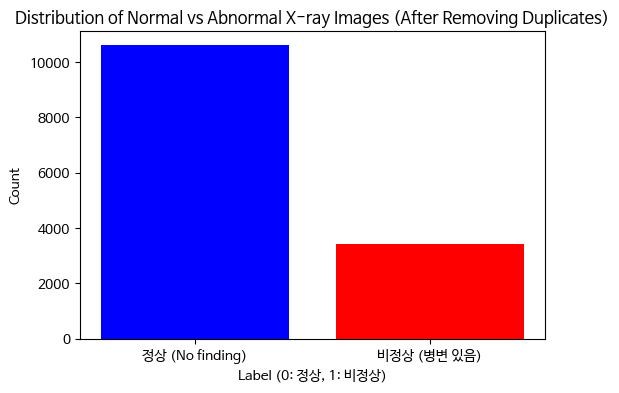

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

# ✅ CSV 파일 경로
csv_path = "/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/filtered_data/filtered_train_df.csv"

# ✅ CSV 파일 로드
df = pd.read_csv(csv_path)

# ✅ 정상(0) / 비정상(1) 분류 (class_name 기준)
df["label"] = df["class_name"].apply(lambda x: 0 if x == "No finding" else 1)

# ✅ 중복 제거 (image_id 기준으로 한 번만 남김)
df_unique = df.drop_duplicates(subset=["image_id"])

# ✅ 정상(0) / 비정상(1) 개수 확인
label_counts = df_unique["label"].value_counts()
print("(중복 제거 후) 정상(0) vs 비정상(1) 데이터 개수:\n", label_counts)

# ✅ 데이터 분포 시각화
plt.figure(figsize=(6, 4))
plt.bar(label_counts.index.astype(str), label_counts.values, color=["blue", "red"])
plt.xticks(ticks=[0, 1], labels=["정상 (No finding)", "비정상 (병변 있음)"])
plt.xlabel("Label (0: 정상, 1: 비정상)")
plt.ylabel("Count")
plt.title("Distribution of Normal vs Abnormal X-ray Images (After Removing Duplicates)")
plt.show()

🔍 (다운샘플링 후) 정상(0) vs 비정상(1) 데이터 개수:
 label
0    3412
1    3412
Name: count, dtype: int64


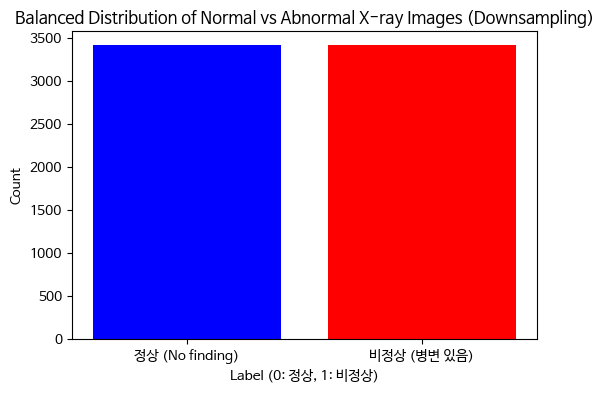

✅ 다운샘플링 완료! 새로운 CSV 저장됨: /content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/balanced_train_df.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ✅ CSV 파일 경로
csv_path = "/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/filtered_data/filtered_train_df.csv"

# ✅ CSV 파일 로드
df = pd.read_csv(csv_path)

# ✅ 정상(0) / 비정상(1) 분류 (class_name 기준)
df["label"] = df["class_name"].apply(lambda x: 0 if x == "No finding" else 1)

# ✅ 중복 제거 (image_id 기준으로 한 번만 남김)
df_unique = df.drop_duplicates(subset=["image_id"])

# ✅ 정상(0)과 비정상(1) 데이터 분리
normal_df = df_unique[df_unique["label"] == 0]  # 정상 데이터
abnormal_df = df_unique[df_unique["label"] == 1]  # 비정상 데이터

# ✅ 정상 데이터를 비정상 데이터 개수(3,412개)로 다운샘플링
normal_df_sampled = normal_df.sample(n=len(abnormal_df), random_state=42)  # 3,412개로 샘플링

# ✅ 다운샘플링된 데이터셋 생성 (정상 3,412 + 비정상 3,412)
balanced_df = pd.concat([normal_df_sampled, abnormal_df]).sample(frac=1, random_state=42)  # 데이터 섞기

# ✅ 최종 데이터 개수 확인
label_counts = balanced_df["label"].value_counts()
print("🔍 (다운샘플링 후) 정상(0) vs 비정상(1) 데이터 개수:\n", label_counts)

# ✅ 데이터 분포 시각화
plt.figure(figsize=(6, 4))
plt.bar(label_counts.index.astype(str), label_counts.values, color=["blue", "red"])
plt.xticks(ticks=[0, 1], labels=["정상 (No finding)", "비정상 (병변 있음)"])
plt.xlabel("Label (0: 정상, 1: 비정상)")
plt.ylabel("Count")
plt.title("Balanced Distribution of Normal vs Abnormal X-ray Images (Downsampling)")
plt.show()

# ✅ 다운샘플링된 CSV 저장
balanced_csv_path = "/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/balanced_train_df.csv"
balanced_df.to_csv(balanced_csv_path, index=False)

print(f"✅ 다운샘플링 완료! 새로운 CSV 저장됨: {balanced_csv_path}")

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# ✅ CSV 파일 로드
csv_path = "/content/drive/MyDrive/프로젝트/딥러닝 프로젝트/data/filtered_data/balanced_train_df.csv"
df = pd.read_csv(csv_path)

# ✅ 중복 제거 (image_id 기준으로 한 번만 남김)
df_unique = df.drop_duplicates(subset=["image_id"])

# ✅ Train(80%) / Temp(20%) 분할
train_df, temp_df = train_test_split(df_unique, test_size=0.2, random_state=42, stratify=df_unique["label"])

# ✅ Validation(10%) / Test(10%) 분할
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df["label"])

# ✅ 데이터 개수 확인
print(f"🔹 Train 데이터 개수: {len(train_df)}")
print(f"🔹 Validation 데이터 개수: {len(val_df)}")
print(f"🔹 Test 데이터 개수: {len(test_df)}")

# ✅ 분할된 데이터 저장
train_csv_path = "/content/drive/MyDrive/프로젝트/train_data.csv"
val_csv_path = "/content/drive/MyDrive/프로젝트/val_data.csv"
test_csv_path = "/content/drive/MyDrive/프로젝트/test_data.csv"

train_df.to_csv(train_csv_path, index=False)
val_df.to_csv(val_csv_path, index=False)
test_df.to_csv(test_csv_path, index=False)

print("✅ Train, Validation, Test 데이터 저장 완료!")
print(f"✅ Train CSV: {train_csv_path}")
print(f"✅ Validation CSV: {val_csv_path}")
print(f"✅ Test CSV: {test_csv_path}")
